# DATACAMP

# Time Series Analysis in Python

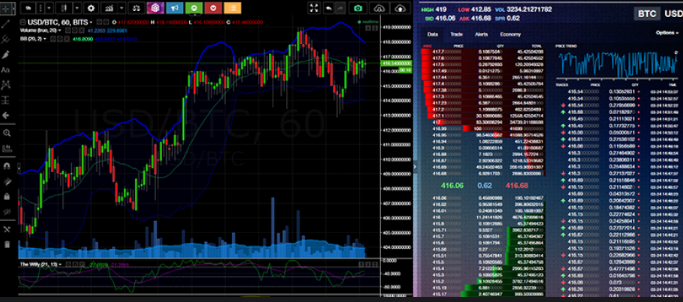

In [4]:
from IPython.display import Image
Image('ts.png')

# Course Description
From stock prices to climate data, time series data are found in a wide variety of domains, and being able to effectively work with such data is an increasingly important skill for data scientists. This course will introduce you to time series analysis in Python. After learning about what a time series is, you'll learn about several time series models ranging from autoregressive and moving average models to cointegration models. Along the way, you'll learn how to estimate, forecast, and simulate these models using statistical libraries in Python. You'll see numerous examples of how these models are used, with a particular emphasis on applications in finance.

# 1. Correlation and Autocorrelation

In this chapter you'll be introduced to the ideas of correlation and autocorrelation for time series. Correlation describes the relationship between two time series and autocorrelation describes the relationship of a time series with its past values.

In [5]:
import numpy as np
data = np.array([['6/26/2011', '7/3/2011', '7/10/2011', '7/17/2011', '7/24/2011',
       '7/31/2011', '8/7/2011', '8/14/2011', '8/21/2011', '8/28/2011',
       '9/4/2011', '9/11/2011', '9/18/2011', '9/25/2011', '10/2/2011',
       '10/9/2011', '10/16/2011', '10/23/2011', '10/30/2011', '11/6/2011',
       '11/13/2011', '11/20/2011', '11/27/2011', '12/4/2011', '12/11/2011',
       '12/18/2011', '12/25/2011', '1/1/2012', '1/8/2012', '1/15/2012',
       '1/22/2012', '1/29/2012', '2/5/2012', '2/12/2012', '2/19/2012',
       '2/26/2012', '3/4/2012', '3/11/2012', '3/18/2012', '3/25/2012',
       '4/1/2012', '4/8/2012', '4/15/2012', '4/22/2012', '4/29/2012',
       '5/6/2012', '5/13/2012', '5/20/2012', '5/27/2012', '6/3/2012',
       '6/10/2012', '6/17/2012', '6/24/2012', '7/1/2012', '7/8/2012',
       '7/15/2012', '7/22/2012', '7/29/2012', '8/5/2012', '8/12/2012',
       '8/19/2012', '8/26/2012', '9/2/2012', '9/9/2012', '9/16/2012',
       '9/23/2012', '9/30/2012', '10/7/2012', '10/14/2012', '10/21/2012',
       '10/28/2012', '11/4/2012', '11/11/2012', '11/18/2012', '11/25/2012',
       '12/2/2012', '12/9/2012', '12/16/2012', '12/23/2012', '12/30/2012',
       '1/6/2013', '1/13/2013', '1/20/2013', '1/27/2013', '2/3/2013',
       '2/10/2013', '2/17/2013', '2/24/2013', '3/3/2013', '3/10/2013',
       '3/17/2013', '3/24/2013', '3/31/2013', '4/7/2013', '4/14/2013',
       '4/21/2013', '4/28/2013', '5/5/2013', '5/12/2013', '5/19/2013',
        '5/26/2013', '6/2/2013', '6/9/2013', '6/16/2013', '6/23/2013',
       '6/30/2013', '7/7/2013', '7/14/2013', '7/21/2013', '7/28/2013',
       '8/4/2013', '8/11/2013', '8/18/2013', '8/25/2013', '9/1/2013',
       '9/8/2013', '9/15/2013', '9/22/2013', '9/29/2013', '10/6/2013',
       '10/13/2013', '10/20/2013', '10/27/2013', '11/3/2013', '11/10/2013',
       '11/17/2013', '11/24/2013', '12/1/2013', '12/8/2013', '12/15/2013',
       '12/22/2013', '12/29/2013', '1/5/2014', '1/12/2014', '1/19/2014',
       '1/26/2014', '2/2/2014', '2/9/2014', '2/16/2014', '2/23/2014',
       '3/2/2014', '3/9/2014', '3/16/2014', '3/23/2014', '3/30/2014',
       '4/6/2014', '4/13/2014', '4/20/2014', '4/27/2014', '5/4/2014',
       '5/11/2014', '5/18/2014', '5/25/2014', '6/1/2014', '6/8/2014',
       '6/15/2014', '6/22/2014', '6/29/2014', '7/6/2014', '7/13/2014',
       '7/20/2014', '7/27/2014', '8/3/2014', '8/10/2014', '8/17/2014',
       '8/24/2014', '8/31/2014', '9/7/2014', '9/14/2014', '9/21/2014',
       '9/28/2014', '10/5/2014', '10/12/2014', '10/19/2014', '10/26/2014',
       '11/2/2014', '11/9/2014', '11/16/2014', '11/23/2014', '11/30/2014',
       '12/7/2014', '12/14/2014', '12/21/2014', '12/28/2014', '1/4/2015',
       '1/11/2015', '1/18/2015', '1/25/2015', '2/1/2015', '2/8/2015',
       '2/15/2015', '2/22/2015', '3/1/2015', '3/8/2015', '3/15/2015',
       '3/22/2015', '3/29/2015', '4/5/2015', '4/12/2015', '4/19/2015',
       '4/26/2015', '5/3/2015', '5/10/2015', '5/17/2015', '5/24/2015',
       '5/31/2015', '6/7/2015', '6/14/2015', '6/21/2015', '6/28/2015',
       '7/5/2015', '7/12/2015', '7/19/2015', '7/26/2015', '8/2/2015',
       '8/9/2015', '8/16/2015', '8/23/2015', '8/30/2015', '9/6/2015',
       '9/13/2015', '9/20/2015', '9/27/2015', '10/4/2015', '10/11/2015',
       '10/18/2015', '10/25/2015', '11/1/2015', '11/8/2015', '11/15/2015',
       '11/22/2015', '11/29/2015', '12/6/2015', '12/13/2015', '12/20/2015',
       '12/27/2015', '1/3/2016', '1/10/2016', '1/17/2016', '1/24/2016',
       '1/31/2016', '2/7/2016', '2/14/2016', '2/21/2016', '2/28/2016',
       '3/6/2016', '3/13/2016', '3/20/2016', '3/27/2016', '4/3/2016',
       '4/10/2016', '4/17/2016', '4/24/2016', '5/1/2016', '5/8/2016',
       '5/15/2016', '5/22/2016', '5/29/2016', '6/5/2016', '6/12/2016',
       '6/19/2016'], [70,  71,  73,  74,  72,  72,  67,  69,  67,  66,  66,  69,  68,
             68,  65,  67,  65,  64,  65,  65,  66,  56,  68,  59,  56,  52,
             68, 100,  88,  81,  79,  77,  76,  71,  79,  78,  76,  75,  75,
             73,  72,  75,  79,  77,  76,  75,  74,  73,  72,  71,  71,  72,
             74,  71,  75,  76,  76,  75,  75,  74,  73,  69,  70,  70,  70,
             67,  66,  63,  65,  61,  59,  61,  62,  54,  62,  61,  56,  48,
             55,  88,  92,  81,  79,  79,  77,  73,  80,  85,  80,  78,  79,
             75,  76,  80,  76,  81,  79,  76,  75,  74,
             70,  71,  73,  74,  72,  72,  67,  69,  67,  66,  66,  69,  68,
             68,  65,  67,  65,  64,  65,  65,  66,  56,  68,  59,  56,  52,
             68, 100,  88,  81,  79,  77,  76,  71,  79,  78,  76,  75,  75,
             73,  72,  75,  79,  77,  76,  75,  74,  73,  72,  71,  71,  72,
             74,  71,  75,  76,  76,  75,  75,  74,  73,  69,  70,  70,  70,
             67,  66,  63,  65,  61,  59,  61,  62,  54,  62,  61,  56,  48,
             55,  88,  92,  81,  79,  79,  77,  73,  80,  85,  80,  78,  79,
             75,  76,  80,  76,  81,  79,  76,  75,  74,
            67, 67, 67, 63, 63, 65, 66, 63, 61, 59, 62, 61, 64, 62, 64, 63, 61,
            59, 58, 59, 59, 57, 57, 58, 57, 57, 56, 58, 55, 53, 48, 52, 52, 48,
            44, 63, 83, 74, 71, 70, 67, 63, 63, 66, 65, 66, 64, 63, 65, 67, 68,
            67, 67, 64, 65, 64, 62, 62, 62, 58, 58]])


In [6]:
import numpy as np
diet = np.array([
             
    70,  71,  73,  74,  72,  72,  67,  69,  67,  66,  66,  69,  68,
             68,  65,  67,  65,  64,  65,  65,  66,  56,  68,  59,  56,  52,
             68, 100,  88,  81,  79,  77,  76,  71,  79,  78,  76,  75,  75,
             73,  72,  75,  79,  77,  76,  75,  74,  73,  72,  71,  71,  72,
             74,  71,  75,  76,  76,  75,  75,  74,  73,  69,  70,  70,  70,
             67,  66,  63,  65,  61,  59,  61,  62,  54,  62,  61,  56,  48,
             55,  88,  92,  81,  79,  79,  77,  73,  80,  85,  80,  78,  79,
             75,  76,  80,  76,  81,  79,  76,  75,  74,
             70,  71,  73,  74,  72,  72,  67,  69,  67,  66,  66,  69,  68,
             68,  65,  67,  65,  64,  65,  65,  66,  56,  68,  59,  56,  52,
             68, 100,  88,  81,  79,  77,  76,  71,  79,  78,  76,  75,  75,
             73,  72,  75,  79,  77,  76,  75,  74,  73,  72,  71,  71,  72,
             74,  71,  75,  76,  76,  75,  75,  74,  73,  69,  70,  70,  70,
             67,  66,  63,  65,  61,  59,  61,  62,  54,  62,  61,  56,  48,
             55,  88,  92,  81,  79,  79,  77,  73,  80,  85,  80,  78,  79,
             75,  76,  80,  76,  81,  79,  76,  75,  74,
            67, 67, 67, 63, 63, 65, 66, 63, 61, 59, 62, 61, 64, 62, 64, 63, 61,
            59, 58, 59, 59, 57, 57, 58, 57, 57, 56, 58, 55, 53, 48, 52, 52, 48,
            44, 63, 83, 74, 71, 70, 67, 63, 63, 66, 65, 66, 64, 63, 65, 67, 68,
            67, 67, 64, 65, 64, 62, 62, 62, 58, 58])

In [7]:
import pandas as pd
diet = pd.DataFrame({'date': data[0, ],  'diet': data[1, ] })
diet.set_index('date',inplace=True)
diet["diet"] = pd.to_numeric(diet["diet"])

In [8]:
# A "Thin" Application of Time Series
# 
# Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends 
# containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. 
# A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly 
# see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, 
# followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.
# 
# Like many time series datasets you will be working with, the index of dates are strings and should be converted 
# to a datetime index before plotting.
# 
# This course touches on a lot of concepts you may have forgotten, so if you ever need a quick refresher, 
# download the pandas basics Cheat Sheet and keep it handy!
# 
# Instructions 
# Convert the date index to datetime using pandas's to_datetime().

In [9]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

In [10]:
diet.head(2)

,diet
date,
2011-06-26,70
2011-07-03,71


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

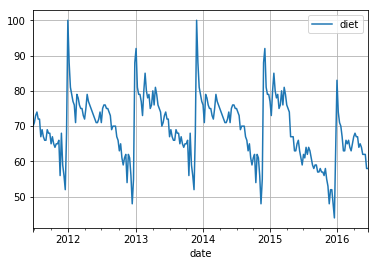

In [12]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

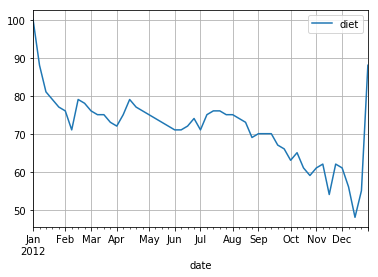

In [14]:
# Slice the dataset to keep only 2012
diet2012 = diet['2012']

# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

In [24]:
# Merging Time Series With Different Dates
# 
# Stock and bond markets in the U.S. are closed on different days. For example,
# although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11),
# the stock market is open on those days. One way to see the dates that 
# the stock market is open and the bond market is closed is to convert both indexes of dates into sets and 
# take the difference in sets.
# 
# The pandas .join() method is a convenient tool to merge the stock and bond 
# DataFrames on dates when both markets are open.
# 
# Stock prices and 10-year US Government bond yields, which were downloaded from FRED, 
# are pre-loaded in DataFrames stocks and bonds.
# 
# Instructions
# 
# Convert the dates in the stocks.index and bonds.index into sets.
# Take the difference of the stock set minus the bond set to get those dates where 
# the stock market has data but the bond market does not.
# Merge the two DataFrames into a new DataFrame, stocks_and_bonds using the .join() method, 
# which has the syntax df1.join(df2).
# To get the intersection of dates, use the argument how='inner'.

In [308]:
SP500_data = [1509.12, 1493.0, 1515.67, 1522.97, 1532.91, 1531.05, 1533.7, 1512.84, 1522.19, 1502.56, 1497.74, 1492.89, 1506.34, 1505.71, 1503.35, 1519.43, 1524.87, 1525.4, 1530.44, 1531.85, 1510.12, 1518.76, 1547.7, 1552.5, 1549.52, 1549.37, 1546.17, 1553.08, 1534.1, 1541.57, 1511.04, 1518.09, 1482.66, 1458.95, 1473.91, 1455.27, 1465.81, 1472.2, 1433.06, 1467.67, 1476.71, 1497.49, 1453.09, 1453.64, 1452.92, 1426.54, 1406.7, 1411.27, 1445.94, 1445.55, 1447.12, 1464.07, 1462.5, 1479.37, 1466.79, 1432.36, 1463.76, 1457.64, 1473.99, 1489.42, 1472.29, 1478.55, 1453.55, 1451.7, 1471.49, 1471.56, 1483.95, 1484.25, 1476.65, 1519.78, 1529.03, 1518.75, 1525.75, 1517.73, 1517.21, 1525.42, 1531.38, 1526.75, 1547.04, 1546.63, 1539.59, 1542.84, 1557.59, 1552.58, 1565.15, 1562.47, 1554.41, 1561.8, 1548.71, 1538.53, 1541.24, 1540.08, 1500.63, 1506.33, 1519.59, 1515.88, 1514.4, 1535.28, 1540.98, 1531.02, 1549.38, 1508.44, 1509.65, 1502.17, 1520.27, 1475.62, 1474.77, 1453.7, 1439.18, 1481.05, 1470.58, 1451.15, 1458.74, 1433.27, 1439.7, 1416.77, 1440.7, 1407.22, 1428.23, 1469.02, 1469.72, 1481.14, 1472.42, 1462.79, 1485.01, 1507.34, 1504.66, 1515.96, 1477.65, 1486.59, 1488.41, 1467.95, 1445.9, 1454.98, 1453.0, 1460.12, 1484.46, 1496.45, 1497.66, 1476.37, 1478.49, 1468.36, 1447.16, 1447.16, 1411.63, 1416.18, 1390.19, 1409.13, 1420.33, 1401.02, 1416.25, 1380.95, 1373.2, 1333.25, 1325.19, 1310.5, 1338.6, 1352.07, 1330.61, 1353.97, 1362.3, 1355.81, 1378.55, 1395.42, 1380.82, 1336.64, 1326.45, 1336.91, 1331.29, 1339.13, 1348.86, 1367.21, 1348.86, 1349.99, 1348.78, 1360.03, 1342.53, 1353.11, 1371.8, 1381.29, 1380.02, 1367.68, 1330.63, 1331.34, 1326.75, 1333.7, 1304.34, 1293.37, 1273.37, 1320.65, 1308.77, 1315.48, 1288.14, 1276.6, 1330.74, 1298.42, 1329.51, 1349.88, 1352.99, 1341.13, 1325.76, 1315.22, 1322.7, 1370.18, 1367.53, 1369.31, 1370.4, 1372.54, 1365.54, 1354.49, 1360.55, 1332.83, 1328.32, 1334.43, 1364.71, 1365.56, 1390.33, 1388.17, 1375.94, 1379.93, 1388.82, 1397.84, 1396.37, 1390.94, 1385.59, 1409.34, 1413.9, 1407.49, 1418.26, 1392.57, 1397.68, 1388.28, 1403.58, 1403.04, 1408.66, 1423.57, 1425.35, 1426.63, 1413.4, 1390.71, 1394.35, 1375.93, 1385.35, 1390.84, 1398.26, 1400.38, 1385.67, 1377.65, 1377.2, 1404.05, 1360.68, 1361.76, 1358.44, 1335.49, 1339.87, 1360.03, 1360.14, 1350.93, 1337.81, 1342.83, 1317.93, 1318.0, 1314.29, 1321.97, 1283.15, 1278.38, 1280.0, 1284.91, 1261.52, 1262.9, 1252.31, 1273.7, 1244.69, 1253.39, 1239.49, 1228.3, 1214.91, 1245.36, 1260.32, 1260.68, 1260.0, 1277.0, 1282.19, 1252.54, 1257.76, 1234.37, 1263.2, 1284.26, 1267.38, 1260.31, 1249.01, 1284.88, 1289.19, 1266.07, 1296.32, 1305.32, 1289.59, 1285.83, 1292.93, 1298.2, 1278.6, 1266.69, 1274.54, 1277.72, 1292.2, 1266.84, 1271.51, 1281.66, 1300.68, 1282.83, 1277.58, 1274.98, 1236.83, 1242.31, 1267.79, 1224.51, 1232.04, 1249.05, 1251.7, 1192.7, 1213.59, 1156.39, 1206.51, 1255.08, 1207.09, 1188.22, 1185.87, 1209.18, 1213.01, 1106.39, 1166.36, 1161.06, 1114.28, 1099.23, 1056.89, 996.23, 984.94, 909.92, 899.22, 1003.35, 998.01, 907.84, 946.43, 940.55, 985.4, 955.05, 896.78, 908.11, 876.77, 848.92, 940.51, 930.09, 954.09, 968.75, 966.3, 1005.75, 952.77, 904.88, 930.99, 919.21, 898.95, 852.3, 911.29, 873.29, 850.75, 859.12, 806.58, 752.44, 800.03, 851.81, 857.39, 887.68, 896.24, 816.21, 848.81, 870.74, 845.22, 876.07, 909.7, 888.67, 899.24, 873.59, 879.73, 868.57, 913.18, 904.42, 885.28, 887.88, 871.63, 863.16, 868.15, 872.8, 869.42, 890.64, 903.25, 931.8, 927.45, 934.7, 906.65, 909.73, 890.35, 870.26, 871.79, 842.62, 843.74, 850.12, 805.22, 840.24, 827.5, 831.95, 836.57, 845.71, 874.09, 845.14, 825.88, 825.44, 838.51, 832.23, 845.85, 868.6, 869.89, 827.16, 833.74, 835.19, 826.84, 789.17, 788.42, 778.94, 770.05, 743.33, 773.14, 764.9, 752.83, 735.09, 700.82, 696.33, 712.87, 682.55, 683.38, 676.53, 719.6, 721.36, 750.74, 756.55, 753.89, 778.12, 794.35, 784.04, 768.54, 822.92, 806.12, 813.88, 832.86, 815.94, 787.53, 797.87, 811.08, 834.38, 842.5, 835.48, 815.55, 825.16, 856.56, 858.73, 841.5, 852.06, 865.3, 869.6, 832.39, 850.08, 843.55, 851.92, 866.23, 857.51, 855.16, 873.64, 872.81, 877.52, 907.24, 903.8, 919.53, 907.39, 929.23, 909.24, 908.35, 883.92, 893.07, 882.88, 909.71, 908.13, 903.47, 888.33, 887.0, 910.33, 893.06, 906.83, 919.14, 942.87, 944.74, 931.76, 942.46, 940.09, 939.14, 942.43, 939.15, 944.89, 946.21, 923.72, 911.97, 910.71, 918.37, 921.23, 893.04, 895.1, 900.94, 920.26, 918.9, 927.23, 919.32, 923.33, 896.42, 898.72, 881.03, 879.56, 882.68, 879.13, 901.05, 905.84, 932.68, 940.74, 940.38, 951.13, 954.58, 954.07, 976.29, 979.26, 982.18, 979.62, 975.15, 986.75, 987.48, 1002.63, 1005.65, 1002.72, 997.08, 1010.48, 1007.1, 994.35, 1005.81, 1012.73, 1004.09, 979.73, 989.67, 996.46, 1007.37, 1026.13, 1025.57, 1028.0, 1028.12, 1030.98, 1028.93, 1020.62, 998.04, 994.75, 1003.24, 1016.4, 1025.39, 1033.37, 1044.14, 1042.73, 1049.34, 1052.63, 1068.76, 1065.49, 1068.3, 1064.66, 1071.66, 1060.87, 1050.78, 1044.38, 1062.98, 1060.61, 1057.08, 1029.85, 1025.21, 1040.46, 1054.72, 1057.58, 1065.48, 1071.49, 1076.19, 1073.19, 1092.02, 1096.56, 1087.68, 1097.91, 1091.06, 1081.4, 1092.91, 1079.6, 1066.95, 1063.41, 1042.63, 1066.11, 1036.19, 1042.88, 1045.41, 1046.5, 1066.63, 1069.3, 1093.08, 1093.01, 1098.51, 1087.24, 1093.48, 1109.3, 1110.32, 1109.8, 1094.9, 1091.38, 1106.24, 1105.65, 1110.63, 1091.49, 1095.63, 1108.86, 1109.24, 1099.92, 1105.98, 1103.25, 1091.94, 1095.95, 1102.35, 1106.41, 1114.11, 1107.93, 1109.18, 1096.08, 1102.47, 1114.05, 1118.02, 1120.59, 1126.48, 1127.78, 1126.2, 1126.42, 1115.1, 1132.99, 1136.52, 1137.14, 1141.69, 1144.98, 1146.98, 1136.22, 1145.68, 1148.46, 1136.03, 1150.23, 1138.04, 1116.48, 1091.76, 1096.78, 1092.17, 1097.5, 1084.53, 1073.87, 1089.19, 1103.32, 1097.28, 1063.11, 1066.19, 1056.74, 1070.52, 1068.13, 1078.47, 1075.51, 1094.87, 1099.51, 1106.75, 1109.17, 1108.01, 1094.6, 1105.24, 1102.94, 1104.49, 1115.71, 1118.31, 1118.79, 1122.97, 1138.7, 1138.5, 1140.45, 1145.61, 1150.24, 1149.99, 1150.51, 1159.46, 1166.21, 1165.83, 1159.9, 1165.81, 1174.17, 1167.72, 1165.73, 1166.59, 1173.22, 1173.27, 1169.43, 1178.1, 1187.44, 1189.44, 1182.45, 1186.44, 1194.37, 1196.48, 1197.3, 1210.65, 1211.67, 1192.13, 1197.52, 1207.17, 1205.94, 1208.67, 1217.28, 1212.05, 1183.71, 1191.36, 1206.78, 1186.69, 1202.26, 1173.6, 1165.9, 1128.15, 1110.88, 1159.73, 1155.79, 1171.67, 1157.44, 1135.68, 1136.94, 1120.8, 1115.05, 1071.59, 1087.69, 1073.65, 1074.03, 1067.95, 1103.06, 1089.41, 1070.71, 1098.38, 1102.83, 1064.88, 1050.47, 1062.0, 1055.69, 1086.84, 1091.6, 1089.63, 1115.23, 1114.61, 1116.04, 1117.51, 1113.2, 1095.31, 1092.04, 1073.69, 1076.76, 1074.57, 1041.24, 1030.71, 1027.37, 1022.58, 1028.06, 1060.27, 1070.25, 1077.96, 1078.75, 1095.34, 1095.17, 1096.48, 1064.88, 1071.25, 1083.48, 1069.59, 1093.67, 1102.66, 1115.01, 1113.84, 1106.13, 1101.53, 1101.6, 1125.86, 1120.46, 1127.24, 1125.81, 1121.64, 1127.79, 1121.06, 1089.47, 1083.61, 1079.25, 1079.38, 1092.54, 1094.16, 1075.63, 1071.69, 1067.36, 1051.87, 1055.33, 1047.22, 1064.59, 1048.92, 1049.33, 1080.29, 1090.1, 1104.51, 1091.84, 1098.87, 1104.18, 1109.55, 1121.9, 1121.1, 1125.07, 1124.66, 1125.59, 1142.71, 1139.78, 1134.28, 1124.83, 1148.67, 1142.16, 1147.7, 1144.73, 1141.2, 1146.24, 1137.03, 1160.75, 1159.97, 1158.06, 1165.15, 1165.32, 1169.77, 1178.1, 1173.81, 1176.19, 1184.71, 1165.9, 1178.17, 1180.26, 1183.08, 1185.62, 1185.64, 1182.45, 1183.78, 1183.26, 1184.38, 1193.57, 1197.96, 1221.06, 1225.85, 1223.25, 1213.4, 1218.71, 1213.54, 1199.21, 1197.75, 1178.34, 1178.59, 1196.69, 1199.73, 1197.84, 1180.73, 1198.35, 1189.4, 1187.76, 1180.55, 1206.07, 1221.53, 1224.71, 1223.12, 1223.75, 1228.28, 1233.0, 1240.4, 1240.46, 1241.59, 1235.23, 1242.87, 1243.91, 1247.08, 1254.6, 1258.84, 1256.77, 1257.54, 1258.51, 1259.78, 1257.88, 1257.64, 1271.87, 1270.2, 1276.56, 1273.85, 1271.5, 1269.75, 1274.48, 1285.96, 1283.76, 1293.24, 1295.02, 1281.92, 1280.26, 1283.35, 1290.84, 1291.18, 1296.63, 1299.54, 1276.34, 1286.12, 1307.59, 1304.03, 1307.1, 1310.87, 1319.05, 1324.57, 1320.88, 1321.87, 1329.15, 1332.32, 1328.01, 1336.32, 1340.43, 1343.01, 1315.44, 1307.4, 1306.1, 1319.88, 1327.22, 1306.33, 1308.44, 1330.97, 1321.15, 1310.13, 1321.82, 1320.02, 1295.11, 1304.28, 1296.39, 1281.87, 1256.88, 1273.72, 1279.2, 1298.38, 1293.77, 1297.54, 1309.66, 1313.8, 1310.19, 1319.44, 1328.26, 1325.83, 1332.41, 1332.87, 1332.63, 1335.54, 1333.51, 1328.17, 1324.46, 1314.16, 1314.41, 1314.52, 1319.68, 1305.14, 1312.62, 1330.36, 1337.38, 1335.25, 1347.24, 1355.66, 1360.48, 1363.61, 1361.22, 1356.62, 1347.32, 1335.1, 1340.2, 1346.29, 1357.16, 1342.08, 1348.65, 1337.77, 1329.47, 1328.98, 1340.68, 1343.6, 1333.27, 1317.37, 1316.28, 1320.47, 1325.69, 1331.1, 1345.2, 1314.55, 1312.94, 1300.16, 1286.17, 1284.94, 1279.56, 1289.0, 1270.98, 1271.83, 1287.87, 1265.42, 1267.64, 1271.5, 1278.36, 1295.52, 1287.14, 1283.5, 1268.45, 1280.1, 1296.67, 1307.41, 1320.64, 1339.67, 1337.88, 1339.22, 1353.22, 1343.8, 1319.49, 1313.64, 1317.72, 1308.87, 1316.14, 1305.44, 1326.73, 1325.84, 1343.8, 1345.02, 1337.43, 1331.94, 1304.89, 1300.67, 1292.28, 1286.94, 1254.05, 1260.34, 1200.07, 1199.38, 1119.46, 1172.53, 1120.76, 1172.64, 1178.81, 1204.49, 1192.76, 1193.89, 1140.65, 1123.53, 1123.82, 1162.35, 1177.6, 1159.27, 1176.8, 1210.08, 1212.92, 1218.89, 1204.42, 1173.97, 1165.24, 1198.62, 1185.9, 1154.23, 1162.27, 1172.87, 1188.68, 1209.11, 1216.01, 1204.09, 1202.09, 1166.76, 1129.56, 1136.43, 1162.95, 1175.38, 1151.06, 1160.4, 1131.42, 1099.23, 1123.95, 1144.03, 1164.97, 1155.46, 1194.89, 1195.54, 1207.25, 1203.66, 1224.58, 1200.86, 1225.38, 1209.88, 1215.39, 1238.25, 1254.19, 1229.05, 1242.0, 1284.59, 1285.09, 1253.3, 1218.28, 1237.9, 1261.15, 1253.23, 1261.12, 1275.92, 1229.1, 1239.69, 1263.85, 1251.78, 1257.81, 1236.91, 1216.13, 1215.65, 1192.98, 1188.04, 1161.79, 1158.67, 1192.55, 1195.19, 1246.96, 1244.58, 1244.28, 1257.08, 1258.47, 1261.01, 1234.35, 1255.19, 1236.47, 1225.73, 1211.82, 1215.75, 1219.66, 1205.35, 1241.3, 1243.72, 1254.0, 1265.33, 1265.43, 1249.64, 1263.02, 1257.6, 1277.06, 1277.3, 1281.06, 1277.81, 1280.7, 1292.08, 1292.48, 1295.5, 1289.09, 1293.67, 1308.04, 1314.5, 1315.38, 1316.0, 1314.65, 1326.05, 1318.43, 1316.33, 1313.01, 1312.41, 1324.09, 1325.54, 1344.9, 1344.33, 1347.05, 1349.96, 1351.95, 1342.64, 1351.77, 1350.5, 1343.23, 1358.04, 1361.23, 1362.21, 1357.66, 1363.46, 1365.74, 1367.59, 1372.18, 1365.68, 1374.09, 1369.63, 1364.33, 1343.36, 1352.63, 1365.91, 1370.87, 1371.09, 1395.95, 1394.28, 1402.6, 1404.17, 1409.75, 1405.52, 1402.89, 1392.78, 1397.11, 1416.51, 1412.52, 1405.54, 1403.28, 1408.47, 1419.04, 1413.38, 1398.96, 1398.08, 1382.2, 1358.59, 1368.71, 1387.57, 1370.26, 1369.57, 1390.78, 1385.14, 1376.92, 1378.53, 1366.94, 1371.97, 1390.69, 1399.98, 1403.36, 1397.91, 1405.82, 1402.31, 1391.57, 1369.1, 1369.58, 1363.72, 1354.58, 1357.99, 1353.39, 1338.35, 1330.66, 1324.8, 1304.86, 1295.22, 1315.99, 1316.63, 1318.86, 1320.68, 1317.82, 1332.42, 1313.32, 1310.33, 1278.04, 1278.18, 1285.5, 1315.13, 1314.99, 1325.66, 1308.93, 1324.18, 1314.88, 1329.1, 1342.84, 1344.78, 1357.98, 1355.69, 1325.51, 1335.02, 1313.72, 1319.99, 1331.85, 1329.04, 1362.16, 1365.51, 1374.02, 1367.58, 1354.68, 1352.46, 1341.47, 1341.45, 1334.76, 1356.78, 1353.64, 1363.67, 1372.78, 1376.51, 1362.66, 1350.52, 1338.31, 1337.89, 1360.02, 1385.97, 1385.3, 1379.32, 1375.14, 1365.0, 1390.99, 1394.23, 1401.35, 1402.22, 1402.8, 1405.87, 1404.11, 1403.93, 1405.53, 1415.51, 1418.16, 1418.13, 1413.17, 1413.49, 1402.08, 1411.13, 1410.44, 1409.3, 1410.49, 1399.48, 1406.58, 1404.94, 1403.44, 1432.12, 1437.92, 1429.08, 1433.56, 1436.56, 1459.99, 1465.77, 1461.19, 1459.32, 1461.05, 1460.26, 1460.15, 1456.89, 1441.59, 1433.32, 1447.15, 1440.67, 1444.49, 1445.75, 1450.99, 1461.4, 1460.93, 1455.88, 1441.48, 1432.56, 1432.84, 1428.59, 1440.13, 1454.92, 1460.91, 1457.34, 1433.19, 1433.82, 1413.11, 1408.75, 1412.97, 1411.94, 1412.16, 1427.59, 1414.2, 1417.26, 1428.39, 1394.53, 1377.51, 1379.85, 1380.03, 1374.53, 1355.49, 1353.33, 1359.88, 1386.89, 1387.81, 1391.03, 1409.15, 1406.29, 1398.94, 1409.93, 1415.95, 1416.18, 1409.46, 1407.05, 1409.28, 1413.94, 1418.07, 1418.55, 1427.84, 1428.48, 1419.45, 1413.58, 1430.36, 1446.79, 1435.81, 1443.69, 1430.15, 1426.66, 1419.83, 1418.1, 1402.43, 1426.19, 1462.42, 1459.37, 1466.47, 1461.89, 1457.15, 1461.02, 1472.12, 1472.05, 1470.68, 1472.34, 1472.63, 1480.94, 1485.98, 1492.56, 1494.81, 1494.82, 1502.96, 1500.18, 1507.84, 1501.96, 1498.11, 1513.17, 1495.71, 1511.29, 1512.12, 1509.39, 1517.93, 1517.01, 1519.43, 1520.33, 1521.38, 1519.79, 1530.94, 1511.95, 1502.42, 1515.6, 1487.85, 1496.94, 1515.99, 1514.68, 1518.2, 1525.2, 1539.79, 1541.46, 1544.26, 1551.18, 1556.22, 1552.48, 1554.52, 1563.23, 1560.7, 1552.1, 1548.34, 1558.71, 1545.8, 1556.89, 1551.69, 1563.77, 1562.85, 1569.19, 1562.17, 1570.25, 1553.69, 1559.98, 1553.28, 1563.07, 1568.61, 1587.73, 1593.37, 1588.85, 1552.36, 1574.57, 1552.01, 1541.61, 1555.25, 1562.5, 1578.78, 1578.79, 1585.16, 1582.24, 1593.61, 1597.57, 1582.7, 1597.59, 1614.42, 1617.5, 1625.96, 1632.69, 1626.67, 1633.7, 1633.77, 1650.34, 1658.78, 1650.47, 1667.47, 1666.29, 1669.16, 1655.35, 1650.51, 1649.6, 1660.06, 1648.36, 1654.41, 1630.74, 1640.42, 1631.38, 1608.9, 1622.56, 1643.38, 1642.81, 1626.13, 1612.52, 1636.36, 1626.73, 1639.04, 1651.81, 1628.93, 1588.19, 1592.43, 1573.09, 1588.03, 1603.26, 1613.2, 1606.28, 1614.96, 1614.08, 1615.41, 1631.89, 1640.46, 1652.32, 1652.62, 1675.02, 1680.19, 1682.5, 1676.26, 1680.91, 1689.37, 1692.09, 1695.53, 1692.39, 1685.94, 1690.25, 1691.65, 1685.33, 1685.96, 1685.73, 1706.87, 1709.67, 1707.14, 1697.37, 1690.91, 1697.48, 1691.42, 1689.47, 1694.16, 1685.39, 1661.32, 1655.83, 1646.06, 1652.35, 1642.8, 1656.96, 1663.5, 1656.78, 1630.48, 1634.96, 1638.17, 1632.97, 1639.77, 1653.08, 1655.08, 1655.17, 1671.71, 1683.99, 1689.13, 1683.42, 1687.99, 1697.6, 1704.76, 1725.52, 1722.34, 1709.91, 1701.84, 1697.42, 1692.77, 1698.67, 1691.75, 1681.55, 1695.0, 1693.87, 1678.66, 1690.5, 1676.12, 1655.45, 1656.4, 1692.56, 1703.2, 1710.14, 1698.06, 1721.54, 1733.15, 1744.5, 1744.66, 1754.67, 1746.38, 1752.07, 1759.77, 1762.11, 1771.95, 1763.31, 1756.54, 1761.64, 1767.93, 1762.97, 1770.49, 1747.15, 1770.61, 1771.89, 1767.69, 1782.0, 1790.62, 1798.18, 1791.53, 1787.87, 1781.37, 1795.85, 1804.76, 1802.48, 1802.75, 1807.23, 1805.81, 1800.9, 1795.15, 1792.81, 1785.03, 1805.09, 1808.37, 1802.62, 1782.22, 1775.5, 1775.32, 1786.54, 1781.0, 1810.65, 1809.6, 1818.32, 1827.99, 1833.32, 1842.02, 1841.4, 1841.07, 1848.36, 1831.98, 1831.37, 1826.77, 1837.88, 1837.49, 1838.13, 1842.37, 1819.2, 1838.88, 1848.38, 1845.89, 1838.7, 1843.8, 1844.86, 1828.46, 1790.29, 1781.56, 1792.5, 1774.2, 1794.19, 1782.59, 1741.89, 1755.2, 1751.64, 1773.43, 1797.02, 1799.84, 1819.75, 1819.26, 1829.83, 1838.63, 1840.76, 1828.75, 1839.78, 1836.25, 1847.61, 1845.12, 1845.16, 1854.29, 1859.45, 1845.73, 1873.91, 1873.81, 1877.03, 1878.04, 1877.17, 1867.63, 1868.2, 1846.34, 1841.13, 1858.83, 1872.25, 1860.77, 1872.01, 1866.52, 1857.44, 1865.62, 1852.56, 1849.04, 1857.62, 1872.34, 1885.52, 1890.9, 1888.77, 1865.09, 1845.04, 1851.96, 1872.18, 1833.08, 1815.69, 1830.61, 1842.98, 1862.31, 1864.85, 1871.89, 1879.55, 1875.39, 1878.61, 1863.4, 1869.43, 1878.33, 1883.95, 1883.68, 1881.14, 1884.66, 1867.72, 1878.21, 1875.63, 1878.48, 1896.65, 1897.45, 1888.53, 1870.85, 1877.86, 1885.08, 1872.83, 1888.03, 1892.49, 1900.53, 1911.91, 1909.78, 1920.03, 1923.57, 1924.97, 1924.24, 1927.88, 1940.46, 1949.44, 1951.27, 1950.79, 1943.89, 1930.11, 1936.16, 1937.78, 1941.99, 1956.98, 1959.48, 1962.87, 1962.61, 1949.98, 1959.53, 1957.22, 1960.96, 1960.23, 1973.32, 1974.62, 1985.44, 1977.65, 1963.71, 1972.83, 1964.68, 1967.57, 1977.1, 1973.28, 1981.57, 1958.12, 1978.22, 1973.63, 1983.53, 1987.01, 1987.98, 1978.34, 1978.91, 1969.95, 1970.07, 1930.67, 1925.15, 1938.99, 1920.21, 1920.24, 1909.57, 1931.59, 1936.92, 1933.75, 1946.72, 1955.18, 1955.06, 1971.74, 1981.6, 1986.51, 1992.37, 1988.4, 1997.92, 2000.02, 2000.12, 1996.74, 2003.37, 2002.28, 2000.72, 1997.65, 2007.71, 2001.54, 1988.44, 1995.69, 1997.45, 1985.54, 1984.13, 1998.98, 2001.57, 2011.36, 2010.4, 1994.29, 1982.77, 1998.3, 1965.99, 1982.85, 1977.8, 1972.29, 1946.16, 1946.17, 1967.9, 1964.82, 1935.1, 1968.89, 1928.21, 1906.13, 1874.74, 1877.7, 1862.49, 1862.76, 1886.76, 1904.01, 1941.28, 1927.11, 1950.82, 1964.58, 1961.63, 1985.05, 1982.3, 1994.65, 2018.05, 2017.81, 2012.1, 2023.57, 2031.21, 2031.92, 2038.26, 2039.68, 2038.25, 2039.33, 2039.82, 2041.32, 2051.8, 2048.72, 2052.75, 2063.5, 2069.41, 2067.03, 2072.83, 2067.56, 2053.44, 2066.55, 2074.33, 2071.92, 2075.37, 2060.31, 2059.82, 2026.14, 2035.33, 2002.33, 1989.63, 1972.74, 2012.89, 2061.23, 2070.65, 2078.54, 2082.17, 2081.88, 2088.77, 2090.57, 2080.35, 2058.9, 2058.2, 2020.58, 2002.61, 2025.9, 2062.14, 2044.81, 2028.26, 2023.03, 2011.27, 1992.67, 2019.42, 2022.55, 2032.12, 2063.15, 2051.82, 2057.09, 2029.55, 2002.16, 2021.25, 1994.99, 2020.85, 2050.03, 2041.51, 2062.52, 2055.47, 2046.74, 2068.59, 2068.53, 2088.48, 2096.99, 2100.34, 2099.68, 2097.45, 2110.3, 2109.66, 2115.48, 2113.86, 2110.74, 2104.5, 2117.39, 2107.78, 2098.53, 2101.04, 2071.26, 2079.43, 2044.16, 2040.24, 2065.95, 2053.4, 2081.19, 2074.28, 2099.5, 2089.27, 2108.1, 2104.42, 2091.5, 2061.05, 2056.15, 2061.02, 2086.24, 2067.89, 2059.69, 2066.96, 2080.62, 2076.33, 2081.9, 2091.18, 2102.06, 2092.43, 2095.84, 2106.63, 2104.99, 2081.18, 2100.4, 2097.29, 2107.96, 2112.93, 2117.69, 2108.92, 2114.76, 2106.85, 2085.51, 2108.29, 2114.49, 2089.46, 2080.15, 2088.0, 2116.1, 2105.33, 2099.12, 2098.48, 2121.1, 2122.73, 2129.2, 2127.83, 2125.85, 2130.82, 2126.06, 2104.2, 2123.48, 2120.79, 2107.39, 2111.73, 2109.6, 2114.07, 2095.84, 2092.83, 2079.28, 2080.15, 2105.2, 2108.86, 2094.11, 2084.43, 2096.29, 2100.44, 2121.24, 2109.99, 2122.85, 2124.2, 2108.58, 2102.31, 2101.49, 2057.64, 2063.11, 2077.42, 2076.78, 2068.76, 2081.34, 2046.68, 2051.31, 2076.62, 2099.6, 2108.95, 2107.4, 2124.29, 2126.64, 2128.28, 2119.21, 2114.15, 2102.15, 2079.65, 2067.64, 2093.25, 2108.57, 2108.63, 2103.84, 2098.04, 2093.32, 2099.84, 2083.56, 2077.57, 2104.18, 2084.07, 2086.05, 2083.39, 2091.54, 2102.44, 2096.92, 2079.61, 2035.73, 1970.89, 1893.21, 1867.61, 1940.51, 1987.66, 1988.87, 1972.18, 1913.85, 1948.86, 1951.13, 1921.22, 1969.41, 1942.04, 1952.29, 1961.05, 1953.03, 1978.09, 1995.31, 1990.2, 1958.03, 1966.97, 1942.74, 1938.76, 1932.24, 1931.34, 1881.77, 1884.09, 1920.03, 1923.82, 1951.36, 1987.05, 1979.92, 1995.83, 2013.43, 2014.89, 2017.46, 2003.69, 1994.24, 2023.86, 2033.11, 2033.66, 2030.77, 2018.94, 2052.51, 2075.15, 2071.18, 2065.89, 2090.35, 2089.41, 2079.36, 2104.05, 2109.79, 2102.31, 2099.93, 2099.2, 2078.58, 2081.72, 2075.0, 2045.97, 2023.04, 2053.19, 2050.44, 2083.58, 2081.24, 2089.17, 2086.59, 2089.14, 2088.87, 2090.11, 2080.41, 2102.63, 2079.51, 2049.62, 2091.69, 2077.07, 2063.59, 2047.62, 2052.23, 2012.37, 2021.94, 2043.41, 2073.07, 2041.89, 2005.55, 2021.15, 2038.97, 2064.29, 2060.99, 2056.5, 2078.36, 2063.36, 2043.94, 2012.66, 2016.71, 1990.26, 1943.09, 1922.03, 1923.67, 1938.68, 1890.28, 1921.84, 1880.33, 1881.33, 1859.33, 1868.99, 1906.9, 1877.08, 1903.63, 1882.95, 1893.36, 1940.24, 1939.38, 1903.03, 1912.53, 1915.45, 1880.05, 1853.44, 1852.21, 1851.86, 1829.08, 1864.78, 1895.58, 1926.82, 1917.83, 1917.78, 1945.5, 1921.27, 1929.8, 1951.7, 1948.05, 1932.23, 1978.35, 1986.45, 1993.4, 1999.99, 2001.76, 1979.26, 1989.26, 1989.57, 2022.19, 2019.64, 2015.93, 2027.22, 2040.59, 2049.58, 2051.6, 2049.8, 2036.71, 2035.94, 2037.05, 2055.01, 2063.95, 2059.74, 2072.78, 2066.13, 2045.17, 2066.66, 2041.91, 2047.6, 2041.99, 2061.72, 2082.42, 2082.78, 2080.73, 2094.34, 2100.8, 2102.4, 2091.48, 2091.58, 2087.79, 2091.7, 2095.15, 2075.81, 2065.3, 2081.43, 2063.37, 2051.12, 2050.63, 2057.14, 2058.69, 2084.39, 2064.46, 2064.11, 2046.61, 2066.66, 2047.21, 2047.63, 2040.04, 2052.32, 2048.04, 2076.06, 2090.54, 2090.1, 2099.06, 2096.96, 2099.33, 2105.26, 2099.13, 2109.41, 2112.13, 2119.12, 2115.48, 2096.07, 2079.06, 2075.32, 2071.5, 2077.99, 2071.22, 2083.25, 2088.9, 2085.45, 2113.32, 2037.41, 2000.54, 2036.09, 2070.77, 2098.86, 2102.95, 2088.55, 2099.73, 2097.9, 2129.9, 2137.16, 2152.14, 2152.43, 2163.75, 2161.74, 2166.89, 2163.78, 2173.02, 2165.17, 2175.03, 2168.48, 2169.18, 2166.58, 2170.06, 2173.6, 2170.84, 2157.03, 2163.79, 2164.25, 2182.87, 2180.89, 2181.74, 2175.49, 2185.79, 2184.05, 2190.15, 2178.15, 2182.22, 2187.02, 2183.87, 2182.64, 2186.9, 2175.44, 2172.47, 2169.04, 2180.38, 2176.12, 2170.95, 2170.86, 2179.98, 2186.48, 2186.16, 2181.3, 2127.81, 2159.04, 2127.02, 2125.77, 2147.26, 2139.16, 2139.12, 2139.76, 2163.12, 2177.18, 2164.69, 2146.1, 2159.93, 2171.37, 2151.13, 2168.27, 2161.2, 2150.49, 2159.73, 2160.77, 2153.74, 2163.66, 2136.73, 2139.18, 2132.55, 2132.98, 2126.5, 2139.6, 2144.29, 2141.34, 2141.16, 2151.33, 2143.16, 2139.43, 2133.04, 2126.41, 2126.15, 2111.72, 2097.94, 2088.66, 2085.18, 2131.52, 2139.56, 2163.26, 2167.48, 2164.45, 2164.2, 2180.39, 2176.94, 2187.12, 2181.9, 2198.18, 2202.94, 2204.72, 2213.35, 2201.72, 2204.66, 2198.81, 2191.08, 2191.95, 2204.71, 2212.23, 2241.35, 2246.19, 2259.53, 2256.96, 2271.72, 2253.28, 2262.03, 2258.07, 2262.53, 2270.76, 2265.18, 2260.96, 2263.79, 2268.88, 2249.92, 2249.26, 2238.83, 2257.83, 2270.75, 2269.0, 2276.98, 2268.9, 2268.9, 2275.32, 2270.44, 2274.64, 2267.89, 2271.89, 2263.69, 2271.31, 2265.2, 2280.07, 2298.37, 2296.68, 2294.69, 2280.9, 2278.87, 2279.55, 2280.85, 2297.42, 2292.56, 2293.08, 2294.67, 2307.87, 2316.1, 2328.25, 2337.58, 2349.25, 2347.22, 2351.16, 2365.38, 2362.82, 2363.81, 2367.34, 2369.75, 2363.64, 2395.96, 2381.92, 2383.12, 2375.31, 2368.39, 2362.98, 2364.87, 2372.6, 2373.47, 2365.45, 2385.26, 2381.38, 2378.25, 2373.47, 2344.02, 2348.45, 2345.96, 2343.98, 2341.59, 2358.57, 2361.13, 2368.06, 2362.72, 2358.84, 2360.16, 2352.95, 2357.49, 2355.54, 2357.16, 2353.78, 2344.93, 2328.95, 2349.01, 2342.19, 2338.17, 2355.84, 2348.69, 2374.15, 2388.61, 2387.45, 2388.77, 2384.2, 2388.33, 2391.17, 2388.13, 2389.52, 2399.29, 2399.38, 2396.92, 2399.63, 2394.44, 2390.9, 2402.32, 2400.67, 2357.03, 2365.72, 2381.73, 2394.02, 2398.42, 2404.39, 2415.07, 2415.82, 2412.91, 2411.8, 2430.06, 2439.07, 2436.1, 2429.33, 2433.14, 2433.79, 2431.77]
observation_date_data = ['2007-06-11', '2007-06-12', '2007-06-13', '2007-06-14', '2007-06-15', '2007-06-18', '2007-06-19', '2007-06-20', '2007-06-21', '2007-06-22', '2007-06-25', '2007-06-26', '2007-06-27', '2007-06-28', '2007-06-29', '2007-07-02', '2007-07-03', '2007-07-05', '2007-07-06', '2007-07-09', '2007-07-10', '2007-07-11', '2007-07-12', '2007-07-13', '2007-07-16', '2007-07-17', '2007-07-18', '2007-07-19', '2007-07-20', '2007-07-23', '2007-07-24', '2007-07-25', '2007-07-26', '2007-07-27', '2007-07-30', '2007-07-31', '2007-08-01', '2007-08-02', '2007-08-03', '2007-08-06', '2007-08-07', '2007-08-08', '2007-08-09', '2007-08-10', '2007-08-13', '2007-08-14', '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-20', '2007-08-21', '2007-08-22', '2007-08-23', '2007-08-24', '2007-08-27', '2007-08-28', '2007-08-29', '2007-08-30', '2007-08-31', '2007-09-04', '2007-09-05', '2007-09-06', '2007-09-07', '2007-09-10', '2007-09-11', '2007-09-12', '2007-09-13', '2007-09-14', '2007-09-17', '2007-09-18', '2007-09-19', '2007-09-20', '2007-09-21', '2007-09-24', '2007-09-25', '2007-09-26', '2007-09-27', '2007-09-28', '2007-10-01', '2007-10-02', '2007-10-03', '2007-10-04', '2007-10-05', '2007-10-08', '2007-10-09', '2007-10-10', '2007-10-11', '2007-10-12', '2007-10-15', '2007-10-16', '2007-10-17', '2007-10-18', '2007-10-19', '2007-10-22', '2007-10-23', '2007-10-24', '2007-10-25', '2007-10-26', '2007-10-29', '2007-10-30', '2007-10-31', '2007-11-01', '2007-11-02', '2007-11-05', '2007-11-06', '2007-11-07', '2007-11-08', '2007-11-09', '2007-11-12', '2007-11-13', '2007-11-14', '2007-11-15', '2007-11-16', '2007-11-19', '2007-11-20', '2007-11-21', '2007-11-23', '2007-11-26', '2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30', '2007-12-03', '2007-12-04', '2007-12-05', '2007-12-06', '2007-12-07', '2007-12-10', '2007-12-11', '2007-12-12', '2007-12-13', '2007-12-14', '2007-12-17', '2007-12-18', '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-24', '2007-12-26', '2007-12-27', '2007-12-28', '2007-12-31', '2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15', '2008-01-16', '2008-01-17', '2008-01-18', '2008-01-22', '2008-01-23', '2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29', '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04', '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08', '2008-02-11', '2008-02-12', '2008-02-13', '2008-02-14', '2008-02-15', '2008-02-19', '2008-02-20', '2008-02-21', '2008-02-22', '2008-02-25', '2008-02-26', '2008-02-27', '2008-02-28', '2008-02-29', '2008-03-03', '2008-03-04', '2008-03-05', '2008-03-06', '2008-03-07', '2008-03-10', '2008-03-11', '2008-03-12', '2008-03-13', '2008-03-14', '2008-03-17', '2008-03-18', '2008-03-19', '2008-03-20', '2008-03-24', '2008-03-25', '2008-03-26', '2008-03-27', '2008-03-28', '2008-03-31', '2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04', '2008-04-07', '2008-04-08', '2008-04-09', '2008-04-10', '2008-04-11', '2008-04-14', '2008-04-15', '2008-04-16', '2008-04-17', '2008-04-18', '2008-04-21', '2008-04-22', '2008-04-23', '2008-04-24', '2008-04-25', '2008-04-28', '2008-04-29', '2008-04-30', '2008-05-01', '2008-05-02', '2008-05-05', '2008-05-06', '2008-05-07', '2008-05-08', '2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14', '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20', '2008-05-21', '2008-05-22', '2008-05-23', '2008-05-27', '2008-05-28', '2008-05-29', '2008-05-30', '2008-06-02', '2008-06-03', '2008-06-04', '2008-06-05', '2008-06-06', '2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12', '2008-06-13', '2008-06-16', '2008-06-17', '2008-06-18', '2008-06-19', '2008-06-20', '2008-06-23', '2008-06-24', '2008-06-25', '2008-06-26', '2008-06-27', '2008-06-30', '2008-07-01', '2008-07-02', '2008-07-03', '2008-07-07', '2008-07-08', '2008-07-09', '2008-07-10', '2008-07-11', '2008-07-14', '2008-07-15', '2008-07-16', '2008-07-17', '2008-07-18', '2008-07-21', '2008-07-22', '2008-07-23', '2008-07-24', '2008-07-25', '2008-07-28', '2008-07-29', '2008-07-30', '2008-07-31', '2008-08-01', '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07', '2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13', '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19', '2008-08-20', '2008-08-21', '2008-08-22', '2008-08-25', '2008-08-26', '2008-08-27', '2008-08-28', '2008-08-29', '2008-09-02', '2008-09-03', '2008-09-04', '2008-09-05', '2008-09-08', '2008-09-09', '2008-09-10', '2008-09-11', '2008-09-12', '2008-09-15', '2008-09-16', '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-22', '2008-09-23', '2008-09-24', '2008-09-25', '2008-09-26', '2008-09-29', '2008-09-30', '2008-10-01', '2008-10-02', '2008-10-03', '2008-10-06', '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10', '2008-10-13', '2008-10-14', '2008-10-15', '2008-10-16', '2008-10-17', '2008-10-20', '2008-10-21', '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-27', '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31', '2008-11-03', '2008-11-04', '2008-11-05', '2008-11-06', '2008-11-07', '2008-11-10', '2008-11-11', '2008-11-12', '2008-11-13', '2008-11-14', '2008-11-17', '2008-11-18', '2008-11-19', '2008-11-20', '2008-11-21', '2008-11-24', '2008-11-25', '2008-11-26', '2008-11-28', '2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05', '2008-12-08', '2008-12-09', '2008-12-10', '2008-12-11', '2008-12-12', '2008-12-15', '2008-12-16', '2008-12-17', '2008-12-18', '2008-12-19', '2008-12-22', '2008-12-23', '2008-12-24', '2008-12-26', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13', '2009-01-14', '2009-01-15', '2009-01-16', '2009-01-20', '2009-01-21', '2009-01-22', '2009-01-23', '2009-01-26', '2009-01-27', '2009-01-28', '2009-01-29', '2009-01-30', '2009-02-02', '2009-02-03', '2009-02-04', '2009-02-05', '2009-02-06', '2009-02-09', '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13', '2009-02-17', '2009-02-18', '2009-02-19', '2009-02-20', '2009-02-23', '2009-02-24', '2009-02-25', '2009-02-26', '2009-02-27', '2009-03-02', '2009-03-03', '2009-03-04', '2009-03-05', '2009-03-06', '2009-03-09', '2009-03-10', '2009-03-11', '2009-03-12', '2009-03-13', '2009-03-16', '2009-03-17', '2009-03-18', '2009-03-19', '2009-03-20', '2009-03-23', '2009-03-24', '2009-03-25', '2009-03-26', '2009-03-27', '2009-03-30', '2009-03-31', '2009-04-01', '2009-04-02', '2009-04-03', '2009-04-06', '2009-04-07', '2009-04-08', '2009-04-09', '2009-04-13', '2009-04-14', '2009-04-15', '2009-04-16', '2009-04-17', '2009-04-20', '2009-04-21', '2009-04-22', '2009-04-23', '2009-04-24', '2009-04-27', '2009-04-28', '2009-04-29', '2009-04-30', '2009-05-01', '2009-05-04', '2009-05-05', '2009-05-06', '2009-05-07', '2009-05-08', '2009-05-11', '2009-05-12', '2009-05-13', '2009-05-14', '2009-05-15', '2009-05-18', '2009-05-19', '2009-05-20', '2009-05-21', '2009-05-22', '2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29', '2009-06-01', '2009-06-02', '2009-06-03', '2009-06-04', '2009-06-05', '2009-06-08', '2009-06-09', '2009-06-10', '2009-06-11', '2009-06-12', '2009-06-15', '2009-06-16', '2009-06-17', '2009-06-18', '2009-06-19', '2009-06-22', '2009-06-23', '2009-06-24', '2009-06-25', '2009-06-26', '2009-06-29', '2009-06-30', '2009-07-01', '2009-07-02', '2009-07-06', '2009-07-07', '2009-07-08', '2009-07-09', '2009-07-10', '2009-07-13', '2009-07-14', '2009-07-15', '2009-07-16', '2009-07-17', '2009-07-20', '2009-07-21', '2009-07-22', '2009-07-23', '2009-07-24', '2009-07-27', '2009-07-28', '2009-07-29', '2009-07-30', '2009-07-31', '2009-08-03', '2009-08-04', '2009-08-05', '2009-08-06', '2009-08-07', '2009-08-10', '2009-08-11', '2009-08-12', '2009-08-13', '2009-08-14', '2009-08-17', '2009-08-18', '2009-08-19', '2009-08-20', '2009-08-21', '2009-08-24', '2009-08-25', '2009-08-26', '2009-08-27', '2009-08-28', '2009-08-31', '2009-09-01', '2009-09-02', '2009-09-03', '2009-09-04', '2009-09-08', '2009-09-09', '2009-09-10', '2009-09-11', '2009-09-14', '2009-09-15', '2009-09-16', '2009-09-17', '2009-09-18', '2009-09-21', '2009-09-22', '2009-09-23', '2009-09-24', '2009-09-25', '2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01', '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07', '2009-10-08', '2009-10-09', '2009-10-12', '2009-10-13', '2009-10-14', '2009-10-15', '2009-10-16', '2009-10-19', '2009-10-20', '2009-10-21', '2009-10-22', '2009-10-23', '2009-10-26', '2009-10-27', '2009-10-28', '2009-10-29', '2009-10-30', '2009-11-02', '2009-11-03', '2009-11-04', '2009-11-05', '2009-11-06', '2009-11-09', '2009-11-10', '2009-11-11', '2009-11-12', '2009-11-13', '2009-11-16', '2009-11-17', '2009-11-18', '2009-11-19', '2009-11-20', '2009-11-23', '2009-11-24', '2009-11-25', '2009-11-27', '2009-11-30', '2009-12-01', '2009-12-02', '2009-12-03', '2009-12-04', '2009-12-07', '2009-12-08', '2009-12-09', '2009-12-10', '2009-12-11', '2009-12-14', '2009-12-15', '2009-12-16', '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-01', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13', '2010-04-14', '2010-04-15', '2010-04-16', '2010-04-19', '2010-04-20', '2010-04-21', '2010-04-22', '2010-04-23', '2010-04-26', '2010-04-27', '2010-04-28', '2010-04-29', '2010-04-30', '2010-05-03', '2010-05-04', '2010-05-05', '2010-05-06', '2010-05-07', '2010-05-10', '2010-05-11', '2010-05-12', '2010-05-13', '2010-05-14', '2010-05-17', '2010-05-18', '2010-05-19', '2010-05-20', '2010-05-21', '2010-05-24', '2010-05-25', '2010-05-26', '2010-05-27', '2010-05-28', '2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04', '2010-06-07', '2010-06-08', '2010-06-09', '2010-06-10', '2010-06-11', '2010-06-14', '2010-06-15', '2010-06-16', '2010-06-17', '2010-06-18', '2010-06-21', '2010-06-22', '2010-06-23', '2010-06-24', '2010-06-25', '2010-06-28', '2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15', '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23', '2010-07-26', '2010-07-27', '2010-07-28', '2010-07-29', '2010-07-30', '2010-08-02', '2010-08-03', '2010-08-04', '2010-08-05', '2010-08-06', '2010-08-09', '2010-08-10', '2010-08-11', '2010-08-12', '2010-08-13', '2010-08-16', '2010-08-17', '2010-08-18', '2010-08-19', '2010-08-20', '2010-08-23', '2010-08-24', '2010-08-25', '2010-08-26', '2010-08-27', '2010-08-30', '2010-08-31', '2010-09-01', '2010-09-02', '2010-09-03', '2010-09-07', '2010-09-08', '2010-09-09', '2010-09-10', '2010-09-13', '2010-09-14', '2010-09-15', '2010-09-16', '2010-09-17', '2010-09-20', '2010-09-21', '2010-09-22', '2010-09-23', '2010-09-24', '2010-09-27', '2010-09-28', '2010-09-29', '2010-09-30', '2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08', '2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14', '2010-10-15', '2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21', '2010-10-22', '2010-10-25', '2010-10-26', '2010-10-27', '2010-10-28', '2010-10-29', '2010-11-01', '2010-11-02', '2010-11-03', '2010-11-04', '2010-11-05', '2010-11-08', '2010-11-09', '2010-11-10', '2010-11-11', '2010-11-12', '2010-11-15', '2010-11-16', '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23', '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30', '2010-12-01', '2010-12-02', '2010-12-03', '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09', '2010-12-10', '2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17', '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23', '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14', '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21', '2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-31', '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-07', '2011-02-08', '2011-02-09', '2011-02-10', '2011-02-11', '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17', '2011-02-18', '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25', '2011-02-28', '2011-03-01', '2011-03-02', '2011-03-03', '2011-03-04', '2011-03-07', '2011-03-08', '2011-03-09', '2011-03-10', '2011-03-11', '2011-03-14', '2011-03-15', '2011-03-16', '2011-03-17', '2011-03-18', '2011-03-21', '2011-03-22', '2011-03-23', '2011-03-24', '2011-03-25', '2011-03-28', '2011-03-29', '2011-03-30', '2011-03-31', '2011-04-01', '2011-04-04', '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08', '2011-04-11', '2011-04-12', '2011-04-13', '2011-04-14', '2011-04-15', '2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-05-02', '2011-05-03', '2011-05-04', '2011-05-05', '2011-05-06', '2011-05-09', '2011-05-10', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-16', '2011-05-17', '2011-05-18', '2011-05-19', '2011-05-20', '2011-05-23', '2011-05-24', '2011-05-25', '2011-05-26', '2011-05-27', '2011-05-31', '2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06', '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10', '2011-06-13', '2011-06-14', '2011-06-15', '2011-06-16', '2011-06-17', '2011-06-20', '2011-06-21', '2011-06-22', '2011-06-23', '2011-06-24', '2011-06-27', '2011-06-28', '2011-06-29', '2011-06-30', '2011-07-01', '2011-07-05', '2011-07-06', '2011-07-07', '2011-07-08', '2011-07-11', '2011-07-12', '2011-07-13', '2011-07-14', '2011-07-15', '2011-07-18', '2011-07-19', '2011-07-20', '2011-07-21', '2011-07-22', '2011-07-25', '2011-07-26', '2011-07-27', '2011-07-28', '2011-07-29', '2011-08-01', '2011-08-02', '2011-08-03', '2011-08-04', '2011-08-05', '2011-08-08', '2011-08-09', '2011-08-10', '2011-08-11', '2011-08-12', '2011-08-15', '2011-08-16', '2011-08-17', '2011-08-18', '2011-08-19', '2011-08-22', '2011-08-23', '2011-08-24', '2011-08-25', '2011-08-26', '2011-08-29', '2011-08-30', '2011-08-31', '2011-09-01', '2011-09-02', '2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09', '2011-09-12', '2011-09-13', '2011-09-14', '2011-09-15', '2011-09-16', '2011-09-19', '2011-09-20', '2011-09-21', '2011-09-22', '2011-09-23', '2011-09-26', '2011-09-27', '2011-09-28', '2011-09-29', '2011-09-30', '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12', '2011-10-13', '2011-10-14', '2011-10-17', '2011-10-18', '2011-10-19', '2011-10-20', '2011-10-21', '2011-10-24', '2011-10-25', '2011-10-26', '2011-10-27', '2011-10-28', '2011-10-31', '2011-11-01', '2011-11-02', '2011-11-03', '2011-11-04', '2011-11-07', '2011-11-08', '2011-11-09', '2011-11-10', '2011-11-11', '2011-11-14', '2011-11-15', '2011-11-16', '2011-11-17', '2011-11-18', '2011-11-21', '2011-11-22', '2011-11-23', '2011-11-25', '2011-11-28', '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02', '2011-12-05', '2011-12-06', '2011-12-07', '2011-12-08', '2011-12-09', '2011-12-12', '2011-12-13', '2011-12-14', '2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13', '2012-01-17', '2012-01-18', '2012-01-19', '2012-01-20', '2012-01-23', '2012-01-24', '2012-01-25', '2012-01-26', '2012-01-27', '2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10', '2012-02-13', '2012-02-14', '2012-02-15', '2012-02-16', '2012-02-17', '2012-02-21', '2012-02-22', '2012-02-23', '2012-02-24', '2012-02-27', '2012-02-28', '2012-02-29', '2012-03-01', '2012-03-02', '2012-03-05', '2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09', '2012-03-12', '2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16', '2012-03-19', '2012-03-20', '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-26', '2012-03-27', '2012-03-28', '2012-03-29', '2012-03-30', '2012-04-02', '2012-04-03', '2012-04-04', '2012-04-05', '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12', '2012-04-13', '2012-04-16', '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20', '2012-04-23', '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-30', '2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04', '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10', '2012-05-11', '2012-05-14', '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01', '2012-06-04', '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08', '2012-06-11', '2012-06-12', '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21', '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27', '2012-06-28', '2012-06-29', '2012-07-02', '2012-07-03', '2012-07-05', '2012-07-06', '2012-07-09', '2012-07-10', '2012-07-11', '2012-07-12', '2012-07-13', '2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19', '2012-07-20', '2012-07-23', '2012-07-24', '2012-07-25', '2012-07-26', '2012-07-27', '2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03', '2012-08-06', '2012-08-07', '2012-08-08', '2012-08-09', '2012-08-10', '2012-08-13', '2012-08-14', '2012-08-15', '2012-08-16', '2012-08-17', '2012-08-20', '2012-08-21', '2012-08-22', '2012-08-23', '2012-08-24', '2012-08-27', '2012-08-28', '2012-08-29', '2012-08-30', '2012-08-31', '2012-09-04', '2012-09-05', '2012-09-06', '2012-09-07', '2012-09-10', '2012-09-11', '2012-09-12', '2012-09-13', '2012-09-14', '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20', '2012-09-21', '2012-09-24', '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28', '2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08', '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12', '2012-10-15', '2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19', '2012-10-22', '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-05', '2012-11-06', '2012-11-07', '2012-11-08', '2012-11-09', '2012-11-12', '2012-11-13', '2012-11-14', '2012-11-15', '2012-11-16', '2012-11-19', '2012-11-20', '2012-11-21', '2012-11-23', '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29', '2012-11-30', '2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-10', '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20', '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-14', '2013-01-15', '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-22', '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22', '2013-02-25', '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-04', '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-11', '2013-03-12', '2013-03-13', '2013-03-14', '2013-03-15', '2013-03-18', '2013-03-19', '2013-03-20', '2013-03-21', '2013-03-22', '2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28', '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05', '2013-04-08', '2013-04-09', '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15', '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25', '2013-04-26', '2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-10', '2013-06-11', '2013-06-12', '2013-06-13', '2013-06-14', '2013-06-17', '2013-06-18', '2013-06-19', '2013-06-20', '2013-06-21', '2013-06-24', '2013-06-25', '2013-06-26', '2013-06-27', '2013-06-28', '2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05', '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11', '2013-07-12', '2013-07-15', '2013-07-16', '2013-07-17', '2013-07-18', '2013-07-19', '2013-07-22', '2013-07-23', '2013-07-24', '2013-07-25', '2013-07-26', '2013-07-29', '2013-07-30', '2013-07-31', '2013-08-01', '2013-08-02', '2013-08-05', '2013-08-06', '2013-08-07', '2013-08-08', '2013-08-09', '2013-08-12', '2013-08-13', '2013-08-14', '2013-08-15', '2013-08-16', '2013-08-19', '2013-08-20', '2013-08-21', '2013-08-22', '2013-08-23', '2013-08-26', '2013-08-27', '2013-08-28', '2013-08-29', '2013-08-30', '2013-09-03', '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12', '2013-09-13', '2013-09-16', '2013-09-17', '2013-09-18', '2013-09-19', '2013-09-20', '2013-09-23', '2013-09-24', '2013-09-25', '2013-09-26', '2013-09-27', '2013-09-30', '2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04', '2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11', '2013-10-14', '2013-10-15', '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22', '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29', '2013-10-30', '2013-10-31', '2013-11-01', '2013-11-04', '2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08', '2013-11-11', '2013-11-12', '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-29', '2013-12-02', '2013-12-03', '2013-12-04', '2013-12-05', '2013-12-06', '2013-12-09', '2013-12-10', '2013-12-11', '2013-12-12', '2013-12-13', '2013-12-16', '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16', '2014-01-17', '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24', '2014-01-27', '2014-01-28', '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06', '2014-02-07', '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13', '2014-02-14', '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21', '2014-02-24', '2014-02-25', '2014-02-26', '2014-02-27', '2014-02-28', '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13', '2014-03-14', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20', '2014-03-21', '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-31', '2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10', '2014-04-11', '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17', '2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17', '2014-07-18', '2014-07-21', '2014-07-22', '2014-07-23', '2014-07-24', '2014-07-25', '2014-07-28', '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22', '2014-08-25', '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29', '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05', '2014-09-08', '2014-09-09', '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-15', '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03', '2014-10-06', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-13', '2014-10-14', '2014-10-15', '2014-10-16', '2014-10-17', '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-27', '2014-10-28', '2014-10-29', '2014-10-30', '2014-10-31', '2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07', '2014-11-10', '2014-11-11', '2014-11-12', '2014-11-13', '2014-11-14', '2014-11-17', '2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21', '2014-11-24', '2014-11-25', '2014-11-26', '2014-11-28', '2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05', '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12', '2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13', '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-20', '2015-04-21', '2015-04-22', '2015-04-23', '2015-04-24', '2015-04-27', '2015-04-28', '2015-04-29', '2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05', '2015-05-06', '2015-05-07', '2015-05-08', '2015-05-11', '2015-05-12', '2015-05-13', '2015-05-14', '2015-05-15', '2015-05-18', '2015-05-19', '2015-05-20', '2015-05-21', '2015-05-22', '2015-05-26', '2015-05-27', '2015-05-28', '2015-05-29', '2015-06-01', '2015-06-02', '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-08', '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12', '2015-06-15', '2015-06-16', '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01', '2015-07-02', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-08', '2015-09-09', '2015-09-10', '2015-09-11', '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17', '2015-09-18', '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25', '2015-09-28', '2015-09-29', '2015-09-30', '2015-10-01', '2015-10-02', '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09', '2015-10-12', '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16', '2015-10-19', '2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29', '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05', '2015-11-06', '2015-11-09', '2015-11-10', '2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20', '2015-11-23', '2015-11-24', '2015-11-25', '2015-11-27', '2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04', '2015-12-07', '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-14', '2015-12-15', '2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18', '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-04', '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28', '2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20', '2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10', '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29', '2016-06-30', '2016-07-01', '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20', '2016-07-21', '2016-07-22', '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', '2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-08', '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12', '2016-08-15', '2016-08-16', '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-11', '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18', '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-25', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28', '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09']

In [309]:
stocks = pd.DataFrame(list(zip(observation_date_data, SP500_data)), columns =['observation_date','SP500']) 
stocks.observation_date = pd.to_datetime(stocks.observation_date)
stocks.set_index('observation_date',inplace=True)

In [314]:
US10Y_data = [5.12, 5.14, 5.26, 5.2, 5.23, 5.16, 5.15, 5.09, 5.14, 5.16, 5.14, 5.09, 5.1, 5.09, 5.12, 5.03, 5.0, 5.05, 5.16, 5.19, 5.16, 5.03, 5.09, 5.13, 5.11, 5.05, 5.08, 5.02, 5.04, 4.96, 4.97, 4.94, 4.92, 4.79, 4.8, 4.82, 4.78, 4.76, 4.77, 4.71, 4.72, 4.77, 4.84, 4.79, 4.81, 4.78, 4.73, 4.69, 4.6, 4.68, 4.64, 4.6, 4.63, 4.62, 4.63, 4.6, 4.53, 4.57, 4.51, 4.54, 4.56, 4.48, 4.51, 4.38, 4.34, 4.37, 4.41, 4.49, 4.47, 4.48, 4.5, 4.53, 4.69, 4.64, 4.63, 4.63, 4.63, 4.58, 4.59, 4.56, 4.54, 4.55, 4.54, 4.65, 4.67, 4.65, 4.66, 4.7, 4.69, 4.66, 4.57, 4.52, 4.41, 4.42, 4.41, 4.36, 4.37, 4.41, 4.39, 4.4, 4.48, 4.36, 4.31, 4.35, 4.38, 4.34, 4.28, 4.23, 4.26, 4.28, 4.17, 4.15, 4.07, 4.06, 4.0, 4.01, 3.83, 3.95, 4.03, 3.94, 3.97, 3.89, 3.89, 3.92, 4.02, 4.12, 4.15, 3.98, 4.05, 4.18, 4.24, 4.2, 4.14, 4.06, 4.04, 4.18, 4.23, 4.3, 4.21, 4.11, 4.04, 3.91, 3.91, 3.88, 3.86, 3.86, 3.82, 3.91, 3.82, 3.81, 3.72, 3.74, 3.66, 3.66, 3.52, 3.51, 3.68, 3.61, 3.61, 3.69, 3.78, 3.67, 3.62, 3.68, 3.61, 3.61, 3.74, 3.64, 3.62, 3.66, 3.7, 3.85, 3.76, 3.89, 3.93, 3.77, 3.79, 3.91, 3.88, 3.85, 3.71, 3.53, 3.54, 3.63, 3.7, 3.62, 3.56, 3.46, 3.6, 3.49, 3.56, 3.44, 3.34, 3.48, 3.38, 3.34, 3.56, 3.51, 3.51, 3.56, 3.47, 3.45, 3.57, 3.6, 3.61, 3.5, 3.57, 3.58, 3.49, 3.55, 3.49, 3.53, 3.6, 3.72, 3.75, 3.77, 3.75, 3.74, 3.77, 3.87, 3.91, 3.86, 3.85, 3.77, 3.78, 3.89, 3.88, 3.93, 3.87, 3.79, 3.77, 3.78, 3.9, 3.92, 3.83, 3.85, 3.83, 3.78, 3.81, 3.92, 3.85, 3.93, 4.03, 4.08, 4.06, 3.98, 3.92, 3.98, 4.06, 3.94, 4.02, 4.11, 4.1, 4.23, 4.27, 4.25, 4.23, 4.16, 4.22, 4.16, 4.19, 4.1, 4.12, 4.07, 3.99, 3.99, 4.01, 3.99, 3.99, 3.95, 3.91, 3.85, 3.83, 3.96, 3.9, 3.87, 3.97, 4.07, 4.11, 4.09, 4.14, 4.16, 4.03, 4.13, 4.06, 4.09, 4.07, 3.99, 3.97, 3.98, 4.04, 4.06, 3.92, 3.94, 3.99, 3.91, 3.94, 3.89, 3.84, 3.82, 3.83, 3.79, 3.84, 3.87, 3.79, 3.79, 3.77, 3.79, 3.83, 3.74, 3.71, 3.64, 3.66, 3.66, 3.62, 3.65, 3.64, 3.74, 3.47, 3.48, 3.41, 3.54, 3.78, 3.83, 3.85, 3.8, 3.88, 3.85, 3.61, 3.85, 3.77, 3.66, 3.63, 3.48, 3.5, 3.72, 3.84, 3.89, 4.08, 4.04, 3.99, 3.98, 3.91, 3.76, 3.65, 3.63, 3.76, 3.79, 3.89, 3.93, 4.0, 4.01, 3.96, 3.81, 3.73, 3.75, 3.83, 3.82, 3.75, 3.84, 3.72, 3.68, 3.53, 3.38, 3.1, 3.2, 3.35, 3.11, 2.99, 2.93, 2.72, 2.68, 2.67, 2.55, 2.67, 2.77, 2.67, 2.69, 2.64, 2.6, 2.53, 2.37, 2.2, 2.08, 2.13, 2.16, 2.18, 2.2, 2.16, 2.13, 2.11, 2.25, 2.46, 2.49, 2.51, 2.52, 2.47, 2.43, 2.34, 2.33, 2.24, 2.23, 2.36, 2.4, 2.56, 2.62, 2.65, 2.7, 2.59, 2.71, 2.87, 2.87, 2.76, 2.89, 2.95, 2.95, 3.05, 3.07, 2.9, 2.78, 2.75, 2.89, 2.64, 2.74, 2.85, 2.78, 2.78, 2.8, 2.95, 2.98, 3.02, 2.91, 2.93, 3.01, 2.83, 2.83, 2.89, 2.99, 2.95, 2.89, 2.89, 2.97, 3.02, 2.51, 2.61, 2.65, 2.68, 2.68, 2.81, 2.76, 2.78, 2.73, 2.71, 2.68, 2.77, 2.91, 2.95, 2.93, 2.86, 2.96, 2.88, 2.8, 2.82, 2.86, 2.98, 2.88, 2.94, 2.98, 2.96, 3.03, 2.95, 3.05, 3.12, 3.16, 3.21, 3.19, 3.2, 3.18, 3.29, 3.29, 3.17, 3.17, 3.11, 3.1, 3.14, 3.22, 3.25, 3.19, 3.35, 3.45, 3.5, 3.71, 3.67, 3.47, 3.71, 3.65, 3.56, 3.72, 3.84, 3.91, 3.86, 3.98, 3.88, 3.81, 3.76, 3.67, 3.68, 3.86, 3.79, 3.72, 3.65, 3.72, 3.55, 3.52, 3.51, 3.53, 3.55, 3.51, 3.52, 3.47, 3.33, 3.44, 3.32, 3.38, 3.5, 3.63, 3.59, 3.67, 3.61, 3.5, 3.58, 3.72, 3.7, 3.75, 3.72, 3.69, 3.67, 3.52, 3.66, 3.7, 3.8, 3.79, 3.89, 3.8, 3.71, 3.72, 3.59, 3.55, 3.48, 3.51, 3.45, 3.42, 3.56, 3.48, 3.45, 3.44, 3.47, 3.46, 3.4, 3.38, 3.29, 3.33, 3.45, 3.47, 3.48, 3.36, 3.34, 3.42, 3.47, 3.48, 3.42, 3.49, 3.49, 3.46, 3.44, 3.4, 3.34, 3.31, 3.31, 3.31, 3.21, 3.24, 3.24, 3.27, 3.21, 3.27, 3.4, 3.34, 3.45, 3.49, 3.43, 3.41, 3.35, 3.42, 3.44, 3.51, 3.59, 3.49, 3.44, 3.53, 3.41, 3.45, 3.5, 3.57, 3.57, 3.54, 3.52, 3.5, 3.45, 3.43, 3.33, 3.33, 3.36, 3.35, 3.36, 3.37, 3.32, 3.28, 3.21, 3.21, 3.28, 3.32, 3.39, 3.48, 3.44, 3.4, 3.45, 3.49, 3.55, 3.56, 3.6, 3.61, 3.5, 3.55, 3.69, 3.76, 3.77, 3.82, 3.85, 3.82, 3.8, 3.85, 3.85, 3.77, 3.85, 3.85, 3.83, 3.85, 3.74, 3.8, 3.76, 3.7, 3.73, 3.68, 3.62, 3.62, 3.66, 3.65, 3.66, 3.68, 3.63, 3.68, 3.67, 3.73, 3.62, 3.59, 3.62, 3.67, 3.72, 3.73, 3.69, 3.66, 3.74, 3.79, 3.78, 3.8, 3.69, 3.7, 3.64, 3.61, 3.61, 3.62, 3.63, 3.61, 3.69, 3.72, 3.71, 3.73, 3.73, 3.71, 3.71, 3.66, 3.65, 3.68, 3.7, 3.67, 3.69, 3.84, 3.91, 3.86, 3.88, 3.88, 3.84, 3.89, 3.96, 4.01, 3.98, 3.89, 3.91, 3.9, 3.87, 3.84, 3.88, 3.86, 3.79, 3.83, 3.82, 3.77, 3.8, 3.84, 3.83, 3.71, 3.8, 3.76, 3.69, 3.72, 3.63, 3.58, 3.41, 3.45, 3.57, 3.56, 3.56, 3.55, 3.44, 3.47, 3.38, 3.36, 3.25, 3.2, 3.23, 3.18, 3.21, 3.34, 3.31, 3.29, 3.35, 3.39, 3.2, 3.17, 3.18, 3.2, 3.33, 3.24, 3.28, 3.32, 3.27, 3.21, 3.24, 3.26, 3.18, 3.13, 3.14, 3.12, 3.05, 2.97, 2.97, 2.96, 3.0, 2.95, 3.0, 3.04, 3.07, 3.08, 3.15, 3.07, 3.0, 2.96, 2.99, 2.98, 2.9, 2.96, 3.02, 3.03, 3.08, 3.03, 3.03, 2.94, 2.99, 2.94, 2.98, 2.94, 2.86, 2.86, 2.79, 2.72, 2.74, 2.68, 2.58, 2.64, 2.64, 2.58, 2.62, 2.6, 2.5, 2.54, 2.5, 2.66, 2.54, 2.47, 2.58, 2.63, 2.72, 2.61, 2.66, 2.77, 2.81, 2.74, 2.68, 2.74, 2.77, 2.75, 2.72, 2.61, 2.56, 2.56, 2.62, 2.54, 2.48, 2.52, 2.53, 2.54, 2.5, 2.5, 2.41, 2.41, 2.41, 2.44, 2.46, 2.52, 2.59, 2.52, 2.5, 2.51, 2.57, 2.59, 2.59, 2.67, 2.75, 2.69, 2.63, 2.66, 2.63, 2.67, 2.53, 2.58, 2.6, 2.72, 2.65, 2.76, 2.92, 2.85, 2.89, 2.9, 2.88, 2.8, 2.77, 2.93, 2.87, 2.84, 2.81, 2.97, 3.01, 3.03, 2.95, 3.15, 3.26, 3.23, 3.32, 3.29, 3.49, 3.53, 3.47, 3.33, 3.36, 3.35, 3.36, 3.41, 3.36, 3.5, 3.35, 3.38, 3.3, 3.36, 3.36, 3.5, 3.44, 3.34, 3.32, 3.37, 3.4, 3.34, 3.35, 3.39, 3.37, 3.47, 3.44, 3.43, 3.35, 3.45, 3.42, 3.36, 3.42, 3.48, 3.52, 3.58, 3.68, 3.68, 3.75, 3.65, 3.7, 3.64, 3.62, 3.61, 3.62, 3.58, 3.59, 3.46, 3.49, 3.46, 3.42, 3.42, 3.41, 3.46, 3.58, 3.49, 3.51, 3.56, 3.48, 3.37, 3.4, 3.36, 3.33, 3.22, 3.25, 3.28, 3.34, 3.34, 3.36, 3.42, 3.46, 3.47, 3.5, 3.47, 3.47, 3.46, 3.45, 3.5, 3.56, 3.58, 3.59, 3.59, 3.52, 3.49, 3.51, 3.43, 3.4, 3.39, 3.43, 3.42, 3.39, 3.34, 3.39, 3.34, 3.32, 3.31, 3.28, 3.25, 3.18, 3.19, 3.17, 3.23, 3.19, 3.22, 3.18, 3.15, 3.12, 3.18, 3.17, 3.15, 3.13, 3.12, 3.13, 3.07, 3.07, 3.05, 2.96, 3.04, 2.99, 3.01, 3.01, 2.98, 3.01, 2.99, 3.0, 3.11, 2.98, 2.93, 2.94, 2.97, 2.99, 3.01, 2.93, 2.88, 2.95, 3.05, 3.14, 3.18, 3.22, 3.16, 3.12, 3.17, 3.03, 2.94, 2.92, 2.92, 2.98, 2.94, 2.94, 2.91, 2.96, 3.03, 2.99, 3.03, 2.99, 3.01, 2.98, 2.82, 2.77, 2.66, 2.64, 2.47, 2.58, 2.4, 2.2, 2.17, 2.34, 2.24, 2.29, 2.23, 2.17, 2.08, 2.07, 2.1, 2.15, 2.29, 2.23, 2.19, 2.28, 2.19, 2.23, 2.15, 2.02, 1.98, 2.05, 2.0, 1.93, 1.94, 2.0, 2.03, 2.09, 2.08, 1.97, 1.95, 1.88, 1.72, 1.84, 1.91, 2.0, 2.03, 1.99, 1.92, 1.8, 1.81, 1.92, 2.01, 2.1, 2.18, 2.24, 2.19, 2.26, 2.18, 2.19, 2.18, 2.2, 2.23, 2.25, 2.14, 2.23, 2.42, 2.34, 2.17, 2.01, 2.03, 2.09, 2.06, 2.04, 2.1, 2.0, 2.04, 2.04, 2.06, 2.01, 1.96, 2.01, 1.97, 1.94, 1.89, 1.97, 1.97, 2.0, 2.08, 2.11, 2.05, 2.04, 2.08, 2.02, 1.99, 2.07, 2.03, 1.96, 1.92, 1.92, 1.86, 1.82, 1.94, 1.98, 1.97, 2.03, 2.02, 1.93, 1.91, 1.89, 1.97, 2.0, 2.02, 1.98, 1.98, 2.0, 1.93, 1.94, 1.89, 1.87, 1.92, 2.01, 2.05, 2.09, 2.08, 2.01, 1.96, 1.93, 1.87, 1.83, 1.87, 1.86, 1.97, 1.93, 2.0, 2.01, 2.04, 1.96, 1.99, 1.92, 1.93, 1.99, 2.01, 2.05, 2.01, 1.99, 1.98, 1.92, 1.94, 1.98, 2.03, 1.99, 2.0, 1.96, 1.98, 2.03, 2.04, 2.04, 2.14, 2.29, 2.29, 2.31, 2.39, 2.38, 2.31, 2.29, 2.25, 2.26, 2.2, 2.21, 2.18, 2.23, 2.22, 2.3, 2.25, 2.19, 2.07, 2.06, 2.01, 2.05, 2.08, 2.02, 2.0, 2.03, 2.0, 1.98, 1.99, 1.96, 2.0, 2.01, 1.98, 1.96, 1.95, 1.98, 1.96, 1.96, 1.91, 1.92, 1.88, 1.87, 1.89, 1.84, 1.78, 1.76, 1.76, 1.7, 1.71, 1.75, 1.79, 1.73, 1.77, 1.75, 1.74, 1.63, 1.59, 1.47, 1.53, 1.57, 1.66, 1.66, 1.65, 1.6, 1.67, 1.61, 1.64, 1.6, 1.59, 1.64, 1.65, 1.63, 1.69, 1.63, 1.66, 1.65, 1.6, 1.67, 1.61, 1.65, 1.62, 1.57, 1.53, 1.53, 1.54, 1.5, 1.52, 1.5, 1.53, 1.52, 1.54, 1.49, 1.47, 1.44, 1.43, 1.45, 1.58, 1.53, 1.51, 1.56, 1.51, 1.6, 1.59, 1.66, 1.68, 1.69, 1.65, 1.65, 1.73, 1.8, 1.83, 1.81, 1.82, 1.8, 1.71, 1.68, 1.68, 1.65, 1.64, 1.66, 1.63, 1.57, 1.59, 1.6, 1.68, 1.67, 1.68, 1.7, 1.77, 1.75, 1.88, 1.85, 1.82, 1.79, 1.8, 1.77, 1.74, 1.7, 1.64, 1.66, 1.65, 1.64, 1.64, 1.64, 1.7, 1.75, 1.74, 1.72, 1.7, 1.69, 1.7, 1.75, 1.83, 1.86, 1.79, 1.83, 1.79, 1.8, 1.86, 1.78, 1.74, 1.72, 1.75, 1.75, 1.72, 1.78, 1.68, 1.62, 1.61, 1.59, 1.59, 1.58, 1.58, 1.61, 1.66, 1.69, 1.7, 1.66, 1.64, 1.63, 1.62, 1.62, 1.63, 1.62, 1.6, 1.59, 1.64, 1.63, 1.66, 1.72, 1.74, 1.72, 1.78, 1.84, 1.82, 1.81, 1.77, 1.79, 1.77, 1.74, 1.73, 1.78, 1.86, 1.92, 1.93, 1.92, 1.89, 1.88, 1.91, 1.89, 1.89, 1.86, 1.84, 1.89, 1.87, 1.86, 1.86, 1.88, 1.98, 2.0, 2.03, 2.03, 2.02, 2.04, 2.0, 2.04, 2.0, 1.99, 1.99, 1.99, 2.02, 2.05, 2.0, 2.01, 2.03, 2.02, 1.99, 1.97, 1.88, 1.88, 1.91, 1.89, 1.86, 1.88, 1.9, 1.95, 2.0, 2.06, 2.07, 2.03, 2.04, 2.04, 2.01, 1.96, 1.92, 1.96, 1.95, 1.93, 1.93, 1.92, 1.87, 1.87, 1.86, 1.88, 1.83, 1.78, 1.72, 1.76, 1.78, 1.84, 1.82, 1.75, 1.72, 1.75, 1.73, 1.72, 1.73, 1.72, 1.74, 1.73, 1.74, 1.7, 1.7, 1.7, 1.66, 1.66, 1.78, 1.8, 1.82, 1.81, 1.81, 1.9, 1.92, 1.96, 1.94, 1.87, 1.95, 1.97, 1.94, 2.03, 2.02, 2.01, 2.15, 2.13, 2.13, 2.16, 2.13, 2.14, 2.1, 2.08, 2.17, 2.22, 2.2, 2.25, 2.19, 2.14, 2.19, 2.2, 2.33, 2.41, 2.52, 2.57, 2.6, 2.55, 2.49, 2.52, 2.5, 2.48, 2.52, 2.73, 2.65, 2.65, 2.7, 2.6, 2.61, 2.57, 2.55, 2.52, 2.56, 2.5, 2.5, 2.53, 2.61, 2.61, 2.58, 2.61, 2.63, 2.6, 2.74, 2.63, 2.67, 2.67, 2.61, 2.58, 2.57, 2.61, 2.71, 2.71, 2.77, 2.84, 2.88, 2.82, 2.87, 2.9, 2.82, 2.79, 2.72, 2.78, 2.75, 2.78, 2.86, 2.9, 2.98, 2.94, 2.9, 2.96, 2.93, 2.92, 2.9, 2.88, 2.86, 2.69, 2.76, 2.75, 2.72, 2.67, 2.63, 2.66, 2.64, 2.64, 2.66, 2.63, 2.62, 2.66, 2.65, 2.66, 2.68, 2.71, 2.7, 2.75, 2.69, 2.61, 2.6, 2.63, 2.54, 2.51, 2.53, 2.53, 2.54, 2.53, 2.55, 2.57, 2.65, 2.63, 2.69, 2.67, 2.63, 2.77, 2.8, 2.75, 2.69, 2.71, 2.67, 2.71, 2.8, 2.79, 2.75, 2.74, 2.71, 2.74, 2.75, 2.81, 2.79, 2.84, 2.88, 2.88, 2.86, 2.81, 2.86, 2.89, 2.88, 2.89, 2.85, 2.89, 2.94, 2.89, 2.94, 2.99, 3.0, 3.02, 2.99, 3.04, 3.0, 3.01, 2.98, 2.96, 3.01, 2.97, 2.88, 2.84, 2.88, 2.9, 2.86, 2.84, 2.85, 2.87, 2.79, 2.75, 2.78, 2.77, 2.69, 2.72, 2.67, 2.61, 2.64, 2.7, 2.73, 2.71, 2.7, 2.75, 2.8, 2.73, 2.75, 2.71, 2.73, 2.76, 2.73, 2.75, 2.7, 2.67, 2.65, 2.66, 2.6, 2.7, 2.7, 2.74, 2.8, 2.79, 2.77, 2.73, 2.66, 2.65, 2.7, 2.68, 2.78, 2.79, 2.75, 2.74, 2.75, 2.71, 2.69, 2.73, 2.73, 2.77, 2.82, 2.8, 2.74, 2.71, 2.69, 2.71, 2.65, 2.63, 2.65, 2.64, 2.65, 2.73, 2.73, 2.73, 2.7, 2.7, 2.68, 2.7, 2.71, 2.67, 2.63, 2.6, 2.63, 2.61, 2.62, 2.61, 2.62, 2.66, 2.61, 2.54, 2.5, 2.52, 2.54, 2.52, 2.54, 2.56, 2.54, 2.52, 2.44, 2.45, 2.48, 2.54, 2.6, 2.61, 2.59, 2.6, 2.62, 2.64, 2.65, 2.58, 2.6, 2.61, 2.66, 2.61, 2.64, 2.63, 2.63, 2.59, 2.57, 2.53, 2.54, 2.53, 2.58, 2.64, 2.65, 2.63, 2.58, 2.57, 2.55, 2.53, 2.55, 2.56, 2.55, 2.47, 2.5, 2.49, 2.48, 2.48, 2.52, 2.48, 2.5, 2.47, 2.57, 2.58, 2.52, 2.51, 2.49, 2.49, 2.43, 2.44, 2.44, 2.46, 2.43, 2.4, 2.34, 2.39, 2.4, 2.43, 2.41, 2.4, 2.39, 2.39, 2.37, 2.34, 2.35, 2.42, 2.41, 2.45, 2.46, 2.48, 2.5, 2.54, 2.54, 2.62, 2.6, 2.6, 2.62, 2.63, 2.59, 2.57, 2.54, 2.57, 2.52, 2.54, 2.5, 2.52, 2.42, 2.44, 2.45, 2.43, 2.36, 2.35, 2.34, 2.31, 2.21, 2.15, 2.17, 2.22, 2.2, 2.23, 2.25, 2.29, 2.29, 2.27, 2.3, 2.34, 2.32, 2.35, 2.36, 2.35, 2.36, 2.39, 2.32, 2.38, 2.37, 2.35, 2.32, 2.34, 2.32, 2.36, 2.34, 2.31, 2.3, 2.27, 2.24, 2.18, 2.22, 2.28, 2.29, 2.25, 2.31, 2.26, 2.22, 2.18, 2.19, 2.1, 2.12, 2.07, 2.14, 2.22, 2.17, 2.17, 2.26, 2.27, 2.25, 2.22, 2.2, 2.17, 2.12, 2.04, 1.97, 1.96, 2.03, 1.98, 1.92, 1.91, 1.86, 1.77, 1.83, 1.82, 1.87, 1.9, 1.81, 1.83, 1.83, 1.73, 1.77, 1.68, 1.68, 1.79, 1.81, 1.83, 1.95, 1.96, 2.01, 2.0, 1.99, 2.02, 2.14, 2.07, 2.11, 2.13, 2.06, 1.99, 1.96, 2.03, 2.0, 2.08, 2.12, 2.12, 2.11, 2.24, 2.2, 2.14, 2.11, 2.1, 2.13, 2.1, 2.06, 1.93, 1.98, 1.93, 1.92, 1.88, 1.93, 2.01, 1.95, 1.96, 1.94, 1.87, 1.92, 1.85, 1.92, 1.89, 1.92, 1.97, 1.96, 1.94, 1.9, 1.91, 1.9, 1.87, 1.9, 1.92, 1.99, 1.96, 1.93, 1.94, 2.0, 2.06, 2.05, 2.12, 2.16, 2.19, 2.25, 2.18, 2.16, 2.28, 2.28, 2.27, 2.23, 2.14, 2.23, 2.27, 2.26, 2.19, 2.21, 2.14, 2.14, 2.13, 2.12, 2.19, 2.27, 2.38, 2.31, 2.41, 2.39, 2.42, 2.5, 2.39, 2.39, 2.36, 2.32, 2.32, 2.35, 2.26, 2.37, 2.42, 2.38, 2.4, 2.49, 2.33, 2.35, 2.43, 2.4, 2.3, 2.27, 2.22, 2.32, 2.42, 2.44, 2.41, 2.36, 2.36, 2.34, 2.38, 2.35, 2.33, 2.28, 2.27, 2.23, 2.26, 2.29, 2.28, 2.2, 2.16, 2.23, 2.28, 2.23, 2.18, 2.24, 2.15, 2.14, 2.19, 2.2, 2.16, 2.2, 2.12, 2.09, 2.05, 2.01, 2.12, 2.18, 2.18, 2.19, 2.21, 2.17, 2.2, 2.18, 2.13, 2.2, 2.21, 2.23, 2.2, 2.18, 2.28, 2.3, 2.21, 2.13, 2.2, 2.14, 2.16, 2.13, 2.17, 2.1, 2.05, 2.06, 2.05, 1.99, 2.07, 2.05, 2.08, 2.12, 2.12, 2.06, 1.99, 2.04, 2.04, 2.04, 2.08, 2.04, 2.04, 2.09, 2.07, 2.05, 2.1, 2.19, 2.16, 2.2, 2.23, 2.25, 2.26, 2.34, 2.36, 2.32, 2.32, 2.28, 2.27, 2.25, 2.27, 2.24, 2.26, 2.25, 2.24, 2.23, 2.22, 2.21, 2.15, 2.18, 2.33, 2.28, 2.23, 2.24, 2.22, 2.24, 2.13, 2.23, 2.28, 2.3, 2.24, 2.19, 2.2, 2.24, 2.27, 2.25, 2.24, 2.32, 2.31, 2.27, 2.24, 2.25, 2.18, 2.16, 2.13, 2.17, 2.12, 2.08, 2.1, 2.03, 2.06, 2.01, 2.02, 2.07, 2.03, 2.01, 2.02, 2.0, 1.94, 1.97, 1.87, 1.88, 1.87, 1.86, 1.75, 1.74, 1.71, 1.63, 1.74, 1.78, 1.81, 1.75, 1.76, 1.77, 1.74, 1.75, 1.71, 1.76, 1.74, 1.83, 1.84, 1.83, 1.88, 1.91, 1.83, 1.9, 1.93, 1.98, 1.97, 1.97, 1.94, 1.91, 1.88, 1.92, 1.94, 1.88, 1.91, 1.89, 1.81, 1.83, 1.78, 1.79, 1.78, 1.73, 1.76, 1.7, 1.72, 1.73, 1.79, 1.77, 1.8, 1.76, 1.78, 1.79, 1.85, 1.88, 1.89, 1.91, 1.94, 1.87, 1.84, 1.83, 1.88, 1.81, 1.79, 1.76, 1.79, 1.77, 1.77, 1.73, 1.75, 1.71, 1.75, 1.76, 1.87, 1.85, 1.85, 1.84, 1.86, 1.87, 1.83, 1.85, 1.84, 1.85, 1.81, 1.71, 1.73, 1.72, 1.71, 1.68, 1.64, 1.62, 1.62, 1.6, 1.57, 1.62, 1.67, 1.71, 1.69, 1.74, 1.57, 1.46, 1.46, 1.5, 1.49, 1.46, 1.37, 1.38, 1.4, 1.37, 1.43, 1.53, 1.48, 1.53, 1.6, 1.59, 1.56, 1.59, 1.57, 1.57, 1.58, 1.57, 1.52, 1.52, 1.46, 1.51, 1.55, 1.55, 1.51, 1.59, 1.59, 1.55, 1.5, 1.57, 1.51, 1.55, 1.57, 1.56, 1.53, 1.58, 1.55, 1.55, 1.56, 1.58, 1.62, 1.57, 1.57, 1.58, 1.57, 1.6, 1.55, 1.54, 1.61, 1.67, 1.68, 1.73, 1.7, 1.71, 1.7, 1.7, 1.69, 1.66, 1.63, 1.62, 1.59, 1.56, 1.57, 1.56, 1.6, 1.63, 1.69, 1.72, 1.75, 1.73, 1.77, 1.79, 1.75, 1.8, 1.77, 1.75, 1.76, 1.76, 1.74, 1.77, 1.77, 1.79, 1.85, 1.86, 1.84, 1.83, 1.81, 1.82, 1.79, 1.83, 1.88, 2.07, 2.15, 2.23, 2.23, 2.22, 2.29, 2.34, 2.33, 2.31, 2.36, 2.36, 2.32, 2.3, 2.37, 2.45, 2.4, 2.39, 2.39, 2.34, 2.4, 2.47, 2.49, 2.48, 2.54, 2.6, 2.6, 2.54, 2.57, 2.55, 2.55, 2.55, 2.57, 2.51, 2.49, 2.45, 2.45, 2.46, 2.37, 2.42, 2.38, 2.38, 2.38, 2.36, 2.4, 2.33, 2.42, 2.47, 2.48, 2.41, 2.47, 2.53, 2.51, 2.49, 2.49, 2.45, 2.48, 2.48, 2.49, 2.42, 2.4, 2.34, 2.4, 2.41, 2.43, 2.47, 2.51, 2.45, 2.42, 2.43, 2.42, 2.38, 2.31, 2.36, 2.36, 2.46, 2.49, 2.49, 2.49, 2.52, 2.57, 2.6, 2.58, 2.62, 2.6, 2.51, 2.53, 2.5, 2.47, 2.43, 2.4, 2.41, 2.4, 2.38, 2.42, 2.39, 2.42, 2.4, 2.35, 2.36, 2.34, 2.34, 2.38, 2.37, 2.32, 2.28, 2.24, 2.26, 2.18, 2.21, 2.24, 2.24, 2.28, 2.35, 2.32, 2.3, 2.29, 2.33, 2.29, 2.33, 2.36, 2.36, 2.39, 2.42, 2.41, 2.39, 2.33, 2.34, 2.33, 2.22, 2.23, 2.23, 2.25, 2.29, 2.26, 2.25, 2.25, 2.21, 2.21, 2.21, 2.15, 2.18, 2.14, 2.18, 2.19]
observation_date_data  = ['2007-06-08', '2007-06-11', '2007-06-12', '2007-06-13', '2007-06-14', '2007-06-15', '2007-06-18', '2007-06-19', '2007-06-20', '2007-06-21', '2007-06-22', '2007-06-25', '2007-06-26', '2007-06-27', '2007-06-28', '2007-06-29', '2007-07-02', '2007-07-03', '2007-07-05', '2007-07-06', '2007-07-09', '2007-07-10', '2007-07-11', '2007-07-12', '2007-07-13', '2007-07-16', '2007-07-17', '2007-07-18', '2007-07-19', '2007-07-20', '2007-07-23', '2007-07-24', '2007-07-25', '2007-07-26', '2007-07-27', '2007-07-30', '2007-07-31', '2007-08-01', '2007-08-02', '2007-08-03', '2007-08-06', '2007-08-07', '2007-08-08', '2007-08-09', '2007-08-10', '2007-08-13', '2007-08-14', '2007-08-15', '2007-08-16', '2007-08-17', '2007-08-20', '2007-08-21', '2007-08-22', '2007-08-23', '2007-08-24', '2007-08-27', '2007-08-28', '2007-08-29', '2007-08-30', '2007-08-31', '2007-09-04', '2007-09-05', '2007-09-06', '2007-09-07', '2007-09-10', '2007-09-11', '2007-09-12', '2007-09-13', '2007-09-14', '2007-09-17', '2007-09-18', '2007-09-19', '2007-09-20', '2007-09-21', '2007-09-24', '2007-09-25', '2007-09-26', '2007-09-27', '2007-09-28', '2007-10-01', '2007-10-02', '2007-10-03', '2007-10-04', '2007-10-05', '2007-10-09', '2007-10-10', '2007-10-11', '2007-10-12', '2007-10-15', '2007-10-16', '2007-10-17', '2007-10-18', '2007-10-19', '2007-10-22', '2007-10-23', '2007-10-24', '2007-10-25', '2007-10-26', '2007-10-29', '2007-10-30', '2007-10-31', '2007-11-01', '2007-11-02', '2007-11-05', '2007-11-06', '2007-11-07', '2007-11-08', '2007-11-09', '2007-11-13', '2007-11-14', '2007-11-15', '2007-11-16', '2007-11-19', '2007-11-20', '2007-11-21', '2007-11-23', '2007-11-26', '2007-11-27', '2007-11-28', '2007-11-29', '2007-11-30', '2007-12-03', '2007-12-04', '2007-12-05', '2007-12-06', '2007-12-07', '2007-12-10', '2007-12-11', '2007-12-12', '2007-12-13', '2007-12-14', '2007-12-17', '2007-12-18', '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-24', '2007-12-26', '2007-12-27', '2007-12-28', '2007-12-31', '2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15', '2008-01-16', '2008-01-17', '2008-01-18', '2008-01-22', '2008-01-23', '2008-01-24', '2008-01-25', '2008-01-28', '2008-01-29', '2008-01-30', '2008-01-31', '2008-02-01', '2008-02-04', '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08', '2008-02-11', '2008-02-12', '2008-02-13', '2008-02-14', '2008-02-15', '2008-02-19', '2008-02-20', '2008-02-21', '2008-02-22', '2008-02-25', '2008-02-26', '2008-02-27', '2008-02-28', '2008-02-29', '2008-03-03', '2008-03-04', '2008-03-05', '2008-03-06', '2008-03-07', '2008-03-10', '2008-03-11', '2008-03-12', '2008-03-13', '2008-03-14', '2008-03-17', '2008-03-18', '2008-03-19', '2008-03-20', '2008-03-24', '2008-03-25', '2008-03-26', '2008-03-27', '2008-03-28', '2008-03-31', '2008-04-01', '2008-04-02', '2008-04-03', '2008-04-04', '2008-04-07', '2008-04-08', '2008-04-09', '2008-04-10', '2008-04-11', '2008-04-14', '2008-04-15', '2008-04-16', '2008-04-17', '2008-04-18', '2008-04-21', '2008-04-22', '2008-04-23', '2008-04-24', '2008-04-25', '2008-04-28', '2008-04-29', '2008-04-30', '2008-05-01', '2008-05-02', '2008-05-05', '2008-05-06', '2008-05-07', '2008-05-08', '2008-05-09', '2008-05-12', '2008-05-13', '2008-05-14', '2008-05-15', '2008-05-16', '2008-05-19', '2008-05-20', '2008-05-21', '2008-05-22', '2008-05-23', '2008-05-27', '2008-05-28', '2008-05-29', '2008-05-30', '2008-06-02', '2008-06-03', '2008-06-04', '2008-06-05', '2008-06-06', '2008-06-09', '2008-06-10', '2008-06-11', '2008-06-12', '2008-06-13', '2008-06-16', '2008-06-17', '2008-06-18', '2008-06-19', '2008-06-20', '2008-06-23', '2008-06-24', '2008-06-25', '2008-06-26', '2008-06-27', '2008-06-30', '2008-07-01', '2008-07-02', '2008-07-03', '2008-07-07', '2008-07-08', '2008-07-09', '2008-07-10', '2008-07-11', '2008-07-14', '2008-07-15', '2008-07-16', '2008-07-17', '2008-07-18', '2008-07-21', '2008-07-22', '2008-07-23', '2008-07-24', '2008-07-25', '2008-07-28', '2008-07-29', '2008-07-30', '2008-07-31', '2008-08-01', '2008-08-04', '2008-08-05', '2008-08-06', '2008-08-07', '2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13', '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19', '2008-08-20', '2008-08-21', '2008-08-22', '2008-08-25', '2008-08-26', '2008-08-27', '2008-08-28', '2008-08-29', '2008-09-02', '2008-09-03', '2008-09-04', '2008-09-05', '2008-09-08', '2008-09-09', '2008-09-10', '2008-09-11', '2008-09-12', '2008-09-15', '2008-09-16', '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-22', '2008-09-23', '2008-09-24', '2008-09-25', '2008-09-26', '2008-09-29', '2008-09-30', '2008-10-01', '2008-10-02', '2008-10-03', '2008-10-06', '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10', '2008-10-14', '2008-10-15', '2008-10-16', '2008-10-17', '2008-10-20', '2008-10-21', '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-27', '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31', '2008-11-03', '2008-11-04', '2008-11-05', '2008-11-06', '2008-11-07', '2008-11-10', '2008-11-12', '2008-11-13', '2008-11-14', '2008-11-17', '2008-11-18', '2008-11-19', '2008-11-20', '2008-11-21', '2008-11-24', '2008-11-25', '2008-11-26', '2008-11-28', '2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04', '2008-12-05', '2008-12-08', '2008-12-09', '2008-12-10', '2008-12-11', '2008-12-12', '2008-12-15', '2008-12-16', '2008-12-17', '2008-12-18', '2008-12-19', '2008-12-22', '2008-12-23', '2008-12-24', '2008-12-26', '2008-12-29', '2008-12-30', '2008-12-31', '2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13', '2009-01-14', '2009-01-15', '2009-01-16', '2009-01-20', '2009-01-21', '2009-01-22', '2009-01-23', '2009-01-26', '2009-01-27', '2009-01-28', '2009-01-29', '2009-01-30', '2009-02-02', '2009-02-03', '2009-02-04', '2009-02-05', '2009-02-06', '2009-02-09', '2009-02-10', '2009-02-11', '2009-02-12', '2009-02-13', '2009-02-17', '2009-02-18', '2009-02-19', '2009-02-20', '2009-02-23', '2009-02-24', '2009-02-25', '2009-02-26', '2009-02-27', '2009-03-02', '2009-03-03', '2009-03-04', '2009-03-05', '2009-03-06', '2009-03-09', '2009-03-10', '2009-03-11', '2009-03-12', '2009-03-13', '2009-03-16', '2009-03-17', '2009-03-18', '2009-03-19', '2009-03-20', '2009-03-23', '2009-03-24', '2009-03-25', '2009-03-26', '2009-03-27', '2009-03-30', '2009-03-31', '2009-04-01', '2009-04-02', '2009-04-03', '2009-04-06', '2009-04-07', '2009-04-08', '2009-04-09', '2009-04-13', '2009-04-14', '2009-04-15', '2009-04-16', '2009-04-17', '2009-04-20', '2009-04-21', '2009-04-22', '2009-04-23', '2009-04-24', '2009-04-27', '2009-04-28', '2009-04-29', '2009-04-30', '2009-05-01', '2009-05-04', '2009-05-05', '2009-05-06', '2009-05-07', '2009-05-08', '2009-05-11', '2009-05-12', '2009-05-13', '2009-05-14', '2009-05-15', '2009-05-18', '2009-05-19', '2009-05-20', '2009-05-21', '2009-05-22', '2009-05-26', '2009-05-27', '2009-05-28', '2009-05-29', '2009-06-01', '2009-06-02', '2009-06-03', '2009-06-04', '2009-06-05', '2009-06-08', '2009-06-09', '2009-06-10', '2009-06-11', '2009-06-12', '2009-06-15', '2009-06-16', '2009-06-17', '2009-06-18', '2009-06-19', '2009-06-22', '2009-06-23', '2009-06-24', '2009-06-25', '2009-06-26', '2009-06-29', '2009-06-30', '2009-07-01', '2009-07-02', '2009-07-06', '2009-07-07', '2009-07-08', '2009-07-09', '2009-07-10', '2009-07-13', '2009-07-14', '2009-07-15', '2009-07-16', '2009-07-17', '2009-07-20', '2009-07-21', '2009-07-22', '2009-07-23', '2009-07-24', '2009-07-27', '2009-07-28', '2009-07-29', '2009-07-30', '2009-07-31', '2009-08-03', '2009-08-04', '2009-08-05', '2009-08-06', '2009-08-07', '2009-08-10', '2009-08-11', '2009-08-12', '2009-08-13', '2009-08-14', '2009-08-17', '2009-08-18', '2009-08-19', '2009-08-20', '2009-08-21', '2009-08-24', '2009-08-25', '2009-08-26', '2009-08-27', '2009-08-28', '2009-08-31', '2009-09-01', '2009-09-02', '2009-09-03', '2009-09-04', '2009-09-08', '2009-09-09', '2009-09-10', '2009-09-11', '2009-09-14', '2009-09-15', '2009-09-16', '2009-09-17', '2009-09-18', '2009-09-21', '2009-09-22', '2009-09-23', '2009-09-24', '2009-09-25', '2009-09-28', '2009-09-29', '2009-09-30', '2009-10-01', '2009-10-02', '2009-10-05', '2009-10-06', '2009-10-07', '2009-10-08', '2009-10-09', '2009-10-13', '2009-10-14', '2009-10-15', '2009-10-16', '2009-10-19', '2009-10-20', '2009-10-21', '2009-10-22', '2009-10-23', '2009-10-26', '2009-10-27', '2009-10-28', '2009-10-29', '2009-10-30', '2009-11-02', '2009-11-03', '2009-11-04', '2009-11-05', '2009-11-06', '2009-11-09', '2009-11-10', '2009-11-12', '2009-11-13', '2009-11-16', '2009-11-17', '2009-11-18', '2009-11-19', '2009-11-20', '2009-11-23', '2009-11-24', '2009-11-25', '2009-11-27', '2009-11-30', '2009-12-01', '2009-12-02', '2009-12-03', '2009-12-04', '2009-12-07', '2009-12-08', '2009-12-09', '2009-12-10', '2009-12-11', '2009-12-14', '2009-12-15', '2009-12-16', '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-01', '2010-04-02', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-13', '2010-04-14', '2010-04-15', '2010-04-16', '2010-04-19', '2010-04-20', '2010-04-21', '2010-04-22', '2010-04-23', '2010-04-26', '2010-04-27', '2010-04-28', '2010-04-29', '2010-04-30', '2010-05-03', '2010-05-04', '2010-05-05', '2010-05-06', '2010-05-07', '2010-05-10', '2010-05-11', '2010-05-12', '2010-05-13', '2010-05-14', '2010-05-17', '2010-05-18', '2010-05-19', '2010-05-20', '2010-05-21', '2010-05-24', '2010-05-25', '2010-05-26', '2010-05-27', '2010-05-28', '2010-06-01', '2010-06-02', '2010-06-03', '2010-06-04', '2010-06-07', '2010-06-08', '2010-06-09', '2010-06-10', '2010-06-11', '2010-06-14', '2010-06-15', '2010-06-16', '2010-06-17', '2010-06-18', '2010-06-21', '2010-06-22', '2010-06-23', '2010-06-24', '2010-06-25', '2010-06-28', '2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15', '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21', '2010-07-22', '2010-07-23', '2010-07-26', '2010-07-27', '2010-07-28', '2010-07-29', '2010-07-30', '2010-08-02', '2010-08-03', '2010-08-04', '2010-08-05', '2010-08-06', '2010-08-09', '2010-08-10', '2010-08-11', '2010-08-12', '2010-08-13', '2010-08-16', '2010-08-17', '2010-08-18', '2010-08-19', '2010-08-20', '2010-08-23', '2010-08-24', '2010-08-25', '2010-08-26', '2010-08-27', '2010-08-30', '2010-08-31', '2010-09-01', '2010-09-02', '2010-09-03', '2010-09-07', '2010-09-08', '2010-09-09', '2010-09-10', '2010-09-13', '2010-09-14', '2010-09-15', '2010-09-16', '2010-09-17', '2010-09-20', '2010-09-21', '2010-09-22', '2010-09-23', '2010-09-24', '2010-09-27', '2010-09-28', '2010-09-29', '2010-09-30', '2010-10-01', '2010-10-04', '2010-10-05', '2010-10-06', '2010-10-07', '2010-10-08', '2010-10-12', '2010-10-13', '2010-10-14', '2010-10-15', '2010-10-18', '2010-10-19', '2010-10-20', '2010-10-21', '2010-10-22', '2010-10-25', '2010-10-26', '2010-10-27', '2010-10-28', '2010-10-29', '2010-11-01', '2010-11-02', '2010-11-03', '2010-11-04', '2010-11-05', '2010-11-08', '2010-11-09', '2010-11-10', '2010-11-12', '2010-11-15', '2010-11-16', '2010-11-17', '2010-11-18', '2010-11-19', '2010-11-22', '2010-11-23', '2010-11-24', '2010-11-26', '2010-11-29', '2010-11-30', '2010-12-01', '2010-12-02', '2010-12-03', '2010-12-06', '2010-12-07', '2010-12-08', '2010-12-09', '2010-12-10', '2010-12-13', '2010-12-14', '2010-12-15', '2010-12-16', '2010-12-17', '2010-12-20', '2010-12-21', '2010-12-22', '2010-12-23', '2010-12-27', '2010-12-28', '2010-12-29', '2010-12-30', '2010-12-31', '2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-10', '2011-01-11', '2011-01-12', '2011-01-13', '2011-01-14', '2011-01-18', '2011-01-19', '2011-01-20', '2011-01-21', '2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-31', '2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04', '2011-02-07', '2011-02-08', '2011-02-09', '2011-02-10', '2011-02-11', '2011-02-14', '2011-02-15', '2011-02-16', '2011-02-17', '2011-02-18', '2011-02-22', '2011-02-23', '2011-02-24', '2011-02-25', '2011-02-28', '2011-03-01', '2011-03-02', '2011-03-03', '2011-03-04', '2011-03-07', '2011-03-08', '2011-03-09', '2011-03-10', '2011-03-11', '2011-03-14', '2011-03-15', '2011-03-16', '2011-03-17', '2011-03-18', '2011-03-21', '2011-03-22', '2011-03-23', '2011-03-24', '2011-03-25', '2011-03-28', '2011-03-29', '2011-03-30', '2011-03-31', '2011-04-01', '2011-04-04', '2011-04-05', '2011-04-06', '2011-04-07', '2011-04-08', '2011-04-11', '2011-04-12', '2011-04-13', '2011-04-14', '2011-04-15', '2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-05-02', '2011-05-03', '2011-05-04', '2011-05-05', '2011-05-06', '2011-05-09', '2011-05-10', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-16', '2011-05-17', '2011-05-18', '2011-05-19', '2011-05-20', '2011-05-23', '2011-05-24', '2011-05-25', '2011-05-26', '2011-05-27', '2011-05-31', '2011-06-01', '2011-06-02', '2011-06-03', '2011-06-06', '2011-06-07', '2011-06-08', '2011-06-09', '2011-06-10', '2011-06-13', '2011-06-14', '2011-06-15', '2011-06-16', '2011-06-17', '2011-06-20', '2011-06-21', '2011-06-22', '2011-06-23', '2011-06-24', '2011-06-27', '2011-06-28', '2011-06-29', '2011-06-30', '2011-07-01', '2011-07-05', '2011-07-06', '2011-07-07', '2011-07-08', '2011-07-11', '2011-07-12', '2011-07-13', '2011-07-14', '2011-07-15', '2011-07-18', '2011-07-19', '2011-07-20', '2011-07-21', '2011-07-22', '2011-07-25', '2011-07-26', '2011-07-27', '2011-07-28', '2011-07-29', '2011-08-01', '2011-08-02', '2011-08-03', '2011-08-04', '2011-08-05', '2011-08-08', '2011-08-09', '2011-08-10', '2011-08-11', '2011-08-12', '2011-08-15', '2011-08-16', '2011-08-17', '2011-08-18', '2011-08-19', '2011-08-22', '2011-08-23', '2011-08-24', '2011-08-25', '2011-08-26', '2011-08-29', '2011-08-30', '2011-08-31', '2011-09-01', '2011-09-02', '2011-09-06', '2011-09-07', '2011-09-08', '2011-09-09', '2011-09-12', '2011-09-13', '2011-09-14', '2011-09-15', '2011-09-16', '2011-09-19', '2011-09-20', '2011-09-21', '2011-09-22', '2011-09-23', '2011-09-26', '2011-09-27', '2011-09-28', '2011-09-29', '2011-09-30', '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06', '2011-10-07', '2011-10-11', '2011-10-12', '2011-10-13', '2011-10-14', '2011-10-17', '2011-10-18', '2011-10-19', '2011-10-20', '2011-10-21', '2011-10-24', '2011-10-25', '2011-10-26', '2011-10-27', '2011-10-28', '2011-10-31', '2011-11-01', '2011-11-02', '2011-11-03', '2011-11-04', '2011-11-07', '2011-11-08', '2011-11-09', '2011-11-10', '2011-11-14', '2011-11-15', '2011-11-16', '2011-11-17', '2011-11-18', '2011-11-21', '2011-11-22', '2011-11-23', '2011-11-25', '2011-11-28', '2011-11-29', '2011-11-30', '2011-12-01', '2011-12-02', '2011-12-05', '2011-12-06', '2011-12-07', '2011-12-08', '2011-12-09', '2011-12-12', '2011-12-13', '2011-12-14', '2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28', '2011-12-29', '2011-12-30', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12', '2012-01-13', '2012-01-17', '2012-01-18', '2012-01-19', '2012-01-20', '2012-01-23', '2012-01-24', '2012-01-25', '2012-01-26', '2012-01-27', '2012-01-30', '2012-01-31', '2012-02-01', '2012-02-02', '2012-02-03', '2012-02-06', '2012-02-07', '2012-02-08', '2012-02-09', '2012-02-10', '2012-02-13', '2012-02-14', '2012-02-15', '2012-02-16', '2012-02-17', '2012-02-21', '2012-02-22', '2012-02-23', '2012-02-24', '2012-02-27', '2012-02-28', '2012-02-29', '2012-03-01', '2012-03-02', '2012-03-05', '2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09', '2012-03-12', '2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16', '2012-03-19', '2012-03-20', '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-26', '2012-03-27', '2012-03-28', '2012-03-29', '2012-03-30', '2012-04-02', '2012-04-03', '2012-04-04', '2012-04-05', '2012-04-06', '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12', '2012-04-13', '2012-04-16', '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20', '2012-04-23', '2012-04-24', '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-30', '2012-05-01', '2012-05-02', '2012-05-03', '2012-05-04', '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10', '2012-05-11', '2012-05-14', '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18', '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01', '2012-06-04', '2012-06-05', '2012-06-06', '2012-06-07', '2012-06-08', '2012-06-11', '2012-06-12', '2012-06-13', '2012-06-14', '2012-06-15', '2012-06-18', '2012-06-19', '2012-06-20', '2012-06-21', '2012-06-22', '2012-06-25', '2012-06-26', '2012-06-27', '2012-06-28', '2012-06-29', '2012-07-02', '2012-07-03', '2012-07-05', '2012-07-06', '2012-07-09', '2012-07-10', '2012-07-11', '2012-07-12', '2012-07-13', '2012-07-16', '2012-07-17', '2012-07-18', '2012-07-19', '2012-07-20', '2012-07-23', '2012-07-24', '2012-07-25', '2012-07-26', '2012-07-27', '2012-07-30', '2012-07-31', '2012-08-01', '2012-08-02', '2012-08-03', '2012-08-06', '2012-08-07', '2012-08-08', '2012-08-09', '2012-08-10', '2012-08-13', '2012-08-14', '2012-08-15', '2012-08-16', '2012-08-17', '2012-08-20', '2012-08-21', '2012-08-22', '2012-08-23', '2012-08-24', '2012-08-27', '2012-08-28', '2012-08-29', '2012-08-30', '2012-08-31', '2012-09-04', '2012-09-05', '2012-09-06', '2012-09-07', '2012-09-10', '2012-09-11', '2012-09-12', '2012-09-13', '2012-09-14', '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20', '2012-09-21', '2012-09-24', '2012-09-25', '2012-09-26', '2012-09-27', '2012-09-28', '2012-10-01', '2012-10-02', '2012-10-03', '2012-10-04', '2012-10-05', '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12', '2012-10-15', '2012-10-16', '2012-10-17', '2012-10-18', '2012-10-19', '2012-10-22', '2012-10-23', '2012-10-24', '2012-10-25', '2012-10-26', '2012-10-29', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-05', '2012-11-06', '2012-11-07', '2012-11-08', '2012-11-09', '2012-11-13', '2012-11-14', '2012-11-15', '2012-11-16', '2012-11-19', '2012-11-20', '2012-11-21', '2012-11-23', '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29', '2012-11-30', '2012-12-03', '2012-12-04', '2012-12-05', '2012-12-06', '2012-12-07', '2012-12-10', '2012-12-11', '2012-12-12', '2012-12-13', '2012-12-14', '2012-12-17', '2012-12-18', '2012-12-19', '2012-12-20', '2012-12-21', '2012-12-24', '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-31', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11', '2013-01-14', '2013-01-15', '2013-01-16', '2013-01-17', '2013-01-18', '2013-01-22', '2013-01-23', '2013-01-24', '2013-01-25', '2013-01-28', '2013-01-29', '2013-01-30', '2013-01-31', '2013-02-01', '2013-02-04', '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22', '2013-02-25', '2013-02-26', '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-04', '2013-03-05', '2013-03-06', '2013-03-07', '2013-03-08', '2013-03-11', '2013-03-12', '2013-03-13', '2013-03-14', '2013-03-15', '2013-03-18', '2013-03-19', '2013-03-20', '2013-03-21', '2013-03-22', '2013-03-25', '2013-03-26', '2013-03-27', '2013-03-28', '2013-04-01', '2013-04-02', '2013-04-03', '2013-04-04', '2013-04-05', '2013-04-08', '2013-04-09', '2013-04-10', '2013-04-11', '2013-04-12', '2013-04-15', '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19', '2013-04-22', '2013-04-23', '2013-04-24', '2013-04-25', '2013-04-26', '2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02', '2013-05-03', '2013-05-06', '2013-05-07', '2013-05-08', '2013-05-09', '2013-05-10', '2013-05-13', '2013-05-14', '2013-05-15', '2013-05-16', '2013-05-17', '2013-05-20', '2013-05-21', '2013-05-22', '2013-05-23', '2013-05-24', '2013-05-28', '2013-05-29', '2013-05-30', '2013-05-31', '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-10', '2013-06-11', '2013-06-12', '2013-06-13', '2013-06-14', '2013-06-17', '2013-06-18', '2013-06-19', '2013-06-20', '2013-06-21', '2013-06-24', '2013-06-25', '2013-06-26', '2013-06-27', '2013-06-28', '2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05', '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11', '2013-07-12', '2013-07-15', '2013-07-16', '2013-07-17', '2013-07-18', '2013-07-19', '2013-07-22', '2013-07-23', '2013-07-24', '2013-07-25', '2013-07-26', '2013-07-29', '2013-07-30', '2013-07-31', '2013-08-01', '2013-08-02', '2013-08-05', '2013-08-06', '2013-08-07', '2013-08-08', '2013-08-09', '2013-08-12', '2013-08-13', '2013-08-14', '2013-08-15', '2013-08-16', '2013-08-19', '2013-08-20', '2013-08-21', '2013-08-22', '2013-08-23', '2013-08-26', '2013-08-27', '2013-08-28', '2013-08-29', '2013-08-30', '2013-09-03', '2013-09-04', '2013-09-05', '2013-09-06', '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12', '2013-09-13', '2013-09-16', '2013-09-17', '2013-09-18', '2013-09-19', '2013-09-20', '2013-09-23', '2013-09-24', '2013-09-25', '2013-09-26', '2013-09-27', '2013-09-30', '2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04', '2013-10-07', '2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11', '2013-10-15', '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22', '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29', '2013-10-30', '2013-10-31', '2013-11-01', '2013-11-04', '2013-11-05', '2013-11-06', '2013-11-07', '2013-11-08', '2013-11-12', '2013-11-13', '2013-11-14', '2013-11-15', '2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-29', '2013-12-02', '2013-12-03', '2013-12-04', '2013-12-05', '2013-12-06', '2013-12-09', '2013-12-10', '2013-12-11', '2013-12-12', '2013-12-13', '2013-12-16', '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20', '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27', '2013-12-30', '2013-12-31', '2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13', '2014-01-14', '2014-01-15', '2014-01-16', '2014-01-17', '2014-01-21', '2014-01-22', '2014-01-23', '2014-01-24', '2014-01-27', '2014-01-28', '2014-01-29', '2014-01-30', '2014-01-31', '2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06', '2014-02-07', '2014-02-10', '2014-02-11', '2014-02-12', '2014-02-13', '2014-02-14', '2014-02-18', '2014-02-19', '2014-02-20', '2014-02-21', '2014-02-24', '2014-02-25', '2014-02-26', '2014-02-27', '2014-02-28', '2014-03-03', '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07', '2014-03-10', '2014-03-11', '2014-03-12', '2014-03-13', '2014-03-14', '2014-03-17', '2014-03-18', '2014-03-19', '2014-03-20', '2014-03-21', '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-31', '2014-04-01', '2014-04-02', '2014-04-03', '2014-04-04', '2014-04-07', '2014-04-08', '2014-04-09', '2014-04-10', '2014-04-11', '2014-04-14', '2014-04-15', '2014-04-16', '2014-04-17', '2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24', '2014-04-25', '2014-04-28', '2014-04-29', '2014-04-30', '2014-05-01', '2014-05-02', '2014-05-05', '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13', '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-19', '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23', '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06', '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20', '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-30', '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10', '2014-07-11', '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17', '2014-07-18', '2014-07-21', '2014-07-22', '2014-07-23', '2014-07-24', '2014-07-25', '2014-07-28', '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-11', '2014-08-12', '2014-08-13', '2014-08-14', '2014-08-15', '2014-08-18', '2014-08-19', '2014-08-20', '2014-08-21', '2014-08-22', '2014-08-25', '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29', '2014-09-02', '2014-09-03', '2014-09-04', '2014-09-05', '2014-09-08', '2014-09-09', '2014-09-10', '2014-09-11', '2014-09-12', '2014-09-15', '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19', '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26', '2014-09-29', '2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03', '2014-10-06', '2014-10-07', '2014-10-08', '2014-10-09', '2014-10-10', '2014-10-14', '2014-10-15', '2014-10-16', '2014-10-17', '2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-27', '2014-10-28', '2014-10-29', '2014-10-30', '2014-10-31', '2014-11-03', '2014-11-04', '2014-11-05', '2014-11-06', '2014-11-07', '2014-11-10', '2014-11-12', '2014-11-13', '2014-11-14', '2014-11-17', '2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21', '2014-11-24', '2014-11-25', '2014-11-26', '2014-11-28', '2014-12-01', '2014-12-02', '2014-12-03', '2014-12-04', '2014-12-05', '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11', '2014-12-12', '2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18', '2014-12-19', '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-26', '2014-12-29', '2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-12', '2015-03-13', '2015-03-16', '2015-03-17', '2015-03-18', '2015-03-19', '2015-03-20', '2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26', '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02', '2015-04-03', '2015-04-06', '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10', '2015-04-13', '2015-04-14', '2015-04-15', '2015-04-16', '2015-04-17', '2015-04-20', '2015-04-21', '2015-04-22', '2015-04-23', '2015-04-24', '2015-04-27', '2015-04-28', '2015-04-29', '2015-04-30', '2015-05-01', '2015-05-04', '2015-05-05', '2015-05-06', '2015-05-07', '2015-05-08', '2015-05-11', '2015-05-12', '2015-05-13', '2015-05-14', '2015-05-15', '2015-05-18', '2015-05-19', '2015-05-20', '2015-05-21', '2015-05-22', '2015-05-26', '2015-05-27', '2015-05-28', '2015-05-29', '2015-06-01', '2015-06-02', '2015-06-03', '2015-06-04', '2015-06-05', '2015-06-08', '2015-06-09', '2015-06-10', '2015-06-11', '2015-06-12', '2015-06-15', '2015-06-16', '2015-06-17', '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24', '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01', '2015-07-02', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-08', '2015-09-09', '2015-09-10', '2015-09-11', '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17', '2015-09-18', '2015-09-21', '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25', '2015-09-28', '2015-09-29', '2015-09-30', '2015-10-01', '2015-10-02', '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08', '2015-10-09', '2015-10-13', '2015-10-14', '2015-10-15', '2015-10-16', '2015-10-19', '2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-26', '2015-10-27', '2015-10-28', '2015-10-29', '2015-10-30', '2015-11-02', '2015-11-03', '2015-11-04', '2015-11-05', '2015-11-06', '2015-11-09', '2015-11-10', '2015-11-12', '2015-11-13', '2015-11-16', '2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20', '2015-11-23', '2015-11-24', '2015-11-25', '2015-11-27', '2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03', '2015-12-04', '2015-12-07', '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-14', '2015-12-15', '2015-12-16', '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29', '2015-12-30', '2015-12-31', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28', '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-16', '2016-02-17', '2016-02-18', '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01', '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10', '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16', '2016-03-17', '2016-03-18', '2016-03-21', '2016-03-22', '2016-03-23', '2016-03-24', '2016-03-28', '2016-03-29', '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-04', '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-11', '2016-04-12', '2016-04-13', '2016-04-14', '2016-04-15', '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27', '2016-04-28', '2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04', '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19', '2016-05-20', '2016-05-23', '2016-05-24', '2016-05-25', '2016-05-26', '2016-05-27', '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06', '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10', '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16', '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29', '2016-06-30', '2016-07-01', '2016-07-05', '2016-07-06', '2016-07-07', '2016-07-08', '2016-07-11', '2016-07-12', '2016-07-13', '2016-07-14', '2016-07-15', '2016-07-18', '2016-07-19', '2016-07-20', '2016-07-21', '2016-07-22', '2016-07-25', '2016-07-26', '2016-07-27', '2016-07-28', '2016-07-29', '2016-08-01', '2016-08-02', '2016-08-03', '2016-08-04', '2016-08-05', '2016-08-08', '2016-08-09', '2016-08-10', '2016-08-11', '2016-08-12', '2016-08-15', '2016-08-16', '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-22', '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-31', '2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04', '2016-11-07', '2016-11-08', '2016-11-09', '2016-11-10', '2016-11-14', '2016-11-15', '2016-11-16', '2016-11-17', '2016-11-18', '2016-11-21', '2016-11-22', '2016-11-23', '2016-11-25', '2016-11-28', '2016-11-29', '2016-11-30', '2016-12-01', '2016-12-02', '2016-12-05', '2016-12-06', '2016-12-07', '2016-12-08', '2016-12-09', '2016-12-12', '2016-12-13', '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12', '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03', '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09', '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09', '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16', '2017-03-17', '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31', '2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28', '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08']

In [315]:
bonds = pd.DataFrame(list(zip(observation_date_data, US10Y_data)), columns =['observation_date','US10Y']) 
bonds.observation_date = pd.to_datetime(bonds.observation_date)
bonds.set_index('observation_date',inplace=True)

In [317]:
# Import pandas
import pandas as pd

# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

{Timestamp('2009-11-11 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2014-10-13 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2011-11-11 00:00:00')}


In [318]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

In [319]:
stocks_and_bonds.head(2)

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26


In [31]:
# Correlation of Stocks and Bonds
# 
# Investors are often interested in the correlation between the returns of two different assets for 
# asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks 
# are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation 
# between the two variables.
# 
# Keep in mind that you should compute the correlations on the percentage changes rather than the levels.
# 
# Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y
# 
# The pandas and plotting modules have already been imported for you. For the remainder of the course,
# pandas is imported as pd and matplotlib.pyplot is imported as plt.
# 
# Instructions
# 
# Compute percent changes on the stocks_and_bonds DataFrame using the .pct_change() method and call 
# the new DataFrame returns.
# Compute the correlation of the columns SP500 and US10Y in the returns DataFrame using the .corr() method 
# for Series which has the syntax series1.corr(series2).
# Show a scatter plot of the percentage change in stock and bond yields.

Correlation of stocks and interest rates:  0.4119448886249272


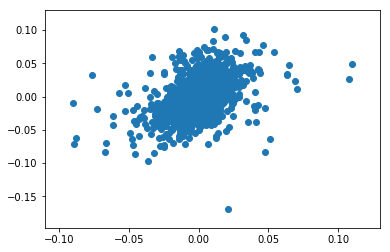

In [320]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

In [33]:
import pandas as pd
url = 'https://assets.datacamp.com/production/repositories/1120/datasets/c89d2158693af7d555a008198629d93aa059236e/UFO.csv'
levels = pd.read_csv(url)

In [34]:
import numpy as np
data = np.array ([  110.96,    119.4,   135.89,   152.32,   192.91,    177.2,
                181.16,    177.3,   200.13,   235.41,   269.23,    291.9,
                 280.9,   404.39,    488.4,   499.47,   435.69,   583.65,
                679.36,   615.89,   731.14,    652.1,   762.95,   874.13,
                969.26,   785.69,   905.11,   943.75,   800.36,   838.92,
                 890.2,  1020.02,   850.86,   616.24,   852.41,  1004.65,
                831.17,   805.01,   838.74,   963.99,    875.0,  1046.54,
               1258.64,  1211.57,  1546.67,  1895.95,  1938.83,  2168.57,
                2753.2,  2633.66,  3168.83,  3301.11,  3754.09,  3834.44,
               5117.12,  6448.26,  7908.24,  9181.43, 11497.12, 10786.85,
               10021.5,  8341.63, 10453.92, 10783.01,  10717.5, 12463.15,
              13264.82,  8776.39, 10428.05, 11577.51, 12217.56, 13104.14,
              16576.66])

In [35]:
levels['DJI'] = data

In [36]:
levels.set_index('Date',inplace=True)

levels.columns

Index(['Value', 'DJI'], dtype='object')

In [37]:
levels.rename(columns={'Value':'UFO'},inplace=True)

In [38]:
levels = levels[['DJI','UFO']]
levels.head(2)

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2


In [39]:
# Flying Saucers Aren't Correlated to Flying Markets
# 
# Two trending series may show a strong correlation even if they are completely unrelated. 
# This is referred to as "spurious correlation". That's why when you look at the correlation of say,
# two stocks, you should look at the correlation of their returns and not their levels.
# 
# To illustrate this point, calculate the correlation between the levels of the stock market 
# and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, 
# and the correlation of their levels is very high. Then calculate the correlation of their percent changes. 
# This will be close to zero, since there is no relationship between those two series.
# 
# The DataFrame levels contains the levels of DJI and UFO. UFO data was downloaded from www.nuforc.org.
# 
# Instructions
# 
# Calculate the correlation of the columns DJI and UFO.
# Create a new DataFrame of changes using the .pct_change() method.
# Re-calculate the correlation of the columns DJI and UFO on the changes.

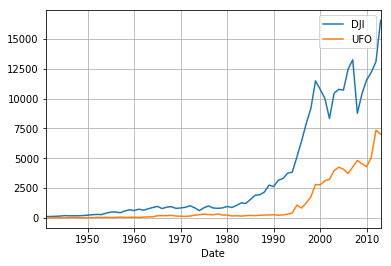

In [40]:
levels.plot(grid=True)

In [41]:
# Compute correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print("Correlation of levels: ", correlation1)

# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of levels:  0.9399762210726428
Correlation of changes:  0.060269354624053716


In [321]:
datax=np.array([1.2811550440412238, -0.6126310598985145, 0.9332222021268057, 2.2693265731638363, -1.427691082555, 0.6405188010777155, -1.596489626936219, 0.33561618750787203, -1.661094450815615, -0.892276781318839, -0.3853601714404014, 1.1750613930276552, 1.0795261289242912, -1.2035994956420473, -0.056172151726598965, -0.3766366045789261, 1.5701795772212934, -0.9428046774925836, 0.15111742087150695, 0.9206869830404033, 0.39865553922740776, 0.509308881338481, -0.33266116373611765, -2.23945925855725, -0.4534897919461296, 1.0290382457244724, -1.8780126981110872, 0.21017468558027702, -0.4757487221856649, -1.2186501112582493, 0.9308799884171601, -0.6028764223428251, -1.2009086565864688, -0.0964592154016757, 1.212574421217251, -0.6424298804905836, -1.37811844503333, 2.3018322938539786, 0.3649715099125608, 0.45720613554168227, -1.3774898420827786, -1.4383766335317467, 0.063973133855837, 0.44278722045348, -1.9974962921111783, -1.4044702210471958, 0.08692671859178444, 0.5570923022590792, 0.7522245332145279, -0.4545804023390465, -1.0680666881208938, -0.11323127134326061, 0.031636849769069254, -0.5913536163273568, -0.7743368977153091, 0.6947645888461771, 0.8286835284249676, -0.924767578153199, 1.2618915478818902, -2.3626119374754966, 0.14534783815545224, 0.049616126607182204, -1.6283838027917457, -0.6800270946068546, -0.5884337805404406, 0.7260916073821183, 0.8092150965860476, -0.6693518909217461, 0.9388824358296493, -1.5595639187088612, 0.8316986060383421, -1.1608014157128452, -0.5898791339712739, -0.09934721933319744, 0.2656448155523166, -0.18394678158088928, 0.9564584613417034, 1.0313898667732246, -0.6584946536221273, -1.3743996656695014, -0.0631732256437111, 0.026892033235163947, -0.8496921931994855, -1.729939107593855, -0.13857788040834806, 1.005633140702026, 0.7383585048100306, -0.06374618401822056, -0.43627521742932374, 0.41300383170708127, 0.23527973389250745, -1.4402823175412254, -0.037024592454535196, 0.3163210863597245, 0.4334010006371085, -0.1794067693088721, -0.22272937057979608, -0.9145161654283759, 0.23768785153671315, 0.2838865108117988, -0.8192423257468685, -1.9910712050577701, -0.04006354807978106, -0.12033738970715552, 0.15510748588618137, -0.4352447189222036, -0.0487281261986246, 1.0126578930049703, -0.7907201580971653, 0.7428329253873476, 1.100457607102351, 0.15812950730365105, -1.2496169877073868, 0.5361294618762135, 1.233762471342156, 1.7284866572391626, 0.25594780064858513, -0.41149149785151656, -1.0497931002530645, -0.6235509427190559, -0.22097480931607114, -0.46150241750214294, -0.4961601004936394, -1.0958358832877453, 1.5092875490667619, -1.6290323928216552, 0.28681646837921426, -0.7418999422719599, -0.5499656749845604, 0.6326764122049733, -0.029633564332853045, -0.012109250331289711, -1.0441640436490787, -0.5562011045733684, -1.0941654365809972, 0.8860495062314049, -1.5088203163123568, 1.1374329048126899, -1.5501735403499899, 0.6954523634231947, 0.9546853946527298, 1.3765439821968224, 0.19330216840911907, 1.892079712068668, 1.3575960296100273, 1.1969930896344374, -1.1278705031605591, 2.03058893387105, -1.7353520911623042, 0.026824698899590858, -0.9310507631310321, 0.7791126068047515, 0.4347688092705445, 0.8543492855148576, -0.36223449264905516, -0.9940674283863438, 1.1226780657187447, -1.3693434103086404, 0.09262208932661621, 0.16669856561892382, 0.4959097730434428, 0.05771982648856984, -0.6053809875603205, 1.6330030670912459, 0.288167641685169, 0.5595427949202992, 0.49161723704835875, 0.03710723132111678, -0.017796291447584375, -1.6570629840076838, 0.3972959690857464, -0.9938556824225638, 1.8668058033948733, 0.07302987315908709, 1.398213208859564, 0.27355501335685684, 0.6690414670643127, 1.1038295883597358, 1.3931754019172784, 1.5883723046544935, 0.5418476161290624, 0.5544303328617051, 0.9750753573422007, -1.916275205762016, -0.3626735851149104, 2.0628270289912463, -1.0723062135838064, 1.3360361211494085, 0.5475010717195191, -0.617524225013694, -0.9951149589811019, 1.0753160668536368, 0.3617901279608233, 0.9195681367049232, -0.4004585726579531, -0.6068603367567185, 0.048114274223299905, 1.6377358736628664, 0.33899410124172297, 0.21872786133555278, -1.6137386502993685, 0.18580232306052935, 0.22686320183666522, 1.5578421135323661, 0.1550583148874443, -0.3003998683723746, 0.32638341890705735, -1.370763314129386, -0.7321718364215666, -0.029719106687211696, 1.7250975811712936, 0.4285524229951472, 0.2782490086843458, 0.21799582474990986, 0.6062628073626953, 1.4581079982282943, -0.42615886544821197, -0.613083279799305, -0.5239485031323156, -1.670621825863721, -1.2640011981364627, 0.4132286076001853, -1.0532361755894544, 1.2835926349746098, -1.5735587350796931, -0.4084227724876398, 1.224872313494202, 0.3415187228815285, 0.19644259010643528, 0.18081070948849623, 0.3623181904942318, 1.689157463781665, -0.9965124679839346, -0.8218393586151007, -0.7848407321055315, -0.3228685919425816, -0.7392740033123055, -0.1500074064532319, 0.8107759705086444, 2.084423434792031, 0.8834937342698636, 2.8462671773195503, -0.14121234494487378, -0.8049187751604127, -2.321357750576519, 1.4134332889826897, 0.7466704197993697, 1.1506086948952838, -0.5060139080093885, -0.3354555917233457, -0.7174196055120188, 0.46658579812084167, -0.9298327945813356, 0.8456943454100372, 1.6050684916244604, -0.4352825695391445, -1.9727099686582816, 1.1880683084519628, -0.02323359841623244, -0.24158816746740822, 1.9061970426288974, 0.49757036585345893, 0.5293471899531691, -0.8387104275950436, -0.5384323931023147, -0.7710273505799191, -0.4109576100166529, -0.5375557392726514, -1.5226691060085205, 0.14313515560202128, 0.7624238993783363, 0.7334933564387248, 0.6587312472188919, 2.3626061416920234, 0.3191632013596961, 0.04647159859516381, -0.2755369854000762, -1.2814167482484604, -1.0777145898391958, -0.9643591443282876, 0.15456707448551382, 1.437029181593196, -1.3800682370220185, 1.0731570224196485, -0.05897203935250225, -0.1439819613811889, -1.2485507089306842, -1.0057958766239532, 0.2789286444875427, -1.8381512357957208, 0.4710816881100636, -0.913624085432763, 0.9228774883219917, -0.5269972810731411, -0.27566919969978776, -2.4872289245654806, 0.1324871295970721, -0.10288181143216761, 0.3028590233167439, -1.1743571235057015, -1.2880133585328295, -0.3417605743186503, -1.077587395061371, -2.151807645950538, -0.3927978678746878, 0.08400358092594723, -0.8270919285328677, -0.6129373404939361, 0.6952301625622106, 0.5021781114624926, 0.1799869140519854, -0.6192803879513986, 0.00587192506491817, 0.594271575339764, 0.5897645313049396, 0.5922167751763496, 2.134722295912065, 1.3347873183650223, -1.486619153082548, 0.08560166020524435, -1.6925581993269394, 1.011708416153619, -0.14020801309204117, 0.48184848501024724, 0.6718729525263696, -1.127862151776186, -0.2990782844837448, -0.7975916684903256, -0.3975826691867548, 2.142217744330889, 1.4066085892138767, 0.5273293230858743, 0.1378760563116852, 0.532649039316254, -1.223478422259192, -0.10299034282643785, -1.2822830722842427, 0.1032967267630437, 1.928093739383223, -0.7740374677171789, -0.7438198607084211, -0.18269039221875313, 0.7846498395908826, -0.10984657843530585, -0.3863608426004779, 1.5077979737496812, 0.00482917034885061, 1.732017154629424, -1.2295623137610412, -0.5725147309505427, -0.24956431539792898, -1.487353180389997, 0.4174945289618317, -1.6923016399179027, -0.23941151210717423, 0.965475945065727, 0.5473140277406429, 0.2719169871221121, 0.6603713592024104, -0.25902229365406354, -0.7604130478169479, -1.0078748877980297, 0.7870183151313934, -0.21502826189311067, -0.17072095044503943, 1.0236868222160658, 0.37755614563511675, 2.6108068431657854, 0.5246756173219759, 0.4836598162210405, 0.26742536748967183, 0.0169831633554079, 0.4562201011537283, -0.6606608098771884, 0.9949365427832687, -1.226735600080754, -1.6380411876107703, 2.041699248954565, 0.33493880002694376, 0.4529649856245742, -1.5153549153241226, 1.0909300176620387, 2.4913638757172443, 2.10651569366746, 1.9351030231528283, -2.1958407413708603, -0.4138797661100451, 0.250136395904108, 1.592751568266953, -1.2389426603316052, -0.26438440815028813, 1.6003122903891118, 0.4369099686809913, 0.66219670316823, 1.1573741156588628, 1.4986431755506244, 1.3255114982392833, -0.17931322235265917, -1.1957287571528918, 0.533196745245951, -0.3310345732826881, 0.9349535940920656, 1.5696533587044477, -0.5976302756882733, 0.630972928035347, -0.8272691085540191, 1.7440692032035177, -1.0589381321382874, 0.49376280519717664, 1.0662321134033914, -1.1480332637032122, 0.3315584422919956, -0.3645639530891268, 1.3957648949802663, 1.4190645340791712, 0.7116013566560508, 0.14958564285001907, -0.8387551985432976, -1.2123958029963737, 0.12306868449402704, 0.019751710655750914, 1.047685567212333, 0.29271014402798606, 0.5786548342762493, 0.7047096725632085, -2.708538556470341, 0.05010884493866954, -0.2969818564128184, 0.3999492635439395, 1.7223695598737703, -0.586845060734203, -0.026973741469146, -1.4616921654481712, 0.138495855842951, -1.123850873579895, 0.017135589417939627, 0.09308131402918762, 1.1230826990102114, -0.20143798281762954, -0.7258410981859367, 0.24627241367922775, 1.1296361715909322, 0.058552159550198345, -1.7983273468722822, 2.210210728664325, 2.249115280136353e-05, -0.5984532062176234, -0.45670278983757234, 1.1603754016024759, -1.0449496803465854, -0.4435199490079035, -1.8261954122445656, 0.2584637202654191, -0.4083742936784235, 0.693394936295836, -0.17069021353895084, 0.5684291527085978, 0.6665539259234277, 0.7259434644264395, -0.7818996934482328, -0.5742831908261057, -1.0057955675400962, 0.2767666945183962, -0.02657171937867959, 1.4859056991110522, 1.1814689108569423, -0.3200975323792521, 0.2979647582167218, -0.3232515902839842, 0.5459492822819827, 2.9272109032239864, 0.8037546198436225, -0.7499979255776861, 1.0195486390030897, -0.19318912479046815, 0.5013507507734484, -0.3154248752490127, -0.6909048361483536, -0.162428172141605, 0.6619320564839841, 1.541660251566514, 0.24676306444895935, -0.6081792360254962, 0.2230484458049995, -0.19688612727743685, -2.0280595004339546, -0.2019706712044319, 0.15767319852175163, -0.09038685208329725, -1.2842696550826431, 0.27116452125930596, -0.7124928794583623, 0.017356569438715625, 1.1873032421525376, 1.7072145367579399, 0.6655242675765024, 0.8527135331212987, 0.5509525519030603, -1.2461593572236154, -0.7068798069098832, 0.8567847697718416, -0.9234348937646064, -0.8806828886735357, -0.05609809998169541, 0.5019083657396824, -0.4157581652339636, 0.7576816160052998, -0.2833796697872356, -2.2915502845187197, -0.09944721684838555, 0.3980119421690809, 0.09454416205183548, 0.14329540595075083, -0.8734928742311916, 0.7584630765437268, -0.7908212321453724, -0.4320523265745874, 0.37025365268475396, -1.062001122245369, -0.4828920876000209, 0.6936722586624583, 0.5858808880619747, 1.4508861702159925, 0.7500862350496543, 0.5420294884948335, 1.0398706462749154, -0.1948557651599005, -2.385752240649883, -0.47077742637789227, 2.064509427221515, -1.386038447705097, -0.21990377100261563, -0.22630975846881524, -0.2588868206001651, -1.2646588934123528, -1.0834969364983877, -1.401409873741469, -0.0792912256992738, -0.2639577678483505, 0.032443527882877736, -0.1958118189742201, -0.2696672440142078, 2.356910173616174, -0.6625621350495404, -0.9823303116647341, -0.23929616612266164, -0.34032350329971356, -0.057851705966839494, -0.30298116057390284, -0.6066365014043973, 0.9809215742936962, -0.6705935056817571, -0.17471250370687091, -0.5779101748507249, -1.452565538806313, -0.6818093230131186, -0.875640737584392, 1.0829587238449638, 1.8344569102333776, 1.7031903105405986, -1.5062289827032123, 0.17890924580770518, -0.8351542433791986, 0.2710173607705894, 0.31965118866128406, 0.07953331906928739, -0.8475414408512983, 0.24929629756979074, 0.2938749017440937, 0.8625826904665663, -0.11273579413889787, 2.8006286023584983, -0.1117548423137034, 0.39703141240929996, -1.521600652092554, -1.0163254285070924, -0.28332438531049664, 1.2965563661393242, -0.9501724981207302, 0.2289047380394984, -0.5596777441867471, 0.020094441466944817, 1.0979926410447785, -1.3706395935376305, 1.5666130505215872, -0.7501925731978024, 0.6444428853456805, 0.5117080499010401, 0.017447261865881667, 1.2959498184802178, -1.2468030429927888, -0.8573379299224981, 0.8039631360433173, 0.9543085510513728, -1.545932002127972, 0.9610860616851591, -1.958830433328374, -0.4483478967243869, -0.3776644755498551, 0.5354507909342476, -1.0430895803398843, -1.0779232456335477, 0.33595254329514174, -0.5436533946867769, -0.5306417023748377, 0.8078920393134098, -0.8419042600738254, -1.424370805760945, 1.0103737412666025, -1.9600896409016224, 1.0225799813611687, -0.3422881659706962, -0.6327289414396146, 0.5735534796741496, 1.4513051087363864, 0.6070670062511726, 0.8195271507826488, -0.8639349441826176, 0.969726864583193, -0.38714731089393417, -1.423694462749488, -0.24029038589401666, -0.4859663413673385, 0.7421587411711145, 0.8955230500216699, -1.1931899850241667, -0.5250812576299323, 0.21044349786095048, -1.0435990843554972, -0.3553472314138764, -0.5745147739830379, 0.7270555706490947, -0.69252072507968, 0.0824295389407393, 0.5676522158489848, 0.4926951570286256, 0.12162848455760715, -0.3325245708296114, -1.040665362591346, -0.15104187318030327, 0.8482850141165379, 0.7282104379946829, 1.623223724188598, 1.065346721644724, -0.4631233870124684, -0.561463658403215, 0.08141045468279497, -0.6033751809042917, -1.2494181168901144, -1.0226185527491465, 1.6672766121243676, 0.5161077828412061, 0.7303143773731128, -1.2042140822667036, 0.42095035407325243, -0.5998653289544662, 0.4730008839090102, -1.9236000119268668, -1.1632113128844814, -0.34857698511954055, 0.6361644542059346, -0.28998923755127615, 0.5156222422474026, -2.0302343228889934, -1.408920553545117, -0.7164483539762333, 0.53851393409135, 1.632852293911881, -0.7059173661787806, -1.292958091755332, 0.22475214833323107, -0.7183152270319154, -0.0016646080338889222, -0.8232330902111494, 0.651173508629377, -0.23430488957409498, 0.9596102360167784, 0.28027084053186496, -0.3071623437513136, -0.150701948491389, 0.26539723370731777, 0.6575421788781195, -2.356978810174661, -0.4189421126781944, 0.33527442916251604, -0.6961444008576461, 0.23852841584644008, -0.9148663907490183, -0.6938629955169826, -0.6512048216975727, -0.44042201807582315, 0.4538387099487502, -0.9022531905831274, -0.43919529829075504, -0.48533301832222464, 1.400748938049492, -0.3041538855755456, 0.8022650307410149, 0.14423517799219773, -0.6162872691345818, -0.9003867648716256, -0.6426862410461465, -0.6385018025685305, -0.27749862681611087, -0.8898549936931711, -0.4845848557476576, -0.7462569079316493, -0.6660847909048132, -1.061698323614797, -0.4595916991858538, -0.4964001994536581, -1.1517433065966902, -0.7147352986264145, -0.979615491705565, -2.0022433379234714, -0.7920934071778448, 0.28918556795146877, -0.14459509154605615, 0.6300675586142113, 0.09113513829642259, 1.6182337171766665, 0.697616497978575, 0.40845000090522027, 0.0392003485912506, 1.2886297909140367, -0.9013774801911525, -0.7218805040877588, -2.3364088265360605, -0.15122718168423352, 1.5917319487562862, 0.10945483690096314, -0.5218476396593968, 0.014770133898636802, 0.5219232582969562, -1.6651425334274597, -0.9810023979643574, -0.49861418819806225, -0.37784158380837596, -1.9509977835799683, -0.7596789412979185, 0.5756436940108495, -0.1263915844750892, -0.2881655458555227, -0.21126222635427996, 0.8763471869337076, -0.16128480613787813, -0.595613530727245, 0.8223961660652714, 1.3938876633750859, -0.08179642293560137, -1.1508612743295161, 0.45892509993606106, 1.4622506372355752, 1.4968046003337594, 0.4330563169849272, 0.08146859954689607, -0.23758794588910806, 0.14433456436630293, 1.4297074738636055, -0.11910530737610853, 0.24994708657435719, -1.5397817734025403, 0.4710670256217842, -0.7528800491508506, 1.4973821201153297, -0.7370596961142618, -0.36600088826730276, 1.0788087412974006, 1.1097788135373696, 0.5606108417697564, 1.5254143138934957, -0.9083822366856663, 1.4745649737166788, 1.0676285887446368, 0.2614622875043119, -0.761594329523209, 0.16746351806632892, 0.29831306786322237, -0.3868078445771079, -0.3281181510361313, -0.20920587718194528, -0.6971623037562072, 0.8201147170205032, 0.8068979989605962, -0.14410762019304135, -0.03255522222679558, -1.0687328094882182, -0.27438958461986906, -1.5786072326056277, 0.0031124932782617726, 3.0875196913749394, -0.36685895820665904, 0.29001956648771726, 1.3781054114403108, -0.9691407832538603, -0.2555576493873456, 0.8684177508230642, -0.5193399002961957, -1.3421682606120884, 0.3147406832043353, 0.772758949221254, 0.632743021432991, 0.6282855528469061, -0.294330104752678, -1.1039735835170281, 0.4838728779399808, 1.091109943724447, -0.11402960847367027, 0.7216136659581276, -0.7952585606905005, 1.2900928276303572, 0.668708214494058, 1.6316989496194068, 0.4674668654867797, -1.4593356445396, 0.39301110318936955, -1.0780779185918286, 0.7399814906750249, -0.13169334753431958, 3.4530817839133077, 0.9851471428823663, 1.1702458168488377, -0.1374401186829724, -0.7140970042251803, -1.9273051033500685, 0.7415692564142079, 0.9767403767921218, -0.5386368829957875, 0.7941641292747003, -0.4426336706151123, 0.3611363176429492, 1.4393665592850737, 2.6426340756142896, -0.5173806148613016, -0.44752540165620003, 1.5207648982104383, -1.5542109065186518, -0.047589885387081685, 0.8049529740098417, 0.8584215654325545, 0.017913031835165235, 1.6261315194960824, 0.3903778618028171, -0.2824949808393406, -1.2822231331821135, 2.130088826538941, 0.01525282560618788, 3.753551482974148, 0.8933018228811488, 1.7967146397256244, -0.49568160024234537, 0.6706407731678474, 0.05766387793080424, -1.2120724687166047, -1.397301133108583, 0.1364103906471751, 0.22922870887051736, 0.09482754488813724, 0.4136402992332198, 0.9468518836081644, 2.3604601352516617, 0.7087840009586248, 0.6514681982249536, -1.5323044536529693, -0.6848120551306541, -0.5713992805749842, 0.13574232809169298, 0.08506206933983652, 1.0479594242103552, -0.03500546590392013, -1.4870046523111058, 1.4954443709311964, 0.5678162494115871, -1.2341719498736567, 0.7054584945121818, 0.12042410075608224, -0.029205904548573313, 0.8326703835870282, -0.2694083369965819, -0.2668229884277391, 0.45620238647435685, -0.34032229625850546, -0.6571342553469359, -0.52289564080822, 1.6514728722994687, 1.7022788554271675, 0.29758492780508267, 0.983691367511512, -0.33069743391009315, 0.14838735834684125, 0.4159273914669916, -1.7371164885762094, -0.9483051236350288, 0.2962478462192728, 1.130862479425501, -0.7521448321882552, 0.44055994741992077, -1.290473114630968, 0.38701573131336925, -1.2742461550579223, 0.15125253505998273, 0.24692691390378116, -1.4827692967810617, -0.7407891807851247, -0.3008623268715242, -0.9350653262601603, -1.0243160100912239, 0.40587665586893784, 0.813381859712616, 0.316200062837867, -0.45605550217223334, -0.10950542409640848, 1.8219947355667738, -0.11927902452886274, -0.18333975346505604, 0.8557516820631766, 0.14484051586829436, 0.7622419333896986, -1.8925454922311127, -0.818023396988202, -0.20544826880253692, -1.3199128745826836, 1.729563516423699, -0.09626352514342396, 1.1631185076895898, -0.5852350001243455, 0.7039075333859474, 0.617544368248742, -0.511282797504639, 1.3172490445252845, -1.0704715956704887, -0.5025752028483513, 0.04221309666716833, 1.4173558637443744, -0.06031795298007711, 0.18892275187271276, -0.04927489195075641, 0.8608987480623188, -0.5286370591510503, -0.7362899547896913, 1.6056121506761227, 1.1748273187350537, 0.5067017023831254, -2.085925519310575, 0.3396871039965605, -0.6564751973305406, -0.3331057193479064, -0.14696606994721095, -0.42788188240430064, -0.7232036028128643, -0.129793812318884, 0.4848980562907761, -1.1247681212903056, 0.5718077336743665, -0.4230129805204403, -0.5503507083933211, -0.7077830026673683, -1.4722981939474487, 0.7169901009692797, 2.6282023232584417, -0.11992815403676732, 0.4353676973975298, -1.1420916946045905, 1.3386924595354746, 0.9180706850375504, -0.6787382291510811, 0.4793461018723987, 1.397851133836866, -1.1313343392628266, -0.683984118806693, -0.8310011879258917, -0.14420594489065325, 0.9182054158071498, 1.216339774257903, 0.7748184342131297, 2.7340141733751624, 0.0005404319387118655, -1.6109057403686418, -1.0636523116621077, 0.04669677587569681, 0.23914254343351313, -0.09076924413605764, 1.2235224703671055, 0.8581408680020675, -0.1437251143017076, 1.740802785806922, -0.32070034322663066, -0.12664089914099344, -1.3801308078906984, 1.035784268964063, -0.05602888306554742, 0.16418240278246704, 0.7863503496394391, 0.25154225043142625, 0.4682238397718219, 1.0890322480832832, 0.7436922974132252, -1.6115703065738287, 1.011224254361624, 1.5719710523592254])
datay=np.array([-0.8351286009190672, -0.06100441499537612, -0.194677330631589, -2.4611421320699467, 1.040072990892944, -0.6828739396020767, 1.3107639678267742, -0.5298639831872226, 2.639054920254874, 1.0649845894270087, 1.052035801676665, -0.6492146582173699, -1.3647372713719814, 0.5646740628725941, -0.3292163536905029, -0.8749304916011758, -1.883174191714396, 0.8651524394848811, 0.15666513226527481, -0.793844987778514, -1.1712928255286783, -0.2526950984933609, 0.3273704057637023, 2.424119190394595, 1.454417921600079, -1.493598456173196, 1.5211081928494008, 0.26803795383150913, 1.2605576813226307, 1.6968970520786513, -0.5754065968246665, 0.009752477415448239, 1.561915809634276, -0.0077827232736593565, -1.123344542892297, 0.27072607156943584, 0.8874343256221449, -1.8368522031971426, -0.42133365389976307, -1.175414516001151, 1.0694182669881944, 1.7994158301635967, -0.5496034510258208, -0.985044049537418, 2.071036645930695, 0.8376931544450931, 0.43982915406535145, -0.09596389771269319, -1.3619875450452867, 0.285007545705001, 0.18352831476965914, 1.2752281128590326, -0.016368025541275942, -0.24134723602942829, 0.056375833843262335, -0.13893642883047652, -0.6045181655598098, 1.0494242786206278, -1.410579011186635, 1.4569839407534417, -0.3922580739101969, 0.28499606976433933, 1.5075322031407763, 0.9035176816076788, 0.3362393315340148, -1.2180458429821857, -0.6653524863688425, 0.8140115574040573, -0.13122804960129275, 1.4012502554784658, -0.7734647082014946, 1.309618437647121, 0.4950340199543207, 0.7900884968784077, -0.2015556492345248, 0.3108326180697597, -1.7958196412162415, -0.9562837890101289, 0.4211697757054076, 1.3103694234018777, -0.023570054303233504, 0.2881583503543797, 0.4479052396498257, 1.2402283884003817, 0.015864002170548185, -1.0392280889458745, -0.7057533944065573, 0.7220130094387418, 0.16292693533091762, -0.35040371958031274, 0.4174684307050774, 1.2797612914123162, -1.1065249909203736, -0.7537217897041183, -0.2582792036745885, 0.16600466912717265, 0.16632778775671594, -0.5304555619213652, -0.28726180106259136, -0.3813550423126317, 0.5517614900302444, 2.2988869499939746, -0.05235864358750514, -0.28900037602902284, -0.030476428364102706, 0.6944898693279178, -0.5845631094753875, -0.2916632456888246, 0.9560190622554623, -0.74120276252537, -1.347291281771406, -0.31985980150945287, 0.615143470662628, -1.1509086120876026, -1.17828298784928, -1.3913462901200206, -0.22518472313119609, 0.21732632728409726, 0.9628803906739333, 0.5345051781176213, 0.34604375756453193, 0.025778700949339116, 0.3535181985885683, 0.1332115507220299, -1.3467497524558527, 2.002482017436798, -1.0435253128347786, 0.7058620298051606, 0.6015288311009992, 0.6904611111905807, -0.041583058263442725, -0.24885630285378202, 0.8859602961150294, 0.6834794488264708, 1.2820754649058856, -1.4792728779721538, 1.2365965693647982, -1.4368954464740926, 0.9150349787144477, -0.9936577469384562, -1.4843326819574272, -1.582793263425021, -0.4985425104162844, -1.3315708369058545, -1.2332555735860795, -0.8981127007256928, 0.7353897756251918, -1.7194233851753498, 1.9212563409773007, 0.33978339077341935, 0.5603156861554537, -0.5058098466895491, 0.15403511311095938, -0.5186663257741796, 0.30568989517621464, 1.2982046637971552, -0.8363635677419465, 1.311006771933953, -0.3920973979405682, 0.14017971042533597, -1.0980191786092972, -0.6747515949956524, 0.41455952135834273, -1.78890508717576, -0.08730808916749108, 0.2761770828489287, -0.519522716313831, -0.16350248730212608, 0.259842285864462, 0.9552703090152659, -0.5975454381796642, 0.8343511124979328, -1.8275715472142229, 0.007357470866249986, -0.6294375283426397, -0.35776392846515653, -1.0853982206347939, -1.2797235485339382, -0.4734952482197081, -2.0929770660193125, -0.2406531601128485, -0.25213031345049236, -0.9485595561718797, 1.4834867550363189, 0.45521438502146405, -2.3262226647219744, 1.1327147851674544, -1.0271111332391483, -0.3864814910521105, 0.11722834295539541, 0.5445433254828663, -1.4701291926643976, -0.31286354900968205, -0.5864748140108972, 0.08973536473366796, 1.1261058916010336, -0.1442576147331307, -1.8199810453177645, -0.22925709425946764, -0.10959569693089637, 1.376753860943283, -0.7712788503736197, 0.20998084418460666, -1.8556224018418037, 0.22511925219840134, 0.44595162773616676, -0.11088269984684684, 0.606478957058956, 0.6880051085490362, -1.0628575995947624, -0.9657025138773654, -0.9136757654733096, -0.6114889769485324, 0.4604154281775538, -0.5372621991055229, -0.778268897850732, -0.05764535435919853, 1.149734070677476, -0.2092121091733229, 1.8093128333586201, 1.0176342671395302, -0.36383247546020187, 1.117183260206731, -1.166427504298986, 1.602988199266382, -0.15620395419868643, -1.5100569077149304, -0.2949813474272129, 0.5199522901637373, 0.29521358812747733, 0.2856512031937996, -1.956918449897968, 0.9197724014996493, 0.9940461549432806, 1.0590129550423013, 0.9903149317539083, 1.1837178740427534, -0.11020391792137656, -0.4749433371781799, -2.6690112923427125, -0.9942333813580929, -2.283349897856185, 1.0287445749254598, 1.2657184205737533, 2.0660175316732308, -1.5173466757092178, -0.8615351571905977, -0.8966450081164234, 0.4939737594811782, 0.27192857530052045, 0.7485638954826769, -0.050862984996839285, 1.5279603287615164, -1.0847064029232791, -1.7117580111758084, 0.3758920787990269, 1.7912112936648938, -0.9338254981311711, 0.269041239924053, 0.35060352969420205, -2.2309251076178858, -0.6531847485271, -0.3447290272489765, 0.33262521992775607, 0.8003958685249337, 0.13692565854859848, 0.44789540455929583, 1.3355443573541301, 1.5730451112880557, 0.13948070865982107, -1.4111891230665945, -0.187638343980973, 0.013243362197729269, -3.072426434616361, 0.07804947297679296, -0.08924880637945112, -0.5128548489001585, 0.9760750830094682, 1.0461755585253074, 1.1178687801853213, -0.05337978977617685, -1.4343327845105922, 1.9651101843833167, -0.8470074346493587, 0.42442974830423524, 0.0395558010498794, 1.345326196281462, 1.4415546340271979, -0.35361343763228753, 1.9237847350303976, -1.0077573572133016, 0.9853096167802949, -0.6211939804749285, -0.21558974556080812, 0.8718902074054266, 2.502837825731818, 0.5860048041907306, 0.22601843601179708, -0.9264425309488689, 0.6047991987791652, 0.9355350050934457, 0.17527559483491692, 1.212129996285403, 1.6671722546010892, 0.4139698006528976, 0.6297140643644672, 0.3139029645907753, 0.42706670492387344, -0.22750854651242883, -0.671998676579982, 0.2431602828428717, 0.5144468523538015, -0.524697682245477, -0.8869196935567136, 0.298742909953898, -0.7245155562878318, -1.8661387374721192, -1.7402264782147339, 0.5452665418204603, 0.27258496682237804, 1.2810800520845667, -0.20473996011401668, -0.18905922818964352, -0.9167888952990743, -0.1852059605567809, 0.6027125075608392, 0.11922698339665362, 0.7276654726847182, 0.3266522643178294, -2.1211976117402878, -1.072482605927704, -0.7978992083312557, 0.12052125541513824, 0.20175742263808755, 1.990659299330785, -0.5597616267088866, 1.096087800275874, 0.17769656555972038, -1.1995285876412514, 0.9315781085278209, 0.9928966083438362, 0.045049531009922, -0.6562037083491528, 0.5942678096267451, 0.004797525042239186, -1.564845506871891, -0.04869705977825815, -1.2515017358911724, 0.8613779951720202, 0.9986336465646574, -0.17461716554909484, 1.6577064243902737, -0.07186756079736258, 1.4699648631778892, 1.1084191586892835, -1.2111096173220595, -0.6181200759656393, -0.13739717717278396, -0.938834936851383, 0.32830098343116143, 0.9434821803499186, 0.49673119671066546, 0.03960232855322794, 0.5492725554776009, 0.36093692831721746, 0.5735719614904095, -0.3946939152059685, -2.1160693536411297, -0.5518635680566477, -0.5456807148119283, -0.28667423479323867, -0.08594587515020048, 0.12896714068903015, 1.0575370799085069, -0.4328691796731137, 0.9792456604321654, 1.3324932571029853, -1.5490818521503682, 0.1019538053880786, -1.0172456892719937, 0.8860052812538409, -1.95207865452835, -2.9560654830566793, -2.1224389504593404, -2.424476973402556, 2.350184993909178, -0.31094255442247554, -0.22862159240944485, -1.5363218522876991, 1.0831968948433943, -0.6488688721809964, -1.1272966611367068, -0.8526896514981273, -0.6878963364437285, -1.100794214133822, -1.1524998517053378, -0.7350695563049733, -0.19887046298447833, 0.581035065845718, -0.5332305217730403, -0.5672321558963068, -0.8597169089303115, -1.0032889586016045, 0.3676549816070723, 0.20154385703720945, 0.9973082794075395, -1.0152848661244311, 0.9925692251760728, -0.5777960012661414, -1.2767738153751444, 0.33964045300533535, -0.2806852246508079, -0.1626726809919302, -0.9086753281969658, -0.9679821133040046, -0.2287017484302373, -0.6712474761904214, 0.8309776075195926, 1.6113998109762353, -0.3241661494135685, 0.06531279533116849, -0.6711587435663129, -0.48189390293423895, -0.4753407715250453, -0.6443492043894243, 2.6845636770790255, -0.7959221408352424, -0.1990813019576479, -0.3321482864839041, -1.6519500762163362, 0.006764297216013477, -0.7917251445212186, 1.609524556893827, -0.21158658130421582, 1.081738758533241, 0.662016196505634, -0.5817226860721069, -0.4841648088498559, -0.023211398741577356, 1.1721412087903582, -0.6809357811910692, -1.931887685845895, -0.4580015305105127, 1.8245062266219392, -1.5757357083224197, 0.31525391701854727, 0.731077334942962, 0.5634798083057991, -0.9963677766855772, 0.9510095967894265, 0.6311659192646828, 1.7131620415049307, -0.31075718420451387, -0.6079712440343344, -0.5592822574491567, -0.1867851236334443, -0.7274641784212689, -0.8959971340932692, -0.32552144880940265, 1.1994116402176425, 0.25751174579805997, 0.8652584328547716, 0.3217037211381487, 0.13716049965096547, -1.2681085218036827, -0.7289157387036611, -0.6799475756041976, -0.3999449039817398, 0.6231138473325765, -0.09298085509382946, -3.2465164901782626, -1.3646425370290651, 1.120814201007724, -0.49270553055824784, 0.004606261917645445, -0.849404447840968, 0.6061829861423851, -0.2259803829117142, 0.41528120242872174, -0.6425898256870864, -2.0917191379940356, -0.3852879872746276, 0.07737006632550128, -0.44208462240686014, 0.8323957730786525, 1.326631787764381, -0.29556756172921794, 0.031462053121549025, 0.06846815404386546, 1.6067059132638761, -0.26033687150137474, 0.9851994841659273, -0.8112693032942038, -1.1220193480659464, -1.775367428150278, -0.21864482871235116, -1.7166268838508927, -0.2670778495323081, 0.8394959526625937, 0.2098330002179524, -0.6029486915581515, 0.4764982356085541, 0.04506436899875718, -0.4511530380389726, -1.0725875065282233, 0.6634583586114344, -0.5897161023344912, 0.22593429888349945, 1.9154979347685708, -0.07156146139542914, -0.3267207266534765, -0.4793387070970653, 0.38545938086748527, 0.9642971299389009, -0.6750892246414598, 1.323537265071567, 0.26910683304195515, -0.02498421762860199, 0.2759339588922596, 0.8009899035818229, -1.0357822141384223, -0.8901036618630953, -1.310867202679047, -0.7815628434531199, -0.42791063166025234, -0.9301846361158219, 0.5649673152228756, 1.450135885822667, 0.15363016218797498, -1.6881207700896754, 1.2108972111953078, 0.1912477816463337, 0.6200973167111856, 0.41351983396980974, 1.1910197089897347, 0.7158871721876354, 1.7313754203157241, -0.8663634540184704, -0.2645634670436962, 0.6165388990391645, 0.1162021576778026, 0.39741389527177323, -2.2491599323467155, 0.5465810303146639, 0.9252325061115448, 1.2558596740012449, -0.5282244055567069, -0.7139897685127677, 0.8885407174426136, 0.7498826888948223, -0.27626958615143227, 0.7978121589570587, 0.22463377612490337, 0.3036219218847386, 1.5206939474266443, 0.48791214187544585, -0.14478996902488192, -1.0970071130274728, -0.7435177758190721, -1.5484987928781087, 1.7214670990104932, -0.42583558677259536, 0.47726231473696157, 0.038096052897151116, -0.2805155223625518, -0.5132399922408362, 1.4705396030720284, -0.36806556637150684, -0.05291475247876026, -0.9021724106554729, 0.39986577222888964, -2.620221202571141, 0.5624246103349794, -0.6288460130766073, 0.822535721205695, 2.15935617933679, 0.6474002907697215, -1.60717294563803, 1.1119812403517202, -0.12476249608497518, 0.4286013618780339, -0.03633159309394091, -0.9532767239907178, 2.1451966050479645, -1.311419010975985, 0.56660671312809, -1.2351290037741947, -0.35517920546109255, -0.2906648448779417, -1.1391047395660956, 0.8322709351313324, 0.016811048440167207, -0.47767425446309264, -1.224620872006959, 1.2181942107787327, -0.7035588452833823, 1.8516467744656862, 1.0501941704766498, 0.256953520471082, -1.1728245091137073, 1.1240160761185238, 1.5201840920392329, -0.8667444118086592, 0.2607877167620652, 0.2036606154765182, -0.8709450461805627, 0.9789930688211912, 0.8727052412665653, -1.050248959756164, 2.261639558143545, -1.0566310270913808, 0.0879641689887834, 0.5627641014888486, -0.009949510620575518, -1.8814375338069855, -0.9861615054025421, -0.601074061339009, 1.2736010499868522, -1.0177656092236762, 0.49447989411611204, 1.121675811107636, 0.06443226401984596, 0.0034689738695751183, -1.0686742438906895, -0.20327072084000522, 1.0980901612023022, -0.18797220682385504, -0.1390616280261179, 1.1897505980676946, 0.4885108439456383, -0.050134919134401, -0.08535468633790749, 0.9135491124267225, 0.2124816186721891, -1.2742763336812466, -0.25212865228164333, 0.3318276218970302, 0.3525786106287421, 1.5470792059323741, -0.3422570211804259, -0.9204881581661553, 0.01316341403563022, -1.6519606801021933, -1.013111337887004, 0.2820479552777713, 0.47263499017623906, -0.26829597409628075, 0.6653149184703697, 1.817390508429139, 0.05688688992439631, -1.2262119474031368, -0.4110824615891767, -0.4987084352785847, 0.6632521116301329, -1.164992319734768, -0.14487071556052242, -0.24062371480622027, 2.088361703429373, 1.279110670671242, 0.2542493976331204, -0.11096657857793092, 0.44038553510059264, -0.6699295955570451, 2.0000465866003365, 1.1762569151543973, 0.8460488856960432, -0.24846778832539768, -1.3758737786327224, 0.8280394084692945, 1.2625026425566397, -0.06597364397623037, 0.9731556523617573, -0.4434148149501292, 0.4701260817399749, -0.9439388371569425, -0.12180971530516568, -1.2542533108639282, -0.07710865015291997, -0.17603499466635414, 0.2950426056823578, -0.6214892965784424, -0.8953758772257824, 1.9593735415796323, 0.09958572299840592, -0.6510682451385197, 0.8656865759426796, -0.013609070052617028, 0.5344150561018873, 0.37292834968210176, 0.9822316450476345, 0.3465401042268712, -0.5717370481593201, 0.5971054703288382, -0.34236822612223855, 0.02223063152501999, -1.1687725906574817, 0.10586944426631484, 0.21337214590510878, -0.23422172147043996, 0.6552898120563176, 1.0244656411284943, 0.8409496290315752, 0.6194268145648701, 0.1562878693937707, 0.287888193886669, 0.9309153610206364, 0.6997029925032779, 0.31878825262511706, 0.5701143012807507, 0.6978033278005473, 0.29645831542061674, 0.33009348152386797, 0.800348934463625, 1.0690801175262108, 1.5810489275007527, 0.3958601539534113, 0.04281354616881958, 1.0745930617700512, -0.054950273680818396, -0.4045871868644608, -1.5454852016847376, -0.3185952077687233, -0.6215926970923221, 0.7305507571259972, -0.8335395096830446, 0.802567438371458, 0.5947482213539691, 2.2862782880716557, 0.00552874477217613, -1.709417717939578, 0.5617781652973668, 0.43715335055980953, 0.13162092831509203, -0.21681758902938303, 1.502737480383597, 1.372907435310837, 0.5486688465014347, 0.28062040088401696, 1.6297181252760515, 1.4527355642894983, -0.05426108354313248, 0.15427972976539, -0.4335169417881578, 0.8568382011803327, -0.4974058190480708, -0.32738069328901365, 1.3496321241965947, -0.725886713891028, -1.4126739073506405, 0.8657214303512696, 1.8854088632627228, -0.5685662517104995, -1.7820779034972276, -1.3333315305007223, -0.9256273304326064, -0.6113616832331479, 0.36479673242228206, -0.47110257310565057, -1.1813444496459788, 0.3267534955325383, -0.34740544104937127, 1.2711920562999022, -0.13838837257970832, -0.16239722670141785, -1.7929148468748217, 1.0374410281852575, 0.6467365826435185, -0.8100123096600219, -0.6861337314986262, -0.4346638307931161, -2.128655774250894, 1.2177395000370108, -0.8996308771909305, -1.0587017116974322, -0.6744261177245441, 1.5151409625322352, 0.5149839442728665, -0.24987599015708883, -0.13048809645106724, 0.6455025719498002, -0.5473682454010533, 0.019627662862032696, -0.7613413282985465, -0.6934503519759025, -0.5850725868256018, 0.2948816300949554, 0.9047985827761954, -0.3942433390587412, 2.251667356221582, -0.05894343129140028, -2.6245361983282276, 0.7303594772766099, -0.49995451917562633, -1.0301688826703248, 1.4717564854918987, 0.10947456718482437, -1.1822501238511427, 0.3920837621715219, 1.8575175444530967, -0.8584012859084936, -0.2963052111610501, -0.3885697714869025, -0.47481787633773975, 0.7352081350739362, 1.6899257763805653, -0.549621655536818, -1.1965116085691776, -0.06662676646404964, -0.2600533788212141, 0.97375136675372, -1.2002337976178175, -0.08029700605296085, -1.8816125018560808, -0.6761251158864803, 0.4073289815726317, -0.012557251751150106, 0.8325228343702813, -0.5851500736714067, 0.16273136414455638, -3.9571685184156546, -0.6975843905737343, -1.638311891490591, -0.4383899498731495, 0.5390559572860592, 1.6456863317405426, -0.381813516712245, -0.30074647336334515, 0.40273764267681067, 0.48071112756120604, 0.5099290379543837, 0.10269664410803683, -1.5203963064975958, -2.8811812178653438, 1.1355330381166666, 0.733728056466949, -1.8241428894973772, 1.3199335876913987, -0.3126683869300254, -1.0152637656368146, -0.43021374462763834, 0.43774566758539546, -1.0780922109710034, 0.4322037424391844, -0.3853746142222261, 1.2211837374674344, -2.065155791036126, 0.4659994235011272, -3.239761434249477, -0.03185757015558928, -1.552831668631661, 0.3069061540090139, -0.8377846308107615, -0.618218395526103, 0.7236256247824069, 0.5972652740685637, -0.20899607885924681, 0.19843980984266132, -0.299619802946286, 0.025079303856235437, -1.403308713220161, -1.4538469569917025, -1.5519746708504625, -0.9253665117890424, 1.324395199438293, -0.1160490200892289, -0.16596481627273799, -0.47556696161315065, 0.19865412914889677, -1.5561811954881166, 0.342368979767648, 1.2759682548933864, -1.4119828118737403, -0.9812295297180748, 1.5108705191089844, -0.7138265475096489, -0.04659109590334553, -0.8205278901107289, -1.070586489272524, -0.21460841610333678, 0.09631320741008491, -1.0242871391502386, 0.5300497061994761, 0.9027834176968405, 0.6937663940700887, -1.776298629948592, -1.0899486001439687, 0.27026714926143897, -1.0247765298666414, 0.1827134956160951, 0.5144562902463607, -1.59564219165742, 1.3830743733075401, 1.2398496146033884, -0.12615248531274562, -1.092448104166287, 0.4058527095300118, -0.30076387552194483, 1.2890622273482375, -0.4524948562808326, 0.9873531167931605, -0.43400815098799417, -0.15135933523977815, 0.5326303447803972, 0.3420580637655695, 0.8552439475444681, 1.005706640275822, 0.6024218879610441, 0.27365147653603067, -0.7251604071340673, -0.4034552233141353, 0.33552298351653376, -0.1161510741361051, -1.7356404162116643, 0.7374057890601887, -0.440392863540994, -0.6140808783233639, -0.019937835373290917, 0.07396203397441399, 1.475923263020116, 0.954004231593583, -0.1790158879202037, 1.8410322470217249, -1.1108473941141084, -0.17107654683025816, -0.7405820189209587, 0.19430488124406078, -0.877213133892288, -0.3815138372168757, 0.22701151896720698, -1.913831653047473, 0.6255788269572155, -0.28593281727612363, 0.816225208825358, -1.1715237715870714, 0.4708081327913606, -0.06691172858963793, 0.30545798867900137, -0.7748330455340461, 1.0509783310521734, 0.23006360328719602, -1.4228692443994069, -0.7972294037423477, -0.05429329907326862, 2.0580539716569923, 0.11356072183027066, 1.4174575043243387, 0.05007901143451323, -0.13192938376661625, 0.03959328983755052, 1.035130682671959, 0.14123199175408116, 0.10196031148966289, 1.1899346797509782, -1.0981103018572353, 0.13766300733678496, 0.3774152067624021, 0.8005419199122669, 0.4732653940626776, 0.27438769057062173, -2.2513567954103326, 0.694911145290376, 0.09697499121064398, 1.2300944273844185, -0.930384419140953, -0.9795073550971156, 1.1671257547001797, -0.19895080857955924, -1.60910629513907, 1.7321157382917554, 0.620553808442369, 0.8206132246477095, 0.1837319831396932, -0.5935619708743829, -0.8693714074655606, -1.0977405113428507, -2.8038168150266114, 0.3693376381270472, 0.9444620352467245, 0.8561298846744425, -0.0937742156636077, -0.6371228668572977, 0.4535243360287085, -1.2322246907687768, -0.3680297493571115, 0.8184385530730466, -1.2782960057055743, -0.003607082617419526, 0.8269922697547579, 1.7478379673018143, -0.8972091198449379, 0.6114756025487191, -0.15721848971159086, -0.4875726168694107, -0.1683700970680314, -0.4470976422645183, -1.0170804253102823, -0.4309430601515828, 1.9897793997817539, -1.1719066305299213, -1.5659023361893578])
x = pd.Series(datax) 
y = pd.Series(datay) 

In [46]:
# Looking at a Regression's R-Squared
# 
# R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression 
# is related to the correlation between the two variables. In particular, the magnitude of the correlation is 
# the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.
# 
# In this exercise, you will start using the statistical package statsmodels, which performs much of 
# the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.
# 
# You will take two series, x and y, compute their correlation, and then regress y on x using 
# the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side 
#                                                       variable y is the first argument). 
# Most linear regressions contain a constant term which is the intercept (the α in the regression yt=α+βxt+ϵt). 
# To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.
# 
# The module statsmodels.api has been imported for you as sm.
# 
# Instructions
# 
# Compute the correlation between x and y using the .corr() method.
# Run a regression:
# First convert the Series x to a DataFrame dfx.
# Add a constant using sm.add_constant(), assigning it to dfx1
# Regress y on dfx1 using sm.OLS().fit().
# Print out the results of the regression and compare the R-squared with the correlation.

In [322]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x.corr(y)
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y,dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:38:27   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [83]:
# A Popular Strategy Using Autocorrelation
# 
# One puzzling anomaly with stocks is that investors tend to overreact to news. 
# Following large jumps, either up or down, stock prices tend to reverse. 
# This is described as mean reversion in stock prices: prices tend to bounce back, or revert, 
# towards previous levels after large moves, which are observed over time horizons of about a week. 
# A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.
# 
# This simple idea is actually the basis for a popular hedge fund strategy. 
# If you're curious to learn more about this hedge fund strategy (although it's not necessary 
# reading for anything else later in the course), see here.
# 
# You'll look at the autocorrelation of weekly returns of MSFT stock from 2012 to 2017. 
# You'll start with a DataFrame MSFT of daily prices. You should use the .resample() method 
# to get weekly prices and then compute returns from prices. Use the pandas method .autocorr() to get 
# the autocorrelation and show that the autocorrelation is negative. Note that the .autocorr() method 
# only works on Series, not DataFrames (even DataFrames with one column), so you will have to select 
# the column in the DataFrame.
# 
# Instructions
# 
# Use the .resample() method with rule='W' and how='last'to convert daily data to weekly data.
# The argument how in .resample() has been deprecated.
# The new syntax .resample().last() also works.
# Create a new DataFrame, returns, of percent changes in weekly prices using the .pct_change() method.
# Compute the autocorrelation using the .autocorr() method on the series of closing stock prices, 
# which is the column 'Adj Close' in the DataFrame returns.

In [84]:
lst = [26.107651, 26.377876, 26.438896000000003, 26.587088, 26.517351, 26.491201, 26.438549, 26.499977, 27.008910999999998, 27.114212, 26.973815999999996, 27.026459000000003, 26.798319, 26.552621999999996, 26.815865000000002, 26.929942999999998, 26.877295, 26.894841999999997, 26.605271999999996, 27.044012, 26.6667, 26.6667, 27.509077, 27.158091, 26.956263, 27.017687, 27.008910999999998, 27.149307, 27.386227, 27.386227, 27.359909000000002, 27.245834000000002, 27.596825, 27.368683, 27.008910999999998, 26.6667, 26.473647999999997, 26.46487, 26.113879999999998, 25.876963, 26.026134, 26.201632999999998, 26.350804999999998, 26.192856, 26.131429999999998, 25.692694, 25.429445, 25.403122, 25.622488, 25.894512, 25.876963, 25.964712, 25.885738, 25.131096, 24.569513, 24.613384, 24.481766, 24.464212, 24.753784, 25.043356, 25.903285999999998, 25.885738, 25.999807, 26.201632999999998, 25.517191, 25.280275, 25.297825, 24.76256, 23.966333, 23.745159, 23.585917000000002, 23.462059, 23.647844, 23.630152, 23.84248, 24.505997, 24.231739, 23.957491, 24.205204000000002, 23.84248, 23.550531, 23.382437, 23.329363, 23.594761, 23.647844, 23.408981, 23.833632, 24.169815, 24.099041, 23.984028, 23.71862, 23.975179999999998, 24.382137, 24.160965, 24.488301999999997, 24.284822, 23.939792999999998, 23.762857, 23.851323999999998, 23.488602, 23.630152, 24.435221, 24.107882999999998, 23.656691, 23.612459, 23.488602, 23.621304000000002, 23.408981, 23.736315, 23.789396, 24.072502, 23.922104, 24.107882999999998, 24.107882999999998, 24.019415, 24.426373, 24.444063, 24.665241, 24.691784, 24.780248999999998, 24.6387, 24.284822, 24.709476000000002, 24.27598, 24.329062, 24.187507999999998, 24.134428, 24.373293, 24.647547, 24.665241, 24.797943, 24.806795, 24.780248999999998, 25.021101, 24.860533, 24.52157, 24.762408999999998, 24.414526000000002, 24.414526000000002, 24.807014000000002, 24.798092, 24.931898, 25.1103, 25.2887, 25.05678, 25.101379, 24.976496, 24.860533, 24.896212, 24.905134, 25.101379, 25.012176999999998, 25.065699, 25.137058, 25.261942, 25.074625, 25.199501, 25.119221, 25.119221, 25.30654, 25.520626, 25.520626, 25.690110999999998, 25.476025, 25.511705, 25.60091, 25.502785, 26.412640000000003, 27.010302000000003, 25.814992999999998, 25.681192000000003, 25.591991, 25.841755, 25.716869, 25.681192000000003, 26.555366999999997, 27.500906, 27.295741999999997, 28.330481, 28.491045, 28.357244, 29.088699, 29.525787, 29.186825, 29.579309000000002, 29.873671, 30.105597999999997, 29.713112, 29.427666, 29.133297, 29.160057000000002, 29.463345, 30.119089000000002, 30.406532000000002, 30.613134000000002, 31.322772999999998, 31.511409999999998, 31.304803999999997, 31.089223999999998, 30.676014000000002, 30.783806, 31.457514, 31.33176, 31.466496000000003, 31.349715999999997, 31.969524, 31.430565, 31.241923999999997, 31.403617999999998, 32.041389, 31.861731, 31.295820000000003, 31.439553999999998, 31.188034000000002, 30.900584999999996, 31.439553999999998, 31.421576, 31.071251, 30.083151, 29.885529, 30.289759000000004, 30.244840999999997, 30.855673, 31.098204, 31.026336999999998, 30.864662, 30.487378999999997, 30.550257000000002, 30.729912, 30.837706, 30.855673, 31.170071000000004, 32.059353, 32.041389, 32.490517, 32.58036, 32.104271000000004, 31.834797, 28.205761, 28.753712, 28.583038000000002, 28.708796999999997, 28.196781, 28.403384999999997, 28.331526, 28.609987, 28.601005999999998, 28.448297999999998, 28.64592, 28.475247999999997, 28.367453, 28.798624, 29.544190999999998, 29.373514, 29.526224, 29.155340000000002, 29.263887, 28.757315000000002, 28.766353999999996, 28.395471999999998, 28.603528999999998, 28.594486, 29.300074, 31.434933, 30.892174, 30.08708, 29.869976, 30.349413000000002, 30.213721999999997, 28.838729999999998, 28.223595, 28.250734, 28.178368, 28.639713, 29.300074, 29.616685999999998, 29.571455, 29.879021, 29.670963, 29.788563, 30.141353999999996, 30.430828, 29.661915000000004, 29.616685999999998, 29.354351, 29.408625, 29.643828999999997, 30.096127000000003, 30.105165000000003, 30.376556, 30.684117999999998, 30.629837, 30.64793, 30.123264000000002, 29.860929, 29.915203, 30.539377, 30.874081, 31.163560999999998, 31.199738, 31.33543, 31.588715000000004, 31.624895000000002, 31.652037, 31.281153000000003, 30.539377, 30.503196999999997, 32.321449, 32.176708000000005, 32.131481, 32.149570000000004, 32.031979, 32.140526, 32.51141, 33.144642, 34.53772, 33.922592, 34.17588, 34.004005, 33.795947999999996, 34.51963, 34.392990000000005, 34.230156, 33.651218, 33.487144, 33.797043, 34.088707, 34.243664, 34.307465, 34.043137, 34.271008, 34.754086, 35.045742, 34.918147999999995, 35.492359, 34.635593, 34.963715, 35.28273, 34.735859000000005, 34.280121, 33.924656, 33.441578, 33.623871, 33.286625, 33.341316, 33.040531, 33.54184, 33.377769, 33.797043, 34.125175, 33.988448999999996, 33.988448999999996, 34.097832000000004, 33.869965, 33.642101000000004, 32.931156, 33.186363, 32.593906, 32.384281, 32.849125, 31.882977, 32.612140999999994, 33.505371000000004, 33.623871, 33.159023, 32.967613, 32.748867, 32.867359, 33.550957000000004, 32.840012, 33.058762, 33.414229999999996, 33.596531, 34.489761, 33.250168, 33.131676, 32.648602000000004, 32.976734, 33.32309, 33.54184, 33.879078, 34.152522999999995, 34.280121, 34.289234, 34.362694, 34.445351, 34.665737, 34.876948999999996, 34.610645, 34.4729, 34.408615000000005, 34.76675, 35.179984999999995, 34.693287, 35.271809000000005, 34.996326, 35.033062, 34.803478000000005, 34.730022, 34.913672999999996, 35.143253, 34.794296, 34.619820000000004, 34.941223, 36.318672, 36.06155, 37.034946000000005, 36.878840999999994, 37.191051, 37.044132, 36.539066, 36.144199, 37.007393, 37.641026000000004, 38.035889000000005, 37.971603, 37.659393, 36.61253, 36.548252000000005, 36.566612, 37.163506, 36.144199, 36.006454, 35.978901, 36.502331, 37.099232, 36.741089, 36.676807000000004, 36.722725, 36.447235, 36.603344, 36.649265, 37.530827, 37.200241, 37.099232, 36.731899, 36.447235, 36.208477, 35.868713, 36.199290999999995, 36.401321, 36.309490000000004, 36.704357, 37.379444, 37.212990000000005, 36.621128000000006, 36.833828000000004, 36.75985, 36.695107, 37.314713, 37.083515000000006, 37.102013, 37.166744, 37.00029, 37.30547, 37.860325, 37.721615, 37.259228, 37.286964000000005, 38.11002, 38.359707, 38.165508, 38.017544, 37.786346, 37.527412, 38.128513, 38.378204, 38.544666, 38.516921999999994, 38.387444, 38.544666, 38.831345, 38.609398, 38.868332, 38.581654, 39.071789, 38.563159999999996, 38.720371, 38.748119, 38.655636, 38.831345, 38.637142, 38.535419, 38.553909000000004, 38.92382, 38.970055, 39.256744, 40.764126, 41.180275, 41.328239, 41.466953000000004, 41.45771, 41.494701, 41.060055, 41.152534, 40.662403000000005, 40.588417, 40.301739000000005, 39.91333, 39.635902, 40.107533000000004, 39.839352000000005, 39.524925, 39.978069, 39.950333, 39.950333, 40.24625, 40.764126, 40.939834999999995, 41.420712, 41.716652, 42.181919, 41.828312, 42.079563, 42.01442, 42.033031, 41.88414, 41.753864, 41.763168, 42.274978999999995, 41.95858, 41.83762, 42.116783, 42.721645, 43.242756, 43.512611, 43.587055, 43.735939, 43.456783, 43.028725, 43.512611, 43.289276, 43.438168, 44.21983, 43.791779, 43.326504, 43.810390000000005, 42.842613, 43.18692, 43.214836, 43.140381, 42.712345, 42.582054, 42.889137, 42.889137, 42.368038, 43.531223, 42.665805999999996, 40.972202, 40.618598999999996, 40.693042999999996, 40.21846, 39.771793, 40.599990999999996, 41.018726, 41.763168, 41.297897, 41.893452, 42.926361, 42.721645, 43.261359999999996, 43.382332, 42.851913, 43.689419, 44.145386, 44.266357, 44.536217, 45.317886, 45.299274, 45.494686, 45.47607, 45.392326000000004, 46.16468, 46.136768, 46.025104999999996, 45.641171, 45.154228, 45.603718, 44.929489000000004, 44.564281, 44.451908, 44.714110999999995, 44.770294, 45.528797, 45.378966999999996, 45.023132000000004, 45.734806, 45.341511, 44.667294, 44.564281, 43.918152, 44.170986, 43.964966, 43.70277, 42.288784, 42.831905, 44.49873, 44.629833000000005, 44.929489000000004, 45.369609999999994, 45.079311, 44.83585, 44.433186, 44.030525, 43.496765, 43.787056, 43.384392, 42.747623, 43.290749, 44.564281, 44.189716, 43.637221999999994, 43.412487, 43.037914, 42.588432, 43.30011, 43.440578, 43.00045, 44.13353, 44.180351, 44.021156, 39.947731, 38.571182, 39.339046, 37.831413, 38.655464, 38.955116, 39.179871, 39.751076, 39.713623, 39.666805, 39.891537, 39.685528000000005, 40.350390999999995, 41.080799, 41.099655, 41.052505, 41.024212, 41.36372, 41.637218, 41.580635, 41.486328, 41.552341, 41.354286, 41.382584, 40.81673, 40.609257, 40.65641, 39.949096999999995, 40.411201, 39.637875, 39.590714, 38.685359999999996, 39.024868, 39.194621999999995, 39.326656, 40.081123, 39.88308, 40.439503, 40.420635, 40.458363, 39.100315, 38.864544, 38.638206, 38.628772999999995, 38.345856, 38.402435, 37.996906, 39.185196000000005, 39.166332000000004, 39.062591999999995, 39.119186, 39.34552, 39.383244, 39.279499, 39.854782, 39.760479, 39.251209, 40.467793, 40.213153999999996, 40.543236, 40.873318, 45.145496, 45.296387, 46.362076, 46.267769, 45.871666, 45.890533000000005, 45.494431, 44.890858, 43.645992, 44.042088, 45.032322, 44.67395, 44.655083000000005, 44.919154999999996, 45.947117, 45.551018, 45.277522999999995, 45.16362, 45.16362, 45.011745, 44.518158, 44.223892, 45.192097, 45.040226000000004, 44.480183000000004, 44.831394, 44.53714, 44.470692, 44.005573, 43.796753, 43.407574, 43.331638, 44.242882, 44.081512, 43.635387, 43.170269, 43.502495, 43.635387, 44.347297999999995, 43.758781, 43.882179, 43.57843, 43.322144, 43.331638, 42.961433, 42.116638, 41.907818, 42.192577, 42.145123, 42.13562, 42.050197999999995, 41.993248, 42.259026, 42.344448, 43.227222, 43.303154, 43.436043, 44.29034, 44.252373, 44.53714, 44.878857, 43.227222, 43.768276, 43.606903, 43.046867, 43.037384, 43.939133, 44.499168, 44.328312, 44.432728000000004, 45.125648, 45.16362, 44.252373, 44.366279999999996, 44.926319, 44.053032, 44.366279999999996, 44.356789, 44.613071000000005, 44.916821, 45.165248999999996, 44.534634000000004, 43.626938, 41.152256, 39.82415, 38.66803, 40.808285, 41.945297, 41.973965, 41.582229999999996, 39.957909, 41.429344, 41.563107, 40.712742, 41.935745000000004, 41.152256, 41.362457, 41.543999, 41.123596, 42.021736, 42.327492, 42.279716, 41.543999, 42.14595, 41.945297, 41.91663, 41.954853, 41.983517, 41.362457, 41.505783, 42.289272, 42.623688, 43.540943, 44.553745, 44.6684, 44.716179, 45.337231, 45.012375, 44.907272, 44.802166, 44.601513, 44.916821, 45.394558, 45.49966, 45.642979, 45.098366, 45.891407, 50.5159, 51.834454, 51.299389, 51.576469, 50.984085, 50.296143, 50.869423, 51.738907, 51.977776, 51.958664, 52.474617, 51.748455, 51.127399, 51.261165999999996, 50.945862, 50.487235999999996, 51.375828000000006, 50.952587, 51.799068, 51.885639000000005, 52.126118, 52.126118, 52.183838, 51.645161, 51.876019, 52.280025, 53.116893999999995, 53.107268999999995, 52.135738, 53.780613, 53.684422, 53.66518000000001, 52.88603199999999, 53.164989, 52.001068, 53.039936, 53.09765600000001, 53.992233, 53.578613, 52.068409, 52.741744999999995, 53.24194, 53.694042, 53.549746999999996, 53.819092000000005, 54.396236, 54.165379, 53.366989000000004, 52.712891000000006, 52.953368999999995, 51.991451, 50.183052, 50.336964, 50.308102000000005, 50.769821, 49.673237, 51.087257, 49.047996999999995, 48.634373, 48.855614, 48.557419, 50.298485, 49.817524, 50.183052, 49.269238, 50.077248, 52.99184399999999, 52.626312, 50.981441, 50.173435, 50.019531, 48.249611, 47.528168, 47.403121999999996, 47.816742, 47.797508, 48.576656, 49.497036, 50.785564, 50.562744, 50.204277000000005, 51.008396000000005, 49.584232, 49.758621000000005, 50.475544, 49.700489000000005, 49.293587, 50.940582, 51.299042, 50.717751, 50.407726000000004, 49.438904, 50.039581, 51.192471000000005, 50.427105, 51.415302000000004, 51.51218, 51.919086, 52.655392000000006, 52.955727, 51.822212, 52.180676, 52.384121, 52.287243, 52.51976, 51.870647, 53.004166000000005, 53.333565, 53.50795, 53.837353, 53.701717, 52.858844999999995, 53.401379000000006, 52.761959, 52.723202, 52.616642000000006, 52.946037, 53.624214, 53.633904, 53.914864, 54.699604, 54.631786, 53.856731, 54.040802, 50.165524, 50.485237, 49.836121, 49.351711, 48.344139, 48.315075, 49.032005, 48.227882, 48.315075, 48.382893, 48.818863, 48.508842, 49.429218, 49.458282000000004, 49.903942, 49.487353999999996, 50.213966, 49.277390000000004, 49.570068, 49.09203, 49.384712, 48.809109, 50.331039000000004, 50.848103, 50.623711, 51.043224, 51.706627000000005, 51.560287, 51.199314, 50.526157, 50.857861, 50.828587, 50.770053999999995, 50.360302000000004, 50.223721000000005, 48.91642, 48.613987, 48.477402000000005, 49.16032, 48.906665999999994, 48.848129, 49.940796, 49.745682, 50.643227, 48.613987, 47.248154, 48.233505, 49.306656, 49.921288, 49.91153, 49.921288, 50.126163, 50.126163, 51.023711999999996, 51.306637, 51.911503, 52.204178000000006, 52.42857, 52.389545, 52.6432, 51.794434, 54.545616, 54.438297, 55.18950699999999, 55.345604, 55.374869999999994, 54.818779000000006, 54.838291000000005, 55.296825, 55.199268000000004, 55.199268000000004, 55.57975, 55.989498, 56.545586, 56.643147, 56.779736, 56.604122, 56.877289000000005, 56.526073, 56.701679000000006, 56.38754300000001, 56.505343999999994, 56.544608999999994, 56.564246999999995, 56.613331, 56.8293, 56.888199, 57.10416800000001, 56.966736, 57.03545, 56.8293, 56.407177000000004, 56.53479399999999, 56.613331, 56.55443199999999, 56.603512, 56.377728000000005, 55.180080000000004, 56.004688, 55.494217000000006, 55.229164000000004, 56.142124, 56.20103100000001, 55.88689, 55.769093000000005, 56.701675, 56.76058199999999, 56.377728000000005, 55.857441, 56.888199, 56.966736, 56.348278, 56.544608999999994, 56.367912, 56.191207999999996, 56.583881000000005, 56.682053, 56.740947999999996, 56.976551, 56.142124, 56.063591, 55.87706800000001, 56.367912, 56.171577, 56.603512, 56.475894999999994, 56.20103100000001, 58.56686800000001, 59.88231700000001, 59.872501, 59.519096, 58.99880600000001, 58.773022, 58.822102, 58.704304, 58.341083999999995, 58.125111, 57.634274, 59.312943000000004, 59.362026, 59.067519999999995, 57.624458, 57.93859499999999, 57.055083999999994, 58.181755, 58.952641, 59.931065000000004, 59.64445500000001, 60.148491, 60.405449, 59.693870999999994, 59.822345999999996, 59.901413, 60.37580500000001, 59.555504000000006, 58.507895999999995, 58.557311999999996, 59.515976, 59.249134, 60.652531, 60.296733999999994, 61.245518000000004, 61.443176, 62.243706, 61.947212, 61.848385, 61.57165500000001, 62.876225, 62.797160999999996, 62.797160999999996, 62.807041000000005, 62.500671, 62.540195, 62.25359, 62.164646, 61.413525, 61.848385, 61.57165500000001, 61.57165500000001, 62.105343000000005, 61.907681000000004, 61.887917, 62.451252000000004, 61.878032999999995, 61.966984, 61.798965, 61.769321, 61.57165500000001, 62.006512, 62.223942, 62.777393000000004, 62.93552, 63.51862, 65.010971, 64.36856800000001, 63.894183999999996, 62.836693000000004, 62.431484, 62.93552, 62.89599200000001, 62.688446, 62.599499, 63.311077000000004, 63.25178100000001, 63.963367000000005, 64.201996, 64.162224, 64.152283, 64.251717, 64.122452, 63.99319499999999, 64.251717, 64.251717, 63.863937, 63.615359999999995, 64.56989300000001, 63.645191000000004, 63.88381999999999, 63.90370600000001, 64.032967, 64.619598, 64.361092, 64.55994399999999, 64.341202, 64.04291500000001, 64.380974, 64.271599, 64.50029, 64.55994399999999, 63.844048, 64.659378, 64.50029, 64.609665, 64.728973, 64.91789200000001, 65.09687, 65.335503, 65.48465, 65.17641400000001, 65.35539200000001, 65.186356, 65.35539200000001, 65.305672, 65.156525, 65.106812, 64.858238, 64.579826, 65.106812, 65.017326, 64.66931899999999, 65.126694, 66.021568, 67.145126, 67.53290600000001, 67.44341999999999, 67.880905, 68.069824, 69.01442, 68.905045, 68.686295, 68.417831, 68.60675, 68.547096, 68.646523, 68.914978, 68.069824, 67.99028, 68.040001, 69.410004, 67.480003, 67.709999, 67.690002, 68.449997, 68.68, 68.769997, 69.620003, 69.959999, 70.410004, 69.839996, 70.099998, 71.760002, 72.279999, 72.519997, 72.389999, 71.949997, 70.32, 69.779999, 70.650002, 70.269997, 69.900002, 70.0, 70.870003, 69.910004, 70.269997, 70.260002, 71.209999, 70.529999, 69.209999, 69.800003, 68.489998, 68.93, 68.16999799999999, 69.08000200000001, 68.57, 69.459999, 69.980003, 69.989998, 71.150002, 71.769997, 72.779999, 73.349998, 73.300003, 73.860001, 74.220001, 73.790001, 73.599998, 74.190002, 74.050003, 73.160004, 73.040001, 72.699997, 72.58000200000001, 72.260002, 72.150002, 72.68]
Date = ['2012-08-06 00:00:00', '2012-08-07 00:00:00', '2012-08-08 00:00:00', '2012-08-09 00:00:00', '2012-08-10 00:00:00', '2012-08-13 00:00:00', '2012-08-14 00:00:00', '2012-08-15 00:00:00', '2012-08-16 00:00:00', '2012-08-17 00:00:00', '2012-08-20 00:00:00', '2012-08-21 00:00:00', '2012-08-22 00:00:00', '2012-08-23 00:00:00', '2012-08-24 00:00:00', '2012-08-27 00:00:00', '2012-08-28 00:00:00', '2012-08-29 00:00:00', '2012-08-30 00:00:00', '2012-08-31 00:00:00', '2012-09-04 00:00:00', '2012-09-05 00:00:00', '2012-09-06 00:00:00', '2012-09-07 00:00:00', '2012-09-10 00:00:00', '2012-09-11 00:00:00', '2012-09-12 00:00:00', '2012-09-13 00:00:00', '2012-09-14 00:00:00', '2012-09-17 00:00:00', '2012-09-18 00:00:00', '2012-09-19 00:00:00', '2012-09-20 00:00:00', '2012-09-21 00:00:00', '2012-09-24 00:00:00', '2012-09-25 00:00:00', '2012-09-26 00:00:00', '2012-09-27 00:00:00', '2012-09-28 00:00:00', '2012-10-01 00:00:00', '2012-10-02 00:00:00', '2012-10-03 00:00:00', '2012-10-04 00:00:00', '2012-10-05 00:00:00', '2012-10-08 00:00:00', '2012-10-09 00:00:00', '2012-10-10 00:00:00', '2012-10-11 00:00:00', '2012-10-12 00:00:00', '2012-10-15 00:00:00', '2012-10-16 00:00:00', '2012-10-17 00:00:00', '2012-10-18 00:00:00', '2012-10-19 00:00:00', '2012-10-22 00:00:00', '2012-10-23 00:00:00', '2012-10-24 00:00:00', '2012-10-25 00:00:00', '2012-10-26 00:00:00', '2012-10-31 00:00:00', '2012-11-01 00:00:00', '2012-11-02 00:00:00', '2012-11-05 00:00:00', '2012-11-06 00:00:00', '2012-11-07 00:00:00', '2012-11-08 00:00:00', '2012-11-09 00:00:00', '2012-11-12 00:00:00', '2012-11-13 00:00:00', '2012-11-14 00:00:00', '2012-11-15 00:00:00', '2012-11-16 00:00:00', '2012-11-19 00:00:00', '2012-11-20 00:00:00', '2012-11-21 00:00:00', '2012-11-23 00:00:00', '2012-11-26 00:00:00', '2012-11-27 00:00:00', '2012-11-28 00:00:00', '2012-11-29 00:00:00', '2012-11-30 00:00:00', '2012-12-03 00:00:00', '2012-12-04 00:00:00', '2012-12-05 00:00:00', '2012-12-06 00:00:00', '2012-12-07 00:00:00', '2012-12-10 00:00:00', '2012-12-11 00:00:00', '2012-12-12 00:00:00', '2012-12-13 00:00:00', '2012-12-14 00:00:00', '2012-12-17 00:00:00', '2012-12-18 00:00:00', '2012-12-19 00:00:00', '2012-12-20 00:00:00', '2012-12-21 00:00:00', '2012-12-24 00:00:00', '2012-12-26 00:00:00', '2012-12-27 00:00:00', '2012-12-28 00:00:00', '2012-12-31 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00', '2013-01-04 00:00:00', '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00', '2013-01-10 00:00:00', '2013-01-11 00:00:00', '2013-01-14 00:00:00', '2013-01-15 00:00:00', '2013-01-16 00:00:00', '2013-01-17 00:00:00', '2013-01-18 00:00:00', '2013-01-22 00:00:00', '2013-01-23 00:00:00', '2013-01-24 00:00:00', '2013-01-25 00:00:00', '2013-01-28 00:00:00', '2013-01-29 00:00:00', '2013-01-30 00:00:00', '2013-01-31 00:00:00', '2013-02-01 00:00:00', '2013-02-04 00:00:00', '2013-02-05 00:00:00', '2013-02-06 00:00:00', '2013-02-07 00:00:00', '2013-02-08 00:00:00', '2013-02-11 00:00:00', '2013-02-12 00:00:00', '2013-02-13 00:00:00', '2013-02-14 00:00:00', '2013-02-15 00:00:00', '2013-02-19 00:00:00', '2013-02-20 00:00:00', '2013-02-21 00:00:00', '2013-02-22 00:00:00', '2013-02-25 00:00:00', '2013-02-26 00:00:00', '2013-02-27 00:00:00', '2013-02-28 00:00:00', '2013-03-01 00:00:00', '2013-03-04 00:00:00', '2013-03-05 00:00:00', '2013-03-06 00:00:00', '2013-03-07 00:00:00', '2013-03-08 00:00:00', '2013-03-11 00:00:00', '2013-03-12 00:00:00', '2013-03-13 00:00:00', '2013-03-14 00:00:00', '2013-03-15 00:00:00', '2013-03-18 00:00:00', '2013-03-19 00:00:00', '2013-03-20 00:00:00', '2013-03-21 00:00:00', '2013-03-22 00:00:00', '2013-03-25 00:00:00', '2013-03-26 00:00:00', '2013-03-27 00:00:00', '2013-03-28 00:00:00', '2013-04-01 00:00:00', '2013-04-02 00:00:00', '2013-04-03 00:00:00', '2013-04-04 00:00:00', '2013-04-05 00:00:00', '2013-04-08 00:00:00', '2013-04-09 00:00:00', '2013-04-10 00:00:00', '2013-04-11 00:00:00', '2013-04-12 00:00:00', '2013-04-15 00:00:00', '2013-04-16 00:00:00', '2013-04-17 00:00:00', '2013-04-18 00:00:00', '2013-04-19 00:00:00', '2013-04-22 00:00:00', '2013-04-23 00:00:00', '2013-04-24 00:00:00', '2013-04-25 00:00:00', '2013-04-26 00:00:00', '2013-04-29 00:00:00', '2013-04-30 00:00:00', '2013-05-01 00:00:00', '2013-05-02 00:00:00', '2013-05-03 00:00:00', '2013-05-06 00:00:00', '2013-05-07 00:00:00', '2013-05-08 00:00:00', '2013-05-09 00:00:00', '2013-05-10 00:00:00', '2013-05-13 00:00:00', '2013-05-14 00:00:00', '2013-05-15 00:00:00', '2013-05-16 00:00:00', '2013-05-17 00:00:00', '2013-05-20 00:00:00', '2013-05-21 00:00:00', '2013-05-22 00:00:00', '2013-05-23 00:00:00', '2013-05-24 00:00:00', '2013-05-28 00:00:00', '2013-05-29 00:00:00', '2013-05-30 00:00:00', '2013-05-31 00:00:00', '2013-06-03 00:00:00', '2013-06-04 00:00:00', '2013-06-05 00:00:00', '2013-06-06 00:00:00', '2013-06-07 00:00:00', '2013-06-10 00:00:00', '2013-06-11 00:00:00', '2013-06-12 00:00:00', '2013-06-13 00:00:00', '2013-06-14 00:00:00', '2013-06-17 00:00:00', '2013-06-18 00:00:00', '2013-06-19 00:00:00', '2013-06-20 00:00:00', '2013-06-21 00:00:00', '2013-06-24 00:00:00', '2013-06-25 00:00:00', '2013-06-26 00:00:00', '2013-06-27 00:00:00', '2013-06-28 00:00:00', '2013-07-01 00:00:00', '2013-07-02 00:00:00', '2013-07-03 00:00:00', '2013-07-05 00:00:00', '2013-07-08 00:00:00', '2013-07-09 00:00:00', '2013-07-10 00:00:00', '2013-07-11 00:00:00', '2013-07-12 00:00:00', '2013-07-15 00:00:00', '2013-07-16 00:00:00', '2013-07-17 00:00:00', '2013-07-18 00:00:00', '2013-07-19 00:00:00', '2013-07-22 00:00:00', '2013-07-23 00:00:00', '2013-07-24 00:00:00', '2013-07-25 00:00:00', '2013-07-26 00:00:00', '2013-07-29 00:00:00', '2013-07-30 00:00:00', '2013-07-31 00:00:00', '2013-08-01 00:00:00', '2013-08-02 00:00:00', '2013-08-05 00:00:00', '2013-08-06 00:00:00', '2013-08-07 00:00:00', '2013-08-08 00:00:00', '2013-08-09 00:00:00', '2013-08-12 00:00:00', '2013-08-13 00:00:00', '2013-08-14 00:00:00', '2013-08-15 00:00:00', '2013-08-16 00:00:00', '2013-08-19 00:00:00', '2013-08-20 00:00:00', '2013-08-21 00:00:00', '2013-08-22 00:00:00', '2013-08-23 00:00:00', '2013-08-26 00:00:00', '2013-08-27 00:00:00', '2013-08-28 00:00:00', '2013-08-29 00:00:00', '2013-08-30 00:00:00', '2013-09-03 00:00:00', '2013-09-04 00:00:00', '2013-09-05 00:00:00', '2013-09-06 00:00:00', '2013-09-09 00:00:00', '2013-09-10 00:00:00', '2013-09-11 00:00:00', '2013-09-12 00:00:00', '2013-09-13 00:00:00', '2013-09-16 00:00:00', '2013-09-17 00:00:00', '2013-09-18 00:00:00', '2013-09-19 00:00:00', '2013-09-20 00:00:00', '2013-09-23 00:00:00', '2013-09-24 00:00:00', '2013-09-25 00:00:00', '2013-09-26 00:00:00', '2013-09-27 00:00:00', '2013-09-30 00:00:00', '2013-10-01 00:00:00', '2013-10-02 00:00:00', '2013-10-03 00:00:00', '2013-10-04 00:00:00', '2013-10-07 00:00:00', '2013-10-08 00:00:00', '2013-10-09 00:00:00', '2013-10-10 00:00:00', '2013-10-11 00:00:00', '2013-10-14 00:00:00', '2013-10-15 00:00:00', '2013-10-16 00:00:00', '2013-10-17 00:00:00', '2013-10-18 00:00:00', '2013-10-21 00:00:00', '2013-10-22 00:00:00', '2013-10-23 00:00:00', '2013-10-24 00:00:00', '2013-10-25 00:00:00', '2013-10-28 00:00:00', '2013-10-29 00:00:00', '2013-10-30 00:00:00', '2013-10-31 00:00:00', '2013-11-01 00:00:00', '2013-11-04 00:00:00', '2013-11-05 00:00:00', '2013-11-06 00:00:00', '2013-11-07 00:00:00', '2013-11-08 00:00:00', '2013-11-11 00:00:00', '2013-11-12 00:00:00', '2013-11-13 00:00:00', '2013-11-14 00:00:00', '2013-11-15 00:00:00', '2013-11-18 00:00:00', '2013-11-19 00:00:00', '2013-11-20 00:00:00', '2013-11-21 00:00:00', '2013-11-22 00:00:00', '2013-11-25 00:00:00', '2013-11-26 00:00:00', '2013-11-27 00:00:00', '2013-11-29 00:00:00', '2013-12-02 00:00:00', '2013-12-03 00:00:00', '2013-12-04 00:00:00', '2013-12-05 00:00:00', '2013-12-06 00:00:00', '2013-12-09 00:00:00', '2013-12-10 00:00:00', '2013-12-11 00:00:00', '2013-12-12 00:00:00', '2013-12-13 00:00:00', '2013-12-16 00:00:00', '2013-12-17 00:00:00', '2013-12-18 00:00:00', '2013-12-19 00:00:00', '2013-12-20 00:00:00', '2013-12-23 00:00:00', '2013-12-24 00:00:00', '2013-12-26 00:00:00', '2013-12-27 00:00:00', '2013-12-30 00:00:00', '2013-12-31 00:00:00', '2014-01-02 00:00:00', '2014-01-03 00:00:00', '2014-01-06 00:00:00', '2014-01-07 00:00:00', '2014-01-08 00:00:00', '2014-01-09 00:00:00', '2014-01-10 00:00:00', '2014-01-13 00:00:00', '2014-01-14 00:00:00', '2014-01-15 00:00:00', '2014-01-16 00:00:00', '2014-01-17 00:00:00', '2014-01-21 00:00:00', '2014-01-22 00:00:00', '2014-01-23 00:00:00', '2014-01-24 00:00:00', '2014-01-27 00:00:00', '2014-01-28 00:00:00', '2014-01-29 00:00:00', '2014-01-30 00:00:00', '2014-01-31 00:00:00', '2014-02-03 00:00:00', '2014-02-04 00:00:00', '2014-02-05 00:00:00', '2014-02-06 00:00:00', '2014-02-07 00:00:00', '2014-02-10 00:00:00', '2014-02-11 00:00:00', '2014-02-12 00:00:00', '2014-02-13 00:00:00', '2014-02-14 00:00:00', '2014-02-18 00:00:00', '2014-02-19 00:00:00', '2014-02-20 00:00:00', '2014-02-21 00:00:00', '2014-02-24 00:00:00', '2014-02-25 00:00:00', '2014-02-26 00:00:00', '2014-02-27 00:00:00', '2014-02-28 00:00:00', '2014-03-03 00:00:00', '2014-03-04 00:00:00', '2014-03-05 00:00:00', '2014-03-06 00:00:00', '2014-03-07 00:00:00', '2014-03-10 00:00:00', '2014-03-11 00:00:00', '2014-03-12 00:00:00', '2014-03-13 00:00:00', '2014-03-14 00:00:00', '2014-03-17 00:00:00', '2014-03-18 00:00:00', '2014-03-19 00:00:00', '2014-03-20 00:00:00', '2014-03-21 00:00:00', '2014-03-24 00:00:00', '2014-03-25 00:00:00', '2014-03-26 00:00:00', '2014-03-27 00:00:00', '2014-03-28 00:00:00', '2014-03-31 00:00:00', '2014-04-01 00:00:00', '2014-04-02 00:00:00', '2014-04-03 00:00:00', '2014-04-04 00:00:00', '2014-04-07 00:00:00', '2014-04-08 00:00:00', '2014-04-09 00:00:00', '2014-04-10 00:00:00', '2014-04-11 00:00:00', '2014-04-14 00:00:00', '2014-04-15 00:00:00', '2014-04-16 00:00:00', '2014-04-17 00:00:00', '2014-04-21 00:00:00', '2014-04-22 00:00:00', '2014-04-23 00:00:00', '2014-04-24 00:00:00', '2014-04-25 00:00:00', '2014-04-28 00:00:00', '2014-04-29 00:00:00', '2014-04-30 00:00:00', '2014-05-01 00:00:00', '2014-05-02 00:00:00', '2014-05-05 00:00:00', '2014-05-06 00:00:00', '2014-05-07 00:00:00', '2014-05-08 00:00:00', '2014-05-09 00:00:00', '2014-05-12 00:00:00', '2014-05-13 00:00:00', '2014-05-14 00:00:00', '2014-05-15 00:00:00', '2014-05-16 00:00:00', '2014-05-19 00:00:00', '2014-05-20 00:00:00', '2014-05-21 00:00:00', '2014-05-22 00:00:00', '2014-05-23 00:00:00', '2014-05-27 00:00:00', '2014-05-28 00:00:00', '2014-05-29 00:00:00', '2014-05-30 00:00:00', '2014-06-02 00:00:00', '2014-06-03 00:00:00', '2014-06-04 00:00:00', '2014-06-05 00:00:00', '2014-06-06 00:00:00', '2014-06-09 00:00:00', '2014-06-10 00:00:00', '2014-06-11 00:00:00', '2014-06-12 00:00:00', '2014-06-13 00:00:00', '2014-06-16 00:00:00', '2014-06-17 00:00:00', '2014-06-18 00:00:00', '2014-06-19 00:00:00', '2014-06-20 00:00:00', '2014-06-23 00:00:00', '2014-06-24 00:00:00', '2014-06-25 00:00:00', '2014-06-26 00:00:00', '2014-06-27 00:00:00', '2014-06-30 00:00:00', '2014-07-01 00:00:00', '2014-07-02 00:00:00', '2014-07-03 00:00:00', '2014-07-07 00:00:00', '2014-07-08 00:00:00', '2014-07-09 00:00:00', '2014-07-10 00:00:00', '2014-07-11 00:00:00', '2014-07-14 00:00:00', '2014-07-15 00:00:00', '2014-07-16 00:00:00', '2014-07-17 00:00:00', '2014-07-18 00:00:00', '2014-07-21 00:00:00', '2014-07-22 00:00:00', '2014-07-23 00:00:00', '2014-07-24 00:00:00', '2014-07-25 00:00:00', '2014-07-28 00:00:00', '2014-07-29 00:00:00', '2014-07-30 00:00:00', '2014-07-31 00:00:00', '2014-08-01 00:00:00', '2014-08-04 00:00:00', '2014-08-05 00:00:00', '2014-08-06 00:00:00', '2014-08-07 00:00:00', '2014-08-08 00:00:00', '2014-08-11 00:00:00', '2014-08-12 00:00:00', '2014-08-13 00:00:00', '2014-08-14 00:00:00', '2014-08-15 00:00:00', '2014-08-18 00:00:00', '2014-08-19 00:00:00', '2014-08-20 00:00:00', '2014-08-21 00:00:00', '2014-08-22 00:00:00', '2014-08-25 00:00:00', '2014-08-26 00:00:00', '2014-08-27 00:00:00', '2014-08-28 00:00:00', '2014-08-29 00:00:00', '2014-09-02 00:00:00', '2014-09-03 00:00:00', '2014-09-04 00:00:00', '2014-09-05 00:00:00', '2014-09-08 00:00:00', '2014-09-09 00:00:00', '2014-09-10 00:00:00', '2014-09-11 00:00:00', '2014-09-12 00:00:00', '2014-09-15 00:00:00', '2014-09-16 00:00:00', '2014-09-17 00:00:00', '2014-09-18 00:00:00', '2014-09-19 00:00:00', '2014-09-22 00:00:00', '2014-09-23 00:00:00', '2014-09-24 00:00:00', '2014-09-25 00:00:00', '2014-09-26 00:00:00', '2014-09-29 00:00:00', '2014-09-30 00:00:00', '2014-10-01 00:00:00', '2014-10-02 00:00:00', '2014-10-03 00:00:00', '2014-10-06 00:00:00', '2014-10-07 00:00:00', '2014-10-08 00:00:00', '2014-10-09 00:00:00', '2014-10-10 00:00:00', '2014-10-13 00:00:00', '2014-10-14 00:00:00', '2014-10-15 00:00:00', '2014-10-16 00:00:00', '2014-10-17 00:00:00', '2014-10-20 00:00:00', '2014-10-21 00:00:00', '2014-10-22 00:00:00', '2014-10-23 00:00:00', '2014-10-24 00:00:00', '2014-10-27 00:00:00', '2014-10-28 00:00:00', '2014-10-29 00:00:00', '2014-10-30 00:00:00', '2014-10-31 00:00:00', '2014-11-03 00:00:00', '2014-11-04 00:00:00', '2014-11-05 00:00:00', '2014-11-06 00:00:00', '2014-11-07 00:00:00', '2014-11-10 00:00:00', '2014-11-11 00:00:00', '2014-11-12 00:00:00', '2014-11-13 00:00:00', '2014-11-14 00:00:00', '2014-11-17 00:00:00', '2014-11-18 00:00:00', '2014-11-19 00:00:00', '2014-11-20 00:00:00', '2014-11-21 00:00:00', '2014-11-24 00:00:00', '2014-11-25 00:00:00', '2014-11-26 00:00:00', '2014-11-28 00:00:00', '2014-12-01 00:00:00', '2014-12-02 00:00:00', '2014-12-03 00:00:00', '2014-12-04 00:00:00', '2014-12-05 00:00:00', '2014-12-08 00:00:00', '2014-12-09 00:00:00', '2014-12-10 00:00:00', '2014-12-11 00:00:00', '2014-12-12 00:00:00', '2014-12-15 00:00:00', '2014-12-16 00:00:00', '2014-12-17 00:00:00', '2014-12-18 00:00:00', '2014-12-19 00:00:00', '2014-12-22 00:00:00', '2014-12-23 00:00:00', '2014-12-24 00:00:00', '2014-12-26 00:00:00', '2014-12-29 00:00:00', '2014-12-30 00:00:00', '2014-12-31 00:00:00', '2015-01-02 00:00:00', '2015-01-05 00:00:00', '2015-01-06 00:00:00', '2015-01-07 00:00:00', '2015-01-08 00:00:00', '2015-01-09 00:00:00', '2015-01-12 00:00:00', '2015-01-13 00:00:00', '2015-01-14 00:00:00', '2015-01-15 00:00:00', '2015-01-16 00:00:00', '2015-01-20 00:00:00', '2015-01-21 00:00:00', '2015-01-22 00:00:00', '2015-01-23 00:00:00', '2015-01-26 00:00:00', '2015-01-27 00:00:00', '2015-01-28 00:00:00', '2015-01-29 00:00:00', '2015-01-30 00:00:00', '2015-02-02 00:00:00', '2015-02-03 00:00:00', '2015-02-04 00:00:00', '2015-02-05 00:00:00', '2015-02-06 00:00:00', '2015-02-09 00:00:00', '2015-02-10 00:00:00', '2015-02-11 00:00:00', '2015-02-12 00:00:00', '2015-02-13 00:00:00', '2015-02-17 00:00:00', '2015-02-18 00:00:00', '2015-02-19 00:00:00', '2015-02-20 00:00:00', '2015-02-23 00:00:00', '2015-02-24 00:00:00', '2015-02-25 00:00:00', '2015-02-26 00:00:00', '2015-02-27 00:00:00', '2015-03-02 00:00:00', '2015-03-03 00:00:00', '2015-03-04 00:00:00', '2015-03-05 00:00:00', '2015-03-06 00:00:00', '2015-03-09 00:00:00', '2015-03-10 00:00:00', '2015-03-11 00:00:00', '2015-03-12 00:00:00', '2015-03-13 00:00:00', '2015-03-16 00:00:00', '2015-03-17 00:00:00', '2015-03-18 00:00:00', '2015-03-19 00:00:00', '2015-03-20 00:00:00', '2015-03-23 00:00:00', '2015-03-24 00:00:00', '2015-03-25 00:00:00', '2015-03-26 00:00:00', '2015-03-27 00:00:00', '2015-03-30 00:00:00', '2015-03-31 00:00:00', '2015-04-01 00:00:00', '2015-04-02 00:00:00', '2015-04-06 00:00:00', '2015-04-07 00:00:00', '2015-04-08 00:00:00', '2015-04-09 00:00:00', '2015-04-10 00:00:00', '2015-04-13 00:00:00', '2015-04-14 00:00:00', '2015-04-15 00:00:00', '2015-04-16 00:00:00', '2015-04-17 00:00:00', '2015-04-20 00:00:00', '2015-04-21 00:00:00', '2015-04-22 00:00:00', '2015-04-23 00:00:00', '2015-04-24 00:00:00', '2015-04-27 00:00:00', '2015-04-28 00:00:00', '2015-04-29 00:00:00', '2015-04-30 00:00:00', '2015-05-01 00:00:00', '2015-05-04 00:00:00', '2015-05-05 00:00:00', '2015-05-06 00:00:00', '2015-05-07 00:00:00', '2015-05-08 00:00:00', '2015-05-11 00:00:00', '2015-05-12 00:00:00', '2015-05-13 00:00:00', '2015-05-14 00:00:00', '2015-05-15 00:00:00', '2015-05-18 00:00:00', '2015-05-19 00:00:00', '2015-05-20 00:00:00', '2015-05-21 00:00:00', '2015-05-22 00:00:00', '2015-05-26 00:00:00', '2015-05-27 00:00:00', '2015-05-28 00:00:00', '2015-05-29 00:00:00', '2015-06-01 00:00:00', '2015-06-02 00:00:00', '2015-06-03 00:00:00', '2015-06-04 00:00:00', '2015-06-05 00:00:00', '2015-06-08 00:00:00', '2015-06-09 00:00:00', '2015-06-10 00:00:00', '2015-06-11 00:00:00', '2015-06-12 00:00:00', '2015-06-15 00:00:00', '2015-06-16 00:00:00', '2015-06-17 00:00:00', '2015-06-18 00:00:00', '2015-06-19 00:00:00', '2015-06-22 00:00:00', '2015-06-23 00:00:00', '2015-06-24 00:00:00', '2015-06-25 00:00:00', '2015-06-26 00:00:00', '2015-06-29 00:00:00', '2015-06-30 00:00:00', '2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-06 00:00:00', '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00', '2015-07-10 00:00:00', '2015-07-13 00:00:00', '2015-07-14 00:00:00', '2015-07-15 00:00:00', '2015-07-16 00:00:00', '2015-07-17 00:00:00', '2015-07-20 00:00:00', '2015-07-21 00:00:00', '2015-07-22 00:00:00', '2015-07-23 00:00:00', '2015-07-24 00:00:00', '2015-07-27 00:00:00', '2015-07-28 00:00:00', '2015-07-29 00:00:00', '2015-07-30 00:00:00', '2015-07-31 00:00:00', '2015-08-03 00:00:00', '2015-08-04 00:00:00', '2015-08-05 00:00:00', '2015-08-06 00:00:00', '2015-08-07 00:00:00', '2015-08-10 00:00:00', '2015-08-11 00:00:00', '2015-08-12 00:00:00', '2015-08-13 00:00:00', '2015-08-14 00:00:00', '2015-08-17 00:00:00', '2015-08-18 00:00:00', '2015-08-19 00:00:00', '2015-08-20 00:00:00', '2015-08-21 00:00:00', '2015-08-24 00:00:00', '2015-08-25 00:00:00', '2015-08-26 00:00:00', '2015-08-27 00:00:00', '2015-08-28 00:00:00', '2015-08-31 00:00:00', '2015-09-01 00:00:00', '2015-09-02 00:00:00', '2015-09-03 00:00:00', '2015-09-04 00:00:00', '2015-09-08 00:00:00', '2015-09-09 00:00:00', '2015-09-10 00:00:00', '2015-09-11 00:00:00', '2015-09-14 00:00:00', '2015-09-15 00:00:00', '2015-09-16 00:00:00', '2015-09-17 00:00:00', '2015-09-18 00:00:00', '2015-09-21 00:00:00', '2015-09-22 00:00:00', '2015-09-23 00:00:00', '2015-09-24 00:00:00', '2015-09-25 00:00:00', '2015-09-28 00:00:00', '2015-09-29 00:00:00', '2015-09-30 00:00:00', '2015-10-01 00:00:00', '2015-10-02 00:00:00', '2015-10-05 00:00:00', '2015-10-06 00:00:00', '2015-10-07 00:00:00', '2015-10-08 00:00:00', '2015-10-09 00:00:00', '2015-10-12 00:00:00', '2015-10-13 00:00:00', '2015-10-14 00:00:00', '2015-10-15 00:00:00', '2015-10-16 00:00:00', '2015-10-19 00:00:00', '2015-10-20 00:00:00', '2015-10-21 00:00:00', '2015-10-22 00:00:00', '2015-10-23 00:00:00', '2015-10-26 00:00:00', '2015-10-27 00:00:00', '2015-10-28 00:00:00', '2015-10-29 00:00:00', '2015-10-30 00:00:00', '2015-11-02 00:00:00', '2015-11-03 00:00:00', '2015-11-04 00:00:00', '2015-11-05 00:00:00', '2015-11-06 00:00:00', '2015-11-09 00:00:00', '2015-11-10 00:00:00', '2015-11-11 00:00:00', '2015-11-12 00:00:00', '2015-11-13 00:00:00', '2015-11-16 00:00:00', '2015-11-17 00:00:00', '2015-11-18 00:00:00', '2015-11-19 00:00:00', '2015-11-20 00:00:00', '2015-11-23 00:00:00', '2015-11-24 00:00:00', '2015-11-25 00:00:00', '2015-11-27 00:00:00', '2015-11-30 00:00:00', '2015-12-01 00:00:00', '2015-12-02 00:00:00', '2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-12-07 00:00:00', '2015-12-08 00:00:00', '2015-12-09 00:00:00', '2015-12-10 00:00:00', '2015-12-11 00:00:00', '2015-12-14 00:00:00', '2015-12-15 00:00:00', '2015-12-16 00:00:00', '2015-12-17 00:00:00', '2015-12-18 00:00:00', '2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00', '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00', '2015-12-31 00:00:00', '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00', '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-11 00:00:00', '2016-01-12 00:00:00', '2016-01-13 00:00:00', '2016-01-14 00:00:00', '2016-01-15 00:00:00', '2016-01-19 00:00:00', '2016-01-20 00:00:00', '2016-01-21 00:00:00', '2016-01-22 00:00:00', '2016-01-25 00:00:00', '2016-01-26 00:00:00', '2016-01-27 00:00:00', '2016-01-28 00:00:00', '2016-01-29 00:00:00', '2016-02-01 00:00:00', '2016-02-02 00:00:00', '2016-02-03 00:00:00', '2016-02-04 00:00:00', '2016-02-05 00:00:00', '2016-02-08 00:00:00', '2016-02-09 00:00:00', '2016-02-10 00:00:00', '2016-02-11 00:00:00', '2016-02-12 00:00:00', '2016-02-16 00:00:00', '2016-02-17 00:00:00', '2016-02-18 00:00:00', '2016-02-19 00:00:00', '2016-02-22 00:00:00', '2016-02-23 00:00:00', '2016-02-24 00:00:00', '2016-02-25 00:00:00', '2016-02-26 00:00:00', '2016-02-29 00:00:00', '2016-03-01 00:00:00', '2016-03-02 00:00:00', '2016-03-03 00:00:00', '2016-03-04 00:00:00', '2016-03-07 00:00:00', '2016-03-08 00:00:00', '2016-03-09 00:00:00', '2016-03-10 00:00:00', '2016-03-11 00:00:00', '2016-03-14 00:00:00', '2016-03-15 00:00:00', '2016-03-16 00:00:00', '2016-03-17 00:00:00', '2016-03-18 00:00:00', '2016-03-21 00:00:00', '2016-03-22 00:00:00', '2016-03-23 00:00:00', '2016-03-24 00:00:00', '2016-03-28 00:00:00', '2016-03-29 00:00:00', '2016-03-30 00:00:00', '2016-03-31 00:00:00', '2016-04-01 00:00:00', '2016-04-04 00:00:00', '2016-04-05 00:00:00', '2016-04-06 00:00:00', '2016-04-07 00:00:00', '2016-04-08 00:00:00', '2016-04-11 00:00:00', '2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00', '2016-04-15 00:00:00', '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00', '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00', '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00', '2016-05-02 00:00:00', '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00', '2016-05-06 00:00:00', '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00', '2016-05-12 00:00:00', '2016-05-13 00:00:00', '2016-05-16 00:00:00', '2016-05-17 00:00:00', '2016-05-18 00:00:00', '2016-05-19 00:00:00', '2016-05-20 00:00:00', '2016-05-23 00:00:00', '2016-05-24 00:00:00', '2016-05-25 00:00:00', '2016-05-26 00:00:00', '2016-05-27 00:00:00', '2016-05-31 00:00:00', '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00', '2016-06-06 00:00:00', '2016-06-07 00:00:00', '2016-06-08 00:00:00', '2016-06-09 00:00:00', '2016-06-10 00:00:00', '2016-06-13 00:00:00', '2016-06-14 00:00:00', '2016-06-15 00:00:00', '2016-06-16 00:00:00', '2016-06-17 00:00:00', '2016-06-20 00:00:00', '2016-06-21 00:00:00', '2016-06-22 00:00:00', '2016-06-23 00:00:00', '2016-06-24 00:00:00', '2016-06-27 00:00:00', '2016-06-28 00:00:00', '2016-06-29 00:00:00', '2016-06-30 00:00:00', '2016-07-01 00:00:00', '2016-07-05 00:00:00', '2016-07-06 00:00:00', '2016-07-07 00:00:00', '2016-07-08 00:00:00', '2016-07-11 00:00:00', '2016-07-12 00:00:00', '2016-07-13 00:00:00', '2016-07-14 00:00:00', '2016-07-15 00:00:00', '2016-07-18 00:00:00', '2016-07-19 00:00:00', '2016-07-20 00:00:00', '2016-07-21 00:00:00', '2016-07-22 00:00:00', '2016-07-25 00:00:00', '2016-07-26 00:00:00', '2016-07-27 00:00:00', '2016-07-28 00:00:00', '2016-07-29 00:00:00', '2016-08-01 00:00:00', '2016-08-02 00:00:00', '2016-08-03 00:00:00', '2016-08-04 00:00:00', '2016-08-05 00:00:00', '2016-08-08 00:00:00', '2016-08-09 00:00:00', '2016-08-10 00:00:00', '2016-08-11 00:00:00', '2016-08-12 00:00:00', '2016-08-15 00:00:00', '2016-08-16 00:00:00', '2016-08-17 00:00:00', '2016-08-18 00:00:00', '2016-08-19 00:00:00', '2016-08-22 00:00:00', '2016-08-23 00:00:00', '2016-08-24 00:00:00', '2016-08-25 00:00:00', '2016-08-26 00:00:00', '2016-08-29 00:00:00', '2016-08-30 00:00:00', '2016-08-31 00:00:00', '2016-09-01 00:00:00', '2016-09-02 00:00:00', '2016-09-06 00:00:00', '2016-09-07 00:00:00', '2016-09-08 00:00:00', '2016-09-09 00:00:00', '2016-09-12 00:00:00', '2016-09-13 00:00:00', '2016-09-14 00:00:00', '2016-09-15 00:00:00', '2016-09-16 00:00:00', '2016-09-19 00:00:00', '2016-09-20 00:00:00', '2016-09-21 00:00:00', '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-09-26 00:00:00', '2016-09-27 00:00:00', '2016-09-28 00:00:00', '2016-09-29 00:00:00', '2016-09-30 00:00:00', '2016-10-03 00:00:00', '2016-10-04 00:00:00', '2016-10-05 00:00:00', '2016-10-06 00:00:00', '2016-10-07 00:00:00', '2016-10-10 00:00:00', '2016-10-11 00:00:00', '2016-10-12 00:00:00', '2016-10-13 00:00:00', '2016-10-14 00:00:00', '2016-10-17 00:00:00', '2016-10-18 00:00:00', '2016-10-19 00:00:00', '2016-10-20 00:00:00', '2016-10-21 00:00:00', '2016-10-24 00:00:00', '2016-10-25 00:00:00', '2016-10-26 00:00:00', '2016-10-27 00:00:00', '2016-10-28 00:00:00', '2016-10-31 00:00:00', '2016-11-01 00:00:00', '2016-11-02 00:00:00', '2016-11-03 00:00:00', '2016-11-04 00:00:00', '2016-11-07 00:00:00', '2016-11-08 00:00:00', '2016-11-09 00:00:00', '2016-11-10 00:00:00', '2016-11-11 00:00:00', '2016-11-14 00:00:00', '2016-11-15 00:00:00', '2016-11-16 00:00:00', '2016-11-17 00:00:00', '2016-11-18 00:00:00', '2016-11-21 00:00:00', '2016-11-22 00:00:00', '2016-11-23 00:00:00', '2016-11-25 00:00:00', '2016-11-28 00:00:00', '2016-11-29 00:00:00', '2016-11-30 00:00:00', '2016-12-01 00:00:00', '2016-12-02 00:00:00', '2016-12-05 00:00:00', '2016-12-06 00:00:00', '2016-12-07 00:00:00', '2016-12-08 00:00:00', '2016-12-09 00:00:00', '2016-12-12 00:00:00', '2016-12-13 00:00:00', '2016-12-14 00:00:00', '2016-12-15 00:00:00', '2016-12-16 00:00:00', '2016-12-19 00:00:00', '2016-12-20 00:00:00', '2016-12-21 00:00:00', '2016-12-22 00:00:00', '2016-12-23 00:00:00', '2016-12-27 00:00:00', '2016-12-28 00:00:00', '2016-12-29 00:00:00', '2016-12-30 00:00:00', '2017-01-03 00:00:00', '2017-01-04 00:00:00', '2017-01-05 00:00:00', '2017-01-06 00:00:00', '2017-01-09 00:00:00', '2017-01-10 00:00:00', '2017-01-11 00:00:00', '2017-01-12 00:00:00', '2017-01-13 00:00:00', '2017-01-17 00:00:00', '2017-01-18 00:00:00', '2017-01-19 00:00:00', '2017-01-20 00:00:00', '2017-01-23 00:00:00', '2017-01-24 00:00:00', '2017-01-25 00:00:00', '2017-01-26 00:00:00', '2017-01-27 00:00:00', '2017-01-30 00:00:00', '2017-01-31 00:00:00', '2017-02-01 00:00:00', '2017-02-02 00:00:00', '2017-02-03 00:00:00', '2017-02-06 00:00:00', '2017-02-07 00:00:00', '2017-02-08 00:00:00', '2017-02-09 00:00:00', '2017-02-10 00:00:00', '2017-02-13 00:00:00', '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00', '2017-02-17 00:00:00', '2017-02-21 00:00:00', '2017-02-22 00:00:00', '2017-02-23 00:00:00', '2017-02-24 00:00:00', '2017-02-27 00:00:00', '2017-02-28 00:00:00', '2017-03-01 00:00:00', '2017-03-02 00:00:00', '2017-03-03 00:00:00', '2017-03-06 00:00:00', '2017-03-07 00:00:00', '2017-03-08 00:00:00', '2017-03-09 00:00:00', '2017-03-10 00:00:00', '2017-03-13 00:00:00', '2017-03-14 00:00:00', '2017-03-15 00:00:00', '2017-03-16 00:00:00', '2017-03-17 00:00:00', '2017-03-20 00:00:00', '2017-03-21 00:00:00', '2017-03-22 00:00:00', '2017-03-23 00:00:00', '2017-03-24 00:00:00', '2017-03-27 00:00:00', '2017-03-28 00:00:00', '2017-03-29 00:00:00', '2017-03-30 00:00:00', '2017-03-31 00:00:00', '2017-04-03 00:00:00', '2017-04-04 00:00:00', '2017-04-05 00:00:00', '2017-04-06 00:00:00', '2017-04-07 00:00:00', '2017-04-10 00:00:00', '2017-04-11 00:00:00', '2017-04-12 00:00:00', '2017-04-13 00:00:00', '2017-04-17 00:00:00', '2017-04-18 00:00:00', '2017-04-19 00:00:00', '2017-04-20 00:00:00', '2017-04-21 00:00:00', '2017-04-24 00:00:00', '2017-04-25 00:00:00', '2017-04-26 00:00:00', '2017-04-27 00:00:00', '2017-04-28 00:00:00', '2017-05-01 00:00:00', '2017-05-02 00:00:00', '2017-05-03 00:00:00', '2017-05-04 00:00:00', '2017-05-05 00:00:00', '2017-05-08 00:00:00', '2017-05-09 00:00:00', '2017-05-10 00:00:00', '2017-05-11 00:00:00', '2017-05-12 00:00:00', '2017-05-15 00:00:00', '2017-05-16 00:00:00', '2017-05-17 00:00:00', '2017-05-18 00:00:00', '2017-05-19 00:00:00', '2017-05-22 00:00:00', '2017-05-23 00:00:00', '2017-05-24 00:00:00', '2017-05-25 00:00:00', '2017-05-26 00:00:00', '2017-05-30 00:00:00', '2017-05-31 00:00:00', '2017-06-01 00:00:00', '2017-06-02 00:00:00', '2017-06-05 00:00:00', '2017-06-06 00:00:00', '2017-06-07 00:00:00', '2017-06-08 00:00:00', '2017-06-09 00:00:00', '2017-06-12 00:00:00', '2017-06-13 00:00:00', '2017-06-14 00:00:00', '2017-06-15 00:00:00', '2017-06-16 00:00:00', '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00', '2017-06-22 00:00:00', '2017-06-23 00:00:00', '2017-06-26 00:00:00', '2017-06-27 00:00:00', '2017-06-28 00:00:00', '2017-06-29 00:00:00', '2017-06-30 00:00:00', '2017-07-03 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00', '2017-07-07 00:00:00', '2017-07-10 00:00:00', '2017-07-11 00:00:00', '2017-07-12 00:00:00', '2017-07-13 00:00:00', '2017-07-14 00:00:00', '2017-07-17 00:00:00', '2017-07-18 00:00:00', '2017-07-19 00:00:00', '2017-07-20 00:00:00', '2017-07-21 00:00:00', '2017-07-24 00:00:00', '2017-07-25 00:00:00', '2017-07-26 00:00:00', '2017-07-27 00:00:00', '2017-07-28 00:00:00', '2017-07-31 00:00:00', '2017-08-01 00:00:00', '2017-08-02 00:00:00', '2017-08-03 00:00:00', '2017-08-04 00:00:00']

In [85]:
MSFT = pd.DataFrame(list(zip(lst, Date)), columns =['Adj Close','Date']) 
MSFT.Date = pd.to_datetime(MSFT.Date)
MSFT.set_index('Date',inplace=True)

In [92]:
# Convert the daily data to weekly data

#MSFT = MSFT.resample(rule='w',how='last')
MSFT = MSFT.resample(rule='w').last()

# Compute the percentage change of prices
returns = MSFT.pct_change()

# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16


In [ ]:
Are Interest Rates Autocorrelated?
When you look at daily changes in interest rates, the autocorrelation is close to zero. However, if you resample the data and look at annual changes, the autocorrelation is negative. This implies that while short term changes in interest rates may be uncorrelated, long term changes in interest rates are negatively autocorrelated. A daily move up or down in interest rates is unlikely to tell you anything about interest rates tomorrow, but a move in interest rates over a year can tell you something about where interest rates are going over the next year. And this makes some economic sense: over long horizons, when interest rates go up, the economy tends to slow down, which consequently causes interest rates to fall, and vice versa.

The DataFrame daily_rates contains daily data of 10-year interest rates from 1962 to 2017.

Instructions

Create a new DataFrame, daily_diff, of changes in daily rates using the .diff() method.
Compute the autocorrelation of the column 'US10Y' in daily_diff using the .autocorr() method.
Use the .resample() method with arguments rule='A' to convert to annual frequency and how='last'.
The argument how in .resample() has been deprecated.
The new syntax .resample().last() also works.
Create a new DataFrame, yearly_diff of changes in annual rates and compute the autocorrelation, as above.

In [116]:
US10Y = [4.06, 4.03, 3.99, 4.02, 4.03, 4.05, 4.07, 4.08, 4.08, 4.1, 4.13, 4.12, 4.11, 4.11, 4.09, 4.11, 4.1, 4.11, 4.11, 4.12, 4.11, 4.1, 4.09, 4.08, 4.07, 4.06, 4.07, 4.07, 4.05, 4.03, 4.03, 4.02, 4.02, 4.01, 4.05, 4.03, 4.02, 4.0, 4.01, 4.0, 3.98, 3.98, 4.0, 4.01, 4.0, 3.98, 3.96, 3.94, 3.92, 3.93, 3.96, 3.96, 3.93, 3.91, 3.86, 3.83, 3.87, 3.89, 3.9, 3.9, 3.9, 3.86, 3.86, 3.83, 3.78, 3.84, 3.81, 3.83, 3.83, 3.87, 3.86, 3.85, 3.83, 3.82, 3.81, 3.82, 3.86, 3.87, 3.88, 3.89, 3.86, 3.86, 3.85, 3.86, 3.86, 3.87, 3.86, 3.85, 3.82, 3.83, 3.82, 3.85, 3.87, 3.86, 3.87, 3.93, 3.94, 3.93, 3.91, 3.9, 3.88, 3.87, 3.89, 3.9, 3.89, 3.88, 3.89, 3.89, 3.87, 3.86, 3.87, 3.86, 3.87, 3.9, 3.89, 3.91, 3.93, 3.92, 3.9, 3.9, 3.95, 3.97, 3.96, 3.98, 4.0, 4.0, 4.0, 4.0, 4.02, 4.05, 4.02, 3.99, 4.0, 4.0, 4.01, 4.03, 4.02, 4.02, 4.01, 4.0, 4.01, 4.02, 4.01, 4.02, 4.03, 4.04, 4.03, 4.0, 4.01, 4.01, 4.02, 4.01, 3.99, 3.99, 3.99, 3.98, 3.98, 3.96, 3.96, 3.94, 3.94, 3.95, 3.95, 3.95, 3.95, 3.96, 3.96, 3.95, 3.96, 3.96, 3.97, 3.99, 4.01, 4.0, 4.0, 4.0, 3.99, 3.99, 3.99, 3.98, 3.99, 3.98, 3.98, 3.97, 3.96, 3.95, 3.95, 3.94, 3.93, 3.92, 3.9, 3.9, 3.92, 3.93, 3.95, 3.93, 3.94, 3.94, 3.94, 3.94, 3.92, 3.88, 3.91, 3.94, 3.94, 3.94, 3.93, 3.92, 3.92, 3.92, 3.92, 3.91, 3.91, 3.91, 3.9, 3.89, 3.9, 3.91, 3.91, 3.93, 3.93, 3.93, 3.92, 3.92, 3.93, 3.92, 3.92, 3.92, 3.92, 3.93, 3.94, 3.93, 3.92, 3.91, 3.9, 3.89, 3.88, 3.88, 3.87, 3.85, 3.83, 3.84, 3.83, 3.81, 3.79, 3.79, 3.81, 3.84, 3.85, 3.82, 3.81, 3.84, 3.83, 3.81, 3.82, 3.81, 3.8, 3.81, 3.8, 3.8, 3.82, 3.84, 3.85, 3.86, 3.86, 3.86, 3.85, 3.86, 3.86, 3.86, 3.87, 3.88, 3.89, 3.9, 3.91, 3.91, 3.91, 3.92, 3.92, 3.91, 3.91, 3.91, 3.93, 3.94, 3.95, 3.95, 3.95, 3.95, 3.94, 3.93, 3.92, 3.92, 3.91, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.93, 3.94, 3.96, 3.96, 3.96, 3.95, 3.95, 3.96, 3.96, 3.95, 3.95, 3.97, 3.98, 4.0, 4.0, 4.01, 4.0, 4.0, 3.99, 3.97, 3.97, 3.97, 3.96, 3.95, 3.95, 3.95, 3.95, 3.94, 3.94, 3.93, 3.92, 3.91, 3.92, 3.93, 3.93, 3.92, 3.91, 3.91, 3.9, 3.92, 3.93, 3.92, 3.92, 3.93, 3.95, 3.95, 3.96, 3.96, 3.96, 3.98, 3.98, 3.98, 3.99, 3.99, 3.99, 3.98, 3.99, 3.99, 3.99, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.01, 4.03, 4.03, 4.04, 4.05, 4.04, 4.03, 4.04, 4.03, 4.02, 4.02, 4.03, 4.02, 4.02, 4.02, 4.02, 4.01, 4.01, 3.99, 3.99, 4.0, 4.0, 3.99, 3.99, 3.99, 4.0, 4.01, 4.0, 4.0, 4.01, 4.02, 4.02, 4.01, 4.0, 3.99, 3.99, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.01, 4.02, 4.03, 4.04, 4.08, 4.09, 4.09, 4.09, 4.09, 4.09, 4.09, 4.09, 4.09, 4.08, 4.08, 4.07, 4.07, 4.08, 4.08, 4.08, 4.07, 4.07, 4.07, 4.07, 4.07, 4.08, 4.08, 4.09, 4.1, 4.1, 4.1, 4.1, 4.11, 4.11, 4.12, 4.12, 4.12, 4.11, 4.12, 4.11, 4.12, 4.12, 4.13, 4.14, 4.15, 4.15, 4.15, 4.17, 4.17, 4.16, 4.16, 4.15, 4.12, 4.11, 4.11, 4.1, 4.09, 4.1, 4.09, 4.08, 4.08, 4.08, 4.09, 4.1, 4.1, 4.11, 4.11, 4.1, 4.1, 4.12, 4.12, 4.13, 4.15, 4.15, 4.15, 4.14, 4.15, 4.15, 4.15, 4.15, 4.15, 4.14, 4.14, 4.14, 4.15, 4.16, 4.15, 4.18, 4.18, 4.18, 4.18, 4.18, 4.18, 4.17, 4.17, 4.16, 4.16, 4.16, 4.16, 4.18, 4.18, 4.17, 4.17, 4.16, 4.15, 4.15, 4.15, 4.15, 4.14, 4.14, 4.14, 4.14, 4.13, 4.13, 4.13, 4.14, 4.14, 4.14, 4.15, 4.15, 4.15, 4.17, 4.18, 4.17, 4.18, 4.19, 4.19, 4.19, 4.2, 4.2, 4.21, 4.21, 4.22, 4.21, 4.22, 4.23, 4.24, 4.25, 4.25, 4.26, 4.26, 4.25, 4.25, 4.23, 4.23, 4.24, 4.25, 4.25, 4.25, 4.22, 4.22, 4.22, 4.23, 4.24, 4.23, 4.23, 4.24, 4.24, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.2, 4.2, 4.2, 4.19, 4.19, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.18, 4.18, 4.17, 4.17, 4.18, 4.18, 4.18, 4.18, 4.18, 4.17, 4.16, 4.15, 4.15, 4.15, 4.15, 4.15, 4.15, 4.15, 4.15, 4.15, 4.16, 4.15, 4.15, 4.18, 4.19, 4.19, 4.19, 4.19, 4.19, 4.2, 4.21, 4.2, 4.21, 4.2, 4.2, 4.2, 4.2, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.18, 4.19, 4.19, 4.2, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.2, 4.2, 4.2, 4.21, 4.21, 4.21, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.21, 4.2, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.17, 4.18, 4.18, 4.18, 4.18, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.19, 4.2, 4.21, 4.21, 4.2, 4.19, 4.19, 4.19, 4.19, 4.18, 4.17, 4.16, 4.16, 4.15, 4.15, 4.15, 4.15, 4.15, 4.14, 4.12, 4.13, 4.13, 4.14, 4.14, 4.13, 4.13, 4.18, 4.18, 4.19, 4.19, 4.2, 4.2, 4.19, 4.18, 4.18, 4.17, 4.16, 4.16, 4.15, 4.15, 4.16, 4.17, 4.18, 4.18, 4.19, 4.18, 4.18, 4.19, 4.19, 4.19, 4.19, 4.2, 4.21, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.19, 4.19, 4.19, 4.19, 4.19, 4.18, 4.18, 4.17, 4.17, 4.18, 4.19, 4.19, 4.19, 4.19, 4.2, 4.2, 4.2, 4.21, 4.22, 4.21, 4.21, 4.21, 4.21, 4.22, 4.21, 4.21, 4.21, 4.22, 4.21, 4.22, 4.21, 4.22, 4.22, 4.24, 4.23, 4.22, 4.23, 4.23, 4.23, 4.23, 4.22, 4.22, 4.21, 4.21, 4.2, 4.2, 4.2, 4.19, 4.19, 4.18, 4.19, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.19, 4.2, 4.2, 4.2, 4.19, 4.2, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.21, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.21, 4.21, 4.21, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.22, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.23, 4.21, 4.21, 4.21, 4.21, 4.21, 4.2, 4.2, 4.2, 4.19, 4.19, 4.19, 4.2, 4.2, 4.2, 4.21, 4.21, 4.21, 4.2, 4.21, 4.21, 4.21, 4.21, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.2, 4.21, 4.22, 4.22, 4.22, 4.23, 4.23, 4.24, 4.24, 4.24, 4.25, 4.25, 4.25, 4.26, 4.27, 4.26, 4.26, 4.26, 4.26, 4.27, 4.26, 4.27, 4.27, 4.27, 4.27, 4.28, 4.28, 4.27, 4.27, 4.27, 4.27, 4.28, 4.28, 4.28, 4.28, 4.27, 4.27, 4.27, 4.28, 4.29, 4.3, 4.31, 4.31, 4.33, 4.36, 4.35, 4.36, 4.35, 4.33, 4.32, 4.31, 4.32, 4.31, 4.3, 4.31, 4.34, 4.34, 4.35, 4.36, 4.37, 4.36, 4.38, 4.38, 4.39, 4.4, 4.41, 4.43, 4.43, 4.43, 4.43, 4.45, 4.47, 4.46, 4.44, 4.45, 4.44, 4.45, 4.45, 4.46, 4.45, 4.45, 4.45, 4.45, 4.46, 4.48, 4.52, 4.52, 4.52, 4.61, 4.59, 4.6, 4.6, 4.6, 4.65, 4.67, 4.67, 4.66, 4.65, 4.61, 4.64, 4.65, 4.65, 4.62, 4.61, 4.62, 4.63, 4.65, 4.63, 4.65, 4.63, 4.6, 4.6, 4.61, 4.6, 4.56, 4.58, 4.59, 4.61, 4.61, 4.61, 4.6, 4.59, 4.6, 4.61, 4.61, 4.63, 4.65, 4.69, 4.69, 4.7, 4.7, 4.71, 4.73, 4.72, 4.74, 4.78, 4.86, 4.87, 4.88, 4.89, 4.88, 4.9, 4.92, 4.92, 4.93, 4.97, 5.02, 5.01, 5.0, 5.0, 4.98, 4.96, 4.93, 4.93, 4.95, 4.96, 4.94, 4.91, 4.9, 4.86, 4.84, 4.81, 4.78, 4.73, 4.76, 4.82, 4.81, 4.8, 4.7, 4.71, 4.7, 4.69, 4.66, 4.71, 4.73, 4.73, 4.73, 4.74, 4.76, 4.77, 4.76, 4.76, 4.8, 4.77, 4.77, 4.78, 4.79, 4.78, 4.78, 4.79, 4.8, 4.81, 4.81, 4.81, 4.79, 4.75, 4.75, 4.77, 4.77, 4.77, 4.77, 4.75, 4.75, 4.75, 4.75, 4.77, 4.79, 4.78, 4.8, 4.81, 4.8, 4.79, 4.77, 4.78, 4.79, 4.81, 4.83, 4.83, 4.83, 4.83, 4.83, 4.79, 4.81, 4.8, 4.76, 4.75, 4.76, 4.77, 4.8, 4.83, 4.89, 4.9, 4.97, 4.99, 4.96, 4.95, 4.95, 4.97, 5.03, 5.05, 5.07, 5.1, 5.09, 5.04, 5.03, 5.02, 5.04, 5.02, 4.99, 4.99, 4.99, 5.03, 5.05, 5.05, 5.04, 5.06, 5.07, 5.07, 5.08, 5.1, 5.1, 5.11, 5.11, 5.15, 5.18, 5.24, 5.29, 5.31, 5.29, 5.33, 5.36, 5.39, 5.48, 5.51, 5.48, 5.36, 5.3, 5.23, 5.19, 5.2, 5.18, 5.17, 5.18, 5.16, 5.21, 5.25, 5.24, 5.32, 5.27, 5.21, 5.15, 5.17, 5.17, 5.13, 5.09, 4.99, 5.02, 5.08, 5.06, 5.05, 5.03, 5.02, 5.05, 5.05, 5.07, 5.06, 5.04, 4.99, 5.0, 5.02, 4.94, 4.94, 4.94, 4.96, 4.99, 4.97, 4.97, 4.99, 5.04, 5.06, 5.11, 5.11, 5.12, 5.17, 5.19, 5.21, 5.22, 5.23, 5.22, 5.17, 5.2, 5.22, 5.23, 5.19, 5.15, 5.12, 5.09, 5.03, 5.06, 5.07, 5.07, 5.1, 5.05, 4.93, 4.86, 4.83, 4.76, 4.78, 4.72, 4.69, 4.66, 4.68, 4.67, 4.71, 4.64, 4.66, 4.64, 4.69, 4.65, 4.63, 4.64, 4.71, 4.69, 4.54, 4.55, 4.51, 4.49, 4.51, 4.53, 4.58, 4.6, 4.6, 4.65, 4.62, 4.5, 4.47, 4.48, 4.52, 4.52, 4.51, 4.52, 4.53, 4.54, 4.54, 4.53, 4.59, 4.64, 4.69, 4.67, 4.68, 4.7, 4.71, 4.74, 4.73, 4.72, 4.72, 4.66, 4.63, 4.62, 4.61, 4.6, 4.61, 4.57, 4.58, 4.56, 4.53, 4.49, 4.45, 4.47, 4.45, 4.51, 4.52, 4.5, 4.52, 4.52, 4.52, 4.5, 4.5, 4.5, 4.49, 4.5, 4.49, 4.48, 4.5, 4.51, 4.51, 4.54, 4.56, 4.61, 4.63, 4.63, 4.63, 4.66, 4.68, 4.71, 4.73, 4.73, 4.78, 4.77, 4.75, 4.75, 4.76, 4.77, 4.83, 4.87, 4.87, 4.84, 4.82, 4.86, 4.87, 4.88, 4.88, 4.89, 4.94, 4.94, 4.93, 4.92, 4.86, 4.84, 4.81, 4.81, 4.82, 4.85, 4.84, 4.84, 4.86, 4.89, 4.94, 4.95, 5.02, 5.02, 5.07, 5.07, 5.14, 5.14, 5.13, 5.14, 5.16, 5.21, 5.18, 5.2, 5.22, 5.22, 5.17, 5.11, 5.15, 5.16, 5.09, 5.06, 5.08, 5.08, 5.09, 5.16, 5.18, 5.2, 5.2, 5.23, 5.23, 5.23, 5.2, 5.18, 5.16, 5.18, 5.21, 5.2, 5.26, 5.3, 5.28, 5.27, 5.28, 5.29, 5.29, 5.29, 5.28, 5.28, 5.28, 5.3, 5.3, 5.31, 5.31, 5.32, 5.29, 5.27, 5.28, 5.27, 5.25, 5.22, 5.2, 5.2, 5.26, 5.28, 5.29, 5.27, 5.28, 5.29, 5.3, 5.35, 5.34, 5.36, 5.36, 5.38, 5.37, 5.37, 5.36, 5.31, 5.35, 5.35, 5.37, 5.37, 5.37, 5.39, 5.42, 5.42, 5.45, 5.47, 5.49, 5.52, 5.53, 5.52, 5.56, 5.56, 5.57, 5.58, 5.57, 5.6, 5.64, 5.7, 5.71, 5.75, 5.77, 5.74, 5.78, 5.83, 5.87, 5.81, 5.78, 5.72, 5.75, 5.85, 5.71, 5.7, 5.78, 5.76, 5.65, 5.67, 5.74, 5.78, 5.76, 5.74, 5.69, 5.71, 5.72, 5.74, 5.75, 5.71, 5.7, 5.71, 5.68, 5.66, 5.62, 5.64, 5.69, 5.64, 5.64, 5.7, 5.7, 5.63, 5.63, 5.51, 5.48, 5.5, 5.52, 5.46, 5.46, 5.43, 5.49, 5.52, 5.48, 5.55, 5.59, 5.61, 5.56, 5.56, 5.52, 5.53, 5.53, 5.53, 5.54, 5.58, 5.58, 5.6, 5.61, 5.59, 5.6, 5.59, 5.55, 5.54, 5.51, 5.5, 5.53, 5.54, 5.54, 5.56, 5.58, 5.58, 5.57, 5.56, 5.56, 5.57, 5.59, 5.61, 5.67, 5.75, 5.75, 5.79, 5.86, 5.95, 5.84, 5.76, 5.77, 5.73, 5.76, 5.74, 5.74, 5.78, 5.78, 5.78, 5.76, 5.64, 5.62, 5.49, 5.52, 5.52, 5.54, 5.53, 5.54, 5.6, 5.62, 5.62, 5.64, 5.76, 5.78, 5.73, 5.72, 5.72, 5.71, 5.73, 5.74, 5.73, 5.76, 5.8, 5.78, 5.79, 5.8, 5.79, 5.79, 5.79, 5.82, 5.85, 5.9, 5.92, 5.96, 6.02, 6.02, 5.98, 5.96, 5.92, 5.94, 5.95, 5.86, 5.79, 5.78, 5.81, 5.83, 5.82, 5.8, 5.79, 5.77, 5.76, 5.72, 5.71, 5.71, 5.67, 5.62, 5.6, 5.61, 5.64, 5.64, 5.65, 5.64, 5.62, 5.58, 5.57, 5.56, 5.53, 5.51, 5.52, 5.52, 5.53, 5.56, 5.57, 5.55, 5.56, 5.53, 5.45, 5.38, 5.39, 5.37, 5.39, 5.41, 5.41, 5.39, 5.38, 5.34, 5.37, 5.38, 5.36, 5.37, 5.39, 5.42, 5.43, 5.43, 5.45, 5.42, 5.43, 5.43, 5.46, 5.5, 5.47, 5.46, 5.46, 5.45, 5.43, 5.42, 5.41, 5.43, 5.46, 5.48, 5.49, 5.51, 5.5, 5.49, 5.48, 5.46, 5.46, 5.42, 5.43, 5.45, 5.45, 5.44, 5.44, 5.45, 5.46, 5.49, 5.49, 5.49, 5.5, 5.52, 5.55, 5.57, 5.6, 5.61, 5.61, 5.62, 5.65, 5.62, 5.58, 5.57, 5.58, 5.58, 5.58, 5.61, 5.6, 5.61, 5.62, 5.63, 5.61, 5.61, 5.63, 5.62, 5.63, 5.65, 5.68, 5.66, 5.66, 5.68, 5.71, 5.74, 5.74, 5.73, 5.74, 5.75, 5.76, 5.76, 5.78, 5.89, 5.96, 5.95, 5.93, 5.91, 5.92, 5.93, 5.93, 5.94, 5.93, 5.96, 5.97, 6.0, 6.07, 6.14, 6.23, 6.27, 6.17, 6.2, 6.21, 6.16, 6.04, 6.01, 6.04, 6.14, 6.09, 6.04, 6.03, 6.04, 6.04, 6.02, 5.98, 5.97, 5.95, 5.97, 6.03, 6.02, 6.01, 6.03, 6.05, 6.09, 6.14, 6.19, 6.22, 6.2, 6.19, 6.2, 6.14, 6.14, 6.1, 6.09, 6.11, 6.14, 6.16, 6.2, 6.23, 6.24, 6.22, 6.24, 6.24, 6.27, 6.26, 6.25, 6.24, 6.24, 6.26, 6.27, 6.27, 6.3, 6.31, 6.32, 6.31, 6.35, 6.35, 6.32, 6.31, 6.29, 6.28, 6.3, 6.32, 6.33, 6.3, 6.25, 6.25, 6.26, 6.28, 6.25, 6.19, 6.18, 6.15, 6.06, 6.11, 6.1, 6.13, 6.16, 6.14, 6.12, 6.12, 6.14, 6.15, 6.19, 6.21, 6.2, 6.25, 6.23, 6.19, 6.22, 6.22, 6.2, 6.23, 6.27, 6.25, 6.24, 6.26, 6.31, 6.36, 6.36, 6.36, 6.36, 6.38, 6.44, 6.54, 6.56, 6.56, 6.56, 6.55, 6.56, 6.54, 6.52, 6.59, 6.56, 6.56, 6.54, 6.51, 6.49, 6.52, 6.53, 6.57, 6.59, 6.6, 6.63, 6.63, 6.62, 6.66, 6.73, 6.75, 6.77, 6.75, 6.76, 6.79, 6.82, 6.78, 6.64, 6.69, 6.72, 6.67, 6.69, 6.7, 6.66, 6.68, 6.7, 6.71, 6.73, 6.72, 6.72, 6.66, 6.66, 6.63, 6.6, 6.62, 6.63, 6.64, 6.69, 6.7, 6.7, 6.68, 6.68, 6.66, 6.65, 6.66, 6.68, 6.71, 6.72, 6.76, 6.79, 6.83, 6.83, 6.87, 6.94, 6.96, 6.99, 7.03, 7.04, 7.02, 7.05, 7.08, 7.09, 7.14, 7.14, 7.27, 7.28, 7.26, 7.26, 7.27, 7.3, 7.4, 7.45, 7.51, 7.52, 7.45, 7.38, 7.35, 7.31, 7.29, 7.3, 7.22, 7.1, 7.12, 7.04, 6.99, 6.83, 6.77, 6.8, 6.9, 6.9, 6.93, 7.0, 7.0, 6.96, 6.94, 6.9, 6.97, 7.01, 6.99, 6.99, 7.06, 7.12, 7.08, 7.13, 7.22, 7.25, 7.31, 7.28, 7.27, 7.28, 7.3, 7.29, 7.29, 7.35, 7.39, 7.35, 7.35, 7.4, 7.5, 7.59, 7.62, 7.6, 7.63, 7.72, 7.76, 7.81, 7.79, 7.76, 7.82, 7.89, 7.87, 8.05, 7.97, 7.88, 7.86, 7.88, 7.96, 7.99, 7.96, 7.86, 7.82, 7.81, 7.86, 7.85, 7.75, 7.69, 7.72, 7.69, 7.67, 7.69, 7.71, 7.7, 7.7, 7.77, 7.75, 7.65, 7.58, 7.5, 7.45, 7.36, 7.28, 7.32, 7.33, 7.15, 7.17, 7.15, 7.12, 7.09, 7.12, 7.14, 7.04, 6.94, 6.9, 6.95, 6.99, 6.97, 6.98, 6.96, 6.99, 7.04, 7.11, 7.16, 7.23, 7.24, 7.36, 7.28, 7.07, 7.06, 7.05, 7.02, 6.96, 6.98, 7.05, 7.08, 7.04, 7.08, 7.14, 7.17, 7.18, 7.17, 7.18, 7.17, 7.2, 7.22, 7.27, 7.34, 7.4, 7.44, 7.5, 7.61, 7.64, 7.72, 7.74, 7.79, 7.78, 7.82, 7.85, 7.94, 7.92, 7.86, 7.82, 7.78, 7.82, 7.84, 7.85, 7.86, 7.83, 7.8, 7.8, 7.85, 7.9, 7.99, 8.15, 8.22, 8.02, 7.98, 7.95, 7.84, 7.78, 7.76, 7.8, 7.88, 7.89, 7.88, 7.87, 7.92, 7.98, 7.98, 7.87, 7.9, 7.9, 7.9, 7.86, 7.79, 7.74, 7.76, 7.78, 7.76, 7.68, 7.64, 7.55, 7.49, 7.46, 7.49, 7.49, 7.54, 7.55, 7.53, 7.49, 7.46, 7.45, 7.46, 7.45, 7.43, 7.32, 7.34, 7.36, 7.41, 7.39, 7.38, 7.38, 7.39, 7.4, 7.42, 7.43, 7.45, 7.5, 7.54, 7.56, 7.58, 7.67, 7.71, 7.68, 7.65, 7.64, 7.6, 7.48, 7.46, 7.45, 7.48, 7.49, 7.49, 7.47, 7.48, 7.48, 7.47, 7.5, 7.54, 7.52, 7.5, 7.48, 7.46, 7.4, 7.32, 7.31, 7.29, 7.28, 7.24, 7.26, 7.28, 7.31, 7.3, 7.29, 7.29, 7.26, 7.26, 7.24, 7.23, 7.25, 7.25, 7.25, 7.3, 7.3, 7.31, 7.35, 7.37, 7.42, 7.46, 7.44, 7.44, 7.42, 7.38, 7.31, 7.33, 7.24, 7.23, 7.2, 7.15, 7.06, 7.06, 7.03, 7.0, 6.96, 6.93, 6.86, 6.72, 6.48, 6.32, 6.45, 6.48, 6.48, 6.49, 6.48, 6.41, 6.31, 6.21, 6.27, 6.29, 6.34, 6.34, 6.31, 6.26, 6.29, 6.29, 6.3, 6.33, 6.45, 6.52, 6.57, 6.53, 6.54, 6.56, 6.51, 6.5, 6.46, 6.47, 6.47, 6.45, 6.44, 6.39, 6.35, 6.29, 6.22, 6.22, 6.16, 6.17, 6.15, 6.09, 6.06, 6.05, 6.07, 6.09, 6.08, 6.09, 6.09, 6.11, 6.11, 6.1, 6.1, 6.09, 6.07, 6.08, 6.08, 6.11, 6.11, 6.11, 6.12, 6.15, 6.18, 6.16, 6.11, 6.14, 6.12, 6.09, 6.05, 6.05, 6.03, 5.99, 5.9, 5.8, 5.69, 5.72, 5.7, 5.68, 5.61, 5.55, 5.51, 5.42, 5.38, 5.41, 5.43, 5.48, 5.54, 5.5, 5.53, 5.58, 5.6, 5.63, 5.6, 5.58, 5.62, 5.73, 5.72, 5.77, 5.8, 5.82, 5.88, 5.97, 6.04, 6.02, 6.01, 6.0, 6.0, 5.99, 6.07, 6.08, 6.15, 6.25, 6.26, 6.28, 6.25, 6.22, 6.26, 6.35, 6.47, 6.49, 6.57, 6.65, 6.6, 6.49, 6.53, 6.49, 6.44, 6.37, 6.35, 6.38, 6.36, 6.24, 6.19, 6.26, 6.34, 6.38, 6.44, 6.48, 6.5, 6.63, 6.73, 6.68, 6.68, 6.58, 6.53, 6.62, 6.61, 6.61, 6.62, 6.64, 6.67, 6.7, 6.69, 6.69, 6.68, 6.66, 6.67, 6.68, 6.6, 6.61, 6.6, 6.59, 6.66, 6.71, 6.7, 6.7, 6.79, 6.84, 6.86, 6.91, 6.95, 6.88, 6.85, 6.86, 6.91, 6.89, 6.86, 6.86, 6.88, 6.89, 6.86, 6.8, 6.68, 6.41, 6.3, 6.35, 6.34, 6.37, 6.48, 6.38, 6.4, 6.37, 6.33, 6.32, 6.28, 6.22, 6.17, 6.12, 6.07, 6.08, 6.13, 6.12, 6.2, 6.18, 6.17, 6.14, 6.13, 6.15, 6.17, 6.19, 6.2, 6.16, 6.13, 6.12, 6.08, 6.0, 6.0, 5.98, 6.01, 5.98, 5.97, 5.94, 5.88, 5.86, 5.88, 5.9, 5.95, 5.96, 5.92, 5.88, 5.9, 5.89, 5.92, 5.9, 5.87, 5.8, 5.72, 5.72, 5.72, 5.77, 5.77, 5.82, 5.79, 5.77, 5.77, 5.76, 5.75, 5.77, 5.79, 5.82, 5.89, 5.95, 5.94, 5.95, 5.93, 5.92, 5.9, 5.88, 5.88, 5.92, 5.92, 5.94, 5.93, 5.9, 5.94, 5.96, 5.95, 5.93, 5.97, 6.0, 6.01, 5.97, 5.91, 5.86, 5.9, 5.9, 5.89, 5.94, 5.93, 5.91, 5.9, 5.88, 5.86, 5.88, 5.88, 5.86, 5.85, 5.89, 5.92, 5.96, 5.98, 5.99, 6.02, 6.02, 6.01, 6.05, 6.08, 6.09, 6.09, 6.08, 6.08, 6.08, 6.09, 6.11, 6.12, 6.11, 6.12, 6.1, 6.1, 6.08, 6.06, 6.06, 6.06, 6.07, 6.07, 6.06, 6.04, 6.04, 6.04, 6.03, 6.02, 6.01, 6.02, 6.02, 6.02, 6.03, 6.07, 6.06, 6.11, 6.08, 6.08, 6.09, 6.08, 6.08, 6.1, 6.12, 6.1, 6.11, 6.12, 6.12, 6.14, 6.18, 6.18, 6.18, 6.18, 6.17, 6.18, 6.21, 6.25, 6.25, 6.24, 6.24, 6.22, 6.21, 6.2, 6.21, 6.21, 6.19, 6.11, 6.14, 6.14, 6.16, 6.17, 6.17, 6.17, 6.17, 6.2, 6.19, 6.19, 6.16, 6.16, 6.16, 6.15, 6.13, 6.1, 6.07, 6.05, 6.06, 6.04, 6.04, 6.05, 6.05, 6.07, 6.09, 6.1, 6.13, 6.12, 6.12, 6.11, 6.1, 6.1, 6.1, 6.1, 6.1, 6.08, 6.08, 6.09, 6.11, 6.1, 6.12, 6.12, 6.12, 6.14, 6.15, 6.14, 6.13, 6.13, 6.13, 6.13, 6.13, 6.12, 6.11, 6.1, 6.11, 6.11, 6.09, 6.09, 6.1, 6.1, 6.09, 6.08, 6.13, 6.12, 6.12, 6.14, 6.14, 6.15, 6.16, 6.16, 6.15, 6.14, 6.14, 6.14, 6.16, 6.17, 6.18, 6.2, 6.21, 6.21, 6.2, 6.22, 6.23, 6.26, 6.3, 6.34, 6.42, 6.42, 6.43, 6.46, 6.49, 6.52, 6.56, 6.54, 6.54, 6.54, 6.57, 6.56, 6.55, 6.55, 6.56, 6.59, 6.62, 6.62, 6.6, 6.59, 6.56, 6.54, 6.54, 6.54, 6.53, 6.53, 6.52, 6.48, 6.47, 6.5, 6.5, 6.49, 6.49, 6.49, 6.48, 6.47, 6.45, 6.44, 6.42, 6.42, 6.42, 6.41, 6.39, 6.34, 6.3, 6.27, 6.3, 6.3, 6.3, 6.27, 6.26, 6.23, 6.24, 6.24, 6.23, 6.26, 6.27, 6.27, 6.3, 6.29, 6.27, 6.28, 6.29, 6.3, 6.31, 6.31, 6.31, 6.32, 6.34, 6.35, 6.35, 6.35, 6.35, 6.38, 6.4, 6.4, 6.4, 6.4, 6.39, 6.4, 6.41, 6.41, 6.43, 6.42, 6.4, 6.42, 6.43, 6.42, 6.43, 6.43, 6.44, 6.44, 6.44, 6.45, 6.46, 6.49, 6.5, 6.48, 6.49, 6.51, 6.53, 6.55, 6.52, 6.54, 6.6, 6.64, 6.64, 6.64, 6.64, 6.66, 6.63, 6.61, 6.62, 6.62, 6.63, 6.66, 6.66, 6.65, 6.61, 6.65, 6.64, 6.64, 6.65, 6.67, 6.68, 6.68, 6.66, 6.67, 6.68, 6.68, 6.7, 6.71, 6.73, 6.77, 6.75, 6.76, 6.76, 6.76, 6.76, 6.73, 6.72, 6.67, 6.68, 6.73, 6.74, 6.73, 6.7, 6.68, 6.64, 6.62, 6.64, 6.65, 6.66, 6.63, 6.62, 6.64, 6.64, 6.66, 6.73, 6.66, 6.66, 6.68, 6.69, 6.7, 6.72, 6.76, 6.77, 6.79, 6.81, 6.8, 6.8, 6.81, 6.82, 6.83, 6.86, 6.84, 6.85, 6.86, 6.89, 6.9, 6.92, 6.91, 6.91, 6.93, 6.93, 6.93, 6.96, 6.98, 6.95, 6.89, 6.89, 6.87, 6.87, 6.86, 6.85, 6.85, 6.86, 6.87, 6.87, 6.89, 6.89, 6.91, 6.93, 6.93, 6.92, 6.92, 6.94, 7.01, 7.01, 7.01, 7.03, 7.05, 7.05, 7.05, 7.04, 7.05, 7.06, 7.06, 7.07, 7.11, 7.17, 7.17, 7.19, 7.19, 7.28, 7.35, 7.37, 7.43, 7.55, 7.52, 7.53, 7.54, 7.58, 7.52, 7.54, 7.52, 7.47, 7.46, 7.45, 7.37, 7.28, 7.38, 7.36, 7.39, 7.31, 7.23, 7.26, 7.29, 7.26, 7.25, 7.25, 7.21, 7.11, 7.1, 7.11, 7.16, 7.19, 7.2, 7.21, 7.21, 7.16, 7.08, 7.1, 7.09, 7.02, 7.0, 6.96, 6.97, 6.94, 6.9, 6.91, 6.89, 6.9, 6.88, 6.86, 6.78, 6.77, 6.78, 6.75, 6.77, 6.81, 6.82, 6.81, 6.8, 6.8, 6.75, 6.73, 6.72, 6.72, 6.72, 6.71, 6.71, 6.72, 6.74, 6.76, 6.77, 6.76, 6.76, 6.76, 6.79, 6.76, 6.72, 6.71, 6.72, 6.71, 6.7, 6.69, 6.7, 6.7, 6.7, 6.69, 6.69, 6.69, 6.72, 6.75, 6.74, 6.71, 6.69, 6.69, 6.68, 6.68, 6.67, 6.68, 6.71, 6.73, 6.78, 6.83, 6.88, 6.91, 6.9, 6.94, 6.96, 6.94, 6.96, 6.96, 6.96, 7.0, 7.01, 7.01, 6.99, 6.99, 6.97, 6.98, 6.99, 7.0, 7.01, 7.02, 7.02, 7.01, 7.02, 7.01, 7.0, 7.0, 6.98, 6.95, 6.93, 6.93, 6.93, 6.93, 6.93, 6.93, 6.93, 6.93, 6.96, 6.98, 6.97, 6.96, 6.98, 7.0, 7.01, 7.08, 7.09, 7.1, 7.09, 7.06, 7.06, 7.08, 7.09, 7.13, 7.13, 7.18, 7.23, 7.24, 7.27, 7.3, 7.35, 7.39, 7.38, 7.35, 7.38, 7.41, 7.42, 7.43, 7.43, 7.51, 7.54, 7.5, 7.49, 7.46, 7.45, 7.42, 7.43, 7.45, 7.5, 7.51, 7.52, 7.54, 7.58, 7.63, 7.64, 7.65, 7.66, 7.62, 7.58, 7.65, 7.65, 7.65, 7.65, 7.7, 7.63, 7.54, 7.57, 7.55, 7.54, 7.57, 7.58, 7.57, 7.56, 7.52, 7.49, 7.5, 7.52, 7.51, 7.52, 7.53, 7.52, 7.52, 7.5, 7.46, 7.47, 7.48, 7.5, 7.5, 7.5, 7.49, 7.52, 7.52, 7.55, 7.55, 7.58, 7.62, 7.62, 7.64, 7.64, 7.65, 7.65, 7.7, 7.71, 7.77, 7.81, 7.82, 7.84, 7.85, 7.86, 7.88, 7.91, 7.9, 7.87, 7.77, 7.79, 7.76, 7.75, 7.79, 7.85, 7.89, 7.89, 7.92, 7.96, 7.99, 7.97, 7.97, 7.97, 8.03, 8.05, 8.06, 8.05, 8.02, 8.0, 7.98, 7.99, 8.05, 8.09, 8.15, 8.16, 8.15, 8.15, 8.15, 8.11, 8.11, 8.12, 8.1, 8.09, 8.02, 8.04, 8.05, 8.13, 8.13, 8.1, 8.09, 8.08, 8.04, 8.02, 7.91, 7.94, 7.94, 7.96, 7.94, 7.94, 7.97, 7.98, 8.04, 8.02, 8.01, 7.95, 7.95, 7.93, 7.88, 7.87, 7.87, 7.88, 7.86, 7.81, 7.81, 7.85, 7.87, 7.86, 7.88, 7.84, 7.81, 7.79, 7.8, 7.8, 7.76, 7.74, 7.72, 7.78, 7.75, 7.72, 7.61, 7.63, 7.63, 7.59, 7.6, 7.6, 7.62, 7.63, 7.64, 7.64, 7.71, 7.74, 7.68, 7.64, 7.59, 7.4, 7.42, 7.38, 7.39, 7.38, 7.34, 7.28, 7.25, 7.25, 7.27, 7.41, 7.43, 7.37, 7.39, 7.39, 7.4, 7.42, 7.43, 7.39, 7.38, 7.39, 7.35, 7.37, 7.46, 7.49, 7.54, 7.54, 7.53, 7.59, 7.55, 7.51, 7.57, 7.64, 7.61, 7.61, 7.59, 7.54, 7.53, 7.49, 7.47, 7.35, 7.43, 7.38, 7.45, 7.42, 7.44, 7.35, 7.28, 7.26, 7.3, 7.22, 7.36, 7.43, 7.5, 7.47, 7.46, 7.5, 7.53, 7.48, 7.49, 7.52, 7.56, 7.58, 7.58, 7.56, 7.58, 7.7, 7.7, 7.8, 7.95, 7.84, 8.05, 8.03, 8.02, 8.08, 8.01, 8.08, 8.22, 8.13, 8.15, 8.26, 8.21, 8.17, 8.19, 8.22, 8.16, 8.16, 8.15, 8.21, 8.27, 8.32, 8.32, 8.27, 8.25, 8.25, 8.35, 8.34, 8.31, 8.31, 8.11, 8.08, 8.11, 8.07, 8.09, 8.08, 8.07, 8.06, 8.02, 8.02, 8.01, 8.0, 7.98, 7.98, 8.02, 8.02, 7.98, 8.02, 8.18, 8.04, 8.02, 8.0, 7.99, 7.97, 7.88, 7.78, 7.77, 7.65, 7.67, 7.69, 7.66, 7.72, 7.83, 7.8, 7.94, 7.9, 7.9, 8.02, 7.98, 7.95, 7.96, 7.97, 8.05, 8.05, 8.06, 8.01, 8.02, 8.02, 7.99, 7.99, 7.98, 8.03, 8.04, 8.06, 8.07, 8.1, 8.09, 8.09, 8.12, 8.12, 8.13, 8.16, 8.2, 8.26, 8.37, 8.37, 8.4, 8.48, 8.4, 8.38, 8.4, 8.39, 8.45, 8.48, 8.46, 8.42, 8.42, 8.48, 8.46, 8.46, 8.4, 8.37, 8.28, 8.22, 8.26, 8.29, 8.29, 8.35, 8.36, 8.4, 8.46, 8.55, 8.57, 8.58, 8.59, 8.53, 8.5, 8.42, 8.38, 8.35, 8.31, 8.38, 8.45, 8.46, 8.48, 8.47, 8.44, 8.33, 8.3, 8.33, 8.3, 8.23, 8.15, 8.19, 8.19, 8.07, 8.07, 8.07, 8.05, 8.05, 7.99, 8.0, 8.0, 7.99, 7.98, 7.92, 7.91, 7.97, 7.91, 7.94, 7.91, 7.9, 7.95, 7.97, 8.06, 8.08, 8.13, 8.14, 8.12, 8.21, 8.16, 8.16, 8.15, 8.14, 8.12, 8.1, 8.1, 8.15, 8.13, 8.19, 8.23, 8.23, 8.16, 8.12, 8.06, 8.0, 7.95, 7.96, 7.88, 7.87, 7.87, 7.82, 7.75, 7.75, 7.73, 7.76, 7.77, 7.74, 7.64, 7.69, 7.74, 7.64, 7.63, 7.64, 7.71, 7.73, 7.79, 7.76, 7.71, 7.78, 7.8, 7.78, 7.79, 7.8, 7.83, 7.82, 7.8, 7.8, 7.82, 7.85, 7.83, 7.88, 7.86, 7.88, 7.85, 7.82, 7.78, 7.79, 7.8, 7.77, 7.72, 7.69, 7.68, 7.68, 7.77, 7.86, 7.82, 7.82, 7.85, 7.8, 7.76, 7.78, 7.76, 7.77, 7.71, 7.74, 7.76, 7.76, 7.73, 7.74, 7.68, 7.67, 7.65, 7.64, 7.64, 7.64, 7.65, 7.66, 7.68, 7.67, 7.62, 7.59, 7.56, 7.55, 7.52, 7.52, 7.5, 7.47, 7.47, 7.51, 7.5, 7.47, 7.52, 7.59, 7.61, 7.62, 7.6, 7.61, 7.67, 7.69, 7.66, 7.68, 7.78, 7.87, 7.92, 7.92, 7.94, 7.92, 7.93, 7.94, 7.94, 7.94, 7.95, 8.0, 7.98, 7.94, 7.95, 7.99, 7.96, 7.94, 7.94, 7.92, 7.89, 7.88, 7.9, 7.9, 7.86, 7.86, 7.84, 7.85, 7.87, 7.85, 7.81, 7.8, 7.81, 7.81, 7.81, 7.83, 7.86, 7.86, 7.86, 7.88, 7.84, 7.82, 7.84, 7.82, 7.78, 7.76, 7.77, 7.79, 7.77, 7.83, 7.86, 7.87, 7.86, 7.86, 7.84, 7.87, 7.85, 7.85, 7.85, 7.86, 7.85, 7.82, 7.81, 7.82, 7.84, 7.84, 7.84, 7.82, 7.81, 7.78, 7.74, 7.75, 7.76, 7.76, 7.76, 7.73, 7.72, 7.69, 7.68, 7.72, 7.71, 7.66, 7.64, 7.67, 7.65, 7.64, 7.64, 7.66, 7.64, 7.64, 7.64, 7.62, 7.6, 7.49, 7.52, 7.51, 7.53, 7.54, 7.58, 7.6, 7.56, 7.56, 7.55, 7.49, 7.46, 7.47, 7.44, 7.43, 7.38, 7.35, 7.35, 7.34, 7.31, 7.31, 7.35, 7.38, 7.39, 7.48, 7.53, 7.48, 7.45, 7.41, 7.42, 7.38, 7.44, 7.38, 7.41, 7.46, 7.46, 7.45, 7.43, 7.41, 7.33, 7.32, 7.33, 7.24, 7.17, 7.16, 7.14, 6.99, 7.02, 7.01, 6.97, 6.92, 6.86, 6.87, 6.88, 6.91, 6.92, 6.82, 6.9, 6.89, 6.88, 6.88, 6.88, 6.84, 6.85, 6.86, 6.84, 6.84, 6.86, 6.84, 6.8, 6.81, 6.84, 6.9, 6.88, 6.93, 7.07, 7.2, 7.28, 7.26, 7.18, 7.28, 7.28, 7.34, 7.28, 7.26, 7.28, 7.34, 7.32, 7.33, 7.43, 7.4, 7.4, 7.41, 7.47, 7.46, 7.28, 7.34, 7.35, 7.34, 7.34, 7.36, 7.38, 7.36, 7.34, 7.26, 7.41, 7.42, 7.48, 7.5, 7.48, 7.45, 7.49, 7.45, 7.43, 7.48, 7.5, 7.52, 7.5, 7.49, 7.44, 7.45, 7.44, 7.44, 7.47, 7.44, 7.43, 7.43, 7.44, 7.46, 7.48, 7.47, 7.47, 7.44, 7.42, 7.43, 7.44, 7.47, 7.46, 7.43, 7.39, 7.39, 7.36, 7.22, 7.25, 7.25, 7.3, 7.32, 7.33, 7.36, 7.4, 7.38, 7.38, 7.4, 7.45, 7.45, 7.44, 7.45, 7.47, 7.5, 7.5, 7.52, 7.52, 7.5, 7.48, 7.46, 7.45, 7.43, 7.49, 7.49, 7.46, 7.41, 7.39, 7.42, 7.38, 7.38, 7.38, 7.39, 7.36, 7.37, 7.36, 7.36, 7.35, 7.3, 7.27, 7.22, 7.23, 7.24, 7.24, 7.27, 7.26, 7.25, 7.26, 7.2, 7.2, 7.16, 7.19, 7.2, 7.34, 7.35, 7.37, 7.29, 7.31, 7.33, 7.32, 7.28, 7.31, 7.34, 7.33, 7.32, 7.32, 7.31, 7.28, 7.28, 7.36, 7.41, 7.42, 7.43, 7.44, 7.42, 7.43, 7.42, 7.41, 7.45, 7.46, 7.47, 7.48, 7.48, 7.48, 7.44, 7.42, 7.4, 7.39, 7.36, 7.35, 7.32, 7.27, 7.25, 7.27, 7.28, 7.3, 7.24, 7.24, 7.26, 7.28, 7.36, 7.38, 7.37, 7.34, 7.33, 7.32, 7.32, 7.36, 7.36, 7.39, 7.39, 7.42, 7.38, 7.38, 7.39, 7.41, 7.41, 7.4, 7.4, 7.44, 7.48, 7.54, 7.54, 7.54, 7.54, 7.55, 7.55, 7.54, 7.54, 7.55, 7.56, 7.58, 7.57, 7.56, 7.56, 7.62, 7.63, 7.69, 7.68, 7.64, 7.62, 7.6, 7.59, 7.56, 7.56, 7.55, 7.54, 7.54, 7.56, 7.54, 7.52, 7.52, 7.53, 7.55, 7.55, 7.58, 7.59, 7.6, 7.63, 7.63, 7.64, 7.63, 7.64, 7.65, 7.66, 7.67, 7.67, 7.69, 7.74, 7.72, 7.75, 7.75, 7.77, 7.78, 7.82, 7.78, 7.83, 7.82, 7.83, 7.85, 8.01, 8.02, 8.03, 8.02, 7.98, 7.98, 7.98, 7.98, 7.97, 7.97, 7.97, 7.99, 8.0, 7.98, 7.97, 7.96, 7.94, 7.96, 7.96, 7.97, 7.99, 7.99, 8.0, 8.01, 8.02, 8.05, 8.08, 8.1, 8.09, 8.1, 8.1, 8.08, 8.04, 8.02, 8.04, 8.05, 8.04, 8.04, 8.05, 8.03, 8.03, 8.02, 8.0, 7.99, 7.99, 8.0, 8.0, 8.0, 7.97, 7.97, 7.98, 8.01, 8.12, 8.12, 8.11, 8.12, 8.15, 8.13, 8.12, 8.14, 8.16, 8.14, 8.15, 8.16, 8.16, 8.15, 8.12, 8.08, 8.08, 8.13, 8.14, 8.16, 8.18, 8.18, 8.22, 8.24, 8.24, 8.24, 8.25, 8.28, 8.27, 8.34, 8.35, 8.34, 8.34, 8.34, 8.36, 8.35, 8.34, 8.33, 8.37, 8.38, 8.38, 8.37, 8.39, 8.4, 8.42, 8.42, 8.41, 8.39, 8.38, 8.37, 8.37, 8.38, 8.41, 8.4, 8.41, 8.41, 8.41, 8.43, 8.45, 8.47, 8.5, 8.5, 8.55, 8.59, 8.58, 8.57, 8.57, 8.62, 8.59, 8.62, 8.62, 8.66, 8.68, 8.68, 8.67, 8.68, 8.68, 8.65, 8.63, 8.62, 8.66, 8.67, 8.67, 8.67, 8.66, 8.58, 8.55, 8.56, 8.54, 8.44, 8.39, 8.38, 8.36, 8.35, 8.34, 8.45, 8.44, 8.45, 8.46, 8.55, 8.48, 8.46, 8.41, 8.41, 8.32, 8.35, 8.34, 8.35, 8.37, 8.42, 8.39, 8.38, 8.34, 8.35, 8.34, 8.34, 8.31, 8.29, 8.3, 8.32, 8.35, 8.37, 8.38, 8.46, 8.51, 8.56, 8.56, 8.53, 8.54, 8.54, 8.56, 8.58, 8.57, 8.59, 8.6, 8.58, 8.58, 8.56, 8.51, 8.52, 8.59, 8.6, 8.62, 8.64, 8.66, 8.66, 8.64, 8.65, 8.72, 8.78, 8.88, 8.96, 8.66, 8.73, 8.86, 8.85, 8.86, 8.87, 8.86, 8.83, 8.82, 8.76, 8.72, 8.72, 8.72, 8.77, 8.77, 8.86, 8.86, 8.86, 8.86, 8.86, 8.8, 8.82, 8.85, 8.85, 8.89, 8.9, 8.9, 8.92, 8.98, 8.96, 9.0, 9.13, 9.14, 9.16, 9.16, 9.11, 9.13, 9.12, 9.16, 9.15, 9.18, 9.16, 9.11, 9.1, 9.14, 9.16, 9.16, 9.15, 9.14, 9.15, 9.16, 9.18, 9.18, 9.15, 9.12, 9.1, 9.08, 8.98, 8.93, 8.96, 8.95, 8.95, 8.94, 8.89, 8.95, 9.0, 9.09, 9.09, 9.11, 9.11, 9.12, 9.12, 9.11, 9.12, 9.15, 9.2, 9.21, 9.2, 9.19, 9.17, 9.17, 9.16, 9.11, 9.14, 9.1, 9.1, 9.11, 9.11, 9.11, 9.12, 9.14, 9.12, 9.12, 9.13, 9.13, 9.12, 9.12, 9.12, 9.11, 9.07, 9.06, 9.11, 9.11, 9.1, 9.09, 9.07, 9.1, 9.14, 9.17, 9.2, 9.2, 9.19, 9.16, 9.15, 9.15, 9.19, 9.21, 9.24, 9.23, 9.27, 9.32, 9.35, 9.36, 9.34, 9.38, 9.39, 9.39, 9.38, 9.36, 9.36, 9.34, 9.3, 9.32, 9.31, 9.24, 9.23, 9.24, 9.15, 9.07, 9.06, 9.01, 9.01, 9.06, 9.05, 9.06, 9.02, 8.97, 8.89, 8.9, 8.94, 8.79, 8.83, 8.87, 8.96, 8.95, 8.95, 8.94, 8.93, 8.98, 8.93, 8.82, 8.8, 8.8, 8.81, 8.76, 8.77, 8.8, 8.82, 8.86, 8.92, 8.97, 8.95, 8.94, 8.99, 9.01, 9.03, 9.04, 8.98, 9.03, 9.06, 8.99, 8.97, 9.02, 9.03, 9.01, 8.99, 8.91, 8.92, 8.91, 8.91, 8.93, 8.97, 9.0, 9.0, 8.98, 9.0, 9.0, 9.01, 9.02, 9.04, 9.04, 9.05, 9.14, 9.12, 9.15, 9.14, 9.21, 9.24, 9.32, 9.32, 9.35, 9.34, 9.36, 9.25, 9.3, 9.34, 9.29, 9.37, 9.36, 9.31, 9.29, 9.26, 9.34, 9.32, 9.36, 9.44, 9.44, 9.51, 9.47, 9.5, 9.58, 9.6, 9.93, 10.09, 10.17, 10.15, 10.31, 10.27, 10.2, 10.41, 10.68, 10.96, 11.02, 10.83, 10.98, 10.67, 10.78, 10.75, 10.72, 10.79, 10.84, 10.85, 11.0, 10.96, 10.68, 10.63, 10.75, 10.62, 10.77, 10.8, 10.78, 10.73, 10.51, 10.37, 10.24, 10.37, 10.34, 10.38, 10.44, 10.32, 10.27, 10.13, 10.3, 10.27, 10.46, 10.58, 10.51, 10.45, 10.42, 10.34, 10.33, 10.38, 10.39, 10.45, 10.48, 10.46, 10.41, 10.33, 10.5, 10.6, 10.66, 10.63, 10.57, 10.58, 10.51, 10.68, 10.7, 10.65, 10.65, 10.71, 10.82, 10.96, 10.85, 10.82, 11.01, 11.1, 11.15, 11.21, 11.16, 11.13, 11.29, 11.4, 11.73, 11.92, 11.71, 11.8, 12.01, 11.86, 11.97, 12.2, 12.85, 12.84, 13.22, 13.06, 13.27, 13.65, 13.46, 12.92, 12.72, 12.79, 12.91, 13.03, 13.13, 12.86, 12.63, 12.41, 12.62, 12.5, 12.52, 12.58, 12.4, 12.35, 12.62, 12.75, 13.17, 13.1, 13.03, 12.97, 12.72, 12.64, 12.69, 12.63, 12.52, 12.13, 12.21, 12.06, 12.06, 11.79, 11.62, 11.57, 10.9, 11.13, 11.05, 10.9, 10.82, 10.89, 10.96, 10.95, 10.63, 10.67, 10.76, 10.57, 10.24, 10.18, 9.8, 9.96, 10.18, 10.3, 10.3, 10.13, 10.14, 10.31, 10.37, 10.53, 10.22, 10.08, 10.1, 9.85, 9.96, 10.1, 10.24, 10.25, 10.31, 10.16, 10.07, 10.02, 9.81, 9.73, 9.83, 9.7, 9.53, 9.51, 9.47, 9.49, 9.56, 9.56, 9.49, 9.63, 9.68, 9.79, 9.87, 10.04, 10.09, 10.13, 10.19, 10.01, 10.2, 10.09, 10.14, 10.21, 10.28, 10.33, 10.17, 10.07, 10.21, 10.2, 10.13, 10.18, 10.12, 10.24, 10.35, 10.46, 10.45, 10.53, 10.76, 10.76, 10.69, 10.7, 10.8, 10.71, 10.87, 11.03, 10.98, 10.89, 10.9, 10.86, 11.13, 11.24, 11.22, 11.3, 11.13, 11.4, 11.42, 11.67, 11.89, 11.55, 11.32, 11.08, 11.16, 11.21, 11.29, 11.19, 11.14, 11.32, 11.37, 11.62, 11.52, 11.57, 11.53, 11.33, 11.69, 11.76, 11.75, 11.91, 11.99, 12.07, 11.86, 11.78, 11.83, 11.4, 11.35, 11.43, 11.51, 11.39, 11.44, 11.37, 11.29, 11.47, 11.62, 11.64, 11.7, 11.88, 11.82, 11.74, 12.13, 12.32, 12.48, 12.48, 12.46, 12.46, 12.61, 13.04, 12.66, 12.78, 12.47, 12.49, 12.79, 12.95, 12.62, 12.51, 12.59, 12.8, 12.76, 12.74, 12.65, 12.72, 12.92, 12.95, 12.92, 12.91, 12.85, 12.91, 13.1, 13.15, 13.57, 13.21, 13.25, 13.51, 13.28, 13.22, 12.64, 12.14, 12.35, 12.42, 12.25, 12.2, 12.39, 12.43, 12.42, 12.15, 12.11, 12.38, 12.35, 12.57, 12.45, 12.53, 12.53, 12.62, 12.53, 12.64, 12.5, 12.77, 12.87, 12.84, 12.7, 12.73, 12.77, 12.8, 12.68, 12.86, 12.98, 12.86, 12.95, 13.09, 13.21, 13.27, 13.42, 13.65, 13.33, 13.3, 13.09, 12.9, 13.19, 13.21, 13.29, 13.47, 13.43, 13.62, 13.43, 13.45, 13.43, 13.2, 13.09, 13.08, 13.12, 13.03, 12.86, 12.85, 12.68, 12.58, 12.67, 12.77, 13.13, 13.3, 13.21, 13.34, 13.36, 13.22, 13.13, 13.14, 13.25, 13.4, 13.74, 13.41, 13.61, 13.45, 13.59, 13.68, 13.58, 13.74, 13.79, 13.69, 13.73, 13.78, 13.8, 13.88, 13.92, 13.93, 14.05, 14.11, 14.05, 14.47, 14.69, 14.56, 14.33, 14.23, 14.34, 14.46, 14.49, 14.24, 14.07, 13.8, 13.95, 14.0, 14.05, 13.82, 13.67, 13.71, 13.56, 13.5, 13.46, 13.58, 13.55, 13.51, 13.56, 13.36, 13.37, 13.31, 13.32, 13.35, 13.09, 13.08, 13.23, 13.57, 13.46, 13.44, 13.56, 13.66, 13.7, 13.69, 13.68, 13.86, 14.04, 13.95, 13.81, 14.04, 14.11, 14.12, 13.94, 13.99, 14.15, 14.07, 14.11, 14.09, 14.59, 14.61, 14.63, 14.57, 14.41, 14.43, 14.53, 14.61, 14.71, 14.67, 14.95, 14.95, 14.91, 14.86, 14.83, 14.65, 14.4, 14.61, 14.65, 14.74, 14.71, 14.79, 14.77, 14.89, 14.97, 15.32, 15.35, 15.31, 15.36, 15.25, 15.41, 15.41, 15.4, 15.48, 15.51, 15.59, 15.53, 15.3, 15.05, 15.2, 15.08, 15.11, 14.95, 14.91, 14.78, 15.03, 15.23, 15.31, 15.68, 15.65, 15.76, 15.84, 15.75, 15.41, 15.19, 15.14, 15.04, 15.0, 14.73, 14.83, 14.87, 14.88, 14.94, 14.95, 15.09, 15.34, 15.38, 15.3, 15.6, 15.54, 15.44, 15.06, 14.63, 14.57, 14.18, 14.19, 13.94, 13.39, 13.4, 13.19, 13.18, 13.07, 13.18, 13.0, 13.04, 13.14, 13.44, 13.13, 12.98, 12.92, 13.13, 13.37, 13.49, 13.45, 13.15, 13.5, 13.5, 13.64, 13.8, 13.84, 13.62, 13.55, 13.53, 13.71, 13.51, 13.83, 14.02, 14.14, 14.01, 14.01, 14.12, 14.17, 13.98, 14.19, 14.44, 14.59, 14.63, 14.48, 14.81, 14.62, 14.83, 14.7, 14.82, 14.75, 14.8, 14.81, 14.62, 14.69, 14.62, 14.54, 14.51, 14.29, 14.14, 14.58, 14.47, 14.69, 14.76, 14.65, 14.88, 14.95, 14.81, 14.71, 14.53, 14.5, 14.28, 14.24, 13.87, 13.93, 13.87, 13.91, 14.03, 13.85, 13.74, 13.69, 13.61, 13.59, 13.67, 13.69, 13.73, 13.95, 13.97, 13.96, 13.91, 13.88, 13.87, 13.89, 13.74, 13.72, 13.91, 13.9, 14.01, 14.16, 14.19, 14.18, 14.1, 14.1, 14.16, 14.18, 14.18, 13.98, 13.83, 13.83, 13.95, 13.91, 13.71, 13.66, 13.72, 13.69, 13.71, 13.69, 13.7, 13.7, 13.77, 13.87, 13.87, 13.95, 13.87, 13.8, 13.54, 13.48, 13.49, 13.46, 13.59, 13.62, 13.48, 13.57, 13.6, 13.64, 13.53, 13.52, 13.58, 13.62, 13.68, 13.72, 13.71, 13.93, 13.86, 13.9, 13.98, 13.94, 13.98, 13.99, 14.02, 13.93, 14.21, 14.21, 14.26, 14.48, 14.62, 14.63, 14.66, 14.74, 14.71, 14.76, 14.73, 14.61, 14.44, 14.4, 14.5, 14.48, 14.49, 14.19, 14.03, 13.87, 14.02, 14.1, 13.96, 13.7, 13.68, 13.53, 13.6, 13.51, 13.56, 13.91, 13.86, 13.97, 13.83, 13.68, 13.41, 13.51, 13.68, 13.7, 13.85, 13.7, 13.69, 13.71, 13.55, 13.2, 13.09, 12.65, 12.57, 12.47, 12.24, 12.47, 12.35, 12.43, 12.55, 12.77, 12.81, 12.81, 12.76, 12.6, 12.47, 12.53, 12.51, 12.53, 12.73, 12.63, 12.56, 12.6, 12.6, 12.51, 12.47, 12.18, 12.04, 11.94, 12.09, 11.99, 11.85, 11.8, 11.73, 11.51, 11.72, 11.69, 11.5, 10.91, 10.83, 10.53, 10.39, 10.61, 10.75, 10.58, 10.56, 10.69, 10.69, 10.81, 11.11, 10.87, 10.9, 10.77, 10.71, 10.56, 10.46, 10.42, 10.48, 10.55, 10.51, 10.48, 10.58, 10.65, 10.67, 10.59, 10.46, 10.42, 10.43, 10.53, 10.59, 10.51, 10.78, 10.79, 10.74, 10.68, 10.47, 10.46, 10.48, 10.62, 10.58, 10.66, 10.61, 10.46, 10.5, 10.59, 10.64, 10.7, 10.54, 10.53, 10.47, 10.44, 10.44, 10.47, 10.44, 10.36, 10.32, 10.37, 10.35, 10.39, 10.36, 10.38, 10.34, 10.32, 10.27, 10.28, 10.28, 10.3, 10.41, 10.43, 10.61, 10.7, 10.62, 10.69, 10.67, 10.71, 10.8, 10.78, 10.88, 10.93, 10.99, 10.96, 10.99, 11.0, 10.83, 10.8, 10.8, 10.84, 10.81, 10.71, 10.6, 10.46, 10.44, 10.42, 10.26, 10.27, 10.22, 10.26, 10.23, 10.27, 10.43, 10.52, 10.48, 10.55, 10.59, 10.48, 10.46, 10.53, 10.56, 10.58, 10.6, 10.62, 10.58, 10.58, 10.64, 10.66, 10.6, 10.59, 10.62, 10.6, 10.49, 10.49, 10.51, 10.51, 10.41, 10.42, 10.39, 10.29, 10.33, 10.29, 10.39, 10.39, 10.43, 10.42, 10.4, 10.37, 10.29, 10.31, 10.27, 10.26, 10.26, 10.12, 10.16, 10.13, 10.25, 10.16, 10.18, 10.23, 10.22, 10.37, 10.41, 10.43, 10.49, 10.54, 10.57, 10.56, 10.58, 10.63, 10.62, 10.81, 10.77, 10.78, 10.79, 10.79, 10.85, 10.92, 10.88, 10.89, 10.75, 10.77, 10.72, 10.64, 10.68, 10.8, 10.79, 10.83, 10.9, 11.02, 11.11, 11.04, 10.99, 10.96, 10.93, 11.21, 11.16, 11.29, 11.33, 11.28, 11.42, 11.4, 11.38, 11.51, 11.41, 11.36, 11.28, 11.32, 11.43, 11.41, 11.49, 11.51, 11.66, 11.76, 11.8, 11.82, 11.92, 12.12, 12.1, 12.2, 12.13, 12.17, 12.04, 11.96, 11.76, 11.71, 11.65, 11.7, 11.72, 11.54, 11.57, 11.54, 11.62, 11.65, 11.86, 11.9, 11.98, 11.97, 12.01, 11.85, 11.7, 11.77, 11.73, 11.56, 11.63, 11.76, 11.82, 11.68, 11.66, 11.57, 11.64, 11.6, 11.49, 11.41, 11.45, 11.49, 11.5, 11.44, 11.47, 11.46, 11.35, 11.31, 11.33, 11.57, 11.59, 11.65, 11.58, 11.47, 11.49, 11.49, 11.47, 11.43, 11.66, 11.7, 11.72, 11.66, 11.68, 11.74, 11.69, 11.7, 11.75, 11.85, 11.85, 11.84, 11.71, 11.68, 11.7, 11.7, 11.72, 11.72, 11.65, 11.57, 11.59, 11.55, 11.63, 11.58, 11.63, 11.63, 11.75, 11.78, 11.76, 11.79, 11.89, 11.9, 11.87, 11.95, 11.97, 11.96, 11.88, 11.87, 11.86, 11.83, 11.77, 11.79, 11.75, 11.81, 11.79, 11.82, 11.86, 11.78, 11.77, 11.73, 11.75, 11.71, 11.76, 11.76, 11.59, 11.54, 11.57, 11.61, 11.6, 11.64, 11.63, 11.63, 11.64, 11.63, 11.63, 11.66, 11.67, 11.64, 11.6, 11.6, 11.7, 11.71, 11.72, 11.73, 11.83, 11.85, 11.81, 11.83, 11.92, 11.91, 11.93, 12.05, 11.99, 12.05, 12.09, 12.04, 12.07, 11.99, 12.07, 12.09, 12.22, 12.24, 12.28, 12.24, 12.27, 12.31, 12.31, 12.34, 12.45, 12.44, 12.45, 12.49, 12.48, 12.46, 12.46, 12.42, 12.41, 12.53, 12.56, 12.65, 12.67, 12.65, 12.51, 12.47, 12.52, 12.5, 12.4, 12.57, 12.61, 12.57, 12.7, 12.77, 12.8, 12.75, 12.69, 12.67, 12.79, 12.82, 12.82, 12.86, 12.89, 13.07, 13.13, 13.09, 13.21, 13.25, 13.46, 13.58, 13.48, 13.41, 13.54, 13.45, 13.43, 13.52, 13.54, 13.72, 13.75, 13.89, 13.99, 13.91, 13.63, 13.42, 13.37, 13.54, 13.54, 13.46, 13.58, 13.54, 13.44, 13.39, 13.21, 13.27, 13.38, 13.65, 13.72, 13.74, 13.75, 13.79, 13.76, 13.8, 13.84, 13.87, 13.8, 13.77, 13.75, 13.48, 13.53, 13.55, 13.42, 13.3, 13.32, 13.37, 13.32, 13.25, 13.36, 13.35, 13.31, 13.06, 12.89, 12.95, 13.05, 12.91, 12.81, 12.74, 12.61, 12.73, 12.69, 12.66, 12.61, 12.68, 12.74, 12.67, 12.74, 12.7, 12.7, 12.69, 12.62, 12.65, 12.69, 12.66, 12.81, 12.81, 12.83, 12.84, 12.79, 12.88, 12.92, 12.81, 12.7, 12.62, 12.54, 12.55, 12.44, 12.42, 12.4, 12.35, 12.25, 12.28, 12.45, 12.52, 12.56, 12.46, 12.31, 12.47, 12.54, 12.54, 12.54, 12.52, 12.39, 12.36, 12.36, 12.31, 12.28, 12.34, 12.32, 12.28, 12.09, 11.93, 11.9, 11.78, 11.74, 11.83, 11.99, 11.95, 11.75, 11.79, 11.66, 11.66, 11.6, 11.72, 11.81, 11.71, 11.78, 11.81, 11.73, 11.69, 11.61, 11.53, 11.39, 11.24, 11.28, 11.28, 11.38, 11.42, 11.58, 11.56, 11.52, 11.52, 11.61, 11.7, 11.66, 11.57, 11.54, 11.7, 11.56, 11.49, 11.29, 11.34, 11.37, 11.34, 11.31, 11.45, 11.45, 11.46, 11.55, 11.7, 11.62, 11.67, 11.5, 11.45, 11.47, 11.48, 11.59, 11.6, 11.49, 11.51, 11.48, 11.39, 11.27, 11.21, 11.06, 11.11, 11.11, 11.11, 11.08, 11.17, 11.29, 11.35, 11.3, 11.4, 11.41, 11.37, 11.42, 11.39, 11.29, 11.38, 11.37, 11.52, 11.64, 11.76, 11.75, 11.72, 11.89, 11.91, 11.86, 11.93, 11.86, 11.92, 11.94, 11.71, 11.72, 11.78, 11.9, 11.92, 11.93, 12.02, 11.99, 11.91, 11.82, 11.88, 11.86, 11.77, 11.84, 11.75, 11.65, 11.66, 11.7, 11.73, 11.75, 11.77, 11.66, 11.58, 11.42, 11.43, 11.37, 11.25, 11.29, 11.13, 11.16, 11.13, 11.25, 11.25, 11.37, 11.35, 11.47, 11.41, 11.27, 11.29, 11.21, 11.19, 11.17, 11.26, 11.2, 11.04, 11.04, 10.87, 10.89, 10.81, 10.84, 10.56, 10.6, 10.62, 10.64, 10.57, 10.43, 10.46, 10.39, 10.28, 10.05, 10.05, 9.83, 9.89, 10.19, 10.16, 10.08, 10.16, 10.21, 9.98, 9.97, 9.9, 10.04, 10.14, 10.34, 10.45, 10.5, 10.54, 10.39, 10.25, 10.19, 10.2, 10.23, 9.93, 10.05, 10.05, 10.07, 10.22, 10.23, 10.22, 10.15, 10.12, 10.3, 10.34, 10.46, 10.47, 10.51, 10.52, 10.59, 10.67, 10.66, 10.57, 10.51, 10.66, 10.64, 10.65, 10.55, 10.43, 10.37, 10.38, 10.46, 10.38, 10.36, 10.26, 10.23, 10.2, 10.12, 10.1, 10.14, 10.18, 10.12, 10.16, 10.12, 10.28, 10.24, 10.16, 10.27, 10.5, 10.49, 10.48, 10.51, 10.52, 10.4, 10.37, 10.41, 10.43, 10.43, 10.36, 10.39, 10.33, 10.27, 10.22, 10.31, 10.29, 10.3, 10.32, 10.36, 10.42, 10.36, 10.37, 10.35, 10.34, 10.3, 10.25, 10.21, 10.17, 10.18, 10.12, 10.14, 10.15, 10.21, 10.28, 10.11, 9.97, 10.01, 9.98, 9.98, 9.93, 9.93, 9.91, 9.84, 9.74, 9.78, 9.84, 9.92, 9.72, 9.73, 9.72, 9.58, 9.66, 9.68, 9.68, 9.64, 9.59, 9.69, 9.68, 9.63, 9.62, 9.65, 9.49, 9.36, 9.2, 9.27, 9.21, 9.16, 9.04, 9.11, 9.1, 9.04, 9.08, 9.07, 9.04, 8.99, 9.01, 9.0, 9.04, 9.05, 9.07, 8.94, 9.13, 9.27, 9.39, 9.49, 9.43, 9.31, 9.3, 9.24, 9.22, 9.28, 9.23, 9.23, 9.13, 9.05, 9.09, 9.1, 9.08, 9.02, 8.96, 8.97, 9.03, 9.11, 9.0, 8.93, 8.91, 8.85, 8.68, 8.64, 8.7, 8.67, 8.48, 8.39, 8.4, 8.36, 8.15, 8.13, 7.99, 7.93, 8.12, 8.04, 7.96, 7.76, 7.7, 7.68, 7.75, 7.72, 7.77, 7.83, 7.82, 7.78, 7.8, 7.7, 7.7, 7.64, 7.49, 7.39, 7.37, 7.33, 7.41, 7.45, 7.43, 7.31, 7.27, 7.23, 7.29, 7.19, 7.22, 6.98, 7.03, 7.09, 7.04, 7.25, 7.36, 7.51, 7.58, 7.48, 7.38, 7.38, 7.45, 7.51, 7.45, 7.46, 7.43, 7.4, 7.48, 7.67, 7.63, 7.66, 7.79, 7.99, 7.98, 7.88, 7.9, 7.88, 7.84, 7.73, 7.73, 7.99, 8.05, 8.32, 8.19, 8.39, 8.31, 7.95, 8.13, 8.07, 8.01, 7.98, 7.73, 7.63, 7.63, 7.57, 7.69, 7.6, 7.55, 7.47, 7.42, 7.42, 7.38, 7.35, 7.37, 7.37, 7.31, 7.31, 7.44, 7.31, 7.31, 7.3, 7.25, 7.16, 7.2, 7.18, 7.16, 7.14, 7.2, 7.29, 7.35, 7.33, 7.53, 7.41, 7.41, 7.34, 7.34, 7.33, 7.39, 7.47, 7.45, 7.3, 7.25, 7.23, 7.15, 7.16, 7.14, 7.14, 7.02, 7.0, 6.96, 7.07, 7.06, 6.97, 7.06, 7.04, 6.95, 7.03, 7.2, 7.15, 7.32, 7.38, 7.35, 7.35, 7.57, 7.63, 7.53, 7.53, 7.46, 7.62, 7.67, 7.62, 7.58, 7.48, 7.47, 7.47, 7.54, 7.45, 7.41, 7.45, 7.31, 7.28, 7.28, 7.31, 7.33, 7.36, 7.49, 7.51, 7.53, 7.57, 7.66, 7.57, 7.49, 7.43, 7.47, 7.42, 7.45, 7.41, 7.31, 7.34, 7.29, 7.31, 7.24, 7.32, 7.4, 7.38, 7.35, 7.33, 7.29, 7.22, 7.27, 7.19, 7.19, 7.17, 7.11, 7.15, 7.15, 7.15, 7.18, 7.08, 7.06, 7.01, 7.12, 7.1, 7.07, 7.05, 7.12, 7.13, 7.15, 7.12, 7.12, 7.11, 7.1, 7.1, 7.08, 7.07, 7.08, 7.17, 7.23, 7.23, 7.18, 7.08, 7.08, 7.05, 7.04, 7.01, 7.05, 7.1, 7.11, 7.08, 7.03, 7.01, 7.01, 7.03, 7.06, 7.17, 7.16, 7.13, 7.13, 7.18, 7.23, 7.25, 7.23, 7.2, 7.19, 7.25, 7.33, 7.37, 7.31, 7.28, 7.33, 7.3, 7.23, 7.24, 7.23, 7.18, 7.21, 7.21, 7.19, 7.17, 7.21, 7.14, 7.16, 7.23, 7.23, 7.23, 7.23, 7.22, 7.19, 7.22, 7.2, 7.21, 7.21, 7.22, 7.25, 7.27, 7.26, 7.24, 7.33, 7.54, 7.51, 7.59, 7.59, 7.59, 7.54, 7.62, 7.61, 7.78, 7.98, 8.07, 8.28, 8.1, 8.03, 8.2, 8.19, 8.24, 8.39, 8.47, 8.37, 8.28, 8.35, 8.21, 8.39, 8.52, 8.45, 8.54, 8.5, 8.43, 8.57, 8.55, 8.55, 8.57, 8.8, 8.73, 8.89, 8.92, 8.87, 8.78, 8.55, 8.6, 8.56, 8.49, 8.45, 8.72, 8.64, 8.58, 8.5, 8.53, 8.56, 8.56, 8.52, 8.32, 8.28, 8.28, 8.23, 8.27, 8.3, 8.23, 8.23, 8.31, 8.25, 8.37, 8.34, 8.38, 8.36, 8.3, 8.29, 8.28, 8.32, 8.37, 8.32, 8.38, 8.33, 8.43, 8.41, 8.36, 8.41, 8.49, 8.54, 8.56, 8.58, 8.6, 8.62, 8.61, 8.61, 8.66, 8.81, 8.81, 8.71, 8.73, 8.7, 8.74, 8.73, 8.72, 8.63, 8.58, 8.56, 8.73, 8.77, 8.74, 8.77, 8.78, 8.73, 8.79, 8.92, 9.02, 9.0, 9.05, 9.28, 9.29, 9.3, 9.5, 9.48, 9.42, 9.33, 9.34, 9.44, 9.52, 9.48, 9.38, 9.45, 9.37, 9.4, 9.51, 9.53, 9.52, 9.64, 9.63, 9.66, 9.6, 9.69, 9.72, 9.71, 9.86, 9.94, 9.9, 10.13, 10.18, 10.23, 10.15, 9.4, 9.3, 8.97, 8.98, 8.8, 8.92, 9.01, 8.89, 8.88, 8.98, 8.91, 8.85, 8.72, 8.76, 8.78, 8.79, 8.8, 8.84, 8.82, 8.86, 8.85, 8.83, 8.79, 8.8, 8.89, 8.98, 9.11, 8.99, 9.01, 9.01, 8.94, 8.94, 9.07, 9.09, 9.05, 9.23, 9.28, 9.23, 9.09, 9.0, 9.03, 8.89, 8.88, 8.95, 8.83, 8.82, 8.93, 8.85, 8.78, 8.83, 8.83, 8.76, 8.82, 8.83, 8.97, 8.94, 8.93, 8.87, 8.86, 8.6, 8.65, 8.61, 8.53, 8.49, 8.45, 8.54, 8.38, 8.33, 8.26, 8.26, 8.18, 8.21, 8.24, 8.12, 8.19, 8.16, 8.11, 8.16, 8.28, 8.31, 8.32, 8.28, 8.26, 8.24, 8.17, 8.18, 8.23, 8.18, 8.16, 8.15, 8.13, 8.12, 8.28, 8.3, 8.33, 8.32, 8.35, 8.29, 8.29, 8.3, 8.36, 8.3, 8.41, 8.47, 8.46, 8.47, 8.51, 8.47, 8.58, 8.56, 8.57, 8.57, 8.68, 8.67, 8.61, 8.6, 8.52, 8.59, 8.57, 8.56, 8.67, 8.74, 8.81, 8.81, 8.83, 8.82, 8.78, 8.78, 8.8, 8.8, 8.86, 8.87, 8.94, 8.89, 8.9, 8.92, 9.01, 9.03, 9.07, 9.05, 9.04, 9.0, 9.01, 9.12, 9.19, 9.18, 9.22, 9.23, 9.22, 9.2, 9.21, 9.24, 9.2, 9.03, 9.07, 8.97, 8.97, 9.02, 8.92, 8.96, 8.92, 8.91, 8.69, 8.71, 8.89, 9.02, 9.02, 9.03, 8.9, 8.88, 8.85, 8.94, 8.87, 8.88, 8.82, 8.77, 8.82, 8.91, 8.95, 9.04, 9.02, 9.08, 9.12, 9.12, 9.08, 9.15, 9.1, 9.11, 9.16, 9.11, 9.07, 9.09, 9.14, 9.16, 9.12, 9.07, 9.0, 9.04, 8.99, 9.12, 9.12, 9.2, 9.3, 9.35, 9.36, 9.37, 9.35, 9.38, 9.35, 9.35, 9.37, 9.32, 9.34, 9.41, 9.38, 9.3, 9.27, 9.25, 9.25, 9.0, 8.99, 8.99, 8.99, 8.93, 8.97, 8.94, 8.88, 8.91, 8.93, 8.97, 8.97, 8.93, 8.95, 8.97, 9.0, 9.04, 9.06, 8.98, 8.87, 8.84, 8.87, 8.87, 8.87, 8.7, 8.75, 8.84, 8.84, 8.81, 8.79, 8.78, 8.82, 8.79, 8.83, 8.83, 8.83, 8.79, 8.72, 8.69, 8.65, 8.68, 8.73, 8.69, 8.85, 8.91, 8.91, 8.91, 8.9, 8.91, 8.92, 9.0, 9.06, 9.05, 9.04, 9.09, 9.08, 9.17, 9.16, 9.13, 9.06, 9.01, 9.18, 9.13, 8.95, 9.0, 9.02, 9.07, 9.08, 9.15, 9.19, 9.19, 9.17, 9.15, 9.08, 9.07, 9.07, 9.05, 9.13, 9.21, 9.18, 9.14, 9.23, 9.22, 9.27, 9.25, 9.23, 9.24, 9.24, 9.14, 9.06, 9.06, 8.99, 9.0, 9.03, 9.0, 8.93, 8.99, 8.99, 8.95, 9.0, 9.01, 8.99, 8.98, 9.01, 9.01, 8.96, 8.95, 9.13, 9.19, 9.2, 9.23, 9.22, 9.21, 9.2, 9.22, 9.29, 9.36, 9.38, 9.36, 9.32, 9.36, 9.31, 9.31, 9.26, 9.26, 9.23, 9.24, 9.34, 9.35, 9.32, 9.31, 9.3, 9.49, 9.53, 9.53, 9.45, 9.43, 9.44, 9.41, 9.36, 9.34, 9.3, 9.21, 9.17, 9.17, 9.2, 9.27, 9.27, 9.27, 9.29, 9.34, 9.18, 9.2, 9.06, 9.08, 9.2, 9.15, 9.15, 9.12, 9.11, 9.05, 9.02, 9.14, 9.08, 9.06, 9.06, 8.99, 9.04, 9.15, 9.16, 9.1, 8.81, 8.82, 8.82, 8.8, 8.78, 8.71, 8.58, 8.6, 8.63, 8.67, 8.66, 8.64, 8.6, 8.61, 8.43, 8.36, 8.36, 8.27, 8.27, 8.15, 8.16, 8.25, 8.2, 8.33, 8.35, 8.37, 8.31, 8.37, 8.38, 8.25, 8.18, 8.11, 8.17, 8.12, 8.1, 8.09, 8.11, 8.08, 8.02, 7.99, 8.0, 8.0, 8.0, 8.04, 8.05, 8.13, 8.09, 8.01, 8.07, 8.05, 8.01, 8.02, 7.92, 7.87, 7.82, 7.74, 7.76, 7.8, 8.0, 8.03, 8.0, 8.05, 8.02, 8.09, 8.24, 8.21, 8.12, 8.18, 8.15, 8.2, 8.29, 8.25, 8.2, 8.21, 8.27, 8.27, 8.25, 8.26, 8.19, 8.19, 8.17, 8.17, 8.14, 8.13, 8.13, 8.18, 8.13, 8.09, 8.1, 8.09, 8.15, 8.2, 8.22, 8.32, 8.3, 8.3, 8.3, 8.31, 8.28, 8.23, 8.22, 8.15, 8.03, 8.03, 8.07, 8.04, 7.87, 7.98, 8.0, 8.01, 7.96, 7.98, 7.92, 7.87, 7.86, 7.88, 7.94, 7.92, 7.92, 7.91, 7.87, 7.96, 8.0, 7.9, 7.87, 7.9, 7.92, 7.89, 7.87, 7.82, 7.82, 7.88, 7.86, 7.85, 7.81, 7.8, 7.85, 7.86, 7.88, 7.84, 7.81, 7.82, 7.82, 7.85, 7.88, 7.82, 7.83, 7.84, 7.82, 7.79, 7.8, 7.77, 7.78, 7.77, 7.77, 7.82, 7.95, 7.94, 7.91, 7.93, 7.94, 7.99, 7.98, 7.99, 8.02, 8.02, 8.03, 8.04, 8.1, 8.2, 8.19, 8.32, 8.26, 8.27, 8.26, 8.38, 8.42, 8.49, 8.5, 8.51, 8.43, 8.42, 8.5, 8.53, 8.57, 8.52, 8.49, 8.31, 8.4, 8.35, 8.36, 8.43, 8.42, 8.62, 8.62, 8.54, 8.53, 8.46, 8.41, 8.51, 8.59, 8.54, 8.65, 8.59, 8.58, 8.57, 8.65, 8.63, 8.73, 8.65, 8.66, 8.59, 8.59, 8.54, 8.55, 8.53, 8.52, 8.51, 8.52, 8.51, 8.6, 8.65, 8.65, 8.63, 8.55, 8.57, 8.56, 8.59, 8.6, 8.63, 8.64, 8.68, 8.77, 8.86, 8.87, 8.95, 8.98, 9.0, 9.01, 9.07, 9.06, 9.04, 9.08, 9.09, 9.04, 8.84, 8.87, 8.84, 8.88, 8.82, 8.64, 8.61, 8.65, 8.68, 8.69, 8.75, 8.74, 8.65, 8.61, 8.63, 8.69, 8.66, 8.62, 8.6, 8.44, 8.44, 8.47, 8.46, 8.46, 8.46, 8.48, 8.48, 8.4, 8.38, 8.46, 8.5, 8.51, 8.55, 8.52, 8.51, 8.58, 8.56, 8.52, 8.47, 8.43, 8.43, 8.4, 8.42, 8.51, 8.57, 8.57, 8.57, 8.5, 8.45, 8.44, 8.44, 8.5, 8.51, 8.48, 8.48, 8.53, 8.49, 8.49, 8.42, 8.34, 8.36, 8.29, 8.41, 8.43, 8.71, 8.78, 8.77, 8.66, 8.68, 8.71, 8.66, 8.64, 8.76, 8.8, 8.81, 8.84, 8.91, 9.0, 9.05, 8.9, 8.94, 8.84, 8.86, 8.86, 8.9, 8.86, 8.84, 8.81, 8.85, 8.83, 8.82, 8.82, 8.87, 8.9, 8.9, 8.88, 8.91, 8.99, 9.04, 9.02, 9.0, 8.91, 8.82, 8.71, 8.69, 8.71, 8.67, 8.65, 8.83, 8.89, 8.92, 8.84, 8.8, 8.79, 8.76, 8.71, 8.62, 8.63, 8.65, 8.66, 8.62, 8.63, 8.7, 8.7, 8.65, 8.57, 8.57, 8.5, 8.52, 8.57, 8.58, 8.49, 8.37, 8.36, 8.37, 8.3, 8.35, 8.31, 8.27, 8.28, 8.27, 8.28, 8.3, 8.32, 8.26, 8.22, 8.2, 8.16, 8.18, 8.03, 7.98, 7.94, 7.91, 7.98, 8.05, 8.02, 7.99, 8.0, 8.05, 8.11, 8.2, 8.15, 8.11, 8.14, 8.08, 7.97, 7.93, 8.02, 8.13, 8.16, 8.25, 8.16, 8.2, 8.23, 8.22, 8.24, 8.05, 8.03, 8.07, 8.04, 8.0, 8.06, 8.06, 8.05, 8.05, 8.03, 7.91, 7.88, 7.85, 7.79, 7.82, 7.77, 7.78, 7.78, 7.78, 7.8, 7.78, 7.8, 7.84, 7.88, 7.91, 7.91, 7.96, 7.98, 8.02, 8.12, 8.12, 8.08, 8.11, 8.07, 8.13, 8.06, 8.09, 8.02, 8.02, 8.1, 8.15, 8.25, 8.2, 8.16, 8.13, 8.13, 8.13, 8.08, 8.05, 8.07, 8.03, 8.05, 8.0, 7.99, 7.98, 8.03, 8.1, 8.09, 7.98, 7.95, 7.97, 7.95, 8.02, 8.1, 8.15, 8.12, 8.06, 8.07, 8.06, 8.07, 8.02, 8.01, 7.97, 8.04, 8.05, 8.06, 8.04, 8.02, 8.12, 8.07, 8.14, 8.13, 8.12, 8.08, 8.1, 8.06, 8.06, 8.1, 8.1, 8.07, 8.07, 8.02, 8.06, 8.14, 8.14, 8.19, 8.23, 8.29, 8.29, 8.29, 8.36, 8.34, 8.29, 8.3, 8.32, 8.33, 8.3, 8.32, 8.33, 8.33, 8.33, 8.32, 8.24, 8.26, 8.27, 8.26, 8.34, 8.34, 8.36, 8.35, 8.3, 8.26, 8.26, 8.27, 8.3, 8.31, 8.28, 8.28, 8.31, 8.24, 8.2, 8.2, 8.2, 8.21, 8.2, 8.2, 8.06, 8.04, 7.97, 7.93, 7.98, 7.98, 7.95, 7.91, 7.82, 7.84, 7.84, 7.83, 7.81, 7.8, 7.78, 7.88, 7.91, 7.89, 7.82, 7.74, 7.82, 7.81, 7.81, 7.83, 7.76, 7.73, 7.73, 7.74, 7.67, 7.66, 7.63, 7.62, 7.62, 7.61, 7.57, 7.55, 7.56, 7.58, 7.56, 7.49, 7.47, 7.45, 7.47, 7.47, 7.39, 7.4, 7.43, 7.51, 7.58, 7.49, 7.46, 7.45, 7.55, 7.53, 7.62, 7.67, 7.69, 7.65, 7.68, 7.65, 7.51, 7.48, 7.47, 7.48, 7.5, 7.56, 7.51, 7.43, 7.41, 7.37, 7.41, 7.35, 7.33, 7.33, 7.37, 7.38, 7.39, 7.44, 7.45, 7.42, 7.42, 7.38, 7.32, 7.28, 7.17, 7.21, 7.26, 7.22, 7.21, 7.22, 7.19, 7.22, 7.21, 7.18, 7.19, 7.11, 6.97, 6.88, 6.88, 6.85, 6.82, 6.76, 6.71, 6.78, 6.85, 6.82, 6.76, 6.77, 6.79, 6.85, 6.92, 7.03, 7.05, 7.13, 7.09, 7.03, 7.09, 7.2, 7.25, 7.24, 7.16, 7.25, 7.31, 7.31, 7.36, 7.29, 7.21, 7.2, 7.2, 7.21, 7.23, 7.3, 7.4, 7.41, 7.47, 7.42, 7.41, 7.45, 7.47, 7.44, 7.33, 7.35, 7.27, 7.38, 7.43, 7.43, 7.51, 7.48, 7.42, 7.43, 7.51, 7.62, 7.71, 7.69, 7.62, 7.62, 7.57, 7.64, 7.62, 7.53, 7.53, 7.57, 7.54, 7.54, 7.54, 7.46, 7.47, 7.42, 7.41, 7.41, 7.44, 7.35, 7.37, 7.33, 7.35, 7.37, 7.45, 7.59, 7.58, 7.57, 7.59, 7.55, 7.6, 7.57, 7.6, 7.61, 7.56, 7.58, 7.56, 7.46, 7.49, 7.41, 7.4, 7.36, 7.34, 7.34, 7.28, 7.28, 7.2, 7.25, 7.39, 7.35, 7.46, 7.44, 7.36, 7.33, 7.39, 7.35, 7.34, 7.34, 7.31, 7.31, 7.33, 7.35, 7.33, 7.29, 7.28, 7.24, 7.23, 7.19, 7.24, 7.24, 7.25, 7.2, 7.14, 7.15, 7.12, 7.14, 7.1, 6.93, 6.9, 6.87, 6.91, 6.91, 6.93, 6.97, 6.97, 6.9, 6.87, 6.9, 6.9, 6.89, 6.85, 6.72, 6.73, 6.69, 6.63, 6.6, 6.69, 6.72, 6.72, 6.66, 6.64, 6.65, 6.57, 6.52, 6.5, 6.48, 6.55, 6.53, 6.56, 6.48, 6.47, 6.46, 6.53, 6.68, 6.73, 6.68, 6.64, 6.63, 6.62, 6.56, 6.54, 6.54, 6.4, 6.29, 6.31, 6.31, 6.37, 6.32, 6.4, 6.41, 6.4, 6.41, 6.42, 6.5, 6.54, 6.48, 6.41, 6.37, 6.37, 6.37, 6.23, 6.26, 6.24, 6.3, 6.46, 6.41, 6.52, 6.51, 6.51, 6.53, 6.6, 6.69, 6.86, 6.8, 6.74, 6.83, 6.83, 6.78, 6.76, 6.71, 6.8, 6.88, 6.87, 6.89, 6.87, 6.97, 7.0, 6.91, 6.79, 6.82, 6.9, 6.86, 6.78, 6.81, 6.84, 6.86, 6.82, 6.84, 6.93, 6.95, 6.94, 6.93, 6.91, 6.84, 6.78, 6.73, 6.76, 6.77, 6.8, 6.83, 6.83, 6.77, 6.77, 6.76, 6.71, 6.65, 6.68, 6.69, 6.72, 6.69, 6.68, 6.7, 6.6, 6.61, 6.63, 6.76, 6.75, 6.71, 6.72, 6.71, 6.65, 6.6, 6.59, 6.61, 6.6, 6.57, 6.48, 6.5, 6.48, 6.44, 6.39, 6.38, 6.46, 6.45, 6.39, 6.32, 6.37, 6.41, 6.4, 6.37, 6.35, 6.34, 6.28, 6.17, 6.15, 6.09, 5.92, 6.01, 6.03, 6.03, 5.94, 5.95, 5.88, 5.83, 5.9, 5.85, 5.91, 5.97, 5.96, 6.11, 6.17, 6.06, 6.02, 5.93, 5.95, 5.96, 5.91, 5.95, 5.98, 6.09, 6.06, 6.02, 6.03, 6.06, 6.16, 6.13, 6.08, 6.07, 5.97, 5.92, 5.93, 5.9, 5.88, 5.89, 5.87, 5.87, 5.86, 5.85, 5.89, 5.94, 6.02, 6.03, 5.99, 6.05, 5.96, 5.92, 5.93, 5.89, 5.92, 5.89, 5.89, 5.96, 6.02, 6.03, 6.07, 6.15, 6.11, 6.09, 6.16, 6.16, 6.17, 6.12, 6.11, 6.16, 6.07, 6.06, 6.02, 6.11, 6.08, 6.09, 6.07, 6.07, 5.97, 5.97, 5.96, 5.96, 5.93, 5.97, 5.92, 5.91, 5.91, 5.88, 5.84, 5.8, 5.79, 5.8, 5.8, 5.76, 5.8, 5.8, 5.78, 5.76, 5.75, 5.78, 5.72, 5.72, 5.71, 5.71, 5.75, 5.83, 5.9, 5.95, 5.93, 5.92, 5.9, 5.81, 5.83, 5.85, 5.83, 5.87, 5.86, 5.86, 5.82, 5.82, 5.75, 5.77, 5.72, 5.68, 5.7, 5.69, 5.64, 5.61, 5.6, 5.54, 5.51, 5.42, 5.48, 5.44, 5.45, 5.46, 5.41, 5.31, 5.23, 5.23, 5.35, 5.29, 5.26, 5.37, 5.39, 5.37, 5.38, 5.42, 5.47, 5.45, 5.42, 5.42, 5.3, 5.28, 5.35, 5.4, 5.34, 5.34, 5.35, 5.35, 5.33, 5.26, 5.27, 5.27, 5.23, 5.19, 5.27, 5.27, 5.26, 5.35, 5.42, 5.47, 5.43, 5.44, 5.41, 5.43, 5.56, 5.63, 5.67, 5.67, 5.75, 5.7, 5.64, 5.72, 5.66, 5.69, 5.66, 5.65, 5.72, 5.84, 5.89, 5.82, 5.84, 5.78, 5.76, 5.83, 5.82, 5.81, 5.8, 5.72, 5.71, 5.71, 5.68, 5.73, 5.78, 5.82, 5.83, 5.84, 5.81, 5.83, 5.85, 5.74, 5.72, 5.72, 5.72, 5.74, 5.82, 5.83, 5.92, 5.88, 5.9, 5.84, 5.7, 5.67, 5.67, 5.6, 5.71, 5.78, 5.74, 5.76, 5.71, 5.73, 5.74, 5.78, 5.77, 5.73, 5.68, 5.7, 5.77, 5.77, 5.81, 5.94, 5.96, 6.01, 5.92, 5.91, 5.88, 5.9, 5.88, 5.89, 6.0, 6.09, 6.05, 6.13, 6.22, 6.21, 6.15, 6.28, 6.3, 6.35, 6.38, 6.32, 6.38, 6.38, 6.48, 6.46, 6.5, 6.47, 6.4, 6.4, 6.49, 6.55, 6.44, 6.44, 6.58, 6.61, 6.63, 6.71, 6.78, 6.77, 7.16, 6.97, 6.93, 6.86, 6.94, 6.92, 6.87, 6.93, 6.97, 6.97, 7.14, 7.1, 7.05, 6.91, 6.93, 6.86, 6.86, 7.04, 7.06, 7.09, 7.13, 7.14, 7.11, 7.35, 7.49, 7.33, 7.4, 7.36, 7.29, 7.24, 7.03, 7.03, 6.96, 7.02, 7.19, 7.17, 7.14, 7.09, 7.12, 7.17, 7.12, 7.07, 6.98, 6.91, 6.95, 6.96, 6.98, 7.03, 7.07, 7.0, 7.1, 7.07, 7.14, 7.16, 7.22, 7.13, 7.1, 7.22, 7.18, 7.26, 7.24, 7.34, 7.34, 7.31, 7.32, 7.3, 7.42, 7.47, 7.43, 7.41, 7.25, 7.25, 7.2, 7.15, 7.25, 7.27, 7.29, 7.27, 7.28, 7.34, 7.29, 7.12, 7.13, 7.11, 7.09, 7.12, 7.28, 7.28, 7.33, 7.3, 7.36, 7.27, 7.3, 7.19, 7.15, 7.28, 7.27, 7.31, 7.28, 7.22, 7.29, 7.24, 7.24, 7.2, 7.19, 7.19, 7.21, 7.27, 7.29, 7.3, 7.44, 7.46, 7.44, 7.41, 7.35, 7.52, 7.49, 7.53, 7.56, 7.56, 7.57, 7.57, 7.61, 7.57, 7.64, 7.62, 7.66, 7.7, 7.77, 7.78, 7.7, 7.65, 7.69, 7.64, 7.61, 7.62, 7.64, 7.68, 7.8, 7.81, 7.86, 7.88, 7.88, 7.88, 7.82, 7.81, 7.91, 7.96, 7.96, 8.04, 8.05, 8.01, 7.94, 7.98, 7.94, 7.92, 7.97, 8.03, 8.01, 8.03, 8.0, 7.81, 7.8, 7.88, 7.95, 7.91, 7.92, 7.81, 7.83, 7.73, 7.81, 7.79, 7.79, 7.85, 7.83, 7.8, 7.79, 7.81, 7.81, 7.81, 7.8, 7.84, 7.85, 7.76, 7.8, 7.82, 7.84, 7.88, 7.82, 7.88, 7.87, 7.89, 7.84, 7.79, 7.8, 7.69, 7.7, 7.71, 7.74, 7.82, 7.83, 7.86, 7.8, 7.76, 7.66, 7.65, 7.6, 7.66, 7.68, 7.49, 7.53, 7.52, 7.53, 7.58, 7.62, 7.61, 7.51, 7.45, 7.4, 7.43, 7.44, 7.34, 7.34, 7.33, 7.24, 7.22, 7.23, 7.3, 7.36, 7.41, 7.44, 7.36, 7.3, 7.23, 7.19, 7.09, 7.09, 7.05, 7.12, 7.12, 7.16, 7.21, 7.21, 7.09, 7.05, 7.16, 7.16, 7.18, 7.2, 7.14, 7.12, 7.12, 7.09, 7.11, 7.12, 7.09, 7.06, 7.03, 7.04, 7.04, 7.06, 7.02, 7.01, 7.01, 7.01, 7.01, 7.04, 7.07, 7.09, 7.04, 6.96, 6.85, 6.69, 6.7, 6.61, 6.66, 6.68, 6.67, 6.62, 6.57, 6.53, 6.61, 6.61, 6.63, 6.57, 6.44, 6.39, 6.4, 6.3, 6.3, 6.2, 6.1, 6.08, 6.08, 6.2, 6.22, 6.4, 6.37, 6.14, 6.15, 6.18, 6.21, 6.13, 6.16, 6.13, 6.04, 6.06, 6.11, 6.15, 6.1, 6.28, 6.21, 6.21, 6.19, 6.05, 6.04, 6.04, 6.09, 6.1, 6.09, 6.15, 6.22, 6.25, 6.43, 6.43, 6.53, 6.46, 6.43, 6.48, 6.43, 6.49, 6.45, 6.5, 6.44, 6.53, 6.5, 6.48, 6.47, 6.47, 6.51, 6.59, 6.59, 6.57, 6.54, 6.57, 6.57, 6.54, 6.57, 6.6, 6.5, 6.38, 6.34, 6.36, 6.33, 6.28, 6.22, 6.18, 6.17, 6.21, 6.24, 6.24, 6.16, 6.18, 6.08, 6.11, 6.17, 6.14, 6.1, 6.21, 6.25, 6.26, 6.28, 6.3, 6.28, 6.17, 6.15, 6.13, 6.12, 6.06, 6.06, 6.07, 6.09, 6.07, 5.97, 5.97, 5.97, 5.99, 5.98, 6.04, 6.07, 6.02, 6.0, 6.06, 6.05, 6.04, 6.03, 5.98, 5.92, 5.94, 5.96, 5.99, 5.92, 5.97, 6.0, 5.98, 5.97, 6.0, 5.93, 5.92, 5.93, 5.92, 5.93, 5.91, 5.88, 5.88, 5.85, 5.76, 5.71, 5.63, 5.65, 5.67, 5.72, 5.73, 5.71, 5.72, 5.74, 5.74, 5.75, 5.85, 5.81, 5.76, 5.77, 5.71, 5.69, 5.66, 5.63, 5.58, 5.6, 5.58, 5.65, 5.69, 5.68, 5.7, 5.8, 5.78, 5.75, 5.66, 5.58, 5.53, 5.54, 5.61, 5.66, 5.62, 5.7, 5.65, 5.69, 5.63, 5.6, 5.63, 5.66, 5.7, 5.68, 5.66, 5.66, 5.66, 5.61, 5.58, 5.62, 5.7, 5.76, 6.01, 5.98, 5.92, 5.97, 6.01, 6.06, 6.11, 6.13, 5.99, 5.92, 5.96, 6.05, 6.07, 6.41, 6.33, 6.36, 6.35, 6.36, 6.46, 6.43, 6.41, 6.34, 6.28, 6.32, 6.26, 6.25, 6.34, 6.41, 6.34, 6.31, 6.25, 6.27, 6.33, 6.57, 6.63, 6.56, 6.63, 6.68, 6.52, 6.47, 6.48, 6.52, 6.58, 6.53, 6.48, 6.52, 6.57, 6.56, 6.54, 6.59, 6.66, 6.68, 6.85, 6.9, 6.86, 6.87, 6.78, 6.84, 6.75, 6.72, 6.66, 6.65, 6.7, 6.65, 6.62, 6.65, 6.63, 6.68, 6.65, 6.67, 6.77, 6.78, 6.85, 6.87, 6.86, 6.82, 6.76, 6.93, 6.97, 6.99, 7.03, 7.01, 6.95, 6.9, 6.93, 6.96, 6.98, 6.96, 6.94, 6.91, 6.91, 6.83, 6.73, 6.74, 6.8, 6.78, 7.06, 7.05, 7.0, 6.95, 6.9, 6.85, 6.89, 6.84, 6.83, 6.72, 6.78, 6.84, 6.8, 6.87, 6.87, 6.85, 6.93, 6.89, 6.8, 6.65, 6.51, 6.53, 6.54, 6.55, 6.56, 6.5, 6.49, 6.57, 6.58, 6.62, 6.56, 6.59, 6.59, 6.61, 6.62, 6.72, 6.8, 6.78, 6.79, 6.86, 6.96, 6.92, 6.94, 6.98, 6.94, 6.9, 6.94, 6.94, 6.88, 6.74, 6.73, 6.81, 6.83, 6.87, 6.85, 6.83, 6.77, 6.71, 6.66, 6.68, 6.72, 6.65, 6.61, 6.61, 6.48, 6.53, 6.53, 6.55, 6.61, 6.55, 6.56, 6.57, 6.51, 6.5, 6.52, 6.56, 6.56, 6.57, 6.54, 6.56, 6.4, 6.4, 6.37, 6.38, 6.36, 6.28, 6.3, 6.26, 6.29, 6.19, 6.2, 6.15, 6.19, 6.2, 6.17, 6.14, 6.15, 6.15, 6.13, 6.13, 6.14, 6.06, 6.08, 6.06, 6.11, 6.22, 6.26, 6.21, 6.23, 6.38, 6.4, 6.33, 6.39, 6.42, 6.46, 6.36, 6.35, 6.34, 6.36, 6.35, 6.3, 6.31, 6.43, 6.54, 6.52, 6.54, 6.57, 6.6, 6.52, 6.63, 6.63, 6.53, 6.53, 6.57, 6.56, 6.52, 6.56, 6.6, 6.64, 6.69, 6.64, 6.63, 6.61, 6.53, 6.47, 6.45, 6.47, 6.49, 6.43, 6.43, 6.43, 6.39, 6.32, 6.28, 6.28, 6.3, 6.38, 6.36, 6.39, 6.4, 6.56, 6.58, 6.56, 6.58, 6.6, 6.6, 6.62, 6.57, 6.56, 6.57, 6.6, 6.72, 6.71, 6.72, 6.72, 6.74, 6.75, 6.74, 6.72, 6.75, 6.8, 6.9, 6.92, 6.9, 6.88, 6.86, 6.92, 6.87, 6.91, 6.91, 6.91, 6.98, 6.98, 6.88, 6.9, 6.86, 6.84, 6.87, 6.84, 6.89, 6.93, 6.94, 6.92, 6.77, 6.72, 6.69, 6.68, 6.67, 6.67, 6.76, 6.72, 6.67, 6.65, 6.71, 6.68, 6.67, 6.7, 6.71, 6.7, 6.74, 6.76, 6.74, 6.79, 6.8, 6.75, 6.67, 6.66, 6.63, 6.62, 6.62, 6.51, 6.55, 6.57, 6.56, 6.48, 6.43, 6.4, 6.43, 6.4, 6.4, 6.37, 6.4, 6.42, 6.45, 6.5, 6.46, 6.51, 6.45, 6.42, 6.31, 6.27, 6.27, 6.25, 6.26, 6.23, 6.26, 6.26, 6.2, 6.19, 6.24, 6.27, 6.15, 6.14, 6.16, 6.18, 6.16, 6.11, 6.05, 6.02, 6.2, 6.23, 6.23, 6.21, 6.24, 6.38, 6.36, 6.39, 6.36, 6.27, 6.27, 6.21, 6.21, 6.24, 6.3, 6.38, 6.39, 6.38, 6.38, 6.3, 6.34, 6.31, 6.33, 6.33, 6.37, 6.33, 6.34, 6.37, 6.39, 6.29, 6.28, 6.11, 6.1, 6.11, 6.09, 6.06, 6.1, 6.04, 6.13, 6.08, 6.1, 6.12, 6.04, 6.01, 6.01, 5.96, 5.94, 6.08, 6.09, 6.15, 6.07, 6.1, 6.09, 6.17, 6.15, 6.14, 6.12, 6.04, 6.01, 5.91, 5.98, 5.91, 5.84, 5.84, 5.91, 5.95, 5.95, 5.9, 5.9, 5.91, 5.89, 5.87, 5.86, 5.85, 5.85, 5.82, 5.84, 5.82, 5.86, 5.85, 5.86, 5.86, 5.86, 5.86, 5.83, 5.84, 5.92, 5.96, 5.95, 5.9, 5.82, 5.74, 5.78, 5.77, 5.81, 5.76, 5.72, 5.72, 5.73, 5.76, 5.75, 5.76, 5.8, 5.75, 5.67, 5.52, 5.49, 5.55, 5.49, 5.4, 5.39, 5.41, 5.45, 5.48, 5.54, 5.57, 5.54, 5.56, 5.7, 5.63, 5.7, 5.69, 5.58, 5.53, 5.57, 5.56, 5.57, 5.62, 5.62, 5.65, 5.64, 5.53, 5.52, 5.49, 5.44, 5.49, 5.51, 5.54, 5.58, 5.69, 5.63, 5.65, 5.62, 5.72, 5.77, 5.76, 5.78, 5.73, 5.67, 5.67, 5.63, 5.56, 5.58, 5.54, 5.56, 5.58, 5.58, 5.57, 5.57, 5.58, 5.64, 5.68, 5.68, 5.72, 5.67, 5.62, 5.56, 5.47, 5.51, 5.53, 5.58, 5.59, 5.66, 5.63, 5.6, 5.59, 5.59, 5.65, 5.68, 5.68, 5.69, 5.67, 5.8, 5.8, 5.81, 5.68, 5.67, 5.67, 5.7, 5.67, 5.67, 5.71, 5.79, 5.7, 5.64, 5.67, 5.68, 5.64, 5.65, 5.61, 5.65, 5.64, 5.59, 5.56, 5.58, 5.56, 5.53, 5.56, 5.57, 5.59, 5.58, 5.58, 5.59, 5.51, 5.44, 5.43, 5.38, 5.45, 5.54, 5.5, 5.47, 5.46, 5.45, 5.46, 5.46, 5.46, 5.47, 5.44, 5.44, 5.42, 5.39, 5.42, 5.43, 5.41, 5.42, 5.46, 5.49, 5.48, 5.5, 5.51, 5.48, 5.45, 5.46, 5.45, 5.45, 5.47, 5.5, 5.52, 5.5, 5.5, 5.46, 5.43, 5.43, 5.44, 5.4, 5.41, 5.37, 5.4, 5.44, 5.4, 5.4, 5.41, 5.42, 5.38, 5.32, 5.3, 5.25, 5.26, 5.12, 5.09, 5.05, 5.05, 5.1, 5.03, 5.02, 5.04, 4.95, 4.76, 4.85, 4.87, 4.9, 4.88, 4.8, 4.7, 4.69, 4.73, 4.69, 4.64, 4.6, 4.61, 4.59, 4.44, 4.33, 4.31, 4.16, 4.24, 4.34, 4.56, 4.77, 4.73, 4.58, 4.58, 4.44, 4.47, 4.57, 4.59, 4.62, 4.7, 4.73, 4.63, 4.6, 4.54, 4.64, 4.77, 4.78, 4.83, 4.82, 4.93, 4.88, 4.81, 4.77, 4.82, 4.85, 4.87, 4.85, 4.85, 4.82, 4.84, 4.85, 4.83, 4.81, 4.74, 4.67, 4.59, 4.58, 4.62, 4.69, 4.6, 4.56, 4.53, 4.61, 4.58, 4.62, 4.58, 4.58, 4.58, 4.64, 4.7, 4.81, 4.86, 4.78, 4.71, 4.65, 4.65, 4.69, 4.74, 4.73, 4.77, 4.86, 4.9, 4.82, 4.74, 4.63, 4.66, 4.71, 4.76, 4.7, 4.64, 4.67, 4.69, 4.68, 4.67, 4.66, 4.75, 4.79, 4.83, 4.89, 4.94, 4.94, 4.91, 4.9, 4.93, 5.06, 5.03, 4.98, 5.04, 5.07, 5.03, 5.1, 5.18, 5.32, 5.29, 5.4, 5.35, 5.39, 5.41, 5.34, 5.29, 5.18, 5.2, 5.21, 5.16, 5.15, 5.11, 5.14, 5.11, 5.17, 5.21, 5.2, 5.17, 5.21, 5.21, 5.28, 5.21, 5.25, 5.27, 5.2, 5.2, 5.13, 5.14, 5.03, 5.05, 5.06, 5.12, 5.13, 5.18, 5.23, 5.18, 5.16, 5.17, 5.25, 5.26, 5.23, 5.22, 5.27, 5.22, 5.36, 5.38, 5.42, 5.4, 5.52, 5.54, 5.54, 5.59, 5.51, 5.41, 5.62, 5.66, 5.68, 5.6, 5.6, 5.52, 5.5, 5.49, 5.55, 5.62, 5.64, 5.78, 5.8, 5.8, 5.82, 5.81, 5.83, 5.87, 5.92, 6.02, 5.98, 5.98, 5.94, 5.79, 5.84, 5.9, 5.94, 6.0, 6.05, 6.02, 5.96, 5.93, 5.81, 5.85, 5.82, 5.88, 5.92, 5.85, 5.84, 5.74, 5.71, 5.74, 5.72, 5.68, 5.66, 5.65, 5.66, 5.78, 5.84, 5.86, 5.82, 5.81, 5.88, 5.92, 5.92, 5.95, 5.96, 5.88, 6.02, 6.13, 6.16, 6.05, 6.08, 5.98, 5.98, 5.89, 5.88, 5.9, 5.88, 5.89, 5.85, 5.73, 5.75, 5.85, 5.95, 5.98, 5.99, 6.03, 5.89, 5.95, 5.93, 5.97, 5.89, 5.92, 5.96, 5.94, 5.9, 5.87, 5.91, 5.94, 5.92, 5.87, 5.75, 5.83, 5.89, 5.97, 5.9, 6.0, 5.95, 6.02, 6.04, 6.05, 6.04, 6.07, 6.12, 6.17, 6.09, 6.12, 6.18, 6.19, 6.2, 6.21, 6.22, 6.24, 6.19, 6.12, 6.02, 6.06, 6.04, 6.01, 5.95, 5.92, 5.95, 5.97, 6.0, 5.93, 5.94, 5.97, 6.04, 6.06, 6.07, 6.09, 6.08, 6.09, 6.12, 6.21, 6.18, 6.21, 6.24, 6.17, 6.16, 6.11, 6.15, 6.14, 6.08, 6.11, 6.22, 6.25, 6.31, 6.3, 6.36, 6.38, 6.39, 6.41, 6.4, 6.43, 6.4, 6.39, 6.45, 6.58, 6.49, 6.62, 6.57, 6.52, 6.57, 6.67, 6.72, 6.63, 6.69, 6.75, 6.73, 6.79, 6.79, 6.69, 6.7, 6.69, 6.68, 6.66, 6.68, 6.62, 6.6, 6.49, 6.53, 6.64, 6.59, 6.56, 6.67, 6.63, 6.56, 6.56, 6.56, 6.58, 6.49, 6.36, 6.44, 6.36, 6.36, 6.37, 6.42, 6.39, 6.4, 6.39, 6.42, 6.39, 6.38, 6.35, 6.39, 6.36, 6.31, 6.29, 6.26, 6.2, 6.18, 6.13, 6.13, 6.08, 6.2, 6.21, 6.17, 6.18, 6.06, 6.03, 6.0, 5.9, 5.9, 5.93, 5.86, 5.8, 5.89, 5.97, 5.94, 5.85, 6.01, 6.05, 5.99, 5.99, 6.0, 6.14, 6.14, 6.23, 6.23, 6.29, 6.32, 6.4, 6.46, 6.51, 6.57, 6.53, 6.47, 6.43, 6.51, 6.47, 6.43, 6.48, 6.56, 6.51, 6.44, 6.45, 6.47, 6.39, 6.33, 6.38, 6.29, 6.2, 6.15, 6.12, 6.14, 6.13, 6.13, 6.13, 6.09, 6.11, 6.06, 6.05, 5.99, 6.0, 6.03, 6.11, 6.12, 6.19, 6.11, 6.1, 6.11, 6.04, 6.03, 6.0, 5.99, 6.05, 6.01, 6.04, 6.06, 6.09, 6.01, 6.1, 6.17, 6.16, 6.16, 6.01, 6.01, 6.04, 6.04, 6.04, 6.02, 6.04, 6.04, 6.0, 5.98, 5.95, 5.91, 5.97, 5.93, 5.81, 5.76, 5.79, 5.78, 5.81, 5.83, 5.81, 5.78, 5.79, 5.78, 5.73, 5.73, 5.73, 5.78, 5.81, 5.81, 5.73, 5.68, 5.69, 5.72, 5.76, 5.73, 5.77, 5.78, 5.74, 5.79, 5.84, 5.88, 5.86, 5.91, 5.88, 5.85, 5.84, 5.81, 5.83, 5.82, 5.8, 5.83, 5.87, 5.9, 5.87, 5.82, 5.8, 5.77, 5.73, 5.73, 5.74, 5.68, 5.66, 5.66, 5.64, 5.59, 5.63, 5.67, 5.69, 5.72, 5.74, 5.77, 5.74, 5.74, 5.83, 5.87, 5.87, 5.87, 5.82, 5.82, 5.77, 5.76, 5.72, 5.68, 5.71, 5.68, 5.67, 5.62, 5.63, 5.64, 5.59, 5.55, 5.48, 5.52, 5.53, 5.43, 5.32, 5.32, 5.35, 5.37, 5.36, 5.29, 5.23, 5.2, 5.17, 5.19, 5.08, 5.03, 5.02, 5.04, 5.11, 5.13, 5.12, 4.92, 5.14, 5.03, 4.93, 4.94, 4.98, 5.1, 5.14, 5.25, 5.24, 5.19, 5.12, 5.19, 5.25, 5.3, 5.33, 5.29, 5.29, 5.32, 5.24, 5.19, 5.1, 5.17, 5.18, 5.22, 5.1, 5.1, 5.03, 5.05, 5.07, 5.13, 5.19, 5.11, 5.11, 5.14, 5.15, 5.1, 5.05, 4.96, 4.92, 4.87, 4.95, 4.98, 4.99, 4.92, 4.89, 4.95, 4.92, 4.95, 4.84, 4.81, 4.78, 4.82, 4.78, 4.77, 4.73, 4.8, 4.85, 5.0, 4.97, 4.98, 4.93, 4.98, 4.94, 4.94, 4.98, 4.89, 4.93, 5.09, 5.12, 5.17, 5.28, 5.21, 5.14, 5.27, 5.29, 5.2, 5.22, 5.28, 5.2, 5.34, 5.35, 5.3, 5.31, 5.22, 5.21, 5.21, 5.24, 5.2, 5.31, 5.51, 5.46, 5.5, 5.48, 5.46, 5.41, 5.41, 5.42, 5.41, 5.52, 5.52, 5.54, 5.54, 5.43, 5.39, 5.35, 5.29, 5.27, 5.33, 5.38, 5.32, 5.27, 5.28, 5.26, 5.27, 5.27, 5.26, 5.24, 5.22, 5.14, 5.16, 5.24, 5.26, 5.35, 5.42, 5.37, 5.41, 5.44, 5.41, 5.37, 5.32, 5.31, 5.27, 5.27, 5.21, 5.22, 5.12, 5.13, 5.15, 5.13, 5.13, 5.2, 5.19, 5.13, 5.11, 5.07, 5.11, 5.17, 5.2, 5.19, 5.2, 4.99, 5.04, 4.99, 4.97, 4.97, 5.0, 4.95, 4.84, 4.91, 4.87, 4.91, 4.89, 4.93, 4.94, 4.85, 4.78, 4.79, 4.85, 4.99, 4.97, 4.86, 4.8, 4.84, 4.64, 4.57, 4.63, 4.72, 4.69, 4.75, 4.7, 4.73, 4.72, 4.65, 4.58, 4.6, 4.55, 4.53, 4.5, 4.53, 4.52, 4.62, 4.61, 4.69, 4.68, 4.62, 4.59, 4.59, 4.58, 4.63, 4.63, 4.66, 4.61, 4.56, 4.53, 4.5, 4.44, 4.3, 4.24, 4.37, 4.31, 4.3, 4.22, 4.32, 4.34, 4.41, 4.54, 4.79, 4.91, 4.8, 4.88, 4.98, 5.04, 5.05, 4.98, 4.98, 4.79, 4.78, 4.75, 4.7, 4.92, 5.04, 5.2, 5.17, 5.13, 5.02, 5.13, 5.24, 5.26, 5.16, 5.08, 5.08, 5.12, 5.18, 5.22, 5.13, 5.15, 5.07, 5.2, 5.16, 5.18, 5.09, 5.1, 5.1, 5.0, 4.92, 4.91, 4.88, 4.88, 4.98, 4.94, 4.96, 5.05, 5.07, 5.1, 5.12, 5.02, 5.02, 5.07, 5.02, 4.94, 4.92, 4.92, 4.93, 4.9, 4.91, 4.97, 5.01, 4.95, 4.86, 4.88, 4.88, 4.88, 4.84, 4.86, 4.93, 4.84, 4.88, 4.98, 5.02, 5.02, 5.06, 5.22, 5.33, 5.33, 5.32, 5.28, 5.4, 5.35, 5.32, 5.33, 5.4, 5.39, 5.4, 5.41, 5.35, 5.35, 5.42, 5.44, 5.36, 5.3, 5.28, 5.22, 5.25, 5.22, 5.24, 5.22, 5.18, 5.15, 5.2, 5.24, 5.23, 5.21, 5.19, 5.18, 5.11, 5.1, 5.08, 5.13, 5.11, 5.08, 5.13, 5.08, 5.1, 5.09, 5.24, 5.2, 5.15, 5.23, 5.32, 5.28, 5.2, 5.27, 5.21, 5.18, 5.13, 5.16, 5.16, 5.16, 5.11, 5.06, 5.08, 5.06, 5.04, 5.08, 5.04, 5.1, 5.07, 5.02, 4.98, 4.94, 4.83, 4.89, 4.88, 4.76, 4.85, 4.79, 4.87, 4.88, 4.75, 4.84, 4.86, 4.85, 4.77, 4.78, 4.9, 4.84, 4.78, 4.66, 4.66, 4.63, 4.66, 4.75, 4.71, 4.66, 4.61, 4.51, 4.47, 4.49, 4.43, 4.43, 4.62, 4.65, 4.51, 4.47, 4.33, 4.29, 4.42, 4.35, 4.4, 4.27, 4.22, 4.12, 4.06, 4.17, 4.32, 4.29, 4.17, 4.2, 4.3, 4.25, 4.22, 4.29, 4.22, 4.16, 4.14, 3.98, 3.96, 3.91, 4.05, 4.05, 4.0, 4.07, 3.98, 3.92, 3.9, 3.87, 3.86, 3.79, 3.79, 3.7, 3.69, 3.77, 3.79, 3.69, 3.63, 3.72, 3.71, 3.7, 3.69, 3.64, 3.65, 3.61, 3.68, 3.83, 4.07, 4.06, 4.16, 4.14, 4.24, 4.27, 4.26, 4.16, 4.12, 4.1, 3.97, 3.99, 3.93, 4.01, 4.07, 4.1, 4.09, 3.88, 3.85, 3.84, 3.84, 4.03, 4.05, 4.02, 3.99, 4.08, 4.14, 4.18, 4.19, 4.08, 4.26, 4.22, 4.22, 4.24, 4.18, 4.13, 4.09, 4.06, 4.06, 4.01, 4.01, 4.07, 4.15, 4.13, 4.06, 3.96, 3.97, 3.98, 3.95, 3.93, 3.83, 3.82, 3.83, 4.07, 4.05, 4.09, 4.04, 4.0, 4.19, 4.16, 4.15, 4.1, 4.1, 4.1, 4.05, 4.01, 3.95, 3.98, 3.94, 3.98, 4.0, 4.06, 4.0, 4.0, 4.01, 3.96, 4.02, 3.97, 3.96, 3.99, 3.98, 3.93, 3.89, 3.95, 3.94, 3.88, 3.85, 3.9, 3.86, 3.81, 3.78, 3.76, 3.71, 3.68, 3.65, 3.63, 3.67, 3.63, 3.59, 3.6, 3.6, 3.74, 3.72, 3.82, 3.91, 3.98, 4.01, 4.11, 3.98, 3.97, 3.96, 3.95, 3.92, 3.83, 3.84, 3.94, 3.93, 3.96, 4.03, 3.95, 3.93, 3.95, 4.0, 4.04, 3.98, 3.96, 3.98, 4.0, 4.01, 4.02, 3.93, 3.91, 3.92, 3.96, 3.89, 3.88, 3.94, 3.92, 3.84, 3.72, 3.7, 3.69, 3.64, 3.63, 3.53, 3.53, 3.46, 3.46, 3.38, 3.39, 3.34, 3.34, 3.41, 3.44, 3.34, 3.37, 3.43, 3.34, 3.3, 3.34, 3.37, 3.29, 3.2, 3.21, 3.18, 3.13, 3.18, 3.27, 3.37, 3.35, 3.4, 3.32, 3.29, 3.38, 3.55, 3.58, 3.54, 3.56, 3.56, 3.67, 3.74, 3.75, 3.73, 3.7, 3.66, 3.74, 3.94, 3.97, 3.98, 4.0, 4.19, 4.17, 4.12, 4.2, 4.22, 4.31, 4.42, 4.34, 4.49, 4.44, 4.35, 4.47, 4.32, 4.3, 4.27, 4.38, 4.37, 4.58, 4.55, 4.55, 4.49, 4.38, 4.45, 4.53, 4.48, 4.53, 4.5, 4.54, 4.42, 4.45, 4.61, 4.6, 4.52, 4.35, 4.41, 4.37, 4.28, 4.35, 4.27, 4.28, 4.29, 4.2, 4.19, 4.17, 4.26, 4.24, 4.16, 4.12, 4.04, 4.09, 3.96, 3.96, 4.03, 4.21, 4.17, 4.27, 4.27, 4.32, 4.29, 4.37, 4.43, 4.47, 4.41, 4.41, 4.38, 4.29, 4.34, 4.24, 4.3, 4.23, 4.31, 4.36, 4.33, 4.4, 4.33, 4.38, 4.45, 4.48, 4.49, 4.44, 4.3, 4.22, 4.18, 4.17, 4.24, 4.16, 4.15, 4.23, 4.19, 4.25, 4.34, 4.4, 4.38, 4.41, 4.38, 4.23, 4.29, 4.32, 4.3, 4.27, 4.26, 4.28, 4.24, 4.19, 4.16, 4.15, 4.18, 4.28, 4.2, 4.17, 4.24, 4.29, 4.27, 4.38, 4.41, 4.29, 4.27, 4.27, 4.11, 4.11, 4.05, 4.01, 3.99, 4.04, 4.08, 4.05, 3.99, 4.09, 4.16, 4.11, 4.22, 4.22, 4.16, 4.18, 4.13, 4.15, 4.2, 4.12, 4.09, 4.13, 4.05, 4.1, 4.05, 4.05, 4.05, 4.05, 4.1, 4.05, 4.04, 4.02, 4.05, 3.99, 4.0, 4.05, 4.07, 4.04, 3.85, 3.78, 3.73, 3.74, 3.74, 3.78, 3.78, 3.7, 3.71, 3.76, 3.8, 3.74, 3.73, 3.73, 3.75, 3.85, 3.91, 3.91, 3.86, 3.91, 4.15, 4.24, 4.19, 4.19, 4.21, 4.25, 4.35, 4.4, 4.42, 4.37, 4.39, 4.43, 4.45, 4.4, 4.48, 4.46, 4.43, 4.5, 4.55, 4.53, 4.53, 4.56, 4.61, 4.63, 4.79, 4.81, 4.79, 4.83, 4.85, 4.79, 4.7, 4.74, 4.79, 4.72, 4.76, 4.75, 4.73, 4.67, 4.6, 4.66, 4.71, 4.74, 4.71, 4.78, 4.78, 4.78, 4.82, 4.81, 4.89, 4.69, 4.74, 4.71, 4.72, 4.7, 4.72, 4.71, 4.66, 4.66, 4.76, 4.7, 4.62, 4.57, 4.48, 4.49, 4.5, 4.49, 4.49, 4.46, 4.5, 4.5, 4.5, 4.38, 4.38, 4.47, 4.5, 4.48, 4.45, 4.49, 4.62, 4.61, 4.6, 4.5, 4.48, 4.45, 4.45, 4.43, 4.24, 4.28, 4.32, 4.3, 4.27, 4.22, 4.26, 4.21, 4.23, 4.22, 4.24, 4.28, 4.28, 4.26, 4.22, 4.23, 4.19, 4.13, 4.13, 4.2, 4.3, 4.26, 4.18, 4.22, 4.19, 4.16, 4.15, 4.18, 4.08, 4.14, 4.07, 4.05, 4.0, 4.02, 4.04, 4.01, 4.02, 4.1, 4.14, 4.21, 4.19, 4.18, 4.23, 4.26, 4.15, 4.12, 4.09, 4.03, 4.07, 4.07, 4.07, 4.01, 4.01, 4.0, 3.99, 4.01, 4.11, 4.09, 4.05, 4.11, 4.1, 4.09, 4.1, 4.21, 4.22, 4.22, 4.25, 4.2, 4.2, 4.21, 4.14, 4.12, 4.2, 4.18, 4.19, 4.2, 4.24, 4.34, 4.36, 4.38, 4.4, 4.27, 4.24, 4.23, 4.14, 4.19, 4.16, 4.16, 4.14, 4.09, 4.19, 4.21, 4.21, 4.18, 4.21, 4.23, 4.3, 4.31, 4.33, 4.27, 4.24, 4.23, 4.29, 4.29, 4.29, 4.29, 4.29, 4.26, 4.25, 4.2, 4.23, 4.21, 4.2, 4.17, 4.16, 4.14, 4.2, 4.21, 4.22, 4.16, 4.14, 4.15, 4.15, 4.18, 4.09, 4.07, 4.05, 4.0, 4.07, 4.1, 4.08, 4.1, 4.16, 4.19, 4.27, 4.29, 4.27, 4.29, 4.27, 4.36, 4.38, 4.38, 4.39, 4.32, 4.31, 4.38, 4.52, 4.48, 4.56, 4.52, 4.54, 4.52, 4.47, 4.51, 4.53, 4.63, 4.61, 4.6, 4.64, 4.6, 4.56, 4.5, 4.46, 4.47, 4.48, 4.44, 4.49, 4.5, 4.45, 4.38, 4.38, 4.37, 4.27, 4.27, 4.21, 4.22, 4.32, 4.26, 4.26, 4.28, 4.25, 4.19, 4.21, 4.21, 4.21, 4.2, 4.19, 4.28, 4.29, 4.23, 4.21, 4.18, 4.12, 4.13, 4.12, 4.07, 4.11, 4.13, 4.07, 4.04, 4.08, 4.08, 4.08, 4.0, 3.91, 3.89, 3.98, 3.96, 3.92, 3.95, 3.98, 4.05, 4.09, 4.13, 4.12, 4.09, 4.09, 4.11, 4.06, 3.95, 3.96, 3.92, 3.9, 3.97, 3.99, 3.94, 4.06, 4.11, 4.08, 4.05, 4.11, 4.11, 4.15, 4.17, 4.19, 4.18, 4.22, 4.2, 4.17, 4.28, 4.23, 4.25, 4.24, 4.27, 4.2, 4.28, 4.32, 4.34, 4.3, 4.32, 4.4, 4.42, 4.41, 4.4, 4.32, 4.24, 4.27, 4.23, 4.28, 4.21, 4.21, 4.22, 4.2, 4.19, 4.18, 4.2, 4.2, 4.16, 4.02, 4.02, 4.03, 4.09, 4.15, 4.15, 4.14, 4.18, 4.14, 4.17, 4.22, 4.26, 4.25, 4.26, 4.19, 4.19, 4.25, 4.3, 4.3, 4.26, 4.29, 4.34, 4.39, 4.38, 4.36, 4.37, 4.35, 4.39, 4.45, 4.48, 4.48, 4.5, 4.49, 4.47, 4.46, 4.39, 4.45, 4.54, 4.6, 4.57, 4.58, 4.57, 4.58, 4.61, 4.65, 4.66, 4.65, 4.57, 4.64, 4.55, 4.61, 4.56, 4.49, 4.46, 4.5, 4.46, 4.43, 4.47, 4.43, 4.41, 4.48, 4.49, 4.52, 4.52, 4.57, 4.49, 4.52, 4.47, 4.54, 4.56, 4.54, 4.45, 4.47, 4.45, 4.45, 4.47, 4.49, 4.44, 4.38, 4.34, 4.38, 4.37, 4.39, 4.37, 4.36, 4.36, 4.38, 4.38, 4.43, 4.46, 4.42, 4.36, 4.34, 4.34, 4.38, 4.37, 4.36, 4.4, 4.49, 4.53, 4.52, 4.54, 4.53, 4.57, 4.57, 4.54, 4.55, 4.57, 4.56, 4.54, 4.59, 4.58, 4.62, 4.61, 4.59, 4.54, 4.57, 4.53, 4.56, 4.58, 4.59, 4.55, 4.59, 4.64, 4.68, 4.74, 4.74, 4.73, 4.74, 4.76, 4.77, 4.71, 4.73, 4.65, 4.68, 4.66, 4.71, 4.7, 4.73, 4.67, 4.7, 4.79, 4.81, 4.86, 4.86, 4.88, 4.87, 4.84, 4.9, 4.97, 4.97, 4.93, 4.98, 5.05, 5.01, 4.99, 5.04, 5.04, 5.01, 4.99, 5.07, 5.12, 5.09, 5.07, 5.14, 5.12, 5.15, 5.16, 5.12, 5.12, 5.13, 5.13, 5.14, 5.19, 5.15, 5.1, 5.16, 5.08, 5.05, 5.04, 5.07, 5.03, 5.07, 5.06, 5.09, 5.12, 5.11, 5.0, 5.02, 5.01, 5.02, 5.0, 4.98, 4.99, 4.97, 5.05, 5.1, 5.13, 5.14, 5.15, 5.16, 5.2, 5.23, 5.25, 5.21, 5.25, 5.22, 5.15, 5.15, 5.23, 5.19, 5.14, 5.13, 5.1, 5.1, 5.08, 5.07, 5.07, 5.13, 5.06, 5.03, 5.05, 5.05, 5.07, 5.04, 5.07, 5.0, 4.99, 4.99, 4.96, 4.96, 4.91, 4.93, 4.93, 4.92, 4.93, 4.97, 5.0, 4.93, 4.87, 4.87, 4.84, 4.82, 4.82, 4.82, 4.81, 4.79, 4.8, 4.79, 4.76, 4.74, 4.73, 4.78, 4.8, 4.8, 4.78, 4.8, 4.78, 4.77, 4.79, 4.8, 4.81, 4.74, 4.73, 4.65, 4.6, 4.56, 4.59, 4.6, 4.63, 4.64, 4.62, 4.62, 4.57, 4.61, 4.7, 4.75, 4.78, 4.79, 4.81, 4.79, 4.78, 4.77, 4.79, 4.79, 4.83, 4.83, 4.78, 4.73, 4.68, 4.68, 4.61, 4.57, 4.6, 4.72, 4.71, 4.66, 4.64, 4.62, 4.59, 4.61, 4.57, 4.61, 4.66, 4.61, 4.6, 4.58, 4.57, 4.55, 4.54, 4.51, 4.52, 4.46, 4.43, 4.43, 4.45, 4.48, 4.49, 4.56, 4.52, 4.49, 4.58, 4.6, 4.6, 4.6, 4.6, 4.6, 4.55, 4.63, 4.61, 4.66, 4.7, 4.71, 4.68, 4.67, 4.62, 4.65, 4.66, 4.66, 4.69, 4.74, 4.77, 4.75, 4.79, 4.75, 4.78, 4.76, 4.81, 4.81, 4.87, 4.88, 4.9, 4.88, 4.83, 4.84, 4.83, 4.81, 4.77, 4.74, 4.73, 4.79, 4.8, 4.82, 4.74, 4.7, 4.69, 4.68, 4.69, 4.73, 4.68, 4.63, 4.5, 4.56, 4.56, 4.52, 4.51, 4.53, 4.5, 4.51, 4.59, 4.56, 4.5, 4.53, 4.54, 4.55, 4.58, 4.56, 4.53, 4.6, 4.62, 4.6, 4.62, 4.62, 4.64, 4.65, 4.65, 4.67, 4.66, 4.68, 4.76, 4.75, 4.73, 4.74, 4.74, 4.76, 4.74, 4.69, 4.66, 4.68, 4.68, 4.66, 4.63, 4.66, 4.69, 4.71, 4.63, 4.64, 4.65, 4.68, 4.65, 4.64, 4.63, 4.67, 4.65, 4.67, 4.69, 4.71, 4.71, 4.76, 4.81, 4.79, 4.83, 4.86, 4.86, 4.86, 4.88, 4.88, 4.9, 4.95, 4.93, 4.98, 4.97, 5.11, 5.12, 5.14, 5.26, 5.2, 5.23, 5.16, 5.15, 5.09, 5.14, 5.16, 5.14, 5.09, 5.1, 5.09, 5.12, 5.03, 5.0, 5.05, 5.16, 5.19, 5.16, 5.03, 5.09, 5.13, 5.11, 5.05, 5.08, 5.02, 5.04, 4.96, 4.97, 4.94, 4.92, 4.79, 4.8, 4.82, 4.78, 4.76, 4.77, 4.71, 4.72, 4.77, 4.84, 4.79, 4.81, 4.78, 4.73, 4.69, 4.6, 4.68, 4.64, 4.6, 4.63, 4.62, 4.63, 4.6, 4.53, 4.57, 4.51, 4.54, 4.56, 4.48, 4.51, 4.38, 4.34, 4.37, 4.41, 4.49, 4.47, 4.48, 4.5, 4.53, 4.69, 4.64, 4.63, 4.63, 4.63, 4.58, 4.59, 4.56, 4.54, 4.55, 4.54, 4.65, 4.67, 4.65, 4.66, 4.7, 4.69, 4.66, 4.57, 4.52, 4.41, 4.42, 4.41, 4.36, 4.37, 4.41, 4.39, 4.4, 4.48, 4.36, 4.31, 4.35, 4.38, 4.34, 4.28, 4.23, 4.26, 4.28, 4.17, 4.15, 4.07, 4.06, 4.0, 4.01, 3.83, 3.95, 4.03, 3.94, 3.97, 3.89, 3.89, 3.92, 4.02, 4.12, 4.15, 3.98, 4.05, 4.18, 4.24, 4.2, 4.14, 4.06, 4.04, 4.18, 4.23, 4.3, 4.21, 4.11, 4.04, 3.91, 3.91, 3.88, 3.86, 3.86, 3.82, 3.91, 3.82, 3.81, 3.72, 3.74, 3.66, 3.66, 3.52, 3.51, 3.68, 3.61, 3.61, 3.69, 3.78, 3.67, 3.62, 3.68, 3.61, 3.61, 3.74, 3.64, 3.62, 3.66, 3.7, 3.85, 3.76, 3.89, 3.93, 3.77, 3.79, 3.91, 3.88, 3.85, 3.71, 3.53, 3.54, 3.63, 3.7, 3.62, 3.56, 3.46, 3.6, 3.49, 3.56, 3.44, 3.34, 3.48, 3.38, 3.34, 3.56, 3.51, 3.51, 3.56, 3.47, 3.45, 3.57, 3.6, 3.61, 3.5, 3.57, 3.58, 3.49, 3.55, 3.49, 3.53, 3.6, 3.72, 3.75, 3.77, 3.75, 3.74, 3.77, 3.87, 3.91, 3.86, 3.85, 3.77, 3.78, 3.89, 3.88, 3.93, 3.87, 3.79, 3.77, 3.78, 3.9, 3.92, 3.83, 3.85, 3.83, 3.78, 3.81, 3.92, 3.85, 3.93, 4.03, 4.08, 4.06, 3.98, 3.92, 3.98, 4.06, 3.94, 4.02, 4.11, 4.1, 4.23, 4.27, 4.25, 4.23, 4.16, 4.22, 4.16, 4.19, 4.1, 4.12, 4.07, 3.99, 3.99, 4.01, 3.99, 3.99, 3.95, 3.91, 3.85, 3.83, 3.96, 3.9, 3.87, 3.97, 4.07, 4.11, 4.09, 4.14, 4.16, 4.03, 4.13, 4.06, 4.09, 4.07, 3.99, 3.97, 3.98, 4.04, 4.06, 3.92, 3.94, 3.99, 3.91, 3.94, 3.89, 3.84, 3.82, 3.83, 3.79, 3.84, 3.87, 3.79, 3.79, 3.77, 3.79, 3.83, 3.74, 3.71, 3.64, 3.66, 3.66, 3.62, 3.65, 3.64, 3.74, 3.47, 3.48, 3.41, 3.54, 3.78, 3.83, 3.85, 3.8, 3.88, 3.85, 3.61, 3.85, 3.77, 3.66, 3.63, 3.48, 3.5, 3.72, 3.84, 3.89, 4.08, 4.04, 3.99, 3.98, 3.91, 3.76, 3.65, 3.63, 3.76, 3.79, 3.89, 3.93, 4.0, 4.01, 3.96, 3.81, 3.73, 3.75, 3.83, 3.82, 3.75, 3.84, 3.72, 3.68, 3.53, 3.38, 3.1, 3.2, 3.35, 3.11, 2.99, 2.93, 2.72, 2.68, 2.67, 2.55, 2.67, 2.77, 2.67, 2.69, 2.64, 2.6, 2.53, 2.37, 2.2, 2.08, 2.13, 2.16, 2.18, 2.2, 2.16, 2.13, 2.11, 2.25, 2.46, 2.49, 2.51, 2.52, 2.47, 2.43, 2.34, 2.33, 2.24, 2.23, 2.36, 2.4, 2.56, 2.62, 2.65, 2.7, 2.59, 2.71, 2.87, 2.87, 2.76, 2.89, 2.95, 2.95, 3.05, 3.07, 2.9, 2.78, 2.75, 2.89, 2.64, 2.74, 2.85, 2.78, 2.78, 2.8, 2.95, 2.98, 3.02, 2.91, 2.93, 3.01, 2.83, 2.83, 2.89, 2.99, 2.95, 2.89, 2.89, 2.97, 3.02, 2.51, 2.61, 2.65, 2.68, 2.68, 2.81, 2.76, 2.78, 2.73, 2.71, 2.68, 2.77, 2.91, 2.95, 2.93, 2.86, 2.96, 2.88, 2.8, 2.82, 2.86, 2.98, 2.88, 2.94, 2.98, 2.96, 3.03, 2.95, 3.05, 3.12, 3.16, 3.21, 3.19, 3.2, 3.18, 3.29, 3.29, 3.17, 3.17, 3.11, 3.1, 3.14, 3.22, 3.25, 3.19, 3.35, 3.45, 3.5, 3.71, 3.67, 3.47, 3.71, 3.65, 3.56, 3.72, 3.84, 3.91, 3.86, 3.98, 3.88, 3.81, 3.76, 3.67, 3.68, 3.86, 3.79, 3.72, 3.65, 3.72, 3.55, 3.52, 3.51, 3.53, 3.55, 3.51, 3.52, 3.47, 3.33, 3.44, 3.32, 3.38, 3.5, 3.63, 3.59, 3.67, 3.61, 3.5, 3.58, 3.72, 3.7, 3.75, 3.72, 3.69, 3.67, 3.52, 3.66, 3.7, 3.8, 3.79, 3.89, 3.8, 3.71, 3.72, 3.59, 3.55, 3.48, 3.51, 3.45, 3.42, 3.56, 3.48, 3.45, 3.44, 3.47, 3.46, 3.4, 3.38, 3.29, 3.33, 3.45, 3.47, 3.48, 3.36, 3.34, 3.42, 3.47, 3.48, 3.42, 3.49, 3.49, 3.46, 3.44, 3.4, 3.34, 3.31, 3.31, 3.31, 3.21, 3.24, 3.24, 3.27, 3.21, 3.27, 3.4, 3.34, 3.45, 3.49, 3.43, 3.41, 3.35, 3.42, 3.44, 3.51, 3.59, 3.49, 3.44, 3.53, 3.41, 3.45, 3.5, 3.57, 3.57, 3.54, 3.52, 3.5, 3.45, 3.43, 3.33, 3.33, 3.36, 3.35, 3.36, 3.37, 3.32, 3.28, 3.21, 3.21, 3.28, 3.32, 3.39, 3.48, 3.44, 3.4, 3.45, 3.49, 3.55, 3.56, 3.6, 3.61, 3.5, 3.55, 3.69, 3.76, 3.77, 3.82, 3.85, 3.82, 3.8, 3.85, 3.85, 3.77, 3.85, 3.85, 3.83, 3.85, 3.74, 3.8, 3.76, 3.7, 3.73, 3.68, 3.62, 3.62, 3.66, 3.65, 3.66, 3.68, 3.63, 3.68, 3.67, 3.73, 3.62, 3.59, 3.62, 3.67, 3.72, 3.73, 3.69, 3.66, 3.74, 3.79, 3.78, 3.8, 3.69, 3.7, 3.64, 3.61, 3.61, 3.62, 3.63, 3.61, 3.69, 3.72, 3.71, 3.73, 3.73, 3.71, 3.71, 3.66, 3.65, 3.68, 3.7, 3.67, 3.69, 3.84, 3.91, 3.86, 3.88, 3.88, 3.84, 3.89, 3.96, 4.01, 3.98, 3.89, 3.91, 3.9, 3.87, 3.84, 3.88, 3.86, 3.79, 3.83, 3.82, 3.77, 3.8, 3.84, 3.83, 3.71, 3.8, 3.76, 3.69, 3.72, 3.63, 3.58, 3.41, 3.45, 3.57, 3.56, 3.56, 3.55, 3.44, 3.47, 3.38, 3.36, 3.25, 3.2, 3.23, 3.18, 3.21, 3.34, 3.31, 3.29, 3.35, 3.39, 3.2, 3.17, 3.18, 3.2, 3.33, 3.24, 3.28, 3.32, 3.27, 3.21, 3.24, 3.26, 3.18, 3.13, 3.14, 3.12, 3.05, 2.97, 2.97, 2.96, 3.0, 2.95, 3.0, 3.04, 3.07, 3.08, 3.15, 3.07, 3.0, 2.96, 2.99, 2.98, 2.9, 2.96, 3.02, 3.03, 3.08, 3.03, 3.03, 2.94, 2.99, 2.94, 2.98, 2.94, 2.86, 2.86, 2.79, 2.72, 2.74, 2.68, 2.58, 2.64, 2.64, 2.58, 2.62, 2.6, 2.5, 2.54, 2.5, 2.66, 2.54, 2.47, 2.58, 2.63, 2.72, 2.61, 2.66, 2.77, 2.81, 2.74, 2.68, 2.74, 2.77, 2.75, 2.72, 2.61, 2.56, 2.56, 2.62, 2.54, 2.48, 2.52, 2.53, 2.54, 2.5, 2.5, 2.41, 2.41, 2.41, 2.44, 2.46, 2.52, 2.59, 2.52, 2.5, 2.51, 2.57, 2.59, 2.59, 2.67, 2.75, 2.69, 2.63, 2.66, 2.63, 2.67, 2.53, 2.58, 2.6, 2.72, 2.65, 2.76, 2.92, 2.85, 2.89, 2.9, 2.88, 2.8, 2.77, 2.93, 2.87, 2.84, 2.81, 2.97, 3.01, 3.03, 2.95, 3.15, 3.26, 3.23, 3.32, 3.29, 3.49, 3.53, 3.47, 3.33, 3.36, 3.35, 3.36, 3.41, 3.36, 3.5, 3.35, 3.38, 3.3, 3.36, 3.36, 3.5, 3.44, 3.34, 3.32, 3.37, 3.4, 3.34, 3.35, 3.39, 3.37, 3.47, 3.44, 3.43, 3.35, 3.45, 3.42, 3.36, 3.42, 3.48, 3.52, 3.58, 3.68, 3.68, 3.75, 3.65, 3.7, 3.64, 3.62, 3.61, 3.62, 3.58, 3.59, 3.46, 3.49, 3.46, 3.42, 3.42, 3.41, 3.46, 3.58, 3.49, 3.51, 3.56, 3.48, 3.37, 3.4, 3.36, 3.33, 3.22, 3.25, 3.28, 3.34, 3.34, 3.36, 3.42, 3.46, 3.47, 3.5, 3.47, 3.47, 3.46, 3.45, 3.5, 3.56, 3.58, 3.59, 3.59, 3.52, 3.49, 3.51, 3.43, 3.4, 3.39, 3.43, 3.42, 3.39, 3.34, 3.39, 3.34, 3.32, 3.31, 3.28, 3.25, 3.18, 3.19, 3.17, 3.23, 3.19, 3.22, 3.18, 3.15, 3.12, 3.18, 3.17, 3.15, 3.13, 3.12, 3.13, 3.07, 3.07, 3.05, 2.96, 3.04, 2.99, 3.01, 3.01, 2.98, 3.01, 2.99, 3.0, 3.11, 2.98, 2.93, 2.94, 2.97, 2.99, 3.01, 2.93, 2.88, 2.95, 3.05, 3.14, 3.18, 3.22, 3.16, 3.12, 3.17, 3.03, 2.94, 2.92, 2.92, 2.98, 2.94, 2.94, 2.91, 2.96, 3.03, 2.99, 3.03, 2.99, 3.01, 2.98, 2.82, 2.77, 2.66, 2.64, 2.47, 2.58, 2.4, 2.2, 2.17, 2.34, 2.24, 2.29, 2.23, 2.17, 2.08, 2.07, 2.1, 2.15, 2.29, 2.23, 2.19, 2.28, 2.19, 2.23, 2.15, 2.02, 1.98, 2.05, 2.0, 1.93, 1.94, 2.0, 2.03, 2.09, 2.08, 1.97, 1.95, 1.88, 1.72, 1.84, 1.91, 2.0, 2.03, 1.99, 1.92, 1.8, 1.81, 1.92, 2.01, 2.1, 2.18, 2.24, 2.19, 2.26, 2.18, 2.19, 2.18, 2.2, 2.23, 2.25, 2.14, 2.23, 2.42, 2.34, 2.17, 2.01, 2.03, 2.09, 2.06, 2.04, 2.1, 2.0, 2.04, 2.04, 2.06, 2.01, 1.96, 2.01, 1.97, 1.94, 1.89, 1.97, 1.97, 2.0, 2.08, 2.11, 2.05, 2.04, 2.08, 2.02, 1.99, 2.07, 2.03, 1.96, 1.92, 1.92, 1.86, 1.82, 1.94, 1.98, 1.97, 2.03, 2.02, 1.93, 1.91, 1.89, 1.97, 2.0, 2.02, 1.98, 1.98, 2.0, 1.93, 1.94, 1.89, 1.87, 1.92, 2.01, 2.05, 2.09, 2.08, 2.01, 1.96, 1.93, 1.87, 1.83, 1.87, 1.86, 1.97, 1.93, 2.0, 2.01, 2.04, 1.96, 1.99, 1.92, 1.93, 1.99, 2.01, 2.05, 2.01, 1.99, 1.98, 1.92, 1.94, 1.98, 2.03, 1.99, 2.0, 1.96, 1.98, 2.03, 2.04, 2.04, 2.14, 2.29, 2.29, 2.31, 2.39, 2.38, 2.31, 2.29, 2.25, 2.26, 2.2, 2.21, 2.18, 2.23, 2.22, 2.3, 2.25, 2.19, 2.07, 2.06, 2.01, 2.05, 2.08, 2.02, 2.0, 2.03, 2.0, 1.98, 1.99, 1.96, 2.0, 2.01, 1.98, 1.96, 1.95, 1.98, 1.96, 1.96, 1.91, 1.92, 1.88, 1.87, 1.89, 1.84, 1.78, 1.76, 1.76, 1.7, 1.71, 1.75, 1.79, 1.73, 1.77, 1.75, 1.74, 1.63, 1.59, 1.47, 1.53, 1.57, 1.66, 1.66, 1.65, 1.6, 1.67, 1.61, 1.64, 1.6, 1.59, 1.64, 1.65, 1.63, 1.69, 1.63, 1.66, 1.65, 1.6, 1.67, 1.61, 1.65, 1.62, 1.57, 1.53, 1.53, 1.54, 1.5, 1.52, 1.5, 1.53, 1.52, 1.54, 1.49, 1.47, 1.44, 1.43, 1.45, 1.58, 1.53, 1.51, 1.56, 1.51, 1.6, 1.59, 1.66, 1.68, 1.69, 1.65, 1.65, 1.73, 1.8, 1.83, 1.81, 1.82, 1.8, 1.71, 1.68, 1.68, 1.65, 1.64, 1.66, 1.63, 1.57, 1.59, 1.6, 1.68, 1.67, 1.68, 1.7, 1.77, 1.75, 1.88, 1.85, 1.82, 1.79, 1.8, 1.77, 1.74, 1.7, 1.64, 1.66, 1.65, 1.64, 1.64, 1.64, 1.7, 1.75, 1.74, 1.72, 1.7, 1.69, 1.7, 1.75, 1.83, 1.86, 1.79, 1.83, 1.79, 1.8, 1.86, 1.78, 1.74, 1.72, 1.75, 1.75, 1.72, 1.78, 1.68, 1.62, 1.61, 1.59, 1.59, 1.58, 1.58, 1.61, 1.66, 1.69, 1.7, 1.66, 1.64, 1.63, 1.62, 1.62, 1.63, 1.62, 1.6, 1.59, 1.64, 1.63, 1.66, 1.72, 1.74, 1.72, 1.78, 1.84, 1.82, 1.81, 1.77, 1.79, 1.77, 1.74, 1.73, 1.78, 1.86, 1.92, 1.93, 1.92, 1.89, 1.88, 1.91, 1.89, 1.89, 1.86, 1.84, 1.89, 1.87, 1.86, 1.86, 1.88, 1.98, 2.0, 2.03, 2.03, 2.02, 2.04, 2.0, 2.04, 2.0, 1.99, 1.99, 1.99, 2.02, 2.05, 2.0, 2.01, 2.03, 2.02, 1.99, 1.97, 1.88, 1.88, 1.91, 1.89, 1.86, 1.88, 1.9, 1.95, 2.0, 2.06, 2.07, 2.03, 2.04, 2.04, 2.01, 1.96, 1.92, 1.96, 1.95, 1.93, 1.93, 1.92, 1.87, 1.87, 1.86, 1.88, 1.83, 1.78, 1.72, 1.76, 1.78, 1.84, 1.82, 1.75, 1.72, 1.75, 1.73, 1.72, 1.73, 1.72, 1.74, 1.73, 1.74, 1.7, 1.7, 1.7, 1.66, 1.66, 1.78, 1.8, 1.82, 1.81, 1.81, 1.9, 1.92, 1.96, 1.94, 1.87, 1.95, 1.97, 1.94, 2.03, 2.02, 2.01, 2.15, 2.13, 2.13, 2.16, 2.13, 2.14, 2.1, 2.08, 2.17, 2.22, 2.2, 2.25, 2.19, 2.14, 2.19, 2.2, 2.33, 2.41, 2.52, 2.57, 2.6, 2.55, 2.49, 2.52, 2.5, 2.48, 2.52, 2.73, 2.65, 2.65, 2.7, 2.6, 2.61, 2.57, 2.55, 2.52, 2.56, 2.5, 2.5, 2.53, 2.61, 2.61, 2.58, 2.61, 2.63, 2.6, 2.74, 2.63, 2.67, 2.67, 2.61, 2.58, 2.57, 2.61, 2.71, 2.71, 2.77, 2.84, 2.88, 2.82, 2.87, 2.9, 2.82, 2.79, 2.72, 2.78, 2.75, 2.78, 2.86, 2.9, 2.98, 2.94, 2.9, 2.96, 2.93, 2.92, 2.9, 2.88, 2.86, 2.69, 2.76, 2.75, 2.72, 2.67, 2.63, 2.66, 2.64, 2.64, 2.66, 2.63, 2.62, 2.66, 2.65, 2.66, 2.68, 2.71, 2.7, 2.75, 2.69, 2.61, 2.6, 2.63, 2.54, 2.51, 2.53, 2.53, 2.54, 2.53, 2.55, 2.57, 2.65, 2.63, 2.69, 2.67, 2.63, 2.77, 2.8, 2.75, 2.69, 2.71, 2.67, 2.71, 2.8, 2.79, 2.75, 2.74, 2.71, 2.74, 2.75, 2.81, 2.79, 2.84, 2.88, 2.88, 2.86, 2.81, 2.86, 2.89, 2.88, 2.89, 2.85, 2.89, 2.94, 2.89, 2.94, 2.99, 3.0, 3.02, 2.99, 3.04, 3.0, 3.01, 2.98, 2.96, 3.01, 2.97, 2.88, 2.84, 2.88, 2.9, 2.86, 2.84, 2.85, 2.87, 2.79, 2.75, 2.78, 2.77, 2.69, 2.72, 2.67, 2.61, 2.64, 2.7, 2.73, 2.71, 2.7, 2.75, 2.8, 2.73, 2.75, 2.71, 2.73, 2.76, 2.73, 2.75, 2.7, 2.67, 2.65, 2.66, 2.6, 2.7, 2.7, 2.74, 2.8, 2.79, 2.77, 2.73, 2.66, 2.65, 2.7, 2.68, 2.78, 2.79, 2.75, 2.74, 2.75, 2.71, 2.69, 2.73, 2.73, 2.77, 2.82, 2.8, 2.74, 2.71, 2.69, 2.71, 2.65, 2.63, 2.65, 2.64, 2.65, 2.73, 2.73, 2.73, 2.7, 2.7, 2.68, 2.7, 2.71, 2.67, 2.63, 2.6, 2.63, 2.61, 2.62, 2.61, 2.62, 2.66, 2.61, 2.54, 2.5, 2.52, 2.54, 2.52, 2.54, 2.56, 2.54, 2.52, 2.44, 2.45, 2.48, 2.54, 2.6, 2.61, 2.59, 2.6, 2.62, 2.64, 2.65, 2.58, 2.6, 2.61, 2.66, 2.61, 2.64, 2.63, 2.63, 2.59, 2.57, 2.53, 2.54, 2.53, 2.58, 2.64, 2.65, 2.63, 2.58, 2.57, 2.55, 2.53, 2.55, 2.56, 2.55, 2.47, 2.5, 2.49, 2.48, 2.48, 2.52, 2.48, 2.5, 2.47, 2.57, 2.58, 2.52, 2.51, 2.49, 2.49, 2.43, 2.44, 2.44, 2.46, 2.43, 2.4, 2.34, 2.39, 2.4, 2.43, 2.41, 2.4, 2.39, 2.39, 2.37, 2.34, 2.35, 2.42, 2.41, 2.45, 2.46, 2.48, 2.5, 2.54, 2.54, 2.62, 2.6, 2.6, 2.62, 2.63, 2.59, 2.57, 2.54, 2.57, 2.52, 2.54, 2.5, 2.52, 2.42, 2.44, 2.45, 2.43, 2.36, 2.35, 2.34, 2.31, 2.21, 2.15, 2.17, 2.22, 2.2, 2.23, 2.25, 2.29, 2.29, 2.27, 2.3, 2.34, 2.32, 2.35, 2.36, 2.35, 2.36, 2.39, 2.32, 2.38, 2.37, 2.35, 2.32, 2.34, 2.32, 2.36, 2.34, 2.31, 2.3, 2.27, 2.24, 2.18, 2.22, 2.28, 2.29, 2.25, 2.31, 2.26, 2.22, 2.18, 2.19, 2.1, 2.12, 2.07, 2.14, 2.22, 2.17, 2.17, 2.26, 2.27, 2.25, 2.22, 2.2, 2.17, 2.12, 2.04, 1.97, 1.96, 2.03, 1.98, 1.92, 1.91, 1.86, 1.77, 1.83, 1.82, 1.87, 1.9, 1.81, 1.83, 1.83, 1.73, 1.77, 1.68, 1.68, 1.79, 1.81, 1.83, 1.95, 1.96, 2.01, 2.0, 1.99, 2.02, 2.14, 2.07, 2.11, 2.13, 2.06, 1.99, 1.96, 2.03, 2.0, 2.08, 2.12, 2.12, 2.11, 2.24, 2.2, 2.14, 2.11, 2.1, 2.13, 2.1, 2.06, 1.93, 1.98, 1.93, 1.92, 1.88, 1.93, 2.01, 1.95, 1.96, 1.94, 1.87, 1.92, 1.85, 1.92, 1.89, 1.92, 1.97, 1.96, 1.94, 1.9, 1.91, 1.9, 1.87, 1.9, 1.92, 1.99, 1.96, 1.93, 1.94, 2.0, 2.06, 2.05, 2.12, 2.16, 2.19, 2.25, 2.18, 2.16, 2.28, 2.28, 2.27, 2.23, 2.14, 2.23, 2.27, 2.26, 2.19, 2.21, 2.14, 2.14, 2.13, 2.12, 2.19, 2.27, 2.38, 2.31, 2.41, 2.39, 2.42, 2.5, 2.39, 2.39, 2.36, 2.32, 2.32, 2.35, 2.26, 2.37, 2.42, 2.38, 2.4, 2.49, 2.33, 2.35, 2.43, 2.4, 2.3, 2.27, 2.22, 2.32, 2.42, 2.44, 2.41, 2.36, 2.36, 2.34, 2.38, 2.35, 2.33, 2.28, 2.27, 2.23, 2.26, 2.29, 2.28, 2.2, 2.16, 2.23, 2.28, 2.23, 2.18, 2.24, 2.15, 2.14, 2.19, 2.2, 2.16, 2.2, 2.12, 2.09, 2.05, 2.01, 2.12, 2.18, 2.18, 2.19, 2.21, 2.17, 2.2, 2.18, 2.13, 2.2, 2.21, 2.23, 2.2, 2.18, 2.28, 2.3, 2.21, 2.13, 2.2, 2.14, 2.16, 2.13, 2.17, 2.1, 2.05, 2.06, 2.05, 1.99, 2.07, 2.05, 2.08, 2.12, 2.12, 2.06, 1.99, 2.04, 2.04, 2.04, 2.08, 2.04, 2.04, 2.09, 2.07, 2.05, 2.1, 2.19, 2.16, 2.2, 2.23, 2.25, 2.26, 2.34, 2.36, 2.32, 2.32, 2.28, 2.27, 2.25, 2.27, 2.24, 2.26, 2.25, 2.24, 2.23, 2.22, 2.21, 2.15, 2.18, 2.33, 2.28, 2.23, 2.24, 2.22, 2.24, 2.13, 2.23, 2.28, 2.3, 2.24, 2.19, 2.2, 2.24, 2.27, 2.25, 2.24, 2.32, 2.31, 2.27, 2.24, 2.25, 2.18, 2.16, 2.13, 2.17, 2.12, 2.08, 2.1, 2.03, 2.06, 2.01, 2.02, 2.07, 2.03, 2.01, 2.02, 2.0, 1.94, 1.97, 1.87, 1.88, 1.87, 1.86, 1.75, 1.74, 1.71, 1.63, 1.74, 1.78, 1.81, 1.75, 1.76, 1.77, 1.74, 1.75, 1.71, 1.76, 1.74, 1.83, 1.84, 1.83, 1.88, 1.91, 1.83, 1.9, 1.93, 1.98, 1.97, 1.97, 1.94, 1.91, 1.88, 1.92, 1.94, 1.88, 1.91, 1.89, 1.81, 1.83, 1.78, 1.79, 1.78, 1.73, 1.76, 1.7, 1.72, 1.73, 1.79, 1.77, 1.8, 1.76, 1.78, 1.79, 1.85, 1.88, 1.89, 1.91, 1.94, 1.87, 1.84, 1.83, 1.88, 1.81, 1.79, 1.76, 1.79, 1.77, 1.77, 1.73, 1.75, 1.71, 1.75, 1.76, 1.87, 1.85, 1.85, 1.84, 1.86, 1.87, 1.83, 1.85, 1.84, 1.85, 1.81, 1.71, 1.73, 1.72, 1.71, 1.68, 1.64, 1.62, 1.62, 1.6, 1.57, 1.62, 1.67, 1.71, 1.69, 1.74, 1.57, 1.46, 1.46, 1.5, 1.49, 1.46, 1.37, 1.38, 1.4, 1.37, 1.43, 1.53, 1.48, 1.53, 1.6, 1.59, 1.56, 1.59, 1.57, 1.57, 1.58, 1.57, 1.52, 1.52, 1.46, 1.51, 1.55, 1.55, 1.51, 1.59, 1.59, 1.55, 1.5, 1.57, 1.51, 1.55, 1.57, 1.56, 1.53, 1.58, 1.55, 1.55, 1.56, 1.58, 1.62, 1.57, 1.57, 1.58, 1.57, 1.6, 1.55, 1.54, 1.61, 1.67, 1.68, 1.73, 1.7, 1.71, 1.7, 1.7, 1.69, 1.66, 1.63, 1.62, 1.59, 1.56, 1.57, 1.56, 1.6, 1.63, 1.69, 1.72, 1.75, 1.73, 1.77, 1.79, 1.75, 1.8, 1.77, 1.75, 1.76, 1.76, 1.74, 1.77, 1.77, 1.79, 1.85, 1.86, 1.84, 1.83, 1.81, 1.82, 1.79, 1.83, 1.88, 2.07, 2.15, 2.23, 2.23, 2.22, 2.29, 2.34, 2.33, 2.31, 2.36, 2.36, 2.32, 2.3, 2.37, 2.45, 2.4, 2.39, 2.39, 2.34, 2.4, 2.47, 2.49, 2.48, 2.54, 2.6, 2.6, 2.54, 2.57, 2.55, 2.55, 2.55, 2.57, 2.51, 2.49, 2.45, 2.45, 2.46, 2.37, 2.42, 2.38, 2.38, 2.38, 2.36, 2.4, 2.33, 2.42, 2.47, 2.48, 2.41, 2.47, 2.53, 2.51, 2.49, 2.49, 2.45, 2.48, 2.48, 2.49, 2.42, 2.4, 2.34, 2.4, 2.41, 2.43, 2.47, 2.51, 2.45, 2.42, 2.43, 2.42, 2.38, 2.31, 2.36, 2.36, 2.46, 2.49, 2.49, 2.49, 2.52, 2.57, 2.6, 2.58, 2.62, 2.6, 2.51, 2.53, 2.5, 2.47, 2.43, 2.4, 2.41, 2.4, 2.38, 2.42, 2.39, 2.42, 2.4, 2.35, 2.36, 2.34, 2.34, 2.38, 2.37, 2.32, 2.28, 2.24, 2.26, 2.18, 2.21, 2.24, 2.24, 2.28, 2.35, 2.32, 2.3, 2.29, 2.33, 2.29, 2.33, 2.36, 2.36, 2.39, 2.42, 2.41, 2.39, 2.33, 2.34, 2.33, 2.22, 2.23, 2.23, 2.25, 2.29, 2.26, 2.25, 2.25, 2.21, 2.21, 2.21, 2.15, 2.18, 2.14, 2.18, 2.19, 2.21, 2.21, 2.21, 2.15, 2.16, 2.16, 2.19, 2.16, 2.16]
Date1 = ['1962-01-02 00:00:00', '1962-01-03 00:00:00', '1962-01-04 00:00:00', '1962-01-05 00:00:00', '1962-01-08 00:00:00', '1962-01-09 00:00:00', '1962-01-10 00:00:00', '1962-01-11 00:00:00', '1962-01-12 00:00:00', '1962-01-15 00:00:00', '1962-01-16 00:00:00', '1962-01-17 00:00:00', '1962-01-18 00:00:00', '1962-01-19 00:00:00', '1962-01-22 00:00:00', '1962-01-23 00:00:00', '1962-01-24 00:00:00', '1962-01-25 00:00:00', '1962-01-26 00:00:00', '1962-01-29 00:00:00', '1962-01-30 00:00:00', '1962-01-31 00:00:00', '1962-02-01 00:00:00', '1962-02-02 00:00:00', '1962-02-05 00:00:00', '1962-02-06 00:00:00', '1962-02-07 00:00:00', '1962-02-08 00:00:00', '1962-02-09 00:00:00', '1962-02-13 00:00:00', '1962-02-14 00:00:00', '1962-02-15 00:00:00', '1962-02-16 00:00:00', '1962-02-19 00:00:00', '1962-02-20 00:00:00', '1962-02-21 00:00:00', '1962-02-23 00:00:00', '1962-02-26 00:00:00', '1962-02-27 00:00:00', '1962-02-28 00:00:00', '1962-03-01 00:00:00', '1962-03-02 00:00:00', '1962-03-05 00:00:00', '1962-03-06 00:00:00', '1962-03-07 00:00:00', '1962-03-08 00:00:00', '1962-03-09 00:00:00', '1962-03-12 00:00:00', '1962-03-13 00:00:00', '1962-03-14 00:00:00', '1962-03-15 00:00:00', '1962-03-16 00:00:00', '1962-03-19 00:00:00', '1962-03-20 00:00:00', '1962-03-21 00:00:00', '1962-03-22 00:00:00', '1962-03-23 00:00:00', '1962-03-26 00:00:00', '1962-03-27 00:00:00', '1962-03-28 00:00:00', '1962-03-29 00:00:00', '1962-03-30 00:00:00', '1962-04-02 00:00:00', '1962-04-03 00:00:00', '1962-04-04 00:00:00', '1962-04-05 00:00:00', '1962-04-06 00:00:00', '1962-04-09 00:00:00', '1962-04-10 00:00:00', '1962-04-11 00:00:00', '1962-04-12 00:00:00', '1962-04-13 00:00:00', '1962-04-16 00:00:00', '1962-04-17 00:00:00', '1962-04-18 00:00:00', '1962-04-19 00:00:00', '1962-04-23 00:00:00', '1962-04-24 00:00:00', '1962-04-25 00:00:00', '1962-04-26 00:00:00', '1962-04-27 00:00:00', '1962-04-30 00:00:00', '1962-05-01 00:00:00', '1962-05-02 00:00:00', '1962-05-03 00:00:00', '1962-05-04 00:00:00', '1962-05-07 00:00:00', '1962-05-08 00:00:00', '1962-05-09 00:00:00', '1962-05-10 00:00:00', '1962-05-11 00:00:00', '1962-05-14 00:00:00', '1962-05-15 00:00:00', '1962-05-16 00:00:00', '1962-05-17 00:00:00', '1962-05-18 00:00:00', '1962-05-21 00:00:00', '1962-05-22 00:00:00', '1962-05-23 00:00:00', '1962-05-24 00:00:00', '1962-05-25 00:00:00', '1962-05-28 00:00:00', '1962-05-29 00:00:00', '1962-05-31 00:00:00', '1962-06-01 00:00:00', '1962-06-04 00:00:00', '1962-06-05 00:00:00', '1962-06-06 00:00:00', '1962-06-07 00:00:00', '1962-06-08 00:00:00', '1962-06-11 00:00:00', '1962-06-12 00:00:00', '1962-06-13 00:00:00', '1962-06-14 00:00:00', '1962-06-15 00:00:00', '1962-06-18 00:00:00', '1962-06-19 00:00:00', '1962-06-20 00:00:00', '1962-06-21 00:00:00', '1962-06-22 00:00:00', '1962-06-25 00:00:00', '1962-06-26 00:00:00', '1962-06-27 00:00:00', '1962-06-28 00:00:00', '1962-06-29 00:00:00', '1962-07-02 00:00:00', '1962-07-03 00:00:00', '1962-07-05 00:00:00', '1962-07-06 00:00:00', '1962-07-09 00:00:00', '1962-07-10 00:00:00', '1962-07-11 00:00:00', '1962-07-12 00:00:00', '1962-07-13 00:00:00', '1962-07-16 00:00:00', '1962-07-17 00:00:00', '1962-07-18 00:00:00', '1962-07-19 00:00:00', '1962-07-20 00:00:00', '1962-07-23 00:00:00', '1962-07-24 00:00:00', '1962-07-25 00:00:00', '1962-07-26 00:00:00', '1962-07-27 00:00:00', '1962-07-30 00:00:00', '1962-07-31 00:00:00', '1962-08-01 00:00:00', '1962-08-02 00:00:00', '1962-08-03 00:00:00', '1962-08-06 00:00:00', '1962-08-07 00:00:00', '1962-08-08 00:00:00', '1962-08-09 00:00:00', '1962-08-10 00:00:00', '1962-08-13 00:00:00', '1962-08-14 00:00:00', '1962-08-15 00:00:00', '1962-08-16 00:00:00', '1962-08-17 00:00:00', '1962-08-20 00:00:00', '1962-08-21 00:00:00', '1962-08-22 00:00:00', '1962-08-23 00:00:00', '1962-08-24 00:00:00', '1962-08-27 00:00:00', '1962-08-28 00:00:00', '1962-08-29 00:00:00', '1962-08-30 00:00:00', '1962-08-31 00:00:00', '1962-09-04 00:00:00', '1962-09-05 00:00:00', '1962-09-06 00:00:00', '1962-09-07 00:00:00', '1962-09-10 00:00:00', '1962-09-11 00:00:00', '1962-09-12 00:00:00', '1962-09-13 00:00:00', '1962-09-14 00:00:00', '1962-09-17 00:00:00', '1962-09-18 00:00:00', '1962-09-19 00:00:00', '1962-09-20 00:00:00', '1962-09-21 00:00:00', '1962-09-24 00:00:00', '1962-09-25 00:00:00', '1962-09-26 00:00:00', '1962-09-27 00:00:00', '1962-09-28 00:00:00', '1962-10-01 00:00:00', '1962-10-02 00:00:00', '1962-10-03 00:00:00', '1962-10-04 00:00:00', '1962-10-05 00:00:00', '1962-10-08 00:00:00', '1962-10-09 00:00:00', '1962-10-10 00:00:00', '1962-10-11 00:00:00', '1962-10-15 00:00:00', '1962-10-16 00:00:00', '1962-10-17 00:00:00', '1962-10-18 00:00:00', '1962-10-19 00:00:00', '1962-10-22 00:00:00', '1962-10-23 00:00:00', '1962-10-24 00:00:00', '1962-10-25 00:00:00', '1962-10-26 00:00:00', '1962-10-29 00:00:00', '1962-10-30 00:00:00', '1962-10-31 00:00:00', '1962-11-01 00:00:00', '1962-11-02 00:00:00', '1962-11-05 00:00:00', '1962-11-07 00:00:00', '1962-11-08 00:00:00', '1962-11-09 00:00:00', '1962-11-13 00:00:00', '1962-11-14 00:00:00', '1962-11-15 00:00:00', '1962-11-16 00:00:00', '1962-11-19 00:00:00', '1962-11-20 00:00:00', '1962-11-21 00:00:00', '1962-11-23 00:00:00', '1962-11-26 00:00:00', '1962-11-27 00:00:00', '1962-11-28 00:00:00', '1962-11-29 00:00:00', '1962-11-30 00:00:00', '1962-12-03 00:00:00', '1962-12-04 00:00:00', '1962-12-05 00:00:00', '1962-12-06 00:00:00', '1962-12-07 00:00:00', '1962-12-10 00:00:00', '1962-12-11 00:00:00', '1962-12-12 00:00:00', '1962-12-13 00:00:00', '1962-12-14 00:00:00', '1962-12-17 00:00:00', '1962-12-18 00:00:00', '1962-12-19 00:00:00', '1962-12-20 00:00:00', '1962-12-21 00:00:00', '1962-12-24 00:00:00', '1962-12-26 00:00:00', '1962-12-27 00:00:00', '1962-12-28 00:00:00', '1962-12-31 00:00:00', '1963-01-02 00:00:00', '1963-01-03 00:00:00', '1963-01-04 00:00:00', '1963-01-07 00:00:00', '1963-01-08 00:00:00', '1963-01-09 00:00:00', '1963-01-10 00:00:00', '1963-01-11 00:00:00', '1963-01-14 00:00:00', '1963-01-15 00:00:00', '1963-01-16 00:00:00', '1963-01-17 00:00:00', '1963-01-18 00:00:00', '1963-01-21 00:00:00', '1963-01-22 00:00:00', '1963-01-23 00:00:00', '1963-01-24 00:00:00', '1963-01-25 00:00:00', '1963-01-28 00:00:00', '1963-01-29 00:00:00', '1963-01-30 00:00:00', '1963-01-31 00:00:00', '1963-02-01 00:00:00', '1963-02-04 00:00:00', '1963-02-05 00:00:00', '1963-02-06 00:00:00', '1963-02-07 00:00:00', '1963-02-08 00:00:00', '1963-02-11 00:00:00', '1963-02-13 00:00:00', '1963-02-14 00:00:00', '1963-02-15 00:00:00', '1963-02-18 00:00:00', '1963-02-19 00:00:00', '1963-02-20 00:00:00', '1963-02-21 00:00:00', '1963-02-25 00:00:00', '1963-02-26 00:00:00', '1963-02-27 00:00:00', '1963-02-28 00:00:00', '1963-03-01 00:00:00', '1963-03-04 00:00:00', '1963-03-05 00:00:00', '1963-03-06 00:00:00', '1963-03-07 00:00:00', '1963-03-08 00:00:00', '1963-03-11 00:00:00', '1963-03-12 00:00:00', '1963-03-13 00:00:00', '1963-03-14 00:00:00', '1963-03-15 00:00:00', '1963-03-18 00:00:00', '1963-03-19 00:00:00', '1963-03-20 00:00:00', '1963-03-21 00:00:00', '1963-03-22 00:00:00', '1963-03-25 00:00:00', '1963-03-26 00:00:00', '1963-03-27 00:00:00', '1963-03-28 00:00:00', '1963-03-29 00:00:00', '1963-04-01 00:00:00', '1963-04-02 00:00:00', '1963-04-03 00:00:00', '1963-04-04 00:00:00', '1963-04-05 00:00:00', '1963-04-08 00:00:00', '1963-04-09 00:00:00', '1963-04-10 00:00:00', '1963-04-11 00:00:00', '1963-04-15 00:00:00', '1963-04-16 00:00:00', '1963-04-17 00:00:00', '1963-04-18 00:00:00', '1963-04-19 00:00:00', '1963-04-22 00:00:00', '1963-04-23 00:00:00', '1963-04-24 00:00:00', '1963-04-25 00:00:00', '1963-04-26 00:00:00', '1963-04-29 00:00:00', '1963-04-30 00:00:00', '1963-05-01 00:00:00', '1963-05-02 00:00:00', '1963-05-03 00:00:00', '1963-05-06 00:00:00', '1963-05-07 00:00:00', '1963-05-08 00:00:00', '1963-05-09 00:00:00', '1963-05-10 00:00:00', '1963-05-13 00:00:00', '1963-05-14 00:00:00', '1963-05-15 00:00:00', '1963-05-16 00:00:00', '1963-05-17 00:00:00', '1963-05-20 00:00:00', '1963-05-21 00:00:00', '1963-05-22 00:00:00', '1963-05-23 00:00:00', '1963-05-24 00:00:00', '1963-05-27 00:00:00', '1963-05-28 00:00:00', '1963-05-29 00:00:00', '1963-05-31 00:00:00', '1963-06-03 00:00:00', '1963-06-04 00:00:00', '1963-06-05 00:00:00', '1963-06-06 00:00:00', '1963-06-07 00:00:00', '1963-06-10 00:00:00', '1963-06-11 00:00:00', '1963-06-12 00:00:00', '1963-06-13 00:00:00', '1963-06-14 00:00:00', '1963-06-17 00:00:00', '1963-06-18 00:00:00', '1963-06-19 00:00:00', '1963-06-20 00:00:00', '1963-06-21 00:00:00', '1963-06-24 00:00:00', '1963-06-25 00:00:00', '1963-06-26 00:00:00', '1963-06-27 00:00:00', '1963-06-28 00:00:00', '1963-07-01 00:00:00', '1963-07-02 00:00:00', '1963-07-03 00:00:00', '1963-07-05 00:00:00', '1963-07-08 00:00:00', '1963-07-09 00:00:00', '1963-07-10 00:00:00', '1963-07-11 00:00:00', '1963-07-12 00:00:00', '1963-07-15 00:00:00', '1963-07-16 00:00:00', '1963-07-17 00:00:00', '1963-07-18 00:00:00', '1963-07-19 00:00:00', '1963-07-22 00:00:00', '1963-07-23 00:00:00', '1963-07-24 00:00:00', '1963-07-25 00:00:00', '1963-07-26 00:00:00', '1963-07-29 00:00:00', '1963-07-30 00:00:00', '1963-07-31 00:00:00', '1963-08-01 00:00:00', '1963-08-02 00:00:00', '1963-08-05 00:00:00', '1963-08-06 00:00:00', '1963-08-07 00:00:00', '1963-08-08 00:00:00', '1963-08-09 00:00:00', '1963-08-12 00:00:00', '1963-08-13 00:00:00', '1963-08-14 00:00:00', '1963-08-15 00:00:00', '1963-08-16 00:00:00', '1963-08-19 00:00:00', '1963-08-20 00:00:00', '1963-08-21 00:00:00', '1963-08-22 00:00:00', '1963-08-23 00:00:00', '1963-08-26 00:00:00', '1963-08-27 00:00:00', '1963-08-28 00:00:00', '1963-08-29 00:00:00', '1963-08-30 00:00:00', '1963-09-03 00:00:00', '1963-09-04 00:00:00', '1963-09-05 00:00:00', '1963-09-06 00:00:00', '1963-09-09 00:00:00', '1963-09-10 00:00:00', '1963-09-11 00:00:00', '1963-09-12 00:00:00', '1963-09-13 00:00:00', '1963-09-16 00:00:00', '1963-09-17 00:00:00', '1963-09-18 00:00:00', '1963-09-19 00:00:00', '1963-09-20 00:00:00', '1963-09-23 00:00:00', '1963-09-24 00:00:00', '1963-09-25 00:00:00', '1963-09-26 00:00:00', '1963-09-27 00:00:00', '1963-09-30 00:00:00', '1963-10-01 00:00:00', '1963-10-02 00:00:00', '1963-10-03 00:00:00', '1963-10-04 00:00:00', '1963-10-07 00:00:00', '1963-10-08 00:00:00', '1963-10-09 00:00:00', '1963-10-10 00:00:00', '1963-10-11 00:00:00', '1963-10-14 00:00:00', '1963-10-15 00:00:00', '1963-10-16 00:00:00', '1963-10-17 00:00:00', '1963-10-18 00:00:00', '1963-10-21 00:00:00', '1963-10-22 00:00:00', '1963-10-23 00:00:00', '1963-10-24 00:00:00', '1963-10-25 00:00:00', '1963-10-28 00:00:00', '1963-10-29 00:00:00', '1963-10-30 00:00:00', '1963-10-31 00:00:00', '1963-11-01 00:00:00', '1963-11-04 00:00:00', '1963-11-06 00:00:00', '1963-11-07 00:00:00', '1963-11-08 00:00:00', '1963-11-12 00:00:00', '1963-11-13 00:00:00', '1963-11-14 00:00:00', '1963-11-15 00:00:00', '1963-11-18 00:00:00', '1963-11-19 00:00:00', '1963-11-20 00:00:00', '1963-11-21 00:00:00', '1963-11-22 00:00:00', '1963-11-26 00:00:00', '1963-11-27 00:00:00', '1963-11-29 00:00:00', '1963-12-02 00:00:00', '1963-12-03 00:00:00', '1963-12-04 00:00:00', '1963-12-05 00:00:00', '1963-12-06 00:00:00', '1963-12-09 00:00:00', '1963-12-10 00:00:00', '1963-12-11 00:00:00', '1963-12-12 00:00:00', '1963-12-13 00:00:00', '1963-12-16 00:00:00', '1963-12-17 00:00:00', '1963-12-18 00:00:00', '1963-12-19 00:00:00', '1963-12-20 00:00:00', '1963-12-23 00:00:00', '1963-12-24 00:00:00', '1963-12-26 00:00:00', '1963-12-27 00:00:00', '1963-12-30 00:00:00', '1963-12-31 00:00:00', '1964-01-02 00:00:00', '1964-01-03 00:00:00', '1964-01-06 00:00:00', '1964-01-07 00:00:00', '1964-01-08 00:00:00', '1964-01-09 00:00:00', '1964-01-10 00:00:00', '1964-01-13 00:00:00', '1964-01-14 00:00:00', '1964-01-15 00:00:00', '1964-01-16 00:00:00', '1964-01-17 00:00:00', '1964-01-20 00:00:00', '1964-01-21 00:00:00', '1964-01-22 00:00:00', '1964-01-23 00:00:00', '1964-01-24 00:00:00', '1964-01-27 00:00:00', '1964-01-28 00:00:00', '1964-01-29 00:00:00', '1964-01-30 00:00:00', '1964-01-31 00:00:00', '1964-02-03 00:00:00', '1964-02-04 00:00:00', '1964-02-05 00:00:00', '1964-02-06 00:00:00', '1964-02-07 00:00:00', '1964-02-10 00:00:00', '1964-02-11 00:00:00', '1964-02-13 00:00:00', '1964-02-14 00:00:00', '1964-02-17 00:00:00', '1964-02-18 00:00:00', '1964-02-19 00:00:00', '1964-02-20 00:00:00', '1964-02-24 00:00:00', '1964-02-25 00:00:00', '1964-02-26 00:00:00', '1964-02-27 00:00:00', '1964-02-28 00:00:00', '1964-03-02 00:00:00', '1964-03-03 00:00:00', '1964-03-04 00:00:00', '1964-03-05 00:00:00', '1964-03-06 00:00:00', '1964-03-09 00:00:00', '1964-03-10 00:00:00', '1964-03-11 00:00:00', '1964-03-12 00:00:00', '1964-03-13 00:00:00', '1964-03-16 00:00:00', '1964-03-17 00:00:00', '1964-03-18 00:00:00', '1964-03-19 00:00:00', '1964-03-20 00:00:00', '1964-03-23 00:00:00', '1964-03-24 00:00:00', '1964-03-25 00:00:00', '1964-03-26 00:00:00', '1964-03-30 00:00:00', '1964-03-31 00:00:00', '1964-04-01 00:00:00', '1964-04-02 00:00:00', '1964-04-03 00:00:00', '1964-04-06 00:00:00', '1964-04-07 00:00:00', '1964-04-08 00:00:00', '1964-04-09 00:00:00', '1964-04-10 00:00:00', '1964-04-13 00:00:00', '1964-04-14 00:00:00', '1964-04-15 00:00:00', '1964-04-16 00:00:00', '1964-04-17 00:00:00', '1964-04-20 00:00:00', '1964-04-21 00:00:00', '1964-04-22 00:00:00', '1964-04-23 00:00:00', '1964-04-24 00:00:00', '1964-04-27 00:00:00', '1964-04-28 00:00:00', '1964-04-29 00:00:00', '1964-04-30 00:00:00', '1964-05-01 00:00:00', '1964-05-04 00:00:00', '1964-05-05 00:00:00', '1964-05-06 00:00:00', '1964-05-07 00:00:00', '1964-05-08 00:00:00', '1964-05-11 00:00:00', '1964-05-12 00:00:00', '1964-05-13 00:00:00', '1964-05-14 00:00:00', '1964-05-15 00:00:00', '1964-05-18 00:00:00', '1964-05-19 00:00:00', '1964-05-20 00:00:00', '1964-05-21 00:00:00', '1964-05-22 00:00:00', '1964-05-25 00:00:00', '1964-05-26 00:00:00', '1964-05-27 00:00:00', '1964-05-28 00:00:00', '1964-06-01 00:00:00', '1964-06-02 00:00:00', '1964-06-03 00:00:00', '1964-06-04 00:00:00', '1964-06-05 00:00:00', '1964-06-08 00:00:00', '1964-06-09 00:00:00', '1964-06-10 00:00:00', '1964-06-11 00:00:00', '1964-06-12 00:00:00', '1964-06-15 00:00:00', '1964-06-16 00:00:00', '1964-06-17 00:00:00', '1964-06-18 00:00:00', '1964-06-19 00:00:00', '1964-06-22 00:00:00', '1964-06-23 00:00:00', '1964-06-24 00:00:00', '1964-06-25 00:00:00', '1964-06-26 00:00:00', '1964-06-29 00:00:00', '1964-06-30 00:00:00', '1964-07-01 00:00:00', '1964-07-02 00:00:00', '1964-07-06 00:00:00', '1964-07-07 00:00:00', '1964-07-08 00:00:00', '1964-07-09 00:00:00', '1964-07-10 00:00:00', '1964-07-13 00:00:00', '1964-07-14 00:00:00', '1964-07-15 00:00:00', '1964-07-16 00:00:00', '1964-07-17 00:00:00', '1964-07-20 00:00:00', '1964-07-21 00:00:00', '1964-07-22 00:00:00', '1964-07-23 00:00:00', '1964-07-24 00:00:00', '1964-07-27 00:00:00', '1964-07-28 00:00:00', '1964-07-29 00:00:00', '1964-07-30 00:00:00', '1964-07-31 00:00:00', '1964-08-03 00:00:00', '1964-08-04 00:00:00', '1964-08-05 00:00:00', '1964-08-06 00:00:00', '1964-08-07 00:00:00', '1964-08-10 00:00:00', '1964-08-11 00:00:00', '1964-08-12 00:00:00', '1964-08-13 00:00:00', '1964-08-14 00:00:00', '1964-08-17 00:00:00', '1964-08-18 00:00:00', '1964-08-19 00:00:00', '1964-08-20 00:00:00', '1964-08-21 00:00:00', '1964-08-24 00:00:00', '1964-08-25 00:00:00', '1964-08-26 00:00:00', '1964-08-27 00:00:00', '1964-08-28 00:00:00', '1964-08-31 00:00:00', '1964-09-01 00:00:00', '1964-09-02 00:00:00', '1964-09-03 00:00:00', '1964-09-04 00:00:00', '1964-09-08 00:00:00', '1964-09-09 00:00:00', '1964-09-10 00:00:00', '1964-09-11 00:00:00', '1964-09-14 00:00:00', '1964-09-15 00:00:00', '1964-09-16 00:00:00', '1964-09-17 00:00:00', '1964-09-18 00:00:00', '1964-09-21 00:00:00', '1964-09-22 00:00:00', '1964-09-23 00:00:00', '1964-09-24 00:00:00', '1964-09-25 00:00:00', '1964-09-28 00:00:00', '1964-09-29 00:00:00', '1964-09-30 00:00:00', '1964-10-01 00:00:00', '1964-10-02 00:00:00', '1964-10-05 00:00:00', '1964-10-06 00:00:00', '1964-10-07 00:00:00', '1964-10-08 00:00:00', '1964-10-09 00:00:00', '1964-10-13 00:00:00', '1964-10-14 00:00:00', '1964-10-15 00:00:00', '1964-10-16 00:00:00', '1964-10-19 00:00:00', '1964-10-20 00:00:00', '1964-10-21 00:00:00', '1964-10-22 00:00:00', '1964-10-23 00:00:00', '1964-10-26 00:00:00', '1964-10-27 00:00:00', '1964-10-28 00:00:00', '1964-10-29 00:00:00', '1964-10-30 00:00:00', '1964-11-02 00:00:00', '1964-11-04 00:00:00', '1964-11-05 00:00:00', '1964-11-06 00:00:00', '1964-11-09 00:00:00', '1964-11-10 00:00:00', '1964-11-12 00:00:00', '1964-11-13 00:00:00', '1964-11-16 00:00:00', '1964-11-17 00:00:00', '1964-11-18 00:00:00', '1964-11-19 00:00:00', '1964-11-20 00:00:00', '1964-11-23 00:00:00', '1964-11-24 00:00:00', '1964-11-25 00:00:00', '1964-11-27 00:00:00', '1964-11-30 00:00:00', '1964-12-01 00:00:00', '1964-12-02 00:00:00', '1964-12-03 00:00:00', '1964-12-04 00:00:00', '1964-12-07 00:00:00', '1964-12-08 00:00:00', '1964-12-09 00:00:00', '1964-12-10 00:00:00', '1964-12-11 00:00:00', '1964-12-14 00:00:00', '1964-12-15 00:00:00', '1964-12-16 00:00:00', '1964-12-17 00:00:00', '1964-12-18 00:00:00', '1964-12-21 00:00:00', '1964-12-22 00:00:00', '1964-12-23 00:00:00', '1964-12-24 00:00:00', '1964-12-28 00:00:00', '1964-12-29 00:00:00', '1964-12-30 00:00:00', '1964-12-31 00:00:00', '1965-01-04 00:00:00', '1965-01-05 00:00:00', '1965-01-06 00:00:00', '1965-01-07 00:00:00', '1965-01-08 00:00:00', '1965-01-11 00:00:00', '1965-01-12 00:00:00', '1965-01-13 00:00:00', '1965-01-14 00:00:00', '1965-01-15 00:00:00', '1965-01-18 00:00:00', '1965-01-19 00:00:00', '1965-01-20 00:00:00', '1965-01-21 00:00:00', '1965-01-22 00:00:00', '1965-01-25 00:00:00', '1965-01-26 00:00:00', '1965-01-27 00:00:00', '1965-01-28 00:00:00', '1965-01-29 00:00:00', '1965-02-01 00:00:00', '1965-02-02 00:00:00', '1965-02-03 00:00:00', '1965-02-04 00:00:00', '1965-02-05 00:00:00', '1965-02-08 00:00:00', '1965-02-09 00:00:00', '1965-02-10 00:00:00', '1965-02-11 00:00:00', '1965-02-15 00:00:00', '1965-02-16 00:00:00', '1965-02-17 00:00:00', '1965-02-18 00:00:00', '1965-02-19 00:00:00', '1965-02-23 00:00:00', '1965-02-24 00:00:00', '1965-02-25 00:00:00', '1965-02-26 00:00:00', '1965-03-01 00:00:00', '1965-03-02 00:00:00', '1965-03-03 00:00:00', '1965-03-04 00:00:00', '1965-03-05 00:00:00', '1965-03-08 00:00:00', '1965-03-09 00:00:00', '1965-03-10 00:00:00', '1965-03-11 00:00:00', '1965-03-12 00:00:00', '1965-03-15 00:00:00', '1965-03-16 00:00:00', '1965-03-17 00:00:00', '1965-03-18 00:00:00', '1965-03-19 00:00:00', '1965-03-22 00:00:00', '1965-03-23 00:00:00', '1965-03-24 00:00:00', '1965-03-25 00:00:00', '1965-03-26 00:00:00', '1965-03-29 00:00:00', '1965-03-30 00:00:00', '1965-03-31 00:00:00', '1965-04-01 00:00:00', '1965-04-02 00:00:00', '1965-04-05 00:00:00', '1965-04-06 00:00:00', '1965-04-07 00:00:00', '1965-04-08 00:00:00', '1965-04-09 00:00:00', '1965-04-12 00:00:00', '1965-04-13 00:00:00', '1965-04-14 00:00:00', '1965-04-15 00:00:00', '1965-04-19 00:00:00', '1965-04-20 00:00:00', '1965-04-21 00:00:00', '1965-04-22 00:00:00', '1965-04-23 00:00:00', '1965-04-26 00:00:00', '1965-04-27 00:00:00', '1965-04-28 00:00:00', '1965-04-29 00:00:00', '1965-04-30 00:00:00', '1965-05-03 00:00:00', '1965-05-04 00:00:00', '1965-05-05 00:00:00', '1965-05-06 00:00:00', '1965-05-07 00:00:00', '1965-05-10 00:00:00', '1965-05-11 00:00:00', '1965-05-12 00:00:00', '1965-05-13 00:00:00', '1965-05-14 00:00:00', '1965-05-17 00:00:00', '1965-05-18 00:00:00', '1965-05-19 00:00:00', '1965-05-20 00:00:00', '1965-05-21 00:00:00', '1965-05-24 00:00:00', '1965-05-25 00:00:00', '1965-05-26 00:00:00', '1965-05-27 00:00:00', '1965-05-28 00:00:00', '1965-06-01 00:00:00', '1965-06-02 00:00:00', '1965-06-03 00:00:00', '1965-06-04 00:00:00', '1965-06-07 00:00:00', '1965-06-08 00:00:00', '1965-06-09 00:00:00', '1965-06-10 00:00:00', '1965-06-11 00:00:00', '1965-06-14 00:00:00', '1965-06-15 00:00:00', '1965-06-16 00:00:00', '1965-06-17 00:00:00', '1965-06-18 00:00:00', '1965-06-21 00:00:00', '1965-06-22 00:00:00', '1965-06-23 00:00:00', '1965-06-24 00:00:00', '1965-06-25 00:00:00', '1965-06-28 00:00:00', '1965-06-29 00:00:00', '1965-06-30 00:00:00', '1965-07-01 00:00:00', '1965-07-02 00:00:00', '1965-07-06 00:00:00', '1965-07-07 00:00:00', '1965-07-08 00:00:00', '1965-07-09 00:00:00', '1965-07-12 00:00:00', '1965-07-13 00:00:00', '1965-07-14 00:00:00', '1965-07-15 00:00:00', '1965-07-16 00:00:00', '1965-07-19 00:00:00', '1965-07-20 00:00:00', '1965-07-21 00:00:00', '1965-07-22 00:00:00', '1965-07-23 00:00:00', '1965-07-26 00:00:00', '1965-07-27 00:00:00', '1965-07-28 00:00:00', '1965-07-29 00:00:00', '1965-07-30 00:00:00', '1965-08-02 00:00:00', '1965-08-03 00:00:00', '1965-08-04 00:00:00', '1965-08-05 00:00:00', '1965-08-06 00:00:00', '1965-08-09 00:00:00', '1965-08-10 00:00:00', '1965-08-11 00:00:00', '1965-08-12 00:00:00', '1965-08-13 00:00:00', '1965-08-16 00:00:00', '1965-08-17 00:00:00', '1965-08-18 00:00:00', '1965-08-19 00:00:00', '1965-08-20 00:00:00', '1965-08-23 00:00:00', '1965-08-24 00:00:00', '1965-08-25 00:00:00', '1965-08-26 00:00:00', '1965-08-27 00:00:00', '1965-08-30 00:00:00', '1965-08-31 00:00:00', '1965-09-01 00:00:00', '1965-09-02 00:00:00', '1965-09-03 00:00:00', '1965-09-07 00:00:00', '1965-09-08 00:00:00', '1965-09-09 00:00:00', '1965-09-10 00:00:00', '1965-09-13 00:00:00', '1965-09-14 00:00:00', '1965-09-15 00:00:00', '1965-09-16 00:00:00', '1965-09-17 00:00:00', '1965-09-20 00:00:00', '1965-09-21 00:00:00', '1965-09-22 00:00:00', '1965-09-23 00:00:00', '1965-09-24 00:00:00', '1965-09-27 00:00:00', '1965-09-28 00:00:00', '1965-09-29 00:00:00', '1965-09-30 00:00:00', '1965-10-01 00:00:00', '1965-10-04 00:00:00', '1965-10-05 00:00:00', '1965-10-06 00:00:00', '1965-10-07 00:00:00', '1965-10-08 00:00:00', '1965-10-11 00:00:00', '1965-10-13 00:00:00', '1965-10-14 00:00:00', '1965-10-15 00:00:00', '1965-10-18 00:00:00', '1965-10-19 00:00:00', '1965-10-20 00:00:00', '1965-10-21 00:00:00', '1965-10-22 00:00:00', '1965-10-25 00:00:00', '1965-10-26 00:00:00', '1965-10-27 00:00:00', '1965-10-28 00:00:00', '1965-10-29 00:00:00', '1965-11-01 00:00:00', '1965-11-03 00:00:00', '1965-11-04 00:00:00', '1965-11-05 00:00:00', '1965-11-08 00:00:00', '1965-11-09 00:00:00', '1965-11-10 00:00:00', '1965-11-12 00:00:00', '1965-11-15 00:00:00', '1965-11-16 00:00:00', '1965-11-17 00:00:00', '1965-11-18 00:00:00', '1965-11-19 00:00:00', '1965-11-22 00:00:00', '1965-11-23 00:00:00', '1965-11-24 00:00:00', '1965-11-26 00:00:00', '1965-11-29 00:00:00', '1965-11-30 00:00:00', '1965-12-01 00:00:00', '1965-12-02 00:00:00', '1965-12-03 00:00:00', '1965-12-06 00:00:00', '1965-12-07 00:00:00', '1965-12-08 00:00:00', '1965-12-09 00:00:00', '1965-12-10 00:00:00', '1965-12-13 00:00:00', '1965-12-14 00:00:00', '1965-12-15 00:00:00', '1965-12-16 00:00:00', '1965-12-17 00:00:00', '1965-12-20 00:00:00', '1965-12-21 00:00:00', '1965-12-22 00:00:00', '1965-12-23 00:00:00', '1965-12-27 00:00:00', '1965-12-28 00:00:00', '1965-12-29 00:00:00', '1965-12-30 00:00:00', '1965-12-31 00:00:00', '1966-01-03 00:00:00', '1966-01-04 00:00:00', '1966-01-05 00:00:00', '1966-01-06 00:00:00', '1966-01-07 00:00:00', '1966-01-10 00:00:00', '1966-01-11 00:00:00', '1966-01-12 00:00:00', '1966-01-13 00:00:00', '1966-01-14 00:00:00', '1966-01-17 00:00:00', '1966-01-18 00:00:00', '1966-01-19 00:00:00', '1966-01-20 00:00:00', '1966-01-21 00:00:00', '1966-01-24 00:00:00', '1966-01-25 00:00:00', '1966-01-26 00:00:00', '1966-01-27 00:00:00', '1966-01-28 00:00:00', '1966-01-31 00:00:00', '1966-02-01 00:00:00', '1966-02-02 00:00:00', '1966-02-03 00:00:00', '1966-02-04 00:00:00', '1966-02-07 00:00:00', '1966-02-08 00:00:00', '1966-02-09 00:00:00', '1966-02-10 00:00:00', '1966-02-11 00:00:00', '1966-02-14 00:00:00', '1966-02-15 00:00:00', '1966-02-16 00:00:00', '1966-02-17 00:00:00', '1966-02-18 00:00:00', '1966-02-21 00:00:00', '1966-02-23 00:00:00', '1966-02-24 00:00:00', '1966-02-25 00:00:00', '1966-02-28 00:00:00', '1966-03-01 00:00:00', '1966-03-02 00:00:00', '1966-03-03 00:00:00', '1966-03-04 00:00:00', '1966-03-07 00:00:00', '1966-03-08 00:00:00', '1966-03-09 00:00:00', '1966-03-10 00:00:00', '1966-03-11 00:00:00', '1966-03-14 00:00:00', '1966-03-15 00:00:00', '1966-03-16 00:00:00', '1966-03-17 00:00:00', '1966-03-18 00:00:00', '1966-03-21 00:00:00', '1966-03-22 00:00:00', '1966-03-23 00:00:00', '1966-03-24 00:00:00', '1966-03-25 00:00:00', '1966-03-28 00:00:00', '1966-03-29 00:00:00', '1966-03-30 00:00:00', '1966-03-31 00:00:00', '1966-04-01 00:00:00', '1966-04-04 00:00:00', '1966-04-05 00:00:00', '1966-04-06 00:00:00', '1966-04-07 00:00:00', '1966-04-11 00:00:00', '1966-04-12 00:00:00', '1966-04-13 00:00:00', '1966-04-14 00:00:00', '1966-04-15 00:00:00', '1966-04-18 00:00:00', '1966-04-19 00:00:00', '1966-04-20 00:00:00', '1966-04-21 00:00:00', '1966-04-22 00:00:00', '1966-04-25 00:00:00', '1966-04-26 00:00:00', '1966-04-27 00:00:00', '1966-04-28 00:00:00', '1966-04-29 00:00:00', '1966-05-02 00:00:00', '1966-05-03 00:00:00', '1966-05-04 00:00:00', '1966-05-05 00:00:00', '1966-05-06 00:00:00', '1966-05-09 00:00:00', '1966-05-10 00:00:00', '1966-05-11 00:00:00', '1966-05-12 00:00:00', '1966-05-13 00:00:00', '1966-05-16 00:00:00', '1966-05-17 00:00:00', '1966-05-18 00:00:00', '1966-05-19 00:00:00', '1966-05-20 00:00:00', '1966-05-23 00:00:00', '1966-05-24 00:00:00', '1966-05-25 00:00:00', '1966-05-26 00:00:00', '1966-05-27 00:00:00', '1966-05-31 00:00:00', '1966-06-01 00:00:00', '1966-06-02 00:00:00', '1966-06-03 00:00:00', '1966-06-06 00:00:00', '1966-06-07 00:00:00', '1966-06-08 00:00:00', '1966-06-09 00:00:00', '1966-06-10 00:00:00', '1966-06-13 00:00:00', '1966-06-14 00:00:00', '1966-06-15 00:00:00', '1966-06-16 00:00:00', '1966-06-17 00:00:00', '1966-06-20 00:00:00', '1966-06-21 00:00:00', '1966-06-22 00:00:00', '1966-06-23 00:00:00', '1966-06-24 00:00:00', '1966-06-27 00:00:00', '1966-06-28 00:00:00', '1966-06-29 00:00:00', '1966-06-30 00:00:00', '1966-07-01 00:00:00', '1966-07-05 00:00:00', '1966-07-06 00:00:00', '1966-07-07 00:00:00', '1966-07-08 00:00:00', '1966-07-11 00:00:00', '1966-07-12 00:00:00', '1966-07-13 00:00:00', '1966-07-14 00:00:00', '1966-07-15 00:00:00', '1966-07-18 00:00:00', '1966-07-19 00:00:00', '1966-07-20 00:00:00', '1966-07-21 00:00:00', '1966-07-22 00:00:00', '1966-07-25 00:00:00', '1966-07-26 00:00:00', '1966-07-27 00:00:00', '1966-07-28 00:00:00', '1966-07-29 00:00:00', '1966-08-01 00:00:00', '1966-08-02 00:00:00', '1966-08-03 00:00:00', '1966-08-04 00:00:00', '1966-08-05 00:00:00', '1966-08-08 00:00:00', '1966-08-09 00:00:00', '1966-08-10 00:00:00', '1966-08-11 00:00:00', '1966-08-12 00:00:00', '1966-08-15 00:00:00', '1966-08-16 00:00:00', '1966-08-17 00:00:00', '1966-08-18 00:00:00', '1966-08-19 00:00:00', '1966-08-22 00:00:00', '1966-08-23 00:00:00', '1966-08-24 00:00:00', '1966-08-25 00:00:00', '1966-08-26 00:00:00', '1966-08-29 00:00:00', '1966-08-30 00:00:00', '1966-08-31 00:00:00', '1966-09-01 00:00:00', '1966-09-02 00:00:00', '1966-09-06 00:00:00', '1966-09-07 00:00:00', '1966-09-08 00:00:00', '1966-09-09 00:00:00', '1966-09-12 00:00:00', '1966-09-13 00:00:00', '1966-09-14 00:00:00', '1966-09-15 00:00:00', '1966-09-16 00:00:00', '1966-09-19 00:00:00', '1966-09-20 00:00:00', '1966-09-21 00:00:00', '1966-09-22 00:00:00', '1966-09-23 00:00:00', '1966-09-26 00:00:00', '1966-09-27 00:00:00', '1966-09-28 00:00:00', '1966-09-29 00:00:00', '1966-09-30 00:00:00', '1966-10-03 00:00:00', '1966-10-04 00:00:00', '1966-10-05 00:00:00', '1966-10-06 00:00:00', '1966-10-07 00:00:00', '1966-10-10 00:00:00', '1966-10-11 00:00:00', '1966-10-13 00:00:00', '1966-10-14 00:00:00', '1966-10-17 00:00:00', '1966-10-18 00:00:00', '1966-10-19 00:00:00', '1966-10-20 00:00:00', '1966-10-21 00:00:00', '1966-10-24 00:00:00', '1966-10-25 00:00:00', '1966-10-26 00:00:00', '1966-10-27 00:00:00', '1966-10-28 00:00:00', '1966-10-31 00:00:00', '1966-11-01 00:00:00', '1966-11-02 00:00:00', '1966-11-03 00:00:00', '1966-11-04 00:00:00', '1966-11-07 00:00:00', '1966-11-09 00:00:00', '1966-11-10 00:00:00', '1966-11-14 00:00:00', '1966-11-15 00:00:00', '1966-11-16 00:00:00', '1966-11-17 00:00:00', '1966-11-18 00:00:00', '1966-11-21 00:00:00', '1966-11-22 00:00:00', '1966-11-23 00:00:00', '1966-11-25 00:00:00', '1966-11-28 00:00:00', '1966-11-29 00:00:00', '1966-11-30 00:00:00', '1966-12-01 00:00:00', '1966-12-02 00:00:00', '1966-12-05 00:00:00', '1966-12-06 00:00:00', '1966-12-07 00:00:00', '1966-12-08 00:00:00', '1966-12-09 00:00:00', '1966-12-12 00:00:00', '1966-12-13 00:00:00', '1966-12-14 00:00:00', '1966-12-15 00:00:00', '1966-12-16 00:00:00', '1966-12-19 00:00:00', '1966-12-20 00:00:00', '1966-12-21 00:00:00', '1966-12-22 00:00:00', '1966-12-23 00:00:00', '1966-12-27 00:00:00', '1966-12-28 00:00:00', '1966-12-29 00:00:00', '1966-12-30 00:00:00', '1967-01-03 00:00:00', '1967-01-04 00:00:00', '1967-01-05 00:00:00', '1967-01-06 00:00:00', '1967-01-09 00:00:00', '1967-01-10 00:00:00', '1967-01-11 00:00:00', '1967-01-12 00:00:00', '1967-01-13 00:00:00', '1967-01-16 00:00:00', '1967-01-17 00:00:00', '1967-01-18 00:00:00', '1967-01-19 00:00:00', '1967-01-20 00:00:00', '1967-01-23 00:00:00', '1967-01-24 00:00:00', '1967-01-25 00:00:00', '1967-01-26 00:00:00', '1967-01-27 00:00:00', '1967-01-30 00:00:00', '1967-01-31 00:00:00', '1967-02-01 00:00:00', '1967-02-02 00:00:00', '1967-02-03 00:00:00', '1967-02-06 00:00:00', '1967-02-07 00:00:00', '1967-02-08 00:00:00', '1967-02-09 00:00:00', '1967-02-10 00:00:00', '1967-02-14 00:00:00', '1967-02-15 00:00:00', '1967-02-16 00:00:00', '1967-02-17 00:00:00', '1967-02-20 00:00:00', '1967-02-21 00:00:00', '1967-02-23 00:00:00', '1967-02-24 00:00:00', '1967-02-27 00:00:00', '1967-02-28 00:00:00', '1967-03-01 00:00:00', '1967-03-02 00:00:00', '1967-03-03 00:00:00', '1967-03-06 00:00:00', '1967-03-07 00:00:00', '1967-03-08 00:00:00', '1967-03-09 00:00:00', '1967-03-10 00:00:00', '1967-03-13 00:00:00', '1967-03-14 00:00:00', '1967-03-15 00:00:00', '1967-03-16 00:00:00', '1967-03-17 00:00:00', '1967-03-20 00:00:00', '1967-03-21 00:00:00', '1967-03-22 00:00:00', '1967-03-23 00:00:00', '1967-03-27 00:00:00', '1967-03-28 00:00:00', '1967-03-29 00:00:00', '1967-03-30 00:00:00', '1967-03-31 00:00:00', '1967-04-03 00:00:00', '1967-04-04 00:00:00', '1967-04-05 00:00:00', '1967-04-06 00:00:00', '1967-04-07 00:00:00', '1967-04-10 00:00:00', '1967-04-11 00:00:00', '1967-04-12 00:00:00', '1967-04-13 00:00:00', '1967-04-14 00:00:00', '1967-04-17 00:00:00', '1967-04-18 00:00:00', '1967-04-19 00:00:00', '1967-04-20 00:00:00', '1967-04-21 00:00:00', '1967-04-24 00:00:00', '1967-04-25 00:00:00', '1967-04-26 00:00:00', '1967-04-27 00:00:00', '1967-04-28 00:00:00', '1967-05-01 00:00:00', '1967-05-02 00:00:00', '1967-05-03 00:00:00', '1967-05-04 00:00:00', '1967-05-05 00:00:00', '1967-05-08 00:00:00', '1967-05-09 00:00:00', '1967-05-10 00:00:00', '1967-05-11 00:00:00', '1967-05-12 00:00:00', '1967-05-15 00:00:00', '1967-05-16 00:00:00', '1967-05-17 00:00:00', '1967-05-18 00:00:00', '1967-05-19 00:00:00', '1967-05-22 00:00:00', '1967-05-23 00:00:00', '1967-05-24 00:00:00', '1967-05-25 00:00:00', '1967-05-26 00:00:00', '1967-05-29 00:00:00', '1967-05-31 00:00:00', '1967-06-01 00:00:00', '1967-06-02 00:00:00', '1967-06-05 00:00:00', '1967-06-06 00:00:00', '1967-06-07 00:00:00', '1967-06-08 00:00:00', '1967-06-09 00:00:00', '1967-06-12 00:00:00', '1967-06-13 00:00:00', '1967-06-14 00:00:00', '1967-06-15 00:00:00', '1967-06-16 00:00:00', '1967-06-19 00:00:00', '1967-06-20 00:00:00', '1967-06-21 00:00:00', '1967-06-22 00:00:00', '1967-06-23 00:00:00', '1967-06-26 00:00:00', '1967-06-27 00:00:00', '1967-06-28 00:00:00', '1967-06-29 00:00:00', '1967-06-30 00:00:00', '1967-07-03 00:00:00', '1967-07-05 00:00:00', '1967-07-06 00:00:00', '1967-07-07 00:00:00', '1967-07-10 00:00:00', '1967-07-11 00:00:00', '1967-07-12 00:00:00', '1967-07-13 00:00:00', '1967-07-14 00:00:00', '1967-07-17 00:00:00', '1967-07-18 00:00:00', '1967-07-19 00:00:00', '1967-07-20 00:00:00', '1967-07-21 00:00:00', '1967-07-24 00:00:00', '1967-07-25 00:00:00', '1967-07-26 00:00:00', '1967-07-27 00:00:00', '1967-07-28 00:00:00', '1967-07-31 00:00:00', '1967-08-01 00:00:00', '1967-08-02 00:00:00', '1967-08-03 00:00:00', '1967-08-04 00:00:00', '1967-08-07 00:00:00', '1967-08-08 00:00:00', '1967-08-09 00:00:00', '1967-08-10 00:00:00', '1967-08-11 00:00:00', '1967-08-14 00:00:00', '1967-08-15 00:00:00', '1967-08-16 00:00:00', '1967-08-17 00:00:00', '1967-08-18 00:00:00', '1967-08-21 00:00:00', '1967-08-22 00:00:00', '1967-08-23 00:00:00', '1967-08-24 00:00:00', '1967-08-25 00:00:00', '1967-08-28 00:00:00', '1967-08-29 00:00:00', '1967-08-30 00:00:00', '1967-08-31 00:00:00', '1967-09-01 00:00:00', '1967-09-05 00:00:00', '1967-09-06 00:00:00', '1967-09-07 00:00:00', '1967-09-08 00:00:00', '1967-09-11 00:00:00', '1967-09-12 00:00:00', '1967-09-13 00:00:00', '1967-09-14 00:00:00', '1967-09-15 00:00:00', '1967-09-18 00:00:00', '1967-09-19 00:00:00', '1967-09-20 00:00:00', '1967-09-21 00:00:00', '1967-09-22 00:00:00', '1967-09-25 00:00:00', '1967-09-26 00:00:00', '1967-09-27 00:00:00', '1967-09-28 00:00:00', '1967-09-29 00:00:00', '1967-10-02 00:00:00', '1967-10-03 00:00:00', '1967-10-04 00:00:00', '1967-10-05 00:00:00', '1967-10-06 00:00:00', '1967-10-09 00:00:00', '1967-10-10 00:00:00', '1967-10-11 00:00:00', '1967-10-13 00:00:00', '1967-10-16 00:00:00', '1967-10-17 00:00:00', '1967-10-18 00:00:00', '1967-10-19 00:00:00', '1967-10-20 00:00:00', '1967-10-23 00:00:00', '1967-10-24 00:00:00', '1967-10-25 00:00:00', '1967-10-26 00:00:00', '1967-10-27 00:00:00', '1967-10-30 00:00:00', '1967-10-31 00:00:00', '1967-11-01 00:00:00', '1967-11-02 00:00:00', '1967-11-03 00:00:00', '1967-11-06 00:00:00', '1967-11-08 00:00:00', '1967-11-09 00:00:00', '1967-11-10 00:00:00', '1967-11-13 00:00:00', '1967-11-14 00:00:00', '1967-11-15 00:00:00', '1967-11-16 00:00:00', '1967-11-17 00:00:00', '1967-11-20 00:00:00', '1967-11-21 00:00:00', '1967-11-22 00:00:00', '1967-11-24 00:00:00', '1967-11-27 00:00:00', '1967-11-28 00:00:00', '1967-11-29 00:00:00', '1967-11-30 00:00:00', '1967-12-01 00:00:00', '1967-12-04 00:00:00', '1967-12-05 00:00:00', '1967-12-06 00:00:00', '1967-12-07 00:00:00', '1967-12-08 00:00:00', '1967-12-11 00:00:00', '1967-12-12 00:00:00', '1967-12-13 00:00:00', '1967-12-14 00:00:00', '1967-12-15 00:00:00', '1967-12-18 00:00:00', '1967-12-19 00:00:00', '1967-12-20 00:00:00', '1967-12-21 00:00:00', '1967-12-22 00:00:00', '1967-12-26 00:00:00', '1967-12-27 00:00:00', '1967-12-28 00:00:00', '1967-12-29 00:00:00', '1968-01-02 00:00:00', '1968-01-03 00:00:00', '1968-01-04 00:00:00', '1968-01-05 00:00:00', '1968-01-08 00:00:00', '1968-01-09 00:00:00', '1968-01-10 00:00:00', '1968-01-11 00:00:00', '1968-01-12 00:00:00', '1968-01-15 00:00:00', '1968-01-16 00:00:00', '1968-01-17 00:00:00', '1968-01-18 00:00:00', '1968-01-19 00:00:00', '1968-01-22 00:00:00', '1968-01-23 00:00:00', '1968-01-24 00:00:00', '1968-01-25 00:00:00', '1968-01-26 00:00:00', '1968-01-29 00:00:00', '1968-01-30 00:00:00', '1968-01-31 00:00:00', '1968-02-01 00:00:00', '1968-02-02 00:00:00', '1968-02-05 00:00:00', '1968-02-06 00:00:00', '1968-02-07 00:00:00', '1968-02-08 00:00:00', '1968-02-09 00:00:00', '1968-02-13 00:00:00', '1968-02-14 00:00:00', '1968-02-15 00:00:00', '1968-02-16 00:00:00', '1968-02-19 00:00:00', '1968-02-20 00:00:00', '1968-02-21 00:00:00', '1968-02-23 00:00:00', '1968-02-26 00:00:00', '1968-02-27 00:00:00', '1968-02-28 00:00:00', '1968-02-29 00:00:00', '1968-03-01 00:00:00', '1968-03-04 00:00:00', '1968-03-05 00:00:00', '1968-03-06 00:00:00', '1968-03-07 00:00:00', '1968-03-08 00:00:00', '1968-03-11 00:00:00', '1968-03-12 00:00:00', '1968-03-13 00:00:00', '1968-03-14 00:00:00', '1968-03-15 00:00:00', '1968-03-18 00:00:00', '1968-03-19 00:00:00', '1968-03-20 00:00:00', '1968-03-21 00:00:00', '1968-03-22 00:00:00', '1968-03-25 00:00:00', '1968-03-26 00:00:00', '1968-03-27 00:00:00', '1968-03-28 00:00:00', '1968-03-29 00:00:00', '1968-04-01 00:00:00', '1968-04-02 00:00:00', '1968-04-03 00:00:00', '1968-04-04 00:00:00', '1968-04-05 00:00:00', '1968-04-08 00:00:00', '1968-04-10 00:00:00', '1968-04-11 00:00:00', '1968-04-15 00:00:00', '1968-04-16 00:00:00', '1968-04-17 00:00:00', '1968-04-18 00:00:00', '1968-04-19 00:00:00', '1968-04-22 00:00:00', '1968-04-23 00:00:00', '1968-04-24 00:00:00', '1968-04-25 00:00:00', '1968-04-26 00:00:00', '1968-04-29 00:00:00', '1968-04-30 00:00:00', '1968-05-01 00:00:00', '1968-05-02 00:00:00', '1968-05-03 00:00:00', '1968-05-06 00:00:00', '1968-05-07 00:00:00', '1968-05-08 00:00:00', '1968-05-09 00:00:00', '1968-05-10 00:00:00', '1968-05-13 00:00:00', '1968-05-14 00:00:00', '1968-05-15 00:00:00', '1968-05-16 00:00:00', '1968-05-17 00:00:00', '1968-05-20 00:00:00', '1968-05-21 00:00:00', '1968-05-22 00:00:00', '1968-05-23 00:00:00', '1968-05-24 00:00:00', '1968-05-27 00:00:00', '1968-05-28 00:00:00', '1968-05-29 00:00:00', '1968-05-31 00:00:00', '1968-06-03 00:00:00', '1968-06-04 00:00:00', '1968-06-05 00:00:00', '1968-06-06 00:00:00', '1968-06-07 00:00:00', '1968-06-10 00:00:00', '1968-06-11 00:00:00', '1968-06-12 00:00:00', '1968-06-13 00:00:00', '1968-06-14 00:00:00', '1968-06-17 00:00:00', '1968-06-18 00:00:00', '1968-06-19 00:00:00', '1968-06-20 00:00:00', '1968-06-21 00:00:00', '1968-06-24 00:00:00', '1968-06-25 00:00:00', '1968-06-26 00:00:00', '1968-06-27 00:00:00', '1968-06-28 00:00:00', '1968-07-01 00:00:00', '1968-07-02 00:00:00', '1968-07-03 00:00:00', '1968-07-05 00:00:00', '1968-07-08 00:00:00', '1968-07-09 00:00:00', '1968-07-10 00:00:00', '1968-07-11 00:00:00', '1968-07-12 00:00:00', '1968-07-15 00:00:00', '1968-07-16 00:00:00', '1968-07-17 00:00:00', '1968-07-18 00:00:00', '1968-07-19 00:00:00', '1968-07-22 00:00:00', '1968-07-23 00:00:00', '1968-07-24 00:00:00', '1968-07-25 00:00:00', '1968-07-26 00:00:00', '1968-07-29 00:00:00', '1968-07-30 00:00:00', '1968-07-31 00:00:00', '1968-08-01 00:00:00', '1968-08-02 00:00:00', '1968-08-05 00:00:00', '1968-08-06 00:00:00', '1968-08-07 00:00:00', '1968-08-08 00:00:00', '1968-08-09 00:00:00', '1968-08-12 00:00:00', '1968-08-13 00:00:00', '1968-08-14 00:00:00', '1968-08-15 00:00:00', '1968-08-16 00:00:00', '1968-08-19 00:00:00', '1968-08-20 00:00:00', '1968-08-21 00:00:00', '1968-08-22 00:00:00', '1968-08-23 00:00:00', '1968-08-26 00:00:00', '1968-08-27 00:00:00', '1968-08-28 00:00:00', '1968-08-29 00:00:00', '1968-08-30 00:00:00', '1968-09-03 00:00:00', '1968-09-04 00:00:00', '1968-09-05 00:00:00', '1968-09-06 00:00:00', '1968-09-09 00:00:00', '1968-09-10 00:00:00', '1968-09-11 00:00:00', '1968-09-12 00:00:00', '1968-09-13 00:00:00', '1968-09-16 00:00:00', '1968-09-17 00:00:00', '1968-09-18 00:00:00', '1968-09-19 00:00:00', '1968-09-20 00:00:00', '1968-09-23 00:00:00', '1968-09-24 00:00:00', '1968-09-25 00:00:00', '1968-09-26 00:00:00', '1968-09-27 00:00:00', '1968-09-30 00:00:00', '1968-10-01 00:00:00', '1968-10-02 00:00:00', '1968-10-03 00:00:00', '1968-10-04 00:00:00', '1968-10-07 00:00:00', '1968-10-08 00:00:00', '1968-10-09 00:00:00', '1968-10-10 00:00:00', '1968-10-11 00:00:00', '1968-10-14 00:00:00', '1968-10-15 00:00:00', '1968-10-16 00:00:00', '1968-10-17 00:00:00', '1968-10-18 00:00:00', '1968-10-21 00:00:00', '1968-10-22 00:00:00', '1968-10-23 00:00:00', '1968-10-24 00:00:00', '1968-10-25 00:00:00', '1968-10-28 00:00:00', '1968-10-29 00:00:00', '1968-10-30 00:00:00', '1968-10-31 00:00:00', '1968-11-01 00:00:00', '1968-11-04 00:00:00', '1968-11-06 00:00:00', '1968-11-07 00:00:00', '1968-11-08 00:00:00', '1968-11-12 00:00:00', '1968-11-13 00:00:00', '1968-11-14 00:00:00', '1968-11-15 00:00:00', '1968-11-18 00:00:00', '1968-11-19 00:00:00', '1968-11-20 00:00:00', '1968-11-21 00:00:00', '1968-11-22 00:00:00', '1968-11-25 00:00:00', '1968-11-26 00:00:00', '1968-11-27 00:00:00', '1968-11-29 00:00:00', '1968-12-02 00:00:00', '1968-12-03 00:00:00', '1968-12-04 00:00:00', '1968-12-05 00:00:00', '1968-12-06 00:00:00', '1968-12-09 00:00:00', '1968-12-10 00:00:00', '1968-12-11 00:00:00', '1968-12-12 00:00:00', '1968-12-13 00:00:00', '1968-12-16 00:00:00', '1968-12-17 00:00:00', '1968-12-18 00:00:00', '1968-12-19 00:00:00', '1968-12-20 00:00:00', '1968-12-23 00:00:00', '1968-12-24 00:00:00', '1968-12-26 00:00:00', '1968-12-27 00:00:00', '1968-12-30 00:00:00', '1968-12-31 00:00:00', '1969-01-02 00:00:00', '1969-01-03 00:00:00', '1969-01-06 00:00:00', '1969-01-07 00:00:00', '1969-01-08 00:00:00', '1969-01-09 00:00:00', '1969-01-10 00:00:00', '1969-01-13 00:00:00', '1969-01-14 00:00:00', '1969-01-15 00:00:00', '1969-01-16 00:00:00', '1969-01-17 00:00:00', '1969-01-20 00:00:00', '1969-01-21 00:00:00', '1969-01-22 00:00:00', '1969-01-23 00:00:00', '1969-01-24 00:00:00', '1969-01-27 00:00:00', '1969-01-28 00:00:00', '1969-01-29 00:00:00', '1969-01-30 00:00:00', '1969-01-31 00:00:00', '1969-02-03 00:00:00', '1969-02-04 00:00:00', '1969-02-05 00:00:00', '1969-02-06 00:00:00', '1969-02-07 00:00:00', '1969-02-10 00:00:00', '1969-02-11 00:00:00', '1969-02-13 00:00:00', '1969-02-14 00:00:00', '1969-02-17 00:00:00', '1969-02-18 00:00:00', '1969-02-19 00:00:00', '1969-02-20 00:00:00', '1969-02-21 00:00:00', '1969-02-24 00:00:00', '1969-02-25 00:00:00', '1969-02-26 00:00:00', '1969-02-27 00:00:00', '1969-02-28 00:00:00', '1969-03-03 00:00:00', '1969-03-04 00:00:00', '1969-03-05 00:00:00', '1969-03-06 00:00:00', '1969-03-07 00:00:00', '1969-03-10 00:00:00', '1969-03-11 00:00:00', '1969-03-12 00:00:00', '1969-03-13 00:00:00', '1969-03-14 00:00:00', '1969-03-17 00:00:00', '1969-03-18 00:00:00', '1969-03-19 00:00:00', '1969-03-20 00:00:00', '1969-03-21 00:00:00', '1969-03-24 00:00:00', '1969-03-25 00:00:00', '1969-03-26 00:00:00', '1969-03-27 00:00:00', '1969-03-28 00:00:00', '1969-04-01 00:00:00', '1969-04-02 00:00:00', '1969-04-03 00:00:00', '1969-04-07 00:00:00', '1969-04-08 00:00:00', '1969-04-09 00:00:00', '1969-04-10 00:00:00', '1969-04-11 00:00:00', '1969-04-14 00:00:00', '1969-04-15 00:00:00', '1969-04-16 00:00:00', '1969-04-17 00:00:00', '1969-04-18 00:00:00', '1969-04-21 00:00:00', '1969-04-22 00:00:00', '1969-04-23 00:00:00', '1969-04-24 00:00:00', '1969-04-25 00:00:00', '1969-04-28 00:00:00', '1969-04-29 00:00:00', '1969-04-30 00:00:00', '1969-05-01 00:00:00', '1969-05-02 00:00:00', '1969-05-05 00:00:00', '1969-05-06 00:00:00', '1969-05-07 00:00:00', '1969-05-08 00:00:00', '1969-05-09 00:00:00', '1969-05-12 00:00:00', '1969-05-13 00:00:00', '1969-05-14 00:00:00', '1969-05-15 00:00:00', '1969-05-16 00:00:00', '1969-05-19 00:00:00', '1969-05-20 00:00:00', '1969-05-21 00:00:00', '1969-05-22 00:00:00', '1969-05-23 00:00:00', '1969-05-26 00:00:00', '1969-05-27 00:00:00', '1969-05-28 00:00:00', '1969-05-29 00:00:00', '1969-06-02 00:00:00', '1969-06-03 00:00:00', '1969-06-04 00:00:00', '1969-06-05 00:00:00', '1969-06-06 00:00:00', '1969-06-09 00:00:00', '1969-06-10 00:00:00', '1969-06-11 00:00:00', '1969-06-12 00:00:00', '1969-06-13 00:00:00', '1969-06-16 00:00:00', '1969-06-17 00:00:00', '1969-06-18 00:00:00', '1969-06-19 00:00:00', '1969-06-20 00:00:00', '1969-06-23 00:00:00', '1969-06-24 00:00:00', '1969-06-25 00:00:00', '1969-06-26 00:00:00', '1969-06-27 00:00:00', '1969-06-30 00:00:00', '1969-07-01 00:00:00', '1969-07-02 00:00:00', '1969-07-03 00:00:00', '1969-07-07 00:00:00', '1969-07-08 00:00:00', '1969-07-09 00:00:00', '1969-07-10 00:00:00', '1969-07-11 00:00:00', '1969-07-14 00:00:00', '1969-07-15 00:00:00', '1969-07-16 00:00:00', '1969-07-17 00:00:00', '1969-07-18 00:00:00', '1969-07-22 00:00:00', '1969-07-23 00:00:00', '1969-07-24 00:00:00', '1969-07-25 00:00:00', '1969-07-28 00:00:00', '1969-07-29 00:00:00', '1969-07-30 00:00:00', '1969-07-31 00:00:00', '1969-08-01 00:00:00', '1969-08-04 00:00:00', '1969-08-05 00:00:00', '1969-08-06 00:00:00', '1969-08-07 00:00:00', '1969-08-08 00:00:00', '1969-08-11 00:00:00', '1969-08-12 00:00:00', '1969-08-13 00:00:00', '1969-08-14 00:00:00', '1969-08-15 00:00:00', '1969-08-18 00:00:00', '1969-08-19 00:00:00', '1969-08-20 00:00:00', '1969-08-21 00:00:00', '1969-08-22 00:00:00', '1969-08-25 00:00:00', '1969-08-26 00:00:00', '1969-08-27 00:00:00', '1969-08-28 00:00:00', '1969-08-29 00:00:00', '1969-09-02 00:00:00', '1969-09-03 00:00:00', '1969-09-04 00:00:00', '1969-09-05 00:00:00', '1969-09-08 00:00:00', '1969-09-09 00:00:00', '1969-09-10 00:00:00', '1969-09-11 00:00:00', '1969-09-12 00:00:00', '1969-09-15 00:00:00', '1969-09-16 00:00:00', '1969-09-17 00:00:00', '1969-09-18 00:00:00', '1969-09-19 00:00:00', '1969-09-22 00:00:00', '1969-09-23 00:00:00', '1969-09-24 00:00:00', '1969-09-25 00:00:00', '1969-09-26 00:00:00', '1969-09-29 00:00:00', '1969-09-30 00:00:00', '1969-10-01 00:00:00', '1969-10-02 00:00:00', '1969-10-03 00:00:00', '1969-10-06 00:00:00', '1969-10-07 00:00:00', '1969-10-08 00:00:00', '1969-10-09 00:00:00', '1969-10-10 00:00:00', '1969-10-14 00:00:00', '1969-10-15 00:00:00', '1969-10-16 00:00:00', '1969-10-17 00:00:00', '1969-10-20 00:00:00', '1969-10-21 00:00:00', '1969-10-22 00:00:00', '1969-10-23 00:00:00', '1969-10-24 00:00:00', '1969-10-27 00:00:00', '1969-10-28 00:00:00', '1969-10-29 00:00:00', '1969-10-30 00:00:00', '1969-10-31 00:00:00', '1969-11-03 00:00:00', '1969-11-05 00:00:00', '1969-11-06 00:00:00', '1969-11-07 00:00:00', '1969-11-10 00:00:00', '1969-11-12 00:00:00', '1969-11-13 00:00:00', '1969-11-14 00:00:00', '1969-11-17 00:00:00', '1969-11-18 00:00:00', '1969-11-19 00:00:00', '1969-11-20 00:00:00', '1969-11-21 00:00:00', '1969-11-24 00:00:00', '1969-11-25 00:00:00', '1969-11-26 00:00:00', '1969-11-28 00:00:00', '1969-12-01 00:00:00', '1969-12-02 00:00:00', '1969-12-03 00:00:00', '1969-12-04 00:00:00', '1969-12-05 00:00:00', '1969-12-08 00:00:00', '1969-12-09 00:00:00', '1969-12-10 00:00:00', '1969-12-11 00:00:00', '1969-12-12 00:00:00', '1969-12-15 00:00:00', '1969-12-16 00:00:00', '1969-12-17 00:00:00', '1969-12-18 00:00:00', '1969-12-19 00:00:00', '1969-12-22 00:00:00', '1969-12-23 00:00:00', '1969-12-24 00:00:00', '1969-12-26 00:00:00', '1969-12-29 00:00:00', '1969-12-30 00:00:00', '1969-12-31 00:00:00', '1970-01-02 00:00:00', '1970-01-05 00:00:00', '1970-01-06 00:00:00', '1970-01-07 00:00:00', '1970-01-08 00:00:00', '1970-01-09 00:00:00', '1970-01-12 00:00:00', '1970-01-13 00:00:00', '1970-01-14 00:00:00', '1970-01-15 00:00:00', '1970-01-16 00:00:00', '1970-01-19 00:00:00', '1970-01-20 00:00:00', '1970-01-21 00:00:00', '1970-01-22 00:00:00', '1970-01-23 00:00:00', '1970-01-26 00:00:00', '1970-01-27 00:00:00', '1970-01-28 00:00:00', '1970-01-29 00:00:00', '1970-01-30 00:00:00', '1970-02-02 00:00:00', '1970-02-03 00:00:00', '1970-02-04 00:00:00', '1970-02-05 00:00:00', '1970-02-06 00:00:00', '1970-02-09 00:00:00', '1970-02-10 00:00:00', '1970-02-11 00:00:00', '1970-02-13 00:00:00', '1970-02-16 00:00:00', '1970-02-17 00:00:00', '1970-02-18 00:00:00', '1970-02-19 00:00:00', '1970-02-20 00:00:00', '1970-02-24 00:00:00', '1970-02-25 00:00:00', '1970-02-26 00:00:00', '1970-02-27 00:00:00', '1970-03-02 00:00:00', '1970-03-03 00:00:00', '1970-03-04 00:00:00', '1970-03-05 00:00:00', '1970-03-06 00:00:00', '1970-03-09 00:00:00', '1970-03-10 00:00:00', '1970-03-11 00:00:00', '1970-03-12 00:00:00', '1970-03-13 00:00:00', '1970-03-16 00:00:00', '1970-03-17 00:00:00', '1970-03-18 00:00:00', '1970-03-19 00:00:00', '1970-03-20 00:00:00', '1970-03-23 00:00:00', '1970-03-24 00:00:00', '1970-03-25 00:00:00', '1970-03-26 00:00:00', '1970-03-30 00:00:00', '1970-03-31 00:00:00', '1970-04-01 00:00:00', '1970-04-02 00:00:00', '1970-04-03 00:00:00', '1970-04-06 00:00:00', '1970-04-07 00:00:00', '1970-04-08 00:00:00', '1970-04-09 00:00:00', '1970-04-10 00:00:00', '1970-04-13 00:00:00', '1970-04-14 00:00:00', '1970-04-15 00:00:00', '1970-04-16 00:00:00', '1970-04-17 00:00:00', '1970-04-20 00:00:00', '1970-04-21 00:00:00', '1970-04-22 00:00:00', '1970-04-23 00:00:00', '1970-04-24 00:00:00', '1970-04-27 00:00:00', '1970-04-28 00:00:00', '1970-04-29 00:00:00', '1970-04-30 00:00:00', '1970-05-01 00:00:00', '1970-05-04 00:00:00', '1970-05-05 00:00:00', '1970-05-06 00:00:00', '1970-05-07 00:00:00', '1970-05-08 00:00:00', '1970-05-11 00:00:00', '1970-05-12 00:00:00', '1970-05-13 00:00:00', '1970-05-14 00:00:00', '1970-05-15 00:00:00', '1970-05-18 00:00:00', '1970-05-19 00:00:00', '1970-05-20 00:00:00', '1970-05-21 00:00:00', '1970-05-22 00:00:00', '1970-05-25 00:00:00', '1970-05-26 00:00:00', '1970-05-27 00:00:00', '1970-05-28 00:00:00', '1970-05-29 00:00:00', '1970-06-01 00:00:00', '1970-06-02 00:00:00', '1970-06-03 00:00:00', '1970-06-04 00:00:00', '1970-06-05 00:00:00', '1970-06-08 00:00:00', '1970-06-09 00:00:00', '1970-06-10 00:00:00', '1970-06-11 00:00:00', '1970-06-12 00:00:00', '1970-06-15 00:00:00', '1970-06-16 00:00:00', '1970-06-17 00:00:00', '1970-06-18 00:00:00', '1970-06-19 00:00:00', '1970-06-22 00:00:00', '1970-06-23 00:00:00', '1970-06-24 00:00:00', '1970-06-25 00:00:00', '1970-06-26 00:00:00', '1970-06-29 00:00:00', '1970-06-30 00:00:00', '1970-07-01 00:00:00', '1970-07-02 00:00:00', '1970-07-06 00:00:00', '1970-07-07 00:00:00', '1970-07-08 00:00:00', '1970-07-09 00:00:00', '1970-07-10 00:00:00', '1970-07-13 00:00:00', '1970-07-14 00:00:00', '1970-07-15 00:00:00', '1970-07-16 00:00:00', '1970-07-17 00:00:00', '1970-07-20 00:00:00', '1970-07-21 00:00:00', '1970-07-22 00:00:00', '1970-07-23 00:00:00', '1970-07-24 00:00:00', '1970-07-27 00:00:00', '1970-07-28 00:00:00', '1970-07-29 00:00:00', '1970-07-30 00:00:00', '1970-07-31 00:00:00', '1970-08-03 00:00:00', '1970-08-04 00:00:00', '1970-08-05 00:00:00', '1970-08-06 00:00:00', '1970-08-07 00:00:00', '1970-08-10 00:00:00', '1970-08-11 00:00:00', '1970-08-12 00:00:00', '1970-08-13 00:00:00', '1970-08-14 00:00:00', '1970-08-17 00:00:00', '1970-08-18 00:00:00', '1970-08-19 00:00:00', '1970-08-20 00:00:00', '1970-08-21 00:00:00', '1970-08-24 00:00:00', '1970-08-25 00:00:00', '1970-08-26 00:00:00', '1970-08-27 00:00:00', '1970-08-28 00:00:00', '1970-08-31 00:00:00', '1970-09-01 00:00:00', '1970-09-02 00:00:00', '1970-09-03 00:00:00', '1970-09-04 00:00:00', '1970-09-08 00:00:00', '1970-09-09 00:00:00', '1970-09-10 00:00:00', '1970-09-11 00:00:00', '1970-09-14 00:00:00', '1970-09-15 00:00:00', '1970-09-16 00:00:00', '1970-09-17 00:00:00', '1970-09-18 00:00:00', '1970-09-21 00:00:00', '1970-09-22 00:00:00', '1970-09-23 00:00:00', '1970-09-24 00:00:00', '1970-09-25 00:00:00', '1970-09-28 00:00:00', '1970-09-29 00:00:00', '1970-09-30 00:00:00', '1970-10-01 00:00:00', '1970-10-02 00:00:00', '1970-10-05 00:00:00', '1970-10-06 00:00:00', '1970-10-07 00:00:00', '1970-10-08 00:00:00', '1970-10-09 00:00:00', '1970-10-13 00:00:00', '1970-10-14 00:00:00', '1970-10-15 00:00:00', '1970-10-16 00:00:00', '1970-10-19 00:00:00', '1970-10-20 00:00:00', '1970-10-21 00:00:00', '1970-10-22 00:00:00', '1970-10-23 00:00:00', '1970-10-26 00:00:00', '1970-10-27 00:00:00', '1970-10-28 00:00:00', '1970-10-29 00:00:00', '1970-10-30 00:00:00', '1970-11-02 00:00:00', '1970-11-04 00:00:00', '1970-11-05 00:00:00', '1970-11-06 00:00:00', '1970-11-09 00:00:00', '1970-11-10 00:00:00', '1970-11-12 00:00:00', '1970-11-13 00:00:00', '1970-11-16 00:00:00', '1970-11-17 00:00:00', '1970-11-18 00:00:00', '1970-11-19 00:00:00', '1970-11-20 00:00:00', '1970-11-23 00:00:00', '1970-11-24 00:00:00', '1970-11-25 00:00:00', '1970-11-27 00:00:00', '1970-11-30 00:00:00', '1970-12-01 00:00:00', '1970-12-02 00:00:00', '1970-12-03 00:00:00', '1970-12-04 00:00:00', '1970-12-07 00:00:00', '1970-12-08 00:00:00', '1970-12-09 00:00:00', '1970-12-10 00:00:00', '1970-12-11 00:00:00', '1970-12-14 00:00:00', '1970-12-15 00:00:00', '1970-12-16 00:00:00', '1970-12-17 00:00:00', '1970-12-18 00:00:00', '1970-12-21 00:00:00', '1970-12-22 00:00:00', '1970-12-23 00:00:00', '1970-12-24 00:00:00', '1970-12-28 00:00:00', '1970-12-29 00:00:00', '1970-12-30 00:00:00', '1970-12-31 00:00:00', '1971-01-04 00:00:00', '1971-01-05 00:00:00', '1971-01-06 00:00:00', '1971-01-07 00:00:00', '1971-01-08 00:00:00', '1971-01-11 00:00:00', '1971-01-12 00:00:00', '1971-01-13 00:00:00', '1971-01-14 00:00:00', '1971-01-15 00:00:00', '1971-01-18 00:00:00', '1971-01-19 00:00:00', '1971-01-20 00:00:00', '1971-01-21 00:00:00', '1971-01-22 00:00:00', '1971-01-25 00:00:00', '1971-01-26 00:00:00', '1971-01-27 00:00:00', '1971-01-28 00:00:00', '1971-01-29 00:00:00', '1971-02-01 00:00:00', '1971-02-02 00:00:00', '1971-02-03 00:00:00', '1971-02-04 00:00:00', '1971-02-05 00:00:00', '1971-02-08 00:00:00', '1971-02-09 00:00:00', '1971-02-10 00:00:00', '1971-02-11 00:00:00', '1971-02-16 00:00:00', '1971-02-17 00:00:00', '1971-02-18 00:00:00', '1971-02-19 00:00:00', '1971-02-22 00:00:00', '1971-02-23 00:00:00', '1971-02-24 00:00:00', '1971-02-25 00:00:00', '1971-02-26 00:00:00', '1971-03-01 00:00:00', '1971-03-02 00:00:00', '1971-03-03 00:00:00', '1971-03-04 00:00:00', '1971-03-05 00:00:00', '1971-03-08 00:00:00', '1971-03-09 00:00:00', '1971-03-10 00:00:00', '1971-03-11 00:00:00', '1971-03-12 00:00:00', '1971-03-15 00:00:00', '1971-03-16 00:00:00', '1971-03-17 00:00:00', '1971-03-18 00:00:00', '1971-03-19 00:00:00', '1971-03-22 00:00:00', '1971-03-23 00:00:00', '1971-03-24 00:00:00', '1971-03-25 00:00:00', '1971-03-26 00:00:00', '1971-03-29 00:00:00', '1971-03-30 00:00:00', '1971-03-31 00:00:00', '1971-04-01 00:00:00', '1971-04-02 00:00:00', '1971-04-05 00:00:00', '1971-04-06 00:00:00', '1971-04-07 00:00:00', '1971-04-08 00:00:00', '1971-04-12 00:00:00', '1971-04-13 00:00:00', '1971-04-14 00:00:00', '1971-04-15 00:00:00', '1971-04-16 00:00:00', '1971-04-19 00:00:00', '1971-04-20 00:00:00', '1971-04-21 00:00:00', '1971-04-22 00:00:00', '1971-04-23 00:00:00', '1971-04-26 00:00:00', '1971-04-27 00:00:00', '1971-04-28 00:00:00', '1971-04-29 00:00:00', '1971-04-30 00:00:00', '1971-05-03 00:00:00', '1971-05-04 00:00:00', '1971-05-05 00:00:00', '1971-05-06 00:00:00', '1971-05-07 00:00:00', '1971-05-10 00:00:00', '1971-05-11 00:00:00', '1971-05-12 00:00:00', '1971-05-13 00:00:00', '1971-05-14 00:00:00', '1971-05-17 00:00:00', '1971-05-18 00:00:00', '1971-05-19 00:00:00', '1971-05-20 00:00:00', '1971-05-21 00:00:00', '1971-05-24 00:00:00', '1971-05-25 00:00:00', '1971-05-26 00:00:00', '1971-05-27 00:00:00', '1971-05-28 00:00:00', '1971-06-01 00:00:00', '1971-06-02 00:00:00', '1971-06-03 00:00:00', '1971-06-04 00:00:00', '1971-06-07 00:00:00', '1971-06-08 00:00:00', '1971-06-09 00:00:00', '1971-06-10 00:00:00', '1971-06-11 00:00:00', '1971-06-14 00:00:00', '1971-06-15 00:00:00', '1971-06-16 00:00:00', '1971-06-17 00:00:00', '1971-06-18 00:00:00', '1971-06-21 00:00:00', '1971-06-22 00:00:00', '1971-06-23 00:00:00', '1971-06-24 00:00:00', '1971-06-25 00:00:00', '1971-06-28 00:00:00', '1971-06-29 00:00:00', '1971-06-30 00:00:00', '1971-07-01 00:00:00', '1971-07-02 00:00:00', '1971-07-06 00:00:00', '1971-07-07 00:00:00', '1971-07-08 00:00:00', '1971-07-09 00:00:00', '1971-07-12 00:00:00', '1971-07-13 00:00:00', '1971-07-14 00:00:00', '1971-07-15 00:00:00', '1971-07-16 00:00:00', '1971-07-19 00:00:00', '1971-07-20 00:00:00', '1971-07-21 00:00:00', '1971-07-22 00:00:00', '1971-07-23 00:00:00', '1971-07-26 00:00:00', '1971-07-27 00:00:00', '1971-07-28 00:00:00', '1971-07-29 00:00:00', '1971-07-30 00:00:00', '1971-08-02 00:00:00', '1971-08-03 00:00:00', '1971-08-04 00:00:00', '1971-08-05 00:00:00', '1971-08-06 00:00:00', '1971-08-09 00:00:00', '1971-08-10 00:00:00', '1971-08-11 00:00:00', '1971-08-12 00:00:00', '1971-08-13 00:00:00', '1971-08-16 00:00:00', '1971-08-17 00:00:00', '1971-08-18 00:00:00', '1971-08-19 00:00:00', '1971-08-20 00:00:00', '1971-08-23 00:00:00', '1971-08-24 00:00:00', '1971-08-25 00:00:00', '1971-08-26 00:00:00', '1971-08-27 00:00:00', '1971-08-30 00:00:00', '1971-08-31 00:00:00', '1971-09-01 00:00:00', '1971-09-02 00:00:00', '1971-09-03 00:00:00', '1971-09-07 00:00:00', '1971-09-08 00:00:00', '1971-09-09 00:00:00', '1971-09-10 00:00:00', '1971-09-13 00:00:00', '1971-09-14 00:00:00', '1971-09-15 00:00:00', '1971-09-16 00:00:00', '1971-09-17 00:00:00', '1971-09-20 00:00:00', '1971-09-21 00:00:00', '1971-09-22 00:00:00', '1971-09-23 00:00:00', '1971-09-24 00:00:00', '1971-09-27 00:00:00', '1971-09-28 00:00:00', '1971-09-29 00:00:00', '1971-09-30 00:00:00', '1971-10-01 00:00:00', '1971-10-04 00:00:00', '1971-10-05 00:00:00', '1971-10-06 00:00:00', '1971-10-07 00:00:00', '1971-10-08 00:00:00', '1971-10-12 00:00:00', '1971-10-13 00:00:00', '1971-10-14 00:00:00', '1971-10-15 00:00:00', '1971-10-18 00:00:00', '1971-10-19 00:00:00', '1971-10-20 00:00:00', '1971-10-21 00:00:00', '1971-10-22 00:00:00', '1971-10-26 00:00:00', '1971-10-27 00:00:00', '1971-10-28 00:00:00', '1971-10-29 00:00:00', '1971-11-01 00:00:00', '1971-11-03 00:00:00', '1971-11-04 00:00:00', '1971-11-05 00:00:00', '1971-11-08 00:00:00', '1971-11-09 00:00:00', '1971-11-10 00:00:00', '1971-11-11 00:00:00', '1971-11-12 00:00:00', '1971-11-15 00:00:00', '1971-11-16 00:00:00', '1971-11-17 00:00:00', '1971-11-18 00:00:00', '1971-11-19 00:00:00', '1971-11-22 00:00:00', '1971-11-23 00:00:00', '1971-11-24 00:00:00', '1971-11-26 00:00:00', '1971-11-29 00:00:00', '1971-11-30 00:00:00', '1971-12-01 00:00:00', '1971-12-02 00:00:00', '1971-12-03 00:00:00', '1971-12-06 00:00:00', '1971-12-07 00:00:00', '1971-12-08 00:00:00', '1971-12-09 00:00:00', '1971-12-10 00:00:00', '1971-12-13 00:00:00', '1971-12-14 00:00:00', '1971-12-15 00:00:00', '1971-12-16 00:00:00', '1971-12-17 00:00:00', '1971-12-20 00:00:00', '1971-12-21 00:00:00', '1971-12-22 00:00:00', '1971-12-23 00:00:00', '1971-12-27 00:00:00', '1971-12-28 00:00:00', '1971-12-29 00:00:00', '1971-12-30 00:00:00', '1971-12-31 00:00:00', '1972-01-03 00:00:00', '1972-01-04 00:00:00', '1972-01-05 00:00:00', '1972-01-06 00:00:00', '1972-01-07 00:00:00', '1972-01-10 00:00:00', '1972-01-11 00:00:00', '1972-01-12 00:00:00', '1972-01-13 00:00:00', '1972-01-14 00:00:00', '1972-01-17 00:00:00', '1972-01-18 00:00:00', '1972-01-19 00:00:00', '1972-01-20 00:00:00', '1972-01-21 00:00:00', '1972-01-24 00:00:00', '1972-01-25 00:00:00', '1972-01-26 00:00:00', '1972-01-27 00:00:00', '1972-01-28 00:00:00', '1972-01-31 00:00:00', '1972-02-01 00:00:00', '1972-02-02 00:00:00', '1972-02-03 00:00:00', '1972-02-04 00:00:00', '1972-02-07 00:00:00', '1972-02-08 00:00:00', '1972-02-09 00:00:00', '1972-02-10 00:00:00', '1972-02-11 00:00:00', '1972-02-14 00:00:00', '1972-02-15 00:00:00', '1972-02-16 00:00:00', '1972-02-17 00:00:00', '1972-02-18 00:00:00', '1972-02-22 00:00:00', '1972-02-23 00:00:00', '1972-02-24 00:00:00', '1972-02-25 00:00:00', '1972-02-28 00:00:00', '1972-02-29 00:00:00', '1972-03-01 00:00:00', '1972-03-02 00:00:00', '1972-03-03 00:00:00', '1972-03-06 00:00:00', '1972-03-07 00:00:00', '1972-03-08 00:00:00', '1972-03-09 00:00:00', '1972-03-10 00:00:00', '1972-03-13 00:00:00', '1972-03-14 00:00:00', '1972-03-15 00:00:00', '1972-03-16 00:00:00', '1972-03-17 00:00:00', '1972-03-20 00:00:00', '1972-03-21 00:00:00', '1972-03-22 00:00:00', '1972-03-23 00:00:00', '1972-03-24 00:00:00', '1972-03-27 00:00:00', '1972-03-28 00:00:00', '1972-03-29 00:00:00', '1972-03-30 00:00:00', '1972-04-03 00:00:00', '1972-04-04 00:00:00', '1972-04-05 00:00:00', '1972-04-06 00:00:00', '1972-04-07 00:00:00', '1972-04-10 00:00:00', '1972-04-11 00:00:00', '1972-04-12 00:00:00', '1972-04-13 00:00:00', '1972-04-14 00:00:00', '1972-04-17 00:00:00', '1972-04-18 00:00:00', '1972-04-19 00:00:00', '1972-04-20 00:00:00', '1972-04-21 00:00:00', '1972-04-24 00:00:00', '1972-04-25 00:00:00', '1972-04-26 00:00:00', '1972-04-27 00:00:00', '1972-04-28 00:00:00', '1972-05-01 00:00:00', '1972-05-02 00:00:00', '1972-05-03 00:00:00', '1972-05-04 00:00:00', '1972-05-05 00:00:00', '1972-05-08 00:00:00', '1972-05-09 00:00:00', '1972-05-10 00:00:00', '1972-05-11 00:00:00', '1972-05-12 00:00:00', '1972-05-15 00:00:00', '1972-05-16 00:00:00', '1972-05-17 00:00:00', '1972-05-18 00:00:00', '1972-05-19 00:00:00', '1972-05-22 00:00:00', '1972-05-23 00:00:00', '1972-05-24 00:00:00', '1972-05-25 00:00:00', '1972-05-26 00:00:00', '1972-05-30 00:00:00', '1972-05-31 00:00:00', '1972-06-01 00:00:00', '1972-06-02 00:00:00', '1972-06-05 00:00:00', '1972-06-06 00:00:00', '1972-06-07 00:00:00', '1972-06-08 00:00:00', '1972-06-09 00:00:00', '1972-06-12 00:00:00', '1972-06-13 00:00:00', '1972-06-14 00:00:00', '1972-06-15 00:00:00', '1972-06-16 00:00:00', '1972-06-19 00:00:00', '1972-06-20 00:00:00', '1972-06-21 00:00:00', '1972-06-22 00:00:00', '1972-06-23 00:00:00', '1972-06-26 00:00:00', '1972-06-27 00:00:00', '1972-06-28 00:00:00', '1972-06-29 00:00:00', '1972-06-30 00:00:00', '1972-07-03 00:00:00', '1972-07-05 00:00:00', '1972-07-06 00:00:00', '1972-07-07 00:00:00', '1972-07-10 00:00:00', '1972-07-11 00:00:00', '1972-07-12 00:00:00', '1972-07-13 00:00:00', '1972-07-14 00:00:00', '1972-07-17 00:00:00', '1972-07-18 00:00:00', '1972-07-19 00:00:00', '1972-07-20 00:00:00', '1972-07-21 00:00:00', '1972-07-24 00:00:00', '1972-07-25 00:00:00', '1972-07-26 00:00:00', '1972-07-27 00:00:00', '1972-07-28 00:00:00', '1972-07-31 00:00:00', '1972-08-01 00:00:00', '1972-08-02 00:00:00', '1972-08-03 00:00:00', '1972-08-04 00:00:00', '1972-08-07 00:00:00', '1972-08-08 00:00:00', '1972-08-09 00:00:00', '1972-08-10 00:00:00', '1972-08-11 00:00:00', '1972-08-14 00:00:00', '1972-08-15 00:00:00', '1972-08-16 00:00:00', '1972-08-17 00:00:00', '1972-08-18 00:00:00', '1972-08-21 00:00:00', '1972-08-22 00:00:00', '1972-08-23 00:00:00', '1972-08-24 00:00:00', '1972-08-25 00:00:00', '1972-08-28 00:00:00', '1972-08-29 00:00:00', '1972-08-30 00:00:00', '1972-08-31 00:00:00', '1972-09-01 00:00:00', '1972-09-05 00:00:00', '1972-09-06 00:00:00', '1972-09-07 00:00:00', '1972-09-08 00:00:00', '1972-09-11 00:00:00', '1972-09-12 00:00:00', '1972-09-13 00:00:00', '1972-09-14 00:00:00', '1972-09-15 00:00:00', '1972-09-18 00:00:00', '1972-09-19 00:00:00', '1972-09-20 00:00:00', '1972-09-21 00:00:00', '1972-09-22 00:00:00', '1972-09-25 00:00:00', '1972-09-26 00:00:00', '1972-09-27 00:00:00', '1972-09-28 00:00:00', '1972-09-29 00:00:00', '1972-10-02 00:00:00', '1972-10-03 00:00:00', '1972-10-04 00:00:00', '1972-10-05 00:00:00', '1972-10-06 00:00:00', '1972-10-10 00:00:00', '1972-10-11 00:00:00', '1972-10-12 00:00:00', '1972-10-13 00:00:00', '1972-10-16 00:00:00', '1972-10-17 00:00:00', '1972-10-18 00:00:00', '1972-10-19 00:00:00', '1972-10-20 00:00:00', '1972-10-24 00:00:00', '1972-10-25 00:00:00', '1972-10-26 00:00:00', '1972-10-27 00:00:00', '1972-10-30 00:00:00', '1972-10-31 00:00:00', '1972-11-01 00:00:00', '1972-11-02 00:00:00', '1972-11-03 00:00:00', '1972-11-06 00:00:00', '1972-11-08 00:00:00', '1972-11-09 00:00:00', '1972-11-10 00:00:00', '1972-11-13 00:00:00', '1972-11-14 00:00:00', '1972-11-15 00:00:00', '1972-11-16 00:00:00', '1972-11-17 00:00:00', '1972-11-20 00:00:00', '1972-11-21 00:00:00', '1972-11-22 00:00:00', '1972-11-24 00:00:00', '1972-11-27 00:00:00', '1972-11-28 00:00:00', '1972-11-29 00:00:00', '1972-11-30 00:00:00', '1972-12-01 00:00:00', '1972-12-04 00:00:00', '1972-12-05 00:00:00', '1972-12-06 00:00:00', '1972-12-07 00:00:00', '1972-12-08 00:00:00', '1972-12-11 00:00:00', '1972-12-12 00:00:00', '1972-12-13 00:00:00', '1972-12-14 00:00:00', '1972-12-15 00:00:00', '1972-12-18 00:00:00', '1972-12-19 00:00:00', '1972-12-20 00:00:00', '1972-12-21 00:00:00', '1972-12-22 00:00:00', '1972-12-26 00:00:00', '1972-12-27 00:00:00', '1972-12-28 00:00:00', '1972-12-29 00:00:00', '1973-01-02 00:00:00', '1973-01-03 00:00:00', '1973-01-04 00:00:00', '1973-01-05 00:00:00', '1973-01-08 00:00:00', '1973-01-09 00:00:00', '1973-01-10 00:00:00', '1973-01-11 00:00:00', '1973-01-12 00:00:00', '1973-01-15 00:00:00', '1973-01-16 00:00:00', '1973-01-17 00:00:00', '1973-01-18 00:00:00', '1973-01-19 00:00:00', '1973-01-22 00:00:00', '1973-01-23 00:00:00', '1973-01-24 00:00:00', '1973-01-25 00:00:00', '1973-01-26 00:00:00', '1973-01-29 00:00:00', '1973-01-30 00:00:00', '1973-01-31 00:00:00', '1973-02-01 00:00:00', '1973-02-02 00:00:00', '1973-02-05 00:00:00', '1973-02-06 00:00:00', '1973-02-07 00:00:00', '1973-02-08 00:00:00', '1973-02-09 00:00:00', '1973-02-13 00:00:00', '1973-02-14 00:00:00', '1973-02-15 00:00:00', '1973-02-16 00:00:00', '1973-02-20 00:00:00', '1973-02-21 00:00:00', '1973-02-22 00:00:00', '1973-02-23 00:00:00', '1973-02-26 00:00:00', '1973-02-27 00:00:00', '1973-02-28 00:00:00', '1973-03-01 00:00:00', '1973-03-02 00:00:00', '1973-03-05 00:00:00', '1973-03-06 00:00:00', '1973-03-07 00:00:00', '1973-03-08 00:00:00', '1973-03-09 00:00:00', '1973-03-12 00:00:00', '1973-03-13 00:00:00', '1973-03-14 00:00:00', '1973-03-15 00:00:00', '1973-03-16 00:00:00', '1973-03-19 00:00:00', '1973-03-20 00:00:00', '1973-03-21 00:00:00', '1973-03-22 00:00:00', '1973-03-23 00:00:00', '1973-03-26 00:00:00', '1973-03-27 00:00:00', '1973-03-28 00:00:00', '1973-03-29 00:00:00', '1973-03-30 00:00:00', '1973-04-02 00:00:00', '1973-04-03 00:00:00', '1973-04-04 00:00:00', '1973-04-05 00:00:00', '1973-04-06 00:00:00', '1973-04-09 00:00:00', '1973-04-10 00:00:00', '1973-04-11 00:00:00', '1973-04-12 00:00:00', '1973-04-13 00:00:00', '1973-04-16 00:00:00', '1973-04-17 00:00:00', '1973-04-18 00:00:00', '1973-04-19 00:00:00', '1973-04-23 00:00:00', '1973-04-24 00:00:00', '1973-04-25 00:00:00', '1973-04-26 00:00:00', '1973-04-27 00:00:00', '1973-04-30 00:00:00', '1973-05-01 00:00:00', '1973-05-02 00:00:00', '1973-05-03 00:00:00', '1973-05-04 00:00:00', '1973-05-07 00:00:00', '1973-05-08 00:00:00', '1973-05-09 00:00:00', '1973-05-10 00:00:00', '1973-05-11 00:00:00', '1973-05-14 00:00:00', '1973-05-15 00:00:00', '1973-05-16 00:00:00', '1973-05-17 00:00:00', '1973-05-18 00:00:00', '1973-05-21 00:00:00', '1973-05-22 00:00:00', '1973-05-23 00:00:00', '1973-05-24 00:00:00', '1973-05-25 00:00:00', '1973-05-29 00:00:00', '1973-05-30 00:00:00', '1973-05-31 00:00:00', '1973-06-01 00:00:00', '1973-06-04 00:00:00', '1973-06-05 00:00:00', '1973-06-06 00:00:00', '1973-06-07 00:00:00', '1973-06-08 00:00:00', '1973-06-11 00:00:00', '1973-06-12 00:00:00', '1973-06-13 00:00:00', '1973-06-14 00:00:00', '1973-06-15 00:00:00', '1973-06-18 00:00:00', '1973-06-19 00:00:00', '1973-06-20 00:00:00', '1973-06-21 00:00:00', '1973-06-22 00:00:00', '1973-06-25 00:00:00', '1973-06-26 00:00:00', '1973-06-27 00:00:00', '1973-06-28 00:00:00', '1973-06-29 00:00:00', '1973-07-02 00:00:00', '1973-07-03 00:00:00', '1973-07-05 00:00:00', '1973-07-06 00:00:00', '1973-07-09 00:00:00', '1973-07-10 00:00:00', '1973-07-11 00:00:00', '1973-07-12 00:00:00', '1973-07-13 00:00:00', '1973-07-16 00:00:00', '1973-07-17 00:00:00', '1973-07-18 00:00:00', '1973-07-19 00:00:00', '1973-07-20 00:00:00', '1973-07-23 00:00:00', '1973-07-24 00:00:00', '1973-07-25 00:00:00', '1973-07-26 00:00:00', '1973-07-27 00:00:00', '1973-07-30 00:00:00', '1973-07-31 00:00:00', '1973-08-01 00:00:00', '1973-08-02 00:00:00', '1973-08-03 00:00:00', '1973-08-06 00:00:00', '1973-08-07 00:00:00', '1973-08-08 00:00:00', '1973-08-09 00:00:00', '1973-08-10 00:00:00', '1973-08-13 00:00:00', '1973-08-14 00:00:00', '1973-08-15 00:00:00', '1973-08-16 00:00:00', '1973-08-17 00:00:00', '1973-08-20 00:00:00', '1973-08-21 00:00:00', '1973-08-22 00:00:00', '1973-08-23 00:00:00', '1973-08-24 00:00:00', '1973-08-27 00:00:00', '1973-08-28 00:00:00', '1973-08-29 00:00:00', '1973-08-30 00:00:00', '1973-08-31 00:00:00', '1973-09-04 00:00:00', '1973-09-05 00:00:00', '1973-09-06 00:00:00', '1973-09-07 00:00:00', '1973-09-10 00:00:00', '1973-09-11 00:00:00', '1973-09-12 00:00:00', '1973-09-13 00:00:00', '1973-09-14 00:00:00', '1973-09-17 00:00:00', '1973-09-18 00:00:00', '1973-09-19 00:00:00', '1973-09-20 00:00:00', '1973-09-21 00:00:00', '1973-09-24 00:00:00', '1973-09-25 00:00:00', '1973-09-26 00:00:00', '1973-09-27 00:00:00', '1973-09-28 00:00:00', '1973-10-01 00:00:00', '1973-10-02 00:00:00', '1973-10-03 00:00:00', '1973-10-04 00:00:00', '1973-10-05 00:00:00', '1973-10-09 00:00:00', '1973-10-10 00:00:00', '1973-10-11 00:00:00', '1973-10-12 00:00:00', '1973-10-15 00:00:00', '1973-10-16 00:00:00', '1973-10-17 00:00:00', '1973-10-18 00:00:00', '1973-10-19 00:00:00', '1973-10-23 00:00:00', '1973-10-24 00:00:00', '1973-10-25 00:00:00', '1973-10-26 00:00:00', '1973-10-29 00:00:00', '1973-10-30 00:00:00', '1973-10-31 00:00:00', '1973-11-01 00:00:00', '1973-11-02 00:00:00', '1973-11-05 00:00:00', '1973-11-07 00:00:00', '1973-11-08 00:00:00', '1973-11-09 00:00:00', '1973-11-12 00:00:00', '1973-11-13 00:00:00', '1973-11-14 00:00:00', '1973-11-15 00:00:00', '1973-11-16 00:00:00', '1973-11-19 00:00:00', '1973-11-20 00:00:00', '1973-11-21 00:00:00', '1973-11-23 00:00:00', '1973-11-26 00:00:00', '1973-11-27 00:00:00', '1973-11-28 00:00:00', '1973-11-29 00:00:00', '1973-11-30 00:00:00', '1973-12-03 00:00:00', '1973-12-04 00:00:00', '1973-12-05 00:00:00', '1973-12-06 00:00:00', '1973-12-07 00:00:00', '1973-12-10 00:00:00', '1973-12-11 00:00:00', '1973-12-12 00:00:00', '1973-12-13 00:00:00', '1973-12-14 00:00:00', '1973-12-17 00:00:00', '1973-12-18 00:00:00', '1973-12-19 00:00:00', '1973-12-20 00:00:00', '1973-12-21 00:00:00', '1973-12-26 00:00:00', '1973-12-27 00:00:00', '1973-12-28 00:00:00', '1973-12-31 00:00:00', '1974-01-02 00:00:00', '1974-01-03 00:00:00', '1974-01-04 00:00:00', '1974-01-07 00:00:00', '1974-01-08 00:00:00', '1974-01-09 00:00:00', '1974-01-10 00:00:00', '1974-01-11 00:00:00', '1974-01-14 00:00:00', '1974-01-15 00:00:00', '1974-01-16 00:00:00', '1974-01-17 00:00:00', '1974-01-18 00:00:00', '1974-01-21 00:00:00', '1974-01-22 00:00:00', '1974-01-23 00:00:00', '1974-01-24 00:00:00', '1974-01-25 00:00:00', '1974-01-28 00:00:00', '1974-01-29 00:00:00', '1974-01-30 00:00:00', '1974-01-31 00:00:00', '1974-02-01 00:00:00', '1974-02-04 00:00:00', '1974-02-05 00:00:00', '1974-02-06 00:00:00', '1974-02-07 00:00:00', '1974-02-08 00:00:00', '1974-02-11 00:00:00', '1974-02-13 00:00:00', '1974-02-14 00:00:00', '1974-02-15 00:00:00', '1974-02-19 00:00:00', '1974-02-20 00:00:00', '1974-02-21 00:00:00', '1974-02-22 00:00:00', '1974-02-25 00:00:00', '1974-02-26 00:00:00', '1974-02-27 00:00:00', '1974-02-28 00:00:00', '1974-03-01 00:00:00', '1974-03-04 00:00:00', '1974-03-05 00:00:00', '1974-03-06 00:00:00', '1974-03-07 00:00:00', '1974-03-08 00:00:00', '1974-03-11 00:00:00', '1974-03-12 00:00:00', '1974-03-13 00:00:00', '1974-03-14 00:00:00', '1974-03-15 00:00:00', '1974-03-18 00:00:00', '1974-03-19 00:00:00', '1974-03-20 00:00:00', '1974-03-21 00:00:00', '1974-03-22 00:00:00', '1974-03-25 00:00:00', '1974-03-26 00:00:00', '1974-03-27 00:00:00', '1974-03-28 00:00:00', '1974-03-29 00:00:00', '1974-04-01 00:00:00', '1974-04-02 00:00:00', '1974-04-03 00:00:00', '1974-04-04 00:00:00', '1974-04-05 00:00:00', '1974-04-08 00:00:00', '1974-04-09 00:00:00', '1974-04-10 00:00:00', '1974-04-11 00:00:00', '1974-04-15 00:00:00', '1974-04-16 00:00:00', '1974-04-17 00:00:00', '1974-04-18 00:00:00', '1974-04-19 00:00:00', '1974-04-22 00:00:00', '1974-04-23 00:00:00', '1974-04-24 00:00:00', '1974-04-25 00:00:00', '1974-04-26 00:00:00', '1974-04-29 00:00:00', '1974-04-30 00:00:00', '1974-05-01 00:00:00', '1974-05-02 00:00:00', '1974-05-03 00:00:00', '1974-05-06 00:00:00', '1974-05-07 00:00:00', '1974-05-08 00:00:00', '1974-05-09 00:00:00', '1974-05-10 00:00:00', '1974-05-13 00:00:00', '1974-05-14 00:00:00', '1974-05-15 00:00:00', '1974-05-16 00:00:00', '1974-05-17 00:00:00', '1974-05-20 00:00:00', '1974-05-21 00:00:00', '1974-05-22 00:00:00', '1974-05-23 00:00:00', '1974-05-24 00:00:00', '1974-05-28 00:00:00', '1974-05-29 00:00:00', '1974-05-30 00:00:00', '1974-05-31 00:00:00', '1974-06-03 00:00:00', '1974-06-04 00:00:00', '1974-06-05 00:00:00', '1974-06-06 00:00:00', '1974-06-07 00:00:00', '1974-06-10 00:00:00', '1974-06-11 00:00:00', '1974-06-12 00:00:00', '1974-06-13 00:00:00', '1974-06-14 00:00:00', '1974-06-17 00:00:00', '1974-06-18 00:00:00', '1974-06-19 00:00:00', '1974-06-20 00:00:00', '1974-06-21 00:00:00', '1974-06-24 00:00:00', '1974-06-25 00:00:00', '1974-06-26 00:00:00', '1974-06-27 00:00:00', '1974-06-28 00:00:00', '1974-07-01 00:00:00', '1974-07-02 00:00:00', '1974-07-03 00:00:00', '1974-07-05 00:00:00', '1974-07-08 00:00:00', '1974-07-09 00:00:00', '1974-07-10 00:00:00', '1974-07-11 00:00:00', '1974-07-12 00:00:00', '1974-07-15 00:00:00', '1974-07-16 00:00:00', '1974-07-17 00:00:00', '1974-07-18 00:00:00', '1974-07-19 00:00:00', '1974-07-22 00:00:00', '1974-07-23 00:00:00', '1974-07-24 00:00:00', '1974-07-25 00:00:00', '1974-07-26 00:00:00', '1974-07-29 00:00:00', '1974-07-30 00:00:00', '1974-07-31 00:00:00', '1974-08-01 00:00:00', '1974-08-02 00:00:00', '1974-08-05 00:00:00', '1974-08-06 00:00:00', '1974-08-07 00:00:00', '1974-08-08 00:00:00', '1974-08-09 00:00:00', '1974-08-12 00:00:00', '1974-08-13 00:00:00', '1974-08-14 00:00:00', '1974-08-15 00:00:00', '1974-08-16 00:00:00', '1974-08-19 00:00:00', '1974-08-20 00:00:00', '1974-08-21 00:00:00', '1974-08-22 00:00:00', '1974-08-23 00:00:00', '1974-08-26 00:00:00', '1974-08-27 00:00:00', '1974-08-28 00:00:00', '1974-08-29 00:00:00', '1974-08-30 00:00:00', '1974-09-03 00:00:00', '1974-09-04 00:00:00', '1974-09-05 00:00:00', '1974-09-06 00:00:00', '1974-09-09 00:00:00', '1974-09-10 00:00:00', '1974-09-11 00:00:00', '1974-09-12 00:00:00', '1974-09-13 00:00:00', '1974-09-16 00:00:00', '1974-09-17 00:00:00', '1974-09-18 00:00:00', '1974-09-19 00:00:00', '1974-09-20 00:00:00', '1974-09-23 00:00:00', '1974-09-24 00:00:00', '1974-09-25 00:00:00', '1974-09-26 00:00:00', '1974-09-27 00:00:00', '1974-09-30 00:00:00', '1974-10-01 00:00:00', '1974-10-02 00:00:00', '1974-10-03 00:00:00', '1974-10-04 00:00:00', '1974-10-07 00:00:00', '1974-10-08 00:00:00', '1974-10-09 00:00:00', '1974-10-10 00:00:00', '1974-10-11 00:00:00', '1974-10-15 00:00:00', '1974-10-16 00:00:00', '1974-10-17 00:00:00', '1974-10-18 00:00:00', '1974-10-21 00:00:00', '1974-10-22 00:00:00', '1974-10-23 00:00:00', '1974-10-24 00:00:00', '1974-10-25 00:00:00', '1974-10-28 00:00:00', '1974-10-29 00:00:00', '1974-10-30 00:00:00', '1974-10-31 00:00:00', '1974-11-01 00:00:00', '1974-11-04 00:00:00', '1974-11-06 00:00:00', '1974-11-07 00:00:00', '1974-11-08 00:00:00', '1974-11-12 00:00:00', '1974-11-13 00:00:00', '1974-11-14 00:00:00', '1974-11-15 00:00:00', '1974-11-18 00:00:00', '1974-11-19 00:00:00', '1974-11-20 00:00:00', '1974-11-21 00:00:00', '1974-11-22 00:00:00', '1974-11-25 00:00:00', '1974-11-26 00:00:00', '1974-11-27 00:00:00', '1974-11-29 00:00:00', '1974-12-02 00:00:00', '1974-12-03 00:00:00', '1974-12-04 00:00:00', '1974-12-05 00:00:00', '1974-12-06 00:00:00', '1974-12-09 00:00:00', '1974-12-10 00:00:00', '1974-12-11 00:00:00', '1974-12-12 00:00:00', '1974-12-13 00:00:00', '1974-12-16 00:00:00', '1974-12-17 00:00:00', '1974-12-18 00:00:00', '1974-12-19 00:00:00', '1974-12-20 00:00:00', '1974-12-23 00:00:00', '1974-12-24 00:00:00', '1974-12-26 00:00:00', '1974-12-27 00:00:00', '1974-12-30 00:00:00', '1974-12-31 00:00:00', '1975-01-02 00:00:00', '1975-01-03 00:00:00', '1975-01-06 00:00:00', '1975-01-07 00:00:00', '1975-01-08 00:00:00', '1975-01-09 00:00:00', '1975-01-10 00:00:00', '1975-01-13 00:00:00', '1975-01-14 00:00:00', '1975-01-15 00:00:00', '1975-01-16 00:00:00', '1975-01-17 00:00:00', '1975-01-20 00:00:00', '1975-01-21 00:00:00', '1975-01-22 00:00:00', '1975-01-23 00:00:00', '1975-01-24 00:00:00', '1975-01-27 00:00:00', '1975-01-28 00:00:00', '1975-01-29 00:00:00', '1975-01-30 00:00:00', '1975-01-31 00:00:00', '1975-02-03 00:00:00', '1975-02-04 00:00:00', '1975-02-05 00:00:00', '1975-02-06 00:00:00', '1975-02-07 00:00:00', '1975-02-10 00:00:00', '1975-02-11 00:00:00', '1975-02-13 00:00:00', '1975-02-14 00:00:00', '1975-02-18 00:00:00', '1975-02-19 00:00:00', '1975-02-20 00:00:00', '1975-02-21 00:00:00', '1975-02-24 00:00:00', '1975-02-25 00:00:00', '1975-02-26 00:00:00', '1975-02-27 00:00:00', '1975-02-28 00:00:00', '1975-03-03 00:00:00', '1975-03-04 00:00:00', '1975-03-05 00:00:00', '1975-03-06 00:00:00', '1975-03-07 00:00:00', '1975-03-10 00:00:00', '1975-03-11 00:00:00', '1975-03-12 00:00:00', '1975-03-13 00:00:00', '1975-03-14 00:00:00', '1975-03-17 00:00:00', '1975-03-18 00:00:00', '1975-03-19 00:00:00', '1975-03-20 00:00:00', '1975-03-21 00:00:00', '1975-03-24 00:00:00', '1975-03-25 00:00:00', '1975-03-26 00:00:00', '1975-03-27 00:00:00', '1975-03-31 00:00:00', '1975-04-01 00:00:00', '1975-04-02 00:00:00', '1975-04-03 00:00:00', '1975-04-04 00:00:00', '1975-04-07 00:00:00', '1975-04-08 00:00:00', '1975-04-09 00:00:00', '1975-04-10 00:00:00', '1975-04-11 00:00:00', '1975-04-14 00:00:00', '1975-04-15 00:00:00', '1975-04-16 00:00:00', '1975-04-17 00:00:00', '1975-04-18 00:00:00', '1975-04-21 00:00:00', '1975-04-22 00:00:00', '1975-04-23 00:00:00', '1975-04-24 00:00:00', '1975-04-25 00:00:00', '1975-04-28 00:00:00', '1975-04-29 00:00:00', '1975-04-30 00:00:00', '1975-05-01 00:00:00', '1975-05-02 00:00:00', '1975-05-05 00:00:00', '1975-05-06 00:00:00', '1975-05-07 00:00:00', '1975-05-08 00:00:00', '1975-05-09 00:00:00', '1975-05-12 00:00:00', '1975-05-13 00:00:00', '1975-05-14 00:00:00', '1975-05-15 00:00:00', '1975-05-16 00:00:00', '1975-05-19 00:00:00', '1975-05-20 00:00:00', '1975-05-21 00:00:00', '1975-05-22 00:00:00', '1975-05-23 00:00:00', '1975-05-27 00:00:00', '1975-05-28 00:00:00', '1975-05-29 00:00:00', '1975-05-30 00:00:00', '1975-06-02 00:00:00', '1975-06-03 00:00:00', '1975-06-04 00:00:00', '1975-06-05 00:00:00', '1975-06-06 00:00:00', '1975-06-09 00:00:00', '1975-06-10 00:00:00', '1975-06-11 00:00:00', '1975-06-12 00:00:00', '1975-06-13 00:00:00', '1975-06-16 00:00:00', '1975-06-17 00:00:00', '1975-06-18 00:00:00', '1975-06-19 00:00:00', '1975-06-20 00:00:00', '1975-06-23 00:00:00', '1975-06-24 00:00:00', '1975-06-25 00:00:00', '1975-06-26 00:00:00', '1975-06-27 00:00:00', '1975-06-30 00:00:00', '1975-07-01 00:00:00', '1975-07-02 00:00:00', '1975-07-03 00:00:00', '1975-07-07 00:00:00', '1975-07-08 00:00:00', '1975-07-09 00:00:00', '1975-07-10 00:00:00', '1975-07-11 00:00:00', '1975-07-14 00:00:00', '1975-07-15 00:00:00', '1975-07-16 00:00:00', '1975-07-17 00:00:00', '1975-07-18 00:00:00', '1975-07-21 00:00:00', '1975-07-22 00:00:00', '1975-07-23 00:00:00', '1975-07-24 00:00:00', '1975-07-25 00:00:00', '1975-07-28 00:00:00', '1975-07-29 00:00:00', '1975-07-30 00:00:00', '1975-07-31 00:00:00', '1975-08-01 00:00:00', '1975-08-04 00:00:00', '1975-08-05 00:00:00', '1975-08-06 00:00:00', '1975-08-07 00:00:00', '1975-08-08 00:00:00', '1975-08-11 00:00:00', '1975-08-12 00:00:00', '1975-08-13 00:00:00', '1975-08-14 00:00:00', '1975-08-15 00:00:00', '1975-08-18 00:00:00', '1975-08-19 00:00:00', '1975-08-20 00:00:00', '1975-08-21 00:00:00', '1975-08-22 00:00:00', '1975-08-25 00:00:00', '1975-08-26 00:00:00', '1975-08-27 00:00:00', '1975-08-28 00:00:00', '1975-08-29 00:00:00', '1975-09-02 00:00:00', '1975-09-03 00:00:00', '1975-09-04 00:00:00', '1975-09-05 00:00:00', '1975-09-08 00:00:00', '1975-09-09 00:00:00', '1975-09-10 00:00:00', '1975-09-11 00:00:00', '1975-09-12 00:00:00', '1975-09-15 00:00:00', '1975-09-16 00:00:00', '1975-09-17 00:00:00', '1975-09-18 00:00:00', '1975-09-19 00:00:00', '1975-09-22 00:00:00', '1975-09-23 00:00:00', '1975-09-24 00:00:00', '1975-09-25 00:00:00', '1975-09-26 00:00:00', '1975-09-29 00:00:00', '1975-09-30 00:00:00', '1975-10-01 00:00:00', '1975-10-02 00:00:00', '1975-10-03 00:00:00', '1975-10-06 00:00:00', '1975-10-07 00:00:00', '1975-10-08 00:00:00', '1975-10-09 00:00:00', '1975-10-10 00:00:00', '1975-10-14 00:00:00', '1975-10-15 00:00:00', '1975-10-16 00:00:00', '1975-10-17 00:00:00', '1975-10-20 00:00:00', '1975-10-21 00:00:00', '1975-10-22 00:00:00', '1975-10-23 00:00:00', '1975-10-24 00:00:00', '1975-10-27 00:00:00', '1975-10-28 00:00:00', '1975-10-29 00:00:00', '1975-10-30 00:00:00', '1975-10-31 00:00:00', '1975-11-03 00:00:00', '1975-11-05 00:00:00', '1975-11-06 00:00:00', '1975-11-07 00:00:00', '1975-11-10 00:00:00', '1975-11-12 00:00:00', '1975-11-13 00:00:00', '1975-11-14 00:00:00', '1975-11-17 00:00:00', '1975-11-18 00:00:00', '1975-11-19 00:00:00', '1975-11-20 00:00:00', '1975-11-21 00:00:00', '1975-11-24 00:00:00', '1975-11-25 00:00:00', '1975-11-26 00:00:00', '1975-11-28 00:00:00', '1975-12-01 00:00:00', '1975-12-02 00:00:00', '1975-12-03 00:00:00', '1975-12-04 00:00:00', '1975-12-05 00:00:00', '1975-12-08 00:00:00', '1975-12-09 00:00:00', '1975-12-10 00:00:00', '1975-12-11 00:00:00', '1975-12-12 00:00:00', '1975-12-15 00:00:00', '1975-12-16 00:00:00', '1975-12-17 00:00:00', '1975-12-18 00:00:00', '1975-12-19 00:00:00', '1975-12-22 00:00:00', '1975-12-23 00:00:00', '1975-12-24 00:00:00', '1975-12-26 00:00:00', '1975-12-29 00:00:00', '1975-12-30 00:00:00', '1975-12-31 00:00:00', '1976-01-02 00:00:00', '1976-01-05 00:00:00', '1976-01-06 00:00:00', '1976-01-07 00:00:00', '1976-01-08 00:00:00', '1976-01-09 00:00:00', '1976-01-12 00:00:00', '1976-01-13 00:00:00', '1976-01-14 00:00:00', '1976-01-15 00:00:00', '1976-01-16 00:00:00', '1976-01-19 00:00:00', '1976-01-20 00:00:00', '1976-01-21 00:00:00', '1976-01-22 00:00:00', '1976-01-23 00:00:00', '1976-01-26 00:00:00', '1976-01-27 00:00:00', '1976-01-28 00:00:00', '1976-01-29 00:00:00', '1976-01-30 00:00:00', '1976-02-02 00:00:00', '1976-02-03 00:00:00', '1976-02-04 00:00:00', '1976-02-05 00:00:00', '1976-02-06 00:00:00', '1976-02-09 00:00:00', '1976-02-10 00:00:00', '1976-02-11 00:00:00', '1976-02-13 00:00:00', '1976-02-17 00:00:00', '1976-02-18 00:00:00', '1976-02-19 00:00:00', '1976-02-20 00:00:00', '1976-02-23 00:00:00', '1976-02-24 00:00:00', '1976-02-25 00:00:00', '1976-02-26 00:00:00', '1976-02-27 00:00:00', '1976-03-01 00:00:00', '1976-03-02 00:00:00', '1976-03-03 00:00:00', '1976-03-04 00:00:00', '1976-03-05 00:00:00', '1976-03-08 00:00:00', '1976-03-09 00:00:00', '1976-03-10 00:00:00', '1976-03-11 00:00:00', '1976-03-12 00:00:00', '1976-03-15 00:00:00', '1976-03-16 00:00:00', '1976-03-17 00:00:00', '1976-03-18 00:00:00', '1976-03-19 00:00:00', '1976-03-22 00:00:00', '1976-03-23 00:00:00', '1976-03-24 00:00:00', '1976-03-25 00:00:00', '1976-03-26 00:00:00', '1976-03-29 00:00:00', '1976-03-30 00:00:00', '1976-03-31 00:00:00', '1976-04-01 00:00:00', '1976-04-02 00:00:00', '1976-04-05 00:00:00', '1976-04-06 00:00:00', '1976-04-07 00:00:00', '1976-04-08 00:00:00', '1976-04-09 00:00:00', '1976-04-12 00:00:00', '1976-04-13 00:00:00', '1976-04-14 00:00:00', '1976-04-15 00:00:00', '1976-04-19 00:00:00', '1976-04-20 00:00:00', '1976-04-21 00:00:00', '1976-04-22 00:00:00', '1976-04-23 00:00:00', '1976-04-26 00:00:00', '1976-04-27 00:00:00', '1976-04-28 00:00:00', '1976-04-29 00:00:00', '1976-04-30 00:00:00', '1976-05-03 00:00:00', '1976-05-04 00:00:00', '1976-05-05 00:00:00', '1976-05-06 00:00:00', '1976-05-07 00:00:00', '1976-05-10 00:00:00', '1976-05-11 00:00:00', '1976-05-12 00:00:00', '1976-05-13 00:00:00', '1976-05-14 00:00:00', '1976-05-17 00:00:00', '1976-05-18 00:00:00', '1976-05-19 00:00:00', '1976-05-20 00:00:00', '1976-05-21 00:00:00', '1976-05-24 00:00:00', '1976-05-25 00:00:00', '1976-05-26 00:00:00', '1976-05-27 00:00:00', '1976-05-28 00:00:00', '1976-06-01 00:00:00', '1976-06-02 00:00:00', '1976-06-03 00:00:00', '1976-06-04 00:00:00', '1976-06-07 00:00:00', '1976-06-08 00:00:00', '1976-06-09 00:00:00', '1976-06-10 00:00:00', '1976-06-11 00:00:00', '1976-06-14 00:00:00', '1976-06-15 00:00:00', '1976-06-16 00:00:00', '1976-06-17 00:00:00', '1976-06-18 00:00:00', '1976-06-21 00:00:00', '1976-06-22 00:00:00', '1976-06-23 00:00:00', '1976-06-24 00:00:00', '1976-06-25 00:00:00', '1976-06-28 00:00:00', '1976-06-29 00:00:00', '1976-06-30 00:00:00', '1976-07-01 00:00:00', '1976-07-02 00:00:00', '1976-07-06 00:00:00', '1976-07-07 00:00:00', '1976-07-08 00:00:00', '1976-07-09 00:00:00', '1976-07-12 00:00:00', '1976-07-13 00:00:00', '1976-07-14 00:00:00', '1976-07-15 00:00:00', '1976-07-16 00:00:00', '1976-07-19 00:00:00', '1976-07-20 00:00:00', '1976-07-21 00:00:00', '1976-07-22 00:00:00', '1976-07-23 00:00:00', '1976-07-26 00:00:00', '1976-07-27 00:00:00', '1976-07-28 00:00:00', '1976-07-29 00:00:00', '1976-07-30 00:00:00', '1976-08-02 00:00:00', '1976-08-03 00:00:00', '1976-08-04 00:00:00', '1976-08-05 00:00:00', '1976-08-06 00:00:00', '1976-08-09 00:00:00', '1976-08-10 00:00:00', '1976-08-11 00:00:00', '1976-08-12 00:00:00', '1976-08-13 00:00:00', '1976-08-16 00:00:00', '1976-08-17 00:00:00', '1976-08-18 00:00:00', '1976-08-19 00:00:00', '1976-08-20 00:00:00', '1976-08-23 00:00:00', '1976-08-24 00:00:00', '1976-08-25 00:00:00', '1976-08-26 00:00:00', '1976-08-27 00:00:00', '1976-08-30 00:00:00', '1976-08-31 00:00:00', '1976-09-01 00:00:00', '1976-09-02 00:00:00', '1976-09-03 00:00:00', '1976-09-07 00:00:00', '1976-09-08 00:00:00', '1976-09-09 00:00:00', '1976-09-10 00:00:00', '1976-09-13 00:00:00', '1976-09-14 00:00:00', '1976-09-15 00:00:00', '1976-09-16 00:00:00', '1976-09-17 00:00:00', '1976-09-20 00:00:00', '1976-09-21 00:00:00', '1976-09-22 00:00:00', '1976-09-23 00:00:00', '1976-09-24 00:00:00', '1976-09-27 00:00:00', '1976-09-28 00:00:00', '1976-09-29 00:00:00', '1976-09-30 00:00:00', '1976-10-01 00:00:00', '1976-10-04 00:00:00', '1976-10-05 00:00:00', '1976-10-06 00:00:00', '1976-10-07 00:00:00', '1976-10-08 00:00:00', '1976-10-12 00:00:00', '1976-10-13 00:00:00', '1976-10-14 00:00:00', '1976-10-15 00:00:00', '1976-10-18 00:00:00', '1976-10-19 00:00:00', '1976-10-20 00:00:00', '1976-10-21 00:00:00', '1976-10-22 00:00:00', '1976-10-25 00:00:00', '1976-10-26 00:00:00', '1976-10-27 00:00:00', '1976-10-28 00:00:00', '1976-10-29 00:00:00', '1976-11-01 00:00:00', '1976-11-03 00:00:00', '1976-11-04 00:00:00', '1976-11-05 00:00:00', '1976-11-08 00:00:00', '1976-11-09 00:00:00', '1976-11-10 00:00:00', '1976-11-12 00:00:00', '1976-11-15 00:00:00', '1976-11-16 00:00:00', '1976-11-17 00:00:00', '1976-11-18 00:00:00', '1976-11-19 00:00:00', '1976-11-22 00:00:00', '1976-11-23 00:00:00', '1976-11-24 00:00:00', '1976-11-26 00:00:00', '1976-11-29 00:00:00', '1976-11-30 00:00:00', '1976-12-01 00:00:00', '1976-12-02 00:00:00', '1976-12-03 00:00:00', '1976-12-06 00:00:00', '1976-12-07 00:00:00', '1976-12-08 00:00:00', '1976-12-09 00:00:00', '1976-12-10 00:00:00', '1976-12-13 00:00:00', '1976-12-14 00:00:00', '1976-12-15 00:00:00', '1976-12-16 00:00:00', '1976-12-17 00:00:00', '1976-12-20 00:00:00', '1976-12-21 00:00:00', '1976-12-22 00:00:00', '1976-12-23 00:00:00', '1976-12-27 00:00:00', '1976-12-28 00:00:00', '1976-12-29 00:00:00', '1976-12-30 00:00:00', '1976-12-31 00:00:00', '1977-01-03 00:00:00', '1977-01-04 00:00:00', '1977-01-05 00:00:00', '1977-01-06 00:00:00', '1977-01-07 00:00:00', '1977-01-10 00:00:00', '1977-01-11 00:00:00', '1977-01-12 00:00:00', '1977-01-13 00:00:00', '1977-01-14 00:00:00', '1977-01-17 00:00:00', '1977-01-18 00:00:00', '1977-01-19 00:00:00', '1977-01-20 00:00:00', '1977-01-21 00:00:00', '1977-01-24 00:00:00', '1977-01-25 00:00:00', '1977-01-26 00:00:00', '1977-01-27 00:00:00', '1977-01-28 00:00:00', '1977-01-31 00:00:00', '1977-02-01 00:00:00', '1977-02-02 00:00:00', '1977-02-03 00:00:00', '1977-02-04 00:00:00', '1977-02-07 00:00:00', '1977-02-08 00:00:00', '1977-02-09 00:00:00', '1977-02-10 00:00:00', '1977-02-11 00:00:00', '1977-02-14 00:00:00', '1977-02-15 00:00:00', '1977-02-16 00:00:00', '1977-02-17 00:00:00', '1977-02-18 00:00:00', '1977-02-22 00:00:00', '1977-02-23 00:00:00', '1977-02-24 00:00:00', '1977-02-25 00:00:00', '1977-02-28 00:00:00', '1977-03-01 00:00:00', '1977-03-02 00:00:00', '1977-03-03 00:00:00', '1977-03-04 00:00:00', '1977-03-07 00:00:00', '1977-03-08 00:00:00', '1977-03-09 00:00:00', '1977-03-10 00:00:00', '1977-03-11 00:00:00', '1977-03-14 00:00:00', '1977-03-15 00:00:00', '1977-03-16 00:00:00', '1977-03-17 00:00:00', '1977-03-18 00:00:00', '1977-03-21 00:00:00', '1977-03-22 00:00:00', '1977-03-23 00:00:00', '1977-03-24 00:00:00', '1977-03-25 00:00:00', '1977-03-28 00:00:00', '1977-03-29 00:00:00', '1977-03-30 00:00:00', '1977-03-31 00:00:00', '1977-04-01 00:00:00', '1977-04-04 00:00:00', '1977-04-05 00:00:00', '1977-04-06 00:00:00', '1977-04-07 00:00:00', '1977-04-11 00:00:00', '1977-04-12 00:00:00', '1977-04-13 00:00:00', '1977-04-14 00:00:00', '1977-04-15 00:00:00', '1977-04-18 00:00:00', '1977-04-19 00:00:00', '1977-04-20 00:00:00', '1977-04-21 00:00:00', '1977-04-22 00:00:00', '1977-04-25 00:00:00', '1977-04-26 00:00:00', '1977-04-27 00:00:00', '1977-04-28 00:00:00', '1977-04-29 00:00:00', '1977-05-02 00:00:00', '1977-05-03 00:00:00', '1977-05-04 00:00:00', '1977-05-05 00:00:00', '1977-05-06 00:00:00', '1977-05-09 00:00:00', '1977-05-10 00:00:00', '1977-05-11 00:00:00', '1977-05-12 00:00:00', '1977-05-13 00:00:00', '1977-05-16 00:00:00', '1977-05-17 00:00:00', '1977-05-18 00:00:00', '1977-05-19 00:00:00', '1977-05-20 00:00:00', '1977-05-23 00:00:00', '1977-05-24 00:00:00', '1977-05-25 00:00:00', '1977-05-26 00:00:00', '1977-05-27 00:00:00', '1977-05-31 00:00:00', '1977-06-01 00:00:00', '1977-06-02 00:00:00', '1977-06-03 00:00:00', '1977-06-06 00:00:00', '1977-06-07 00:00:00', '1977-06-08 00:00:00', '1977-06-09 00:00:00', '1977-06-10 00:00:00', '1977-06-13 00:00:00', '1977-06-14 00:00:00', '1977-06-15 00:00:00', '1977-06-16 00:00:00', '1977-06-17 00:00:00', '1977-06-20 00:00:00', '1977-06-21 00:00:00', '1977-06-22 00:00:00', '1977-06-23 00:00:00', '1977-06-24 00:00:00', '1977-06-27 00:00:00', '1977-06-28 00:00:00', '1977-06-29 00:00:00', '1977-06-30 00:00:00', '1977-07-01 00:00:00', '1977-07-05 00:00:00', '1977-07-06 00:00:00', '1977-07-07 00:00:00', '1977-07-08 00:00:00', '1977-07-11 00:00:00', '1977-07-12 00:00:00', '1977-07-13 00:00:00', '1977-07-15 00:00:00', '1977-07-18 00:00:00', '1977-07-19 00:00:00', '1977-07-20 00:00:00', '1977-07-21 00:00:00', '1977-07-22 00:00:00', '1977-07-25 00:00:00', '1977-07-26 00:00:00', '1977-07-27 00:00:00', '1977-07-28 00:00:00', '1977-07-29 00:00:00', '1977-08-01 00:00:00', '1977-08-02 00:00:00', '1977-08-03 00:00:00', '1977-08-04 00:00:00', '1977-08-05 00:00:00', '1977-08-08 00:00:00', '1977-08-09 00:00:00', '1977-08-10 00:00:00', '1977-08-11 00:00:00', '1977-08-12 00:00:00', '1977-08-15 00:00:00', '1977-08-16 00:00:00', '1977-08-17 00:00:00', '1977-08-18 00:00:00', '1977-08-19 00:00:00', '1977-08-22 00:00:00', '1977-08-23 00:00:00', '1977-08-24 00:00:00', '1977-08-25 00:00:00', '1977-08-26 00:00:00', '1977-08-29 00:00:00', '1977-08-30 00:00:00', '1977-08-31 00:00:00', '1977-09-01 00:00:00', '1977-09-02 00:00:00', '1977-09-06 00:00:00', '1977-09-07 00:00:00', '1977-09-08 00:00:00', '1977-09-09 00:00:00', '1977-09-12 00:00:00', '1977-09-13 00:00:00', '1977-09-14 00:00:00', '1977-09-15 00:00:00', '1977-09-16 00:00:00', '1977-09-19 00:00:00', '1977-09-20 00:00:00', '1977-09-21 00:00:00', '1977-09-22 00:00:00', '1977-09-23 00:00:00', '1977-09-26 00:00:00', '1977-09-27 00:00:00', '1977-09-28 00:00:00', '1977-09-29 00:00:00', '1977-09-30 00:00:00', '1977-10-03 00:00:00', '1977-10-04 00:00:00', '1977-10-05 00:00:00', '1977-10-06 00:00:00', '1977-10-07 00:00:00', '1977-10-11 00:00:00', '1977-10-12 00:00:00', '1977-10-13 00:00:00', '1977-10-14 00:00:00', '1977-10-17 00:00:00', '1977-10-18 00:00:00', '1977-10-19 00:00:00', '1977-10-20 00:00:00', '1977-10-21 00:00:00', '1977-10-24 00:00:00', '1977-10-25 00:00:00', '1977-10-26 00:00:00', '1977-10-27 00:00:00', '1977-10-28 00:00:00', '1977-10-31 00:00:00', '1977-11-01 00:00:00', '1977-11-02 00:00:00', '1977-11-03 00:00:00', '1977-11-04 00:00:00', '1977-11-07 00:00:00', '1977-11-09 00:00:00', '1977-11-10 00:00:00', '1977-11-14 00:00:00', '1977-11-15 00:00:00', '1977-11-16 00:00:00', '1977-11-17 00:00:00', '1977-11-18 00:00:00', '1977-11-21 00:00:00', '1977-11-22 00:00:00', '1977-11-23 00:00:00', '1977-11-25 00:00:00', '1977-11-28 00:00:00', '1977-11-29 00:00:00', '1977-11-30 00:00:00', '1977-12-01 00:00:00', '1977-12-02 00:00:00', '1977-12-05 00:00:00', '1977-12-06 00:00:00', '1977-12-07 00:00:00', '1977-12-08 00:00:00', '1977-12-09 00:00:00', '1977-12-12 00:00:00', '1977-12-13 00:00:00', '1977-12-14 00:00:00', '1977-12-15 00:00:00', '1977-12-16 00:00:00', '1977-12-19 00:00:00', '1977-12-20 00:00:00', '1977-12-21 00:00:00', '1977-12-22 00:00:00', '1977-12-23 00:00:00', '1977-12-27 00:00:00', '1977-12-28 00:00:00', '1977-12-29 00:00:00', '1977-12-30 00:00:00', '1978-01-03 00:00:00', '1978-01-04 00:00:00', '1978-01-05 00:00:00', '1978-01-06 00:00:00', '1978-01-09 00:00:00', '1978-01-10 00:00:00', '1978-01-11 00:00:00', '1978-01-12 00:00:00', '1978-01-13 00:00:00', '1978-01-16 00:00:00', '1978-01-17 00:00:00', '1978-01-18 00:00:00', '1978-01-19 00:00:00', '1978-01-20 00:00:00', '1978-01-23 00:00:00', '1978-01-24 00:00:00', '1978-01-25 00:00:00', '1978-01-26 00:00:00', '1978-01-27 00:00:00', '1978-01-30 00:00:00', '1978-01-31 00:00:00', '1978-02-01 00:00:00', '1978-02-02 00:00:00', '1978-02-03 00:00:00', '1978-02-06 00:00:00', '1978-02-07 00:00:00', '1978-02-08 00:00:00', '1978-02-09 00:00:00', '1978-02-10 00:00:00', '1978-02-14 00:00:00', '1978-02-15 00:00:00', '1978-02-16 00:00:00', '1978-02-17 00:00:00', '1978-02-21 00:00:00', '1978-02-22 00:00:00', '1978-02-23 00:00:00', '1978-02-24 00:00:00', '1978-02-27 00:00:00', '1978-02-28 00:00:00', '1978-03-01 00:00:00', '1978-03-02 00:00:00', '1978-03-03 00:00:00', '1978-03-06 00:00:00', '1978-03-07 00:00:00', '1978-03-08 00:00:00', '1978-03-09 00:00:00', '1978-03-10 00:00:00', '1978-03-13 00:00:00', '1978-03-14 00:00:00', '1978-03-15 00:00:00', '1978-03-16 00:00:00', '1978-03-17 00:00:00', '1978-03-20 00:00:00', '1978-03-21 00:00:00', '1978-03-22 00:00:00', '1978-03-23 00:00:00', '1978-03-27 00:00:00', '1978-03-28 00:00:00', '1978-03-29 00:00:00', '1978-03-30 00:00:00', '1978-03-31 00:00:00', '1978-04-03 00:00:00', '1978-04-04 00:00:00', '1978-04-05 00:00:00', '1978-04-06 00:00:00', '1978-04-07 00:00:00', '1978-04-10 00:00:00', '1978-04-11 00:00:00', '1978-04-12 00:00:00', '1978-04-13 00:00:00', '1978-04-14 00:00:00', '1978-04-17 00:00:00', '1978-04-18 00:00:00', '1978-04-19 00:00:00', '1978-04-20 00:00:00', '1978-04-21 00:00:00', '1978-04-24 00:00:00', '1978-04-25 00:00:00', '1978-04-26 00:00:00', '1978-04-27 00:00:00', '1978-04-28 00:00:00', '1978-05-01 00:00:00', '1978-05-02 00:00:00', '1978-05-03 00:00:00', '1978-05-04 00:00:00', '1978-05-05 00:00:00', '1978-05-08 00:00:00', '1978-05-09 00:00:00', '1978-05-10 00:00:00', '1978-05-11 00:00:00', '1978-05-12 00:00:00', '1978-05-15 00:00:00', '1978-05-16 00:00:00', '1978-05-17 00:00:00', '1978-05-18 00:00:00', '1978-05-19 00:00:00', '1978-05-22 00:00:00', '1978-05-23 00:00:00', '1978-05-24 00:00:00', '1978-05-25 00:00:00', '1978-05-26 00:00:00', '1978-05-31 00:00:00', '1978-06-01 00:00:00', '1978-06-02 00:00:00', '1978-06-05 00:00:00', '1978-06-06 00:00:00', '1978-06-07 00:00:00', '1978-06-08 00:00:00', '1978-06-09 00:00:00', '1978-06-12 00:00:00', '1978-06-13 00:00:00', '1978-06-14 00:00:00', '1978-06-15 00:00:00', '1978-06-16 00:00:00', '1978-06-19 00:00:00', '1978-06-20 00:00:00', '1978-06-21 00:00:00', '1978-06-22 00:00:00', '1978-06-23 00:00:00', '1978-06-26 00:00:00', '1978-06-27 00:00:00', '1978-06-28 00:00:00', '1978-06-29 00:00:00', '1978-06-30 00:00:00', '1978-07-03 00:00:00', '1978-07-05 00:00:00', '1978-07-06 00:00:00', '1978-07-07 00:00:00', '1978-07-10 00:00:00', '1978-07-11 00:00:00', '1978-07-12 00:00:00', '1978-07-13 00:00:00', '1978-07-14 00:00:00', '1978-07-17 00:00:00', '1978-07-18 00:00:00', '1978-07-19 00:00:00', '1978-07-20 00:00:00', '1978-07-21 00:00:00', '1978-07-24 00:00:00', '1978-07-25 00:00:00', '1978-07-26 00:00:00', '1978-07-27 00:00:00', '1978-07-28 00:00:00', '1978-07-31 00:00:00', '1978-08-01 00:00:00', '1978-08-02 00:00:00', '1978-08-03 00:00:00', '1978-08-04 00:00:00', '1978-08-07 00:00:00', '1978-08-08 00:00:00', '1978-08-09 00:00:00', '1978-08-10 00:00:00', '1978-08-11 00:00:00', '1978-08-14 00:00:00', '1978-08-15 00:00:00', '1978-08-16 00:00:00', '1978-08-17 00:00:00', '1978-08-18 00:00:00', '1978-08-21 00:00:00', '1978-08-22 00:00:00', '1978-08-23 00:00:00', '1978-08-24 00:00:00', '1978-08-25 00:00:00', '1978-08-28 00:00:00', '1978-08-29 00:00:00', '1978-08-30 00:00:00', '1978-08-31 00:00:00', '1978-09-01 00:00:00', '1978-09-05 00:00:00', '1978-09-06 00:00:00', '1978-09-07 00:00:00', '1978-09-08 00:00:00', '1978-09-11 00:00:00', '1978-09-12 00:00:00', '1978-09-13 00:00:00', '1978-09-14 00:00:00', '1978-09-15 00:00:00', '1978-09-18 00:00:00', '1978-09-19 00:00:00', '1978-09-20 00:00:00', '1978-09-21 00:00:00', '1978-09-22 00:00:00', '1978-09-25 00:00:00', '1978-09-26 00:00:00', '1978-09-27 00:00:00', '1978-09-28 00:00:00', '1978-09-29 00:00:00', '1978-10-02 00:00:00', '1978-10-03 00:00:00', '1978-10-04 00:00:00', '1978-10-05 00:00:00', '1978-10-06 00:00:00', '1978-10-10 00:00:00', '1978-10-11 00:00:00', '1978-10-12 00:00:00', '1978-10-13 00:00:00', '1978-10-16 00:00:00', '1978-10-17 00:00:00', '1978-10-18 00:00:00', '1978-10-19 00:00:00', '1978-10-20 00:00:00', '1978-10-23 00:00:00', '1978-10-24 00:00:00', '1978-10-25 00:00:00', '1978-10-26 00:00:00', '1978-10-27 00:00:00', '1978-10-30 00:00:00', '1978-10-31 00:00:00', '1978-11-01 00:00:00', '1978-11-02 00:00:00', '1978-11-03 00:00:00', '1978-11-06 00:00:00', '1978-11-08 00:00:00', '1978-11-09 00:00:00', '1978-11-10 00:00:00', '1978-11-13 00:00:00', '1978-11-14 00:00:00', '1978-11-15 00:00:00', '1978-11-16 00:00:00', '1978-11-17 00:00:00', '1978-11-20 00:00:00', '1978-11-21 00:00:00', '1978-11-22 00:00:00', '1978-11-24 00:00:00', '1978-11-27 00:00:00', '1978-11-28 00:00:00', '1978-11-29 00:00:00', '1978-11-30 00:00:00', '1978-12-01 00:00:00', '1978-12-04 00:00:00', '1978-12-05 00:00:00', '1978-12-06 00:00:00', '1978-12-07 00:00:00', '1978-12-08 00:00:00', '1978-12-11 00:00:00', '1978-12-12 00:00:00', '1978-12-13 00:00:00', '1978-12-14 00:00:00', '1978-12-15 00:00:00', '1978-12-18 00:00:00', '1978-12-19 00:00:00', '1978-12-20 00:00:00', '1978-12-21 00:00:00', '1978-12-22 00:00:00', '1978-12-26 00:00:00', '1978-12-27 00:00:00', '1978-12-28 00:00:00', '1978-12-29 00:00:00', '1979-01-02 00:00:00', '1979-01-03 00:00:00', '1979-01-04 00:00:00', '1979-01-05 00:00:00', '1979-01-08 00:00:00', '1979-01-09 00:00:00', '1979-01-10 00:00:00', '1979-01-11 00:00:00', '1979-01-12 00:00:00', '1979-01-15 00:00:00', '1979-01-16 00:00:00', '1979-01-17 00:00:00', '1979-01-18 00:00:00', '1979-01-19 00:00:00', '1979-01-22 00:00:00', '1979-01-23 00:00:00', '1979-01-24 00:00:00', '1979-01-25 00:00:00', '1979-01-26 00:00:00', '1979-01-29 00:00:00', '1979-01-30 00:00:00', '1979-01-31 00:00:00', '1979-02-01 00:00:00', '1979-02-02 00:00:00', '1979-02-05 00:00:00', '1979-02-06 00:00:00', '1979-02-07 00:00:00', '1979-02-08 00:00:00', '1979-02-09 00:00:00', '1979-02-13 00:00:00', '1979-02-14 00:00:00', '1979-02-15 00:00:00', '1979-02-16 00:00:00', '1979-02-20 00:00:00', '1979-02-21 00:00:00', '1979-02-22 00:00:00', '1979-02-23 00:00:00', '1979-02-26 00:00:00', '1979-02-27 00:00:00', '1979-02-28 00:00:00', '1979-03-01 00:00:00', '1979-03-02 00:00:00', '1979-03-05 00:00:00', '1979-03-06 00:00:00', '1979-03-07 00:00:00', '1979-03-08 00:00:00', '1979-03-09 00:00:00', '1979-03-12 00:00:00', '1979-03-13 00:00:00', '1979-03-14 00:00:00', '1979-03-15 00:00:00', '1979-03-16 00:00:00', '1979-03-19 00:00:00', '1979-03-20 00:00:00', '1979-03-21 00:00:00', '1979-03-22 00:00:00', '1979-03-23 00:00:00', '1979-03-26 00:00:00', '1979-03-27 00:00:00', '1979-03-28 00:00:00', '1979-03-29 00:00:00', '1979-03-30 00:00:00', '1979-04-02 00:00:00', '1979-04-03 00:00:00', '1979-04-04 00:00:00', '1979-04-05 00:00:00', '1979-04-06 00:00:00', '1979-04-09 00:00:00', '1979-04-10 00:00:00', '1979-04-11 00:00:00', '1979-04-12 00:00:00', '1979-04-16 00:00:00', '1979-04-17 00:00:00', '1979-04-18 00:00:00', '1979-04-19 00:00:00', '1979-04-20 00:00:00', '1979-04-23 00:00:00', '1979-04-24 00:00:00', '1979-04-25 00:00:00', '1979-04-26 00:00:00', '1979-04-27 00:00:00', '1979-04-30 00:00:00', '1979-05-01 00:00:00', '1979-05-02 00:00:00', '1979-05-03 00:00:00', '1979-05-04 00:00:00', '1979-05-07 00:00:00', '1979-05-08 00:00:00', '1979-05-09 00:00:00', '1979-05-10 00:00:00', '1979-05-11 00:00:00', '1979-05-14 00:00:00', '1979-05-15 00:00:00', '1979-05-16 00:00:00', '1979-05-17 00:00:00', '1979-05-18 00:00:00', '1979-05-21 00:00:00', '1979-05-22 00:00:00', '1979-05-23 00:00:00', '1979-05-24 00:00:00', '1979-05-25 00:00:00', '1979-05-29 00:00:00', '1979-05-31 00:00:00', '1979-06-01 00:00:00', '1979-06-04 00:00:00', '1979-06-05 00:00:00', '1979-06-06 00:00:00', '1979-06-07 00:00:00', '1979-06-08 00:00:00', '1979-06-11 00:00:00', '1979-06-12 00:00:00', '1979-06-13 00:00:00', '1979-06-14 00:00:00', '1979-06-15 00:00:00', '1979-06-18 00:00:00', '1979-06-19 00:00:00', '1979-06-20 00:00:00', '1979-06-21 00:00:00', '1979-06-22 00:00:00', '1979-06-25 00:00:00', '1979-06-26 00:00:00', '1979-06-27 00:00:00', '1979-06-28 00:00:00', '1979-06-29 00:00:00', '1979-07-02 00:00:00', '1979-07-03 00:00:00', '1979-07-05 00:00:00', '1979-07-06 00:00:00', '1979-07-09 00:00:00', '1979-07-10 00:00:00', '1979-07-11 00:00:00', '1979-07-12 00:00:00', '1979-07-13 00:00:00', '1979-07-16 00:00:00', '1979-07-17 00:00:00', '1979-07-18 00:00:00', '1979-07-19 00:00:00', '1979-07-20 00:00:00', '1979-07-23 00:00:00', '1979-07-24 00:00:00', '1979-07-25 00:00:00', '1979-07-26 00:00:00', '1979-07-27 00:00:00', '1979-07-30 00:00:00', '1979-07-31 00:00:00', '1979-08-01 00:00:00', '1979-08-02 00:00:00', '1979-08-03 00:00:00', '1979-08-06 00:00:00', '1979-08-07 00:00:00', '1979-08-08 00:00:00', '1979-08-09 00:00:00', '1979-08-10 00:00:00', '1979-08-13 00:00:00', '1979-08-14 00:00:00', '1979-08-15 00:00:00', '1979-08-16 00:00:00', '1979-08-17 00:00:00', '1979-08-20 00:00:00', '1979-08-21 00:00:00', '1979-08-22 00:00:00', '1979-08-23 00:00:00', '1979-08-24 00:00:00', '1979-08-27 00:00:00', '1979-08-28 00:00:00', '1979-08-29 00:00:00', '1979-08-30 00:00:00', '1979-08-31 00:00:00', '1979-09-04 00:00:00', '1979-09-05 00:00:00', '1979-09-06 00:00:00', '1979-09-07 00:00:00', '1979-09-10 00:00:00', '1979-09-11 00:00:00', '1979-09-12 00:00:00', '1979-09-13 00:00:00', '1979-09-14 00:00:00', '1979-09-17 00:00:00', '1979-09-18 00:00:00', '1979-09-19 00:00:00', '1979-09-20 00:00:00', '1979-09-21 00:00:00', '1979-09-24 00:00:00', '1979-09-25 00:00:00', '1979-09-26 00:00:00', '1979-09-27 00:00:00', '1979-09-28 00:00:00', '1979-10-01 00:00:00', '1979-10-02 00:00:00', '1979-10-03 00:00:00', '1979-10-04 00:00:00', '1979-10-05 00:00:00', '1979-10-09 00:00:00', '1979-10-10 00:00:00', '1979-10-11 00:00:00', '1979-10-12 00:00:00', '1979-10-15 00:00:00', '1979-10-16 00:00:00', '1979-10-17 00:00:00', '1979-10-18 00:00:00', '1979-10-19 00:00:00', '1979-10-22 00:00:00', '1979-10-23 00:00:00', '1979-10-24 00:00:00', '1979-10-25 00:00:00', '1979-10-26 00:00:00', '1979-10-29 00:00:00', '1979-10-30 00:00:00', '1979-10-31 00:00:00', '1979-11-01 00:00:00', '1979-11-02 00:00:00', '1979-11-05 00:00:00', '1979-11-07 00:00:00', '1979-11-08 00:00:00', '1979-11-09 00:00:00', '1979-11-13 00:00:00', '1979-11-14 00:00:00', '1979-11-15 00:00:00', '1979-11-16 00:00:00', '1979-11-19 00:00:00', '1979-11-20 00:00:00', '1979-11-21 00:00:00', '1979-11-23 00:00:00', '1979-11-26 00:00:00', '1979-11-27 00:00:00', '1979-11-28 00:00:00', '1979-11-29 00:00:00', '1979-11-30 00:00:00', '1979-12-03 00:00:00', '1979-12-04 00:00:00', '1979-12-05 00:00:00', '1979-12-06 00:00:00', '1979-12-07 00:00:00', '1979-12-10 00:00:00', '1979-12-11 00:00:00', '1979-12-12 00:00:00', '1979-12-13 00:00:00', '1979-12-14 00:00:00', '1979-12-17 00:00:00', '1979-12-18 00:00:00', '1979-12-19 00:00:00', '1979-12-20 00:00:00', '1979-12-21 00:00:00', '1979-12-24 00:00:00', '1979-12-26 00:00:00', '1979-12-27 00:00:00', '1979-12-28 00:00:00', '1979-12-31 00:00:00', '1980-01-02 00:00:00', '1980-01-03 00:00:00', '1980-01-04 00:00:00', '1980-01-07 00:00:00', '1980-01-08 00:00:00', '1980-01-09 00:00:00', '1980-01-10 00:00:00', '1980-01-11 00:00:00', '1980-01-14 00:00:00', '1980-01-15 00:00:00', '1980-01-16 00:00:00', '1980-01-17 00:00:00', '1980-01-18 00:00:00', '1980-01-21 00:00:00', '1980-01-22 00:00:00', '1980-01-23 00:00:00', '1980-01-24 00:00:00', '1980-01-25 00:00:00', '1980-01-28 00:00:00', '1980-01-29 00:00:00', '1980-01-30 00:00:00', '1980-01-31 00:00:00', '1980-02-01 00:00:00', '1980-02-04 00:00:00', '1980-02-05 00:00:00', '1980-02-06 00:00:00', '1980-02-07 00:00:00', '1980-02-08 00:00:00', '1980-02-11 00:00:00', '1980-02-13 00:00:00', '1980-02-14 00:00:00', '1980-02-15 00:00:00', '1980-02-19 00:00:00', '1980-02-20 00:00:00', '1980-02-21 00:00:00', '1980-02-22 00:00:00', '1980-02-25 00:00:00', '1980-02-26 00:00:00', '1980-02-27 00:00:00', '1980-02-28 00:00:00', '1980-02-29 00:00:00', '1980-03-03 00:00:00', '1980-03-04 00:00:00', '1980-03-05 00:00:00', '1980-03-06 00:00:00', '1980-03-07 00:00:00', '1980-03-10 00:00:00', '1980-03-11 00:00:00', '1980-03-12 00:00:00', '1980-03-13 00:00:00', '1980-03-14 00:00:00', '1980-03-17 00:00:00', '1980-03-18 00:00:00', '1980-03-19 00:00:00', '1980-03-20 00:00:00', '1980-03-21 00:00:00', '1980-03-24 00:00:00', '1980-03-25 00:00:00', '1980-03-26 00:00:00', '1980-03-27 00:00:00', '1980-03-28 00:00:00', '1980-03-31 00:00:00', '1980-04-01 00:00:00', '1980-04-02 00:00:00', '1980-04-03 00:00:00', '1980-04-07 00:00:00', '1980-04-08 00:00:00', '1980-04-09 00:00:00', '1980-04-10 00:00:00', '1980-04-11 00:00:00', '1980-04-14 00:00:00', '1980-04-15 00:00:00', '1980-04-16 00:00:00', '1980-04-17 00:00:00', '1980-04-18 00:00:00', '1980-04-21 00:00:00', '1980-04-22 00:00:00', '1980-04-23 00:00:00', '1980-04-24 00:00:00', '1980-04-25 00:00:00', '1980-04-28 00:00:00', '1980-04-29 00:00:00', '1980-04-30 00:00:00', '1980-05-01 00:00:00', '1980-05-02 00:00:00', '1980-05-05 00:00:00', '1980-05-06 00:00:00', '1980-05-07 00:00:00', '1980-05-08 00:00:00', '1980-05-09 00:00:00', '1980-05-12 00:00:00', '1980-05-13 00:00:00', '1980-05-14 00:00:00', '1980-05-15 00:00:00', '1980-05-16 00:00:00', '1980-05-19 00:00:00', '1980-05-20 00:00:00', '1980-05-21 00:00:00', '1980-05-22 00:00:00', '1980-05-23 00:00:00', '1980-05-27 00:00:00', '1980-05-28 00:00:00', '1980-05-29 00:00:00', '1980-05-30 00:00:00', '1980-06-02 00:00:00', '1980-06-03 00:00:00', '1980-06-04 00:00:00', '1980-06-05 00:00:00', '1980-06-06 00:00:00', '1980-06-09 00:00:00', '1980-06-10 00:00:00', '1980-06-11 00:00:00', '1980-06-12 00:00:00', '1980-06-13 00:00:00', '1980-06-16 00:00:00', '1980-06-17 00:00:00', '1980-06-18 00:00:00', '1980-06-19 00:00:00', '1980-06-20 00:00:00', '1980-06-23 00:00:00', '1980-06-24 00:00:00', '1980-06-25 00:00:00', '1980-06-26 00:00:00', '1980-06-27 00:00:00', '1980-06-30 00:00:00', '1980-07-01 00:00:00', '1980-07-02 00:00:00', '1980-07-03 00:00:00', '1980-07-07 00:00:00', '1980-07-08 00:00:00', '1980-07-09 00:00:00', '1980-07-10 00:00:00', '1980-07-11 00:00:00', '1980-07-14 00:00:00', '1980-07-15 00:00:00', '1980-07-16 00:00:00', '1980-07-17 00:00:00', '1980-07-18 00:00:00', '1980-07-21 00:00:00', '1980-07-22 00:00:00', '1980-07-23 00:00:00', '1980-07-24 00:00:00', '1980-07-25 00:00:00', '1980-07-28 00:00:00', '1980-07-29 00:00:00', '1980-07-30 00:00:00', '1980-07-31 00:00:00', '1980-08-01 00:00:00', '1980-08-04 00:00:00', '1980-08-05 00:00:00', '1980-08-06 00:00:00', '1980-08-07 00:00:00', '1980-08-08 00:00:00', '1980-08-11 00:00:00', '1980-08-12 00:00:00', '1980-08-13 00:00:00', '1980-08-14 00:00:00', '1980-08-15 00:00:00', '1980-08-18 00:00:00', '1980-08-19 00:00:00', '1980-08-20 00:00:00', '1980-08-21 00:00:00', '1980-08-22 00:00:00', '1980-08-25 00:00:00', '1980-08-26 00:00:00', '1980-08-27 00:00:00', '1980-08-28 00:00:00', '1980-08-29 00:00:00', '1980-09-02 00:00:00', '1980-09-03 00:00:00', '1980-09-04 00:00:00', '1980-09-05 00:00:00', '1980-09-08 00:00:00', '1980-09-09 00:00:00', '1980-09-10 00:00:00', '1980-09-11 00:00:00', '1980-09-12 00:00:00', '1980-09-15 00:00:00', '1980-09-16 00:00:00', '1980-09-17 00:00:00', '1980-09-18 00:00:00', '1980-09-19 00:00:00', '1980-09-22 00:00:00', '1980-09-23 00:00:00', '1980-09-24 00:00:00', '1980-09-25 00:00:00', '1980-09-26 00:00:00', '1980-09-29 00:00:00', '1980-09-30 00:00:00', '1980-10-01 00:00:00', '1980-10-02 00:00:00', '1980-10-03 00:00:00', '1980-10-06 00:00:00', '1980-10-07 00:00:00', '1980-10-08 00:00:00', '1980-10-09 00:00:00', '1980-10-10 00:00:00', '1980-10-14 00:00:00', '1980-10-15 00:00:00', '1980-10-16 00:00:00', '1980-10-17 00:00:00', '1980-10-20 00:00:00', '1980-10-21 00:00:00', '1980-10-22 00:00:00', '1980-10-23 00:00:00', '1980-10-24 00:00:00', '1980-10-27 00:00:00', '1980-10-28 00:00:00', '1980-10-29 00:00:00', '1980-10-30 00:00:00', '1980-10-31 00:00:00', '1980-11-03 00:00:00', '1980-11-05 00:00:00', '1980-11-06 00:00:00', '1980-11-07 00:00:00', '1980-11-10 00:00:00', '1980-11-12 00:00:00', '1980-11-13 00:00:00', '1980-11-14 00:00:00', '1980-11-17 00:00:00', '1980-11-18 00:00:00', '1980-11-19 00:00:00', '1980-11-20 00:00:00', '1980-11-21 00:00:00', '1980-11-24 00:00:00', '1980-11-25 00:00:00', '1980-11-26 00:00:00', '1980-11-28 00:00:00', '1980-12-01 00:00:00', '1980-12-02 00:00:00', '1980-12-03 00:00:00', '1980-12-04 00:00:00', '1980-12-05 00:00:00', '1980-12-08 00:00:00', '1980-12-09 00:00:00', '1980-12-10 00:00:00', '1980-12-11 00:00:00', '1980-12-12 00:00:00', '1980-12-15 00:00:00', '1980-12-16 00:00:00', '1980-12-17 00:00:00', '1980-12-18 00:00:00', '1980-12-19 00:00:00', '1980-12-22 00:00:00', '1980-12-23 00:00:00', '1980-12-24 00:00:00', '1980-12-26 00:00:00', '1980-12-29 00:00:00', '1980-12-30 00:00:00', '1980-12-31 00:00:00', '1981-01-02 00:00:00', '1981-01-05 00:00:00', '1981-01-06 00:00:00', '1981-01-07 00:00:00', '1981-01-08 00:00:00', '1981-01-09 00:00:00', '1981-01-12 00:00:00', '1981-01-13 00:00:00', '1981-01-14 00:00:00', '1981-01-15 00:00:00', '1981-01-16 00:00:00', '1981-01-19 00:00:00', '1981-01-20 00:00:00', '1981-01-21 00:00:00', '1981-01-22 00:00:00', '1981-01-23 00:00:00', '1981-01-26 00:00:00', '1981-01-27 00:00:00', '1981-01-28 00:00:00', '1981-01-29 00:00:00', '1981-01-30 00:00:00', '1981-02-02 00:00:00', '1981-02-03 00:00:00', '1981-02-04 00:00:00', '1981-02-05 00:00:00', '1981-02-06 00:00:00', '1981-02-09 00:00:00', '1981-02-10 00:00:00', '1981-02-11 00:00:00', '1981-02-13 00:00:00', '1981-02-17 00:00:00', '1981-02-18 00:00:00', '1981-02-19 00:00:00', '1981-02-20 00:00:00', '1981-02-23 00:00:00', '1981-02-24 00:00:00', '1981-02-25 00:00:00', '1981-02-26 00:00:00', '1981-02-27 00:00:00', '1981-03-02 00:00:00', '1981-03-03 00:00:00', '1981-03-04 00:00:00', '1981-03-05 00:00:00', '1981-03-06 00:00:00', '1981-03-09 00:00:00', '1981-03-10 00:00:00', '1981-03-11 00:00:00', '1981-03-12 00:00:00', '1981-03-13 00:00:00', '1981-03-16 00:00:00', '1981-03-17 00:00:00', '1981-03-18 00:00:00', '1981-03-19 00:00:00', '1981-03-20 00:00:00', '1981-03-23 00:00:00', '1981-03-24 00:00:00', '1981-03-25 00:00:00', '1981-03-26 00:00:00', '1981-03-27 00:00:00', '1981-03-30 00:00:00', '1981-03-31 00:00:00', '1981-04-01 00:00:00', '1981-04-02 00:00:00', '1981-04-03 00:00:00', '1981-04-06 00:00:00', '1981-04-07 00:00:00', '1981-04-08 00:00:00', '1981-04-09 00:00:00', '1981-04-10 00:00:00', '1981-04-13 00:00:00', '1981-04-14 00:00:00', '1981-04-15 00:00:00', '1981-04-16 00:00:00', '1981-04-20 00:00:00', '1981-04-21 00:00:00', '1981-04-22 00:00:00', '1981-04-23 00:00:00', '1981-04-24 00:00:00', '1981-04-27 00:00:00', '1981-04-28 00:00:00', '1981-04-29 00:00:00', '1981-04-30 00:00:00', '1981-05-01 00:00:00', '1981-05-04 00:00:00', '1981-05-05 00:00:00', '1981-05-06 00:00:00', '1981-05-07 00:00:00', '1981-05-08 00:00:00', '1981-05-11 00:00:00', '1981-05-12 00:00:00', '1981-05-13 00:00:00', '1981-05-14 00:00:00', '1981-05-15 00:00:00', '1981-05-18 00:00:00', '1981-05-19 00:00:00', '1981-05-20 00:00:00', '1981-05-21 00:00:00', '1981-05-22 00:00:00', '1981-05-26 00:00:00', '1981-05-27 00:00:00', '1981-05-28 00:00:00', '1981-05-29 00:00:00', '1981-06-01 00:00:00', '1981-06-02 00:00:00', '1981-06-03 00:00:00', '1981-06-04 00:00:00', '1981-06-05 00:00:00', '1981-06-08 00:00:00', '1981-06-09 00:00:00', '1981-06-10 00:00:00', '1981-06-11 00:00:00', '1981-06-12 00:00:00', '1981-06-15 00:00:00', '1981-06-16 00:00:00', '1981-06-17 00:00:00', '1981-06-18 00:00:00', '1981-06-19 00:00:00', '1981-06-22 00:00:00', '1981-06-23 00:00:00', '1981-06-24 00:00:00', '1981-06-25 00:00:00', '1981-06-26 00:00:00', '1981-06-29 00:00:00', '1981-06-30 00:00:00', '1981-07-01 00:00:00', '1981-07-02 00:00:00', '1981-07-06 00:00:00', '1981-07-07 00:00:00', '1981-07-08 00:00:00', '1981-07-09 00:00:00', '1981-07-10 00:00:00', '1981-07-13 00:00:00', '1981-07-14 00:00:00', '1981-07-15 00:00:00', '1981-07-16 00:00:00', '1981-07-17 00:00:00', '1981-07-20 00:00:00', '1981-07-21 00:00:00', '1981-07-22 00:00:00', '1981-07-23 00:00:00', '1981-07-24 00:00:00', '1981-07-27 00:00:00', '1981-07-28 00:00:00', '1981-07-29 00:00:00', '1981-07-30 00:00:00', '1981-07-31 00:00:00', '1981-08-03 00:00:00', '1981-08-04 00:00:00', '1981-08-05 00:00:00', '1981-08-06 00:00:00', '1981-08-07 00:00:00', '1981-08-10 00:00:00', '1981-08-11 00:00:00', '1981-08-12 00:00:00', '1981-08-13 00:00:00', '1981-08-14 00:00:00', '1981-08-17 00:00:00', '1981-08-18 00:00:00', '1981-08-19 00:00:00', '1981-08-20 00:00:00', '1981-08-21 00:00:00', '1981-08-24 00:00:00', '1981-08-25 00:00:00', '1981-08-26 00:00:00', '1981-08-27 00:00:00', '1981-08-28 00:00:00', '1981-08-31 00:00:00', '1981-09-01 00:00:00', '1981-09-02 00:00:00', '1981-09-03 00:00:00', '1981-09-04 00:00:00', '1981-09-08 00:00:00', '1981-09-09 00:00:00', '1981-09-10 00:00:00', '1981-09-11 00:00:00', '1981-09-14 00:00:00', '1981-09-15 00:00:00', '1981-09-16 00:00:00', '1981-09-17 00:00:00', '1981-09-18 00:00:00', '1981-09-21 00:00:00', '1981-09-22 00:00:00', '1981-09-23 00:00:00', '1981-09-24 00:00:00', '1981-09-25 00:00:00', '1981-09-28 00:00:00', '1981-09-29 00:00:00', '1981-09-30 00:00:00', '1981-10-01 00:00:00', '1981-10-02 00:00:00', '1981-10-05 00:00:00', '1981-10-06 00:00:00', '1981-10-07 00:00:00', '1981-10-08 00:00:00', '1981-10-09 00:00:00', '1981-10-13 00:00:00', '1981-10-14 00:00:00', '1981-10-15 00:00:00', '1981-10-16 00:00:00', '1981-10-19 00:00:00', '1981-10-20 00:00:00', '1981-10-21 00:00:00', '1981-10-22 00:00:00', '1981-10-23 00:00:00', '1981-10-26 00:00:00', '1981-10-27 00:00:00', '1981-10-28 00:00:00', '1981-10-29 00:00:00', '1981-10-30 00:00:00', '1981-11-02 00:00:00', '1981-11-04 00:00:00', '1981-11-05 00:00:00', '1981-11-06 00:00:00', '1981-11-09 00:00:00', '1981-11-10 00:00:00', '1981-11-12 00:00:00', '1981-11-13 00:00:00', '1981-11-16 00:00:00', '1981-11-17 00:00:00', '1981-11-18 00:00:00', '1981-11-19 00:00:00', '1981-11-20 00:00:00', '1981-11-23 00:00:00', '1981-11-24 00:00:00', '1981-11-25 00:00:00', '1981-11-27 00:00:00', '1981-11-30 00:00:00', '1981-12-01 00:00:00', '1981-12-02 00:00:00', '1981-12-03 00:00:00', '1981-12-04 00:00:00', '1981-12-07 00:00:00', '1981-12-08 00:00:00', '1981-12-09 00:00:00', '1981-12-10 00:00:00', '1981-12-11 00:00:00', '1981-12-14 00:00:00', '1981-12-15 00:00:00', '1981-12-16 00:00:00', '1981-12-17 00:00:00', '1981-12-18 00:00:00', '1981-12-21 00:00:00', '1981-12-22 00:00:00', '1981-12-23 00:00:00', '1981-12-24 00:00:00', '1981-12-28 00:00:00', '1981-12-29 00:00:00', '1981-12-30 00:00:00', '1981-12-31 00:00:00', '1982-01-04 00:00:00', '1982-01-05 00:00:00', '1982-01-06 00:00:00', '1982-01-07 00:00:00', '1982-01-08 00:00:00', '1982-01-11 00:00:00', '1982-01-12 00:00:00', '1982-01-13 00:00:00', '1982-01-14 00:00:00', '1982-01-15 00:00:00', '1982-01-18 00:00:00', '1982-01-19 00:00:00', '1982-01-20 00:00:00', '1982-01-21 00:00:00', '1982-01-22 00:00:00', '1982-01-25 00:00:00', '1982-01-26 00:00:00', '1982-01-27 00:00:00', '1982-01-28 00:00:00', '1982-01-29 00:00:00', '1982-02-01 00:00:00', '1982-02-02 00:00:00', '1982-02-03 00:00:00', '1982-02-04 00:00:00', '1982-02-05 00:00:00', '1982-02-08 00:00:00', '1982-02-09 00:00:00', '1982-02-10 00:00:00', '1982-02-11 00:00:00', '1982-02-16 00:00:00', '1982-02-17 00:00:00', '1982-02-18 00:00:00', '1982-02-19 00:00:00', '1982-02-22 00:00:00', '1982-02-23 00:00:00', '1982-02-24 00:00:00', '1982-02-25 00:00:00', '1982-02-26 00:00:00', '1982-03-01 00:00:00', '1982-03-02 00:00:00', '1982-03-03 00:00:00', '1982-03-04 00:00:00', '1982-03-05 00:00:00', '1982-03-08 00:00:00', '1982-03-09 00:00:00', '1982-03-10 00:00:00', '1982-03-11 00:00:00', '1982-03-12 00:00:00', '1982-03-15 00:00:00', '1982-03-16 00:00:00', '1982-03-17 00:00:00', '1982-03-18 00:00:00', '1982-03-19 00:00:00', '1982-03-22 00:00:00', '1982-03-23 00:00:00', '1982-03-24 00:00:00', '1982-03-25 00:00:00', '1982-03-26 00:00:00', '1982-03-29 00:00:00', '1982-03-30 00:00:00', '1982-03-31 00:00:00', '1982-04-01 00:00:00', '1982-04-02 00:00:00', '1982-04-05 00:00:00', '1982-04-06 00:00:00', '1982-04-07 00:00:00', '1982-04-08 00:00:00', '1982-04-12 00:00:00', '1982-04-13 00:00:00', '1982-04-14 00:00:00', '1982-04-15 00:00:00', '1982-04-16 00:00:00', '1982-04-19 00:00:00', '1982-04-20 00:00:00', '1982-04-21 00:00:00', '1982-04-22 00:00:00', '1982-04-23 00:00:00', '1982-04-26 00:00:00', '1982-04-27 00:00:00', '1982-04-28 00:00:00', '1982-04-29 00:00:00', '1982-04-30 00:00:00', '1982-05-03 00:00:00', '1982-05-04 00:00:00', '1982-05-05 00:00:00', '1982-05-06 00:00:00', '1982-05-07 00:00:00', '1982-05-10 00:00:00', '1982-05-11 00:00:00', '1982-05-12 00:00:00', '1982-05-13 00:00:00', '1982-05-14 00:00:00', '1982-05-17 00:00:00', '1982-05-18 00:00:00', '1982-05-19 00:00:00', '1982-05-20 00:00:00', '1982-05-21 00:00:00', '1982-05-24 00:00:00', '1982-05-25 00:00:00', '1982-05-26 00:00:00', '1982-05-27 00:00:00', '1982-05-28 00:00:00', '1982-06-01 00:00:00', '1982-06-02 00:00:00', '1982-06-03 00:00:00', '1982-06-04 00:00:00', '1982-06-07 00:00:00', '1982-06-08 00:00:00', '1982-06-09 00:00:00', '1982-06-10 00:00:00', '1982-06-11 00:00:00', '1982-06-14 00:00:00', '1982-06-15 00:00:00', '1982-06-16 00:00:00', '1982-06-17 00:00:00', '1982-06-18 00:00:00', '1982-06-21 00:00:00', '1982-06-22 00:00:00', '1982-06-23 00:00:00', '1982-06-24 00:00:00', '1982-06-25 00:00:00', '1982-06-28 00:00:00', '1982-06-29 00:00:00', '1982-06-30 00:00:00', '1982-07-01 00:00:00', '1982-07-02 00:00:00', '1982-07-06 00:00:00', '1982-07-07 00:00:00', '1982-07-08 00:00:00', '1982-07-09 00:00:00', '1982-07-12 00:00:00', '1982-07-13 00:00:00', '1982-07-14 00:00:00', '1982-07-15 00:00:00', '1982-07-16 00:00:00', '1982-07-19 00:00:00', '1982-07-20 00:00:00', '1982-07-21 00:00:00', '1982-07-22 00:00:00', '1982-07-23 00:00:00', '1982-07-26 00:00:00', '1982-07-27 00:00:00', '1982-07-28 00:00:00', '1982-07-29 00:00:00', '1982-07-30 00:00:00', '1982-08-02 00:00:00', '1982-08-03 00:00:00', '1982-08-04 00:00:00', '1982-08-05 00:00:00', '1982-08-06 00:00:00', '1982-08-09 00:00:00', '1982-08-10 00:00:00', '1982-08-11 00:00:00', '1982-08-12 00:00:00', '1982-08-13 00:00:00', '1982-08-16 00:00:00', '1982-08-17 00:00:00', '1982-08-18 00:00:00', '1982-08-19 00:00:00', '1982-08-20 00:00:00', '1982-08-23 00:00:00', '1982-08-24 00:00:00', '1982-08-25 00:00:00', '1982-08-26 00:00:00', '1982-08-27 00:00:00', '1982-08-30 00:00:00', '1982-08-31 00:00:00', '1982-09-01 00:00:00', '1982-09-02 00:00:00', '1982-09-03 00:00:00', '1982-09-07 00:00:00', '1982-09-08 00:00:00', '1982-09-09 00:00:00', '1982-09-10 00:00:00', '1982-09-13 00:00:00', '1982-09-14 00:00:00', '1982-09-15 00:00:00', '1982-09-16 00:00:00', '1982-09-17 00:00:00', '1982-09-20 00:00:00', '1982-09-21 00:00:00', '1982-09-22 00:00:00', '1982-09-23 00:00:00', '1982-09-24 00:00:00', '1982-09-27 00:00:00', '1982-09-28 00:00:00', '1982-09-29 00:00:00', '1982-09-30 00:00:00', '1982-10-01 00:00:00', '1982-10-04 00:00:00', '1982-10-05 00:00:00', '1982-10-06 00:00:00', '1982-10-07 00:00:00', '1982-10-08 00:00:00', '1982-10-12 00:00:00', '1982-10-13 00:00:00', '1982-10-14 00:00:00', '1982-10-15 00:00:00', '1982-10-18 00:00:00', '1982-10-19 00:00:00', '1982-10-20 00:00:00', '1982-10-21 00:00:00', '1982-10-22 00:00:00', '1982-10-25 00:00:00', '1982-10-26 00:00:00', '1982-10-27 00:00:00', '1982-10-28 00:00:00', '1982-10-29 00:00:00', '1982-11-01 00:00:00', '1982-11-03 00:00:00', '1982-11-04 00:00:00', '1982-11-05 00:00:00', '1982-11-08 00:00:00', '1982-11-09 00:00:00', '1982-11-10 00:00:00', '1982-11-12 00:00:00', '1982-11-15 00:00:00', '1982-11-16 00:00:00', '1982-11-17 00:00:00', '1982-11-18 00:00:00', '1982-11-19 00:00:00', '1982-11-22 00:00:00', '1982-11-23 00:00:00', '1982-11-24 00:00:00', '1982-11-26 00:00:00', '1982-11-29 00:00:00', '1982-11-30 00:00:00', '1982-12-01 00:00:00', '1982-12-02 00:00:00', '1982-12-03 00:00:00', '1982-12-06 00:00:00', '1982-12-07 00:00:00', '1982-12-08 00:00:00', '1982-12-09 00:00:00', '1982-12-10 00:00:00', '1982-12-13 00:00:00', '1982-12-14 00:00:00', '1982-12-15 00:00:00', '1982-12-16 00:00:00', '1982-12-17 00:00:00', '1982-12-20 00:00:00', '1982-12-21 00:00:00', '1982-12-22 00:00:00', '1982-12-23 00:00:00', '1982-12-27 00:00:00', '1982-12-28 00:00:00', '1982-12-29 00:00:00', '1982-12-30 00:00:00', '1982-12-31 00:00:00', '1983-01-03 00:00:00', '1983-01-04 00:00:00', '1983-01-05 00:00:00', '1983-01-06 00:00:00', '1983-01-07 00:00:00', '1983-01-10 00:00:00', '1983-01-11 00:00:00', '1983-01-12 00:00:00', '1983-01-13 00:00:00', '1983-01-14 00:00:00', '1983-01-17 00:00:00', '1983-01-18 00:00:00', '1983-01-19 00:00:00', '1983-01-20 00:00:00', '1983-01-21 00:00:00', '1983-01-24 00:00:00', '1983-01-25 00:00:00', '1983-01-26 00:00:00', '1983-01-27 00:00:00', '1983-01-28 00:00:00', '1983-01-31 00:00:00', '1983-02-01 00:00:00', '1983-02-02 00:00:00', '1983-02-03 00:00:00', '1983-02-04 00:00:00', '1983-02-07 00:00:00', '1983-02-08 00:00:00', '1983-02-09 00:00:00', '1983-02-10 00:00:00', '1983-02-11 00:00:00', '1983-02-14 00:00:00', '1983-02-15 00:00:00', '1983-02-16 00:00:00', '1983-02-17 00:00:00', '1983-02-18 00:00:00', '1983-02-22 00:00:00', '1983-02-23 00:00:00', '1983-02-24 00:00:00', '1983-02-25 00:00:00', '1983-02-28 00:00:00', '1983-03-01 00:00:00', '1983-03-02 00:00:00', '1983-03-03 00:00:00', '1983-03-04 00:00:00', '1983-03-07 00:00:00', '1983-03-08 00:00:00', '1983-03-09 00:00:00', '1983-03-10 00:00:00', '1983-03-11 00:00:00', '1983-03-14 00:00:00', '1983-03-15 00:00:00', '1983-03-16 00:00:00', '1983-03-17 00:00:00', '1983-03-18 00:00:00', '1983-03-21 00:00:00', '1983-03-22 00:00:00', '1983-03-23 00:00:00', '1983-03-24 00:00:00', '1983-03-25 00:00:00', '1983-03-28 00:00:00', '1983-03-29 00:00:00', '1983-03-30 00:00:00', '1983-03-31 00:00:00', '1983-04-04 00:00:00', '1983-04-05 00:00:00', '1983-04-06 00:00:00', '1983-04-07 00:00:00', '1983-04-08 00:00:00', '1983-04-11 00:00:00', '1983-04-12 00:00:00', '1983-04-13 00:00:00', '1983-04-14 00:00:00', '1983-04-15 00:00:00', '1983-04-18 00:00:00', '1983-04-19 00:00:00', '1983-04-20 00:00:00', '1983-04-21 00:00:00', '1983-04-22 00:00:00', '1983-04-25 00:00:00', '1983-04-26 00:00:00', '1983-04-27 00:00:00', '1983-04-28 00:00:00', '1983-04-29 00:00:00', '1983-05-02 00:00:00', '1983-05-03 00:00:00', '1983-05-04 00:00:00', '1983-05-05 00:00:00', '1983-05-06 00:00:00', '1983-05-09 00:00:00', '1983-05-10 00:00:00', '1983-05-11 00:00:00', '1983-05-12 00:00:00', '1983-05-13 00:00:00', '1983-05-16 00:00:00', '1983-05-17 00:00:00', '1983-05-18 00:00:00', '1983-05-19 00:00:00', '1983-05-20 00:00:00', '1983-05-23 00:00:00', '1983-05-24 00:00:00', '1983-05-25 00:00:00', '1983-05-26 00:00:00', '1983-05-27 00:00:00', '1983-05-31 00:00:00', '1983-06-01 00:00:00', '1983-06-02 00:00:00', '1983-06-03 00:00:00', '1983-06-06 00:00:00', '1983-06-07 00:00:00', '1983-06-08 00:00:00', '1983-06-09 00:00:00', '1983-06-10 00:00:00', '1983-06-13 00:00:00', '1983-06-14 00:00:00', '1983-06-15 00:00:00', '1983-06-16 00:00:00', '1983-06-17 00:00:00', '1983-06-20 00:00:00', '1983-06-21 00:00:00', '1983-06-22 00:00:00', '1983-06-23 00:00:00', '1983-06-24 00:00:00', '1983-06-27 00:00:00', '1983-06-28 00:00:00', '1983-06-29 00:00:00', '1983-06-30 00:00:00', '1983-07-01 00:00:00', '1983-07-05 00:00:00', '1983-07-06 00:00:00', '1983-07-07 00:00:00', '1983-07-08 00:00:00', '1983-07-11 00:00:00', '1983-07-12 00:00:00', '1983-07-13 00:00:00', '1983-07-14 00:00:00', '1983-07-15 00:00:00', '1983-07-18 00:00:00', '1983-07-19 00:00:00', '1983-07-20 00:00:00', '1983-07-21 00:00:00', '1983-07-22 00:00:00', '1983-07-25 00:00:00', '1983-07-26 00:00:00', '1983-07-27 00:00:00', '1983-07-28 00:00:00', '1983-07-29 00:00:00', '1983-08-01 00:00:00', '1983-08-02 00:00:00', '1983-08-03 00:00:00', '1983-08-04 00:00:00', '1983-08-05 00:00:00', '1983-08-08 00:00:00', '1983-08-09 00:00:00', '1983-08-10 00:00:00', '1983-08-11 00:00:00', '1983-08-12 00:00:00', '1983-08-15 00:00:00', '1983-08-16 00:00:00', '1983-08-17 00:00:00', '1983-08-18 00:00:00', '1983-08-19 00:00:00', '1983-08-22 00:00:00', '1983-08-23 00:00:00', '1983-08-24 00:00:00', '1983-08-25 00:00:00', '1983-08-26 00:00:00', '1983-08-29 00:00:00', '1983-08-30 00:00:00', '1983-08-31 00:00:00', '1983-09-01 00:00:00', '1983-09-02 00:00:00', '1983-09-06 00:00:00', '1983-09-07 00:00:00', '1983-09-08 00:00:00', '1983-09-09 00:00:00', '1983-09-12 00:00:00', '1983-09-13 00:00:00', '1983-09-14 00:00:00', '1983-09-15 00:00:00', '1983-09-16 00:00:00', '1983-09-19 00:00:00', '1983-09-20 00:00:00', '1983-09-21 00:00:00', '1983-09-22 00:00:00', '1983-09-23 00:00:00', '1983-09-26 00:00:00', '1983-09-27 00:00:00', '1983-09-28 00:00:00', '1983-09-29 00:00:00', '1983-09-30 00:00:00', '1983-10-03 00:00:00', '1983-10-04 00:00:00', '1983-10-05 00:00:00', '1983-10-06 00:00:00', '1983-10-07 00:00:00', '1983-10-11 00:00:00', '1983-10-12 00:00:00', '1983-10-13 00:00:00', '1983-10-14 00:00:00', '1983-10-17 00:00:00', '1983-10-18 00:00:00', '1983-10-19 00:00:00', '1983-10-20 00:00:00', '1983-10-21 00:00:00', '1983-10-24 00:00:00', '1983-10-25 00:00:00', '1983-10-26 00:00:00', '1983-10-27 00:00:00', '1983-10-28 00:00:00', '1983-10-31 00:00:00', '1983-11-01 00:00:00', '1983-11-02 00:00:00', '1983-11-03 00:00:00', '1983-11-04 00:00:00', '1983-11-07 00:00:00', '1983-11-09 00:00:00', '1983-11-10 00:00:00', '1983-11-14 00:00:00', '1983-11-15 00:00:00', '1983-11-16 00:00:00', '1983-11-17 00:00:00', '1983-11-18 00:00:00', '1983-11-21 00:00:00', '1983-11-22 00:00:00', '1983-11-23 00:00:00', '1983-11-25 00:00:00', '1983-11-28 00:00:00', '1983-11-29 00:00:00', '1983-11-30 00:00:00', '1983-12-01 00:00:00', '1983-12-02 00:00:00', '1983-12-05 00:00:00', '1983-12-06 00:00:00', '1983-12-07 00:00:00', '1983-12-08 00:00:00', '1983-12-09 00:00:00', '1983-12-12 00:00:00', '1983-12-13 00:00:00', '1983-12-14 00:00:00', '1983-12-15 00:00:00', '1983-12-16 00:00:00', '1983-12-19 00:00:00', '1983-12-20 00:00:00', '1983-12-21 00:00:00', '1983-12-22 00:00:00', '1983-12-23 00:00:00', '1983-12-27 00:00:00', '1983-12-28 00:00:00', '1983-12-29 00:00:00', '1983-12-30 00:00:00', '1984-01-03 00:00:00', '1984-01-04 00:00:00', '1984-01-05 00:00:00', '1984-01-06 00:00:00', '1984-01-09 00:00:00', '1984-01-10 00:00:00', '1984-01-11 00:00:00', '1984-01-12 00:00:00', '1984-01-13 00:00:00', '1984-01-16 00:00:00', '1984-01-17 00:00:00', '1984-01-18 00:00:00', '1984-01-19 00:00:00', '1984-01-20 00:00:00', '1984-01-23 00:00:00', '1984-01-24 00:00:00', '1984-01-25 00:00:00', '1984-01-26 00:00:00', '1984-01-27 00:00:00', '1984-01-30 00:00:00', '1984-01-31 00:00:00', '1984-02-01 00:00:00', '1984-02-02 00:00:00', '1984-02-03 00:00:00', '1984-02-06 00:00:00', '1984-02-07 00:00:00', '1984-02-08 00:00:00', '1984-02-09 00:00:00', '1984-02-10 00:00:00', '1984-02-14 00:00:00', '1984-02-15 00:00:00', '1984-02-16 00:00:00', '1984-02-17 00:00:00', '1984-02-21 00:00:00', '1984-02-22 00:00:00', '1984-02-23 00:00:00', '1984-02-24 00:00:00', '1984-02-27 00:00:00', '1984-02-28 00:00:00', '1984-02-29 00:00:00', '1984-03-01 00:00:00', '1984-03-02 00:00:00', '1984-03-05 00:00:00', '1984-03-06 00:00:00', '1984-03-07 00:00:00', '1984-03-08 00:00:00', '1984-03-09 00:00:00', '1984-03-12 00:00:00', '1984-03-13 00:00:00', '1984-03-14 00:00:00', '1984-03-15 00:00:00', '1984-03-16 00:00:00', '1984-03-19 00:00:00', '1984-03-20 00:00:00', '1984-03-21 00:00:00', '1984-03-22 00:00:00', '1984-03-23 00:00:00', '1984-03-26 00:00:00', '1984-03-27 00:00:00', '1984-03-28 00:00:00', '1984-03-29 00:00:00', '1984-03-30 00:00:00', '1984-04-02 00:00:00', '1984-04-03 00:00:00', '1984-04-04 00:00:00', '1984-04-05 00:00:00', '1984-04-06 00:00:00', '1984-04-09 00:00:00', '1984-04-10 00:00:00', '1984-04-11 00:00:00', '1984-04-12 00:00:00', '1984-04-13 00:00:00', '1984-04-16 00:00:00', '1984-04-17 00:00:00', '1984-04-18 00:00:00', '1984-04-19 00:00:00', '1984-04-23 00:00:00', '1984-04-24 00:00:00', '1984-04-25 00:00:00', '1984-04-26 00:00:00', '1984-04-27 00:00:00', '1984-04-30 00:00:00', '1984-05-01 00:00:00', '1984-05-02 00:00:00', '1984-05-03 00:00:00', '1984-05-04 00:00:00', '1984-05-07 00:00:00', '1984-05-08 00:00:00', '1984-05-09 00:00:00', '1984-05-10 00:00:00', '1984-05-11 00:00:00', '1984-05-14 00:00:00', '1984-05-15 00:00:00', '1984-05-16 00:00:00', '1984-05-17 00:00:00', '1984-05-18 00:00:00', '1984-05-21 00:00:00', '1984-05-22 00:00:00', '1984-05-23 00:00:00', '1984-05-24 00:00:00', '1984-05-25 00:00:00', '1984-05-29 00:00:00', '1984-05-30 00:00:00', '1984-05-31 00:00:00', '1984-06-01 00:00:00', '1984-06-04 00:00:00', '1984-06-05 00:00:00', '1984-06-06 00:00:00', '1984-06-07 00:00:00', '1984-06-08 00:00:00', '1984-06-11 00:00:00', '1984-06-12 00:00:00', '1984-06-13 00:00:00', '1984-06-14 00:00:00', '1984-06-15 00:00:00', '1984-06-18 00:00:00', '1984-06-19 00:00:00', '1984-06-20 00:00:00', '1984-06-21 00:00:00', '1984-06-22 00:00:00', '1984-06-25 00:00:00', '1984-06-26 00:00:00', '1984-06-27 00:00:00', '1984-06-28 00:00:00', '1984-06-29 00:00:00', '1984-07-02 00:00:00', '1984-07-03 00:00:00', '1984-07-05 00:00:00', '1984-07-06 00:00:00', '1984-07-09 00:00:00', '1984-07-10 00:00:00', '1984-07-11 00:00:00', '1984-07-12 00:00:00', '1984-07-13 00:00:00', '1984-07-16 00:00:00', '1984-07-17 00:00:00', '1984-07-18 00:00:00', '1984-07-19 00:00:00', '1984-07-20 00:00:00', '1984-07-23 00:00:00', '1984-07-24 00:00:00', '1984-07-25 00:00:00', '1984-07-26 00:00:00', '1984-07-27 00:00:00', '1984-07-30 00:00:00', '1984-07-31 00:00:00', '1984-08-01 00:00:00', '1984-08-02 00:00:00', '1984-08-03 00:00:00', '1984-08-06 00:00:00', '1984-08-07 00:00:00', '1984-08-08 00:00:00', '1984-08-09 00:00:00', '1984-08-10 00:00:00', '1984-08-13 00:00:00', '1984-08-14 00:00:00', '1984-08-15 00:00:00', '1984-08-16 00:00:00', '1984-08-17 00:00:00', '1984-08-20 00:00:00', '1984-08-21 00:00:00', '1984-08-22 00:00:00', '1984-08-23 00:00:00', '1984-08-24 00:00:00', '1984-08-27 00:00:00', '1984-08-28 00:00:00', '1984-08-29 00:00:00', '1984-08-30 00:00:00', '1984-08-31 00:00:00', '1984-09-04 00:00:00', '1984-09-05 00:00:00', '1984-09-06 00:00:00', '1984-09-07 00:00:00', '1984-09-10 00:00:00', '1984-09-11 00:00:00', '1984-09-12 00:00:00', '1984-09-13 00:00:00', '1984-09-14 00:00:00', '1984-09-17 00:00:00', '1984-09-18 00:00:00', '1984-09-19 00:00:00', '1984-09-20 00:00:00', '1984-09-21 00:00:00', '1984-09-24 00:00:00', '1984-09-25 00:00:00', '1984-09-26 00:00:00', '1984-09-27 00:00:00', '1984-09-28 00:00:00', '1984-10-01 00:00:00', '1984-10-02 00:00:00', '1984-10-03 00:00:00', '1984-10-04 00:00:00', '1984-10-05 00:00:00', '1984-10-09 00:00:00', '1984-10-10 00:00:00', '1984-10-11 00:00:00', '1984-10-12 00:00:00', '1984-10-15 00:00:00', '1984-10-16 00:00:00', '1984-10-17 00:00:00', '1984-10-18 00:00:00', '1984-10-19 00:00:00', '1984-10-22 00:00:00', '1984-10-23 00:00:00', '1984-10-24 00:00:00', '1984-10-25 00:00:00', '1984-10-26 00:00:00', '1984-10-29 00:00:00', '1984-10-30 00:00:00', '1984-10-31 00:00:00', '1984-11-01 00:00:00', '1984-11-02 00:00:00', '1984-11-05 00:00:00', '1984-11-07 00:00:00', '1984-11-08 00:00:00', '1984-11-09 00:00:00', '1984-11-13 00:00:00', '1984-11-14 00:00:00', '1984-11-15 00:00:00', '1984-11-16 00:00:00', '1984-11-19 00:00:00', '1984-11-20 00:00:00', '1984-11-21 00:00:00', '1984-11-23 00:00:00', '1984-11-26 00:00:00', '1984-11-27 00:00:00', '1984-11-28 00:00:00', '1984-11-29 00:00:00', '1984-11-30 00:00:00', '1984-12-03 00:00:00', '1984-12-04 00:00:00', '1984-12-05 00:00:00', '1984-12-06 00:00:00', '1984-12-07 00:00:00', '1984-12-10 00:00:00', '1984-12-11 00:00:00', '1984-12-12 00:00:00', '1984-12-13 00:00:00', '1984-12-14 00:00:00', '1984-12-17 00:00:00', '1984-12-18 00:00:00', '1984-12-19 00:00:00', '1984-12-20 00:00:00', '1984-12-21 00:00:00', '1984-12-24 00:00:00', '1984-12-26 00:00:00', '1984-12-27 00:00:00', '1984-12-28 00:00:00', '1984-12-31 00:00:00', '1985-01-02 00:00:00', '1985-01-03 00:00:00', '1985-01-04 00:00:00', '1985-01-07 00:00:00', '1985-01-08 00:00:00', '1985-01-09 00:00:00', '1985-01-10 00:00:00', '1985-01-11 00:00:00', '1985-01-14 00:00:00', '1985-01-15 00:00:00', '1985-01-16 00:00:00', '1985-01-17 00:00:00', '1985-01-18 00:00:00', '1985-01-22 00:00:00', '1985-01-23 00:00:00', '1985-01-24 00:00:00', '1985-01-25 00:00:00', '1985-01-28 00:00:00', '1985-01-29 00:00:00', '1985-01-30 00:00:00', '1985-01-31 00:00:00', '1985-02-01 00:00:00', '1985-02-04 00:00:00', '1985-02-05 00:00:00', '1985-02-06 00:00:00', '1985-02-07 00:00:00', '1985-02-08 00:00:00', '1985-02-11 00:00:00', '1985-02-13 00:00:00', '1985-02-14 00:00:00', '1985-02-15 00:00:00', '1985-02-19 00:00:00', '1985-02-20 00:00:00', '1985-02-21 00:00:00', '1985-02-22 00:00:00', '1985-02-25 00:00:00', '1985-02-26 00:00:00', '1985-02-27 00:00:00', '1985-02-28 00:00:00', '1985-03-01 00:00:00', '1985-03-04 00:00:00', '1985-03-05 00:00:00', '1985-03-06 00:00:00', '1985-03-07 00:00:00', '1985-03-08 00:00:00', '1985-03-11 00:00:00', '1985-03-12 00:00:00', '1985-03-13 00:00:00', '1985-03-14 00:00:00', '1985-03-15 00:00:00', '1985-03-18 00:00:00', '1985-03-19 00:00:00', '1985-03-20 00:00:00', '1985-03-21 00:00:00', '1985-03-22 00:00:00', '1985-03-25 00:00:00', '1985-03-26 00:00:00', '1985-03-27 00:00:00', '1985-03-28 00:00:00', '1985-03-29 00:00:00', '1985-04-01 00:00:00', '1985-04-02 00:00:00', '1985-04-03 00:00:00', '1985-04-04 00:00:00', '1985-04-08 00:00:00', '1985-04-09 00:00:00', '1985-04-10 00:00:00', '1985-04-11 00:00:00', '1985-04-12 00:00:00', '1985-04-15 00:00:00', '1985-04-16 00:00:00', '1985-04-17 00:00:00', '1985-04-18 00:00:00', '1985-04-19 00:00:00', '1985-04-22 00:00:00', '1985-04-23 00:00:00', '1985-04-24 00:00:00', '1985-04-25 00:00:00', '1985-04-26 00:00:00', '1985-04-29 00:00:00', '1985-04-30 00:00:00', '1985-05-01 00:00:00', '1985-05-02 00:00:00', '1985-05-03 00:00:00', '1985-05-06 00:00:00', '1985-05-07 00:00:00', '1985-05-08 00:00:00', '1985-05-09 00:00:00', '1985-05-10 00:00:00', '1985-05-13 00:00:00', '1985-05-14 00:00:00', '1985-05-15 00:00:00', '1985-05-16 00:00:00', '1985-05-17 00:00:00', '1985-05-20 00:00:00', '1985-05-21 00:00:00', '1985-05-22 00:00:00', '1985-05-23 00:00:00', '1985-05-24 00:00:00', '1985-05-28 00:00:00', '1985-05-29 00:00:00', '1985-05-30 00:00:00', '1985-05-31 00:00:00', '1985-06-03 00:00:00', '1985-06-04 00:00:00', '1985-06-05 00:00:00', '1985-06-06 00:00:00', '1985-06-07 00:00:00', '1985-06-10 00:00:00', '1985-06-11 00:00:00', '1985-06-12 00:00:00', '1985-06-13 00:00:00', '1985-06-14 00:00:00', '1985-06-17 00:00:00', '1985-06-18 00:00:00', '1985-06-19 00:00:00', '1985-06-20 00:00:00', '1985-06-21 00:00:00', '1985-06-24 00:00:00', '1985-06-25 00:00:00', '1985-06-26 00:00:00', '1985-06-27 00:00:00', '1985-06-28 00:00:00', '1985-07-01 00:00:00', '1985-07-02 00:00:00', '1985-07-03 00:00:00', '1985-07-05 00:00:00', '1985-07-08 00:00:00', '1985-07-09 00:00:00', '1985-07-10 00:00:00', '1985-07-11 00:00:00', '1985-07-12 00:00:00', '1985-07-15 00:00:00', '1985-07-16 00:00:00', '1985-07-17 00:00:00', '1985-07-18 00:00:00', '1985-07-19 00:00:00', '1985-07-22 00:00:00', '1985-07-23 00:00:00', '1985-07-24 00:00:00', '1985-07-25 00:00:00', '1985-07-26 00:00:00', '1985-07-29 00:00:00', '1985-07-30 00:00:00', '1985-07-31 00:00:00', '1985-08-01 00:00:00', '1985-08-02 00:00:00', '1985-08-05 00:00:00', '1985-08-06 00:00:00', '1985-08-07 00:00:00', '1985-08-08 00:00:00', '1985-08-09 00:00:00', '1985-08-12 00:00:00', '1985-08-13 00:00:00', '1985-08-14 00:00:00', '1985-08-15 00:00:00', '1985-08-16 00:00:00', '1985-08-19 00:00:00', '1985-08-20 00:00:00', '1985-08-21 00:00:00', '1985-08-22 00:00:00', '1985-08-23 00:00:00', '1985-08-26 00:00:00', '1985-08-27 00:00:00', '1985-08-28 00:00:00', '1985-08-29 00:00:00', '1985-08-30 00:00:00', '1985-09-03 00:00:00', '1985-09-04 00:00:00', '1985-09-05 00:00:00', '1985-09-06 00:00:00', '1985-09-09 00:00:00', '1985-09-10 00:00:00', '1985-09-11 00:00:00', '1985-09-12 00:00:00', '1985-09-13 00:00:00', '1985-09-16 00:00:00', '1985-09-17 00:00:00', '1985-09-18 00:00:00', '1985-09-19 00:00:00', '1985-09-20 00:00:00', '1985-09-23 00:00:00', '1985-09-24 00:00:00', '1985-09-25 00:00:00', '1985-09-26 00:00:00', '1985-09-30 00:00:00', '1985-10-01 00:00:00', '1985-10-02 00:00:00', '1985-10-03 00:00:00', '1985-10-04 00:00:00', '1985-10-07 00:00:00', '1985-10-08 00:00:00', '1985-10-09 00:00:00', '1985-10-10 00:00:00', '1985-10-11 00:00:00', '1985-10-15 00:00:00', '1985-10-16 00:00:00', '1985-10-17 00:00:00', '1985-10-18 00:00:00', '1985-10-21 00:00:00', '1985-10-22 00:00:00', '1985-10-23 00:00:00', '1985-10-24 00:00:00', '1985-10-25 00:00:00', '1985-10-28 00:00:00', '1985-10-29 00:00:00', '1985-10-30 00:00:00', '1985-10-31 00:00:00', '1985-11-01 00:00:00', '1985-11-04 00:00:00', '1985-11-05 00:00:00', '1985-11-06 00:00:00', '1985-11-07 00:00:00', '1985-11-08 00:00:00', '1985-11-12 00:00:00', '1985-11-13 00:00:00', '1985-11-14 00:00:00', '1985-11-15 00:00:00', '1985-11-18 00:00:00', '1985-11-19 00:00:00', '1985-11-20 00:00:00', '1985-11-21 00:00:00', '1985-11-22 00:00:00', '1985-11-25 00:00:00', '1985-11-26 00:00:00', '1985-11-27 00:00:00', '1985-11-29 00:00:00', '1985-12-02 00:00:00', '1985-12-03 00:00:00', '1985-12-04 00:00:00', '1985-12-05 00:00:00', '1985-12-06 00:00:00', '1985-12-09 00:00:00', '1985-12-10 00:00:00', '1985-12-11 00:00:00', '1985-12-12 00:00:00', '1985-12-13 00:00:00', '1985-12-16 00:00:00', '1985-12-17 00:00:00', '1985-12-18 00:00:00', '1985-12-19 00:00:00', '1985-12-20 00:00:00', '1985-12-23 00:00:00', '1985-12-24 00:00:00', '1985-12-26 00:00:00', '1985-12-27 00:00:00', '1985-12-30 00:00:00', '1985-12-31 00:00:00', '1986-01-02 00:00:00', '1986-01-03 00:00:00', '1986-01-06 00:00:00', '1986-01-07 00:00:00', '1986-01-08 00:00:00', '1986-01-09 00:00:00', '1986-01-10 00:00:00', '1986-01-13 00:00:00', '1986-01-14 00:00:00', '1986-01-15 00:00:00', '1986-01-16 00:00:00', '1986-01-17 00:00:00', '1986-01-21 00:00:00', '1986-01-22 00:00:00', '1986-01-23 00:00:00', '1986-01-24 00:00:00', '1986-01-27 00:00:00', '1986-01-28 00:00:00', '1986-01-29 00:00:00', '1986-01-30 00:00:00', '1986-01-31 00:00:00', '1986-02-03 00:00:00', '1986-02-04 00:00:00', '1986-02-05 00:00:00', '1986-02-06 00:00:00', '1986-02-07 00:00:00', '1986-02-10 00:00:00', '1986-02-11 00:00:00', '1986-02-12 00:00:00', '1986-02-13 00:00:00', '1986-02-14 00:00:00', '1986-02-18 00:00:00', '1986-02-19 00:00:00', '1986-02-20 00:00:00', '1986-02-21 00:00:00', '1986-02-24 00:00:00', '1986-02-25 00:00:00', '1986-02-26 00:00:00', '1986-02-27 00:00:00', '1986-02-28 00:00:00', '1986-03-03 00:00:00', '1986-03-04 00:00:00', '1986-03-05 00:00:00', '1986-03-06 00:00:00', '1986-03-07 00:00:00', '1986-03-10 00:00:00', '1986-03-11 00:00:00', '1986-03-12 00:00:00', '1986-03-13 00:00:00', '1986-03-14 00:00:00', '1986-03-17 00:00:00', '1986-03-18 00:00:00', '1986-03-19 00:00:00', '1986-03-20 00:00:00', '1986-03-21 00:00:00', '1986-03-24 00:00:00', '1986-03-25 00:00:00', '1986-03-26 00:00:00', '1986-03-27 00:00:00', '1986-03-31 00:00:00', '1986-04-01 00:00:00', '1986-04-02 00:00:00', '1986-04-03 00:00:00', '1986-04-04 00:00:00', '1986-04-07 00:00:00', '1986-04-08 00:00:00', '1986-04-09 00:00:00', '1986-04-10 00:00:00', '1986-04-11 00:00:00', '1986-04-14 00:00:00', '1986-04-15 00:00:00', '1986-04-16 00:00:00', '1986-04-17 00:00:00', '1986-04-18 00:00:00', '1986-04-21 00:00:00', '1986-04-22 00:00:00', '1986-04-23 00:00:00', '1986-04-24 00:00:00', '1986-04-25 00:00:00', '1986-04-28 00:00:00', '1986-04-29 00:00:00', '1986-04-30 00:00:00', '1986-05-01 00:00:00', '1986-05-02 00:00:00', '1986-05-05 00:00:00', '1986-05-06 00:00:00', '1986-05-07 00:00:00', '1986-05-08 00:00:00', '1986-05-09 00:00:00', '1986-05-12 00:00:00', '1986-05-13 00:00:00', '1986-05-14 00:00:00', '1986-05-15 00:00:00', '1986-05-16 00:00:00', '1986-05-19 00:00:00', '1986-05-20 00:00:00', '1986-05-21 00:00:00', '1986-05-22 00:00:00', '1986-05-23 00:00:00', '1986-05-27 00:00:00', '1986-05-28 00:00:00', '1986-05-29 00:00:00', '1986-05-30 00:00:00', '1986-06-02 00:00:00', '1986-06-03 00:00:00', '1986-06-04 00:00:00', '1986-06-05 00:00:00', '1986-06-06 00:00:00', '1986-06-09 00:00:00', '1986-06-10 00:00:00', '1986-06-11 00:00:00', '1986-06-12 00:00:00', '1986-06-13 00:00:00', '1986-06-16 00:00:00', '1986-06-17 00:00:00', '1986-06-18 00:00:00', '1986-06-19 00:00:00', '1986-06-20 00:00:00', '1986-06-23 00:00:00', '1986-06-24 00:00:00', '1986-06-25 00:00:00', '1986-06-26 00:00:00', '1986-06-27 00:00:00', '1986-06-30 00:00:00', '1986-07-01 00:00:00', '1986-07-02 00:00:00', '1986-07-03 00:00:00', '1986-07-07 00:00:00', '1986-07-08 00:00:00', '1986-07-09 00:00:00', '1986-07-10 00:00:00', '1986-07-11 00:00:00', '1986-07-14 00:00:00', '1986-07-15 00:00:00', '1986-07-16 00:00:00', '1986-07-17 00:00:00', '1986-07-18 00:00:00', '1986-07-21 00:00:00', '1986-07-22 00:00:00', '1986-07-23 00:00:00', '1986-07-24 00:00:00', '1986-07-25 00:00:00', '1986-07-28 00:00:00', '1986-07-29 00:00:00', '1986-07-30 00:00:00', '1986-07-31 00:00:00', '1986-08-01 00:00:00', '1986-08-04 00:00:00', '1986-08-05 00:00:00', '1986-08-06 00:00:00', '1986-08-07 00:00:00', '1986-08-08 00:00:00', '1986-08-11 00:00:00', '1986-08-12 00:00:00', '1986-08-13 00:00:00', '1986-08-14 00:00:00', '1986-08-15 00:00:00', '1986-08-18 00:00:00', '1986-08-19 00:00:00', '1986-08-20 00:00:00', '1986-08-21 00:00:00', '1986-08-22 00:00:00', '1986-08-25 00:00:00', '1986-08-26 00:00:00', '1986-08-27 00:00:00', '1986-08-28 00:00:00', '1986-08-29 00:00:00', '1986-09-02 00:00:00', '1986-09-03 00:00:00', '1986-09-04 00:00:00', '1986-09-05 00:00:00', '1986-09-08 00:00:00', '1986-09-09 00:00:00', '1986-09-10 00:00:00', '1986-09-11 00:00:00', '1986-09-12 00:00:00', '1986-09-15 00:00:00', '1986-09-16 00:00:00', '1986-09-17 00:00:00', '1986-09-18 00:00:00', '1986-09-19 00:00:00', '1986-09-22 00:00:00', '1986-09-23 00:00:00', '1986-09-24 00:00:00', '1986-09-25 00:00:00', '1986-09-26 00:00:00', '1986-09-29 00:00:00', '1986-09-30 00:00:00', '1986-10-01 00:00:00', '1986-10-02 00:00:00', '1986-10-03 00:00:00', '1986-10-06 00:00:00', '1986-10-07 00:00:00', '1986-10-08 00:00:00', '1986-10-09 00:00:00', '1986-10-10 00:00:00', '1986-10-14 00:00:00', '1986-10-15 00:00:00', '1986-10-16 00:00:00', '1986-10-17 00:00:00', '1986-10-20 00:00:00', '1986-10-21 00:00:00', '1986-10-22 00:00:00', '1986-10-23 00:00:00', '1986-10-24 00:00:00', '1986-10-27 00:00:00', '1986-10-28 00:00:00', '1986-10-29 00:00:00', '1986-10-30 00:00:00', '1986-10-31 00:00:00', '1986-11-03 00:00:00', '1986-11-04 00:00:00', '1986-11-05 00:00:00', '1986-11-06 00:00:00', '1986-11-07 00:00:00', '1986-11-10 00:00:00', '1986-11-12 00:00:00', '1986-11-13 00:00:00', '1986-11-14 00:00:00', '1986-11-17 00:00:00', '1986-11-18 00:00:00', '1986-11-19 00:00:00', '1986-11-20 00:00:00', '1986-11-21 00:00:00', '1986-11-24 00:00:00', '1986-11-25 00:00:00', '1986-11-26 00:00:00', '1986-11-28 00:00:00', '1986-12-01 00:00:00', '1986-12-02 00:00:00', '1986-12-03 00:00:00', '1986-12-04 00:00:00', '1986-12-05 00:00:00', '1986-12-08 00:00:00', '1986-12-09 00:00:00', '1986-12-10 00:00:00', '1986-12-11 00:00:00', '1986-12-12 00:00:00', '1986-12-15 00:00:00', '1986-12-16 00:00:00', '1986-12-17 00:00:00', '1986-12-18 00:00:00', '1986-12-19 00:00:00', '1986-12-22 00:00:00', '1986-12-23 00:00:00', '1986-12-24 00:00:00', '1986-12-26 00:00:00', '1986-12-29 00:00:00', '1986-12-30 00:00:00', '1986-12-31 00:00:00', '1987-01-02 00:00:00', '1987-01-05 00:00:00', '1987-01-06 00:00:00', '1987-01-07 00:00:00', '1987-01-08 00:00:00', '1987-01-09 00:00:00', '1987-01-12 00:00:00', '1987-01-13 00:00:00', '1987-01-14 00:00:00', '1987-01-15 00:00:00', '1987-01-16 00:00:00', '1987-01-20 00:00:00', '1987-01-21 00:00:00', '1987-01-22 00:00:00', '1987-01-23 00:00:00', '1987-01-26 00:00:00', '1987-01-27 00:00:00', '1987-01-28 00:00:00', '1987-01-29 00:00:00', '1987-01-30 00:00:00', '1987-02-02 00:00:00', '1987-02-03 00:00:00', '1987-02-04 00:00:00', '1987-02-05 00:00:00', '1987-02-06 00:00:00', '1987-02-09 00:00:00', '1987-02-10 00:00:00', '1987-02-11 00:00:00', '1987-02-12 00:00:00', '1987-02-13 00:00:00', '1987-02-17 00:00:00', '1987-02-18 00:00:00', '1987-02-19 00:00:00', '1987-02-20 00:00:00', '1987-02-23 00:00:00', '1987-02-24 00:00:00', '1987-02-25 00:00:00', '1987-02-26 00:00:00', '1987-02-27 00:00:00', '1987-03-02 00:00:00', '1987-03-03 00:00:00', '1987-03-04 00:00:00', '1987-03-05 00:00:00', '1987-03-06 00:00:00', '1987-03-09 00:00:00', '1987-03-10 00:00:00', '1987-03-11 00:00:00', '1987-03-12 00:00:00', '1987-03-13 00:00:00', '1987-03-16 00:00:00', '1987-03-17 00:00:00', '1987-03-18 00:00:00', '1987-03-19 00:00:00', '1987-03-20 00:00:00', '1987-03-23 00:00:00', '1987-03-24 00:00:00', '1987-03-25 00:00:00', '1987-03-26 00:00:00', '1987-03-27 00:00:00', '1987-03-30 00:00:00', '1987-03-31 00:00:00', '1987-04-01 00:00:00', '1987-04-02 00:00:00', '1987-04-03 00:00:00', '1987-04-06 00:00:00', '1987-04-07 00:00:00', '1987-04-08 00:00:00', '1987-04-09 00:00:00', '1987-04-10 00:00:00', '1987-04-13 00:00:00', '1987-04-14 00:00:00', '1987-04-15 00:00:00', '1987-04-16 00:00:00', '1987-04-20 00:00:00', '1987-04-21 00:00:00', '1987-04-22 00:00:00', '1987-04-23 00:00:00', '1987-04-24 00:00:00', '1987-04-27 00:00:00', '1987-04-28 00:00:00', '1987-04-29 00:00:00', '1987-04-30 00:00:00', '1987-05-01 00:00:00', '1987-05-04 00:00:00', '1987-05-05 00:00:00', '1987-05-06 00:00:00', '1987-05-07 00:00:00', '1987-05-08 00:00:00', '1987-05-11 00:00:00', '1987-05-12 00:00:00', '1987-05-13 00:00:00', '1987-05-14 00:00:00', '1987-05-15 00:00:00', '1987-05-18 00:00:00', '1987-05-19 00:00:00', '1987-05-20 00:00:00', '1987-05-21 00:00:00', '1987-05-22 00:00:00', '1987-05-26 00:00:00', '1987-05-27 00:00:00', '1987-05-28 00:00:00', '1987-05-29 00:00:00', '1987-06-01 00:00:00', '1987-06-02 00:00:00', '1987-06-03 00:00:00', '1987-06-04 00:00:00', '1987-06-05 00:00:00', '1987-06-08 00:00:00', '1987-06-09 00:00:00', '1987-06-10 00:00:00', '1987-06-11 00:00:00', '1987-06-12 00:00:00', '1987-06-15 00:00:00', '1987-06-16 00:00:00', '1987-06-17 00:00:00', '1987-06-18 00:00:00', '1987-06-19 00:00:00', '1987-06-22 00:00:00', '1987-06-23 00:00:00', '1987-06-24 00:00:00', '1987-06-25 00:00:00', '1987-06-26 00:00:00', '1987-06-29 00:00:00', '1987-06-30 00:00:00', '1987-07-01 00:00:00', '1987-07-02 00:00:00', '1987-07-06 00:00:00', '1987-07-07 00:00:00', '1987-07-08 00:00:00', '1987-07-09 00:00:00', '1987-07-10 00:00:00', '1987-07-13 00:00:00', '1987-07-14 00:00:00', '1987-07-15 00:00:00', '1987-07-16 00:00:00', '1987-07-17 00:00:00', '1987-07-20 00:00:00', '1987-07-21 00:00:00', '1987-07-22 00:00:00', '1987-07-23 00:00:00', '1987-07-24 00:00:00', '1987-07-27 00:00:00', '1987-07-28 00:00:00', '1987-07-29 00:00:00', '1987-07-30 00:00:00', '1987-07-31 00:00:00', '1987-08-03 00:00:00', '1987-08-04 00:00:00', '1987-08-05 00:00:00', '1987-08-06 00:00:00', '1987-08-07 00:00:00', '1987-08-10 00:00:00', '1987-08-11 00:00:00', '1987-08-12 00:00:00', '1987-08-13 00:00:00', '1987-08-14 00:00:00', '1987-08-17 00:00:00', '1987-08-18 00:00:00', '1987-08-19 00:00:00', '1987-08-20 00:00:00', '1987-08-21 00:00:00', '1987-08-24 00:00:00', '1987-08-25 00:00:00', '1987-08-26 00:00:00', '1987-08-27 00:00:00', '1987-08-28 00:00:00', '1987-08-31 00:00:00', '1987-09-01 00:00:00', '1987-09-02 00:00:00', '1987-09-03 00:00:00', '1987-09-04 00:00:00', '1987-09-08 00:00:00', '1987-09-09 00:00:00', '1987-09-10 00:00:00', '1987-09-11 00:00:00', '1987-09-14 00:00:00', '1987-09-15 00:00:00', '1987-09-16 00:00:00', '1987-09-17 00:00:00', '1987-09-18 00:00:00', '1987-09-21 00:00:00', '1987-09-22 00:00:00', '1987-09-23 00:00:00', '1987-09-24 00:00:00', '1987-09-25 00:00:00', '1987-09-28 00:00:00', '1987-09-29 00:00:00', '1987-09-30 00:00:00', '1987-10-01 00:00:00', '1987-10-02 00:00:00', '1987-10-05 00:00:00', '1987-10-06 00:00:00', '1987-10-07 00:00:00', '1987-10-08 00:00:00', '1987-10-09 00:00:00', '1987-10-13 00:00:00', '1987-10-14 00:00:00', '1987-10-15 00:00:00', '1987-10-16 00:00:00', '1987-10-19 00:00:00', '1987-10-20 00:00:00', '1987-10-21 00:00:00', '1987-10-22 00:00:00', '1987-10-23 00:00:00', '1987-10-26 00:00:00', '1987-10-27 00:00:00', '1987-10-28 00:00:00', '1987-10-29 00:00:00', '1987-10-30 00:00:00', '1987-11-02 00:00:00', '1987-11-03 00:00:00', '1987-11-04 00:00:00', '1987-11-05 00:00:00', '1987-11-06 00:00:00', '1987-11-09 00:00:00', '1987-11-10 00:00:00', '1987-11-12 00:00:00', '1987-11-13 00:00:00', '1987-11-16 00:00:00', '1987-11-17 00:00:00', '1987-11-18 00:00:00', '1987-11-19 00:00:00', '1987-11-20 00:00:00', '1987-11-23 00:00:00', '1987-11-24 00:00:00', '1987-11-25 00:00:00', '1987-11-27 00:00:00', '1987-11-30 00:00:00', '1987-12-01 00:00:00', '1987-12-02 00:00:00', '1987-12-03 00:00:00', '1987-12-04 00:00:00', '1987-12-07 00:00:00', '1987-12-08 00:00:00', '1987-12-09 00:00:00', '1987-12-10 00:00:00', '1987-12-11 00:00:00', '1987-12-14 00:00:00', '1987-12-15 00:00:00', '1987-12-16 00:00:00', '1987-12-17 00:00:00', '1987-12-18 00:00:00', '1987-12-21 00:00:00', '1987-12-22 00:00:00', '1987-12-23 00:00:00', '1987-12-24 00:00:00', '1987-12-28 00:00:00', '1987-12-29 00:00:00', '1987-12-30 00:00:00', '1987-12-31 00:00:00', '1988-01-04 00:00:00', '1988-01-05 00:00:00', '1988-01-06 00:00:00', '1988-01-07 00:00:00', '1988-01-08 00:00:00', '1988-01-11 00:00:00', '1988-01-12 00:00:00', '1988-01-13 00:00:00', '1988-01-14 00:00:00', '1988-01-15 00:00:00', '1988-01-19 00:00:00', '1988-01-20 00:00:00', '1988-01-21 00:00:00', '1988-01-22 00:00:00', '1988-01-25 00:00:00', '1988-01-26 00:00:00', '1988-01-27 00:00:00', '1988-01-28 00:00:00', '1988-01-29 00:00:00', '1988-02-01 00:00:00', '1988-02-02 00:00:00', '1988-02-03 00:00:00', '1988-02-04 00:00:00', '1988-02-05 00:00:00', '1988-02-08 00:00:00', '1988-02-09 00:00:00', '1988-02-10 00:00:00', '1988-02-11 00:00:00', '1988-02-12 00:00:00', '1988-02-16 00:00:00', '1988-02-17 00:00:00', '1988-02-18 00:00:00', '1988-02-19 00:00:00', '1988-02-22 00:00:00', '1988-02-23 00:00:00', '1988-02-24 00:00:00', '1988-02-25 00:00:00', '1988-02-26 00:00:00', '1988-02-29 00:00:00', '1988-03-01 00:00:00', '1988-03-02 00:00:00', '1988-03-03 00:00:00', '1988-03-04 00:00:00', '1988-03-07 00:00:00', '1988-03-08 00:00:00', '1988-03-09 00:00:00', '1988-03-10 00:00:00', '1988-03-11 00:00:00', '1988-03-14 00:00:00', '1988-03-15 00:00:00', '1988-03-16 00:00:00', '1988-03-17 00:00:00', '1988-03-18 00:00:00', '1988-03-21 00:00:00', '1988-03-22 00:00:00', '1988-03-23 00:00:00', '1988-03-24 00:00:00', '1988-03-25 00:00:00', '1988-03-28 00:00:00', '1988-03-29 00:00:00', '1988-03-30 00:00:00', '1988-03-31 00:00:00', '1988-04-04 00:00:00', '1988-04-05 00:00:00', '1988-04-06 00:00:00', '1988-04-07 00:00:00', '1988-04-08 00:00:00', '1988-04-11 00:00:00', '1988-04-12 00:00:00', '1988-04-13 00:00:00', '1988-04-14 00:00:00', '1988-04-15 00:00:00', '1988-04-18 00:00:00', '1988-04-19 00:00:00', '1988-04-20 00:00:00', '1988-04-21 00:00:00', '1988-04-22 00:00:00', '1988-04-25 00:00:00', '1988-04-26 00:00:00', '1988-04-27 00:00:00', '1988-04-28 00:00:00', '1988-04-29 00:00:00', '1988-05-02 00:00:00', '1988-05-03 00:00:00', '1988-05-04 00:00:00', '1988-05-05 00:00:00', '1988-05-06 00:00:00', '1988-05-09 00:00:00', '1988-05-10 00:00:00', '1988-05-11 00:00:00', '1988-05-12 00:00:00', '1988-05-13 00:00:00', '1988-05-16 00:00:00', '1988-05-17 00:00:00', '1988-05-18 00:00:00', '1988-05-19 00:00:00', '1988-05-20 00:00:00', '1988-05-23 00:00:00', '1988-05-24 00:00:00', '1988-05-25 00:00:00', '1988-05-26 00:00:00', '1988-05-27 00:00:00', '1988-05-31 00:00:00', '1988-06-01 00:00:00', '1988-06-02 00:00:00', '1988-06-03 00:00:00', '1988-06-06 00:00:00', '1988-06-07 00:00:00', '1988-06-08 00:00:00', '1988-06-09 00:00:00', '1988-06-10 00:00:00', '1988-06-13 00:00:00', '1988-06-14 00:00:00', '1988-06-15 00:00:00', '1988-06-16 00:00:00', '1988-06-17 00:00:00', '1988-06-20 00:00:00', '1988-06-21 00:00:00', '1988-06-22 00:00:00', '1988-06-23 00:00:00', '1988-06-24 00:00:00', '1988-06-27 00:00:00', '1988-06-28 00:00:00', '1988-06-29 00:00:00', '1988-06-30 00:00:00', '1988-07-01 00:00:00', '1988-07-05 00:00:00', '1988-07-06 00:00:00', '1988-07-07 00:00:00', '1988-07-08 00:00:00', '1988-07-11 00:00:00', '1988-07-12 00:00:00', '1988-07-13 00:00:00', '1988-07-14 00:00:00', '1988-07-15 00:00:00', '1988-07-18 00:00:00', '1988-07-19 00:00:00', '1988-07-20 00:00:00', '1988-07-21 00:00:00', '1988-07-22 00:00:00', '1988-07-25 00:00:00', '1988-07-26 00:00:00', '1988-07-27 00:00:00', '1988-07-28 00:00:00', '1988-07-29 00:00:00', '1988-08-01 00:00:00', '1988-08-02 00:00:00', '1988-08-03 00:00:00', '1988-08-04 00:00:00', '1988-08-05 00:00:00', '1988-08-08 00:00:00', '1988-08-09 00:00:00', '1988-08-10 00:00:00', '1988-08-11 00:00:00', '1988-08-12 00:00:00', '1988-08-15 00:00:00', '1988-08-16 00:00:00', '1988-08-17 00:00:00', '1988-08-18 00:00:00', '1988-08-19 00:00:00', '1988-08-22 00:00:00', '1988-08-23 00:00:00', '1988-08-24 00:00:00', '1988-08-25 00:00:00', '1988-08-26 00:00:00', '1988-08-29 00:00:00', '1988-08-30 00:00:00', '1988-08-31 00:00:00', '1988-09-01 00:00:00', '1988-09-02 00:00:00', '1988-09-06 00:00:00', '1988-09-07 00:00:00', '1988-09-08 00:00:00', '1988-09-09 00:00:00', '1988-09-12 00:00:00', '1988-09-13 00:00:00', '1988-09-14 00:00:00', '1988-09-15 00:00:00', '1988-09-16 00:00:00', '1988-09-19 00:00:00', '1988-09-20 00:00:00', '1988-09-21 00:00:00', '1988-09-22 00:00:00', '1988-09-23 00:00:00', '1988-09-26 00:00:00', '1988-09-27 00:00:00', '1988-09-28 00:00:00', '1988-09-29 00:00:00', '1988-09-30 00:00:00', '1988-10-03 00:00:00', '1988-10-04 00:00:00', '1988-10-05 00:00:00', '1988-10-06 00:00:00', '1988-10-07 00:00:00', '1988-10-11 00:00:00', '1988-10-12 00:00:00', '1988-10-13 00:00:00', '1988-10-14 00:00:00', '1988-10-17 00:00:00', '1988-10-18 00:00:00', '1988-10-19 00:00:00', '1988-10-20 00:00:00', '1988-10-21 00:00:00', '1988-10-24 00:00:00', '1988-10-25 00:00:00', '1988-10-26 00:00:00', '1988-10-27 00:00:00', '1988-10-28 00:00:00', '1988-10-31 00:00:00', '1988-11-01 00:00:00', '1988-11-02 00:00:00', '1988-11-03 00:00:00', '1988-11-04 00:00:00', '1988-11-07 00:00:00', '1988-11-08 00:00:00', '1988-11-09 00:00:00', '1988-11-10 00:00:00', '1988-11-14 00:00:00', '1988-11-15 00:00:00', '1988-11-16 00:00:00', '1988-11-17 00:00:00', '1988-11-18 00:00:00', '1988-11-21 00:00:00', '1988-11-22 00:00:00', '1988-11-23 00:00:00', '1988-11-25 00:00:00', '1988-11-28 00:00:00', '1988-11-29 00:00:00', '1988-11-30 00:00:00', '1988-12-01 00:00:00', '1988-12-02 00:00:00', '1988-12-05 00:00:00', '1988-12-06 00:00:00', '1988-12-07 00:00:00', '1988-12-08 00:00:00', '1988-12-09 00:00:00', '1988-12-12 00:00:00', '1988-12-13 00:00:00', '1988-12-14 00:00:00', '1988-12-15 00:00:00', '1988-12-16 00:00:00', '1988-12-19 00:00:00', '1988-12-20 00:00:00', '1988-12-21 00:00:00', '1988-12-22 00:00:00', '1988-12-23 00:00:00', '1988-12-27 00:00:00', '1988-12-28 00:00:00', '1988-12-29 00:00:00', '1988-12-30 00:00:00', '1989-01-03 00:00:00', '1989-01-04 00:00:00', '1989-01-05 00:00:00', '1989-01-06 00:00:00', '1989-01-09 00:00:00', '1989-01-10 00:00:00', '1989-01-11 00:00:00', '1989-01-12 00:00:00', '1989-01-13 00:00:00', '1989-01-17 00:00:00', '1989-01-18 00:00:00', '1989-01-19 00:00:00', '1989-01-20 00:00:00', '1989-01-23 00:00:00', '1989-01-24 00:00:00', '1989-01-25 00:00:00', '1989-01-26 00:00:00', '1989-01-27 00:00:00', '1989-01-30 00:00:00', '1989-01-31 00:00:00', '1989-02-01 00:00:00', '1989-02-02 00:00:00', '1989-02-03 00:00:00', '1989-02-06 00:00:00', '1989-02-07 00:00:00', '1989-02-08 00:00:00', '1989-02-09 00:00:00', '1989-02-10 00:00:00', '1989-02-13 00:00:00', '1989-02-14 00:00:00', '1989-02-15 00:00:00', '1989-02-16 00:00:00', '1989-02-17 00:00:00', '1989-02-21 00:00:00', '1989-02-22 00:00:00', '1989-02-23 00:00:00', '1989-02-24 00:00:00', '1989-02-27 00:00:00', '1989-02-28 00:00:00', '1989-03-01 00:00:00', '1989-03-02 00:00:00', '1989-03-03 00:00:00', '1989-03-06 00:00:00', '1989-03-07 00:00:00', '1989-03-08 00:00:00', '1989-03-09 00:00:00', '1989-03-10 00:00:00', '1989-03-13 00:00:00', '1989-03-14 00:00:00', '1989-03-15 00:00:00', '1989-03-16 00:00:00', '1989-03-17 00:00:00', '1989-03-20 00:00:00', '1989-03-21 00:00:00', '1989-03-22 00:00:00', '1989-03-23 00:00:00', '1989-03-27 00:00:00', '1989-03-28 00:00:00', '1989-03-29 00:00:00', '1989-03-30 00:00:00', '1989-03-31 00:00:00', '1989-04-03 00:00:00', '1989-04-04 00:00:00', '1989-04-05 00:00:00', '1989-04-06 00:00:00', '1989-04-07 00:00:00', '1989-04-10 00:00:00', '1989-04-11 00:00:00', '1989-04-12 00:00:00', '1989-04-13 00:00:00', '1989-04-14 00:00:00', '1989-04-17 00:00:00', '1989-04-18 00:00:00', '1989-04-19 00:00:00', '1989-04-20 00:00:00', '1989-04-21 00:00:00', '1989-04-24 00:00:00', '1989-04-25 00:00:00', '1989-04-26 00:00:00', '1989-04-27 00:00:00', '1989-04-28 00:00:00', '1989-05-01 00:00:00', '1989-05-02 00:00:00', '1989-05-03 00:00:00', '1989-05-04 00:00:00', '1989-05-05 00:00:00', '1989-05-08 00:00:00', '1989-05-09 00:00:00', '1989-05-10 00:00:00', '1989-05-11 00:00:00', '1989-05-12 00:00:00', '1989-05-15 00:00:00', '1989-05-16 00:00:00', '1989-05-17 00:00:00', '1989-05-18 00:00:00', '1989-05-19 00:00:00', '1989-05-22 00:00:00', '1989-05-23 00:00:00', '1989-05-24 00:00:00', '1989-05-25 00:00:00', '1989-05-26 00:00:00', '1989-05-30 00:00:00', '1989-05-31 00:00:00', '1989-06-01 00:00:00', '1989-06-02 00:00:00', '1989-06-05 00:00:00', '1989-06-06 00:00:00', '1989-06-07 00:00:00', '1989-06-08 00:00:00', '1989-06-09 00:00:00', '1989-06-12 00:00:00', '1989-06-13 00:00:00', '1989-06-14 00:00:00', '1989-06-15 00:00:00', '1989-06-16 00:00:00', '1989-06-19 00:00:00', '1989-06-20 00:00:00', '1989-06-21 00:00:00', '1989-06-22 00:00:00', '1989-06-23 00:00:00', '1989-06-26 00:00:00', '1989-06-27 00:00:00', '1989-06-28 00:00:00', '1989-06-29 00:00:00', '1989-06-30 00:00:00', '1989-07-03 00:00:00', '1989-07-05 00:00:00', '1989-07-06 00:00:00', '1989-07-07 00:00:00', '1989-07-10 00:00:00', '1989-07-11 00:00:00', '1989-07-12 00:00:00', '1989-07-13 00:00:00', '1989-07-14 00:00:00', '1989-07-17 00:00:00', '1989-07-18 00:00:00', '1989-07-19 00:00:00', '1989-07-20 00:00:00', '1989-07-21 00:00:00', '1989-07-24 00:00:00', '1989-07-25 00:00:00', '1989-07-26 00:00:00', '1989-07-27 00:00:00', '1989-07-28 00:00:00', '1989-07-31 00:00:00', '1989-08-01 00:00:00', '1989-08-02 00:00:00', '1989-08-03 00:00:00', '1989-08-04 00:00:00', '1989-08-07 00:00:00', '1989-08-08 00:00:00', '1989-08-09 00:00:00', '1989-08-10 00:00:00', '1989-08-11 00:00:00', '1989-08-14 00:00:00', '1989-08-15 00:00:00', '1989-08-16 00:00:00', '1989-08-17 00:00:00', '1989-08-18 00:00:00', '1989-08-21 00:00:00', '1989-08-22 00:00:00', '1989-08-23 00:00:00', '1989-08-24 00:00:00', '1989-08-25 00:00:00', '1989-08-28 00:00:00', '1989-08-29 00:00:00', '1989-08-30 00:00:00', '1989-08-31 00:00:00', '1989-09-01 00:00:00', '1989-09-05 00:00:00', '1989-09-06 00:00:00', '1989-09-07 00:00:00', '1989-09-08 00:00:00', '1989-09-11 00:00:00', '1989-09-12 00:00:00', '1989-09-13 00:00:00', '1989-09-14 00:00:00', '1989-09-15 00:00:00', '1989-09-18 00:00:00', '1989-09-19 00:00:00', '1989-09-20 00:00:00', '1989-09-21 00:00:00', '1989-09-22 00:00:00', '1989-09-25 00:00:00', '1989-09-26 00:00:00', '1989-09-27 00:00:00', '1989-09-28 00:00:00', '1989-09-29 00:00:00', '1989-10-02 00:00:00', '1989-10-03 00:00:00', '1989-10-04 00:00:00', '1989-10-05 00:00:00', '1989-10-06 00:00:00', '1989-10-10 00:00:00', '1989-10-11 00:00:00', '1989-10-12 00:00:00', '1989-10-13 00:00:00', '1989-10-16 00:00:00', '1989-10-17 00:00:00', '1989-10-18 00:00:00', '1989-10-19 00:00:00', '1989-10-20 00:00:00', '1989-10-23 00:00:00', '1989-10-24 00:00:00', '1989-10-25 00:00:00', '1989-10-26 00:00:00', '1989-10-27 00:00:00', '1989-10-30 00:00:00', '1989-10-31 00:00:00', '1989-11-01 00:00:00', '1989-11-02 00:00:00', '1989-11-03 00:00:00', '1989-11-06 00:00:00', '1989-11-07 00:00:00', '1989-11-08 00:00:00', '1989-11-09 00:00:00', '1989-11-10 00:00:00', '1989-11-13 00:00:00', '1989-11-14 00:00:00', '1989-11-15 00:00:00', '1989-11-16 00:00:00', '1989-11-17 00:00:00', '1989-11-20 00:00:00', '1989-11-21 00:00:00', '1989-11-22 00:00:00', '1989-11-24 00:00:00', '1989-11-27 00:00:00', '1989-11-28 00:00:00', '1989-11-29 00:00:00', '1989-11-30 00:00:00', '1989-12-01 00:00:00', '1989-12-04 00:00:00', '1989-12-05 00:00:00', '1989-12-06 00:00:00', '1989-12-07 00:00:00', '1989-12-08 00:00:00', '1989-12-11 00:00:00', '1989-12-12 00:00:00', '1989-12-13 00:00:00', '1989-12-14 00:00:00', '1989-12-15 00:00:00', '1989-12-18 00:00:00', '1989-12-19 00:00:00', '1989-12-20 00:00:00', '1989-12-21 00:00:00', '1989-12-22 00:00:00', '1989-12-26 00:00:00', '1989-12-27 00:00:00', '1989-12-28 00:00:00', '1989-12-29 00:00:00', '1990-01-02 00:00:00', '1990-01-03 00:00:00', '1990-01-04 00:00:00', '1990-01-05 00:00:00', '1990-01-08 00:00:00', '1990-01-09 00:00:00', '1990-01-10 00:00:00', '1990-01-11 00:00:00', '1990-01-12 00:00:00', '1990-01-16 00:00:00', '1990-01-17 00:00:00', '1990-01-18 00:00:00', '1990-01-19 00:00:00', '1990-01-22 00:00:00', '1990-01-23 00:00:00', '1990-01-24 00:00:00', '1990-01-25 00:00:00', '1990-01-26 00:00:00', '1990-01-29 00:00:00', '1990-01-30 00:00:00', '1990-01-31 00:00:00', '1990-02-01 00:00:00', '1990-02-02 00:00:00', '1990-02-05 00:00:00', '1990-02-06 00:00:00', '1990-02-07 00:00:00', '1990-02-08 00:00:00', '1990-02-09 00:00:00', '1990-02-12 00:00:00', '1990-02-13 00:00:00', '1990-02-14 00:00:00', '1990-02-15 00:00:00', '1990-02-16 00:00:00', '1990-02-20 00:00:00', '1990-02-21 00:00:00', '1990-02-22 00:00:00', '1990-02-23 00:00:00', '1990-02-26 00:00:00', '1990-02-27 00:00:00', '1990-02-28 00:00:00', '1990-03-01 00:00:00', '1990-03-02 00:00:00', '1990-03-05 00:00:00', '1990-03-06 00:00:00', '1990-03-07 00:00:00', '1990-03-08 00:00:00', '1990-03-09 00:00:00', '1990-03-12 00:00:00', '1990-03-13 00:00:00', '1990-03-14 00:00:00', '1990-03-15 00:00:00', '1990-03-16 00:00:00', '1990-03-19 00:00:00', '1990-03-20 00:00:00', '1990-03-21 00:00:00', '1990-03-22 00:00:00', '1990-03-23 00:00:00', '1990-03-26 00:00:00', '1990-03-27 00:00:00', '1990-03-28 00:00:00', '1990-03-29 00:00:00', '1990-03-30 00:00:00', '1990-04-02 00:00:00', '1990-04-03 00:00:00', '1990-04-04 00:00:00', '1990-04-05 00:00:00', '1990-04-06 00:00:00', '1990-04-09 00:00:00', '1990-04-10 00:00:00', '1990-04-11 00:00:00', '1990-04-12 00:00:00', '1990-04-16 00:00:00', '1990-04-17 00:00:00', '1990-04-18 00:00:00', '1990-04-19 00:00:00', '1990-04-20 00:00:00', '1990-04-23 00:00:00', '1990-04-24 00:00:00', '1990-04-25 00:00:00', '1990-04-26 00:00:00', '1990-04-27 00:00:00', '1990-04-30 00:00:00', '1990-05-01 00:00:00', '1990-05-02 00:00:00', '1990-05-03 00:00:00', '1990-05-04 00:00:00', '1990-05-07 00:00:00', '1990-05-08 00:00:00', '1990-05-09 00:00:00', '1990-05-10 00:00:00', '1990-05-11 00:00:00', '1990-05-14 00:00:00', '1990-05-15 00:00:00', '1990-05-16 00:00:00', '1990-05-17 00:00:00', '1990-05-18 00:00:00', '1990-05-21 00:00:00', '1990-05-22 00:00:00', '1990-05-23 00:00:00', '1990-05-24 00:00:00', '1990-05-25 00:00:00', '1990-05-29 00:00:00', '1990-05-30 00:00:00', '1990-05-31 00:00:00', '1990-06-01 00:00:00', '1990-06-04 00:00:00', '1990-06-05 00:00:00', '1990-06-06 00:00:00', '1990-06-07 00:00:00', '1990-06-08 00:00:00', '1990-06-11 00:00:00', '1990-06-12 00:00:00', '1990-06-13 00:00:00', '1990-06-14 00:00:00', '1990-06-15 00:00:00', '1990-06-18 00:00:00', '1990-06-19 00:00:00', '1990-06-20 00:00:00', '1990-06-21 00:00:00', '1990-06-22 00:00:00', '1990-06-25 00:00:00', '1990-06-26 00:00:00', '1990-06-27 00:00:00', '1990-06-28 00:00:00', '1990-06-29 00:00:00', '1990-07-02 00:00:00', '1990-07-03 00:00:00', '1990-07-05 00:00:00', '1990-07-06 00:00:00', '1990-07-09 00:00:00', '1990-07-10 00:00:00', '1990-07-11 00:00:00', '1990-07-12 00:00:00', '1990-07-13 00:00:00', '1990-07-16 00:00:00', '1990-07-17 00:00:00', '1990-07-18 00:00:00', '1990-07-19 00:00:00', '1990-07-20 00:00:00', '1990-07-23 00:00:00', '1990-07-24 00:00:00', '1990-07-25 00:00:00', '1990-07-26 00:00:00', '1990-07-27 00:00:00', '1990-07-30 00:00:00', '1990-07-31 00:00:00', '1990-08-01 00:00:00', '1990-08-02 00:00:00', '1990-08-03 00:00:00', '1990-08-06 00:00:00', '1990-08-07 00:00:00', '1990-08-08 00:00:00', '1990-08-09 00:00:00', '1990-08-10 00:00:00', '1990-08-13 00:00:00', '1990-08-14 00:00:00', '1990-08-15 00:00:00', '1990-08-16 00:00:00', '1990-08-17 00:00:00', '1990-08-20 00:00:00', '1990-08-21 00:00:00', '1990-08-22 00:00:00', '1990-08-23 00:00:00', '1990-08-24 00:00:00', '1990-08-27 00:00:00', '1990-08-28 00:00:00', '1990-08-29 00:00:00', '1990-08-30 00:00:00', '1990-08-31 00:00:00', '1990-09-04 00:00:00', '1990-09-05 00:00:00', '1990-09-06 00:00:00', '1990-09-07 00:00:00', '1990-09-10 00:00:00', '1990-09-11 00:00:00', '1990-09-12 00:00:00', '1990-09-13 00:00:00', '1990-09-14 00:00:00', '1990-09-17 00:00:00', '1990-09-18 00:00:00', '1990-09-19 00:00:00', '1990-09-20 00:00:00', '1990-09-21 00:00:00', '1990-09-24 00:00:00', '1990-09-25 00:00:00', '1990-09-26 00:00:00', '1990-09-27 00:00:00', '1990-09-28 00:00:00', '1990-10-01 00:00:00', '1990-10-02 00:00:00', '1990-10-03 00:00:00', '1990-10-04 00:00:00', '1990-10-05 00:00:00', '1990-10-09 00:00:00', '1990-10-10 00:00:00', '1990-10-11 00:00:00', '1990-10-12 00:00:00', '1990-10-15 00:00:00', '1990-10-16 00:00:00', '1990-10-17 00:00:00', '1990-10-18 00:00:00', '1990-10-19 00:00:00', '1990-10-22 00:00:00', '1990-10-23 00:00:00', '1990-10-24 00:00:00', '1990-10-25 00:00:00', '1990-10-26 00:00:00', '1990-10-29 00:00:00', '1990-10-30 00:00:00', '1990-10-31 00:00:00', '1990-11-01 00:00:00', '1990-11-02 00:00:00', '1990-11-05 00:00:00', '1990-11-06 00:00:00', '1990-11-07 00:00:00', '1990-11-08 00:00:00', '1990-11-09 00:00:00', '1990-11-13 00:00:00', '1990-11-14 00:00:00', '1990-11-15 00:00:00', '1990-11-16 00:00:00', '1990-11-19 00:00:00', '1990-11-20 00:00:00', '1990-11-21 00:00:00', '1990-11-23 00:00:00', '1990-11-26 00:00:00', '1990-11-27 00:00:00', '1990-11-28 00:00:00', '1990-11-29 00:00:00', '1990-11-30 00:00:00', '1990-12-03 00:00:00', '1990-12-04 00:00:00', '1990-12-05 00:00:00', '1990-12-06 00:00:00', '1990-12-07 00:00:00', '1990-12-10 00:00:00', '1990-12-11 00:00:00', '1990-12-12 00:00:00', '1990-12-13 00:00:00', '1990-12-14 00:00:00', '1990-12-17 00:00:00', '1990-12-18 00:00:00', '1990-12-19 00:00:00', '1990-12-20 00:00:00', '1990-12-21 00:00:00', '1990-12-24 00:00:00', '1990-12-26 00:00:00', '1990-12-27 00:00:00', '1990-12-28 00:00:00', '1990-12-31 00:00:00', '1991-01-02 00:00:00', '1991-01-03 00:00:00', '1991-01-04 00:00:00', '1991-01-07 00:00:00', '1991-01-08 00:00:00', '1991-01-09 00:00:00', '1991-01-10 00:00:00', '1991-01-11 00:00:00', '1991-01-14 00:00:00', '1991-01-15 00:00:00', '1991-01-16 00:00:00', '1991-01-17 00:00:00', '1991-01-18 00:00:00', '1991-01-22 00:00:00', '1991-01-23 00:00:00', '1991-01-24 00:00:00', '1991-01-25 00:00:00', '1991-01-28 00:00:00', '1991-01-29 00:00:00', '1991-01-30 00:00:00', '1991-01-31 00:00:00', '1991-02-01 00:00:00', '1991-02-04 00:00:00', '1991-02-05 00:00:00', '1991-02-06 00:00:00', '1991-02-07 00:00:00', '1991-02-08 00:00:00', '1991-02-11 00:00:00', '1991-02-12 00:00:00', '1991-02-13 00:00:00', '1991-02-14 00:00:00', '1991-02-15 00:00:00', '1991-02-19 00:00:00', '1991-02-20 00:00:00', '1991-02-21 00:00:00', '1991-02-22 00:00:00', '1991-02-25 00:00:00', '1991-02-26 00:00:00', '1991-02-27 00:00:00', '1991-02-28 00:00:00', '1991-03-01 00:00:00', '1991-03-04 00:00:00', '1991-03-05 00:00:00', '1991-03-06 00:00:00', '1991-03-07 00:00:00', '1991-03-08 00:00:00', '1991-03-11 00:00:00', '1991-03-12 00:00:00', '1991-03-13 00:00:00', '1991-03-14 00:00:00', '1991-03-15 00:00:00', '1991-03-18 00:00:00', '1991-03-19 00:00:00', '1991-03-20 00:00:00', '1991-03-21 00:00:00', '1991-03-22 00:00:00', '1991-03-25 00:00:00', '1991-03-26 00:00:00', '1991-03-27 00:00:00', '1991-03-28 00:00:00', '1991-04-01 00:00:00', '1991-04-02 00:00:00', '1991-04-03 00:00:00', '1991-04-04 00:00:00', '1991-04-05 00:00:00', '1991-04-08 00:00:00', '1991-04-09 00:00:00', '1991-04-10 00:00:00', '1991-04-11 00:00:00', '1991-04-12 00:00:00', '1991-04-15 00:00:00', '1991-04-16 00:00:00', '1991-04-17 00:00:00', '1991-04-18 00:00:00', '1991-04-19 00:00:00', '1991-04-22 00:00:00', '1991-04-23 00:00:00', '1991-04-24 00:00:00', '1991-04-25 00:00:00', '1991-04-26 00:00:00', '1991-04-29 00:00:00', '1991-04-30 00:00:00', '1991-05-01 00:00:00', '1991-05-02 00:00:00', '1991-05-03 00:00:00', '1991-05-06 00:00:00', '1991-05-07 00:00:00', '1991-05-08 00:00:00', '1991-05-09 00:00:00', '1991-05-10 00:00:00', '1991-05-13 00:00:00', '1991-05-14 00:00:00', '1991-05-15 00:00:00', '1991-05-16 00:00:00', '1991-05-17 00:00:00', '1991-05-20 00:00:00', '1991-05-21 00:00:00', '1991-05-22 00:00:00', '1991-05-23 00:00:00', '1991-05-24 00:00:00', '1991-05-28 00:00:00', '1991-05-29 00:00:00', '1991-05-30 00:00:00', '1991-05-31 00:00:00', '1991-06-03 00:00:00', '1991-06-04 00:00:00', '1991-06-05 00:00:00', '1991-06-06 00:00:00', '1991-06-07 00:00:00', '1991-06-10 00:00:00', '1991-06-11 00:00:00', '1991-06-12 00:00:00', '1991-06-13 00:00:00', '1991-06-14 00:00:00', '1991-06-17 00:00:00', '1991-06-18 00:00:00', '1991-06-19 00:00:00', '1991-06-20 00:00:00', '1991-06-21 00:00:00', '1991-06-24 00:00:00', '1991-06-25 00:00:00', '1991-06-26 00:00:00', '1991-06-27 00:00:00', '1991-06-28 00:00:00', '1991-07-01 00:00:00', '1991-07-02 00:00:00', '1991-07-03 00:00:00', '1991-07-05 00:00:00', '1991-07-08 00:00:00', '1991-07-09 00:00:00', '1991-07-10 00:00:00', '1991-07-11 00:00:00', '1991-07-12 00:00:00', '1991-07-15 00:00:00', '1991-07-16 00:00:00', '1991-07-17 00:00:00', '1991-07-18 00:00:00', '1991-07-19 00:00:00', '1991-07-22 00:00:00', '1991-07-23 00:00:00', '1991-07-24 00:00:00', '1991-07-25 00:00:00', '1991-07-26 00:00:00', '1991-07-29 00:00:00', '1991-07-30 00:00:00', '1991-07-31 00:00:00', '1991-08-01 00:00:00', '1991-08-02 00:00:00', '1991-08-05 00:00:00', '1991-08-06 00:00:00', '1991-08-07 00:00:00', '1991-08-08 00:00:00', '1991-08-09 00:00:00', '1991-08-12 00:00:00', '1991-08-13 00:00:00', '1991-08-14 00:00:00', '1991-08-15 00:00:00', '1991-08-16 00:00:00', '1991-08-19 00:00:00', '1991-08-20 00:00:00', '1991-08-21 00:00:00', '1991-08-22 00:00:00', '1991-08-23 00:00:00', '1991-08-26 00:00:00', '1991-08-27 00:00:00', '1991-08-28 00:00:00', '1991-08-29 00:00:00', '1991-08-30 00:00:00', '1991-09-03 00:00:00', '1991-09-04 00:00:00', '1991-09-05 00:00:00', '1991-09-06 00:00:00', '1991-09-09 00:00:00', '1991-09-10 00:00:00', '1991-09-11 00:00:00', '1991-09-12 00:00:00', '1991-09-13 00:00:00', '1991-09-16 00:00:00', '1991-09-17 00:00:00', '1991-09-18 00:00:00', '1991-09-19 00:00:00', '1991-09-20 00:00:00', '1991-09-23 00:00:00', '1991-09-24 00:00:00', '1991-09-25 00:00:00', '1991-09-26 00:00:00', '1991-09-27 00:00:00', '1991-09-30 00:00:00', '1991-10-01 00:00:00', '1991-10-02 00:00:00', '1991-10-03 00:00:00', '1991-10-04 00:00:00', '1991-10-07 00:00:00', '1991-10-08 00:00:00', '1991-10-09 00:00:00', '1991-10-10 00:00:00', '1991-10-11 00:00:00', '1991-10-15 00:00:00', '1991-10-16 00:00:00', '1991-10-17 00:00:00', '1991-10-18 00:00:00', '1991-10-21 00:00:00', '1991-10-22 00:00:00', '1991-10-23 00:00:00', '1991-10-24 00:00:00', '1991-10-25 00:00:00', '1991-10-28 00:00:00', '1991-10-29 00:00:00', '1991-10-30 00:00:00', '1991-10-31 00:00:00', '1991-11-01 00:00:00', '1991-11-04 00:00:00', '1991-11-05 00:00:00', '1991-11-06 00:00:00', '1991-11-07 00:00:00', '1991-11-08 00:00:00', '1991-11-12 00:00:00', '1991-11-13 00:00:00', '1991-11-14 00:00:00', '1991-11-15 00:00:00', '1991-11-18 00:00:00', '1991-11-19 00:00:00', '1991-11-20 00:00:00', '1991-11-21 00:00:00', '1991-11-22 00:00:00', '1991-11-25 00:00:00', '1991-11-26 00:00:00', '1991-11-27 00:00:00', '1991-11-29 00:00:00', '1991-12-02 00:00:00', '1991-12-03 00:00:00', '1991-12-04 00:00:00', '1991-12-05 00:00:00', '1991-12-06 00:00:00', '1991-12-09 00:00:00', '1991-12-10 00:00:00', '1991-12-11 00:00:00', '1991-12-12 00:00:00', '1991-12-13 00:00:00', '1991-12-16 00:00:00', '1991-12-17 00:00:00', '1991-12-18 00:00:00', '1991-12-19 00:00:00', '1991-12-20 00:00:00', '1991-12-23 00:00:00', '1991-12-24 00:00:00', '1991-12-26 00:00:00', '1991-12-27 00:00:00', '1991-12-30 00:00:00', '1991-12-31 00:00:00', '1992-01-02 00:00:00', '1992-01-03 00:00:00', '1992-01-06 00:00:00', '1992-01-07 00:00:00', '1992-01-08 00:00:00', '1992-01-09 00:00:00', '1992-01-10 00:00:00', '1992-01-13 00:00:00', '1992-01-14 00:00:00', '1992-01-15 00:00:00', '1992-01-16 00:00:00', '1992-01-17 00:00:00', '1992-01-21 00:00:00', '1992-01-22 00:00:00', '1992-01-23 00:00:00', '1992-01-24 00:00:00', '1992-01-27 00:00:00', '1992-01-28 00:00:00', '1992-01-29 00:00:00', '1992-01-30 00:00:00', '1992-01-31 00:00:00', '1992-02-03 00:00:00', '1992-02-04 00:00:00', '1992-02-05 00:00:00', '1992-02-06 00:00:00', '1992-02-07 00:00:00', '1992-02-10 00:00:00', '1992-02-11 00:00:00', '1992-02-12 00:00:00', '1992-02-13 00:00:00', '1992-02-14 00:00:00', '1992-02-18 00:00:00', '1992-02-19 00:00:00', '1992-02-20 00:00:00', '1992-02-21 00:00:00', '1992-02-24 00:00:00', '1992-02-25 00:00:00', '1992-02-26 00:00:00', '1992-02-27 00:00:00', '1992-02-28 00:00:00', '1992-03-02 00:00:00', '1992-03-03 00:00:00', '1992-03-04 00:00:00', '1992-03-05 00:00:00', '1992-03-06 00:00:00', '1992-03-09 00:00:00', '1992-03-10 00:00:00', '1992-03-11 00:00:00', '1992-03-12 00:00:00', '1992-03-13 00:00:00', '1992-03-16 00:00:00', '1992-03-17 00:00:00', '1992-03-18 00:00:00', '1992-03-19 00:00:00', '1992-03-20 00:00:00', '1992-03-23 00:00:00', '1992-03-24 00:00:00', '1992-03-25 00:00:00', '1992-03-26 00:00:00', '1992-03-27 00:00:00', '1992-03-30 00:00:00', '1992-03-31 00:00:00', '1992-04-01 00:00:00', '1992-04-02 00:00:00', '1992-04-03 00:00:00', '1992-04-06 00:00:00', '1992-04-07 00:00:00', '1992-04-08 00:00:00', '1992-04-09 00:00:00', '1992-04-10 00:00:00', '1992-04-13 00:00:00', '1992-04-14 00:00:00', '1992-04-15 00:00:00', '1992-04-16 00:00:00', '1992-04-20 00:00:00', '1992-04-21 00:00:00', '1992-04-22 00:00:00', '1992-04-23 00:00:00', '1992-04-24 00:00:00', '1992-04-27 00:00:00', '1992-04-28 00:00:00', '1992-04-29 00:00:00', '1992-04-30 00:00:00', '1992-05-01 00:00:00', '1992-05-04 00:00:00', '1992-05-05 00:00:00', '1992-05-06 00:00:00', '1992-05-07 00:00:00', '1992-05-08 00:00:00', '1992-05-11 00:00:00', '1992-05-12 00:00:00', '1992-05-13 00:00:00', '1992-05-14 00:00:00', '1992-05-15 00:00:00', '1992-05-18 00:00:00', '1992-05-19 00:00:00', '1992-05-20 00:00:00', '1992-05-21 00:00:00', '1992-05-22 00:00:00', '1992-05-26 00:00:00', '1992-05-27 00:00:00', '1992-05-28 00:00:00', '1992-05-29 00:00:00', '1992-06-01 00:00:00', '1992-06-02 00:00:00', '1992-06-03 00:00:00', '1992-06-04 00:00:00', '1992-06-05 00:00:00', '1992-06-08 00:00:00', '1992-06-09 00:00:00', '1992-06-10 00:00:00', '1992-06-11 00:00:00', '1992-06-12 00:00:00', '1992-06-15 00:00:00', '1992-06-16 00:00:00', '1992-06-17 00:00:00', '1992-06-18 00:00:00', '1992-06-19 00:00:00', '1992-06-22 00:00:00', '1992-06-23 00:00:00', '1992-06-24 00:00:00', '1992-06-25 00:00:00', '1992-06-26 00:00:00', '1992-06-29 00:00:00', '1992-06-30 00:00:00', '1992-07-01 00:00:00', '1992-07-02 00:00:00', '1992-07-06 00:00:00', '1992-07-07 00:00:00', '1992-07-08 00:00:00', '1992-07-09 00:00:00', '1992-07-10 00:00:00', '1992-07-13 00:00:00', '1992-07-14 00:00:00', '1992-07-15 00:00:00', '1992-07-16 00:00:00', '1992-07-17 00:00:00', '1992-07-20 00:00:00', '1992-07-21 00:00:00', '1992-07-22 00:00:00', '1992-07-23 00:00:00', '1992-07-24 00:00:00', '1992-07-27 00:00:00', '1992-07-28 00:00:00', '1992-07-29 00:00:00', '1992-07-30 00:00:00', '1992-07-31 00:00:00', '1992-08-03 00:00:00', '1992-08-04 00:00:00', '1992-08-05 00:00:00', '1992-08-06 00:00:00', '1992-08-07 00:00:00', '1992-08-10 00:00:00', '1992-08-11 00:00:00', '1992-08-12 00:00:00', '1992-08-13 00:00:00', '1992-08-14 00:00:00', '1992-08-17 00:00:00', '1992-08-18 00:00:00', '1992-08-19 00:00:00', '1992-08-20 00:00:00', '1992-08-21 00:00:00', '1992-08-24 00:00:00', '1992-08-25 00:00:00', '1992-08-26 00:00:00', '1992-08-27 00:00:00', '1992-08-28 00:00:00', '1992-08-31 00:00:00', '1992-09-01 00:00:00', '1992-09-02 00:00:00', '1992-09-03 00:00:00', '1992-09-04 00:00:00', '1992-09-08 00:00:00', '1992-09-09 00:00:00', '1992-09-10 00:00:00', '1992-09-11 00:00:00', '1992-09-14 00:00:00', '1992-09-15 00:00:00', '1992-09-16 00:00:00', '1992-09-17 00:00:00', '1992-09-18 00:00:00', '1992-09-21 00:00:00', '1992-09-22 00:00:00', '1992-09-23 00:00:00', '1992-09-24 00:00:00', '1992-09-25 00:00:00', '1992-09-28 00:00:00', '1992-09-29 00:00:00', '1992-09-30 00:00:00', '1992-10-01 00:00:00', '1992-10-02 00:00:00', '1992-10-05 00:00:00', '1992-10-06 00:00:00', '1992-10-07 00:00:00', '1992-10-08 00:00:00', '1992-10-09 00:00:00', '1992-10-13 00:00:00', '1992-10-14 00:00:00', '1992-10-15 00:00:00', '1992-10-16 00:00:00', '1992-10-19 00:00:00', '1992-10-20 00:00:00', '1992-10-21 00:00:00', '1992-10-22 00:00:00', '1992-10-23 00:00:00', '1992-10-26 00:00:00', '1992-10-27 00:00:00', '1992-10-28 00:00:00', '1992-10-29 00:00:00', '1992-10-30 00:00:00', '1992-11-02 00:00:00', '1992-11-03 00:00:00', '1992-11-04 00:00:00', '1992-11-05 00:00:00', '1992-11-06 00:00:00', '1992-11-09 00:00:00', '1992-11-10 00:00:00', '1992-11-12 00:00:00', '1992-11-13 00:00:00', '1992-11-16 00:00:00', '1992-11-17 00:00:00', '1992-11-18 00:00:00', '1992-11-19 00:00:00', '1992-11-20 00:00:00', '1992-11-23 00:00:00', '1992-11-24 00:00:00', '1992-11-25 00:00:00', '1992-11-27 00:00:00', '1992-11-30 00:00:00', '1992-12-01 00:00:00', '1992-12-02 00:00:00', '1992-12-03 00:00:00', '1992-12-04 00:00:00', '1992-12-07 00:00:00', '1992-12-08 00:00:00', '1992-12-09 00:00:00', '1992-12-10 00:00:00', '1992-12-11 00:00:00', '1992-12-14 00:00:00', '1992-12-15 00:00:00', '1992-12-16 00:00:00', '1992-12-17 00:00:00', '1992-12-18 00:00:00', '1992-12-21 00:00:00', '1992-12-22 00:00:00', '1992-12-23 00:00:00', '1992-12-24 00:00:00', '1992-12-28 00:00:00', '1992-12-29 00:00:00', '1992-12-30 00:00:00', '1992-12-31 00:00:00', '1993-01-04 00:00:00', '1993-01-05 00:00:00', '1993-01-06 00:00:00', '1993-01-07 00:00:00', '1993-01-08 00:00:00', '1993-01-11 00:00:00', '1993-01-12 00:00:00', '1993-01-13 00:00:00', '1993-01-14 00:00:00', '1993-01-15 00:00:00', '1993-01-19 00:00:00', '1993-01-20 00:00:00', '1993-01-21 00:00:00', '1993-01-22 00:00:00', '1993-01-25 00:00:00', '1993-01-26 00:00:00', '1993-01-27 00:00:00', '1993-01-28 00:00:00', '1993-01-29 00:00:00', '1993-02-01 00:00:00', '1993-02-02 00:00:00', '1993-02-03 00:00:00', '1993-02-04 00:00:00', '1993-02-05 00:00:00', '1993-02-08 00:00:00', '1993-02-09 00:00:00', '1993-02-10 00:00:00', '1993-02-11 00:00:00', '1993-02-12 00:00:00', '1993-02-16 00:00:00', '1993-02-17 00:00:00', '1993-02-18 00:00:00', '1993-02-19 00:00:00', '1993-02-22 00:00:00', '1993-02-23 00:00:00', '1993-02-24 00:00:00', '1993-02-25 00:00:00', '1993-02-26 00:00:00', '1993-03-01 00:00:00', '1993-03-02 00:00:00', '1993-03-03 00:00:00', '1993-03-04 00:00:00', '1993-03-05 00:00:00', '1993-03-08 00:00:00', '1993-03-09 00:00:00', '1993-03-10 00:00:00', '1993-03-11 00:00:00', '1993-03-12 00:00:00', '1993-03-15 00:00:00', '1993-03-16 00:00:00', '1993-03-17 00:00:00', '1993-03-18 00:00:00', '1993-03-19 00:00:00', '1993-03-22 00:00:00', '1993-03-23 00:00:00', '1993-03-24 00:00:00', '1993-03-25 00:00:00', '1993-03-26 00:00:00', '1993-03-29 00:00:00', '1993-03-30 00:00:00', '1993-03-31 00:00:00', '1993-04-01 00:00:00', '1993-04-02 00:00:00', '1993-04-05 00:00:00', '1993-04-06 00:00:00', '1993-04-07 00:00:00', '1993-04-08 00:00:00', '1993-04-12 00:00:00', '1993-04-13 00:00:00', '1993-04-14 00:00:00', '1993-04-15 00:00:00', '1993-04-16 00:00:00', '1993-04-19 00:00:00', '1993-04-20 00:00:00', '1993-04-21 00:00:00', '1993-04-22 00:00:00', '1993-04-23 00:00:00', '1993-04-26 00:00:00', '1993-04-27 00:00:00', '1993-04-28 00:00:00', '1993-04-29 00:00:00', '1993-04-30 00:00:00', '1993-05-03 00:00:00', '1993-05-04 00:00:00', '1993-05-05 00:00:00', '1993-05-06 00:00:00', '1993-05-07 00:00:00', '1993-05-10 00:00:00', '1993-05-11 00:00:00', '1993-05-12 00:00:00', '1993-05-13 00:00:00', '1993-05-14 00:00:00', '1993-05-17 00:00:00', '1993-05-18 00:00:00', '1993-05-19 00:00:00', '1993-05-20 00:00:00', '1993-05-21 00:00:00', '1993-05-24 00:00:00', '1993-05-25 00:00:00', '1993-05-26 00:00:00', '1993-05-27 00:00:00', '1993-05-28 00:00:00', '1993-06-01 00:00:00', '1993-06-02 00:00:00', '1993-06-03 00:00:00', '1993-06-04 00:00:00', '1993-06-07 00:00:00', '1993-06-08 00:00:00', '1993-06-09 00:00:00', '1993-06-10 00:00:00', '1993-06-11 00:00:00', '1993-06-14 00:00:00', '1993-06-15 00:00:00', '1993-06-16 00:00:00', '1993-06-17 00:00:00', '1993-06-18 00:00:00', '1993-06-21 00:00:00', '1993-06-22 00:00:00', '1993-06-23 00:00:00', '1993-06-24 00:00:00', '1993-06-25 00:00:00', '1993-06-28 00:00:00', '1993-06-29 00:00:00', '1993-06-30 00:00:00', '1993-07-01 00:00:00', '1993-07-02 00:00:00', '1993-07-06 00:00:00', '1993-07-07 00:00:00', '1993-07-08 00:00:00', '1993-07-09 00:00:00', '1993-07-12 00:00:00', '1993-07-13 00:00:00', '1993-07-14 00:00:00', '1993-07-15 00:00:00', '1993-07-16 00:00:00', '1993-07-19 00:00:00', '1993-07-20 00:00:00', '1993-07-21 00:00:00', '1993-07-22 00:00:00', '1993-07-23 00:00:00', '1993-07-26 00:00:00', '1993-07-27 00:00:00', '1993-07-28 00:00:00', '1993-07-29 00:00:00', '1993-07-30 00:00:00', '1993-08-02 00:00:00', '1993-08-03 00:00:00', '1993-08-04 00:00:00', '1993-08-05 00:00:00', '1993-08-06 00:00:00', '1993-08-09 00:00:00', '1993-08-10 00:00:00', '1993-08-11 00:00:00', '1993-08-12 00:00:00', '1993-08-13 00:00:00', '1993-08-16 00:00:00', '1993-08-17 00:00:00', '1993-08-18 00:00:00', '1993-08-19 00:00:00', '1993-08-20 00:00:00', '1993-08-23 00:00:00', '1993-08-24 00:00:00', '1993-08-25 00:00:00', '1993-08-26 00:00:00', '1993-08-27 00:00:00', '1993-08-30 00:00:00', '1993-08-31 00:00:00', '1993-09-01 00:00:00', '1993-09-02 00:00:00', '1993-09-03 00:00:00', '1993-09-07 00:00:00', '1993-09-08 00:00:00', '1993-09-09 00:00:00', '1993-09-10 00:00:00', '1993-09-13 00:00:00', '1993-09-14 00:00:00', '1993-09-15 00:00:00', '1993-09-16 00:00:00', '1993-09-17 00:00:00', '1993-09-20 00:00:00', '1993-09-21 00:00:00', '1993-09-22 00:00:00', '1993-09-23 00:00:00', '1993-09-24 00:00:00', '1993-09-27 00:00:00', '1993-09-28 00:00:00', '1993-09-29 00:00:00', '1993-09-30 00:00:00', '1993-10-01 00:00:00', '1993-10-04 00:00:00', '1993-10-05 00:00:00', '1993-10-06 00:00:00', '1993-10-07 00:00:00', '1993-10-08 00:00:00', '1993-10-12 00:00:00', '1993-10-13 00:00:00', '1993-10-14 00:00:00', '1993-10-15 00:00:00', '1993-10-18 00:00:00', '1993-10-19 00:00:00', '1993-10-20 00:00:00', '1993-10-21 00:00:00', '1993-10-22 00:00:00', '1993-10-25 00:00:00', '1993-10-26 00:00:00', '1993-10-27 00:00:00', '1993-10-28 00:00:00', '1993-10-29 00:00:00', '1993-11-01 00:00:00', '1993-11-02 00:00:00', '1993-11-03 00:00:00', '1993-11-04 00:00:00', '1993-11-05 00:00:00', '1993-11-08 00:00:00', '1993-11-09 00:00:00', '1993-11-10 00:00:00', '1993-11-12 00:00:00', '1993-11-15 00:00:00', '1993-11-16 00:00:00', '1993-11-17 00:00:00', '1993-11-18 00:00:00', '1993-11-19 00:00:00', '1993-11-22 00:00:00', '1993-11-23 00:00:00', '1993-11-24 00:00:00', '1993-11-26 00:00:00', '1993-11-29 00:00:00', '1993-11-30 00:00:00', '1993-12-01 00:00:00', '1993-12-02 00:00:00', '1993-12-03 00:00:00', '1993-12-06 00:00:00', '1993-12-07 00:00:00', '1993-12-08 00:00:00', '1993-12-09 00:00:00', '1993-12-10 00:00:00', '1993-12-13 00:00:00', '1993-12-14 00:00:00', '1993-12-15 00:00:00', '1993-12-16 00:00:00', '1993-12-17 00:00:00', '1993-12-20 00:00:00', '1993-12-21 00:00:00', '1993-12-22 00:00:00', '1993-12-23 00:00:00', '1993-12-27 00:00:00', '1993-12-28 00:00:00', '1993-12-29 00:00:00', '1993-12-30 00:00:00', '1993-12-31 00:00:00', '1994-01-03 00:00:00', '1994-01-04 00:00:00', '1994-01-05 00:00:00', '1994-01-06 00:00:00', '1994-01-07 00:00:00', '1994-01-10 00:00:00', '1994-01-11 00:00:00', '1994-01-12 00:00:00', '1994-01-13 00:00:00', '1994-01-14 00:00:00', '1994-01-18 00:00:00', '1994-01-19 00:00:00', '1994-01-20 00:00:00', '1994-01-21 00:00:00', '1994-01-24 00:00:00', '1994-01-25 00:00:00', '1994-01-26 00:00:00', '1994-01-27 00:00:00', '1994-01-28 00:00:00', '1994-01-31 00:00:00', '1994-02-01 00:00:00', '1994-02-02 00:00:00', '1994-02-03 00:00:00', '1994-02-04 00:00:00', '1994-02-07 00:00:00', '1994-02-08 00:00:00', '1994-02-09 00:00:00', '1994-02-10 00:00:00', '1994-02-11 00:00:00', '1994-02-14 00:00:00', '1994-02-15 00:00:00', '1994-02-16 00:00:00', '1994-02-17 00:00:00', '1994-02-18 00:00:00', '1994-02-22 00:00:00', '1994-02-23 00:00:00', '1994-02-24 00:00:00', '1994-02-25 00:00:00', '1994-02-28 00:00:00', '1994-03-01 00:00:00', '1994-03-02 00:00:00', '1994-03-03 00:00:00', '1994-03-04 00:00:00', '1994-03-07 00:00:00', '1994-03-08 00:00:00', '1994-03-09 00:00:00', '1994-03-10 00:00:00', '1994-03-11 00:00:00', '1994-03-14 00:00:00', '1994-03-15 00:00:00', '1994-03-16 00:00:00', '1994-03-17 00:00:00', '1994-03-18 00:00:00', '1994-03-21 00:00:00', '1994-03-22 00:00:00', '1994-03-23 00:00:00', '1994-03-24 00:00:00', '1994-03-25 00:00:00', '1994-03-28 00:00:00', '1994-03-29 00:00:00', '1994-03-30 00:00:00', '1994-03-31 00:00:00', '1994-04-04 00:00:00', '1994-04-05 00:00:00', '1994-04-06 00:00:00', '1994-04-07 00:00:00', '1994-04-08 00:00:00', '1994-04-11 00:00:00', '1994-04-12 00:00:00', '1994-04-13 00:00:00', '1994-04-14 00:00:00', '1994-04-15 00:00:00', '1994-04-18 00:00:00', '1994-04-19 00:00:00', '1994-04-20 00:00:00', '1994-04-21 00:00:00', '1994-04-22 00:00:00', '1994-04-25 00:00:00', '1994-04-26 00:00:00', '1994-04-28 00:00:00', '1994-04-29 00:00:00', '1994-05-02 00:00:00', '1994-05-03 00:00:00', '1994-05-04 00:00:00', '1994-05-05 00:00:00', '1994-05-06 00:00:00', '1994-05-09 00:00:00', '1994-05-10 00:00:00', '1994-05-11 00:00:00', '1994-05-12 00:00:00', '1994-05-13 00:00:00', '1994-05-16 00:00:00', '1994-05-17 00:00:00', '1994-05-18 00:00:00', '1994-05-19 00:00:00', '1994-05-20 00:00:00', '1994-05-23 00:00:00', '1994-05-24 00:00:00', '1994-05-25 00:00:00', '1994-05-26 00:00:00', '1994-05-27 00:00:00', '1994-05-31 00:00:00', '1994-06-01 00:00:00', '1994-06-02 00:00:00', '1994-06-03 00:00:00', '1994-06-06 00:00:00', '1994-06-07 00:00:00', '1994-06-08 00:00:00', '1994-06-09 00:00:00', '1994-06-10 00:00:00', '1994-06-13 00:00:00', '1994-06-14 00:00:00', '1994-06-15 00:00:00', '1994-06-16 00:00:00', '1994-06-17 00:00:00', '1994-06-20 00:00:00', '1994-06-21 00:00:00', '1994-06-22 00:00:00', '1994-06-23 00:00:00', '1994-06-24 00:00:00', '1994-06-27 00:00:00', '1994-06-28 00:00:00', '1994-06-29 00:00:00', '1994-06-30 00:00:00', '1994-07-01 00:00:00', '1994-07-05 00:00:00', '1994-07-06 00:00:00', '1994-07-07 00:00:00', '1994-07-08 00:00:00', '1994-07-11 00:00:00', '1994-07-12 00:00:00', '1994-07-13 00:00:00', '1994-07-14 00:00:00', '1994-07-15 00:00:00', '1994-07-18 00:00:00', '1994-07-19 00:00:00', '1994-07-20 00:00:00', '1994-07-21 00:00:00', '1994-07-22 00:00:00', '1994-07-25 00:00:00', '1994-07-26 00:00:00', '1994-07-27 00:00:00', '1994-07-28 00:00:00', '1994-07-29 00:00:00', '1994-08-01 00:00:00', '1994-08-02 00:00:00', '1994-08-03 00:00:00', '1994-08-04 00:00:00', '1994-08-05 00:00:00', '1994-08-08 00:00:00', '1994-08-09 00:00:00', '1994-08-10 00:00:00', '1994-08-11 00:00:00', '1994-08-12 00:00:00', '1994-08-15 00:00:00', '1994-08-16 00:00:00', '1994-08-17 00:00:00', '1994-08-18 00:00:00', '1994-08-19 00:00:00', '1994-08-22 00:00:00', '1994-08-23 00:00:00', '1994-08-24 00:00:00', '1994-08-25 00:00:00', '1994-08-26 00:00:00', '1994-08-29 00:00:00', '1994-08-30 00:00:00', '1994-08-31 00:00:00', '1994-09-01 00:00:00', '1994-09-02 00:00:00', '1994-09-06 00:00:00', '1994-09-07 00:00:00', '1994-09-08 00:00:00', '1994-09-09 00:00:00', '1994-09-12 00:00:00', '1994-09-13 00:00:00', '1994-09-14 00:00:00', '1994-09-15 00:00:00', '1994-09-16 00:00:00', '1994-09-19 00:00:00', '1994-09-20 00:00:00', '1994-09-21 00:00:00', '1994-09-22 00:00:00', '1994-09-23 00:00:00', '1994-09-26 00:00:00', '1994-09-27 00:00:00', '1994-09-28 00:00:00', '1994-09-29 00:00:00', '1994-09-30 00:00:00', '1994-10-03 00:00:00', '1994-10-04 00:00:00', '1994-10-05 00:00:00', '1994-10-06 00:00:00', '1994-10-07 00:00:00', '1994-10-11 00:00:00', '1994-10-12 00:00:00', '1994-10-13 00:00:00', '1994-10-14 00:00:00', '1994-10-17 00:00:00', '1994-10-18 00:00:00', '1994-10-19 00:00:00', '1994-10-20 00:00:00', '1994-10-21 00:00:00', '1994-10-24 00:00:00', '1994-10-25 00:00:00', '1994-10-26 00:00:00', '1994-10-27 00:00:00', '1994-10-28 00:00:00', '1994-10-31 00:00:00', '1994-11-01 00:00:00', '1994-11-02 00:00:00', '1994-11-03 00:00:00', '1994-11-04 00:00:00', '1994-11-07 00:00:00', '1994-11-08 00:00:00', '1994-11-09 00:00:00', '1994-11-10 00:00:00', '1994-11-14 00:00:00', '1994-11-15 00:00:00', '1994-11-16 00:00:00', '1994-11-17 00:00:00', '1994-11-18 00:00:00', '1994-11-21 00:00:00', '1994-11-22 00:00:00', '1994-11-23 00:00:00', '1994-11-25 00:00:00', '1994-11-28 00:00:00', '1994-11-29 00:00:00', '1994-11-30 00:00:00', '1994-12-01 00:00:00', '1994-12-02 00:00:00', '1994-12-05 00:00:00', '1994-12-06 00:00:00', '1994-12-07 00:00:00', '1994-12-08 00:00:00', '1994-12-09 00:00:00', '1994-12-12 00:00:00', '1994-12-13 00:00:00', '1994-12-14 00:00:00', '1994-12-15 00:00:00', '1994-12-16 00:00:00', '1994-12-19 00:00:00', '1994-12-20 00:00:00', '1994-12-21 00:00:00', '1994-12-22 00:00:00', '1994-12-23 00:00:00', '1994-12-27 00:00:00', '1994-12-28 00:00:00', '1994-12-29 00:00:00', '1994-12-30 00:00:00', '1995-01-03 00:00:00', '1995-01-04 00:00:00', '1995-01-05 00:00:00', '1995-01-06 00:00:00', '1995-01-09 00:00:00', '1995-01-10 00:00:00', '1995-01-11 00:00:00', '1995-01-12 00:00:00', '1995-01-13 00:00:00', '1995-01-17 00:00:00', '1995-01-18 00:00:00', '1995-01-19 00:00:00', '1995-01-20 00:00:00', '1995-01-23 00:00:00', '1995-01-24 00:00:00', '1995-01-25 00:00:00', '1995-01-26 00:00:00', '1995-01-27 00:00:00', '1995-01-30 00:00:00', '1995-01-31 00:00:00', '1995-02-01 00:00:00', '1995-02-02 00:00:00', '1995-02-03 00:00:00', '1995-02-06 00:00:00', '1995-02-07 00:00:00', '1995-02-08 00:00:00', '1995-02-09 00:00:00', '1995-02-10 00:00:00', '1995-02-13 00:00:00', '1995-02-14 00:00:00', '1995-02-15 00:00:00', '1995-02-16 00:00:00', '1995-02-17 00:00:00', '1995-02-21 00:00:00', '1995-02-22 00:00:00', '1995-02-23 00:00:00', '1995-02-24 00:00:00', '1995-02-27 00:00:00', '1995-02-28 00:00:00', '1995-03-01 00:00:00', '1995-03-02 00:00:00', '1995-03-03 00:00:00', '1995-03-06 00:00:00', '1995-03-07 00:00:00', '1995-03-08 00:00:00', '1995-03-09 00:00:00', '1995-03-10 00:00:00', '1995-03-13 00:00:00', '1995-03-14 00:00:00', '1995-03-15 00:00:00', '1995-03-16 00:00:00', '1995-03-17 00:00:00', '1995-03-20 00:00:00', '1995-03-21 00:00:00', '1995-03-22 00:00:00', '1995-03-23 00:00:00', '1995-03-24 00:00:00', '1995-03-27 00:00:00', '1995-03-28 00:00:00', '1995-03-29 00:00:00', '1995-03-30 00:00:00', '1995-03-31 00:00:00', '1995-04-03 00:00:00', '1995-04-04 00:00:00', '1995-04-05 00:00:00', '1995-04-06 00:00:00', '1995-04-07 00:00:00', '1995-04-10 00:00:00', '1995-04-11 00:00:00', '1995-04-12 00:00:00', '1995-04-13 00:00:00', '1995-04-17 00:00:00', '1995-04-18 00:00:00', '1995-04-19 00:00:00', '1995-04-20 00:00:00', '1995-04-21 00:00:00', '1995-04-24 00:00:00', '1995-04-25 00:00:00', '1995-04-26 00:00:00', '1995-04-27 00:00:00', '1995-04-28 00:00:00', '1995-05-01 00:00:00', '1995-05-02 00:00:00', '1995-05-03 00:00:00', '1995-05-04 00:00:00', '1995-05-05 00:00:00', '1995-05-08 00:00:00', '1995-05-09 00:00:00', '1995-05-10 00:00:00', '1995-05-11 00:00:00', '1995-05-12 00:00:00', '1995-05-15 00:00:00', '1995-05-16 00:00:00', '1995-05-17 00:00:00', '1995-05-18 00:00:00', '1995-05-19 00:00:00', '1995-05-22 00:00:00', '1995-05-23 00:00:00', '1995-05-24 00:00:00', '1995-05-25 00:00:00', '1995-05-26 00:00:00', '1995-05-30 00:00:00', '1995-05-31 00:00:00', '1995-06-01 00:00:00', '1995-06-02 00:00:00', '1995-06-05 00:00:00', '1995-06-06 00:00:00', '1995-06-07 00:00:00', '1995-06-08 00:00:00', '1995-06-09 00:00:00', '1995-06-12 00:00:00', '1995-06-13 00:00:00', '1995-06-14 00:00:00', '1995-06-15 00:00:00', '1995-06-16 00:00:00', '1995-06-19 00:00:00', '1995-06-20 00:00:00', '1995-06-21 00:00:00', '1995-06-22 00:00:00', '1995-06-23 00:00:00', '1995-06-26 00:00:00', '1995-06-27 00:00:00', '1995-06-28 00:00:00', '1995-06-29 00:00:00', '1995-06-30 00:00:00', '1995-07-03 00:00:00', '1995-07-05 00:00:00', '1995-07-06 00:00:00', '1995-07-07 00:00:00', '1995-07-10 00:00:00', '1995-07-11 00:00:00', '1995-07-12 00:00:00', '1995-07-13 00:00:00', '1995-07-14 00:00:00', '1995-07-17 00:00:00', '1995-07-18 00:00:00', '1995-07-19 00:00:00', '1995-07-20 00:00:00', '1995-07-21 00:00:00', '1995-07-24 00:00:00', '1995-07-25 00:00:00', '1995-07-26 00:00:00', '1995-07-27 00:00:00', '1995-07-28 00:00:00', '1995-07-31 00:00:00', '1995-08-01 00:00:00', '1995-08-02 00:00:00', '1995-08-03 00:00:00', '1995-08-04 00:00:00', '1995-08-07 00:00:00', '1995-08-08 00:00:00', '1995-08-09 00:00:00', '1995-08-10 00:00:00', '1995-08-11 00:00:00', '1995-08-14 00:00:00', '1995-08-15 00:00:00', '1995-08-16 00:00:00', '1995-08-17 00:00:00', '1995-08-18 00:00:00', '1995-08-21 00:00:00', '1995-08-22 00:00:00', '1995-08-23 00:00:00', '1995-08-24 00:00:00', '1995-08-25 00:00:00', '1995-08-28 00:00:00', '1995-08-29 00:00:00', '1995-08-30 00:00:00', '1995-08-31 00:00:00', '1995-09-01 00:00:00', '1995-09-05 00:00:00', '1995-09-06 00:00:00', '1995-09-07 00:00:00', '1995-09-08 00:00:00', '1995-09-11 00:00:00', '1995-09-12 00:00:00', '1995-09-13 00:00:00', '1995-09-14 00:00:00', '1995-09-15 00:00:00', '1995-09-18 00:00:00', '1995-09-19 00:00:00', '1995-09-20 00:00:00', '1995-09-21 00:00:00', '1995-09-22 00:00:00', '1995-09-25 00:00:00', '1995-09-26 00:00:00', '1995-09-27 00:00:00', '1995-09-28 00:00:00', '1995-09-29 00:00:00', '1995-10-02 00:00:00', '1995-10-03 00:00:00', '1995-10-04 00:00:00', '1995-10-05 00:00:00', '1995-10-06 00:00:00', '1995-10-10 00:00:00', '1995-10-11 00:00:00', '1995-10-12 00:00:00', '1995-10-13 00:00:00', '1995-10-16 00:00:00', '1995-10-17 00:00:00', '1995-10-18 00:00:00', '1995-10-19 00:00:00', '1995-10-20 00:00:00', '1995-10-23 00:00:00', '1995-10-24 00:00:00', '1995-10-25 00:00:00', '1995-10-26 00:00:00', '1995-10-27 00:00:00', '1995-10-30 00:00:00', '1995-10-31 00:00:00', '1995-11-01 00:00:00', '1995-11-02 00:00:00', '1995-11-03 00:00:00', '1995-11-06 00:00:00', '1995-11-07 00:00:00', '1995-11-08 00:00:00', '1995-11-09 00:00:00', '1995-11-10 00:00:00', '1995-11-13 00:00:00', '1995-11-14 00:00:00', '1995-11-15 00:00:00', '1995-11-16 00:00:00', '1995-11-17 00:00:00', '1995-11-20 00:00:00', '1995-11-21 00:00:00', '1995-11-22 00:00:00', '1995-11-24 00:00:00', '1995-11-27 00:00:00', '1995-11-28 00:00:00', '1995-11-29 00:00:00', '1995-11-30 00:00:00', '1995-12-01 00:00:00', '1995-12-04 00:00:00', '1995-12-05 00:00:00', '1995-12-06 00:00:00', '1995-12-07 00:00:00', '1995-12-08 00:00:00', '1995-12-11 00:00:00', '1995-12-12 00:00:00', '1995-12-13 00:00:00', '1995-12-14 00:00:00', '1995-12-15 00:00:00', '1995-12-18 00:00:00', '1995-12-19 00:00:00', '1995-12-20 00:00:00', '1995-12-21 00:00:00', '1995-12-22 00:00:00', '1995-12-26 00:00:00', '1995-12-27 00:00:00', '1995-12-28 00:00:00', '1995-12-29 00:00:00', '1996-01-02 00:00:00', '1996-01-03 00:00:00', '1996-01-04 00:00:00', '1996-01-05 00:00:00', '1996-01-08 00:00:00', '1996-01-09 00:00:00', '1996-01-10 00:00:00', '1996-01-11 00:00:00', '1996-01-12 00:00:00', '1996-01-16 00:00:00', '1996-01-17 00:00:00', '1996-01-18 00:00:00', '1996-01-19 00:00:00', '1996-01-22 00:00:00', '1996-01-23 00:00:00', '1996-01-24 00:00:00', '1996-01-25 00:00:00', '1996-01-26 00:00:00', '1996-01-29 00:00:00', '1996-01-30 00:00:00', '1996-01-31 00:00:00', '1996-02-01 00:00:00', '1996-02-02 00:00:00', '1996-02-05 00:00:00', '1996-02-06 00:00:00', '1996-02-07 00:00:00', '1996-02-08 00:00:00', '1996-02-09 00:00:00', '1996-02-12 00:00:00', '1996-02-13 00:00:00', '1996-02-14 00:00:00', '1996-02-15 00:00:00', '1996-02-16 00:00:00', '1996-02-20 00:00:00', '1996-02-21 00:00:00', '1996-02-22 00:00:00', '1996-02-23 00:00:00', '1996-02-26 00:00:00', '1996-02-27 00:00:00', '1996-02-28 00:00:00', '1996-02-29 00:00:00', '1996-03-01 00:00:00', '1996-03-04 00:00:00', '1996-03-05 00:00:00', '1996-03-06 00:00:00', '1996-03-07 00:00:00', '1996-03-08 00:00:00', '1996-03-11 00:00:00', '1996-03-12 00:00:00', '1996-03-13 00:00:00', '1996-03-14 00:00:00', '1996-03-15 00:00:00', '1996-03-18 00:00:00', '1996-03-19 00:00:00', '1996-03-20 00:00:00', '1996-03-21 00:00:00', '1996-03-22 00:00:00', '1996-03-25 00:00:00', '1996-03-26 00:00:00', '1996-03-27 00:00:00', '1996-03-28 00:00:00', '1996-03-29 00:00:00', '1996-04-01 00:00:00', '1996-04-02 00:00:00', '1996-04-03 00:00:00', '1996-04-04 00:00:00', '1996-04-05 00:00:00', '1996-04-08 00:00:00', '1996-04-09 00:00:00', '1996-04-10 00:00:00', '1996-04-11 00:00:00', '1996-04-12 00:00:00', '1996-04-15 00:00:00', '1996-04-16 00:00:00', '1996-04-17 00:00:00', '1996-04-18 00:00:00', '1996-04-19 00:00:00', '1996-04-22 00:00:00', '1996-04-23 00:00:00', '1996-04-24 00:00:00', '1996-04-25 00:00:00', '1996-04-26 00:00:00', '1996-04-29 00:00:00', '1996-04-30 00:00:00', '1996-05-01 00:00:00', '1996-05-02 00:00:00', '1996-05-03 00:00:00', '1996-05-06 00:00:00', '1996-05-07 00:00:00', '1996-05-08 00:00:00', '1996-05-09 00:00:00', '1996-05-10 00:00:00', '1996-05-13 00:00:00', '1996-05-14 00:00:00', '1996-05-15 00:00:00', '1996-05-16 00:00:00', '1996-05-17 00:00:00', '1996-05-20 00:00:00', '1996-05-21 00:00:00', '1996-05-22 00:00:00', '1996-05-23 00:00:00', '1996-05-24 00:00:00', '1996-05-28 00:00:00', '1996-05-29 00:00:00', '1996-05-30 00:00:00', '1996-05-31 00:00:00', '1996-06-03 00:00:00', '1996-06-04 00:00:00', '1996-06-05 00:00:00', '1996-06-06 00:00:00', '1996-06-07 00:00:00', '1996-06-10 00:00:00', '1996-06-11 00:00:00', '1996-06-12 00:00:00', '1996-06-13 00:00:00', '1996-06-14 00:00:00', '1996-06-17 00:00:00', '1996-06-18 00:00:00', '1996-06-19 00:00:00', '1996-06-20 00:00:00', '1996-06-21 00:00:00', '1996-06-24 00:00:00', '1996-06-25 00:00:00', '1996-06-26 00:00:00', '1996-06-27 00:00:00', '1996-06-28 00:00:00', '1996-07-01 00:00:00', '1996-07-02 00:00:00', '1996-07-03 00:00:00', '1996-07-05 00:00:00', '1996-07-08 00:00:00', '1996-07-09 00:00:00', '1996-07-10 00:00:00', '1996-07-11 00:00:00', '1996-07-12 00:00:00', '1996-07-15 00:00:00', '1996-07-16 00:00:00', '1996-07-17 00:00:00', '1996-07-18 00:00:00', '1996-07-19 00:00:00', '1996-07-22 00:00:00', '1996-07-23 00:00:00', '1996-07-24 00:00:00', '1996-07-25 00:00:00', '1996-07-26 00:00:00', '1996-07-29 00:00:00', '1996-07-30 00:00:00', '1996-07-31 00:00:00', '1996-08-01 00:00:00', '1996-08-02 00:00:00', '1996-08-05 00:00:00', '1996-08-06 00:00:00', '1996-08-07 00:00:00', '1996-08-08 00:00:00', '1996-08-09 00:00:00', '1996-08-12 00:00:00', '1996-08-13 00:00:00', '1996-08-14 00:00:00', '1996-08-15 00:00:00', '1996-08-16 00:00:00', '1996-08-19 00:00:00', '1996-08-20 00:00:00', '1996-08-21 00:00:00', '1996-08-22 00:00:00', '1996-08-23 00:00:00', '1996-08-26 00:00:00', '1996-08-27 00:00:00', '1996-08-28 00:00:00', '1996-08-29 00:00:00', '1996-08-30 00:00:00', '1996-09-03 00:00:00', '1996-09-04 00:00:00', '1996-09-05 00:00:00', '1996-09-06 00:00:00', '1996-09-09 00:00:00', '1996-09-10 00:00:00', '1996-09-11 00:00:00', '1996-09-12 00:00:00', '1996-09-13 00:00:00', '1996-09-16 00:00:00', '1996-09-17 00:00:00', '1996-09-18 00:00:00', '1996-09-19 00:00:00', '1996-09-20 00:00:00', '1996-09-23 00:00:00', '1996-09-24 00:00:00', '1996-09-25 00:00:00', '1996-09-26 00:00:00', '1996-09-27 00:00:00', '1996-09-30 00:00:00', '1996-10-01 00:00:00', '1996-10-02 00:00:00', '1996-10-03 00:00:00', '1996-10-04 00:00:00', '1996-10-07 00:00:00', '1996-10-08 00:00:00', '1996-10-09 00:00:00', '1996-10-10 00:00:00', '1996-10-11 00:00:00', '1996-10-15 00:00:00', '1996-10-16 00:00:00', '1996-10-17 00:00:00', '1996-10-18 00:00:00', '1996-10-21 00:00:00', '1996-10-22 00:00:00', '1996-10-23 00:00:00', '1996-10-24 00:00:00', '1996-10-25 00:00:00', '1996-10-28 00:00:00', '1996-10-29 00:00:00', '1996-10-30 00:00:00', '1996-10-31 00:00:00', '1996-11-01 00:00:00', '1996-11-04 00:00:00', '1996-11-05 00:00:00', '1996-11-06 00:00:00', '1996-11-07 00:00:00', '1996-11-08 00:00:00', '1996-11-12 00:00:00', '1996-11-13 00:00:00', '1996-11-14 00:00:00', '1996-11-15 00:00:00', '1996-11-18 00:00:00', '1996-11-19 00:00:00', '1996-11-20 00:00:00', '1996-11-21 00:00:00', '1996-11-22 00:00:00', '1996-11-25 00:00:00', '1996-11-26 00:00:00', '1996-11-27 00:00:00', '1996-11-29 00:00:00', '1996-12-02 00:00:00', '1996-12-03 00:00:00', '1996-12-04 00:00:00', '1996-12-05 00:00:00', '1996-12-06 00:00:00', '1996-12-09 00:00:00', '1996-12-10 00:00:00', '1996-12-11 00:00:00', '1996-12-12 00:00:00', '1996-12-13 00:00:00', '1996-12-16 00:00:00', '1996-12-17 00:00:00', '1996-12-18 00:00:00', '1996-12-19 00:00:00', '1996-12-20 00:00:00', '1996-12-23 00:00:00', '1996-12-24 00:00:00', '1996-12-26 00:00:00', '1996-12-27 00:00:00', '1996-12-30 00:00:00', '1996-12-31 00:00:00', '1997-01-02 00:00:00', '1997-01-03 00:00:00', '1997-01-06 00:00:00', '1997-01-07 00:00:00', '1997-01-08 00:00:00', '1997-01-09 00:00:00', '1997-01-10 00:00:00', '1997-01-13 00:00:00', '1997-01-14 00:00:00', '1997-01-15 00:00:00', '1997-01-16 00:00:00', '1997-01-17 00:00:00', '1997-01-21 00:00:00', '1997-01-22 00:00:00', '1997-01-23 00:00:00', '1997-01-24 00:00:00', '1997-01-27 00:00:00', '1997-01-28 00:00:00', '1997-01-29 00:00:00', '1997-01-30 00:00:00', '1997-01-31 00:00:00', '1997-02-03 00:00:00', '1997-02-04 00:00:00', '1997-02-05 00:00:00', '1997-02-06 00:00:00', '1997-02-07 00:00:00', '1997-02-10 00:00:00', '1997-02-11 00:00:00', '1997-02-12 00:00:00', '1997-02-13 00:00:00', '1997-02-14 00:00:00', '1997-02-18 00:00:00', '1997-02-19 00:00:00', '1997-02-20 00:00:00', '1997-02-21 00:00:00', '1997-02-24 00:00:00', '1997-02-25 00:00:00', '1997-02-26 00:00:00', '1997-02-27 00:00:00', '1997-02-28 00:00:00', '1997-03-03 00:00:00', '1997-03-04 00:00:00', '1997-03-05 00:00:00', '1997-03-06 00:00:00', '1997-03-07 00:00:00', '1997-03-10 00:00:00', '1997-03-11 00:00:00', '1997-03-12 00:00:00', '1997-03-13 00:00:00', '1997-03-14 00:00:00', '1997-03-17 00:00:00', '1997-03-18 00:00:00', '1997-03-19 00:00:00', '1997-03-20 00:00:00', '1997-03-21 00:00:00', '1997-03-24 00:00:00', '1997-03-25 00:00:00', '1997-03-26 00:00:00', '1997-03-27 00:00:00', '1997-03-31 00:00:00', '1997-04-01 00:00:00', '1997-04-02 00:00:00', '1997-04-03 00:00:00', '1997-04-04 00:00:00', '1997-04-07 00:00:00', '1997-04-08 00:00:00', '1997-04-09 00:00:00', '1997-04-10 00:00:00', '1997-04-11 00:00:00', '1997-04-14 00:00:00', '1997-04-15 00:00:00', '1997-04-16 00:00:00', '1997-04-17 00:00:00', '1997-04-18 00:00:00', '1997-04-21 00:00:00', '1997-04-22 00:00:00', '1997-04-23 00:00:00', '1997-04-24 00:00:00', '1997-04-25 00:00:00', '1997-04-28 00:00:00', '1997-04-29 00:00:00', '1997-04-30 00:00:00', '1997-05-01 00:00:00', '1997-05-02 00:00:00', '1997-05-05 00:00:00', '1997-05-06 00:00:00', '1997-05-07 00:00:00', '1997-05-08 00:00:00', '1997-05-09 00:00:00', '1997-05-12 00:00:00', '1997-05-13 00:00:00', '1997-05-14 00:00:00', '1997-05-15 00:00:00', '1997-05-16 00:00:00', '1997-05-19 00:00:00', '1997-05-20 00:00:00', '1997-05-21 00:00:00', '1997-05-22 00:00:00', '1997-05-23 00:00:00', '1997-05-27 00:00:00', '1997-05-28 00:00:00', '1997-05-29 00:00:00', '1997-05-30 00:00:00', '1997-06-02 00:00:00', '1997-06-03 00:00:00', '1997-06-04 00:00:00', '1997-06-05 00:00:00', '1997-06-06 00:00:00', '1997-06-09 00:00:00', '1997-06-10 00:00:00', '1997-06-11 00:00:00', '1997-06-12 00:00:00', '1997-06-13 00:00:00', '1997-06-16 00:00:00', '1997-06-17 00:00:00', '1997-06-18 00:00:00', '1997-06-19 00:00:00', '1997-06-20 00:00:00', '1997-06-23 00:00:00', '1997-06-24 00:00:00', '1997-06-25 00:00:00', '1997-06-26 00:00:00', '1997-06-27 00:00:00', '1997-06-30 00:00:00', '1997-07-01 00:00:00', '1997-07-02 00:00:00', '1997-07-03 00:00:00', '1997-07-07 00:00:00', '1997-07-08 00:00:00', '1997-07-09 00:00:00', '1997-07-10 00:00:00', '1997-07-11 00:00:00', '1997-07-14 00:00:00', '1997-07-15 00:00:00', '1997-07-16 00:00:00', '1997-07-17 00:00:00', '1997-07-18 00:00:00', '1997-07-21 00:00:00', '1997-07-22 00:00:00', '1997-07-23 00:00:00', '1997-07-24 00:00:00', '1997-07-25 00:00:00', '1997-07-28 00:00:00', '1997-07-29 00:00:00', '1997-07-30 00:00:00', '1997-07-31 00:00:00', '1997-08-01 00:00:00', '1997-08-04 00:00:00', '1997-08-05 00:00:00', '1997-08-06 00:00:00', '1997-08-07 00:00:00', '1997-08-08 00:00:00', '1997-08-11 00:00:00', '1997-08-12 00:00:00', '1997-08-13 00:00:00', '1997-08-14 00:00:00', '1997-08-15 00:00:00', '1997-08-18 00:00:00', '1997-08-19 00:00:00', '1997-08-20 00:00:00', '1997-08-21 00:00:00', '1997-08-22 00:00:00', '1997-08-25 00:00:00', '1997-08-26 00:00:00', '1997-08-27 00:00:00', '1997-08-28 00:00:00', '1997-08-29 00:00:00', '1997-09-02 00:00:00', '1997-09-03 00:00:00', '1997-09-04 00:00:00', '1997-09-05 00:00:00', '1997-09-08 00:00:00', '1997-09-09 00:00:00', '1997-09-10 00:00:00', '1997-09-11 00:00:00', '1997-09-12 00:00:00', '1997-09-15 00:00:00', '1997-09-16 00:00:00', '1997-09-17 00:00:00', '1997-09-18 00:00:00', '1997-09-19 00:00:00', '1997-09-22 00:00:00', '1997-09-23 00:00:00', '1997-09-24 00:00:00', '1997-09-25 00:00:00', '1997-09-26 00:00:00', '1997-09-29 00:00:00', '1997-09-30 00:00:00', '1997-10-01 00:00:00', '1997-10-02 00:00:00', '1997-10-03 00:00:00', '1997-10-06 00:00:00', '1997-10-07 00:00:00', '1997-10-08 00:00:00', '1997-10-09 00:00:00', '1997-10-10 00:00:00', '1997-10-14 00:00:00', '1997-10-15 00:00:00', '1997-10-16 00:00:00', '1997-10-17 00:00:00', '1997-10-20 00:00:00', '1997-10-21 00:00:00', '1997-10-22 00:00:00', '1997-10-23 00:00:00', '1997-10-24 00:00:00', '1997-10-27 00:00:00', '1997-10-28 00:00:00', '1997-10-29 00:00:00', '1997-10-30 00:00:00', '1997-10-31 00:00:00', '1997-11-03 00:00:00', '1997-11-04 00:00:00', '1997-11-05 00:00:00', '1997-11-06 00:00:00', '1997-11-07 00:00:00', '1997-11-10 00:00:00', '1997-11-12 00:00:00', '1997-11-13 00:00:00', '1997-11-14 00:00:00', '1997-11-17 00:00:00', '1997-11-18 00:00:00', '1997-11-19 00:00:00', '1997-11-20 00:00:00', '1997-11-21 00:00:00', '1997-11-24 00:00:00', '1997-11-25 00:00:00', '1997-11-26 00:00:00', '1997-11-28 00:00:00', '1997-12-01 00:00:00', '1997-12-02 00:00:00', '1997-12-03 00:00:00', '1997-12-04 00:00:00', '1997-12-05 00:00:00', '1997-12-08 00:00:00', '1997-12-09 00:00:00', '1997-12-10 00:00:00', '1997-12-11 00:00:00', '1997-12-12 00:00:00', '1997-12-15 00:00:00', '1997-12-16 00:00:00', '1997-12-17 00:00:00', '1997-12-18 00:00:00', '1997-12-19 00:00:00', '1997-12-22 00:00:00', '1997-12-23 00:00:00', '1997-12-24 00:00:00', '1997-12-26 00:00:00', '1997-12-29 00:00:00', '1997-12-30 00:00:00', '1997-12-31 00:00:00', '1998-01-02 00:00:00', '1998-01-05 00:00:00', '1998-01-06 00:00:00', '1998-01-07 00:00:00', '1998-01-08 00:00:00', '1998-01-09 00:00:00', '1998-01-12 00:00:00', '1998-01-13 00:00:00', '1998-01-14 00:00:00', '1998-01-15 00:00:00', '1998-01-16 00:00:00', '1998-01-20 00:00:00', '1998-01-21 00:00:00', '1998-01-22 00:00:00', '1998-01-23 00:00:00', '1998-01-26 00:00:00', '1998-01-27 00:00:00', '1998-01-28 00:00:00', '1998-01-29 00:00:00', '1998-01-30 00:00:00', '1998-02-02 00:00:00', '1998-02-03 00:00:00', '1998-02-04 00:00:00', '1998-02-05 00:00:00', '1998-02-06 00:00:00', '1998-02-09 00:00:00', '1998-02-10 00:00:00', '1998-02-11 00:00:00', '1998-02-12 00:00:00', '1998-02-13 00:00:00', '1998-02-17 00:00:00', '1998-02-18 00:00:00', '1998-02-19 00:00:00', '1998-02-20 00:00:00', '1998-02-23 00:00:00', '1998-02-24 00:00:00', '1998-02-25 00:00:00', '1998-02-26 00:00:00', '1998-02-27 00:00:00', '1998-03-02 00:00:00', '1998-03-03 00:00:00', '1998-03-04 00:00:00', '1998-03-05 00:00:00', '1998-03-06 00:00:00', '1998-03-09 00:00:00', '1998-03-10 00:00:00', '1998-03-11 00:00:00', '1998-03-12 00:00:00', '1998-03-13 00:00:00', '1998-03-16 00:00:00', '1998-03-17 00:00:00', '1998-03-18 00:00:00', '1998-03-19 00:00:00', '1998-03-20 00:00:00', '1998-03-23 00:00:00', '1998-03-24 00:00:00', '1998-03-25 00:00:00', '1998-03-26 00:00:00', '1998-03-27 00:00:00', '1998-03-30 00:00:00', '1998-03-31 00:00:00', '1998-04-01 00:00:00', '1998-04-02 00:00:00', '1998-04-03 00:00:00', '1998-04-06 00:00:00', '1998-04-07 00:00:00', '1998-04-08 00:00:00', '1998-04-09 00:00:00', '1998-04-13 00:00:00', '1998-04-14 00:00:00', '1998-04-15 00:00:00', '1998-04-16 00:00:00', '1998-04-17 00:00:00', '1998-04-20 00:00:00', '1998-04-21 00:00:00', '1998-04-22 00:00:00', '1998-04-23 00:00:00', '1998-04-24 00:00:00', '1998-04-27 00:00:00', '1998-04-28 00:00:00', '1998-04-29 00:00:00', '1998-04-30 00:00:00', '1998-05-01 00:00:00', '1998-05-04 00:00:00', '1998-05-05 00:00:00', '1998-05-06 00:00:00', '1998-05-07 00:00:00', '1998-05-08 00:00:00', '1998-05-11 00:00:00', '1998-05-12 00:00:00', '1998-05-13 00:00:00', '1998-05-14 00:00:00', '1998-05-15 00:00:00', '1998-05-18 00:00:00', '1998-05-19 00:00:00', '1998-05-20 00:00:00', '1998-05-21 00:00:00', '1998-05-22 00:00:00', '1998-05-26 00:00:00', '1998-05-27 00:00:00', '1998-05-28 00:00:00', '1998-05-29 00:00:00', '1998-06-01 00:00:00', '1998-06-02 00:00:00', '1998-06-03 00:00:00', '1998-06-04 00:00:00', '1998-06-05 00:00:00', '1998-06-08 00:00:00', '1998-06-09 00:00:00', '1998-06-10 00:00:00', '1998-06-11 00:00:00', '1998-06-12 00:00:00', '1998-06-15 00:00:00', '1998-06-16 00:00:00', '1998-06-17 00:00:00', '1998-06-18 00:00:00', '1998-06-19 00:00:00', '1998-06-22 00:00:00', '1998-06-23 00:00:00', '1998-06-24 00:00:00', '1998-06-25 00:00:00', '1998-06-26 00:00:00', '1998-06-29 00:00:00', '1998-06-30 00:00:00', '1998-07-01 00:00:00', '1998-07-02 00:00:00', '1998-07-06 00:00:00', '1998-07-07 00:00:00', '1998-07-08 00:00:00', '1998-07-09 00:00:00', '1998-07-10 00:00:00', '1998-07-13 00:00:00', '1998-07-14 00:00:00', '1998-07-15 00:00:00', '1998-07-16 00:00:00', '1998-07-17 00:00:00', '1998-07-20 00:00:00', '1998-07-21 00:00:00', '1998-07-22 00:00:00', '1998-07-23 00:00:00', '1998-07-24 00:00:00', '1998-07-27 00:00:00', '1998-07-28 00:00:00', '1998-07-29 00:00:00', '1998-07-30 00:00:00', '1998-07-31 00:00:00', '1998-08-03 00:00:00', '1998-08-04 00:00:00', '1998-08-05 00:00:00', '1998-08-06 00:00:00', '1998-08-07 00:00:00', '1998-08-10 00:00:00', '1998-08-11 00:00:00', '1998-08-12 00:00:00', '1998-08-13 00:00:00', '1998-08-14 00:00:00', '1998-08-17 00:00:00', '1998-08-18 00:00:00', '1998-08-19 00:00:00', '1998-08-20 00:00:00', '1998-08-21 00:00:00', '1998-08-24 00:00:00', '1998-08-25 00:00:00', '1998-08-26 00:00:00', '1998-08-27 00:00:00', '1998-08-28 00:00:00', '1998-08-31 00:00:00', '1998-09-01 00:00:00', '1998-09-02 00:00:00', '1998-09-03 00:00:00', '1998-09-04 00:00:00', '1998-09-08 00:00:00', '1998-09-09 00:00:00', '1998-09-10 00:00:00', '1998-09-11 00:00:00', '1998-09-14 00:00:00', '1998-09-15 00:00:00', '1998-09-16 00:00:00', '1998-09-17 00:00:00', '1998-09-18 00:00:00', '1998-09-21 00:00:00', '1998-09-22 00:00:00', '1998-09-23 00:00:00', '1998-09-24 00:00:00', '1998-09-25 00:00:00', '1998-09-28 00:00:00', '1998-09-29 00:00:00', '1998-09-30 00:00:00', '1998-10-01 00:00:00', '1998-10-02 00:00:00', '1998-10-05 00:00:00', '1998-10-06 00:00:00', '1998-10-07 00:00:00', '1998-10-08 00:00:00', '1998-10-09 00:00:00', '1998-10-13 00:00:00', '1998-10-14 00:00:00', '1998-10-15 00:00:00', '1998-10-16 00:00:00', '1998-10-19 00:00:00', '1998-10-20 00:00:00', '1998-10-21 00:00:00', '1998-10-22 00:00:00', '1998-10-23 00:00:00', '1998-10-26 00:00:00', '1998-10-27 00:00:00', '1998-10-28 00:00:00', '1998-10-29 00:00:00', '1998-10-30 00:00:00', '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00', '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00', '1998-11-16 00:00:00', '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00', '1998-11-20 00:00:00', '1998-11-23 00:00:00', '1998-11-24 00:00:00', '1998-11-25 00:00:00', '1998-11-27 00:00:00', '1998-11-30 00:00:00', '1998-12-01 00:00:00', '1998-12-02 00:00:00', '1998-12-03 00:00:00', '1998-12-04 00:00:00', '1998-12-07 00:00:00', '1998-12-08 00:00:00', '1998-12-09 00:00:00', '1998-12-10 00:00:00', '1998-12-11 00:00:00', '1998-12-14 00:00:00', '1998-12-15 00:00:00', '1998-12-16 00:00:00', '1998-12-17 00:00:00', '1998-12-18 00:00:00', '1998-12-21 00:00:00', '1998-12-22 00:00:00', '1998-12-23 00:00:00', '1998-12-24 00:00:00', '1998-12-28 00:00:00', '1998-12-29 00:00:00', '1998-12-30 00:00:00', '1998-12-31 00:00:00', '1999-01-04 00:00:00', '1999-01-05 00:00:00', '1999-01-06 00:00:00', '1999-01-07 00:00:00', '1999-01-08 00:00:00', '1999-01-11 00:00:00', '1999-01-12 00:00:00', '1999-01-13 00:00:00', '1999-01-14 00:00:00', '1999-01-15 00:00:00', '1999-01-19 00:00:00', '1999-01-20 00:00:00', '1999-01-21 00:00:00', '1999-01-22 00:00:00', '1999-01-25 00:00:00', '1999-01-26 00:00:00', '1999-01-27 00:00:00', '1999-01-28 00:00:00', '1999-01-29 00:00:00', '1999-02-01 00:00:00', '1999-02-02 00:00:00', '1999-02-03 00:00:00', '1999-02-04 00:00:00', '1999-02-05 00:00:00', '1999-02-08 00:00:00', '1999-02-09 00:00:00', '1999-02-10 00:00:00', '1999-02-11 00:00:00', '1999-02-12 00:00:00', '1999-02-16 00:00:00', '1999-02-17 00:00:00', '1999-02-18 00:00:00', '1999-02-19 00:00:00', '1999-02-22 00:00:00', '1999-02-23 00:00:00', '1999-02-24 00:00:00', '1999-02-25 00:00:00', '1999-02-26 00:00:00', '1999-03-01 00:00:00', '1999-03-02 00:00:00', '1999-03-03 00:00:00', '1999-03-04 00:00:00', '1999-03-05 00:00:00', '1999-03-08 00:00:00', '1999-03-09 00:00:00', '1999-03-10 00:00:00', '1999-03-11 00:00:00', '1999-03-12 00:00:00', '1999-03-15 00:00:00', '1999-03-16 00:00:00', '1999-03-17 00:00:00', '1999-03-18 00:00:00', '1999-03-19 00:00:00', '1999-03-22 00:00:00', '1999-03-23 00:00:00', '1999-03-24 00:00:00', '1999-03-25 00:00:00', '1999-03-26 00:00:00', '1999-03-29 00:00:00', '1999-03-30 00:00:00', '1999-03-31 00:00:00', '1999-04-01 00:00:00', '1999-04-02 00:00:00', '1999-04-05 00:00:00', '1999-04-06 00:00:00', '1999-04-07 00:00:00', '1999-04-08 00:00:00', '1999-04-09 00:00:00', '1999-04-12 00:00:00', '1999-04-13 00:00:00', '1999-04-14 00:00:00', '1999-04-15 00:00:00', '1999-04-16 00:00:00', '1999-04-19 00:00:00', '1999-04-20 00:00:00', '1999-04-21 00:00:00', '1999-04-22 00:00:00', '1999-04-23 00:00:00', '1999-04-26 00:00:00', '1999-04-27 00:00:00', '1999-04-28 00:00:00', '1999-04-29 00:00:00', '1999-04-30 00:00:00', '1999-05-03 00:00:00', '1999-05-04 00:00:00', '1999-05-05 00:00:00', '1999-05-06 00:00:00', '1999-05-07 00:00:00', '1999-05-10 00:00:00', '1999-05-11 00:00:00', '1999-05-12 00:00:00', '1999-05-13 00:00:00', '1999-05-14 00:00:00', '1999-05-17 00:00:00', '1999-05-18 00:00:00', '1999-05-19 00:00:00', '1999-05-20 00:00:00', '1999-05-21 00:00:00', '1999-05-24 00:00:00', '1999-05-25 00:00:00', '1999-05-26 00:00:00', '1999-05-27 00:00:00', '1999-05-28 00:00:00', '1999-06-01 00:00:00', '1999-06-02 00:00:00', '1999-06-03 00:00:00', '1999-06-04 00:00:00', '1999-06-07 00:00:00', '1999-06-08 00:00:00', '1999-06-09 00:00:00', '1999-06-10 00:00:00', '1999-06-11 00:00:00', '1999-06-14 00:00:00', '1999-06-15 00:00:00', '1999-06-16 00:00:00', '1999-06-17 00:00:00', '1999-06-18 00:00:00', '1999-06-21 00:00:00', '1999-06-22 00:00:00', '1999-06-23 00:00:00', '1999-06-24 00:00:00', '1999-06-25 00:00:00', '1999-06-28 00:00:00', '1999-06-29 00:00:00', '1999-06-30 00:00:00', '1999-07-01 00:00:00', '1999-07-02 00:00:00', '1999-07-06 00:00:00', '1999-07-07 00:00:00', '1999-07-08 00:00:00', '1999-07-09 00:00:00', '1999-07-12 00:00:00', '1999-07-13 00:00:00', '1999-07-14 00:00:00', '1999-07-15 00:00:00', '1999-07-16 00:00:00', '1999-07-19 00:00:00', '1999-07-20 00:00:00', '1999-07-21 00:00:00', '1999-07-22 00:00:00', '1999-07-23 00:00:00', '1999-07-26 00:00:00', '1999-07-27 00:00:00', '1999-07-28 00:00:00', '1999-07-29 00:00:00', '1999-07-30 00:00:00', '1999-08-02 00:00:00', '1999-08-03 00:00:00', '1999-08-04 00:00:00', '1999-08-05 00:00:00', '1999-08-06 00:00:00', '1999-08-09 00:00:00', '1999-08-10 00:00:00', '1999-08-11 00:00:00', '1999-08-12 00:00:00', '1999-08-13 00:00:00', '1999-08-16 00:00:00', '1999-08-17 00:00:00', '1999-08-18 00:00:00', '1999-08-19 00:00:00', '1999-08-20 00:00:00', '1999-08-23 00:00:00', '1999-08-24 00:00:00', '1999-08-25 00:00:00', '1999-08-26 00:00:00', '1999-08-27 00:00:00', '1999-08-30 00:00:00', '1999-08-31 00:00:00', '1999-09-01 00:00:00', '1999-09-02 00:00:00', '1999-09-03 00:00:00', '1999-09-07 00:00:00', '1999-09-08 00:00:00', '1999-09-09 00:00:00', '1999-09-10 00:00:00', '1999-09-13 00:00:00', '1999-09-14 00:00:00', '1999-09-15 00:00:00', '1999-09-16 00:00:00', '1999-09-17 00:00:00', '1999-09-20 00:00:00', '1999-09-21 00:00:00', '1999-09-22 00:00:00', '1999-09-23 00:00:00', '1999-09-24 00:00:00', '1999-09-27 00:00:00', '1999-09-28 00:00:00', '1999-09-29 00:00:00', '1999-09-30 00:00:00', '1999-10-01 00:00:00', '1999-10-04 00:00:00', '1999-10-05 00:00:00', '1999-10-06 00:00:00', '1999-10-07 00:00:00', '1999-10-08 00:00:00', '1999-10-12 00:00:00', '1999-10-13 00:00:00', '1999-10-14 00:00:00', '1999-10-15 00:00:00', '1999-10-18 00:00:00', '1999-10-19 00:00:00', '1999-10-20 00:00:00', '1999-10-21 00:00:00', '1999-10-22 00:00:00', '1999-10-25 00:00:00', '1999-10-26 00:00:00', '1999-10-27 00:00:00', '1999-10-28 00:00:00', '1999-10-29 00:00:00', '1999-11-01 00:00:00', '1999-11-02 00:00:00', '1999-11-03 00:00:00', '1999-11-04 00:00:00', '1999-11-05 00:00:00', '1999-11-08 00:00:00', '1999-11-09 00:00:00', '1999-11-10 00:00:00', '1999-11-12 00:00:00', '1999-11-15 00:00:00', '1999-11-16 00:00:00', '1999-11-17 00:00:00', '1999-11-18 00:00:00', '1999-11-19 00:00:00', '1999-11-22 00:00:00', '1999-11-23 00:00:00', '1999-11-24 00:00:00', '1999-11-26 00:00:00', '1999-11-29 00:00:00', '1999-11-30 00:00:00', '1999-12-01 00:00:00', '1999-12-02 00:00:00', '1999-12-03 00:00:00', '1999-12-06 00:00:00', '1999-12-07 00:00:00', '1999-12-08 00:00:00', '1999-12-09 00:00:00', '1999-12-10 00:00:00', '1999-12-13 00:00:00', '1999-12-14 00:00:00', '1999-12-15 00:00:00', '1999-12-16 00:00:00', '1999-12-17 00:00:00', '1999-12-20 00:00:00', '1999-12-21 00:00:00', '1999-12-22 00:00:00', '1999-12-23 00:00:00', '1999-12-27 00:00:00', '1999-12-28 00:00:00', '1999-12-29 00:00:00', '1999-12-30 00:00:00', '1999-12-31 00:00:00', '2000-01-03 00:00:00', '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00', '2000-01-07 00:00:00', '2000-01-10 00:00:00', '2000-01-11 00:00:00', '2000-01-12 00:00:00', '2000-01-13 00:00:00', '2000-01-14 00:00:00', '2000-01-18 00:00:00', '2000-01-19 00:00:00', '2000-01-20 00:00:00', '2000-01-21 00:00:00', '2000-01-24 00:00:00', '2000-01-25 00:00:00', '2000-01-26 00:00:00', '2000-01-27 00:00:00', '2000-01-28 00:00:00', '2000-01-31 00:00:00', '2000-02-01 00:00:00', '2000-02-02 00:00:00', '2000-02-03 00:00:00', '2000-02-04 00:00:00', '2000-02-07 00:00:00', '2000-02-08 00:00:00', '2000-02-09 00:00:00', '2000-02-10 00:00:00', '2000-02-11 00:00:00', '2000-02-14 00:00:00', '2000-02-15 00:00:00', '2000-02-16 00:00:00', '2000-02-17 00:00:00', '2000-02-18 00:00:00', '2000-02-22 00:00:00', '2000-02-23 00:00:00', '2000-02-24 00:00:00', '2000-02-25 00:00:00', '2000-02-28 00:00:00', '2000-02-29 00:00:00', '2000-03-01 00:00:00', '2000-03-02 00:00:00', '2000-03-03 00:00:00', '2000-03-06 00:00:00', '2000-03-07 00:00:00', '2000-03-08 00:00:00', '2000-03-09 00:00:00', '2000-03-10 00:00:00', '2000-03-13 00:00:00', '2000-03-14 00:00:00', '2000-03-15 00:00:00', '2000-03-16 00:00:00', '2000-03-17 00:00:00', '2000-03-20 00:00:00', '2000-03-21 00:00:00', '2000-03-22 00:00:00', '2000-03-23 00:00:00', '2000-03-24 00:00:00', '2000-03-27 00:00:00', '2000-03-28 00:00:00', '2000-03-29 00:00:00', '2000-03-30 00:00:00', '2000-03-31 00:00:00', '2000-04-03 00:00:00', '2000-04-04 00:00:00', '2000-04-05 00:00:00', '2000-04-06 00:00:00', '2000-04-07 00:00:00', '2000-04-10 00:00:00', '2000-04-11 00:00:00', '2000-04-12 00:00:00', '2000-04-13 00:00:00', '2000-04-14 00:00:00', '2000-04-17 00:00:00', '2000-04-18 00:00:00', '2000-04-19 00:00:00', '2000-04-20 00:00:00', '2000-04-24 00:00:00', '2000-04-25 00:00:00', '2000-04-26 00:00:00', '2000-04-27 00:00:00', '2000-04-28 00:00:00', '2000-05-01 00:00:00', '2000-05-02 00:00:00', '2000-05-03 00:00:00', '2000-05-04 00:00:00', '2000-05-05 00:00:00', '2000-05-08 00:00:00', '2000-05-09 00:00:00', '2000-05-10 00:00:00', '2000-05-11 00:00:00', '2000-05-12 00:00:00', '2000-05-15 00:00:00', '2000-05-16 00:00:00', '2000-05-17 00:00:00', '2000-05-18 00:00:00', '2000-05-19 00:00:00', '2000-05-22 00:00:00', '2000-05-23 00:00:00', '2000-05-24 00:00:00', '2000-05-25 00:00:00', '2000-05-26 00:00:00', '2000-05-30 00:00:00', '2000-05-31 00:00:00', '2000-06-01 00:00:00', '2000-06-02 00:00:00', '2000-06-05 00:00:00', '2000-06-06 00:00:00', '2000-06-07 00:00:00', '2000-06-08 00:00:00', '2000-06-09 00:00:00', '2000-06-12 00:00:00', '2000-06-13 00:00:00', '2000-06-14 00:00:00', '2000-06-15 00:00:00', '2000-06-16 00:00:00', '2000-06-19 00:00:00', '2000-06-20 00:00:00', '2000-06-21 00:00:00', '2000-06-22 00:00:00', '2000-06-23 00:00:00', '2000-06-26 00:00:00', '2000-06-27 00:00:00', '2000-06-28 00:00:00', '2000-06-29 00:00:00', '2000-06-30 00:00:00', '2000-07-03 00:00:00', '2000-07-05 00:00:00', '2000-07-06 00:00:00', '2000-07-07 00:00:00', '2000-07-10 00:00:00', '2000-07-11 00:00:00', '2000-07-12 00:00:00', '2000-07-13 00:00:00', '2000-07-14 00:00:00', '2000-07-17 00:00:00', '2000-07-18 00:00:00', '2000-07-19 00:00:00', '2000-07-20 00:00:00', '2000-07-21 00:00:00', '2000-07-24 00:00:00', '2000-07-25 00:00:00', '2000-07-26 00:00:00', '2000-07-27 00:00:00', '2000-07-28 00:00:00', '2000-07-31 00:00:00', '2000-08-01 00:00:00', '2000-08-02 00:00:00', '2000-08-03 00:00:00', '2000-08-04 00:00:00', '2000-08-07 00:00:00', '2000-08-08 00:00:00', '2000-08-09 00:00:00', '2000-08-10 00:00:00', '2000-08-11 00:00:00', '2000-08-14 00:00:00', '2000-08-15 00:00:00', '2000-08-16 00:00:00', '2000-08-17 00:00:00', '2000-08-18 00:00:00', '2000-08-21 00:00:00', '2000-08-22 00:00:00', '2000-08-23 00:00:00', '2000-08-24 00:00:00', '2000-08-25 00:00:00', '2000-08-28 00:00:00', '2000-08-29 00:00:00', '2000-08-30 00:00:00', '2000-08-31 00:00:00', '2000-09-01 00:00:00', '2000-09-05 00:00:00', '2000-09-06 00:00:00', '2000-09-07 00:00:00', '2000-09-08 00:00:00', '2000-09-11 00:00:00', '2000-09-12 00:00:00', '2000-09-13 00:00:00', '2000-09-14 00:00:00', '2000-09-15 00:00:00', '2000-09-18 00:00:00', '2000-09-19 00:00:00', '2000-09-20 00:00:00', '2000-09-21 00:00:00', '2000-09-22 00:00:00', '2000-09-25 00:00:00', '2000-09-26 00:00:00', '2000-09-27 00:00:00', '2000-09-28 00:00:00', '2000-09-29 00:00:00', '2000-10-02 00:00:00', '2000-10-03 00:00:00', '2000-10-04 00:00:00', '2000-10-05 00:00:00', '2000-10-06 00:00:00', '2000-10-10 00:00:00', '2000-10-11 00:00:00', '2000-10-12 00:00:00', '2000-10-13 00:00:00', '2000-10-16 00:00:00', '2000-10-17 00:00:00', '2000-10-18 00:00:00', '2000-10-19 00:00:00', '2000-10-20 00:00:00', '2000-10-23 00:00:00', '2000-10-24 00:00:00', '2000-10-25 00:00:00', '2000-10-26 00:00:00', '2000-10-27 00:00:00', '2000-10-30 00:00:00', '2000-10-31 00:00:00', '2000-11-01 00:00:00', '2000-11-02 00:00:00', '2000-11-03 00:00:00', '2000-11-06 00:00:00', '2000-11-07 00:00:00', '2000-11-08 00:00:00', '2000-11-09 00:00:00', '2000-11-10 00:00:00', '2000-11-13 00:00:00', '2000-11-14 00:00:00', '2000-11-15 00:00:00', '2000-11-16 00:00:00', '2000-11-17 00:00:00', '2000-11-20 00:00:00', '2000-11-21 00:00:00', '2000-11-22 00:00:00', '2000-11-24 00:00:00', '2000-11-27 00:00:00', '2000-11-28 00:00:00', '2000-11-29 00:00:00', '2000-11-30 00:00:00', '2000-12-01 00:00:00', '2000-12-04 00:00:00', '2000-12-05 00:00:00', '2000-12-06 00:00:00', '2000-12-07 00:00:00', '2000-12-08 00:00:00', '2000-12-11 00:00:00', '2000-12-12 00:00:00', '2000-12-13 00:00:00', '2000-12-14 00:00:00', '2000-12-15 00:00:00', '2000-12-18 00:00:00', '2000-12-19 00:00:00', '2000-12-20 00:00:00', '2000-12-21 00:00:00', '2000-12-22 00:00:00', '2000-12-26 00:00:00', '2000-12-27 00:00:00', '2000-12-28 00:00:00', '2000-12-29 00:00:00', '2001-01-02 00:00:00', '2001-01-03 00:00:00', '2001-01-04 00:00:00', '2001-01-05 00:00:00', '2001-01-08 00:00:00', '2001-01-09 00:00:00', '2001-01-10 00:00:00', '2001-01-11 00:00:00', '2001-01-12 00:00:00', '2001-01-16 00:00:00', '2001-01-17 00:00:00', '2001-01-18 00:00:00', '2001-01-19 00:00:00', '2001-01-22 00:00:00', '2001-01-23 00:00:00', '2001-01-24 00:00:00', '2001-01-25 00:00:00', '2001-01-26 00:00:00', '2001-01-29 00:00:00', '2001-01-30 00:00:00', '2001-01-31 00:00:00', '2001-02-01 00:00:00', '2001-02-02 00:00:00', '2001-02-05 00:00:00', '2001-02-06 00:00:00', '2001-02-07 00:00:00', '2001-02-08 00:00:00', '2001-02-09 00:00:00', '2001-02-12 00:00:00', '2001-02-13 00:00:00', '2001-02-14 00:00:00', '2001-02-15 00:00:00', '2001-02-16 00:00:00', '2001-02-20 00:00:00', '2001-02-21 00:00:00', '2001-02-22 00:00:00', '2001-02-23 00:00:00', '2001-02-26 00:00:00', '2001-02-27 00:00:00', '2001-02-28 00:00:00', '2001-03-01 00:00:00', '2001-03-02 00:00:00', '2001-03-05 00:00:00', '2001-03-06 00:00:00', '2001-03-07 00:00:00', '2001-03-08 00:00:00', '2001-03-09 00:00:00', '2001-03-12 00:00:00', '2001-03-13 00:00:00', '2001-03-14 00:00:00', '2001-03-15 00:00:00', '2001-03-16 00:00:00', '2001-03-19 00:00:00', '2001-03-20 00:00:00', '2001-03-21 00:00:00', '2001-03-22 00:00:00', '2001-03-23 00:00:00', '2001-03-26 00:00:00', '2001-03-27 00:00:00', '2001-03-28 00:00:00', '2001-03-29 00:00:00', '2001-03-30 00:00:00', '2001-04-02 00:00:00', '2001-04-03 00:00:00', '2001-04-04 00:00:00', '2001-04-05 00:00:00', '2001-04-06 00:00:00', '2001-04-09 00:00:00', '2001-04-10 00:00:00', '2001-04-11 00:00:00', '2001-04-12 00:00:00', '2001-04-16 00:00:00', '2001-04-17 00:00:00', '2001-04-18 00:00:00', '2001-04-19 00:00:00', '2001-04-20 00:00:00', '2001-04-23 00:00:00', '2001-04-24 00:00:00', '2001-04-25 00:00:00', '2001-04-26 00:00:00', '2001-04-27 00:00:00', '2001-04-30 00:00:00', '2001-05-01 00:00:00', '2001-05-02 00:00:00', '2001-05-03 00:00:00', '2001-05-04 00:00:00', '2001-05-07 00:00:00', '2001-05-08 00:00:00', '2001-05-09 00:00:00', '2001-05-10 00:00:00', '2001-05-11 00:00:00', '2001-05-14 00:00:00', '2001-05-15 00:00:00', '2001-05-16 00:00:00', '2001-05-17 00:00:00', '2001-05-18 00:00:00', '2001-05-21 00:00:00', '2001-05-22 00:00:00', '2001-05-23 00:00:00', '2001-05-24 00:00:00', '2001-05-25 00:00:00', '2001-05-29 00:00:00', '2001-05-30 00:00:00', '2001-05-31 00:00:00', '2001-06-01 00:00:00', '2001-06-04 00:00:00', '2001-06-05 00:00:00', '2001-06-06 00:00:00', '2001-06-07 00:00:00', '2001-06-08 00:00:00', '2001-06-11 00:00:00', '2001-06-12 00:00:00', '2001-06-13 00:00:00', '2001-06-14 00:00:00', '2001-06-15 00:00:00', '2001-06-18 00:00:00', '2001-06-19 00:00:00', '2001-06-20 00:00:00', '2001-06-21 00:00:00', '2001-06-22 00:00:00', '2001-06-25 00:00:00', '2001-06-26 00:00:00', '2001-06-27 00:00:00', '2001-06-28 00:00:00', '2001-06-29 00:00:00', '2001-07-02 00:00:00', '2001-07-03 00:00:00', '2001-07-05 00:00:00', '2001-07-06 00:00:00', '2001-07-09 00:00:00', '2001-07-10 00:00:00', '2001-07-11 00:00:00', '2001-07-12 00:00:00', '2001-07-13 00:00:00', '2001-07-16 00:00:00', '2001-07-17 00:00:00', '2001-07-18 00:00:00', '2001-07-19 00:00:00', '2001-07-20 00:00:00', '2001-07-23 00:00:00', '2001-07-24 00:00:00', '2001-07-25 00:00:00', '2001-07-26 00:00:00', '2001-07-27 00:00:00', '2001-07-30 00:00:00', '2001-07-31 00:00:00', '2001-08-01 00:00:00', '2001-08-02 00:00:00', '2001-08-03 00:00:00', '2001-08-06 00:00:00', '2001-08-07 00:00:00', '2001-08-08 00:00:00', '2001-08-09 00:00:00', '2001-08-10 00:00:00', '2001-08-13 00:00:00', '2001-08-14 00:00:00', '2001-08-15 00:00:00', '2001-08-16 00:00:00', '2001-08-17 00:00:00', '2001-08-20 00:00:00', '2001-08-21 00:00:00', '2001-08-22 00:00:00', '2001-08-23 00:00:00', '2001-08-24 00:00:00', '2001-08-27 00:00:00', '2001-08-28 00:00:00', '2001-08-29 00:00:00', '2001-08-30 00:00:00', '2001-08-31 00:00:00', '2001-09-04 00:00:00', '2001-09-05 00:00:00', '2001-09-06 00:00:00', '2001-09-07 00:00:00', '2001-09-10 00:00:00', '2001-09-13 00:00:00', '2001-09-14 00:00:00', '2001-09-17 00:00:00', '2001-09-18 00:00:00', '2001-09-19 00:00:00', '2001-09-20 00:00:00', '2001-09-21 00:00:00', '2001-09-24 00:00:00', '2001-09-25 00:00:00', '2001-09-26 00:00:00', '2001-09-27 00:00:00', '2001-09-28 00:00:00', '2001-10-01 00:00:00', '2001-10-02 00:00:00', '2001-10-03 00:00:00', '2001-10-04 00:00:00', '2001-10-05 00:00:00', '2001-10-09 00:00:00', '2001-10-10 00:00:00', '2001-10-11 00:00:00', '2001-10-12 00:00:00', '2001-10-15 00:00:00', '2001-10-16 00:00:00', '2001-10-17 00:00:00', '2001-10-18 00:00:00', '2001-10-19 00:00:00', '2001-10-22 00:00:00', '2001-10-23 00:00:00', '2001-10-24 00:00:00', '2001-10-25 00:00:00', '2001-10-26 00:00:00', '2001-10-29 00:00:00', '2001-10-30 00:00:00', '2001-10-31 00:00:00', '2001-11-01 00:00:00', '2001-11-02 00:00:00', '2001-11-05 00:00:00', '2001-11-06 00:00:00', '2001-11-07 00:00:00', '2001-11-08 00:00:00', '2001-11-09 00:00:00', '2001-11-13 00:00:00', '2001-11-14 00:00:00', '2001-11-15 00:00:00', '2001-11-16 00:00:00', '2001-11-19 00:00:00', '2001-11-20 00:00:00', '2001-11-21 00:00:00', '2001-11-23 00:00:00', '2001-11-26 00:00:00', '2001-11-27 00:00:00', '2001-11-28 00:00:00', '2001-11-29 00:00:00', '2001-11-30 00:00:00', '2001-12-03 00:00:00', '2001-12-04 00:00:00', '2001-12-05 00:00:00', '2001-12-06 00:00:00', '2001-12-07 00:00:00', '2001-12-10 00:00:00', '2001-12-11 00:00:00', '2001-12-12 00:00:00', '2001-12-13 00:00:00', '2001-12-14 00:00:00', '2001-12-17 00:00:00', '2001-12-18 00:00:00', '2001-12-19 00:00:00', '2001-12-20 00:00:00', '2001-12-21 00:00:00', '2001-12-24 00:00:00', '2001-12-26 00:00:00', '2001-12-27 00:00:00', '2001-12-28 00:00:00', '2001-12-31 00:00:00', '2002-01-02 00:00:00', '2002-01-03 00:00:00', '2002-01-04 00:00:00', '2002-01-07 00:00:00', '2002-01-08 00:00:00', '2002-01-09 00:00:00', '2002-01-10 00:00:00', '2002-01-11 00:00:00', '2002-01-14 00:00:00', '2002-01-15 00:00:00', '2002-01-16 00:00:00', '2002-01-17 00:00:00', '2002-01-18 00:00:00', '2002-01-22 00:00:00', '2002-01-23 00:00:00', '2002-01-24 00:00:00', '2002-01-25 00:00:00', '2002-01-28 00:00:00', '2002-01-29 00:00:00', '2002-01-30 00:00:00', '2002-01-31 00:00:00', '2002-02-01 00:00:00', '2002-02-04 00:00:00', '2002-02-05 00:00:00', '2002-02-06 00:00:00', '2002-02-07 00:00:00', '2002-02-08 00:00:00', '2002-02-11 00:00:00', '2002-02-12 00:00:00', '2002-02-13 00:00:00', '2002-02-14 00:00:00', '2002-02-15 00:00:00', '2002-02-19 00:00:00', '2002-02-20 00:00:00', '2002-02-21 00:00:00', '2002-02-22 00:00:00', '2002-02-25 00:00:00', '2002-02-26 00:00:00', '2002-02-27 00:00:00', '2002-02-28 00:00:00', '2002-03-01 00:00:00', '2002-03-04 00:00:00', '2002-03-05 00:00:00', '2002-03-06 00:00:00', '2002-03-07 00:00:00', '2002-03-08 00:00:00', '2002-03-11 00:00:00', '2002-03-12 00:00:00', '2002-03-13 00:00:00', '2002-03-14 00:00:00', '2002-03-15 00:00:00', '2002-03-18 00:00:00', '2002-03-19 00:00:00', '2002-03-20 00:00:00', '2002-03-21 00:00:00', '2002-03-22 00:00:00', '2002-03-25 00:00:00', '2002-03-26 00:00:00', '2002-03-27 00:00:00', '2002-03-28 00:00:00', '2002-04-01 00:00:00', '2002-04-02 00:00:00', '2002-04-03 00:00:00', '2002-04-04 00:00:00', '2002-04-05 00:00:00', '2002-04-08 00:00:00', '2002-04-09 00:00:00', '2002-04-10 00:00:00', '2002-04-11 00:00:00', '2002-04-12 00:00:00', '2002-04-15 00:00:00', '2002-04-16 00:00:00', '2002-04-17 00:00:00', '2002-04-18 00:00:00', '2002-04-19 00:00:00', '2002-04-22 00:00:00', '2002-04-23 00:00:00', '2002-04-24 00:00:00', '2002-04-25 00:00:00', '2002-04-26 00:00:00', '2002-04-29 00:00:00', '2002-04-30 00:00:00', '2002-05-01 00:00:00', '2002-05-02 00:00:00', '2002-05-03 00:00:00', '2002-05-06 00:00:00', '2002-05-07 00:00:00', '2002-05-08 00:00:00', '2002-05-09 00:00:00', '2002-05-10 00:00:00', '2002-05-13 00:00:00', '2002-05-14 00:00:00', '2002-05-15 00:00:00', '2002-05-16 00:00:00', '2002-05-17 00:00:00', '2002-05-20 00:00:00', '2002-05-21 00:00:00', '2002-05-22 00:00:00', '2002-05-23 00:00:00', '2002-05-24 00:00:00', '2002-05-28 00:00:00', '2002-05-29 00:00:00', '2002-05-30 00:00:00', '2002-05-31 00:00:00', '2002-06-03 00:00:00', '2002-06-04 00:00:00', '2002-06-05 00:00:00', '2002-06-06 00:00:00', '2002-06-07 00:00:00', '2002-06-10 00:00:00', '2002-06-11 00:00:00', '2002-06-12 00:00:00', '2002-06-13 00:00:00', '2002-06-14 00:00:00', '2002-06-17 00:00:00', '2002-06-18 00:00:00', '2002-06-19 00:00:00', '2002-06-20 00:00:00', '2002-06-21 00:00:00', '2002-06-24 00:00:00', '2002-06-25 00:00:00', '2002-06-26 00:00:00', '2002-06-27 00:00:00', '2002-06-28 00:00:00', '2002-07-01 00:00:00', '2002-07-02 00:00:00', '2002-07-03 00:00:00', '2002-07-05 00:00:00', '2002-07-08 00:00:00', '2002-07-09 00:00:00', '2002-07-10 00:00:00', '2002-07-11 00:00:00', '2002-07-12 00:00:00', '2002-07-15 00:00:00', '2002-07-16 00:00:00', '2002-07-17 00:00:00', '2002-07-18 00:00:00', '2002-07-19 00:00:00', '2002-07-22 00:00:00', '2002-07-23 00:00:00', '2002-07-24 00:00:00', '2002-07-25 00:00:00', '2002-07-26 00:00:00', '2002-07-29 00:00:00', '2002-07-30 00:00:00', '2002-07-31 00:00:00', '2002-08-01 00:00:00', '2002-08-02 00:00:00', '2002-08-05 00:00:00', '2002-08-06 00:00:00', '2002-08-07 00:00:00', '2002-08-08 00:00:00', '2002-08-09 00:00:00', '2002-08-12 00:00:00', '2002-08-13 00:00:00', '2002-08-14 00:00:00', '2002-08-15 00:00:00', '2002-08-16 00:00:00', '2002-08-19 00:00:00', '2002-08-20 00:00:00', '2002-08-21 00:00:00', '2002-08-22 00:00:00', '2002-08-23 00:00:00', '2002-08-26 00:00:00', '2002-08-27 00:00:00', '2002-08-28 00:00:00', '2002-08-29 00:00:00', '2002-08-30 00:00:00', '2002-09-03 00:00:00', '2002-09-04 00:00:00', '2002-09-05 00:00:00', '2002-09-06 00:00:00', '2002-09-09 00:00:00', '2002-09-10 00:00:00', '2002-09-11 00:00:00', '2002-09-12 00:00:00', '2002-09-13 00:00:00', '2002-09-16 00:00:00', '2002-09-17 00:00:00', '2002-09-18 00:00:00', '2002-09-19 00:00:00', '2002-09-20 00:00:00', '2002-09-23 00:00:00', '2002-09-24 00:00:00', '2002-09-25 00:00:00', '2002-09-26 00:00:00', '2002-09-27 00:00:00', '2002-09-30 00:00:00', '2002-10-01 00:00:00', '2002-10-02 00:00:00', '2002-10-03 00:00:00', '2002-10-04 00:00:00', '2002-10-07 00:00:00', '2002-10-08 00:00:00', '2002-10-09 00:00:00', '2002-10-10 00:00:00', '2002-10-11 00:00:00', '2002-10-15 00:00:00', '2002-10-16 00:00:00', '2002-10-17 00:00:00', '2002-10-18 00:00:00', '2002-10-21 00:00:00', '2002-10-22 00:00:00', '2002-10-23 00:00:00', '2002-10-24 00:00:00', '2002-10-25 00:00:00', '2002-10-28 00:00:00', '2002-10-29 00:00:00', '2002-10-30 00:00:00', '2002-10-31 00:00:00', '2002-11-01 00:00:00', '2002-11-04 00:00:00', '2002-11-05 00:00:00', '2002-11-06 00:00:00', '2002-11-07 00:00:00', '2002-11-08 00:00:00', '2002-11-12 00:00:00', '2002-11-13 00:00:00', '2002-11-14 00:00:00', '2002-11-15 00:00:00', '2002-11-18 00:00:00', '2002-11-19 00:00:00', '2002-11-20 00:00:00', '2002-11-21 00:00:00', '2002-11-22 00:00:00', '2002-11-25 00:00:00', '2002-11-26 00:00:00', '2002-11-27 00:00:00', '2002-11-29 00:00:00', '2002-12-02 00:00:00', '2002-12-03 00:00:00', '2002-12-04 00:00:00', '2002-12-05 00:00:00', '2002-12-06 00:00:00', '2002-12-09 00:00:00', '2002-12-10 00:00:00', '2002-12-11 00:00:00', '2002-12-12 00:00:00', '2002-12-13 00:00:00', '2002-12-16 00:00:00', '2002-12-17 00:00:00', '2002-12-18 00:00:00', '2002-12-19 00:00:00', '2002-12-20 00:00:00', '2002-12-23 00:00:00', '2002-12-24 00:00:00', '2002-12-26 00:00:00', '2002-12-27 00:00:00', '2002-12-30 00:00:00', '2002-12-31 00:00:00', '2003-01-02 00:00:00', '2003-01-03 00:00:00', '2003-01-06 00:00:00', '2003-01-07 00:00:00', '2003-01-08 00:00:00', '2003-01-09 00:00:00', '2003-01-10 00:00:00', '2003-01-13 00:00:00', '2003-01-14 00:00:00', '2003-01-15 00:00:00', '2003-01-16 00:00:00', '2003-01-17 00:00:00', '2003-01-21 00:00:00', '2003-01-22 00:00:00', '2003-01-23 00:00:00', '2003-01-24 00:00:00', '2003-01-27 00:00:00', '2003-01-28 00:00:00', '2003-01-29 00:00:00', '2003-01-30 00:00:00', '2003-01-31 00:00:00', '2003-02-03 00:00:00', '2003-02-04 00:00:00', '2003-02-05 00:00:00', '2003-02-06 00:00:00', '2003-02-07 00:00:00', '2003-02-10 00:00:00', '2003-02-11 00:00:00', '2003-02-12 00:00:00', '2003-02-13 00:00:00', '2003-02-14 00:00:00', '2003-02-18 00:00:00', '2003-02-19 00:00:00', '2003-02-20 00:00:00', '2003-02-21 00:00:00', '2003-02-24 00:00:00', '2003-02-25 00:00:00', '2003-02-26 00:00:00', '2003-02-27 00:00:00', '2003-02-28 00:00:00', '2003-03-03 00:00:00', '2003-03-04 00:00:00', '2003-03-05 00:00:00', '2003-03-06 00:00:00', '2003-03-07 00:00:00', '2003-03-10 00:00:00', '2003-03-11 00:00:00', '2003-03-12 00:00:00', '2003-03-13 00:00:00', '2003-03-14 00:00:00', '2003-03-17 00:00:00', '2003-03-18 00:00:00', '2003-03-19 00:00:00', '2003-03-20 00:00:00', '2003-03-21 00:00:00', '2003-03-24 00:00:00', '2003-03-25 00:00:00', '2003-03-26 00:00:00', '2003-03-27 00:00:00', '2003-03-28 00:00:00', '2003-03-31 00:00:00', '2003-04-01 00:00:00', '2003-04-02 00:00:00', '2003-04-03 00:00:00', '2003-04-04 00:00:00', '2003-04-07 00:00:00', '2003-04-08 00:00:00', '2003-04-09 00:00:00', '2003-04-10 00:00:00', '2003-04-11 00:00:00', '2003-04-14 00:00:00', '2003-04-15 00:00:00', '2003-04-16 00:00:00', '2003-04-17 00:00:00', '2003-04-21 00:00:00', '2003-04-22 00:00:00', '2003-04-23 00:00:00', '2003-04-24 00:00:00', '2003-04-25 00:00:00', '2003-04-28 00:00:00', '2003-04-29 00:00:00', '2003-04-30 00:00:00', '2003-05-01 00:00:00', '2003-05-02 00:00:00', '2003-05-05 00:00:00', '2003-05-06 00:00:00', '2003-05-07 00:00:00', '2003-05-08 00:00:00', '2003-05-09 00:00:00', '2003-05-12 00:00:00', '2003-05-13 00:00:00', '2003-05-14 00:00:00', '2003-05-15 00:00:00', '2003-05-16 00:00:00', '2003-05-19 00:00:00', '2003-05-20 00:00:00', '2003-05-21 00:00:00', '2003-05-22 00:00:00', '2003-05-23 00:00:00', '2003-05-27 00:00:00', '2003-05-28 00:00:00', '2003-05-29 00:00:00', '2003-05-30 00:00:00', '2003-06-02 00:00:00', '2003-06-03 00:00:00', '2003-06-04 00:00:00', '2003-06-05 00:00:00', '2003-06-06 00:00:00', '2003-06-09 00:00:00', '2003-06-10 00:00:00', '2003-06-11 00:00:00', '2003-06-12 00:00:00', '2003-06-13 00:00:00', '2003-06-16 00:00:00', '2003-06-17 00:00:00', '2003-06-18 00:00:00', '2003-06-19 00:00:00', '2003-06-20 00:00:00', '2003-06-23 00:00:00', '2003-06-24 00:00:00', '2003-06-25 00:00:00', '2003-06-26 00:00:00', '2003-06-27 00:00:00', '2003-06-30 00:00:00', '2003-07-01 00:00:00', '2003-07-02 00:00:00', '2003-07-03 00:00:00', '2003-07-07 00:00:00', '2003-07-08 00:00:00', '2003-07-09 00:00:00', '2003-07-10 00:00:00', '2003-07-11 00:00:00', '2003-07-14 00:00:00', '2003-07-15 00:00:00', '2003-07-16 00:00:00', '2003-07-17 00:00:00', '2003-07-18 00:00:00', '2003-07-21 00:00:00', '2003-07-22 00:00:00', '2003-07-23 00:00:00', '2003-07-24 00:00:00', '2003-07-25 00:00:00', '2003-07-28 00:00:00', '2003-07-29 00:00:00', '2003-07-30 00:00:00', '2003-07-31 00:00:00', '2003-08-01 00:00:00', '2003-08-04 00:00:00', '2003-08-05 00:00:00', '2003-08-06 00:00:00', '2003-08-07 00:00:00', '2003-08-08 00:00:00', '2003-08-11 00:00:00', '2003-08-12 00:00:00', '2003-08-13 00:00:00', '2003-08-14 00:00:00', '2003-08-15 00:00:00', '2003-08-18 00:00:00', '2003-08-19 00:00:00', '2003-08-20 00:00:00', '2003-08-21 00:00:00', '2003-08-22 00:00:00', '2003-08-25 00:00:00', '2003-08-26 00:00:00', '2003-08-27 00:00:00', '2003-08-28 00:00:00', '2003-08-29 00:00:00', '2003-09-02 00:00:00', '2003-09-03 00:00:00', '2003-09-04 00:00:00', '2003-09-05 00:00:00', '2003-09-08 00:00:00', '2003-09-09 00:00:00', '2003-09-10 00:00:00', '2003-09-11 00:00:00', '2003-09-12 00:00:00', '2003-09-15 00:00:00', '2003-09-16 00:00:00', '2003-09-17 00:00:00', '2003-09-18 00:00:00', '2003-09-19 00:00:00', '2003-09-22 00:00:00', '2003-09-23 00:00:00', '2003-09-24 00:00:00', '2003-09-25 00:00:00', '2003-09-26 00:00:00', '2003-09-29 00:00:00', '2003-09-30 00:00:00', '2003-10-01 00:00:00', '2003-10-02 00:00:00', '2003-10-03 00:00:00', '2003-10-06 00:00:00', '2003-10-07 00:00:00', '2003-10-08 00:00:00', '2003-10-09 00:00:00', '2003-10-10 00:00:00', '2003-10-14 00:00:00', '2003-10-15 00:00:00', '2003-10-16 00:00:00', '2003-10-17 00:00:00', '2003-10-20 00:00:00', '2003-10-21 00:00:00', '2003-10-22 00:00:00', '2003-10-23 00:00:00', '2003-10-24 00:00:00', '2003-10-27 00:00:00', '2003-10-28 00:00:00', '2003-10-29 00:00:00', '2003-10-30 00:00:00', '2003-10-31 00:00:00', '2003-11-03 00:00:00', '2003-11-04 00:00:00', '2003-11-05 00:00:00', '2003-11-06 00:00:00', '2003-11-07 00:00:00', '2003-11-10 00:00:00', '2003-11-12 00:00:00', '2003-11-13 00:00:00', '2003-11-14 00:00:00', '2003-11-17 00:00:00', '2003-11-18 00:00:00', '2003-11-19 00:00:00', '2003-11-20 00:00:00', '2003-11-21 00:00:00', '2003-11-24 00:00:00', '2003-11-25 00:00:00', '2003-11-26 00:00:00', '2003-11-28 00:00:00', '2003-12-01 00:00:00', '2003-12-02 00:00:00', '2003-12-03 00:00:00', '2003-12-04 00:00:00', '2003-12-05 00:00:00', '2003-12-08 00:00:00', '2003-12-09 00:00:00', '2003-12-10 00:00:00', '2003-12-11 00:00:00', '2003-12-12 00:00:00', '2003-12-15 00:00:00', '2003-12-16 00:00:00', '2003-12-17 00:00:00', '2003-12-18 00:00:00', '2003-12-19 00:00:00', '2003-12-22 00:00:00', '2003-12-23 00:00:00', '2003-12-24 00:00:00', '2003-12-26 00:00:00', '2003-12-29 00:00:00', '2003-12-30 00:00:00', '2003-12-31 00:00:00', '2004-01-02 00:00:00', '2004-01-05 00:00:00', '2004-01-06 00:00:00', '2004-01-07 00:00:00', '2004-01-08 00:00:00', '2004-01-09 00:00:00', '2004-01-12 00:00:00', '2004-01-13 00:00:00', '2004-01-14 00:00:00', '2004-01-15 00:00:00', '2004-01-16 00:00:00', '2004-01-20 00:00:00', '2004-01-21 00:00:00', '2004-01-22 00:00:00', '2004-01-23 00:00:00', '2004-01-26 00:00:00', '2004-01-27 00:00:00', '2004-01-28 00:00:00', '2004-01-29 00:00:00', '2004-01-30 00:00:00', '2004-02-02 00:00:00', '2004-02-03 00:00:00', '2004-02-04 00:00:00', '2004-02-05 00:00:00', '2004-02-06 00:00:00', '2004-02-09 00:00:00', '2004-02-10 00:00:00', '2004-02-11 00:00:00', '2004-02-12 00:00:00', '2004-02-13 00:00:00', '2004-02-17 00:00:00', '2004-02-18 00:00:00', '2004-02-19 00:00:00', '2004-02-20 00:00:00', '2004-02-23 00:00:00', '2004-02-24 00:00:00', '2004-02-25 00:00:00', '2004-02-26 00:00:00', '2004-02-27 00:00:00', '2004-03-01 00:00:00', '2004-03-02 00:00:00', '2004-03-03 00:00:00', '2004-03-04 00:00:00', '2004-03-05 00:00:00', '2004-03-08 00:00:00', '2004-03-09 00:00:00', '2004-03-10 00:00:00', '2004-03-11 00:00:00', '2004-03-12 00:00:00', '2004-03-15 00:00:00', '2004-03-16 00:00:00', '2004-03-17 00:00:00', '2004-03-18 00:00:00', '2004-03-19 00:00:00', '2004-03-22 00:00:00', '2004-03-23 00:00:00', '2004-03-24 00:00:00', '2004-03-25 00:00:00', '2004-03-26 00:00:00', '2004-03-29 00:00:00', '2004-03-30 00:00:00', '2004-03-31 00:00:00', '2004-04-01 00:00:00', '2004-04-02 00:00:00', '2004-04-05 00:00:00', '2004-04-06 00:00:00', '2004-04-07 00:00:00', '2004-04-08 00:00:00', '2004-04-12 00:00:00', '2004-04-13 00:00:00', '2004-04-14 00:00:00', '2004-04-15 00:00:00', '2004-04-16 00:00:00', '2004-04-19 00:00:00', '2004-04-20 00:00:00', '2004-04-21 00:00:00', '2004-04-22 00:00:00', '2004-04-23 00:00:00', '2004-04-26 00:00:00', '2004-04-27 00:00:00', '2004-04-28 00:00:00', '2004-04-29 00:00:00', '2004-04-30 00:00:00', '2004-05-03 00:00:00', '2004-05-04 00:00:00', '2004-05-05 00:00:00', '2004-05-06 00:00:00', '2004-05-07 00:00:00', '2004-05-10 00:00:00', '2004-05-11 00:00:00', '2004-05-12 00:00:00', '2004-05-13 00:00:00', '2004-05-14 00:00:00', '2004-05-17 00:00:00', '2004-05-18 00:00:00', '2004-05-19 00:00:00', '2004-05-20 00:00:00', '2004-05-21 00:00:00', '2004-05-24 00:00:00', '2004-05-25 00:00:00', '2004-05-26 00:00:00', '2004-05-27 00:00:00', '2004-05-28 00:00:00', '2004-06-01 00:00:00', '2004-06-02 00:00:00', '2004-06-03 00:00:00', '2004-06-04 00:00:00', '2004-06-07 00:00:00', '2004-06-08 00:00:00', '2004-06-09 00:00:00', '2004-06-10 00:00:00', '2004-06-14 00:00:00', '2004-06-15 00:00:00', '2004-06-16 00:00:00', '2004-06-17 00:00:00', '2004-06-18 00:00:00', '2004-06-21 00:00:00', '2004-06-22 00:00:00', '2004-06-23 00:00:00', '2004-06-24 00:00:00', '2004-06-25 00:00:00', '2004-06-28 00:00:00', '2004-06-29 00:00:00', '2004-06-30 00:00:00', '2004-07-01 00:00:00', '2004-07-02 00:00:00', '2004-07-06 00:00:00', '2004-07-07 00:00:00', '2004-07-08 00:00:00', '2004-07-09 00:00:00', '2004-07-12 00:00:00', '2004-07-13 00:00:00', '2004-07-14 00:00:00', '2004-07-15 00:00:00', '2004-07-16 00:00:00', '2004-07-19 00:00:00', '2004-07-20 00:00:00', '2004-07-21 00:00:00', '2004-07-22 00:00:00', '2004-07-23 00:00:00', '2004-07-26 00:00:00', '2004-07-27 00:00:00', '2004-07-28 00:00:00', '2004-07-29 00:00:00', '2004-07-30 00:00:00', '2004-08-02 00:00:00', '2004-08-03 00:00:00', '2004-08-04 00:00:00', '2004-08-05 00:00:00', '2004-08-06 00:00:00', '2004-08-09 00:00:00', '2004-08-10 00:00:00', '2004-08-11 00:00:00', '2004-08-12 00:00:00', '2004-08-13 00:00:00', '2004-08-16 00:00:00', '2004-08-17 00:00:00', '2004-08-18 00:00:00', '2004-08-19 00:00:00', '2004-08-20 00:00:00', '2004-08-23 00:00:00', '2004-08-24 00:00:00', '2004-08-25 00:00:00', '2004-08-26 00:00:00', '2004-08-27 00:00:00', '2004-08-30 00:00:00', '2004-08-31 00:00:00', '2004-09-01 00:00:00', '2004-09-02 00:00:00', '2004-09-03 00:00:00', '2004-09-07 00:00:00', '2004-09-08 00:00:00', '2004-09-09 00:00:00', '2004-09-10 00:00:00', '2004-09-13 00:00:00', '2004-09-14 00:00:00', '2004-09-15 00:00:00', '2004-09-16 00:00:00', '2004-09-17 00:00:00', '2004-09-20 00:00:00', '2004-09-21 00:00:00', '2004-09-22 00:00:00', '2004-09-23 00:00:00', '2004-09-24 00:00:00', '2004-09-27 00:00:00', '2004-09-28 00:00:00', '2004-09-29 00:00:00', '2004-09-30 00:00:00', '2004-10-01 00:00:00', '2004-10-04 00:00:00', '2004-10-05 00:00:00', '2004-10-06 00:00:00', '2004-10-07 00:00:00', '2004-10-08 00:00:00', '2004-10-12 00:00:00', '2004-10-13 00:00:00', '2004-10-14 00:00:00', '2004-10-15 00:00:00', '2004-10-18 00:00:00', '2004-10-19 00:00:00', '2004-10-20 00:00:00', '2004-10-21 00:00:00', '2004-10-22 00:00:00', '2004-10-25 00:00:00', '2004-10-26 00:00:00', '2004-10-27 00:00:00', '2004-10-28 00:00:00', '2004-10-29 00:00:00', '2004-11-01 00:00:00', '2004-11-02 00:00:00', '2004-11-03 00:00:00', '2004-11-04 00:00:00', '2004-11-05 00:00:00', '2004-11-08 00:00:00', '2004-11-09 00:00:00', '2004-11-10 00:00:00', '2004-11-12 00:00:00', '2004-11-15 00:00:00', '2004-11-16 00:00:00', '2004-11-17 00:00:00', '2004-11-18 00:00:00', '2004-11-19 00:00:00', '2004-11-22 00:00:00', '2004-11-23 00:00:00', '2004-11-24 00:00:00', '2004-11-26 00:00:00', '2004-11-29 00:00:00', '2004-11-30 00:00:00', '2004-12-01 00:00:00', '2004-12-02 00:00:00', '2004-12-03 00:00:00', '2004-12-06 00:00:00', '2004-12-07 00:00:00', '2004-12-08 00:00:00', '2004-12-09 00:00:00', '2004-12-10 00:00:00', '2004-12-13 00:00:00', '2004-12-14 00:00:00', '2004-12-15 00:00:00', '2004-12-16 00:00:00', '2004-12-17 00:00:00', '2004-12-20 00:00:00', '2004-12-21 00:00:00', '2004-12-22 00:00:00', '2004-12-23 00:00:00', '2004-12-27 00:00:00', '2004-12-28 00:00:00', '2004-12-29 00:00:00', '2004-12-30 00:00:00', '2004-12-31 00:00:00', '2005-01-03 00:00:00', '2005-01-04 00:00:00', '2005-01-05 00:00:00', '2005-01-06 00:00:00', '2005-01-07 00:00:00', '2005-01-10 00:00:00', '2005-01-11 00:00:00', '2005-01-12 00:00:00', '2005-01-13 00:00:00', '2005-01-14 00:00:00', '2005-01-18 00:00:00', '2005-01-19 00:00:00', '2005-01-20 00:00:00', '2005-01-21 00:00:00', '2005-01-24 00:00:00', '2005-01-25 00:00:00', '2005-01-26 00:00:00', '2005-01-27 00:00:00', '2005-01-28 00:00:00', '2005-01-31 00:00:00', '2005-02-01 00:00:00', '2005-02-02 00:00:00', '2005-02-03 00:00:00', '2005-02-04 00:00:00', '2005-02-07 00:00:00', '2005-02-08 00:00:00', '2005-02-09 00:00:00', '2005-02-10 00:00:00', '2005-02-11 00:00:00', '2005-02-14 00:00:00', '2005-02-15 00:00:00', '2005-02-16 00:00:00', '2005-02-17 00:00:00', '2005-02-18 00:00:00', '2005-02-22 00:00:00', '2005-02-23 00:00:00', '2005-02-24 00:00:00', '2005-02-25 00:00:00', '2005-02-28 00:00:00', '2005-03-01 00:00:00', '2005-03-02 00:00:00', '2005-03-03 00:00:00', '2005-03-04 00:00:00', '2005-03-07 00:00:00', '2005-03-08 00:00:00', '2005-03-09 00:00:00', '2005-03-10 00:00:00', '2005-03-11 00:00:00', '2005-03-14 00:00:00', '2005-03-15 00:00:00', '2005-03-16 00:00:00', '2005-03-17 00:00:00', '2005-03-18 00:00:00', '2005-03-21 00:00:00', '2005-03-22 00:00:00', '2005-03-23 00:00:00', '2005-03-24 00:00:00', '2005-03-28 00:00:00', '2005-03-29 00:00:00', '2005-03-30 00:00:00', '2005-03-31 00:00:00', '2005-04-01 00:00:00', '2005-04-04 00:00:00', '2005-04-05 00:00:00', '2005-04-06 00:00:00', '2005-04-07 00:00:00', '2005-04-08 00:00:00', '2005-04-11 00:00:00', '2005-04-12 00:00:00', '2005-04-13 00:00:00', '2005-04-14 00:00:00', '2005-04-15 00:00:00', '2005-04-18 00:00:00', '2005-04-19 00:00:00', '2005-04-20 00:00:00', '2005-04-21 00:00:00', '2005-04-22 00:00:00', '2005-04-25 00:00:00', '2005-04-26 00:00:00', '2005-04-27 00:00:00', '2005-04-28 00:00:00', '2005-04-29 00:00:00', '2005-05-02 00:00:00', '2005-05-03 00:00:00', '2005-05-04 00:00:00', '2005-05-05 00:00:00', '2005-05-06 00:00:00', '2005-05-09 00:00:00', '2005-05-10 00:00:00', '2005-05-11 00:00:00', '2005-05-12 00:00:00', '2005-05-13 00:00:00', '2005-05-16 00:00:00', '2005-05-17 00:00:00', '2005-05-18 00:00:00', '2005-05-19 00:00:00', '2005-05-20 00:00:00', '2005-05-23 00:00:00', '2005-05-24 00:00:00', '2005-05-25 00:00:00', '2005-05-26 00:00:00', '2005-05-27 00:00:00', '2005-05-31 00:00:00', '2005-06-01 00:00:00', '2005-06-02 00:00:00', '2005-06-03 00:00:00', '2005-06-06 00:00:00', '2005-06-07 00:00:00', '2005-06-08 00:00:00', '2005-06-09 00:00:00', '2005-06-10 00:00:00', '2005-06-13 00:00:00', '2005-06-14 00:00:00', '2005-06-15 00:00:00', '2005-06-16 00:00:00', '2005-06-17 00:00:00', '2005-06-20 00:00:00', '2005-06-21 00:00:00', '2005-06-22 00:00:00', '2005-06-23 00:00:00', '2005-06-24 00:00:00', '2005-06-27 00:00:00', '2005-06-28 00:00:00', '2005-06-29 00:00:00', '2005-06-30 00:00:00', '2005-07-01 00:00:00', '2005-07-05 00:00:00', '2005-07-06 00:00:00', '2005-07-07 00:00:00', '2005-07-08 00:00:00', '2005-07-11 00:00:00', '2005-07-12 00:00:00', '2005-07-13 00:00:00', '2005-07-14 00:00:00', '2005-07-15 00:00:00', '2005-07-18 00:00:00', '2005-07-19 00:00:00', '2005-07-20 00:00:00', '2005-07-21 00:00:00', '2005-07-22 00:00:00', '2005-07-25 00:00:00', '2005-07-26 00:00:00', '2005-07-27 00:00:00', '2005-07-28 00:00:00', '2005-07-29 00:00:00', '2005-08-01 00:00:00', '2005-08-02 00:00:00', '2005-08-03 00:00:00', '2005-08-04 00:00:00', '2005-08-05 00:00:00', '2005-08-08 00:00:00', '2005-08-09 00:00:00', '2005-08-10 00:00:00', '2005-08-11 00:00:00', '2005-08-12 00:00:00', '2005-08-15 00:00:00', '2005-08-16 00:00:00', '2005-08-17 00:00:00', '2005-08-18 00:00:00', '2005-08-19 00:00:00', '2005-08-22 00:00:00', '2005-08-23 00:00:00', '2005-08-24 00:00:00', '2005-08-25 00:00:00', '2005-08-26 00:00:00', '2005-08-29 00:00:00', '2005-08-30 00:00:00', '2005-08-31 00:00:00', '2005-09-01 00:00:00', '2005-09-02 00:00:00', '2005-09-06 00:00:00', '2005-09-07 00:00:00', '2005-09-08 00:00:00', '2005-09-09 00:00:00', '2005-09-12 00:00:00', '2005-09-13 00:00:00', '2005-09-14 00:00:00', '2005-09-15 00:00:00', '2005-09-16 00:00:00', '2005-09-19 00:00:00', '2005-09-20 00:00:00', '2005-09-21 00:00:00', '2005-09-22 00:00:00', '2005-09-23 00:00:00', '2005-09-26 00:00:00', '2005-09-27 00:00:00', '2005-09-28 00:00:00', '2005-09-29 00:00:00', '2005-09-30 00:00:00', '2005-10-03 00:00:00', '2005-10-04 00:00:00', '2005-10-05 00:00:00', '2005-10-06 00:00:00', '2005-10-07 00:00:00', '2005-10-11 00:00:00', '2005-10-12 00:00:00', '2005-10-13 00:00:00', '2005-10-14 00:00:00', '2005-10-17 00:00:00', '2005-10-18 00:00:00', '2005-10-19 00:00:00', '2005-10-20 00:00:00', '2005-10-21 00:00:00', '2005-10-24 00:00:00', '2005-10-25 00:00:00', '2005-10-26 00:00:00', '2005-10-27 00:00:00', '2005-10-28 00:00:00', '2005-10-31 00:00:00', '2005-11-01 00:00:00', '2005-11-02 00:00:00', '2005-11-03 00:00:00', '2005-11-04 00:00:00', '2005-11-07 00:00:00', '2005-11-08 00:00:00', '2005-11-09 00:00:00', '2005-11-10 00:00:00', '2005-11-14 00:00:00', '2005-11-15 00:00:00', '2005-11-16 00:00:00', '2005-11-17 00:00:00', '2005-11-18 00:00:00', '2005-11-21 00:00:00', '2005-11-22 00:00:00', '2005-11-23 00:00:00', '2005-11-25 00:00:00', '2005-11-28 00:00:00', '2005-11-29 00:00:00', '2005-11-30 00:00:00', '2005-12-01 00:00:00', '2005-12-02 00:00:00', '2005-12-05 00:00:00', '2005-12-06 00:00:00', '2005-12-07 00:00:00', '2005-12-08 00:00:00', '2005-12-09 00:00:00', '2005-12-12 00:00:00', '2005-12-13 00:00:00', '2005-12-14 00:00:00', '2005-12-15 00:00:00', '2005-12-16 00:00:00', '2005-12-19 00:00:00', '2005-12-20 00:00:00', '2005-12-21 00:00:00', '2005-12-22 00:00:00', '2005-12-23 00:00:00', '2005-12-27 00:00:00', '2005-12-28 00:00:00', '2005-12-29 00:00:00', '2005-12-30 00:00:00', '2006-01-03 00:00:00', '2006-01-04 00:00:00', '2006-01-05 00:00:00', '2006-01-06 00:00:00', '2006-01-09 00:00:00', '2006-01-10 00:00:00', '2006-01-11 00:00:00', '2006-01-12 00:00:00', '2006-01-13 00:00:00', '2006-01-17 00:00:00', '2006-01-18 00:00:00', '2006-01-19 00:00:00', '2006-01-20 00:00:00', '2006-01-23 00:00:00', '2006-01-24 00:00:00', '2006-01-25 00:00:00', '2006-01-26 00:00:00', '2006-01-27 00:00:00', '2006-01-30 00:00:00', '2006-01-31 00:00:00', '2006-02-01 00:00:00', '2006-02-02 00:00:00', '2006-02-03 00:00:00', '2006-02-06 00:00:00', '2006-02-07 00:00:00', '2006-02-08 00:00:00', '2006-02-09 00:00:00', '2006-02-10 00:00:00', '2006-02-13 00:00:00', '2006-02-14 00:00:00', '2006-02-15 00:00:00', '2006-02-16 00:00:00', '2006-02-17 00:00:00', '2006-02-21 00:00:00', '2006-02-22 00:00:00', '2006-02-23 00:00:00', '2006-02-24 00:00:00', '2006-02-27 00:00:00', '2006-02-28 00:00:00', '2006-03-01 00:00:00', '2006-03-02 00:00:00', '2006-03-03 00:00:00', '2006-03-06 00:00:00', '2006-03-07 00:00:00', '2006-03-08 00:00:00', '2006-03-09 00:00:00', '2006-03-10 00:00:00', '2006-03-13 00:00:00', '2006-03-14 00:00:00', '2006-03-15 00:00:00', '2006-03-16 00:00:00', '2006-03-17 00:00:00', '2006-03-20 00:00:00', '2006-03-21 00:00:00', '2006-03-22 00:00:00', '2006-03-23 00:00:00', '2006-03-24 00:00:00', '2006-03-27 00:00:00', '2006-03-28 00:00:00', '2006-03-29 00:00:00', '2006-03-30 00:00:00', '2006-03-31 00:00:00', '2006-04-03 00:00:00', '2006-04-04 00:00:00', '2006-04-05 00:00:00', '2006-04-06 00:00:00', '2006-04-07 00:00:00', '2006-04-10 00:00:00', '2006-04-11 00:00:00', '2006-04-12 00:00:00', '2006-04-13 00:00:00', '2006-04-17 00:00:00', '2006-04-18 00:00:00', '2006-04-19 00:00:00', '2006-04-20 00:00:00', '2006-04-21 00:00:00', '2006-04-24 00:00:00', '2006-04-25 00:00:00', '2006-04-26 00:00:00', '2006-04-27 00:00:00', '2006-04-28 00:00:00', '2006-05-01 00:00:00', '2006-05-02 00:00:00', '2006-05-03 00:00:00', '2006-05-04 00:00:00', '2006-05-05 00:00:00', '2006-05-08 00:00:00', '2006-05-09 00:00:00', '2006-05-10 00:00:00', '2006-05-11 00:00:00', '2006-05-12 00:00:00', '2006-05-15 00:00:00', '2006-05-16 00:00:00', '2006-05-17 00:00:00', '2006-05-18 00:00:00', '2006-05-19 00:00:00', '2006-05-22 00:00:00', '2006-05-23 00:00:00', '2006-05-24 00:00:00', '2006-05-25 00:00:00', '2006-05-26 00:00:00', '2006-05-30 00:00:00', '2006-05-31 00:00:00', '2006-06-01 00:00:00', '2006-06-02 00:00:00', '2006-06-05 00:00:00', '2006-06-06 00:00:00', '2006-06-07 00:00:00', '2006-06-08 00:00:00', '2006-06-09 00:00:00', '2006-06-12 00:00:00', '2006-06-13 00:00:00', '2006-06-14 00:00:00', '2006-06-15 00:00:00', '2006-06-16 00:00:00', '2006-06-19 00:00:00', '2006-06-20 00:00:00', '2006-06-21 00:00:00', '2006-06-22 00:00:00', '2006-06-23 00:00:00', '2006-06-26 00:00:00', '2006-06-27 00:00:00', '2006-06-28 00:00:00', '2006-06-29 00:00:00', '2006-06-30 00:00:00', '2006-07-03 00:00:00', '2006-07-05 00:00:00', '2006-07-06 00:00:00', '2006-07-07 00:00:00', '2006-07-10 00:00:00', '2006-07-11 00:00:00', '2006-07-12 00:00:00', '2006-07-13 00:00:00', '2006-07-14 00:00:00', '2006-07-17 00:00:00', '2006-07-18 00:00:00', '2006-07-19 00:00:00', '2006-07-20 00:00:00', '2006-07-21 00:00:00', '2006-07-24 00:00:00', '2006-07-25 00:00:00', '2006-07-26 00:00:00', '2006-07-27 00:00:00', '2006-07-28 00:00:00', '2006-07-31 00:00:00', '2006-08-01 00:00:00', '2006-08-02 00:00:00', '2006-08-03 00:00:00', '2006-08-04 00:00:00', '2006-08-07 00:00:00', '2006-08-08 00:00:00', '2006-08-09 00:00:00', '2006-08-10 00:00:00', '2006-08-11 00:00:00', '2006-08-14 00:00:00', '2006-08-15 00:00:00', '2006-08-16 00:00:00', '2006-08-17 00:00:00', '2006-08-18 00:00:00', '2006-08-21 00:00:00', '2006-08-22 00:00:00', '2006-08-23 00:00:00', '2006-08-24 00:00:00', '2006-08-25 00:00:00', '2006-08-28 00:00:00', '2006-08-29 00:00:00', '2006-08-30 00:00:00', '2006-08-31 00:00:00', '2006-09-01 00:00:00', '2006-09-05 00:00:00', '2006-09-06 00:00:00', '2006-09-07 00:00:00', '2006-09-08 00:00:00', '2006-09-11 00:00:00', '2006-09-12 00:00:00', '2006-09-13 00:00:00', '2006-09-14 00:00:00', '2006-09-15 00:00:00', '2006-09-18 00:00:00', '2006-09-19 00:00:00', '2006-09-20 00:00:00', '2006-09-21 00:00:00', '2006-09-22 00:00:00', '2006-09-25 00:00:00', '2006-09-26 00:00:00', '2006-09-27 00:00:00', '2006-09-28 00:00:00', '2006-09-29 00:00:00', '2006-10-02 00:00:00', '2006-10-03 00:00:00', '2006-10-04 00:00:00', '2006-10-05 00:00:00', '2006-10-06 00:00:00', '2006-10-10 00:00:00', '2006-10-11 00:00:00', '2006-10-12 00:00:00', '2006-10-13 00:00:00', '2006-10-16 00:00:00', '2006-10-17 00:00:00', '2006-10-18 00:00:00', '2006-10-19 00:00:00', '2006-10-20 00:00:00', '2006-10-23 00:00:00', '2006-10-24 00:00:00', '2006-10-25 00:00:00', '2006-10-26 00:00:00', '2006-10-27 00:00:00', '2006-10-30 00:00:00', '2006-10-31 00:00:00', '2006-11-01 00:00:00', '2006-11-02 00:00:00', '2006-11-03 00:00:00', '2006-11-06 00:00:00', '2006-11-07 00:00:00', '2006-11-08 00:00:00', '2006-11-09 00:00:00', '2006-11-10 00:00:00', '2006-11-13 00:00:00', '2006-11-14 00:00:00', '2006-11-15 00:00:00', '2006-11-16 00:00:00', '2006-11-17 00:00:00', '2006-11-20 00:00:00', '2006-11-21 00:00:00', '2006-11-22 00:00:00', '2006-11-24 00:00:00', '2006-11-27 00:00:00', '2006-11-28 00:00:00', '2006-11-29 00:00:00', '2006-11-30 00:00:00', '2006-12-01 00:00:00', '2006-12-04 00:00:00', '2006-12-05 00:00:00', '2006-12-06 00:00:00', '2006-12-07 00:00:00', '2006-12-08 00:00:00', '2006-12-11 00:00:00', '2006-12-12 00:00:00', '2006-12-13 00:00:00', '2006-12-14 00:00:00', '2006-12-15 00:00:00', '2006-12-18 00:00:00', '2006-12-19 00:00:00', '2006-12-20 00:00:00', '2006-12-21 00:00:00', '2006-12-22 00:00:00', '2006-12-26 00:00:00', '2006-12-27 00:00:00', '2006-12-28 00:00:00', '2006-12-29 00:00:00', '2007-01-02 00:00:00', '2007-01-03 00:00:00', '2007-01-04 00:00:00', '2007-01-05 00:00:00', '2007-01-08 00:00:00', '2007-01-09 00:00:00', '2007-01-10 00:00:00', '2007-01-11 00:00:00', '2007-01-12 00:00:00', '2007-01-16 00:00:00', '2007-01-17 00:00:00', '2007-01-18 00:00:00', '2007-01-19 00:00:00', '2007-01-22 00:00:00', '2007-01-23 00:00:00', '2007-01-24 00:00:00', '2007-01-25 00:00:00', '2007-01-26 00:00:00', '2007-01-29 00:00:00', '2007-01-30 00:00:00', '2007-01-31 00:00:00', '2007-02-01 00:00:00', '2007-02-02 00:00:00', '2007-02-05 00:00:00', '2007-02-06 00:00:00', '2007-02-07 00:00:00', '2007-02-08 00:00:00', '2007-02-09 00:00:00', '2007-02-12 00:00:00', '2007-02-13 00:00:00', '2007-02-14 00:00:00', '2007-02-15 00:00:00', '2007-02-16 00:00:00', '2007-02-20 00:00:00', '2007-02-21 00:00:00', '2007-02-22 00:00:00', '2007-02-23 00:00:00', '2007-02-26 00:00:00', '2007-02-27 00:00:00', '2007-02-28 00:00:00', '2007-03-01 00:00:00', '2007-03-02 00:00:00', '2007-03-05 00:00:00', '2007-03-06 00:00:00', '2007-03-07 00:00:00', '2007-03-08 00:00:00', '2007-03-09 00:00:00', '2007-03-12 00:00:00', '2007-03-13 00:00:00', '2007-03-14 00:00:00', '2007-03-15 00:00:00', '2007-03-16 00:00:00', '2007-03-19 00:00:00', '2007-03-20 00:00:00', '2007-03-21 00:00:00', '2007-03-22 00:00:00', '2007-03-23 00:00:00', '2007-03-26 00:00:00', '2007-03-27 00:00:00', '2007-03-28 00:00:00', '2007-03-29 00:00:00', '2007-03-30 00:00:00', '2007-04-02 00:00:00', '2007-04-03 00:00:00', '2007-04-04 00:00:00', '2007-04-05 00:00:00', '2007-04-06 00:00:00', '2007-04-09 00:00:00', '2007-04-10 00:00:00', '2007-04-11 00:00:00', '2007-04-12 00:00:00', '2007-04-13 00:00:00', '2007-04-16 00:00:00', '2007-04-17 00:00:00', '2007-04-18 00:00:00', '2007-04-19 00:00:00', '2007-04-20 00:00:00', '2007-04-23 00:00:00', '2007-04-24 00:00:00', '2007-04-25 00:00:00', '2007-04-26 00:00:00', '2007-04-27 00:00:00', '2007-04-30 00:00:00', '2007-05-01 00:00:00', '2007-05-02 00:00:00', '2007-05-03 00:00:00', '2007-05-04 00:00:00', '2007-05-07 00:00:00', '2007-05-08 00:00:00', '2007-05-09 00:00:00', '2007-05-10 00:00:00', '2007-05-11 00:00:00', '2007-05-14 00:00:00', '2007-05-15 00:00:00', '2007-05-16 00:00:00', '2007-05-17 00:00:00', '2007-05-18 00:00:00', '2007-05-21 00:00:00', '2007-05-22 00:00:00', '2007-05-23 00:00:00', '2007-05-24 00:00:00', '2007-05-25 00:00:00', '2007-05-29 00:00:00', '2007-05-30 00:00:00', '2007-05-31 00:00:00', '2007-06-01 00:00:00', '2007-06-04 00:00:00', '2007-06-05 00:00:00', '2007-06-06 00:00:00', '2007-06-07 00:00:00', '2007-06-08 00:00:00', '2007-06-11 00:00:00', '2007-06-12 00:00:00', '2007-06-13 00:00:00', '2007-06-14 00:00:00', '2007-06-15 00:00:00', '2007-06-18 00:00:00', '2007-06-19 00:00:00', '2007-06-20 00:00:00', '2007-06-21 00:00:00', '2007-06-22 00:00:00', '2007-06-25 00:00:00', '2007-06-26 00:00:00', '2007-06-27 00:00:00', '2007-06-28 00:00:00', '2007-06-29 00:00:00', '2007-07-02 00:00:00', '2007-07-03 00:00:00', '2007-07-05 00:00:00', '2007-07-06 00:00:00', '2007-07-09 00:00:00', '2007-07-10 00:00:00', '2007-07-11 00:00:00', '2007-07-12 00:00:00', '2007-07-13 00:00:00', '2007-07-16 00:00:00', '2007-07-17 00:00:00', '2007-07-18 00:00:00', '2007-07-19 00:00:00', '2007-07-20 00:00:00', '2007-07-23 00:00:00', '2007-07-24 00:00:00', '2007-07-25 00:00:00', '2007-07-26 00:00:00', '2007-07-27 00:00:00', '2007-07-30 00:00:00', '2007-07-31 00:00:00', '2007-08-01 00:00:00', '2007-08-02 00:00:00', '2007-08-03 00:00:00', '2007-08-06 00:00:00', '2007-08-07 00:00:00', '2007-08-08 00:00:00', '2007-08-09 00:00:00', '2007-08-10 00:00:00', '2007-08-13 00:00:00', '2007-08-14 00:00:00', '2007-08-15 00:00:00', '2007-08-16 00:00:00', '2007-08-17 00:00:00', '2007-08-20 00:00:00', '2007-08-21 00:00:00', '2007-08-22 00:00:00', '2007-08-23 00:00:00', '2007-08-24 00:00:00', '2007-08-27 00:00:00', '2007-08-28 00:00:00', '2007-08-29 00:00:00', '2007-08-30 00:00:00', '2007-08-31 00:00:00', '2007-09-04 00:00:00', '2007-09-05 00:00:00', '2007-09-06 00:00:00', '2007-09-07 00:00:00', '2007-09-10 00:00:00', '2007-09-11 00:00:00', '2007-09-12 00:00:00', '2007-09-13 00:00:00', '2007-09-14 00:00:00', '2007-09-17 00:00:00', '2007-09-18 00:00:00', '2007-09-19 00:00:00', '2007-09-20 00:00:00', '2007-09-21 00:00:00', '2007-09-24 00:00:00', '2007-09-25 00:00:00', '2007-09-26 00:00:00', '2007-09-27 00:00:00', '2007-09-28 00:00:00', '2007-10-01 00:00:00', '2007-10-02 00:00:00', '2007-10-03 00:00:00', '2007-10-04 00:00:00', '2007-10-05 00:00:00', '2007-10-09 00:00:00', '2007-10-10 00:00:00', '2007-10-11 00:00:00', '2007-10-12 00:00:00', '2007-10-15 00:00:00', '2007-10-16 00:00:00', '2007-10-17 00:00:00', '2007-10-18 00:00:00', '2007-10-19 00:00:00', '2007-10-22 00:00:00', '2007-10-23 00:00:00', '2007-10-24 00:00:00', '2007-10-25 00:00:00', '2007-10-26 00:00:00', '2007-10-29 00:00:00', '2007-10-30 00:00:00', '2007-10-31 00:00:00', '2007-11-01 00:00:00', '2007-11-02 00:00:00', '2007-11-05 00:00:00', '2007-11-06 00:00:00', '2007-11-07 00:00:00', '2007-11-08 00:00:00', '2007-11-09 00:00:00', '2007-11-13 00:00:00', '2007-11-14 00:00:00', '2007-11-15 00:00:00', '2007-11-16 00:00:00', '2007-11-19 00:00:00', '2007-11-20 00:00:00', '2007-11-21 00:00:00', '2007-11-23 00:00:00', '2007-11-26 00:00:00', '2007-11-27 00:00:00', '2007-11-28 00:00:00', '2007-11-29 00:00:00', '2007-11-30 00:00:00', '2007-12-03 00:00:00', '2007-12-04 00:00:00', '2007-12-05 00:00:00', '2007-12-06 00:00:00', '2007-12-07 00:00:00', '2007-12-10 00:00:00', '2007-12-11 00:00:00', '2007-12-12 00:00:00', '2007-12-13 00:00:00', '2007-12-14 00:00:00', '2007-12-17 00:00:00', '2007-12-18 00:00:00', '2007-12-19 00:00:00', '2007-12-20 00:00:00', '2007-12-21 00:00:00', '2007-12-24 00:00:00', '2007-12-26 00:00:00', '2007-12-27 00:00:00', '2007-12-28 00:00:00', '2007-12-31 00:00:00', '2008-01-02 00:00:00', '2008-01-03 00:00:00', '2008-01-04 00:00:00', '2008-01-07 00:00:00', '2008-01-08 00:00:00', '2008-01-09 00:00:00', '2008-01-10 00:00:00', '2008-01-11 00:00:00', '2008-01-14 00:00:00', '2008-01-15 00:00:00', '2008-01-16 00:00:00', '2008-01-17 00:00:00', '2008-01-18 00:00:00', '2008-01-22 00:00:00', '2008-01-23 00:00:00', '2008-01-24 00:00:00', '2008-01-25 00:00:00', '2008-01-28 00:00:00', '2008-01-29 00:00:00', '2008-01-30 00:00:00', '2008-01-31 00:00:00', '2008-02-01 00:00:00', '2008-02-04 00:00:00', '2008-02-05 00:00:00', '2008-02-06 00:00:00', '2008-02-07 00:00:00', '2008-02-08 00:00:00', '2008-02-11 00:00:00', '2008-02-12 00:00:00', '2008-02-13 00:00:00', '2008-02-14 00:00:00', '2008-02-15 00:00:00', '2008-02-19 00:00:00', '2008-02-20 00:00:00', '2008-02-21 00:00:00', '2008-02-22 00:00:00', '2008-02-25 00:00:00', '2008-02-26 00:00:00', '2008-02-27 00:00:00', '2008-02-28 00:00:00', '2008-02-29 00:00:00', '2008-03-03 00:00:00', '2008-03-04 00:00:00', '2008-03-05 00:00:00', '2008-03-06 00:00:00', '2008-03-07 00:00:00', '2008-03-10 00:00:00', '2008-03-11 00:00:00', '2008-03-12 00:00:00', '2008-03-13 00:00:00', '2008-03-14 00:00:00', '2008-03-17 00:00:00', '2008-03-18 00:00:00', '2008-03-19 00:00:00', '2008-03-20 00:00:00', '2008-03-24 00:00:00', '2008-03-25 00:00:00', '2008-03-26 00:00:00', '2008-03-27 00:00:00', '2008-03-28 00:00:00', '2008-03-31 00:00:00', '2008-04-01 00:00:00', '2008-04-02 00:00:00', '2008-04-03 00:00:00', '2008-04-04 00:00:00', '2008-04-07 00:00:00', '2008-04-08 00:00:00', '2008-04-09 00:00:00', '2008-04-10 00:00:00', '2008-04-11 00:00:00', '2008-04-14 00:00:00', '2008-04-15 00:00:00', '2008-04-16 00:00:00', '2008-04-17 00:00:00', '2008-04-18 00:00:00', '2008-04-21 00:00:00', '2008-04-22 00:00:00', '2008-04-23 00:00:00', '2008-04-24 00:00:00', '2008-04-25 00:00:00', '2008-04-28 00:00:00', '2008-04-29 00:00:00', '2008-04-30 00:00:00', '2008-05-01 00:00:00', '2008-05-02 00:00:00', '2008-05-05 00:00:00', '2008-05-06 00:00:00', '2008-05-07 00:00:00', '2008-05-08 00:00:00', '2008-05-09 00:00:00', '2008-05-12 00:00:00', '2008-05-13 00:00:00', '2008-05-14 00:00:00', '2008-05-15 00:00:00', '2008-05-16 00:00:00', '2008-05-19 00:00:00', '2008-05-20 00:00:00', '2008-05-21 00:00:00', '2008-05-22 00:00:00', '2008-05-23 00:00:00', '2008-05-27 00:00:00', '2008-05-28 00:00:00', '2008-05-29 00:00:00', '2008-05-30 00:00:00', '2008-06-02 00:00:00', '2008-06-03 00:00:00', '2008-06-04 00:00:00', '2008-06-05 00:00:00', '2008-06-06 00:00:00', '2008-06-09 00:00:00', '2008-06-10 00:00:00', '2008-06-11 00:00:00', '2008-06-12 00:00:00', '2008-06-13 00:00:00', '2008-06-16 00:00:00', '2008-06-17 00:00:00', '2008-06-18 00:00:00', '2008-06-19 00:00:00', '2008-06-20 00:00:00', '2008-06-23 00:00:00', '2008-06-24 00:00:00', '2008-06-25 00:00:00', '2008-06-26 00:00:00', '2008-06-27 00:00:00', '2008-06-30 00:00:00', '2008-07-01 00:00:00', '2008-07-02 00:00:00', '2008-07-03 00:00:00', '2008-07-07 00:00:00', '2008-07-08 00:00:00', '2008-07-09 00:00:00', '2008-07-10 00:00:00', '2008-07-11 00:00:00', '2008-07-14 00:00:00', '2008-07-15 00:00:00', '2008-07-16 00:00:00', '2008-07-17 00:00:00', '2008-07-18 00:00:00', '2008-07-21 00:00:00', '2008-07-22 00:00:00', '2008-07-23 00:00:00', '2008-07-24 00:00:00', '2008-07-25 00:00:00', '2008-07-28 00:00:00', '2008-07-29 00:00:00', '2008-07-30 00:00:00', '2008-07-31 00:00:00', '2008-08-01 00:00:00', '2008-08-04 00:00:00', '2008-08-05 00:00:00', '2008-08-06 00:00:00', '2008-08-07 00:00:00', '2008-08-08 00:00:00', '2008-08-11 00:00:00', '2008-08-12 00:00:00', '2008-08-13 00:00:00', '2008-08-14 00:00:00', '2008-08-15 00:00:00', '2008-08-18 00:00:00', '2008-08-19 00:00:00', '2008-08-20 00:00:00', '2008-08-21 00:00:00', '2008-08-22 00:00:00', '2008-08-25 00:00:00', '2008-08-26 00:00:00', '2008-08-27 00:00:00', '2008-08-28 00:00:00', '2008-08-29 00:00:00', '2008-09-02 00:00:00', '2008-09-03 00:00:00', '2008-09-04 00:00:00', '2008-09-05 00:00:00', '2008-09-08 00:00:00', '2008-09-09 00:00:00', '2008-09-10 00:00:00', '2008-09-11 00:00:00', '2008-09-12 00:00:00', '2008-09-15 00:00:00', '2008-09-16 00:00:00', '2008-09-17 00:00:00', '2008-09-18 00:00:00', '2008-09-19 00:00:00', '2008-09-22 00:00:00', '2008-09-23 00:00:00', '2008-09-24 00:00:00', '2008-09-25 00:00:00', '2008-09-26 00:00:00', '2008-09-29 00:00:00', '2008-09-30 00:00:00', '2008-10-01 00:00:00', '2008-10-02 00:00:00', '2008-10-03 00:00:00', '2008-10-06 00:00:00', '2008-10-07 00:00:00', '2008-10-08 00:00:00', '2008-10-09 00:00:00', '2008-10-10 00:00:00', '2008-10-14 00:00:00', '2008-10-15 00:00:00', '2008-10-16 00:00:00', '2008-10-17 00:00:00', '2008-10-20 00:00:00', '2008-10-21 00:00:00', '2008-10-22 00:00:00', '2008-10-23 00:00:00', '2008-10-24 00:00:00', '2008-10-27 00:00:00', '2008-10-28 00:00:00', '2008-10-29 00:00:00', '2008-10-30 00:00:00', '2008-10-31 00:00:00', '2008-11-03 00:00:00', '2008-11-04 00:00:00', '2008-11-05 00:00:00', '2008-11-06 00:00:00', '2008-11-07 00:00:00', '2008-11-10 00:00:00', '2008-11-12 00:00:00', '2008-11-13 00:00:00', '2008-11-14 00:00:00', '2008-11-17 00:00:00', '2008-11-18 00:00:00', '2008-11-19 00:00:00', '2008-11-20 00:00:00', '2008-11-21 00:00:00', '2008-11-24 00:00:00', '2008-11-25 00:00:00', '2008-11-26 00:00:00', '2008-11-28 00:00:00', '2008-12-01 00:00:00', '2008-12-02 00:00:00', '2008-12-03 00:00:00', '2008-12-04 00:00:00', '2008-12-05 00:00:00', '2008-12-08 00:00:00', '2008-12-09 00:00:00', '2008-12-10 00:00:00', '2008-12-11 00:00:00', '2008-12-12 00:00:00', '2008-12-15 00:00:00', '2008-12-16 00:00:00', '2008-12-17 00:00:00', '2008-12-18 00:00:00', '2008-12-19 00:00:00', '2008-12-22 00:00:00', '2008-12-23 00:00:00', '2008-12-24 00:00:00', '2008-12-26 00:00:00', '2008-12-29 00:00:00', '2008-12-30 00:00:00', '2008-12-31 00:00:00', '2009-01-02 00:00:00', '2009-01-05 00:00:00', '2009-01-06 00:00:00', '2009-01-07 00:00:00', '2009-01-08 00:00:00', '2009-01-09 00:00:00', '2009-01-12 00:00:00', '2009-01-13 00:00:00', '2009-01-14 00:00:00', '2009-01-15 00:00:00', '2009-01-16 00:00:00', '2009-01-20 00:00:00', '2009-01-21 00:00:00', '2009-01-22 00:00:00', '2009-01-23 00:00:00', '2009-01-26 00:00:00', '2009-01-27 00:00:00', '2009-01-28 00:00:00', '2009-01-29 00:00:00', '2009-01-30 00:00:00', '2009-02-02 00:00:00', '2009-02-03 00:00:00', '2009-02-04 00:00:00', '2009-02-05 00:00:00', '2009-02-06 00:00:00', '2009-02-09 00:00:00', '2009-02-10 00:00:00', '2009-02-11 00:00:00', '2009-02-12 00:00:00', '2009-02-13 00:00:00', '2009-02-17 00:00:00', '2009-02-18 00:00:00', '2009-02-19 00:00:00', '2009-02-20 00:00:00', '2009-02-23 00:00:00', '2009-02-24 00:00:00', '2009-02-25 00:00:00', '2009-02-26 00:00:00', '2009-02-27 00:00:00', '2009-03-02 00:00:00', '2009-03-03 00:00:00', '2009-03-04 00:00:00', '2009-03-05 00:00:00', '2009-03-06 00:00:00', '2009-03-09 00:00:00', '2009-03-10 00:00:00', '2009-03-11 00:00:00', '2009-03-12 00:00:00', '2009-03-13 00:00:00', '2009-03-16 00:00:00', '2009-03-17 00:00:00', '2009-03-18 00:00:00', '2009-03-19 00:00:00', '2009-03-20 00:00:00', '2009-03-23 00:00:00', '2009-03-24 00:00:00', '2009-03-25 00:00:00', '2009-03-26 00:00:00', '2009-03-27 00:00:00', '2009-03-30 00:00:00', '2009-03-31 00:00:00', '2009-04-01 00:00:00', '2009-04-02 00:00:00', '2009-04-03 00:00:00', '2009-04-06 00:00:00', '2009-04-07 00:00:00', '2009-04-08 00:00:00', '2009-04-09 00:00:00', '2009-04-13 00:00:00', '2009-04-14 00:00:00', '2009-04-15 00:00:00', '2009-04-16 00:00:00', '2009-04-17 00:00:00', '2009-04-20 00:00:00', '2009-04-21 00:00:00', '2009-04-22 00:00:00', '2009-04-23 00:00:00', '2009-04-24 00:00:00', '2009-04-27 00:00:00', '2009-04-28 00:00:00', '2009-04-29 00:00:00', '2009-04-30 00:00:00', '2009-05-01 00:00:00', '2009-05-04 00:00:00', '2009-05-05 00:00:00', '2009-05-06 00:00:00', '2009-05-07 00:00:00', '2009-05-08 00:00:00', '2009-05-11 00:00:00', '2009-05-12 00:00:00', '2009-05-13 00:00:00', '2009-05-14 00:00:00', '2009-05-15 00:00:00', '2009-05-18 00:00:00', '2009-05-19 00:00:00', '2009-05-20 00:00:00', '2009-05-21 00:00:00', '2009-05-22 00:00:00', '2009-05-26 00:00:00', '2009-05-27 00:00:00', '2009-05-28 00:00:00', '2009-05-29 00:00:00', '2009-06-01 00:00:00', '2009-06-02 00:00:00', '2009-06-03 00:00:00', '2009-06-04 00:00:00', '2009-06-05 00:00:00', '2009-06-08 00:00:00', '2009-06-09 00:00:00', '2009-06-10 00:00:00', '2009-06-11 00:00:00', '2009-06-12 00:00:00', '2009-06-15 00:00:00', '2009-06-16 00:00:00', '2009-06-17 00:00:00', '2009-06-18 00:00:00', '2009-06-19 00:00:00', '2009-06-22 00:00:00', '2009-06-23 00:00:00', '2009-06-24 00:00:00', '2009-06-25 00:00:00', '2009-06-26 00:00:00', '2009-06-29 00:00:00', '2009-06-30 00:00:00', '2009-07-01 00:00:00', '2009-07-02 00:00:00', '2009-07-06 00:00:00', '2009-07-07 00:00:00', '2009-07-08 00:00:00', '2009-07-09 00:00:00', '2009-07-10 00:00:00', '2009-07-13 00:00:00', '2009-07-14 00:00:00', '2009-07-15 00:00:00', '2009-07-16 00:00:00', '2009-07-17 00:00:00', '2009-07-20 00:00:00', '2009-07-21 00:00:00', '2009-07-22 00:00:00', '2009-07-23 00:00:00', '2009-07-24 00:00:00', '2009-07-27 00:00:00', '2009-07-28 00:00:00', '2009-07-29 00:00:00', '2009-07-30 00:00:00', '2009-07-31 00:00:00', '2009-08-03 00:00:00', '2009-08-04 00:00:00', '2009-08-05 00:00:00', '2009-08-06 00:00:00', '2009-08-07 00:00:00', '2009-08-10 00:00:00', '2009-08-11 00:00:00', '2009-08-12 00:00:00', '2009-08-13 00:00:00', '2009-08-14 00:00:00', '2009-08-17 00:00:00', '2009-08-18 00:00:00', '2009-08-19 00:00:00', '2009-08-20 00:00:00', '2009-08-21 00:00:00', '2009-08-24 00:00:00', '2009-08-25 00:00:00', '2009-08-26 00:00:00', '2009-08-27 00:00:00', '2009-08-28 00:00:00', '2009-08-31 00:00:00', '2009-09-01 00:00:00', '2009-09-02 00:00:00', '2009-09-03 00:00:00', '2009-09-04 00:00:00', '2009-09-08 00:00:00', '2009-09-09 00:00:00', '2009-09-10 00:00:00', '2009-09-11 00:00:00', '2009-09-14 00:00:00', '2009-09-15 00:00:00', '2009-09-16 00:00:00', '2009-09-17 00:00:00', '2009-09-18 00:00:00', '2009-09-21 00:00:00', '2009-09-22 00:00:00', '2009-09-23 00:00:00', '2009-09-24 00:00:00', '2009-09-25 00:00:00', '2009-09-28 00:00:00', '2009-09-29 00:00:00', '2009-09-30 00:00:00', '2009-10-01 00:00:00', '2009-10-02 00:00:00', '2009-10-05 00:00:00', '2009-10-06 00:00:00', '2009-10-07 00:00:00', '2009-10-08 00:00:00', '2009-10-09 00:00:00', '2009-10-13 00:00:00', '2009-10-14 00:00:00', '2009-10-15 00:00:00', '2009-10-16 00:00:00', '2009-10-19 00:00:00', '2009-10-20 00:00:00', '2009-10-21 00:00:00', '2009-10-22 00:00:00', '2009-10-23 00:00:00', '2009-10-26 00:00:00', '2009-10-27 00:00:00', '2009-10-28 00:00:00', '2009-10-29 00:00:00', '2009-10-30 00:00:00', '2009-11-02 00:00:00', '2009-11-03 00:00:00', '2009-11-04 00:00:00', '2009-11-05 00:00:00', '2009-11-06 00:00:00', '2009-11-09 00:00:00', '2009-11-10 00:00:00', '2009-11-12 00:00:00', '2009-11-13 00:00:00', '2009-11-16 00:00:00', '2009-11-17 00:00:00', '2009-11-18 00:00:00', '2009-11-19 00:00:00', '2009-11-20 00:00:00', '2009-11-23 00:00:00', '2009-11-24 00:00:00', '2009-11-25 00:00:00', '2009-11-27 00:00:00', '2009-11-30 00:00:00', '2009-12-01 00:00:00', '2009-12-02 00:00:00', '2009-12-03 00:00:00', '2009-12-04 00:00:00', '2009-12-07 00:00:00', '2009-12-08 00:00:00', '2009-12-09 00:00:00', '2009-12-10 00:00:00', '2009-12-11 00:00:00', '2009-12-14 00:00:00', '2009-12-15 00:00:00', '2009-12-16 00:00:00', '2009-12-17 00:00:00', '2009-12-18 00:00:00', '2009-12-21 00:00:00', '2009-12-22 00:00:00', '2009-12-23 00:00:00', '2009-12-24 00:00:00', '2009-12-28 00:00:00', '2009-12-29 00:00:00', '2009-12-30 00:00:00', '2009-12-31 00:00:00', '2010-01-04 00:00:00', '2010-01-05 00:00:00', '2010-01-06 00:00:00', '2010-01-07 00:00:00', '2010-01-08 00:00:00', '2010-01-11 00:00:00', '2010-01-12 00:00:00', '2010-01-13 00:00:00', '2010-01-14 00:00:00', '2010-01-15 00:00:00', '2010-01-19 00:00:00', '2010-01-20 00:00:00', '2010-01-21 00:00:00', '2010-01-22 00:00:00', '2010-01-25 00:00:00', '2010-01-26 00:00:00', '2010-01-27 00:00:00', '2010-01-28 00:00:00', '2010-01-29 00:00:00', '2010-02-01 00:00:00', '2010-02-02 00:00:00', '2010-02-03 00:00:00', '2010-02-04 00:00:00', '2010-02-05 00:00:00', '2010-02-08 00:00:00', '2010-02-09 00:00:00', '2010-02-10 00:00:00', '2010-02-11 00:00:00', '2010-02-12 00:00:00', '2010-02-16 00:00:00', '2010-02-17 00:00:00', '2010-02-18 00:00:00', '2010-02-19 00:00:00', '2010-02-22 00:00:00', '2010-02-23 00:00:00', '2010-02-24 00:00:00', '2010-02-25 00:00:00', '2010-02-26 00:00:00', '2010-03-01 00:00:00', '2010-03-02 00:00:00', '2010-03-03 00:00:00', '2010-03-04 00:00:00', '2010-03-05 00:00:00', '2010-03-08 00:00:00', '2010-03-09 00:00:00', '2010-03-10 00:00:00', '2010-03-11 00:00:00', '2010-03-12 00:00:00', '2010-03-15 00:00:00', '2010-03-16 00:00:00', '2010-03-17 00:00:00', '2010-03-18 00:00:00', '2010-03-19 00:00:00', '2010-03-22 00:00:00', '2010-03-23 00:00:00', '2010-03-24 00:00:00', '2010-03-25 00:00:00', '2010-03-26 00:00:00', '2010-03-29 00:00:00', '2010-03-30 00:00:00', '2010-03-31 00:00:00', '2010-04-01 00:00:00', '2010-04-02 00:00:00', '2010-04-05 00:00:00', '2010-04-06 00:00:00', '2010-04-07 00:00:00', '2010-04-08 00:00:00', '2010-04-09 00:00:00', '2010-04-12 00:00:00', '2010-04-13 00:00:00', '2010-04-14 00:00:00', '2010-04-15 00:00:00', '2010-04-16 00:00:00', '2010-04-19 00:00:00', '2010-04-20 00:00:00', '2010-04-21 00:00:00', '2010-04-22 00:00:00', '2010-04-23 00:00:00', '2010-04-26 00:00:00', '2010-04-27 00:00:00', '2010-04-28 00:00:00', '2010-04-29 00:00:00', '2010-04-30 00:00:00', '2010-05-03 00:00:00', '2010-05-04 00:00:00', '2010-05-05 00:00:00', '2010-05-06 00:00:00', '2010-05-07 00:00:00', '2010-05-10 00:00:00', '2010-05-11 00:00:00', '2010-05-12 00:00:00', '2010-05-13 00:00:00', '2010-05-14 00:00:00', '2010-05-17 00:00:00', '2010-05-18 00:00:00', '2010-05-19 00:00:00', '2010-05-20 00:00:00', '2010-05-21 00:00:00', '2010-05-24 00:00:00', '2010-05-25 00:00:00', '2010-05-26 00:00:00', '2010-05-27 00:00:00', '2010-05-28 00:00:00', '2010-06-01 00:00:00', '2010-06-02 00:00:00', '2010-06-03 00:00:00', '2010-06-04 00:00:00', '2010-06-07 00:00:00', '2010-06-08 00:00:00', '2010-06-09 00:00:00', '2010-06-10 00:00:00', '2010-06-11 00:00:00', '2010-06-14 00:00:00', '2010-06-15 00:00:00', '2010-06-16 00:00:00', '2010-06-17 00:00:00', '2010-06-18 00:00:00', '2010-06-21 00:00:00', '2010-06-22 00:00:00', '2010-06-23 00:00:00', '2010-06-24 00:00:00', '2010-06-25 00:00:00', '2010-06-28 00:00:00', '2010-06-29 00:00:00', '2010-06-30 00:00:00', '2010-07-01 00:00:00', '2010-07-02 00:00:00', '2010-07-06 00:00:00', '2010-07-07 00:00:00', '2010-07-08 00:00:00', '2010-07-09 00:00:00', '2010-07-12 00:00:00', '2010-07-13 00:00:00', '2010-07-14 00:00:00', '2010-07-15 00:00:00', '2010-07-16 00:00:00', '2010-07-19 00:00:00', '2010-07-20 00:00:00', '2010-07-21 00:00:00', '2010-07-22 00:00:00', '2010-07-23 00:00:00', '2010-07-26 00:00:00', '2010-07-27 00:00:00', '2010-07-28 00:00:00', '2010-07-29 00:00:00', '2010-07-30 00:00:00', '2010-08-02 00:00:00', '2010-08-03 00:00:00', '2010-08-04 00:00:00', '2010-08-05 00:00:00', '2010-08-06 00:00:00', '2010-08-09 00:00:00', '2010-08-10 00:00:00', '2010-08-11 00:00:00', '2010-08-12 00:00:00', '2010-08-13 00:00:00', '2010-08-16 00:00:00', '2010-08-17 00:00:00', '2010-08-18 00:00:00', '2010-08-19 00:00:00', '2010-08-20 00:00:00', '2010-08-23 00:00:00', '2010-08-24 00:00:00', '2010-08-25 00:00:00', '2010-08-26 00:00:00', '2010-08-27 00:00:00', '2010-08-30 00:00:00', '2010-08-31 00:00:00', '2010-09-01 00:00:00', '2010-09-02 00:00:00', '2010-09-03 00:00:00', '2010-09-07 00:00:00', '2010-09-08 00:00:00', '2010-09-09 00:00:00', '2010-09-10 00:00:00', '2010-09-13 00:00:00', '2010-09-14 00:00:00', '2010-09-15 00:00:00', '2010-09-16 00:00:00', '2010-09-17 00:00:00', '2010-09-20 00:00:00', '2010-09-21 00:00:00', '2010-09-22 00:00:00', '2010-09-23 00:00:00', '2010-09-24 00:00:00', '2010-09-27 00:00:00', '2010-09-28 00:00:00', '2010-09-29 00:00:00', '2010-09-30 00:00:00', '2010-10-01 00:00:00', '2010-10-04 00:00:00', '2010-10-05 00:00:00', '2010-10-06 00:00:00', '2010-10-07 00:00:00', '2010-10-08 00:00:00', '2010-10-12 00:00:00', '2010-10-13 00:00:00', '2010-10-14 00:00:00', '2010-10-15 00:00:00', '2010-10-18 00:00:00', '2010-10-19 00:00:00', '2010-10-20 00:00:00', '2010-10-21 00:00:00', '2010-10-22 00:00:00', '2010-10-25 00:00:00', '2010-10-26 00:00:00', '2010-10-27 00:00:00', '2010-10-28 00:00:00', '2010-10-29 00:00:00', '2010-11-01 00:00:00', '2010-11-02 00:00:00', '2010-11-03 00:00:00', '2010-11-04 00:00:00', '2010-11-05 00:00:00', '2010-11-08 00:00:00', '2010-11-09 00:00:00', '2010-11-10 00:00:00', '2010-11-12 00:00:00', '2010-11-15 00:00:00', '2010-11-16 00:00:00', '2010-11-17 00:00:00', '2010-11-18 00:00:00', '2010-11-19 00:00:00', '2010-11-22 00:00:00', '2010-11-23 00:00:00', '2010-11-24 00:00:00', '2010-11-26 00:00:00', '2010-11-29 00:00:00', '2010-11-30 00:00:00', '2010-12-01 00:00:00', '2010-12-02 00:00:00', '2010-12-03 00:00:00', '2010-12-06 00:00:00', '2010-12-07 00:00:00', '2010-12-08 00:00:00', '2010-12-09 00:00:00', '2010-12-10 00:00:00', '2010-12-13 00:00:00', '2010-12-14 00:00:00', '2010-12-15 00:00:00', '2010-12-16 00:00:00', '2010-12-17 00:00:00', '2010-12-20 00:00:00', '2010-12-21 00:00:00', '2010-12-22 00:00:00', '2010-12-23 00:00:00', '2010-12-27 00:00:00', '2010-12-28 00:00:00', '2010-12-29 00:00:00', '2010-12-30 00:00:00', '2010-12-31 00:00:00', '2011-01-03 00:00:00', '2011-01-04 00:00:00', '2011-01-05 00:00:00', '2011-01-06 00:00:00', '2011-01-07 00:00:00', '2011-01-10 00:00:00', '2011-01-11 00:00:00', '2011-01-12 00:00:00', '2011-01-13 00:00:00', '2011-01-14 00:00:00', '2011-01-18 00:00:00', '2011-01-19 00:00:00', '2011-01-20 00:00:00', '2011-01-21 00:00:00', '2011-01-24 00:00:00', '2011-01-25 00:00:00', '2011-01-26 00:00:00', '2011-01-27 00:00:00', '2011-01-28 00:00:00', '2011-01-31 00:00:00', '2011-02-01 00:00:00', '2011-02-02 00:00:00', '2011-02-03 00:00:00', '2011-02-04 00:00:00', '2011-02-07 00:00:00', '2011-02-08 00:00:00', '2011-02-09 00:00:00', '2011-02-10 00:00:00', '2011-02-11 00:00:00', '2011-02-14 00:00:00', '2011-02-15 00:00:00', '2011-02-16 00:00:00', '2011-02-17 00:00:00', '2011-02-18 00:00:00', '2011-02-22 00:00:00', '2011-02-23 00:00:00', '2011-02-24 00:00:00', '2011-02-25 00:00:00', '2011-02-28 00:00:00', '2011-03-01 00:00:00', '2011-03-02 00:00:00', '2011-03-03 00:00:00', '2011-03-04 00:00:00', '2011-03-07 00:00:00', '2011-03-08 00:00:00', '2011-03-09 00:00:00', '2011-03-10 00:00:00', '2011-03-11 00:00:00', '2011-03-14 00:00:00', '2011-03-15 00:00:00', '2011-03-16 00:00:00', '2011-03-17 00:00:00', '2011-03-18 00:00:00', '2011-03-21 00:00:00', '2011-03-22 00:00:00', '2011-03-23 00:00:00', '2011-03-24 00:00:00', '2011-03-25 00:00:00', '2011-03-28 00:00:00', '2011-03-29 00:00:00', '2011-03-30 00:00:00', '2011-03-31 00:00:00', '2011-04-01 00:00:00', '2011-04-04 00:00:00', '2011-04-05 00:00:00', '2011-04-06 00:00:00', '2011-04-07 00:00:00', '2011-04-08 00:00:00', '2011-04-11 00:00:00', '2011-04-12 00:00:00', '2011-04-13 00:00:00', '2011-04-14 00:00:00', '2011-04-15 00:00:00', '2011-04-18 00:00:00', '2011-04-19 00:00:00', '2011-04-20 00:00:00', '2011-04-21 00:00:00', '2011-04-25 00:00:00', '2011-04-26 00:00:00', '2011-04-27 00:00:00', '2011-04-28 00:00:00', '2011-04-29 00:00:00', '2011-05-02 00:00:00', '2011-05-03 00:00:00', '2011-05-04 00:00:00', '2011-05-05 00:00:00', '2011-05-06 00:00:00', '2011-05-09 00:00:00', '2011-05-10 00:00:00', '2011-05-11 00:00:00', '2011-05-12 00:00:00', '2011-05-13 00:00:00', '2011-05-16 00:00:00', '2011-05-17 00:00:00', '2011-05-18 00:00:00', '2011-05-19 00:00:00', '2011-05-20 00:00:00', '2011-05-23 00:00:00', '2011-05-24 00:00:00', '2011-05-25 00:00:00', '2011-05-26 00:00:00', '2011-05-27 00:00:00', '2011-05-31 00:00:00', '2011-06-01 00:00:00', '2011-06-02 00:00:00', '2011-06-03 00:00:00', '2011-06-06 00:00:00', '2011-06-07 00:00:00', '2011-06-08 00:00:00', '2011-06-09 00:00:00', '2011-06-10 00:00:00', '2011-06-13 00:00:00', '2011-06-14 00:00:00', '2011-06-15 00:00:00', '2011-06-16 00:00:00', '2011-06-17 00:00:00', '2011-06-20 00:00:00', '2011-06-21 00:00:00', '2011-06-22 00:00:00', '2011-06-23 00:00:00', '2011-06-24 00:00:00', '2011-06-27 00:00:00', '2011-06-28 00:00:00', '2011-06-29 00:00:00', '2011-06-30 00:00:00', '2011-07-01 00:00:00', '2011-07-05 00:00:00', '2011-07-06 00:00:00', '2011-07-07 00:00:00', '2011-07-08 00:00:00', '2011-07-11 00:00:00', '2011-07-12 00:00:00', '2011-07-13 00:00:00', '2011-07-14 00:00:00', '2011-07-15 00:00:00', '2011-07-18 00:00:00', '2011-07-19 00:00:00', '2011-07-20 00:00:00', '2011-07-21 00:00:00', '2011-07-22 00:00:00', '2011-07-25 00:00:00', '2011-07-26 00:00:00', '2011-07-27 00:00:00', '2011-07-28 00:00:00', '2011-07-29 00:00:00', '2011-08-01 00:00:00', '2011-08-02 00:00:00', '2011-08-03 00:00:00', '2011-08-04 00:00:00', '2011-08-05 00:00:00', '2011-08-08 00:00:00', '2011-08-09 00:00:00', '2011-08-10 00:00:00', '2011-08-11 00:00:00', '2011-08-12 00:00:00', '2011-08-15 00:00:00', '2011-08-16 00:00:00', '2011-08-17 00:00:00', '2011-08-18 00:00:00', '2011-08-19 00:00:00', '2011-08-22 00:00:00', '2011-08-23 00:00:00', '2011-08-24 00:00:00', '2011-08-25 00:00:00', '2011-08-26 00:00:00', '2011-08-29 00:00:00', '2011-08-30 00:00:00', '2011-08-31 00:00:00', '2011-09-01 00:00:00', '2011-09-02 00:00:00', '2011-09-06 00:00:00', '2011-09-07 00:00:00', '2011-09-08 00:00:00', '2011-09-09 00:00:00', '2011-09-12 00:00:00', '2011-09-13 00:00:00', '2011-09-14 00:00:00', '2011-09-15 00:00:00', '2011-09-16 00:00:00', '2011-09-19 00:00:00', '2011-09-20 00:00:00', '2011-09-21 00:00:00', '2011-09-22 00:00:00', '2011-09-23 00:00:00', '2011-09-26 00:00:00', '2011-09-27 00:00:00', '2011-09-28 00:00:00', '2011-09-29 00:00:00', '2011-09-30 00:00:00', '2011-10-03 00:00:00', '2011-10-04 00:00:00', '2011-10-05 00:00:00', '2011-10-06 00:00:00', '2011-10-07 00:00:00', '2011-10-11 00:00:00', '2011-10-12 00:00:00', '2011-10-13 00:00:00', '2011-10-14 00:00:00', '2011-10-17 00:00:00', '2011-10-18 00:00:00', '2011-10-19 00:00:00', '2011-10-20 00:00:00', '2011-10-21 00:00:00', '2011-10-24 00:00:00', '2011-10-25 00:00:00', '2011-10-26 00:00:00', '2011-10-27 00:00:00', '2011-10-28 00:00:00', '2011-10-31 00:00:00', '2011-11-01 00:00:00', '2011-11-02 00:00:00', '2011-11-03 00:00:00', '2011-11-04 00:00:00', '2011-11-07 00:00:00', '2011-11-08 00:00:00', '2011-11-09 00:00:00', '2011-11-10 00:00:00', '2011-11-14 00:00:00', '2011-11-15 00:00:00', '2011-11-16 00:00:00', '2011-11-17 00:00:00', '2011-11-18 00:00:00', '2011-11-21 00:00:00', '2011-11-22 00:00:00', '2011-11-23 00:00:00', '2011-11-25 00:00:00', '2011-11-28 00:00:00', '2011-11-29 00:00:00', '2011-11-30 00:00:00', '2011-12-01 00:00:00', '2011-12-02 00:00:00', '2011-12-05 00:00:00', '2011-12-06 00:00:00', '2011-12-07 00:00:00', '2011-12-08 00:00:00', '2011-12-09 00:00:00', '2011-12-12 00:00:00', '2011-12-13 00:00:00', '2011-12-14 00:00:00', '2011-12-15 00:00:00', '2011-12-16 00:00:00', '2011-12-19 00:00:00', '2011-12-20 00:00:00', '2011-12-21 00:00:00', '2011-12-22 00:00:00', '2011-12-23 00:00:00', '2011-12-27 00:00:00', '2011-12-28 00:00:00', '2011-12-29 00:00:00', '2011-12-30 00:00:00', '2012-01-03 00:00:00', '2012-01-04 00:00:00', '2012-01-05 00:00:00', '2012-01-06 00:00:00', '2012-01-09 00:00:00', '2012-01-10 00:00:00', '2012-01-11 00:00:00', '2012-01-12 00:00:00', '2012-01-13 00:00:00', '2012-01-17 00:00:00', '2012-01-18 00:00:00', '2012-01-19 00:00:00', '2012-01-20 00:00:00', '2012-01-23 00:00:00', '2012-01-24 00:00:00', '2012-01-25 00:00:00', '2012-01-26 00:00:00', '2012-01-27 00:00:00', '2012-01-30 00:00:00', '2012-01-31 00:00:00', '2012-02-01 00:00:00', '2012-02-02 00:00:00', '2012-02-03 00:00:00', '2012-02-06 00:00:00', '2012-02-07 00:00:00', '2012-02-08 00:00:00', '2012-02-09 00:00:00', '2012-02-10 00:00:00', '2012-02-13 00:00:00', '2012-02-14 00:00:00', '2012-02-15 00:00:00', '2012-02-16 00:00:00', '2012-02-17 00:00:00', '2012-02-21 00:00:00', '2012-02-22 00:00:00', '2012-02-23 00:00:00', '2012-02-24 00:00:00', '2012-02-27 00:00:00', '2012-02-28 00:00:00', '2012-02-29 00:00:00', '2012-03-01 00:00:00', '2012-03-02 00:00:00', '2012-03-05 00:00:00', '2012-03-06 00:00:00', '2012-03-07 00:00:00', '2012-03-08 00:00:00', '2012-03-09 00:00:00', '2012-03-12 00:00:00', '2012-03-13 00:00:00', '2012-03-14 00:00:00', '2012-03-15 00:00:00', '2012-03-16 00:00:00', '2012-03-19 00:00:00', '2012-03-20 00:00:00', '2012-03-21 00:00:00', '2012-03-22 00:00:00', '2012-03-23 00:00:00', '2012-03-26 00:00:00', '2012-03-27 00:00:00', '2012-03-28 00:00:00', '2012-03-29 00:00:00', '2012-03-30 00:00:00', '2012-04-02 00:00:00', '2012-04-03 00:00:00', '2012-04-04 00:00:00', '2012-04-05 00:00:00', '2012-04-06 00:00:00', '2012-04-09 00:00:00', '2012-04-10 00:00:00', '2012-04-11 00:00:00', '2012-04-12 00:00:00', '2012-04-13 00:00:00', '2012-04-16 00:00:00', '2012-04-17 00:00:00', '2012-04-18 00:00:00', '2012-04-19 00:00:00', '2012-04-20 00:00:00', '2012-04-23 00:00:00', '2012-04-24 00:00:00', '2012-04-25 00:00:00', '2012-04-26 00:00:00', '2012-04-27 00:00:00', '2012-04-30 00:00:00', '2012-05-01 00:00:00', '2012-05-02 00:00:00', '2012-05-03 00:00:00', '2012-05-04 00:00:00', '2012-05-07 00:00:00', '2012-05-08 00:00:00', '2012-05-09 00:00:00', '2012-05-10 00:00:00', '2012-05-11 00:00:00', '2012-05-14 00:00:00', '2012-05-15 00:00:00', '2012-05-16 00:00:00', '2012-05-17 00:00:00', '2012-05-18 00:00:00', '2012-05-21 00:00:00', '2012-05-22 00:00:00', '2012-05-23 00:00:00', '2012-05-24 00:00:00', '2012-05-25 00:00:00', '2012-05-29 00:00:00', '2012-05-30 00:00:00', '2012-05-31 00:00:00', '2012-06-01 00:00:00', '2012-06-04 00:00:00', '2012-06-05 00:00:00', '2012-06-06 00:00:00', '2012-06-07 00:00:00', '2012-06-08 00:00:00', '2012-06-11 00:00:00', '2012-06-12 00:00:00', '2012-06-13 00:00:00', '2012-06-14 00:00:00', '2012-06-15 00:00:00', '2012-06-18 00:00:00', '2012-06-19 00:00:00', '2012-06-20 00:00:00', '2012-06-21 00:00:00', '2012-06-22 00:00:00', '2012-06-25 00:00:00', '2012-06-26 00:00:00', '2012-06-27 00:00:00', '2012-06-28 00:00:00', '2012-06-29 00:00:00', '2012-07-02 00:00:00', '2012-07-03 00:00:00', '2012-07-05 00:00:00', '2012-07-06 00:00:00', '2012-07-09 00:00:00', '2012-07-10 00:00:00', '2012-07-11 00:00:00', '2012-07-12 00:00:00', '2012-07-13 00:00:00', '2012-07-16 00:00:00', '2012-07-17 00:00:00', '2012-07-18 00:00:00', '2012-07-19 00:00:00', '2012-07-20 00:00:00', '2012-07-23 00:00:00', '2012-07-24 00:00:00', '2012-07-25 00:00:00', '2012-07-26 00:00:00', '2012-07-27 00:00:00', '2012-07-30 00:00:00', '2012-07-31 00:00:00', '2012-08-01 00:00:00', '2012-08-02 00:00:00', '2012-08-03 00:00:00', '2012-08-06 00:00:00', '2012-08-07 00:00:00', '2012-08-08 00:00:00', '2012-08-09 00:00:00', '2012-08-10 00:00:00', '2012-08-13 00:00:00', '2012-08-14 00:00:00', '2012-08-15 00:00:00', '2012-08-16 00:00:00', '2012-08-17 00:00:00', '2012-08-20 00:00:00', '2012-08-21 00:00:00', '2012-08-22 00:00:00', '2012-08-23 00:00:00', '2012-08-24 00:00:00', '2012-08-27 00:00:00', '2012-08-28 00:00:00', '2012-08-29 00:00:00', '2012-08-30 00:00:00', '2012-08-31 00:00:00', '2012-09-04 00:00:00', '2012-09-05 00:00:00', '2012-09-06 00:00:00', '2012-09-07 00:00:00', '2012-09-10 00:00:00', '2012-09-11 00:00:00', '2012-09-12 00:00:00', '2012-09-13 00:00:00', '2012-09-14 00:00:00', '2012-09-17 00:00:00', '2012-09-18 00:00:00', '2012-09-19 00:00:00', '2012-09-20 00:00:00', '2012-09-21 00:00:00', '2012-09-24 00:00:00', '2012-09-25 00:00:00', '2012-09-26 00:00:00', '2012-09-27 00:00:00', '2012-09-28 00:00:00', '2012-10-01 00:00:00', '2012-10-02 00:00:00', '2012-10-03 00:00:00', '2012-10-04 00:00:00', '2012-10-05 00:00:00', '2012-10-09 00:00:00', '2012-10-10 00:00:00', '2012-10-11 00:00:00', '2012-10-12 00:00:00', '2012-10-15 00:00:00', '2012-10-16 00:00:00', '2012-10-17 00:00:00', '2012-10-18 00:00:00', '2012-10-19 00:00:00', '2012-10-22 00:00:00', '2012-10-23 00:00:00', '2012-10-24 00:00:00', '2012-10-25 00:00:00', '2012-10-26 00:00:00', '2012-10-29 00:00:00', '2012-10-31 00:00:00', '2012-11-01 00:00:00', '2012-11-02 00:00:00', '2012-11-05 00:00:00', '2012-11-06 00:00:00', '2012-11-07 00:00:00', '2012-11-08 00:00:00', '2012-11-09 00:00:00', '2012-11-13 00:00:00', '2012-11-14 00:00:00', '2012-11-15 00:00:00', '2012-11-16 00:00:00', '2012-11-19 00:00:00', '2012-11-20 00:00:00', '2012-11-21 00:00:00', '2012-11-23 00:00:00', '2012-11-26 00:00:00', '2012-11-27 00:00:00', '2012-11-28 00:00:00', '2012-11-29 00:00:00', '2012-11-30 00:00:00', '2012-12-03 00:00:00', '2012-12-04 00:00:00', '2012-12-05 00:00:00', '2012-12-06 00:00:00', '2012-12-07 00:00:00', '2012-12-10 00:00:00', '2012-12-11 00:00:00', '2012-12-12 00:00:00', '2012-12-13 00:00:00', '2012-12-14 00:00:00', '2012-12-17 00:00:00', '2012-12-18 00:00:00', '2012-12-19 00:00:00', '2012-12-20 00:00:00', '2012-12-21 00:00:00', '2012-12-24 00:00:00', '2012-12-26 00:00:00', '2012-12-27 00:00:00', '2012-12-28 00:00:00', '2012-12-31 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00', '2013-01-04 00:00:00', '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00', '2013-01-10 00:00:00', '2013-01-11 00:00:00', '2013-01-14 00:00:00', '2013-01-15 00:00:00', '2013-01-16 00:00:00', '2013-01-17 00:00:00', '2013-01-18 00:00:00', '2013-01-22 00:00:00', '2013-01-23 00:00:00', '2013-01-24 00:00:00', '2013-01-25 00:00:00', '2013-01-28 00:00:00', '2013-01-29 00:00:00', '2013-01-30 00:00:00', '2013-01-31 00:00:00', '2013-02-01 00:00:00', '2013-02-04 00:00:00', '2013-02-05 00:00:00', '2013-02-06 00:00:00', '2013-02-07 00:00:00', '2013-02-08 00:00:00', '2013-02-11 00:00:00', '2013-02-12 00:00:00', '2013-02-13 00:00:00', '2013-02-14 00:00:00', '2013-02-15 00:00:00', '2013-02-19 00:00:00', '2013-02-20 00:00:00', '2013-02-21 00:00:00', '2013-02-22 00:00:00', '2013-02-25 00:00:00', '2013-02-26 00:00:00', '2013-02-27 00:00:00', '2013-02-28 00:00:00', '2013-03-01 00:00:00', '2013-03-04 00:00:00', '2013-03-05 00:00:00', '2013-03-06 00:00:00', '2013-03-07 00:00:00', '2013-03-08 00:00:00', '2013-03-11 00:00:00', '2013-03-12 00:00:00', '2013-03-13 00:00:00', '2013-03-14 00:00:00', '2013-03-15 00:00:00', '2013-03-18 00:00:00', '2013-03-19 00:00:00', '2013-03-20 00:00:00', '2013-03-21 00:00:00', '2013-03-22 00:00:00', '2013-03-25 00:00:00', '2013-03-26 00:00:00', '2013-03-27 00:00:00', '2013-03-28 00:00:00', '2013-04-01 00:00:00', '2013-04-02 00:00:00', '2013-04-03 00:00:00', '2013-04-04 00:00:00', '2013-04-05 00:00:00', '2013-04-08 00:00:00', '2013-04-09 00:00:00', '2013-04-10 00:00:00', '2013-04-11 00:00:00', '2013-04-12 00:00:00', '2013-04-15 00:00:00', '2013-04-16 00:00:00', '2013-04-17 00:00:00', '2013-04-18 00:00:00', '2013-04-19 00:00:00', '2013-04-22 00:00:00', '2013-04-23 00:00:00', '2013-04-24 00:00:00', '2013-04-25 00:00:00', '2013-04-26 00:00:00', '2013-04-29 00:00:00', '2013-04-30 00:00:00', '2013-05-01 00:00:00', '2013-05-02 00:00:00', '2013-05-03 00:00:00', '2013-05-06 00:00:00', '2013-05-07 00:00:00', '2013-05-08 00:00:00', '2013-05-09 00:00:00', '2013-05-10 00:00:00', '2013-05-13 00:00:00', '2013-05-14 00:00:00', '2013-05-15 00:00:00', '2013-05-16 00:00:00', '2013-05-17 00:00:00', '2013-05-20 00:00:00', '2013-05-21 00:00:00', '2013-05-22 00:00:00', '2013-05-23 00:00:00', '2013-05-24 00:00:00', '2013-05-28 00:00:00', '2013-05-29 00:00:00', '2013-05-30 00:00:00', '2013-05-31 00:00:00', '2013-06-03 00:00:00', '2013-06-04 00:00:00', '2013-06-05 00:00:00', '2013-06-06 00:00:00', '2013-06-07 00:00:00', '2013-06-10 00:00:00', '2013-06-11 00:00:00', '2013-06-12 00:00:00', '2013-06-13 00:00:00', '2013-06-14 00:00:00', '2013-06-17 00:00:00', '2013-06-18 00:00:00', '2013-06-19 00:00:00', '2013-06-20 00:00:00', '2013-06-21 00:00:00', '2013-06-24 00:00:00', '2013-06-25 00:00:00', '2013-06-26 00:00:00', '2013-06-27 00:00:00', '2013-06-28 00:00:00', '2013-07-01 00:00:00', '2013-07-02 00:00:00', '2013-07-03 00:00:00', '2013-07-05 00:00:00', '2013-07-08 00:00:00', '2013-07-09 00:00:00', '2013-07-10 00:00:00', '2013-07-11 00:00:00', '2013-07-12 00:00:00', '2013-07-15 00:00:00', '2013-07-16 00:00:00', '2013-07-17 00:00:00', '2013-07-18 00:00:00', '2013-07-19 00:00:00', '2013-07-22 00:00:00', '2013-07-23 00:00:00', '2013-07-24 00:00:00', '2013-07-25 00:00:00', '2013-07-26 00:00:00', '2013-07-29 00:00:00', '2013-07-30 00:00:00', '2013-07-31 00:00:00', '2013-08-01 00:00:00', '2013-08-02 00:00:00', '2013-08-05 00:00:00', '2013-08-06 00:00:00', '2013-08-07 00:00:00', '2013-08-08 00:00:00', '2013-08-09 00:00:00', '2013-08-12 00:00:00', '2013-08-13 00:00:00', '2013-08-14 00:00:00', '2013-08-15 00:00:00', '2013-08-16 00:00:00', '2013-08-19 00:00:00', '2013-08-20 00:00:00', '2013-08-21 00:00:00', '2013-08-22 00:00:00', '2013-08-23 00:00:00', '2013-08-26 00:00:00', '2013-08-27 00:00:00', '2013-08-28 00:00:00', '2013-08-29 00:00:00', '2013-08-30 00:00:00', '2013-09-03 00:00:00', '2013-09-04 00:00:00', '2013-09-05 00:00:00', '2013-09-06 00:00:00', '2013-09-09 00:00:00', '2013-09-10 00:00:00', '2013-09-11 00:00:00', '2013-09-12 00:00:00', '2013-09-13 00:00:00', '2013-09-16 00:00:00', '2013-09-17 00:00:00', '2013-09-18 00:00:00', '2013-09-19 00:00:00', '2013-09-20 00:00:00', '2013-09-23 00:00:00', '2013-09-24 00:00:00', '2013-09-25 00:00:00', '2013-09-26 00:00:00', '2013-09-27 00:00:00', '2013-09-30 00:00:00', '2013-10-01 00:00:00', '2013-10-02 00:00:00', '2013-10-03 00:00:00', '2013-10-04 00:00:00', '2013-10-07 00:00:00', '2013-10-08 00:00:00', '2013-10-09 00:00:00', '2013-10-10 00:00:00', '2013-10-11 00:00:00', '2013-10-15 00:00:00', '2013-10-16 00:00:00', '2013-10-17 00:00:00', '2013-10-18 00:00:00', '2013-10-21 00:00:00', '2013-10-22 00:00:00', '2013-10-23 00:00:00', '2013-10-24 00:00:00', '2013-10-25 00:00:00', '2013-10-28 00:00:00', '2013-10-29 00:00:00', '2013-10-30 00:00:00', '2013-10-31 00:00:00', '2013-11-01 00:00:00', '2013-11-04 00:00:00', '2013-11-05 00:00:00', '2013-11-06 00:00:00', '2013-11-07 00:00:00', '2013-11-08 00:00:00', '2013-11-12 00:00:00', '2013-11-13 00:00:00', '2013-11-14 00:00:00', '2013-11-15 00:00:00', '2013-11-18 00:00:00', '2013-11-19 00:00:00', '2013-11-20 00:00:00', '2013-11-21 00:00:00', '2013-11-22 00:00:00', '2013-11-25 00:00:00', '2013-11-26 00:00:00', '2013-11-27 00:00:00', '2013-11-29 00:00:00', '2013-12-02 00:00:00', '2013-12-03 00:00:00', '2013-12-04 00:00:00', '2013-12-05 00:00:00', '2013-12-06 00:00:00', '2013-12-09 00:00:00', '2013-12-10 00:00:00', '2013-12-11 00:00:00', '2013-12-12 00:00:00', '2013-12-13 00:00:00', '2013-12-16 00:00:00', '2013-12-17 00:00:00', '2013-12-18 00:00:00', '2013-12-19 00:00:00', '2013-12-20 00:00:00', '2013-12-23 00:00:00', '2013-12-24 00:00:00', '2013-12-26 00:00:00', '2013-12-27 00:00:00', '2013-12-30 00:00:00', '2013-12-31 00:00:00', '2014-01-02 00:00:00', '2014-01-03 00:00:00', '2014-01-06 00:00:00', '2014-01-07 00:00:00', '2014-01-08 00:00:00', '2014-01-09 00:00:00', '2014-01-10 00:00:00', '2014-01-13 00:00:00', '2014-01-14 00:00:00', '2014-01-15 00:00:00', '2014-01-16 00:00:00', '2014-01-17 00:00:00', '2014-01-21 00:00:00', '2014-01-22 00:00:00', '2014-01-23 00:00:00', '2014-01-24 00:00:00', '2014-01-27 00:00:00', '2014-01-28 00:00:00', '2014-01-29 00:00:00', '2014-01-30 00:00:00', '2014-01-31 00:00:00', '2014-02-03 00:00:00', '2014-02-04 00:00:00', '2014-02-05 00:00:00', '2014-02-06 00:00:00', '2014-02-07 00:00:00', '2014-02-10 00:00:00', '2014-02-11 00:00:00', '2014-02-12 00:00:00', '2014-02-13 00:00:00', '2014-02-14 00:00:00', '2014-02-18 00:00:00', '2014-02-19 00:00:00', '2014-02-20 00:00:00', '2014-02-21 00:00:00', '2014-02-24 00:00:00', '2014-02-25 00:00:00', '2014-02-26 00:00:00', '2014-02-27 00:00:00', '2014-02-28 00:00:00', '2014-03-03 00:00:00', '2014-03-04 00:00:00', '2014-03-05 00:00:00', '2014-03-06 00:00:00', '2014-03-07 00:00:00', '2014-03-10 00:00:00', '2014-03-11 00:00:00', '2014-03-12 00:00:00', '2014-03-13 00:00:00', '2014-03-14 00:00:00', '2014-03-17 00:00:00', '2014-03-18 00:00:00', '2014-03-19 00:00:00', '2014-03-20 00:00:00', '2014-03-21 00:00:00', '2014-03-24 00:00:00', '2014-03-25 00:00:00', '2014-03-26 00:00:00', '2014-03-27 00:00:00', '2014-03-28 00:00:00', '2014-03-31 00:00:00', '2014-04-01 00:00:00', '2014-04-02 00:00:00', '2014-04-03 00:00:00', '2014-04-04 00:00:00', '2014-04-07 00:00:00', '2014-04-08 00:00:00', '2014-04-09 00:00:00', '2014-04-10 00:00:00', '2014-04-11 00:00:00', '2014-04-14 00:00:00', '2014-04-15 00:00:00', '2014-04-16 00:00:00', '2014-04-17 00:00:00', '2014-04-21 00:00:00', '2014-04-22 00:00:00', '2014-04-23 00:00:00', '2014-04-24 00:00:00', '2014-04-25 00:00:00', '2014-04-28 00:00:00', '2014-04-29 00:00:00', '2014-04-30 00:00:00', '2014-05-01 00:00:00', '2014-05-02 00:00:00', '2014-05-05 00:00:00', '2014-05-06 00:00:00', '2014-05-07 00:00:00', '2014-05-08 00:00:00', '2014-05-09 00:00:00', '2014-05-12 00:00:00', '2014-05-13 00:00:00', '2014-05-14 00:00:00', '2014-05-15 00:00:00', '2014-05-16 00:00:00', '2014-05-19 00:00:00', '2014-05-20 00:00:00', '2014-05-21 00:00:00', '2014-05-22 00:00:00', '2014-05-23 00:00:00', '2014-05-27 00:00:00', '2014-05-28 00:00:00', '2014-05-29 00:00:00', '2014-05-30 00:00:00', '2014-06-02 00:00:00', '2014-06-03 00:00:00', '2014-06-04 00:00:00', '2014-06-05 00:00:00', '2014-06-06 00:00:00', '2014-06-09 00:00:00', '2014-06-10 00:00:00', '2014-06-11 00:00:00', '2014-06-12 00:00:00', '2014-06-13 00:00:00', '2014-06-16 00:00:00', '2014-06-17 00:00:00', '2014-06-18 00:00:00', '2014-06-19 00:00:00', '2014-06-20 00:00:00', '2014-06-23 00:00:00', '2014-06-24 00:00:00', '2014-06-25 00:00:00', '2014-06-26 00:00:00', '2014-06-27 00:00:00', '2014-06-30 00:00:00', '2014-07-01 00:00:00', '2014-07-02 00:00:00', '2014-07-03 00:00:00', '2014-07-07 00:00:00', '2014-07-08 00:00:00', '2014-07-09 00:00:00', '2014-07-10 00:00:00', '2014-07-11 00:00:00', '2014-07-14 00:00:00', '2014-07-15 00:00:00', '2014-07-16 00:00:00', '2014-07-17 00:00:00', '2014-07-18 00:00:00', '2014-07-21 00:00:00', '2014-07-22 00:00:00', '2014-07-23 00:00:00', '2014-07-24 00:00:00', '2014-07-25 00:00:00', '2014-07-28 00:00:00', '2014-07-29 00:00:00', '2014-07-30 00:00:00', '2014-07-31 00:00:00', '2014-08-01 00:00:00', '2014-08-04 00:00:00', '2014-08-05 00:00:00', '2014-08-06 00:00:00', '2014-08-07 00:00:00', '2014-08-08 00:00:00', '2014-08-11 00:00:00', '2014-08-12 00:00:00', '2014-08-13 00:00:00', '2014-08-14 00:00:00', '2014-08-15 00:00:00', '2014-08-18 00:00:00', '2014-08-19 00:00:00', '2014-08-20 00:00:00', '2014-08-21 00:00:00', '2014-08-22 00:00:00', '2014-08-25 00:00:00', '2014-08-26 00:00:00', '2014-08-27 00:00:00', '2014-08-28 00:00:00', '2014-08-29 00:00:00', '2014-09-02 00:00:00', '2014-09-03 00:00:00', '2014-09-04 00:00:00', '2014-09-05 00:00:00', '2014-09-08 00:00:00', '2014-09-09 00:00:00', '2014-09-10 00:00:00', '2014-09-11 00:00:00', '2014-09-12 00:00:00', '2014-09-15 00:00:00', '2014-09-16 00:00:00', '2014-09-17 00:00:00', '2014-09-18 00:00:00', '2014-09-19 00:00:00', '2014-09-22 00:00:00', '2014-09-23 00:00:00', '2014-09-24 00:00:00', '2014-09-25 00:00:00', '2014-09-26 00:00:00', '2014-09-29 00:00:00', '2014-09-30 00:00:00', '2014-10-01 00:00:00', '2014-10-02 00:00:00', '2014-10-03 00:00:00', '2014-10-06 00:00:00', '2014-10-07 00:00:00', '2014-10-08 00:00:00', '2014-10-09 00:00:00', '2014-10-10 00:00:00', '2014-10-14 00:00:00', '2014-10-15 00:00:00', '2014-10-16 00:00:00', '2014-10-17 00:00:00', '2014-10-20 00:00:00', '2014-10-21 00:00:00', '2014-10-22 00:00:00', '2014-10-23 00:00:00', '2014-10-24 00:00:00', '2014-10-27 00:00:00', '2014-10-28 00:00:00', '2014-10-29 00:00:00', '2014-10-30 00:00:00', '2014-10-31 00:00:00', '2014-11-03 00:00:00', '2014-11-04 00:00:00', '2014-11-05 00:00:00', '2014-11-06 00:00:00', '2014-11-07 00:00:00', '2014-11-10 00:00:00', '2014-11-12 00:00:00', '2014-11-13 00:00:00', '2014-11-14 00:00:00', '2014-11-17 00:00:00', '2014-11-18 00:00:00', '2014-11-19 00:00:00', '2014-11-20 00:00:00', '2014-11-21 00:00:00', '2014-11-24 00:00:00', '2014-11-25 00:00:00', '2014-11-26 00:00:00', '2014-11-28 00:00:00', '2014-12-01 00:00:00', '2014-12-02 00:00:00', '2014-12-03 00:00:00', '2014-12-04 00:00:00', '2014-12-05 00:00:00', '2014-12-08 00:00:00', '2014-12-09 00:00:00', '2014-12-10 00:00:00', '2014-12-11 00:00:00', '2014-12-12 00:00:00', '2014-12-15 00:00:00', '2014-12-16 00:00:00', '2014-12-17 00:00:00', '2014-12-18 00:00:00', '2014-12-19 00:00:00', '2014-12-22 00:00:00', '2014-12-23 00:00:00', '2014-12-24 00:00:00', '2014-12-26 00:00:00', '2014-12-29 00:00:00', '2014-12-30 00:00:00', '2014-12-31 00:00:00', '2015-01-02 00:00:00', '2015-01-05 00:00:00', '2015-01-06 00:00:00', '2015-01-07 00:00:00', '2015-01-08 00:00:00', '2015-01-09 00:00:00', '2015-01-12 00:00:00', '2015-01-13 00:00:00', '2015-01-14 00:00:00', '2015-01-15 00:00:00', '2015-01-16 00:00:00', '2015-01-20 00:00:00', '2015-01-21 00:00:00', '2015-01-22 00:00:00', '2015-01-23 00:00:00', '2015-01-26 00:00:00', '2015-01-27 00:00:00', '2015-01-28 00:00:00', '2015-01-29 00:00:00', '2015-01-30 00:00:00', '2015-02-02 00:00:00', '2015-02-03 00:00:00', '2015-02-04 00:00:00', '2015-02-05 00:00:00', '2015-02-06 00:00:00', '2015-02-09 00:00:00', '2015-02-10 00:00:00', '2015-02-11 00:00:00', '2015-02-12 00:00:00', '2015-02-13 00:00:00', '2015-02-17 00:00:00', '2015-02-18 00:00:00', '2015-02-19 00:00:00', '2015-02-20 00:00:00', '2015-02-23 00:00:00', '2015-02-24 00:00:00', '2015-02-25 00:00:00', '2015-02-26 00:00:00', '2015-02-27 00:00:00', '2015-03-02 00:00:00', '2015-03-03 00:00:00', '2015-03-04 00:00:00', '2015-03-05 00:00:00', '2015-03-06 00:00:00', '2015-03-09 00:00:00', '2015-03-10 00:00:00', '2015-03-11 00:00:00', '2015-03-12 00:00:00', '2015-03-13 00:00:00', '2015-03-16 00:00:00', '2015-03-17 00:00:00', '2015-03-18 00:00:00', '2015-03-19 00:00:00', '2015-03-20 00:00:00', '2015-03-23 00:00:00', '2015-03-24 00:00:00', '2015-03-25 00:00:00', '2015-03-26 00:00:00', '2015-03-27 00:00:00', '2015-03-30 00:00:00', '2015-03-31 00:00:00', '2015-04-01 00:00:00', '2015-04-02 00:00:00', '2015-04-03 00:00:00', '2015-04-06 00:00:00', '2015-04-07 00:00:00', '2015-04-08 00:00:00', '2015-04-09 00:00:00', '2015-04-10 00:00:00', '2015-04-13 00:00:00', '2015-04-14 00:00:00', '2015-04-15 00:00:00', '2015-04-16 00:00:00', '2015-04-17 00:00:00', '2015-04-20 00:00:00', '2015-04-21 00:00:00', '2015-04-22 00:00:00', '2015-04-23 00:00:00', '2015-04-24 00:00:00', '2015-04-27 00:00:00', '2015-04-28 00:00:00', '2015-04-29 00:00:00', '2015-04-30 00:00:00', '2015-05-01 00:00:00', '2015-05-04 00:00:00', '2015-05-05 00:00:00', '2015-05-06 00:00:00', '2015-05-07 00:00:00', '2015-05-08 00:00:00', '2015-05-11 00:00:00', '2015-05-12 00:00:00', '2015-05-13 00:00:00', '2015-05-14 00:00:00', '2015-05-15 00:00:00', '2015-05-18 00:00:00', '2015-05-19 00:00:00', '2015-05-20 00:00:00', '2015-05-21 00:00:00', '2015-05-22 00:00:00', '2015-05-26 00:00:00', '2015-05-27 00:00:00', '2015-05-28 00:00:00', '2015-05-29 00:00:00', '2015-06-01 00:00:00', '2015-06-02 00:00:00', '2015-06-03 00:00:00', '2015-06-04 00:00:00', '2015-06-05 00:00:00', '2015-06-08 00:00:00', '2015-06-09 00:00:00', '2015-06-10 00:00:00', '2015-06-11 00:00:00', '2015-06-12 00:00:00', '2015-06-15 00:00:00', '2015-06-16 00:00:00', '2015-06-17 00:00:00', '2015-06-18 00:00:00', '2015-06-19 00:00:00', '2015-06-22 00:00:00', '2015-06-23 00:00:00', '2015-06-24 00:00:00', '2015-06-25 00:00:00', '2015-06-26 00:00:00', '2015-06-29 00:00:00', '2015-06-30 00:00:00', '2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-06 00:00:00', '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00', '2015-07-10 00:00:00', '2015-07-13 00:00:00', '2015-07-14 00:00:00', '2015-07-15 00:00:00', '2015-07-16 00:00:00', '2015-07-17 00:00:00', '2015-07-20 00:00:00', '2015-07-21 00:00:00', '2015-07-22 00:00:00', '2015-07-23 00:00:00', '2015-07-24 00:00:00', '2015-07-27 00:00:00', '2015-07-28 00:00:00', '2015-07-29 00:00:00', '2015-07-30 00:00:00', '2015-07-31 00:00:00', '2015-08-03 00:00:00', '2015-08-04 00:00:00', '2015-08-05 00:00:00', '2015-08-06 00:00:00', '2015-08-07 00:00:00', '2015-08-10 00:00:00', '2015-08-11 00:00:00', '2015-08-12 00:00:00', '2015-08-13 00:00:00', '2015-08-14 00:00:00', '2015-08-17 00:00:00', '2015-08-18 00:00:00', '2015-08-19 00:00:00', '2015-08-20 00:00:00', '2015-08-21 00:00:00', '2015-08-24 00:00:00', '2015-08-25 00:00:00', '2015-08-26 00:00:00', '2015-08-27 00:00:00', '2015-08-28 00:00:00', '2015-08-31 00:00:00', '2015-09-01 00:00:00', '2015-09-02 00:00:00', '2015-09-03 00:00:00', '2015-09-04 00:00:00', '2015-09-08 00:00:00', '2015-09-09 00:00:00', '2015-09-10 00:00:00', '2015-09-11 00:00:00', '2015-09-14 00:00:00', '2015-09-15 00:00:00', '2015-09-16 00:00:00', '2015-09-17 00:00:00', '2015-09-18 00:00:00', '2015-09-21 00:00:00', '2015-09-22 00:00:00', '2015-09-23 00:00:00', '2015-09-24 00:00:00', '2015-09-25 00:00:00', '2015-09-28 00:00:00', '2015-09-29 00:00:00', '2015-09-30 00:00:00', '2015-10-01 00:00:00', '2015-10-02 00:00:00', '2015-10-05 00:00:00', '2015-10-06 00:00:00', '2015-10-07 00:00:00', '2015-10-08 00:00:00', '2015-10-09 00:00:00', '2015-10-13 00:00:00', '2015-10-14 00:00:00', '2015-10-15 00:00:00', '2015-10-16 00:00:00', '2015-10-19 00:00:00', '2015-10-20 00:00:00', '2015-10-21 00:00:00', '2015-10-22 00:00:00', '2015-10-23 00:00:00', '2015-10-26 00:00:00', '2015-10-27 00:00:00', '2015-10-28 00:00:00', '2015-10-29 00:00:00', '2015-10-30 00:00:00', '2015-11-02 00:00:00', '2015-11-03 00:00:00', '2015-11-04 00:00:00', '2015-11-05 00:00:00', '2015-11-06 00:00:00', '2015-11-09 00:00:00', '2015-11-10 00:00:00', '2015-11-12 00:00:00', '2015-11-13 00:00:00', '2015-11-16 00:00:00', '2015-11-17 00:00:00', '2015-11-18 00:00:00', '2015-11-19 00:00:00', '2015-11-20 00:00:00', '2015-11-23 00:00:00', '2015-11-24 00:00:00', '2015-11-25 00:00:00', '2015-11-27 00:00:00', '2015-11-30 00:00:00', '2015-12-01 00:00:00', '2015-12-02 00:00:00', '2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-12-07 00:00:00', '2015-12-08 00:00:00', '2015-12-09 00:00:00', '2015-12-10 00:00:00', '2015-12-11 00:00:00', '2015-12-14 00:00:00', '2015-12-15 00:00:00', '2015-12-16 00:00:00', '2015-12-17 00:00:00', '2015-12-18 00:00:00', '2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00', '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00', '2015-12-31 00:00:00', '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00', '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-11 00:00:00', '2016-01-12 00:00:00', '2016-01-13 00:00:00', '2016-01-14 00:00:00', '2016-01-15 00:00:00', '2016-01-19 00:00:00', '2016-01-20 00:00:00', '2016-01-21 00:00:00', '2016-01-22 00:00:00', '2016-01-25 00:00:00', '2016-01-26 00:00:00', '2016-01-27 00:00:00', '2016-01-28 00:00:00', '2016-01-29 00:00:00', '2016-02-01 00:00:00', '2016-02-02 00:00:00', '2016-02-03 00:00:00', '2016-02-04 00:00:00', '2016-02-05 00:00:00', '2016-02-08 00:00:00', '2016-02-09 00:00:00', '2016-02-10 00:00:00', '2016-02-11 00:00:00', '2016-02-12 00:00:00', '2016-02-16 00:00:00', '2016-02-17 00:00:00', '2016-02-18 00:00:00', '2016-02-19 00:00:00', '2016-02-22 00:00:00', '2016-02-23 00:00:00', '2016-02-24 00:00:00', '2016-02-25 00:00:00', '2016-02-26 00:00:00', '2016-02-29 00:00:00', '2016-03-01 00:00:00', '2016-03-02 00:00:00', '2016-03-03 00:00:00', '2016-03-04 00:00:00', '2016-03-07 00:00:00', '2016-03-08 00:00:00', '2016-03-09 00:00:00', '2016-03-10 00:00:00', '2016-03-11 00:00:00', '2016-03-14 00:00:00', '2016-03-15 00:00:00', '2016-03-16 00:00:00', '2016-03-17 00:00:00', '2016-03-18 00:00:00', '2016-03-21 00:00:00', '2016-03-22 00:00:00', '2016-03-23 00:00:00', '2016-03-24 00:00:00', '2016-03-28 00:00:00', '2016-03-29 00:00:00', '2016-03-30 00:00:00', '2016-03-31 00:00:00', '2016-04-01 00:00:00', '2016-04-04 00:00:00', '2016-04-05 00:00:00', '2016-04-06 00:00:00', '2016-04-07 00:00:00', '2016-04-08 00:00:00', '2016-04-11 00:00:00', '2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00', '2016-04-15 00:00:00', '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00', '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00', '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00', '2016-05-02 00:00:00', '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00', '2016-05-06 00:00:00', '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00', '2016-05-12 00:00:00', '2016-05-13 00:00:00', '2016-05-16 00:00:00', '2016-05-17 00:00:00', '2016-05-18 00:00:00', '2016-05-19 00:00:00', '2016-05-20 00:00:00', '2016-05-23 00:00:00', '2016-05-24 00:00:00', '2016-05-25 00:00:00', '2016-05-26 00:00:00', '2016-05-27 00:00:00', '2016-05-31 00:00:00', '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00', '2016-06-06 00:00:00', '2016-06-07 00:00:00', '2016-06-08 00:00:00', '2016-06-09 00:00:00', '2016-06-10 00:00:00', '2016-06-13 00:00:00', '2016-06-14 00:00:00', '2016-06-15 00:00:00', '2016-06-16 00:00:00', '2016-06-17 00:00:00', '2016-06-20 00:00:00', '2016-06-21 00:00:00', '2016-06-22 00:00:00', '2016-06-23 00:00:00', '2016-06-24 00:00:00', '2016-06-27 00:00:00', '2016-06-28 00:00:00', '2016-06-29 00:00:00', '2016-06-30 00:00:00', '2016-07-01 00:00:00', '2016-07-05 00:00:00', '2016-07-06 00:00:00', '2016-07-07 00:00:00', '2016-07-08 00:00:00', '2016-07-11 00:00:00', '2016-07-12 00:00:00', '2016-07-13 00:00:00', '2016-07-14 00:00:00', '2016-07-15 00:00:00', '2016-07-18 00:00:00', '2016-07-19 00:00:00', '2016-07-20 00:00:00', '2016-07-21 00:00:00', '2016-07-22 00:00:00', '2016-07-25 00:00:00', '2016-07-26 00:00:00', '2016-07-27 00:00:00', '2016-07-28 00:00:00', '2016-07-29 00:00:00', '2016-08-01 00:00:00', '2016-08-02 00:00:00', '2016-08-03 00:00:00', '2016-08-04 00:00:00', '2016-08-05 00:00:00', '2016-08-08 00:00:00', '2016-08-09 00:00:00', '2016-08-10 00:00:00', '2016-08-11 00:00:00', '2016-08-12 00:00:00', '2016-08-15 00:00:00', '2016-08-16 00:00:00', '2016-08-17 00:00:00', '2016-08-18 00:00:00', '2016-08-19 00:00:00', '2016-08-22 00:00:00', '2016-08-23 00:00:00', '2016-08-24 00:00:00', '2016-08-25 00:00:00', '2016-08-26 00:00:00', '2016-08-29 00:00:00', '2016-08-30 00:00:00', '2016-08-31 00:00:00', '2016-09-01 00:00:00', '2016-09-02 00:00:00', '2016-09-06 00:00:00', '2016-09-07 00:00:00', '2016-09-08 00:00:00', '2016-09-09 00:00:00', '2016-09-12 00:00:00', '2016-09-13 00:00:00', '2016-09-14 00:00:00', '2016-09-15 00:00:00', '2016-09-16 00:00:00', '2016-09-19 00:00:00', '2016-09-20 00:00:00', '2016-09-21 00:00:00', '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-09-26 00:00:00', '2016-09-27 00:00:00', '2016-09-28 00:00:00', '2016-09-29 00:00:00', '2016-09-30 00:00:00', '2016-10-03 00:00:00', '2016-10-04 00:00:00', '2016-10-05 00:00:00', '2016-10-06 00:00:00', '2016-10-07 00:00:00', '2016-10-11 00:00:00', '2016-10-12 00:00:00', '2016-10-13 00:00:00', '2016-10-14 00:00:00', '2016-10-17 00:00:00', '2016-10-18 00:00:00', '2016-10-19 00:00:00', '2016-10-20 00:00:00', '2016-10-21 00:00:00', '2016-10-24 00:00:00', '2016-10-25 00:00:00', '2016-10-26 00:00:00', '2016-10-27 00:00:00', '2016-10-28 00:00:00', '2016-10-31 00:00:00', '2016-11-01 00:00:00', '2016-11-02 00:00:00', '2016-11-03 00:00:00', '2016-11-04 00:00:00', '2016-11-07 00:00:00', '2016-11-08 00:00:00', '2016-11-09 00:00:00', '2016-11-10 00:00:00', '2016-11-14 00:00:00', '2016-11-15 00:00:00', '2016-11-16 00:00:00', '2016-11-17 00:00:00', '2016-11-18 00:00:00', '2016-11-21 00:00:00', '2016-11-22 00:00:00', '2016-11-23 00:00:00', '2016-11-25 00:00:00', '2016-11-28 00:00:00', '2016-11-29 00:00:00', '2016-11-30 00:00:00', '2016-12-01 00:00:00', '2016-12-02 00:00:00', '2016-12-05 00:00:00', '2016-12-06 00:00:00', '2016-12-07 00:00:00', '2016-12-08 00:00:00', '2016-12-09 00:00:00', '2016-12-12 00:00:00', '2016-12-13 00:00:00', '2016-12-14 00:00:00', '2016-12-15 00:00:00', '2016-12-16 00:00:00', '2016-12-19 00:00:00', '2016-12-20 00:00:00', '2016-12-21 00:00:00', '2016-12-22 00:00:00', '2016-12-23 00:00:00', '2016-12-27 00:00:00', '2016-12-28 00:00:00', '2016-12-29 00:00:00', '2016-12-30 00:00:00', '2017-01-03 00:00:00', '2017-01-04 00:00:00', '2017-01-05 00:00:00', '2017-01-06 00:00:00', '2017-01-09 00:00:00', '2017-01-10 00:00:00', '2017-01-11 00:00:00', '2017-01-12 00:00:00', '2017-01-13 00:00:00', '2017-01-17 00:00:00', '2017-01-18 00:00:00', '2017-01-19 00:00:00', '2017-01-20 00:00:00', '2017-01-23 00:00:00', '2017-01-24 00:00:00', '2017-01-25 00:00:00', '2017-01-26 00:00:00', '2017-01-27 00:00:00', '2017-01-30 00:00:00', '2017-01-31 00:00:00', '2017-02-01 00:00:00', '2017-02-02 00:00:00', '2017-02-03 00:00:00', '2017-02-06 00:00:00', '2017-02-07 00:00:00', '2017-02-08 00:00:00', '2017-02-09 00:00:00', '2017-02-10 00:00:00', '2017-02-13 00:00:00', '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00', '2017-02-17 00:00:00', '2017-02-21 00:00:00', '2017-02-22 00:00:00', '2017-02-23 00:00:00', '2017-02-24 00:00:00', '2017-02-27 00:00:00', '2017-02-28 00:00:00', '2017-03-01 00:00:00', '2017-03-02 00:00:00', '2017-03-03 00:00:00', '2017-03-06 00:00:00', '2017-03-07 00:00:00', '2017-03-08 00:00:00', '2017-03-09 00:00:00', '2017-03-10 00:00:00', '2017-03-13 00:00:00', '2017-03-14 00:00:00', '2017-03-15 00:00:00', '2017-03-16 00:00:00', '2017-03-17 00:00:00', '2017-03-20 00:00:00', '2017-03-21 00:00:00', '2017-03-22 00:00:00', '2017-03-23 00:00:00', '2017-03-24 00:00:00', '2017-03-27 00:00:00', '2017-03-28 00:00:00', '2017-03-29 00:00:00', '2017-03-30 00:00:00', '2017-03-31 00:00:00', '2017-04-03 00:00:00', '2017-04-04 00:00:00', '2017-04-05 00:00:00', '2017-04-06 00:00:00', '2017-04-07 00:00:00', '2017-04-10 00:00:00', '2017-04-11 00:00:00', '2017-04-12 00:00:00', '2017-04-13 00:00:00', '2017-04-17 00:00:00', '2017-04-18 00:00:00', '2017-04-19 00:00:00', '2017-04-20 00:00:00', '2017-04-21 00:00:00', '2017-04-24 00:00:00', '2017-04-25 00:00:00', '2017-04-26 00:00:00', '2017-04-27 00:00:00', '2017-04-28 00:00:00', '2017-05-01 00:00:00', '2017-05-02 00:00:00', '2017-05-03 00:00:00', '2017-05-04 00:00:00', '2017-05-05 00:00:00', '2017-05-08 00:00:00', '2017-05-09 00:00:00', '2017-05-10 00:00:00', '2017-05-11 00:00:00', '2017-05-12 00:00:00', '2017-05-15 00:00:00', '2017-05-16 00:00:00', '2017-05-17 00:00:00', '2017-05-18 00:00:00', '2017-05-19 00:00:00', '2017-05-22 00:00:00', '2017-05-23 00:00:00', '2017-05-24 00:00:00', '2017-05-25 00:00:00', '2017-05-26 00:00:00', '2017-05-30 00:00:00', '2017-05-31 00:00:00', '2017-06-01 00:00:00', '2017-06-02 00:00:00', '2017-06-05 00:00:00', '2017-06-06 00:00:00', '2017-06-07 00:00:00', '2017-06-08 00:00:00', '2017-06-09 00:00:00', '2017-06-12 00:00:00', '2017-06-13 00:00:00', '2017-06-14 00:00:00', '2017-06-15 00:00:00', '2017-06-16 00:00:00', '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00']

In [117]:
daily_rates = pd.DataFrame(list(zip(US10Y, Date1)), columns =['US10Y','DATE']) 
daily_rates.DATE = pd.to_datetime(daily_rates.DATE)
daily_rates.set_index('DATE',inplace=True)

In [119]:
daily_rates.shape

(13853, 1)

In [120]:
# Compute the daily change in interest rates 
daily_diff = daily_rates.diff()

# Compute and print the autocorrelation of daily changes
autocorrelation_daily = daily_diff['US10Y'].autocorr()
print("The autocorrelation of daily interest rate changes is %4.2f" %(autocorrelation_daily))

# Convert the daily data to annual data
yearly_rates = daily_rates.resample(rule='A').last()

# Repeat above for annual data
yearly_diff = yearly_rates.diff()
autocorrelation_yearly = yearly_diff['US10Y'].autocorr()
print("The autocorrelation of annual interest rate changes is %4.2f" %(autocorrelation_yearly))

The autocorrelation of daily interest rate changes is 0.07
The autocorrelation of annual interest rate changes is -0.22


# 2. Some Simple Time Series

In this chapter you'll learn about some simple time series models. These include white noise and a random walk.

In [129]:
# Taxing Exercise: Compute the ACF
#     
# In the last chapter, you computed autocorrelations with one lag. 
# Often we are interested in seeing the autocorrelation over many lags. 
# The quarterly earnings for H&R Block (ticker symbol HRB) is plotted on the right, 
# and you can see the extreme cyclicality of its earnings. A vast majority of its earnings occurs 
# in the quarter that taxes are due.
# 
# You will compute the array of autocorrelations for the H&R Block quarterly earnings 
# that is pre-loaded in the DataFrame HRB. Then, plot the autocorrelation function using the plot_acf module. 
# This plot shows what the autocorrelation function looks like for cyclical earnings data. 
# The ACF at lag=0 is always one, of course. In the next exercise, 
# you will learn about the confidence interval for the ACF, but for now, 
# suppress the confidence interval by setting alpha=1.
# 
# Instructions
# 
# Import the acf module and plot_acf module from statsmodels.
# Compute the array of autocorrelations of the quarterly earnings data in DataFrame HRB.
# Plot the autocorrelation function of the quarterly earnings data in HRB, and pass 
# the argument alpha=1 to suppress the confidence interval.

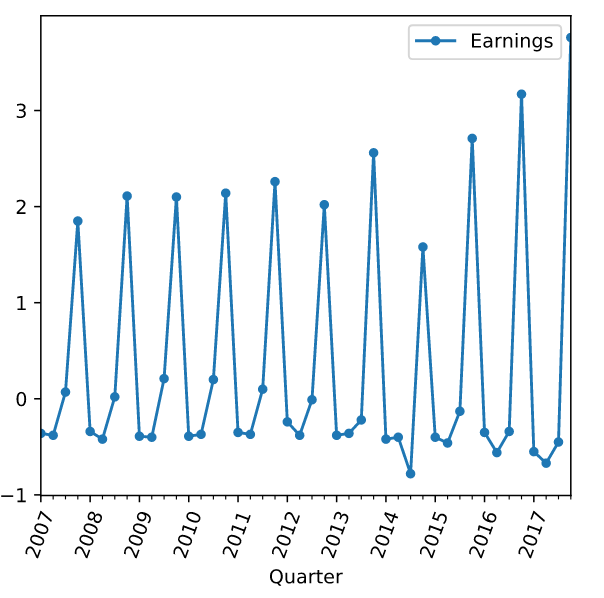

In [181]:
Image('F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Time series analysis in python\\2.1.png',width=400, height=300)

In [131]:
Earnings_data = [-0.36, -0.38, 0.07, 1.85, -0.34, -0.42, 0.02, 2.11, -0.39, -0.4, 0.21, 2.1, -0.39, -0.37, 0.2, 2.14, -0.35, -0.37, 0.1, 2.26, -0.24, -0.38, -0.01, 2.02, -0.38, -0.36, -0.22, 2.56, -0.42, -0.4, -0.78, 1.58, -0.4, -0.46, -0.13, 2.71, -0.35, -0.56, -0.34, 3.17, -0.55, -0.67, -0.45, 3.76]

Quarter_data = ['2007-01-01 00:00:00', '2007-04-01 00:00:00', '2007-07-01 00:00:00',
       '2007-10-01 00:00:00', '2008-01-01 00:00:00', '2008-04-01 00:00:00',
       '2008-07-01 00:00:00', '2008-10-01 00:00:00', '2009-01-01 00:00:00',
       '2009-04-01 00:00:00', '2009-07-01 00:00:00', '2009-10-01 00:00:00',
       '2010-01-01 00:00:00', '2010-04-01 00:00:00', '2010-07-01 00:00:00',
       '2010-10-01 00:00:00', '2011-01-01 00:00:00', '2011-04-01 00:00:00',
       '2011-07-01 00:00:00', '2011-10-01 00:00:00', '2012-01-01 00:00:00',
       '2012-04-01 00:00:00', '2012-07-01 00:00:00', '2012-10-01 00:00:00',
       '2013-01-01 00:00:00', '2013-04-01 00:00:00', '2013-07-01 00:00:00',
       '2013-10-01 00:00:00', '2014-01-01 00:00:00', '2014-04-01 00:00:00',
       '2014-07-01 00:00:00', '2014-10-01 00:00:00', '2015-01-01 00:00:00',
       '2015-04-01 00:00:00', '2015-07-01 00:00:00', '2015-10-01 00:00:00',
       '2016-01-01 00:00:00', '2016-04-01 00:00:00', '2016-07-01 00:00:00',
       '2016-10-01 00:00:00', '2017-01-01 00:00:00', '2017-04-01 00:00:00',
       '2017-07-01 00:00:00', '2017-10-01 00:00:00']

In [132]:
HRB = pd.DataFrame(list(zip(Earnings_data, Quarter_data)), columns =['Earnings','Quarter']) 
HRB.Quarter = pd.to_datetime(HRB.Quarter)
HRB.set_index('Quarter',inplace=True)

[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259  -0.08758288
 -0.24075584 -0.20363054  0.4797058  -0.06091139 -0.20935484 -0.18303202
  0.42481275 -0.03352559 -0.17471087 -0.16384328  0.34341079 -0.01734364
 -0.13820811 -0.12232172  0.28407164 -0.01927656 -0.11757974 -0.10386933
  0.20156485 -0.0120634  -0.07509539 -0.0707104   0.10222029]


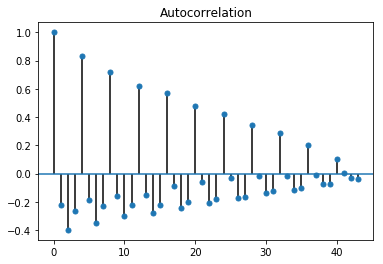

In [134]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Compute the acf array of HRB
acf_array = acf(HRB)
print(acf_array)

# Plot the acf function
plot_acf(HRB, alpha=1)
plt.show()

In [140]:
# Are We Confident This Stock is Mean Reverting?
# 
# In the last chapter, you saw that the autocorrelation of MSFT's weekly stock returns was -0.16. 
# That autocorrelation seems large, but is it statistically significant? 
# In other words, can you say that there is less than a 5% chance that we would observe 
# such a large negative autocorrelation if the true autocorrelation were really zero? 
# And are there any autocorrelations at other lags that are significantly different from zero?
# 
# Even if the true autocorrelations were zero at all lags, in a finite sample of returns 
# you won't see the estimate of the autocorrelations exactly zero. In fact, the standard deviation 
# of the sample autocorrelation is \(\small 1/\sqrt{N}\) where \(\small N\) is the number of observations, 
# so if \(\small N=100\), for example, the standard deviation of the ACF is 0.1, and since 95% of a normal curve 
# is between +1.96 and -1.96 standard deviations from the mean, 
# the 95% confidence interval is \(\small \pm 1.96/\sqrt{N}\). This approximation only holds when 
# the true autocorrelations are all zero.
# 
# You will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one
# autocorrelation of -0.16 from the last chapter. The weekly returns of Microsoft is pre-loaded in a 
# DataFrame called returns.
# 
# Instructions
# 
# Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
# Find the number of observations in the returns DataFrame using the len() function.
# Approximate the 95% confidence interval of the estimated autocorrelation. 
# The math function sqrt() has been imported and can be used.
# Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels. 
# Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.

In [141]:
Adj_Close = [0.022508319175621905, -0.011003343929006482, 0.00850791126819872, 0.004218272052238348, 0.008400295882357911, -0.0006406139845405168, -0.04584813233431817, 0.003024292062305589, -0.02177570861306599, -0.019178153191056313, -0.015013750295649664, 0.04572852376832559, -0.02271185005426546, -0.072566159343738, 0.04449473083329991, -0.038989068675720495, -0.006010480188323508, 0.013227359191756438, 0.023871624909037603, -0.0327867340349457, 0.007156194310755426, 0.003365813080113522, 0.01565398841395549, 0.02311932574087927, 0.0017934144653197759, -0.013605428136153175, 0.01669680005898244, -0.0007199281976545402, 0.006844608696997323, 0.0017887928147308774, 0.001428583096684033, 0.00748931210585968, 0.012743307893279265, 0.0031458475979389, 0.003135904153407143, 0.034039502527764, 0.06785359057549467, 0.05347582437841991, -0.02388772374175241, 0.07416707038672787, -0.0172068737336889, 0.01838336689102049, 0.0220631344794322, -0.03560407446755842, -0.03284908683767629, 0.03817258847919347, -0.009553979897788056, 0.0426775384192446, -0.1197085432220183, 0.007006511896629819, 0.008538947030433341, 0.0253995682456698, -0.020670322250174178, 0.09276736982378808, -0.03884885009934658, -0.06736521902200587, 0.06035314039478812, -0.007266168459803213, 0.014638704210432785, 0.018334684725380024, 0.007378997537517362, 0.024318586195326786, 0.02202549605303039, -0.005597614141618412, 0.06332671717942628, 0.0015881375987978341, 0.00039462279984947557, 0.014905589542053566, 0.006031779975453899, -0.04353476168078818, 0.0029981240717766866, 0.013314982123818986, -0.010190167842021647, -0.023570941660272737, 0.009433980357163252, 0.011819829552879302, 0.027981437310417023, -0.03382658986822207, 0.028993229619462157, 0.017139927943563782, 0.008688718729382039, -0.01070230700780539, -0.00527700133877429, 0.06525224567891996, 0.003485792842568003, -0.010669841023386861, -0.016553786367672574, 0.020402869996584583, -0.0024992182458174472, -0.005512525285295666, -0.003779299033246142, 0.01444079770880835, 0.00728094294190651, 0.02043856757853013, 0.013190113925329428, -0.006027001196854842, 0.01091448281762264, 0.013675640619119633, -0.010650984013043319, 0.006937772282416876, 0.06177243138006516, -0.004251451410741236, -0.036853915241282564, 0.007932984595632409, 0.03680517506574987, 0.014333601991197042, 0.0062016564788944795, 0.010565729671917934, 0.017207623910549197, 0.017558754866875415, -0.023358524897088007, -0.006895212717183852, -0.04469511708757379, -0.009084476348134918, 0.05729976639650003, 0.017775976864193188, 0.03684770905284851, 0.018488022567425766, -0.026167394300354863, -0.0035432185752213297, 0.012758839600204519, -0.030359486696418192, 0.015122654706477112, 0.004616127512733437, -0.023391861646428036, 0.009195868294959109, -0.020131516572770014, 0.020328839811261545, -0.1437050149284691, 0.049752569379314604, 0.034425869430245726, 0.006886940051969326, -0.00022807426411353138, -0.033979283308143815, -0.023135166234170335, 0.036249578089540435, -0.044543005387578716, -0.016597561491338286, 0.035492731960860224, -0.00239699462607168, 0.1501682916314755, 0.016503019481721948, -0.01870126459415944, 0.011518304563553183, -0.022674795105567136, -0.0008530227149109448, -0.015364819879450597, -0.0036844283867345506, 0.002827842457315599, -0.018221439943676643, -0.019000995613903338, 0.0047294914763922336, 0.04505726465013771, -0.014586110444291811, 0.016543458727165117, 0.0008565180645723203, 0.00556258041016755, -0.0775740141269361, 0.01996753227818182, -0.03004774507245145, 0.02041761274639775, 0.0, 0.010579578533111311, 0.037096129893072094, 0.033794215251608195, 0.008490620634881152, 0.11281841316749897, -0.004350254078418936, 0.043312943499464795, -0.037873187335507486, 0.03246131358825033, -0.004797959441368738, 0.03671434386667194, -0.033088968323957246, 0.0012949926336129902, 0.028449841822514532, -0.0034128639300572416, -0.05677713989072908, -0.025606768815060188, 0.025495189946288743, 0.053547517385463816, -0.0894898656480041, 0.0067781893619824896, 0.033506238058049975, -0.010034762576104805, 0.014229980715078971, 0.019988523187893792, 0.007914180879458721, 0.013460405742618642, 0.025087567041433667, -0.02069475815425026, 0.022602231177082155, -0.06954186140578977, -0.03688686676531072, 0.010427138941624392, 0.013693293102708948, -0.0020741056391900825, 0.033583510621667756, -0.010129983168774892, -0.0059857313114075605, -0.02622376386648073, -0.005984439830758248, 0.026690734088524737, 0.0222830676599175, 0.02676859339438109, 0.05344505282494816, 0.0019445363047001507, 0.022582869812145745, -0.0003450844067652836, 0.0006753343718040039, 0.007115607850308736, -0.006203708072724967, -0.025316493035889343, 0.018502165999034537, 0.0031440170554877245, 0.002960051884318471, 0.0034722850413555495, -0.0065743702413995075, 0.039010776201893194, 0.003519976516415335, -0.019375352181141836, 0.005280208786875518, 0.02944255034144372, 0.0029825236897542684, -0.021146512709481535, 0.04590726432251557, 0.005325075379393418, 0.015088371426754676, -0.017394149256413582, 0.011264912737055877, -0.002227811542720337, 0.0006378880727841985, 0.04845392690367745, -0.03192462699872611, 0.005025159083455799, 0.015808819675765085, 0.0, -0.005725870329659877, 0.010583650132380829, -0.0009240094755965655, 0.0016957288099015422, 0.013542633288688322, -0.002733129061543438, -0.011114593537909001, 0.02232495950051039, 0.031024043536802992, 0.007887871136555535, -0.008985559001118748, -0.004416484238629281, 0.033535188845170705, 0.025729031242553324, -0.020066916943508595, -0.00455062571103515, 0.01728569999999996, -0.03201796141016644, 0.0076889453068329505, 0.04779729409440403, 0.013877466527582705, -0.010163978721182021, -0.00492881975727244]
Date_data = ['2012-08-19 00:00:00', '2012-08-26 00:00:00', '2012-09-02 00:00:00', '2012-09-09 00:00:00', '2012-09-16 00:00:00', '2012-09-23 00:00:00', '2012-09-30 00:00:00', '2012-10-07 00:00:00', '2012-10-14 00:00:00', '2012-10-21 00:00:00', '2012-10-28 00:00:00', '2012-11-04 00:00:00', '2012-11-11 00:00:00', '2012-11-18 00:00:00', '2012-11-25 00:00:00', '2012-12-02 00:00:00', '2012-12-09 00:00:00', '2012-12-16 00:00:00', '2012-12-23 00:00:00', '2012-12-30 00:00:00', '2013-01-06 00:00:00', '2013-01-13 00:00:00', '2013-01-20 00:00:00', '2013-01-27 00:00:00', '2013-02-03 00:00:00', '2013-02-10 00:00:00', '2013-02-17 00:00:00', '2013-02-24 00:00:00', '2013-03-03 00:00:00', '2013-03-10 00:00:00', '2013-03-17 00:00:00', '2013-03-24 00:00:00', '2013-03-31 00:00:00', '2013-04-07 00:00:00', '2013-04-14 00:00:00', '2013-04-21 00:00:00', '2013-04-28 00:00:00', '2013-05-05 00:00:00', '2013-05-12 00:00:00', '2013-05-19 00:00:00', '2013-05-26 00:00:00', '2013-06-02 00:00:00', '2013-06-09 00:00:00', '2013-06-16 00:00:00', '2013-06-23 00:00:00', '2013-06-30 00:00:00', '2013-07-07 00:00:00', '2013-07-14 00:00:00', '2013-07-21 00:00:00', '2013-07-28 00:00:00', '2013-08-04 00:00:00', '2013-08-11 00:00:00', '2013-08-18 00:00:00', '2013-08-25 00:00:00', '2013-09-01 00:00:00', '2013-09-08 00:00:00', '2013-09-15 00:00:00', '2013-09-22 00:00:00', '2013-09-29 00:00:00', '2013-10-06 00:00:00', '2013-10-13 00:00:00', '2013-10-20 00:00:00', '2013-10-27 00:00:00', '2013-11-03 00:00:00', '2013-11-10 00:00:00', '2013-11-17 00:00:00', '2013-11-24 00:00:00', '2013-12-01 00:00:00', '2013-12-08 00:00:00', '2013-12-15 00:00:00', '2013-12-22 00:00:00', '2013-12-29 00:00:00', '2014-01-05 00:00:00', '2014-01-12 00:00:00', '2014-01-19 00:00:00', '2014-01-26 00:00:00', '2014-02-02 00:00:00', '2014-02-09 00:00:00', '2014-02-16 00:00:00', '2014-02-23 00:00:00', '2014-03-02 00:00:00', '2014-03-09 00:00:00', '2014-03-16 00:00:00', '2014-03-23 00:00:00', '2014-03-30 00:00:00', '2014-04-06 00:00:00', '2014-04-13 00:00:00', '2014-04-20 00:00:00', '2014-04-27 00:00:00', '2014-05-04 00:00:00', '2014-05-11 00:00:00', '2014-05-18 00:00:00', '2014-05-25 00:00:00', '2014-06-01 00:00:00', '2014-06-08 00:00:00', '2014-06-15 00:00:00', '2014-06-22 00:00:00', '2014-06-29 00:00:00', '2014-07-06 00:00:00', '2014-07-13 00:00:00', '2014-07-20 00:00:00', '2014-07-27 00:00:00', '2014-08-03 00:00:00', '2014-08-10 00:00:00', '2014-08-17 00:00:00', '2014-08-24 00:00:00', '2014-08-31 00:00:00', '2014-09-07 00:00:00', '2014-09-14 00:00:00', '2014-09-21 00:00:00', '2014-09-28 00:00:00', '2014-10-05 00:00:00', '2014-10-12 00:00:00', '2014-10-19 00:00:00', '2014-10-26 00:00:00', '2014-11-02 00:00:00', '2014-11-09 00:00:00', '2014-11-16 00:00:00', '2014-11-23 00:00:00', '2014-11-30 00:00:00', '2014-12-07 00:00:00', '2014-12-14 00:00:00', '2014-12-21 00:00:00', '2014-12-28 00:00:00', '2015-01-04 00:00:00', '2015-01-11 00:00:00', '2015-01-18 00:00:00', '2015-01-25 00:00:00', '2015-02-01 00:00:00', '2015-02-08 00:00:00', '2015-02-15 00:00:00', '2015-02-22 00:00:00', '2015-03-01 00:00:00', '2015-03-08 00:00:00', '2015-03-15 00:00:00', '2015-03-22 00:00:00', '2015-03-29 00:00:00', '2015-04-05 00:00:00', '2015-04-12 00:00:00', '2015-04-19 00:00:00', '2015-04-26 00:00:00', '2015-05-03 00:00:00', '2015-05-10 00:00:00', '2015-05-17 00:00:00', '2015-05-24 00:00:00', '2015-05-31 00:00:00', '2015-06-07 00:00:00', '2015-06-14 00:00:00', '2015-06-21 00:00:00', '2015-06-28 00:00:00', '2015-07-05 00:00:00', '2015-07-12 00:00:00', '2015-07-19 00:00:00', '2015-07-26 00:00:00', '2015-08-02 00:00:00', '2015-08-09 00:00:00', '2015-08-16 00:00:00', '2015-08-23 00:00:00', '2015-08-30 00:00:00', '2015-09-06 00:00:00', '2015-09-13 00:00:00', '2015-09-20 00:00:00', '2015-09-27 00:00:00', '2015-10-04 00:00:00', '2015-10-11 00:00:00', '2015-10-18 00:00:00', '2015-10-25 00:00:00', '2015-11-01 00:00:00', '2015-11-08 00:00:00', '2015-11-15 00:00:00', '2015-11-22 00:00:00', '2015-11-29 00:00:00', '2015-12-06 00:00:00', '2015-12-13 00:00:00', '2015-12-20 00:00:00', '2015-12-27 00:00:00', '2016-01-03 00:00:00', '2016-01-10 00:00:00', '2016-01-17 00:00:00', '2016-01-24 00:00:00', '2016-01-31 00:00:00', '2016-02-07 00:00:00', '2016-02-14 00:00:00', '2016-02-21 00:00:00', '2016-02-28 00:00:00', '2016-03-06 00:00:00', '2016-03-13 00:00:00', '2016-03-20 00:00:00', '2016-03-27 00:00:00', '2016-04-03 00:00:00', '2016-04-10 00:00:00', '2016-04-17 00:00:00', '2016-04-24 00:00:00', '2016-05-01 00:00:00', '2016-05-08 00:00:00', '2016-05-15 00:00:00', '2016-05-22 00:00:00', '2016-05-29 00:00:00', '2016-06-05 00:00:00', '2016-06-12 00:00:00', '2016-06-19 00:00:00', '2016-06-26 00:00:00', '2016-07-03 00:00:00', '2016-07-10 00:00:00', '2016-07-17 00:00:00', '2016-07-24 00:00:00', '2016-07-31 00:00:00', '2016-08-07 00:00:00', '2016-08-14 00:00:00', '2016-08-21 00:00:00', '2016-08-28 00:00:00', '2016-09-04 00:00:00', '2016-09-11 00:00:00', '2016-09-18 00:00:00', '2016-09-25 00:00:00', '2016-10-02 00:00:00', '2016-10-09 00:00:00', '2016-10-16 00:00:00', '2016-10-23 00:00:00', '2016-10-30 00:00:00', '2016-11-06 00:00:00', '2016-11-13 00:00:00', '2016-11-20 00:00:00', '2016-11-27 00:00:00', '2016-12-04 00:00:00', '2016-12-11 00:00:00', '2016-12-18 00:00:00', '2016-12-25 00:00:00', '2017-01-01 00:00:00', '2017-01-08 00:00:00', '2017-01-15 00:00:00', '2017-01-22 00:00:00', '2017-01-29 00:00:00', '2017-02-05 00:00:00', '2017-02-12 00:00:00', '2017-02-19 00:00:00', '2017-02-26 00:00:00', '2017-03-05 00:00:00', '2017-03-12 00:00:00', '2017-03-19 00:00:00', '2017-03-26 00:00:00', '2017-04-02 00:00:00', '2017-04-09 00:00:00', '2017-04-16 00:00:00', '2017-04-23 00:00:00', '2017-04-30 00:00:00', '2017-05-07 00:00:00', '2017-05-14 00:00:00', '2017-05-21 00:00:00', '2017-05-28 00:00:00', '2017-06-04 00:00:00', '2017-06-11 00:00:00', '2017-06-18 00:00:00', '2017-06-25 00:00:00', '2017-07-02 00:00:00', '2017-07-09 00:00:00', '2017-07-16 00:00:00', '2017-07-23 00:00:00', '2017-07-30 00:00:00', '2017-08-06 00:00:00']

In [142]:
returns = pd.DataFrame(list(zip(Adj_Close, Date_data)), columns =['Adj Close','Date']) 
returns.Date = pd.to_datetime(returns.Date)
returns.set_index('Date',inplace=True)

The autocorrelation of weekly MSFT returns is -0.16
The approximate confidence interval is +/- 0.12


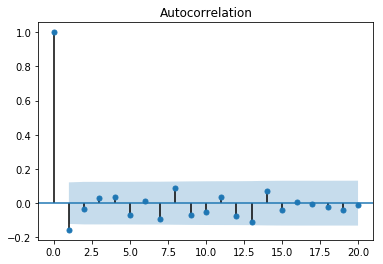

In [145]:
# Import the plot_acf module from statsmodels and sqrt from math
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

In [148]:
# Can't Forecast White Noise
# 
# A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. 
# Stock returns are often modeled as white noise. Unfortunately, for white noise, 
# we cannot forecast future observations based on the past - autocorrelations at all lags are zero.
# 
# You will generate a white noise series and plot the autocorrelation function 
# to show that it is zero for all lags. You can use np.random.normal() to generate random returns. 
# For a Gaussian white noise process, the mean and standard deviation describe the entire process.
# 
# Plot this white noise series to see what it looks like, and then plot the autocorrelation function.
# 
# Instructions
# 
# Generate 1000 random normal returns using np.random.normal() with mean 2% (0.02) and 
# standard deviation 5% (0.05), where the argument for the mean is loc and the argument for the standard deviation is scale.
# Verify the mean and standard deviation of returns using np.mean() and np.std().
# Plot the time series.
# Plot the autocorrelation function using plot_acf with lags=20.

The mean is 0.019 and the standard deviation is 0.050


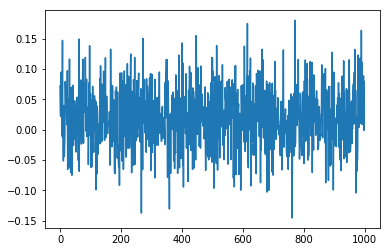

In [149]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Simulate white noise returns
returns = np.random.normal(loc=0.02, scale=0.05, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot returns series
plt.plot(returns)
plt.show()

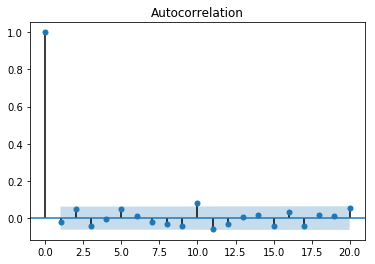

In [150]:
# Plot autocorrelation function of white noise returns
plot_acf(returns, lags=20)
plt.show()

In [152]:
# Generate a Random Walk
# 
# Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. 
# In other words, today's price is yesterday's price plus some random noise.
# 
# You will simulate the price of a stock over time that has a starting price of 100 and every day goes 
# up or down by a random amount. Then, plot the simulated stock price. If you hit the "Run Code" 
# code button multiple times, you'll see several realizations.
# 
# Instructions
# 
# Generate 500 random normal "steps" with mean=0 and standard deviation=1 using np.random.normal(), 
# where the argument for the mean is loc and the argument for the standard deviation is scale.
# Simulate stock prices P:
# Cumulate the random steps using the numpy .cumsum() method
# Add 100 to P to get a starting stock price of 100.
# Plot the simulated random walk

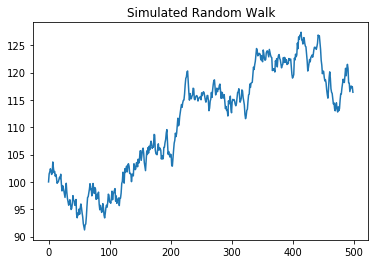

In [154]:
# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

In [155]:
# Get the Drift
# 
# In the last exercise, you simulated stock prices that follow a random walk. 
# You will extend this in two ways in this exercise.
# 
# You will look at a random walk with a drift. Many time series, like stock prices, 
# are random walks but tend to drift up over time.
# 
# In the last exercise, the noise in the random walk was additive: random, 
# normal changes in price were added to the last price. However, when adding noise, 
# you could theoretically get negative prices. Now you will make the noise multiplicative: 
# you will add one to the random, normal changes to get a total return, and multiply that by the last price.
# 
# Instructions
# 
# Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using np.random.normal(), 
# which are now returns, and add one for total return.
# Simulate stock prices P:
# Cumulate the product of the steps using the numpy .cumprod() method.
# Multiply the cumulative product of total returns by 100 to get a starting value of 100.
# Plot the simulated random walk with drift.

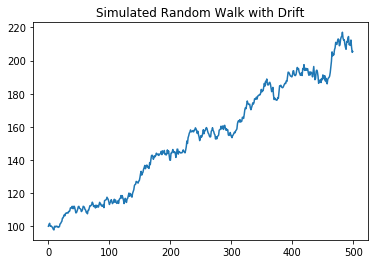

In [156]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

In [157]:
# Are Stock Prices a Random Walk?
# 
# Most stock prices follow a random walk (perhaps with a drift). 
# You will look at a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, 
# and run the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it does indeed follow a random walk.
# 
# With the ADF test, the "null hypothesis" (the hypothesis that we either reject or fail to reject) 
# is that the series follows a random walk. Therefore, a low p-value (say less than 5%) 
# means we can reject the null hypothesis that the series is a random walk.
# 
# Instructions
# 
# Import the adfuller module from statsmodels.
# Run the Augmented Dickey-Fuller test on the series of closing stock prices, 
# which is the column 'Adj Close' in the AMZN DataFrame.
# 
# Print out the entire output, which includes the test statistic, the p-values, 
# and the critical values for tests with 1%, 10%, and 5% levels.
# 
# Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).

In [164]:
AMZN = pd.read_csv('AMZN.csv')
AMZN.Date = pd.to_datetime(AMZN.Date)
AMZN.set_index('Date',inplace=True)

In [168]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the price series and print out the results
results = adfuller(AMZN['Adj Close'])
print(results)

# Just print out the p-value
print('The p-value of the test on prices is: ' + str(results[1]))

(4.0251685257707415, 1.0, 33, 5054, {'1%': -3.4316445438146865, '5%': -2.862112049726916, '10%': -2.5670745025321304}, 30308.64216426981)
The p-value of the test on prices is: 1.0


In [169]:
# How About Stock Returns?
# 
# In the last exercise, you showed that Amazon stock prices, 
# contained in the DataFrame AMZN follow a random walk. 
# In this exercise. you will do the same thing for Amazon returns (percent change in prices) 
# and show that the returns do not follow a random walk.
# 
# Instructions
# 
# Import the adfuller module from statsmodels.
# Create a new DataFrame of AMZN returns by taking the percent change of prices using the method .pct_change().
# Eliminate the NaN in the first row of returns using the .dropna() method on the DataFrame.
# Run the Augmented Dickey-Fuller test on the 'Adj Close' column of AMZN_ret, and print out the p-value in results[1].

In [170]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the ADF test on the return series and print out the p-value
results = adfuller(AMZN_ret['Adj Close'])
print('The p-value of the test on returns is: ' + str(results[1]))

The p-value of the test on returns is: 2.5655898083440313e-22


In [191]:
# Seasonal Adjustment During Tax Season
# 
# Many time series exhibit strong seasonal behavior. 
# The procedure for removing the seasonal component of a time series is called seasonal adjustment. 
# For example, most economic data published by the government is seasonally adjusted.
# 
# You saw earlier that by taking first differences of a random walk, you get a stationary white noise process. 
# For seasonal adjustments, instead of taking first differences, 
# you will take differences with a lag corresponding to the periodicity.
# 
# Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the DataFrame HRB, 
# and there is a clear seasonal component. The autocorrelation is high for lags 4,8,12,16,... 
# because of the spike in earnings every four quarters during tax season. 
# Apply a seasonal adjustment by taking the fourth difference (four represents the periodicity of the series). 
# Then compute the autocorrelation of the transformed series.
# 
# Instructions
# 
# Create a new DataFrame of seasonally adjusted earnings by taking the lag-4 difference of quarterly 
# earnings using the .diff() method.
# 
# Examine the first 10 rows of the seasonally adjusted DataFrame and notice that the first four rows are NaN.
# Drop the NaN rows using the .dropna() method.
# Plot the autocorrelation function of the seasonally adjusted DataFrame.

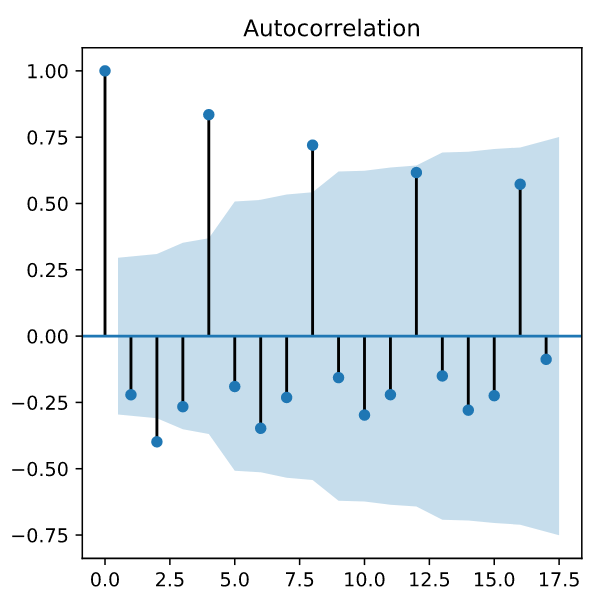

In [192]:
Image('F:\\DATA_SCIENCE\\PYTHON\\DATACAMP PYTHON\\Time series analysis in python\\2.8.png',width=400, height=300)

In [197]:
HRB = pd.read_csv('HRB.csv')
HRB.set_index('Quarter',inplace=True)

In [201]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))


         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


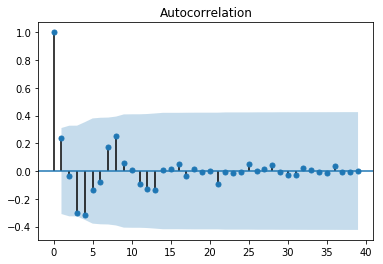

In [202]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()

# 3. Autoregressive (AR) Models

In this chapter you'll learn about autoregressive, or AR, models for time series. These models use past values of the series to predict the current value.

In [203]:
# Simulate AR(1) Time Series
# 
# You will simulate and plot a few AR(1) time series, each with a different parameter, ϕ, 
# using the arima_process module in statsmodels. In this exercise, 
# you will look at an AR(1) model with a large positive ϕ and a large negative ϕ, 
# but feel free to play around with your own parameters.
# 
# There are a few conventions when using the arima_process module that require some explanation. 
# First, these routines were made very generally to handle both AR and MA models. 
# We will cover MA models next, so for now, just ignore the MA part. 
# Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, 
# and the sign of the other coefficients is opposite what we have been using 
# (to be consistent with the time series literature in signal processing). 
# For example, for an AR(1) process with ϕ=0.9, the array representing 
# the AR parameters would be ar = np.array([1, -0.9])
# 
# Instructions
# 
# Import the class ArmaProcess in the arima_process module.
# Plot the simulated AR processes:
# Let ar1 represent an array of the AR parameters [1, −ϕ] as explained above. 
# For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
# 
# With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
# 
# Simulate 1000 data points from the object you just created, AR_object1, 
# using the method .generate_sample(). Plot the simulated data in a subplot.
# 
# Repeat for the other AR parameter.

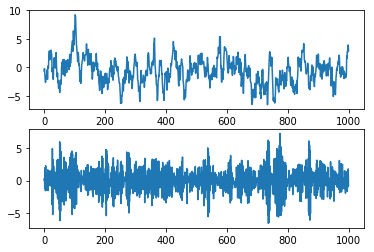

In [204]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, .9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

In [205]:
# Compare the ACF for Several AR Time Series
# 
# The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. 
# For example, if the AR parameter, ϕ=+0.9, the first-lag autocorrelation will be 0.9, 
# the second-lag will be (0.9)2=0.81, the third-lag will be (0.9)3=0.729, etc. 
# A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, 
# the decay will flip signs, so the first-lag autocorrelation will be -0.9, 
# the second-lag will be (−0.9)2=0.81, the third-lag will be (−0.9)3=−0.729, etc.
# 
# The object simulated_data_1 is the simulated time series with an AR parameter of +0.9, 
# simulated_data_2 is for an AR parameter of -0.9, and simulated_data_3 is for an AR parameter of 0.3
# 
# Instructions
# 
# Compute the autocorrelation function for each of the three simulated datasets using 
# the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

In [206]:
simulated_data_3 = np.array([-1.7742235493872753, -1.733644370520635, 0.5761634791828274, 1.0338858982011796, -1.2102013545061658, -0.8105005701969323, 0.22033708386532472, 0.458594383170291, -1.489588882257296, -0.18686698251334743, -0.6639127255785723, 0.9994940872723411, 0.0996684535306647, 0.3891880064814699, 0.0076357944633336505, 0.6687351986571789, -0.5674488614125616, 0.49801863625520626, 1.3583684108839378, 2.2430711711719646, 2.2567109623087287, 0.14089145500881084, 0.6194171599712242, 0.9933223856430045, 0.8880415710422584, 1.019890938700566, 0.7299108952031627, -0.3262821392069525, 0.10922591166834357, 0.879554474800367, 0.725471735670878, -0.8787119844753808, -1.1412318720925378, -0.7516111783697812, -0.4302968550553018, 0.028184171887266102, -0.9686392517380504, 0.5043640585848758, -1.7062551066945222, 0.016825154262207986, 0.5115809738986837, 0.79757294630287, -2.8277157490338056, -2.1975902091262824, -1.011973080144906, -0.13530988623861184, -0.12198436795687696, -0.8503419103576981, 1.0279414136622633, 0.6324119236880817, -0.2050313417167548, -1.049080932853988, -0.24651098993893444, 1.1847471437863237, 0.3906039705598625, 0.08513375799651329, 0.09182252204382726, 0.14816262429907082, -0.18873778734473515, -1.0294763414716137, 1.2201714066756617, 1.003544024262438, 2.418196603777744, 1.2230149231008636, 0.13561253342680774, -0.9051529208022417, -0.6015416484150373, -1.3334054462735323, 1.697819042219131, 0.49231400316812945, 0.9337508090499274, 1.2420938985321772, 1.4535433020239374, 2.9839327742429362, 0.79976793573656, 0.05806831652417385, 0.18190078693405629, 0.8031117648403332, 0.41981063876883823, -0.14290807571742528, -0.7588098181501908, -1.0019924293688294, -0.031125045450252742, -1.0082157635701678, -2.116497327635919, -0.5197096685375118, 1.006717017075495, 0.9638260557574532, 0.2712599761452413, 0.4843798252297554, -1.501801755392218, -1.140180691075103, 1.3360145019692888, 1.5849230981867426, -0.23609574158038732, 1.6834835359401261, -0.21284583103152543, -0.8870457877810347, 1.2698038318330667, 1.688681202929678, -0.08195514172425544, -0.07367536710125598, -0.36380259162210055, 0.39499777761783555, 1.6858912517525757, 1.037921917888725, 0.19747216377764637, -1.2870583601104482, 0.39184562388522487, -1.1053934617835413, -0.5187511070306914, 0.8026103117230553, 1.0520085536652393, 1.154315841424343, 1.0452159876096951, 0.4594242576666512, 0.43998190172176643, 0.22406483523696452, 0.5497968827935773, 0.7001755058429844, 0.3433811439481962, 0.6168284656485176, -0.4997724886649587, -0.45688842434837296, 0.09343203371916106, 1.9515425926832883, 1.1144536219346148, 0.19960013985022107, -0.16034381984619667, 0.6960623627930796, 0.11155738949538131, 0.6708482023942139, 0.7128585168114724, -1.0322204121566028, 0.16311889907469407, 0.5145594837331746, 0.9510357132254228, -0.5517726738643327, 0.9285782979727171, 0.11177599810157224, 2.021807132798561, 2.3589750943976426, 0.09963233660744186, -1.3393288939147774, 0.2954437764014004, -0.7313359006875227, 0.9281067528716107, 0.8082939034685804, -1.2111208201069978, 0.4187279981613985, 0.2628693180091896, 0.4909724193302206, 1.6713383255978767, 0.3714793356172404, 0.8694655320682999, -0.33754901072165855, -0.6750696314966083, -0.4206684031221344, -0.7465819233517177, 0.34388692133299903, -1.2202701894013648, 0.463466087498497, -0.6224887610421179, 0.19095793550361764, -1.1301458808210583, 0.138688609512099, 1.1256140787972444, 0.34745539658111974, 1.65291885775231, 0.3559683053839853, 0.5181582434950794, -0.7700195000490829, 0.20742505280972975, -0.5059117768688256, -0.8721648466503188, 1.3184541539258192, -0.8746846089960921, -0.37717383987734676, 0.5996381121154891, 0.4139623398508747, -1.7231382909518427, 0.08696778238722958, -1.3529086236911216, -0.8491245357529505, -0.498980013260208, -3.069723324292621, -1.0268175621240503, 0.3578321285240353, -0.06273478747656167, 0.16610937715765334, 2.3116196669331237, 1.818926133098301, 0.6050636576413492, 2.768527925855414, 0.19418735335749227, 0.5779333140680221, -1.4032439086864974, -0.022645167581740233, -0.11820385968683828, 0.025332108912688153, 0.37808102765245044, 0.39342822328803767, -0.9545987751632585, -0.6697247691429747, -0.1948567167612301, -1.487632626063449, 0.35627966268425976, 1.9897662085553633, 0.9004733971440573, -0.2575711459769003, -2.379195804911419, -2.2346669977853426, -0.3311712353201908, 1.163085166201448, 0.12884118083320248, -1.4485889134895895, -1.3056019181699978, -0.963909323028012, -2.221720160557669, -0.9770822836473225, 0.5992620732599362, -1.5020032937389776, -1.0102410409223608, -2.327376587740994, -1.5173623196086252, -0.6032527249138402, 0.8402303950353369, 0.7077777520925373, -0.9711143757842907, -0.19735300321513152, -0.3931393123007385, -0.13081192173810127, -0.2387384041710862, 0.24175054649777833, 0.25363780057010527, 0.9425248219616197, 0.39934933325831146, 1.8097355105780908, 1.0621468370568028, 1.7969543857243708, 1.2593363388140517, -0.294984834517696, 1.1544224467271378, 1.5305038623659826, -2.412907450555821, -1.2723175803383096, 1.061063832889312, 1.372707189042216, -1.048605352406212, 0.544180209516703, 1.8904889641045808, 1.1738451122701425, -1.123702641933519, -1.1209261267242714, 0.06422653695744818, -0.19626700210791512, 1.2187825755737391, 1.0968835083218276, 2.292242729037121, 1.7082897307757632, 1.0650242665330518, 0.0051729611269724085, 1.406013651296047, 0.42730243902776416, -0.8977093365978506, -0.22114197748173764, -0.15819817157534155, -1.040999641180688, 0.5155385871244649, 0.014233345383593471, 0.39985862642381376, -0.6609510183059812, -0.36295650068238483, 0.6654392121829436, -0.047196538324565246, -0.37950053140004253, 2.070463543022524, 0.9373339884749508, 1.0145067244280013, 1.0505899493823458, 0.41214062148059455, 0.6512668137947771, -0.7776317573768006, 1.2149190246818231, 1.6114254685821257, 0.6736422094463183, 0.20844853851761372, -1.1770885088912815, 0.6761844190222299, -0.05218147682970414, 0.5941124652438361, -1.2624402544593027, 0.2527225400246481, -0.09943429262774447, -0.017922415903634924, -1.423188490790363, 0.252107749616197, -0.5368930272323297, -0.20807916265639825, 0.7417572526138427, 0.1368583218319143, 2.02730045878271, -0.2906129275959817, 0.15330186987483657, 0.45931372444179264, -0.8811786629843289, -0.17694459127810827, -0.24796513447107515, 0.1514248856047809, 0.49907544510204294, 1.5479734654911441, 0.7525658688787369, 0.7728388920867578, 1.7311676345285192, -1.0649134464991685, -0.5806708548185091, -0.1360293929040802, -1.596369158489032, -0.40223027706480213, -2.4764749958535206, -0.03740477410528065, -1.489506867990748, -1.6980370005740786, 0.014933253053834195, -1.6630933716645557, 1.5548522630644532, 0.5830584446319208, 0.07782445215070861, 1.2265401877085298, 0.2882532172243043, 0.32710715599796125, -0.057768033924471704, -0.5191475131329957, 0.21544325114962462, 0.58966102947196, -1.096239936434129, -1.210044955756481, -1.0224285392229664, -0.33631677686198647, 0.24476558442364882, 2.2295153201724314, 0.9438947472838025, 0.10882474278490895, -0.6822333517753429, 0.7806125601765586, 0.22228129682930425, 0.4084389572008067, 0.1218525225527583, 0.5871330993143055, 0.6548399354862933, 0.5702946857188729, 0.17492149200817136, 0.1459052397494649, 0.42609113091755374, -1.796368845646977, -0.5729832825128632, 0.808894488310096, -0.23764616484801707, -2.161412848207398, -2.0334589108528918, -0.5348401362644206, -0.8812116090995515, -0.13043853834383437, -0.057593728955405224, -0.48643221958519933, -1.0609274881657016, -0.12279129166811162, 0.032094307934308675, -0.11426120458233027, 0.8381360756823041, 0.45277526092951736, -0.46019895769389774, -0.4966536373817678, -0.2109270397937344, 0.059912661235223055, 1.354388969126519, 2.0943939316295834, 0.1593728674300306, -0.9715952716435863, -0.8343600946539287, 0.16981823432165777, 0.8837318184857126, -0.14299531134737742, -0.9570751747891619, 0.09523861739547801, 0.6521645074872374, 1.2302930573927808, -0.2686292928956379, 0.24827368734810873, -1.557217464252137, -0.5728622974284061, 0.5466558171684006, 1.647717436816138, 0.7964781849168419, -0.0028066871828958395, -1.4068029401943767, -0.1936697817937545, 0.5736579845265366, 1.1857631553649939, 0.5989406572643472, -0.7757891696618618, 0.32076709029286593, 1.7861096564444456, 0.273434322912677, -0.7204157707221299, -0.5458015417041971, -0.1769191066335645, -0.5765572601218756, 0.5333656624480414, 0.590739880635844, -0.1571033473726226, -0.06695624706289588, -1.5591527239970693, -0.14649154168973189, -1.437754105881979, -0.7086577878545725, -0.6739418000867317, 0.2643964606233287, -0.36482312169598263, -0.1564048840587396, 1.4482705685823158, -1.1349508691984846, -0.22738363404553313, 0.7959941806773971, -0.38895194189757665, -0.09576311830604815, -1.3900577942927514, -2.0257964746576973, 0.11437007980710245, -0.2928325762121895, -1.4005346195666204, -0.8935393354030372, 0.3363725989342166, 0.6521434968938271, 1.2433772212277285, -0.13098368535742294, -0.6667316806883887, 0.13086189201508994, 1.0393541292722945, -0.06275232290445099, 0.9393654434268707, -0.05166018721431476, 2.021953886211086, -1.1130877379587605, 1.200908555491658, -1.1372076350446778, 0.8820110698154084, 0.3504039637342457, -0.3482217160780444, -1.0132367537484954, -1.2320931698850823, 0.31212800565572363, 0.5539476156783592, -0.022260247674682015, -0.033262316715804444, -0.8812598924437839, -0.3969454147224024, 0.7667574873010641, -0.6775647492829987, 0.317868089654484, -0.36608643625824877, -1.6373951971310967, 0.5704602727416426, -1.2028090760289265, -0.8256704561220843, 0.8215522986377171, -0.540745104184802, 0.7803298925649679, -0.21440260388687177, -0.1579099594349398, 1.837174488974762, 1.6869430078592553, 0.5922683352925004, -0.47631004698205925, -0.11600674463736112, 1.6148077066032087, 2.6564932255637705, 0.17711593363254174, 1.4973798425811504, -1.1286138350082948, 0.2496222575272165, 0.4492530980017764, 1.1758728513163377, -0.47964697029234965, 0.0021230626371739336, -1.8611228349453952, -1.1884020687908685, -0.3735242033112428, 0.0824558215958555, 2.8167079128427974, 0.3356173802029063, 0.12153623051788459, -1.1155415923288914, -2.2210590756950905, 0.23203718419954322, 0.9750639912282939, -1.082921342445547, -2.0146672974222875, -1.2402817989524215, 1.2949412471582078, -1.099658975068145, 0.35189916517489056, 0.23699638017130947, -0.23071854010282355, -0.6738171639860359, 0.04283689694437828, -0.2979439975710457, -0.48870359797026086, -0.3541508302132851, 1.0053772381519512, 0.5144546067294753, 0.22328830653708603, 1.4495652837355348, 0.16672113222333224, 1.4828539063396406, -0.23095612400538046, 0.4618620761578416, -0.18454466657844829, -0.12385967642340624, -0.6803971386856345, -0.4995058528989523, -0.8504426318734956, 0.14771901000404392, -0.7804524452106174, 0.30242198159346645, 2.4377924599875898, -0.823703555219863, -2.619232444204606, -1.7739652628933769, 0.21110722031474038, -0.6478278356139489, 0.38313273699968264, 1.0641610709169707, 0.06817020387869399, 0.9052193121619168, -1.9979359796875649, 0.23515193706893767, 0.869848954379787, 0.1615218245237932, 1.0519931100040871, 1.7565608175809013, 2.4597888271457657, 2.6791859437078145, 0.8592813124279663, 0.11656719405428634, -0.04313112778727821, -2.687429628639297, -0.10807210762115704, 2.3169340622815313, 1.2609137675458606, -1.0432047146950696, -1.3076531118509576, -1.330721668971835, 1.2578354806535088, 0.87974446344609, 0.9020519729589818, 0.6241453058028736, -0.9242351379278297, -1.221181249913136, 0.31438410982265114, 0.1805267801617229, -1.8039403853099363, 0.2448448814563191, 1.4901831567646289, 0.45344682823201204, -0.17993046415968128, 1.3118132194712022, 0.19781220354978615, -0.5544782712700816, -1.7048470512804328, -1.0026529177176846, 1.5662047561983692, 1.6336661401131571, 0.6094646611209535, 0.176965440809008, 1.0427289524607537, 0.4151200880333521, -1.1393687125949967, -0.19751858800591526, 0.11625467850358227, 0.04778085945787823, 0.2717841954435427, -0.611365527750701, -0.02833757596954778, -1.6117799120529837, -1.4041653978277513, -0.6651047228321157, 0.40300614757549313, -0.17642954338226158, 0.38726952939162057, 1.1388583167655206, 2.7618907655834, 0.5354234537973404, -0.48310434456916734, -0.10634216783043773, 0.1665233550147755, 0.5960803890778894, 0.991377624425564, 0.01502051843197627, 0.731440730565966, 0.3013983988652993, 1.3177911610376252, 0.11652471459073227, 0.17521301672402279, 0.3228200753779072, 1.2293712851684817, 0.36470787858181863, -0.9271915190724085, -1.9737792545085693, 0.4418760796274829, 0.7728373337351391, 1.8937987271338415, 0.6606060808013935, 0.28477958042039464, 0.2648003650562649, -0.45659806703205913, -0.8407769395690057, 0.1861633229265845, 1.2366931704498212, 0.9748163092139164, -0.18855363199432879, 0.3680824854694692, 0.2868885760595532, -0.47728571091086475, -1.3656946420072633, -1.2403171801883281, 0.8233866519160735, 0.5006344332782736, -0.4589329494256696, -0.06111436085442587, 0.5925141432923251, -0.3623925388126483, -0.8737327687245633, -2.03852135394516, 0.47699263537516023, 0.7310202515194129, 0.8886951448396493, 0.8285291665960502, -1.779032816822086, -0.42410171824618276, 0.32273756213661886, 0.16755394399758258, -2.301062423911755, -0.8151251428895582, -0.5018240017417472, 0.8869614348280812, 0.16215767053626243, -0.47153475458225397, -0.6622284621684541, 0.5241782727354231, 0.829759198020459, 0.03495496599994252, -0.38839682949542365, -2.4184842488558136, -2.767194183781418, -1.6656082919041606, -0.6435610339011348, -0.9840305463761175, -1.8093450117970962, -0.5796341725978121, -0.1956944416323335, 1.2505251572555922, 0.016440236574077616, -0.2297314208525767, -0.7860036857157454, 2.368054572724587, 1.3551456933062571, -0.42180925568720495, -2.0965326428465305, -1.9177856451086797, -1.4945669843214389, -1.8101812572600267, -0.6617525673348648, -1.2154135870154146, -1.969631057210053, 0.04669439859863722, -1.5270470056391525, -3.0114174143128842, 0.03360412852122274, 1.8004894231702917, 0.5804871995344181, 0.8606220798930111, 0.9295707756721738, 2.6341067741050823, -0.20007291452495513, -0.5141276400113128, -0.5933026887592503, -0.12381757011959367, -0.24444180338231192, -0.15558771671762278, 0.09601527527806497, 2.006808963767217, 0.8760746339683029, 1.0922380012827289, 0.9955777963971397, 0.65511807106639, -0.06984023060883546, 0.7838011097308565, -1.5154995789321795, 1.0852407014256154, 0.9931040792475451, 0.3983893308194151, 0.10690726478874549, 0.2519788801207445, 0.8892166660075669, 0.729714596918752, 1.5842827239076338, 2.1902658408369873, 1.7510496199167291, -0.9662261741671963, -0.8110657814657641, 0.7339173015051198, 2.350500056452333, 0.11823649114392865, 0.6355234875152652, 1.418586045753241, 0.531548814668286, -1.0586013107950347, 1.637684584161005, -0.37689542355392286, -0.8531462111988096, 0.01242921214992676, 0.05890658758922207, -0.8996714522055198, 1.406386455506956, 0.9425839215361593, 1.188213110442885, 0.31326005498115506, 0.08718137894362157, 1.3489996104286812, -0.11546599893596671, -0.39087717076897066, 0.3489737798615276, 1.0090404431404005, 1.209978000221009, -0.5792950910853683, -1.257151460127476, -1.2254716369940353, 0.5162580740191032, 1.0374711041615923, 0.6318725372435686, 0.48644420783835085, -1.505459467096367, -0.13260917158962848, -1.6131211283083766, 0.341741352048465, -0.21272801232500027, 0.17847840967110132, -0.15986686973780917, -0.12816007487593561, -1.15229081067811, -0.5144848312612756, -0.21741673217885152, 0.14142957187039504, 0.5870765869729183, 0.6564606270136671, 0.4665725430735326, -0.5123392757581815, -1.453204672714246, -1.43837737281632, -1.2490241522438446, 0.47163952617779076, 1.2170257066740808, -0.43140348408813656, -1.2894308118048947, -2.009378025828893, -1.2265140653397328, 0.04775653473795238, -1.0733147185196443, 0.8641421799451479, 0.6259212570140353, 1.253880643528398, -0.420364221091365, 0.5860065589413888, -0.9335269601673252, 0.41175178900268966, 1.564268588163237, 1.8954508532858843, 0.03733002229333926, -0.871088399999439, -0.42708599096296773, 1.4429444806759175, -0.9294048176768317, -1.7920944465619975, -2.5831486600482068, -0.6806853034534666, -1.9034467983322685, 0.619866061423633, 1.8267569316614023, 0.4111841707328515, 2.516434559779829, 0.9884311802302014, -0.2083734360518122, -0.5838379238012772, 1.2578012836180201, 1.1701494449519818, -1.6792262196990404, -2.3839854384384602, -2.184665918916276, -1.2480073032472103, -1.673282812757237, -1.266562853879274, -1.2027547897833504, -1.4813341385976546, 1.675118468472009, 1.9217594865605632, 2.3564964117147307, 2.3853503587688505, 0.6447567490518444, 0.30407636873871235, -0.8364162171797711, -0.10254817419360421, -1.0310237312302661, -1.9117007146624405, -1.340537828342304, 0.46998442652825906, 0.23798671079068612, 0.6742486125956533, 0.2193702375585052, -0.8529031975499715, 0.2636064644544642, 0.17391430676874808, 1.368085733092445, 1.7654034918356696, 0.23330298001306887, 0.1912882193822515, -0.837944439073566, -1.111158401398129, -0.9099080717818184, 0.21911324421641942, -0.4544691969920637, 1.409049560844934, 0.8961887773103736, 0.0003100846657841383, 1.0158807413843494, -0.4301580725342497, -0.7734003873646464, 1.115239364712017, -0.9720404382623731, -0.44125449717729254, -0.5119813529432045, -0.8871897052502341, 0.7196580072344754, 1.0784509242995766, 1.0007494433914292, 0.3232424356592354, 0.7386331886824331, -1.7806091577368548, -0.9389061192748799, -0.24420704624662418, -0.6628018644961214, -0.013065481731428547, 2.378521741483443, 0.8262317206468203, 0.6592111187900787, 0.4005015207743209, -1.0778933915531494, -1.8114190347002856, -2.163607036505587, -0.3680082116304368, -2.1497652735574557, -0.0020649074401201117, -0.202755025570984, 0.39109865045866854, -1.2094015116017336, 1.18983997150423, 0.29788196599686945, -1.8040006805502844, 0.6923200884461674, -1.0655901836702308, -1.5416167119784723, -1.6601589841738362, -0.8083802087371181, 0.34472041664254816, 0.6615576197959583, 2.719838398446541, 0.15255638308953356, -0.4109079020064511, -1.4869110195304025, -1.5429139262956348, 0.657791726607057, -0.3057665479348435, 0.3600066058725043, 0.14002602414395113, -1.008227000771783, -1.126667312662974, -2.2131721220364873, -0.8669220088670854, -0.1809312865753438, -0.3582803021800786, 0.8858922698386569, -1.0587877687862868, -0.2711377874495808, -1.0851578919132827, 0.05517317854484627, -0.8801663840877656, 0.5485206657749191, 0.8019173844160671, 0.5732871551578123, 0.43022294835966696, 0.4148107645344451, 0.45772262898790056, 0.6691234953544747, -0.15402863850597642, -1.1670231622186473, -0.3939000210143227, 0.3948382784528423, 0.6300497079992374, 1.919070192197684, 0.0764169774865161, -1.3878585355450406, -0.961186216012659, -0.7109499782647318, -1.0182420741773097, -1.3446786354158928, -0.539775141768819, -0.2310440058185201, -1.1075847144268602, -1.4767113638142852, -0.07305026601388775, 0.44967186380374996, -0.6837600699030819, -0.37713318186475747, 0.3834829048548577, 0.24580656636531856, 1.6363231904387385, -0.8513004745063786, -1.8121593179432791, 0.17918128237347464, 0.4038726525788135, -0.42688218726973737, 0.9591941059493952, -0.3572202650756839, 0.4047123354010822, -0.05802849613210713, -0.7924399115637127, -0.6616219409538806, 0.9730385026399953, -0.09433505947035264, 1.4799568865491746, 0.5994157428041923, -0.07376999382111368, -1.026390796961488, 0.3685840227090014, 0.3167188094977751, 0.016740593153152225, 0.10492998809730535, -0.08995494636395288, -1.2236003727265334, 0.287411677875072, 1.9433726640343145, 2.2810383659035267, 0.7898497784786085, -0.016564669659547726, 0.07967684951408072, -0.597490767555759, 0.1017834542678702, 0.4050233081566117, -1.0814021110367917, -0.6532724049907042, 0.6782199701217647, 1.1039347317388324, -0.9271251312050053, 0.8177173478799151, -0.040382210988328004, -0.03881999834678228, -0.17462999344701782, -2.1660943940986206, -0.22875486550680024, -1.6772732068636351, 0.3268943368447429, -1.2040295592692587, 0.6989648155299588, 0.44076754694316533, 0.7406195973482993, -0.4948202640939255, -1.9574256443761688, -1.5682194050856855, -0.14963224102709977, 0.4118857232886163, -0.7370268345528408, 1.1042798896546027, 0.31224597030027973, -1.5466993289810027, -0.1947419526019396, -0.8311768405319901, 0.572801873687749, 0.39679405937509216, 0.2695281009992239, -0.2079954800353026, 1.060834240367876, -0.5906593702120527, 0.15908799599107337, 0.08967454350207466, -1.0065353363163851, -0.377295463383446, -1.0593877118622224, 1.722615680982094, 1.5327016775147113, -1.1739776652631577])

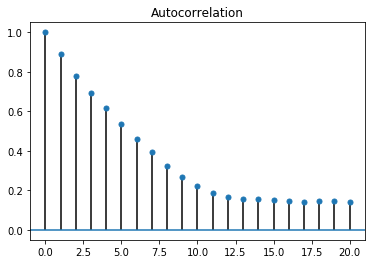

In [207]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

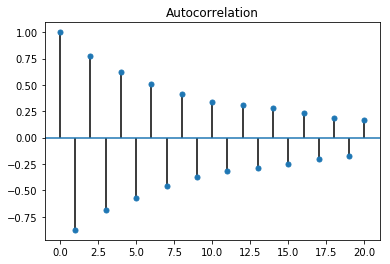

In [208]:
# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

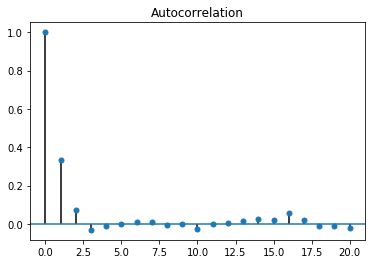

In [209]:
# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

In [210]:
# Estimating an AR Model
# 
# You will estimate the AR(1) parameter, ϕ, of one of the simulated series that you generated in the earlier exercise. 
# Since the parameters are known for a simulated series, it is a good way to understand 
# the estimation routines before applying it to real data.
# 
# For simulated_data_1 with a true ϕ of 0.9, you will print out the estimate of ϕ. 
# In addition, you will also print out the entire output that is produced when you fit a time series, 
# so you can get an idea of what other tests and summary statistics are available in statsmodels.
# 
# Instructions
# 
# Import the class ARMA in the module statsmodels.tsa.arima_model.
# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and 
# the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).
# 
# Fit the model mod using the method .fit() and save it in a results object called res.
# Print out the entire summary of results using the .summary() method.
# Just print out an estimate of the constant and ϕ using the .params attribute (no parentheses).

In [211]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1, 0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1443.832
Method:                       css-mle   S.D. of innovations              1.024
Date:                Tue, 16 Jun 2020   AIC                           2893.664
Time:                        11:05:09   BIC                           2908.387
Sample:                             0   HQIC                          2899.260
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6506      0.299     -2.179      0.030      -1.236      -0.065
ar.L1.y        0.8924      0.014     62.670      0.000       0.864       0.920
                                    Roots           

In [212]:
# Forecasting with an AR Model
# 
# In addition to estimating the parameters of a model that you did in the last exercise, 
# you can also do forecasting, both in-sample and out-of-sample using statsmodels. 
# The in-sample is a forecast of the next data point using the data up to that point, 
# and the out-of-sample forecasts any number of data points in the future. 
# These forecasts can be made using either the predict() method if you want 
# the forecasts in the form of a series of data, 
# or using the plot_predict() method if you want a plot of the forecasted data. 
# You supply the starting point for forecasting and the ending point, 
# which can be any number of data points after the data set ends.
# 
# For the simulated series simulated_data_1 with ϕ=0.9, you will plot in-sample and out-of-sample forecasts.
# 
# Instructions

# Import the class ARMA in the module statsmodels.tsa.arima_model
# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and 
# the order (p,q) of the model (in this case, for an AR(1) order=(1,0)
# 
# Fit the model mod using the method .fit() and save it in a results object called res
#                               
# Plot the in-sample and out-of-sample forecasts of the data using the plot_predict() method
#                               
# Start the forecast 10 data points before the end of the 1000 point series at 990, 
# and end the forecast 10 data points after the end of the series at point 1010

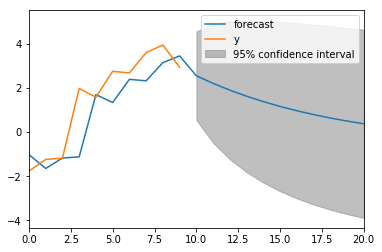

In [213]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

In [323]:
# Let's Forecast Interest Rates
# 
# You will now use the forecasting techniques you learned in the last exercise and apply it to real data
# rather than simulated data. You will revisit a dataset from the first chapter: 
# the annual data of 10-year interest rates going back 56 years, which is in a Series called 
# interest_rate_data. Being able to forecast interest rates is of enormous importance, 
# not only for bond investors but also for individuals like new homeowners who must decide between 
# fixed and floating rate mortgages.
# 
# You saw in the first chapter that there is some mean reversion in interest rates over long horizons. 
# In other words, when interest rates are high, they tend to drop and when they are low, 
# they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, 
# but an AR model attempts to quantify how much they are expected to rise.
# 
# Instructions
# 
# Import the class ARMA in the module statsmodels.tsa.arima_model.
# Create an instance of the ARMA class called mod using the annual interest rate data and choosing 
# the order for an AR(1) model.
# 
# Fit the model mod using the method .fit() and save it in a results object called res.
# 
# Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
# 
# Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end 
# to be '2022' to forecast several years in the future.
# 
# Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.

In [230]:
a = [3.85, 4.14, 4.21, 4.65, 4.64, 5.7, 6.16, 7.88, 6.5, 5.89, 6.41, 6.9, 7.4, 7.76, 6.81, 7.78, 9.15, 10.33, 12.43, 13.98, 10.36, 11.82, 11.55, 9.0, 7.23, 8.83, 9.14, 7.93, 8.08, 6.71, 6.7, 5.83, 7.84, 5.58, 6.43, 5.75, 4.65, 6.45, 5.12, 5.07, 3.83, 4.27, 4.24, 4.39, 4.71, 4.04, 2.25, 3.85, 3.3, 1.89, 1.78, 3.04, 2.17, 2.27, 2.45, 2.16]
b = ['1962-12-31 00:00:00', '1963-12-31 00:00:00', '1964-12-31 00:00:00', '1965-12-31 00:00:00', '1966-12-31 00:00:00', '1967-12-31 00:00:00', '1968-12-31 00:00:00', '1969-12-31 00:00:00', '1970-12-31 00:00:00', '1971-12-31 00:00:00', '1972-12-31 00:00:00', '1973-12-31 00:00:00', '1974-12-31 00:00:00', '1975-12-31 00:00:00', '1976-12-31 00:00:00', '1977-12-31 00:00:00', '1978-12-31 00:00:00', '1979-12-31 00:00:00', '1980-12-31 00:00:00', '1981-12-31 00:00:00', '1982-12-31 00:00:00', '1983-12-31 00:00:00', '1984-12-31 00:00:00', '1985-12-31 00:00:00', '1986-12-31 00:00:00', '1987-12-31 00:00:00', '1988-12-31 00:00:00', '1989-12-31 00:00:00', '1990-12-31 00:00:00', '1991-12-31 00:00:00', '1992-12-31 00:00:00', '1993-12-31 00:00:00', '1994-12-31 00:00:00', '1995-12-31 00:00:00', '1996-12-31 00:00:00', '1997-12-31 00:00:00', '1998-12-31 00:00:00', '1999-12-31 00:00:00', '2000-12-31 00:00:00', '2001-12-31 00:00:00', '2002-12-31 00:00:00', '2003-12-31 00:00:00', '2004-12-31 00:00:00', '2005-12-31 00:00:00', '2006-12-31 00:00:00', '2007-12-31 00:00:00', '2008-12-31 00:00:00', '2009-12-31 00:00:00', '2010-12-31 00:00:00', '2011-12-31 00:00:00', '2012-12-31 00:00:00', '2013-12-31 00:00:00', '2014-12-31 00:00:00', '2015-12-31 00:00:00', '2016-12-31 00:00:00', '2017-12-31 00:00:00']

In [231]:
df = pd.DataFrame(list(zip(b, a)), columns =['Date','US10Y']) 
df.Date = pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)

In [234]:
interest_rate_data = df['US10Y']

C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


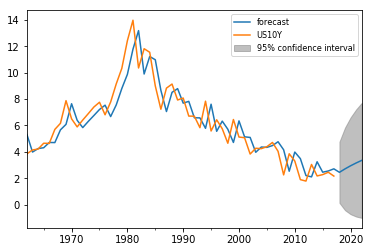

In [238]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

In [324]:
# Compare AR Model with Random Walk
# 
# Sometimes it is difficult to distinguish between a time series that is slightly mean reverting 
# and a time series that does not mean revert at all, like a random walk. You will compare the ACF for 
# the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with 
# the same number of observations.
# 
# You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.
# 
# Instructions
# 
# Import plot_acf function from the statsmodels module
# Create two axes for the two subplots
# Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot
# Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

In [241]:
lst = [5.0, 4.775222775966661, 5.603543169647805, 5.964064019762966, 5.9796537225490205, 6.027718755775946, 5.547075099702572, 5.198670837611246, 5.0186785922944, 5.504529276688546, 5.89293842498244, 4.622010295762343, 5.061378345739556, 5.333775921616565, 5.093332933460739, 5.373890220941771, 4.965709197747701, 5.573392830619666, 5.484318540466954, 4.685885874992304, 5.252186249390087, 4.348007977879391, 4.34544412342561, 4.723625684353956, 4.125829115784325, 3.5462206884795995, 3.439998846773147, 3.771162522567816, 3.817270106452973, 4.352561759151058, 4.136642468486168, 3.874576804290557, 4.016304025751765, 3.7127659275896323, 3.5567245699353993, 3.0706264707262636, 3.4526441440462867, 3.281237288323511, 3.391938659368703, 3.029478064219835, 3.887073489515698, 4.287768887294203, 3.473607336443063, 3.3326063088469566, 3.097295787644004, 2.946521783762184, 3.500792732314806, 3.6102034096527986, 4.2302114302649985, 3.9428934742149306, 3.5842234492750915, 3.1825396190780153, 3.261325637943165, 3.19777388201214, 3.4352768089743204, 3.3720448195768205]

In [243]:
simulated_data = np.array(lst) 

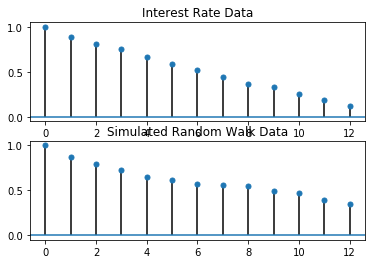

In [244]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

In [325]:
# Estimate Order of Model: PACF
#     
# One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). 
# In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. 
# You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. 
# And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.
# 
# Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in 
# the statsmodels module.
# 
# Instructions
# 
# Import the modules for simulating data and for plotting the PACF
# Simulate an AR(1) with ϕ=0.6 (remember that the sign for the AR parameter is reversed)
# Plot the PACF for simulated_data_1 using the plot_pacf function
# Simulate an AR(2) with ϕ1=0.6,ϕ2=0.3 (again, reverse the signs)
# Plot the PACF for simulated_data_2 using the plot_pacf function

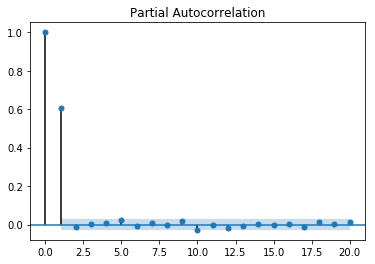

In [246]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

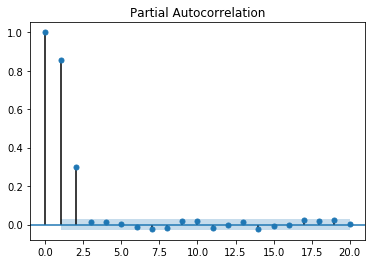

In [247]:
# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

In [326]:
# Estimate Order of Model: Information Criteria
# 
# Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and 
# the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, 
# but apply a penalty function on the number of parameters in the model. You will take the AR(2) 
# simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, 
# in an AR(p) from 0 to 6.
# 
# Instructions
# 
# Import the ARMA module for estimating the parameters and computing BIC.
# Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.
# Loop through order p for p = 0,...,6.
# For each p, fit the data to an AR model of order p.
# For each p, save the value of BIC using the .bic attribute (no parentheses) of res.
# Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,...6).

In [248]:
simulated_data_2 = np.array([-1.0856306033005612, 1.6487238085639224, -0.38056660609619297, -1.772571892829553, 0.5991128655580534, 1.823740385611185, -3.700657334427201, 1.244359656116788, 1.6295176653636216, -2.217758898318311, 0.16291388775984594, 0.4728703679026947, 1.1587932390547173, -1.4760390504882897, 0.09400349893049309, -0.04794165983032633, 2.206494028944504, 0.8772721695561823, -0.1842576125381834, 0.23355931583091133, 0.6525102701591504, 1.0291580713060353, -1.7490817922337576, 1.9165306987305473, -1.8790745493172134, -0.08526598248224637, 1.5219871500848132, -2.316293195532183, 0.7931110521051996, -0.6427335684631503, -0.10791254508426659, -2.5410215078712195, -0.21454643626183545, 0.19115707952054983, 0.8771321149248033, -0.7572620756012627, 0.19406352678012764, 0.7989632177145871, -1.4171333316718424, 0.8942183574960203, -0.9167575330616753, -1.4458804815324082, 0.7516557550828465, 0.5565765538150722, -0.2208536078140957, -0.046291295934883986, 2.486396125842885, -1.065038126416487, 0.8718400440343732, 2.034550750002275, -2.7763677863729255, 0.016667236618119086, 2.566622219063937, -2.3430362376648604, 0.6655183071830653, 1.3729158564139676, -0.13269861471012945, 1.4226305938829968, 0.68187536511671, 0.23347827247081177, -1.1173582872646914, 1.3952341584107895, -0.18766101436019922, -1.6322390988475732, 2.452940810093456, -0.17485622182323524, -0.5854784293029985, 0.17065186314435618, -1.1250487337965012, 0.8233577548932264, 0.31193908664865877, -1.2653257627004424, 1.8278177807251972, -1.81429598610802, -1.5828680925951888, 2.53373674228222, -1.4487476556928829, -0.016902014581951424, -0.3927512173680176, -1.3652414259220067, 2.1922075954878277, -1.5946211133630162, 1.960062877519401, 0.10965679370799308, -0.968571086198076, -0.5376567875204189, -0.11929658834878298, -0.9796481418297742, 2.710691221190685, -1.1680790599356536, 1.0378456121508188, -1.5396356983200226, 0.7934628649437717, 1.163674929338322, -1.2712545790191405, 1.44476472753173, -1.5700503748190624, -0.8548707379866659, 1.3633381673158542, -0.9407181135660649, 0.797484107216714, -2.1741629617806577, 1.7775171803738985, 2.184042507579173, -1.868306640091154, 0.49991336069078207, 0.44009346025155616, -2.2760057951499553, 1.6597220787048164, -1.918441252693868, 0.2254685298810713, 1.6831208074832544, -1.8127299995543504, 1.083950747055034, 0.9061876055896553, -0.5901569313743036, -1.2887105929469223, 0.6177981598290305, 1.9753456243749443, -3.395592585571147, 1.1689658501640294, -0.2348098059151813, -0.08905650840296134, 0.8720924640035616, 1.1121524421408049, -1.1991515964947095, 1.1981865552314046, 0.14057369067474307, 0.03054711689753309, -0.6244243088674153, -0.6318310185247115, -0.5336172088456457, -0.24671757853432252, 0.6298022856405139, 0.45708329530431796, -0.13972181501784975, -0.6022469957763265, 2.209234851903626, 0.3739988112222623, -1.2411698550546184, -0.19092913631957353, 0.6171233924660993, 0.9543033504705654, -0.424954050768052, 0.5252301302297058, -0.3997319851830336, 0.5385410472431391, 1.341339418665165, -1.2060347468497516, 0.464526755018174, 0.3369108475936485, -0.057779179290603944, -1.4782946227749596, -0.9725581284217376, 0.007368192963691067, 0.4552888181499748, 0.278472417224119, -0.8343446555530879, 1.7943225510319238, -0.969466108279415, 0.06369889789269643, 0.05865662319554424, 0.07972314946152965, 0.6390431974080224, 0.2583105746290589, -1.245122244609432, 2.193243950855469, -2.037436154557369, 0.6437155215683932, -0.04939504009617779, -1.2124693097312986, 0.667179509893801, -0.7773806863092894, 0.33918180209348553, 0.4327910858560625, 1.1105001768315883, -0.4887532132283572, -0.651123465417287, 0.1456802324992778, 0.24790700624018308, -0.098987444031742, 1.4446096327754112, 0.5582833833012306, -1.127288846055623, -0.03975383554319367, -2.1950156489252555, 0.7800151266958915, -0.7875620874242418, -0.11629174364904105, 0.6976279147668083, -0.20649689656638473, -0.1153582435377539, 0.33074612618108146, -0.2899579758783144, 0.2717698802161403, -3.307129543285502, 1.633453272155705, -0.09878382136077937, -0.7720274050368297, 0.2749053273273898, 0.7699751429213452, -1.1425620152918494, 2.6552467655158343, -0.5620825244998572, -0.4656317658687081, 0.24134151367361545, -0.09163766482569204, -0.9327269251506481, 0.49192491528008697, 0.26334664510419664, 0.2739561539266856, 0.3363120932570633, -0.5588516486981783, -1.1816648912801424, 0.20755180314409338, 1.8421614283099748, -0.2715040845192651, -0.02012639147725931, -0.6677671845179888, 0.41034338312774904, -1.3015445601837348, 0.1058868454758426, 0.08172791908441981, -0.44244273695861763, 1.1975491975058565, -2.0045226114513808, -0.021983463896082633, -0.7601411092491555, -0.7746735079695359, 0.816902334003117, -1.8581798810672812, 1.6237060072770704, -0.6635854169871334, -0.02017221946486364, 0.5337556947722619, -0.7483682712754891, 1.3213739700869924, -0.7626566273971838, 0.6552520406512825, -0.3634666189288666, 0.3123787465868586, 0.20127540788450626, 0.035491070748769754, -1.0559851144355332, 1.0588195179841289, -0.6374531655594131, 0.6953140744303272, -2.3784459394026767, -0.24664288074244323, 1.2249650724012975])

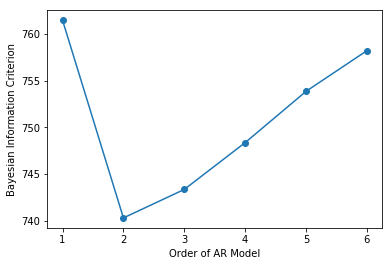

In [249]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

# 4. Moving Average (MA) and ARMA Models

In this chapter you'll learn about another kind of model, the moving average, or MA, model. You will also see how to combine AR and MA models into a powerful ARMA model.

In [327]:
# Simulate MA(1) Time Series
# 
# You will simulate and plot a few MA(1) time series, each with a different parameter, θ, 
# using the arima_process module in statsmodels, just as you did in the last chapter for AR(1) models. 
# You will look at an MA(1) model with a large positive θ and a large negative θ.
# 
# As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, 
# but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. 
# For example, for an MA(1) process with θ=−0.9, the array representing the MA parameters would be ma = np.array([1, -0.9])
# 
# Instructions
# 
# Import the class ArmaProcess in the arima_process module.
# Plot the simulated MA(1) processes
# Let ma1 represent an array of the MA parameters [1, θ] as explained above. 
# The AR parameter array will contain just the lag-zero coefficient of one.
# 
# With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
# 
# Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). 
# Plot the simulated data in a subplot.
# 
# Repeat for the other MA parameter.

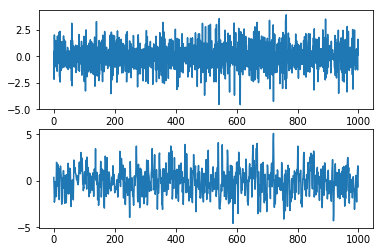

In [250]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: MA parameter = -0.9
plt.subplot(2,1,1)
ar1 = np.array([1])
ma1 = np.array([1, -0.9])
MA_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = MA_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

In [328]:
# Compute the ACF for Several MA Time Series
# 
# Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model 
# has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not θ, 
# but rather θ/(1+θ2). For example, if the MA parameter, θ, is = +0.9, the first-lag 
# autocorrelation will be 0.9/(1+(0.9)2)=0.497, and the autocorrelation at all other lags will be zero. 
# If the MA parameter, θ, is -0.9, the first-lag autocorrelation will be −0.9/(1+(−0.9)2)=−0.497.
# 
# You will verify these autocorrelation functions for the three time series you generated in the last exercise.
# 
# Instructions 1/3
# 
# simulated_data_1 is the first simulated time series with an MA parameter of θ=−0.9.
# Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.

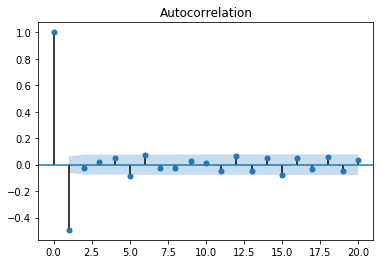

In [251]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: MA parameter = -0.9
plot_acf(simulated_data_1, lags=20)
plt.show()

In [329]:
# simulated_data_2 is the second simulated time series with an MA parameter of θ=0.9.
# Compute the autocorrelation function using the plot_acf function with lags=20.

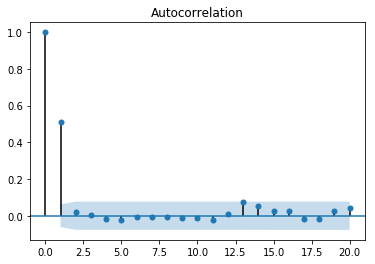

In [252]:
# Plot 2: MA parameter = 0.9
plot_acf(simulated_data_2, lags=20)
plt.show()

In [330]:
# simulated_data_3 is the third simulated time series with an MA parameter of θ=−0.3.
# Compute the autocorrelation function using the plot_acf() function with 20 lags.

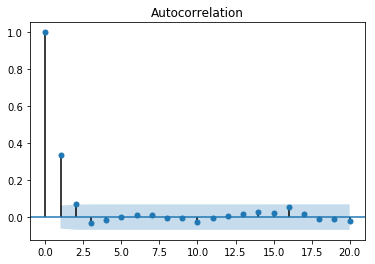

In [253]:
# Plot 3: MA parameter = -0.3
plot_acf(simulated_data_3, lags=20)
plt.show()

In [331]:
# Estimating an MA Model
# 
# You will estimate the MA(1) parameter, θ, of one of the simulated series that you generated in the earlier exercise. 
# Since the parameters are known for a simulated series, it is a good way to understand the estimation routines 
# before applying it to real data.
# 
# For simulated_data_1 with a true θ of -0.9, you will print out the estimate of θ. 
# In addition, you will also print out the entire output that is produced when you fit a time series, 
# so you can get an idea of what other tests and summary statistics are available in statsmodels.
# 
# Instructions
# 
# Import the class ARMA in the module statsmodels.tsa.arima_model.
# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and 
# the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1).
# 
# Fit the model mod using the method .fit() and save it in a results object called res.
# 
# Print out the entire summary of results using the .summary() method.
# 
# Just print out an estimate of the constant and theta parameter using the .params attribute (no arguments).

In [254]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an MA(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1413.187
Method:                       css-mle   S.D. of innovations              0.994
Date:                Tue, 16 Jun 2020   AIC                           2832.375
Time:                        11:49:03   BIC                           2847.098
Sample:                             0   HQIC                          2837.971
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0031      0.004     -0.774      0.439      -0.011       0.005
ma.L1.y       -0.8754      0.019    -46.822      0.000      -0.912      -0.839
                                    Roots           

In [332]:
# Forecasting with MA Model
# 
# As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.
# 
# For the simulated series simulated_data_1 with θ=−0.9, you will plot in-sample and out-of-sample forecasts. 
# One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that 
# the MA(1) forecasts more than one period in the future are simply the mean of the sample.
# 
# Instructions
# 
# Import the class ARMA in the module statsmodels.tsa.arima_model
# 
# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and 
# the (p,q) order of the model (in this case, for an MA(1), order=(0,1)
# 
# Fit the model mod using the method .fit() and save it in a results object called res
# 
# Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method
# 
# Start the forecast 10 data points before the end of the 1000 point series at 990, 
# and end the forecast 10 data points after the end of the series at point 1010

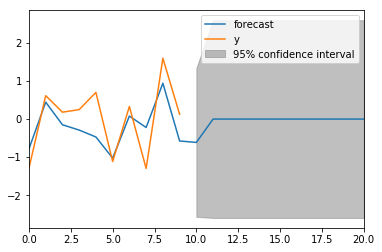

In [255]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first MA(1) model
mod = ARMA(simulated_data_1, order=(0,1))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

In [333]:
# High Frequency Stock Prices
# 
# Higher frequency stock data is well modeled by an MA(1) process, so it's a 
# nice application of the models in this chapter.
# 
# The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint 
# stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours 
# (390 minutes), from 9:30am to 4:00pm.
# 
# Before you can analyze the time series data, you will have to clean it up a little, which you will do in 
# this and the next two exercises. When you look at the first few rows (see the IPython Shell), 
# you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, 
# but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". 
# The number after the "a" is Unix time which is the number of seconds since January 1, 1970. 
# This is how this dataset separates each day of intraday data.
# 
# If you look at the data types, you'll notice that the DATE column is an object, which here means a string. 
# You will need to change that to numeric before you can clean up some missing data.
# 
# The source of the minute data is Google Finance (see here on how the data was downloaded).
# 
# The datetime module has already been imported for you.
# 
# Instructions
# 
# Manually change the first date to zero using .iloc[0,0].
# Change the two column headers to 'DATE' and 'CLOSE' by setting intraday.columns equal to a list containing those two strings.
# Use the pandas attribute .dtypes (no parentheses) to see what type of data are in each column.
# Convert the 'DATE' column to numeric using the pandas function to_numeric().
# Make the 'DATE' column the new index of intraday by using the pandas method .set_index(), which will take 
# the string 'DATE' as its argument (not the entire column, just the name of the column).

In [256]:
a = ['a1504272600', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '243', '244', '245', '246', '247', '248', '249', '250', '251', '252', '253', '254', '255', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '267', '268', '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '281', '282', '283', '284', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '313', '314', '315', '316', '317', '318', '319', '320', '321', '322', '323', '324', '325', '326', '327', '328', '329', '330', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '345', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '364', '365', '366', '367', '368', '369', '370', '371', '372', '373', '374', '375', '376', '377', '378', '379', '380', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390']
b = [8.29, 8.27, 8.28, 8.275, 8.2875, 8.28, 8.26, 8.259, 8.2563, 8.255, 8.26, 8.26, 8.26, 8.27, 8.27, 8.27, 8.27, 8.27, 8.27, 8.275, 8.27, 8.27, 8.25, 8.25, 8.25, 8.249, 8.25, 8.2443, 8.25, 8.25, 8.24, 8.24, 8.225, 8.22, 8.209, 8.21, 8.2085, 8.205, 8.205, 8.21, 8.225, 8.23, 8.23, 8.23, 8.23, 8.23, 8.22, 8.23, 8.23, 8.23, 8.22, 8.22, 8.23, 8.23, 8.24, 8.25, 8.245, 8.245, 8.25, 8.25, 8.25, 8.255, 8.255, 8.25, 8.25, 8.2414, 8.26, 8.2575, 8.255, 8.25, 8.255, 8.25, 8.2511, 8.25, 8.255, 8.256, 8.25, 8.2538, 8.255, 8.25, 8.26, 8.25, 8.25, 8.2547, 8.25, 8.25, 8.255, 8.255, 8.255, 8.26, 8.25, 8.25, 8.25, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.255, 8.255, 8.25, 8.245, 8.24, 8.2359, 8.235, 8.235, 8.235, 8.235, 8.255, 8.2548, 8.25, 8.255, 8.255, 8.255, 8.255, 8.255, 8.25, 8.25, 8.255, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.245, 8.24, 8.245, 8.245, 8.245, 8.2498, 8.245, 8.245, 8.24, 8.23, 8.23, 8.23, 8.23, 8.23, 8.235, 8.26, 8.26, 8.26, 8.26, 8.2564, 8.255, 8.255, 8.255, 8.255, 8.255, 8.25, 8.25, 8.245, 8.25, 8.25, 8.25, 8.25, 8.2553, 8.25, 8.25, 8.25, 8.255, 8.25, 8.25, 8.25, 8.25, 8.25, 8.25, 8.25, 8.25, 8.25, 8.265, 8.26, 8.255, 8.26, 8.27, 8.27, 8.275, 8.271, 8.275, 8.271, 8.27, 8.275, 8.276, 8.2751, 8.27, 8.27, 8.27, 8.279, 8.275, 8.285, 8.285, 8.285, 8.285, 8.285, 8.285, 8.27, 8.27, 8.27, 8.27, 8.285, 8.285, 8.29, 8.3, 8.29, 8.295, 8.3, 8.3, 8.3, 8.295, 8.295, 8.29, 8.29, 8.295, 8.295, 8.29, 8.29, 8.29, 8.2915, 8.295, 8.3, 8.3, 8.295, 8.295, 8.295, 8.3, 8.3, 8.295, 8.3, 8.295, 8.3, 8.3, 8.31, 8.31, 8.31, 8.31, 8.305, 8.3, 8.3, 8.3, 8.3, 8.295, 8.295, 8.3, 8.31, 8.305, 8.31, 8.31, 8.305, 8.31, 8.305, 8.305, 8.305, 8.3, 8.295, 8.295, 8.295, 8.3, 8.295, 8.3, 8.295, 8.295, 8.295, 8.2905, 8.285, 8.285, 8.28, 8.28, 8.28, 8.28, 8.285, 8.281, 8.28, 8.28, 8.28, 8.29, 8.28, 8.28, 8.27, 8.265, 8.27, 8.265, 8.26, 8.27, 8.26, 8.265, 8.26, 8.26, 8.26, 8.265, 8.26, 8.26, 8.26, 8.26, 8.26, 8.265, 8.2693, 8.27, 8.27, 8.265, 8.265, 8.265, 8.26, 8.26, 8.27, 8.27, 8.265, 8.265, 8.27, 8.27, 8.265, 8.265, 8.264, 8.27, 8.265, 8.27, 8.27, 8.27, 8.27, 8.265, 8.265, 8.27, 8.27, 8.265, 8.265, 8.27, 8.27, 8.26, 8.265, 8.27, 8.26, 8.27, 8.265, 8.27, 8.26, 8.27, 8.265, 8.265, 8.26, 8.26, 8.27, 8.265, 8.265, 8.26, 8.26, 8.26, 8.265, 8.265, 8.26, 8.26, 8.26, 8.27, 8.265, 8.265, 8.265, 8.265, 8.265, 8.265, 8.265, 8.265, 8.265, 8.265, 8.26, 8.265, 8.265, 8.27, 8.265, 8.2662, 8.265, 8.27, 8.265, 8.27, 8.265, 8.265, 8.265, 8.27, 8.27, 8.27, 8.29, 8.28, 8.275, 8.28, 8.275, 8.275, 8.28]

In [257]:
intraday = pd.DataFrame(list(zip(a, b)), columns =[0,1]) 

In [260]:
# import datetime module
import datetime

# Change the first date to zero
intraday.iloc[0,0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE','CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the `DATE` column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


In [334]:
# More Data Cleaning: Missing Data
#     
# When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. 
# There will be missing data if there are no trades in a particular one-minute interval. 
# One way to see which rows are missing is to take the difference of two sets: the full set 
# of every minute and the set of the DataFrame index which contains missing rows. 
# After filling in the missing rows, you can convert the index to time of day and then plot the data.
# 
# Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between 
# the one-cent increments) rather than at continuous prices, and when you plot the data you should observe 
# that there are long periods when the stock bounces back and forth over a one cent range. 
# This is sometimes referred to as "bid/ask bounce".
# 
# Instructions 1/4
# 
# Print out the length of intraday using len()

In [261]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


In [335]:
# Find the missing rows by making range(391) into a set and then subtracting the set of the intraday index, intraday.index.

In [262]:
# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

In [336]:
# Change the index to times using pandas function date_range(), 
# starting with '2017-09-01 9:30' and ending with '2017-09-01 16:00' and passing the argument freq='1min'.
# 
# Plot the data and include gridlines.

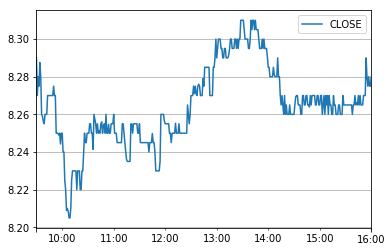

In [263]:
# From previous step
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True)
plt.show()

In [337]:
# Applying an MA Model
# 
# The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, 
# but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. 
# Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.
# 
# The first step is to compute minute-by-minute returns from the prices in intraday, 
# and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. 
# Then, fit the data to an MA(1), the same way you did for simulated data.
# 
# Instructions
# 
# Import plot_acf and ARMA modules from statsmodels
# Compute minute-to-minute returns from prices:
# Compute returns with the .pct_change() method
# Use the pandas method .dropna() to drop the first row of returns, which is NaN
# Plot the ACF function with lags up to 60 minutes
# Fit the returns data to an MA(1) model and print out the MA(1) parameter

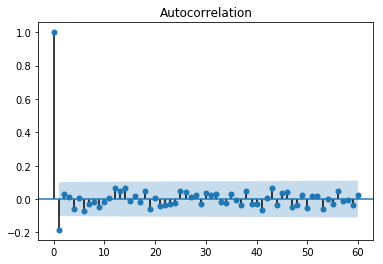

const         -0.000002
ma.L1.CLOSE   -0.179272
dtype: float64


In [264]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA

# Compute returns from prices and drop the NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot ACF of returns with lags up to 60 minutes
plot_acf(returns, lags=60)
plt.show()

# Fit the data to an MA(1) model
mod = ARMA(returns, order=(0,1))
res = mod.fit()
print(res.params)

In [338]:
# Equivalence of AR(1) and MA(infinity)
# 
# To better understand the relationship between MA models and AR models, 
# you will demonstrate that an AR(1) model is equivalent to an MA(∞) model with the appropriate parameters.
# 
# You will simulate an MA model with parameters 0.8,0.82,0.83,… for a large number (30) lags and show 
# that it has the same Autocorrelation Function as an AR(1) model with ϕ=0.8.
# 
# Note, to raise a number x to the power of an exponent n, use the format x**n.
# 
# Instructions
# 
# Import the modules for simulating data and plotting the ACF from statsmodels
# Use a list comprehension to build a list with exponentially decaying MA parameters: 1,0.8,0.82,0.83,…
# Simulate 5000 observations of the MA(30) model
# Plot the ACF of the simulated series

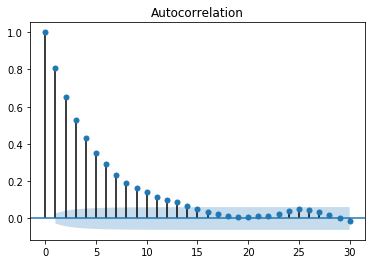

In [265]:
# import the modules for simulating data and plotting the ACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Build a list MA parameters
ma = [0.8**i for i in range(30)]

# Simulate the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF
plot_acf(simulated_data, lags=30)
plt.show()

# 5. Putting It All Together
This chapter will show you how to model two series jointly using cointegration models. Then you'll wrap up with a case study where you look at a time series of temperature data from New York City.

In [339]:
# A Dog on a Leash? (Part 1)
# 
# The Heating Oil and Natural Gas prices are pre-loaded in DataFrames HO and NG. 
# First, plot both price series, which look like random walks. Then plot the difference between the two series, 
# which should look more like a mean reverting series (to put the two series in the same units, 
# we multiply the heating oil prices, in $/gallon, by 7.25, which converts it to $/millionBTU, 
# which is the same units as Natural Gas).
# 
# The data for continuous futures (each contract has to be spliced together in a continuous series as contracts expire) 
# was obtained from Quandl.
# 
# Instructions
# 
# Plot Heating Oil, HO, and Natural Gas, NG, on the same subplot
# Make sure you multiply the HO price by 7.25 to match the units of NG
# Plot the spread on a second subplot
# The spread will be 7.25*HO - NG

In [267]:
Close_data = [0.733, 0.7024, 0.6829999999999999, 0.7617, 0.743, 0.7709, 0.7708, 0.7736, 0.8898, 0.847, 0.9159999999999999, 0.6196, 0.6152, 0.6581, 0.6846, 0.7015, 0.6982, 0.6937, 0.6828, 0.7043, 0.7019, 0.7125, 0.622, 0.6172, 0.6306, 0.6635, 0.6552, 0.6722, 0.711, 0.708, 0.6711, 0.6595, 0.6232, 0.6063, 0.6472, 0.614, 0.6014, 0.6195, 0.6373, 0.6441, 0.6536, 0.5457, 0.5613, 0.5709, 0.5608, 0.5555, 0.5539, 0.5443, 0.5579999999999999, 0.5681, 0.5653, 0.5566, 0.5579, 0.5772, 0.5767, 0.5846, 0.5825, 0.5646, 0.568, 0.5661, 0.5689, 0.5349, 0.5423, 0.5328, 0.5424, 0.5422, 0.5454, 0.5455, 0.5602, 0.5539999999999999, 0.5605, 0.5699, 0.5563, 0.5613, 0.5575, 0.5606, 0.5723, 0.5697, 0.5647, 0.5594, 0.5587, 0.5529, 0.5357, 0.5427, 0.5388, 0.5473, 0.5561, 0.5576, 0.5566, 0.5608, 0.5513, 0.5453, 0.5475, 0.5552, 0.5575, 0.5591, 0.5605, 0.5608, 0.5603, 0.5609, 0.5553, 0.5581, 0.5568, 0.5670000000000001, 0.5648, 0.5637, 0.5599, 0.5428, 0.542, 0.5379, 0.5256, 0.5319, 0.541, 0.5344, 0.5368, 0.5377, 0.5389, 0.5363, 0.5451, 0.5433, 0.5376, 0.5365, 0.5371, 0.544, 0.5529999999999999, 0.5609, 0.5648, 0.5613, 0.5674, 0.5739, 0.5731, 0.5838, 0.5820000000000001, 0.6001, 0.5906, 0.5923, 0.5983, 0.5894, 0.5944, 0.5916, 0.5768, 0.5809, 0.5841, 0.5877, 0.5873, 0.5896, 0.602, 0.5951, 0.598, 0.6006, 0.5908, 0.5899, 0.5953, 0.6, 0.6012, 0.5977, 0.5945, 0.6041, 0.6067, 0.6496, 0.6632, 0.618, 0.6222, 0.62, 0.6223, 0.622, 0.6224, 0.6319, 0.6412, 0.6457, 0.6296, 0.6259, 0.6228, 0.6157, 0.6135, 0.6157, 0.6117, 0.6168, 0.6206, 0.6111, 0.6185, 0.6185, 0.6259, 0.638, 0.6369, 0.636, 0.6301, 0.6353, 0.6368, 0.6421, 0.6459999999999999, 0.6561, 0.6556, 0.6685, 0.6706, 0.6805, 0.6745, 0.6754, 0.6908, 0.6917, 0.6844, 0.6940000000000001, 0.6981, 0.7018, 0.6946, 0.6815, 0.6928, 0.6843, 0.6824, 0.6843, 0.6836, 0.6857, 0.7068, 0.7168, 0.7184, 0.7102, 0.7032, 0.6957, 0.6757, 0.6656, 0.659, 0.657, 0.6748, 0.6539, 0.6443, 0.6373, 0.6356, 0.6206, 0.6247, 0.6169, 0.6182, 0.6172, 0.6151, 0.5947, 0.6033, 0.593, 0.5714, 0.5444, 0.5498, 0.5578, 0.5655, 0.5718, 0.5684, 0.5583, 0.5472, 0.5346, 0.5108, 0.5184, 0.5179, 0.5032, 0.5038, 0.4808, 0.4829, 0.5156, 0.5214, 0.5187, 0.5088, 0.4936, 0.4985, 0.5154, 0.546, 0.5307, 0.5405, 0.5487, 0.5494, 0.5449, 0.5328, 0.5287, 0.5316, 0.547, 0.5539, 0.541, 0.5399, 0.5214, 0.5285, 0.5353, 0.5476, 0.5539, 0.5525, 0.5642, 0.5659, 0.552, 0.5537, 0.5569, 0.5449, 0.5132, 0.525, 0.5284, 0.5271, 0.5158, 0.5135, 0.5087, 0.5124, 0.5152, 0.502, 0.5092, 0.5142, 0.5152, 0.5103, 0.5118, 0.5183, 0.513, 0.5218, 0.5336, 0.5365, 0.5413, 0.5323, 0.5431, 0.5329, 0.5354, 0.5321, 0.5279, 0.5281, 0.5221, 0.5306, 0.5373, 0.5445, 0.5428, 0.5568, 0.5596, 0.5545, 0.5626, 0.5552, 0.5614, 0.5548, 0.5508, 0.5559, 0.5645, 0.5667, 0.5736, 0.5578, 0.5541, 0.5529, 0.5529999999999999, 0.5612, 0.5697, 0.5785, 0.5670000000000001, 0.5756, 0.5660000000000001, 0.5707, 0.5741, 0.5767, 0.5832, 0.5752, 0.5721, 0.5676, 0.5718, 0.5711, 0.5615, 0.552, 0.5608, 0.5629, 0.5963, 0.5931, 0.5996, 0.605, 0.6025, 0.6038, 0.6081, 0.6087, 0.6185, 0.6131, 0.6056, 0.6147, 0.6088, 0.6115, 0.6104, 0.608, 0.6099, 0.6121, 0.6146, 0.6184, 0.6211, 0.6366, 0.6316, 0.6227, 0.6187, 0.6009, 0.6052, 0.6115, 0.6024, 0.5873, 0.5906, 0.5925, 0.5941, 0.6005, 0.599, 0.6034, 0.6012, 0.5989, 0.606, 0.5987, 0.6093, 0.6169, 0.6235, 0.6241, 0.6175, 0.6089, 0.6036, 0.6054, 0.598, 0.5907, 0.5863, 0.5959, 0.5872, 0.5822, 0.5755, 0.5787, 0.5873, 0.589, 0.5935, 0.5881, 0.5815, 0.5842, 0.5781, 0.5931, 0.5823, 0.5812, 0.5827, 0.5937, 0.6047, 0.6117, 0.6065, 0.606, 0.6084, 0.6177, 0.6173, 0.6222, 0.6281, 0.6354, 0.6309, 0.6304, 0.6244, 0.6183, 0.6217, 0.6263, 0.6396, 0.6326, 0.6279, 0.632, 0.6294, 0.632, 0.6387, 0.6385, 0.6353, 0.6332, 0.6383, 0.642, 0.6589, 0.6548, 0.6451, 0.6464, 0.6549, 0.6506, 0.6482, 0.6421, 0.6265, 0.6192, 0.618, 0.6185, 0.6165, 0.614, 0.5951, 0.5882, 0.6009, 0.5943, 0.5842, 0.5894, 0.5738, 0.5836, 0.581, 0.5862, 0.5803, 0.5783, 0.589, 0.5813, 0.565, 0.5728, 0.5731, 0.56, 0.565, 0.5714, 0.5607, 0.5584, 0.5581, 0.5429999999999999, 0.5422, 0.5554, 0.5448, 0.5436, 0.5591, 0.5472, 0.5418, 0.5378, 0.555, 0.5626, 0.5615, 0.5711, 0.5683, 0.5885, 0.5784, 0.5679, 0.569, 0.564, 0.5518, 0.5579, 0.5429, 0.5356, 0.5367, 0.5354, 0.5263, 0.5249, 0.5309, 0.5337, 0.5333, 0.5294, 0.5168, 0.52, 0.5202, 0.5456, 0.5524, 0.5451, 0.5647, 0.5579, 0.5673, 0.5586, 0.5598, 0.5666, 0.5686, 0.5670000000000001, 0.5634, 0.5663, 0.5665, 0.5563, 0.5514, 0.5463, 0.5455, 0.5532, 0.5649, 0.5727, 0.5738, 0.5877, 0.5795, 0.5765, 0.5816, 0.5981, 0.5925, 0.5809, 0.5825, 0.5805, 0.5732, 0.5820000000000001, 0.5728, 0.5809, 0.5787, 0.5837, 0.5802, 0.5717, 0.5811, 0.5814, 0.5822, 0.5767, 0.5685, 0.5596, 0.5588, 0.5665, 0.5724, 0.5695, 0.5595, 0.5655, 0.5599, 0.5652, 0.5609, 0.5601, 0.5592, 0.5587, 0.5549, 0.5513, 0.5518, 0.5484, 0.5582, 0.5571, 0.5536, 0.5514, 0.5596, 0.5549, 0.5588, 0.5558, 0.5573, 0.5591, 0.5617, 0.5643, 0.5591, 0.5514, 0.5403, 0.536, 0.5408, 0.5379999999999999, 0.5404, 0.5489, 0.5444, 0.539, 0.5426, 0.5429, 0.5456, 0.5486, 0.5514, 0.5479999999999999, 0.5419, 0.5414, 0.5358, 0.5371, 0.5386, 0.5317, 0.5301, 0.5245, 0.52, 0.5245, 0.5196, 0.522, 0.5195, 0.5188, 0.5207, 0.5196, 0.5228, 0.5238, 0.5256, 0.5245, 0.5166, 0.5076, 0.5126, 0.5063, 0.4983, 0.5049, 0.5074, 0.5055, 0.4926, 0.4971, 0.4884, 0.505, 0.4974, 0.5017, 0.4972, 0.5019, 0.5037, 0.5164, 0.5135, 0.5082, 0.4994, 0.5118, 0.5075, 0.5068, 0.5007, 0.494, 0.5021, 0.5001, 0.5157, 0.5275, 0.536, 0.5281, 0.5291, 0.5229, 0.5237, 0.5274, 0.5333, 0.5297, 0.5251, 0.5286, 0.5384, 0.5401, 0.5274, 0.532, 0.5288, 0.5113, 0.5112, 0.5139, 0.5135, 0.5139, 0.5174, 0.518, 0.5141, 0.5192, 0.5373, 0.5388, 0.5309, 0.535, 0.5308, 0.5308, 0.5344, 0.5542, 0.565, 0.5672, 0.5593, 0.5543, 0.5581, 0.5585, 0.5599, 0.5642, 0.5622, 0.5567, 0.5552, 0.5453, 0.5388, 0.54, 0.5424, 0.5411, 0.5335, 0.5231, 0.5217, 0.5249, 0.521, 0.5112, 0.5312, 0.5237, 0.5247, 0.521, 0.5126, 0.507, 0.5046, 0.5069, 0.5178, 0.5161, 0.5127, 0.5113, 0.524, 0.5195, 0.5161, 0.5158, 0.5033, 0.5006, 0.4686, 0.4697, 0.4718, 0.4582, 0.4586, 0.4456, 0.4454, 0.441, 0.4415, 0.4531, 0.43799999999999994, 0.4386, 0.4447, 0.4455, 0.4407, 0.4375, 0.4336, 0.4402, 0.4424, 0.4434, 0.4361, 0.4482, 0.4416, 0.4521, 0.4603, 0.4788, 0.4765, 0.4817, 0.4676, 0.4842, 0.4807, 0.4891, 0.5126, 0.5267, 0.4949, 0.5008, 0.4796, 0.4803, 0.4939, 0.499, 0.5231, 0.5306, 0.527, 0.537, 0.5183, 0.5358, 0.523, 0.5106, 0.4998, 0.5057, 0.494, 0.5031, 0.5098, 0.4782, 0.4705, 0.4502, 0.4524, 0.4575, 0.4683, 0.4722, 0.4886, 0.4968, 0.5028, 0.4555, 0.4574, 0.4566, 0.4489, 0.4337, 0.4335, 0.4379, 0.4328, 0.43700000000000006, 0.4336, 0.4463, 0.4447, 0.4424, 0.4447, 0.4509, 0.452, 0.4502, 0.4521, 0.4628, 0.4376, 0.446, 0.4504, 0.45799999999999996, 0.4617, 0.4582, 0.4551, 0.4481, 0.4506, 0.4582, 0.4548, 0.4582, 0.467, 0.474, 0.4703, 0.4617, 0.46399999999999997, 0.4687, 0.4787, 0.4823, 0.4737, 0.4652, 0.4705, 0.4757, 0.4689, 0.4666, 0.4731, 0.48100000000000004, 0.4834, 0.4782, 0.4785, 0.4822, 0.4847, 0.4781, 0.4704, 0.47700000000000004, 0.4786, 0.4832, 0.4791, 0.47600000000000003, 0.4763, 0.4782, 0.4838, 0.4971, 0.4943, 0.485, 0.4822, 0.4756, 0.4647, 0.4662, 0.4699, 0.4691, 0.4764, 0.4793, 0.5058, 0.5052, 0.5202, 0.5147, 0.5046, 0.4983, 0.5068, 0.5039, 0.4954, 0.4995, 0.4958, 0.5059, 0.5078, 0.5032, 0.4909, 0.4818, 0.4879, 0.49700000000000005, 0.5044, 0.5021, 0.5049, 0.4982, 0.4884, 0.4948, 0.4963, 0.4994, 0.5057, 0.5017, 0.4999, 0.5039, 0.5069, 0.529, 0.5426, 0.5302, 0.526, 0.5205, 0.4918, 0.4985, 0.5017, 0.5014, 0.4972, 0.4857, 0.491, 0.4854, 0.4977, 0.48700000000000004, 0.4803, 0.473, 0.4781, 0.4855, 0.4877, 0.4818, 0.4884, 0.4855, 0.4939, 0.4928, 0.4972, 0.4995, 0.5007, 0.4963, 0.4937, 0.4907, 0.4812, 0.4703, 0.4671, 0.4701, 0.4832, 0.4835, 0.4765, 0.4854, 0.4855, 0.4778, 0.4766, 0.4833, 0.4932, 0.5022, 0.5024, 0.4975, 0.4995, 0.5024, 0.5043, 0.4959, 0.4873, 0.4676, 0.4685, 0.4671, 0.4715, 0.4738, 0.4821, 0.5004, 0.4849, 0.4916, 0.493, 0.4948, 0.494, 0.4931, 0.4898, 0.5072, 0.512, 0.5142, 0.51, 0.5044, 0.5108, 0.5057, 0.508, 0.5034, 0.4885, 0.486, 0.4776, 0.4814, 0.4808, 0.4856, 0.4915, 0.5087, 0.5058, 0.4997, 0.4896, 0.4875, 0.4702, 0.4701, 0.4729, 0.4767, 0.4911, 0.4927, 0.4885, 0.4848, 0.4954, 0.4878, 0.4846, 0.4786, 0.4788, 0.4786, 0.4795, 0.4802, 0.4925, 0.5011, 0.5066, 0.5131, 0.4994, 0.4964, 0.4996, 0.4952, 0.4833, 0.4738, 0.4798, 0.4785, 0.4668, 0.4735, 0.4867, 0.4908, 0.4828, 0.4814, 0.4782, 0.4787, 0.4747, 0.4727, 0.4727, 0.4742, 0.4686, 0.478, 0.4855, 0.4944, 0.49200000000000005, 0.4913, 0.4798, 0.4765, 0.4828, 0.4729, 0.475, 0.4689, 0.4692, 0.4772, 0.4762, 0.4789, 0.4744, 0.4775, 0.4719, 0.469, 0.4644, 0.4652, 0.4741, 0.4666, 0.4636, 0.4525, 0.4514, 0.4525, 0.4561, 0.4434, 0.4514, 0.4537, 0.4607, 0.4582, 0.4565, 0.4702, 0.4656, 0.4632, 0.4746, 0.4746, 0.4708, 0.4719, 0.4706, 0.4747, 0.4796, 0.4801, 0.4921, 0.495, 0.4928, 0.5015, 0.4954, 0.4879, 0.5001, 0.5019, 0.5015, 0.5028, 0.5064, 0.5002, 0.5078, 0.5046, 0.5126, 0.5119, 0.5109, 0.5094, 0.5025, 0.5127, 0.5134, 0.5115, 0.4914, 0.4995, 0.4909, 0.4954, 0.4986, 0.5045, 0.504, 0.5056, 0.5101, 0.5129, 0.5229, 0.5113, 0.5125, 0.4872, 0.4856, 0.4874, 0.4953, 0.499, 0.496, 0.491, 0.4895, 0.4865, 0.48100000000000004, 0.485, 0.4853, 0.4919, 0.4888, 0.4829, 0.47, 0.4714, 0.4654, 0.4665, 0.4631, 0.4678, 0.4723, 0.4769, 0.4692, 0.4672, 0.4651, 0.4719, 0.4637, 0.47100000000000003, 0.4696, 0.4723, 0.4668, 0.4653, 0.4649, 0.4698, 0.4647, 0.461, 0.4614, 0.4656, 0.4651, 0.4804, 0.4813, 0.48, 0.4827, 0.4879, 0.4944, 0.4924, 0.4918, 0.4932, 0.49700000000000005, 0.4945, 0.4955, 0.4938, 0.4877, 0.4874, 0.4922, 0.4927, 0.49700000000000005, 0.5029, 0.5018, 0.505, 0.502, 0.4997, 0.498, 0.4952, 0.4965, 0.5015, 0.5143, 0.5297, 0.5211, 0.5144, 0.5183, 0.5165, 0.5195, 0.5125, 0.518, 0.5153, 0.5165, 0.5137, 0.493, 0.4867, 0.4809, 0.4885, 0.4823, 0.4902, 0.495, 0.4865, 0.4926, 0.4928, 0.4885, 0.4797, 0.4821, 0.4874, 0.4867, 0.488, 0.4846, 0.4892, 0.4885, 0.4882, 0.4842, 0.4815, 0.4858, 0.4894, 0.4936, 0.4958, 0.5044, 0.5034, 0.5059, 0.504, 0.5095, 0.5204, 0.5172, 0.5115, 0.5099, 0.5145, 0.5162, 0.5163, 0.5157, 0.5156, 0.5171, 0.5222, 0.5296, 0.5273, 0.5228, 0.5254, 0.5342, 0.5295, 0.522, 0.5162, 0.5267, 0.5403, 0.5422, 0.5475, 0.5528, 0.5659, 0.5675, 0.5681, 0.5769, 0.573, 0.5799, 0.5911, 0.5923, 0.599, 0.6001, 0.6009, 0.605, 0.6233, 0.6032, 0.5863, 0.5993, 0.5944, 0.5928, 0.6064, 0.6043, 0.5959, 0.5616, 0.5357, 0.5329999999999999, 0.5243, 0.5313, 0.5437, 0.5422, 0.5367, 0.5295, 0.5272, 0.5051, 0.5093, 0.5113, 0.5228, 0.5351, 0.5241, 0.5326, 0.516, 0.5164, 0.5246, 0.5314, 0.5362, 0.5369, 0.5674, 0.5821, 0.57, 0.5687, 0.5639, 0.5884, 0.6053, 0.6066, 0.6285, 0.6428, 0.5968, 0.6181, 0.5342, 0.5215, 0.53, 0.5422, 0.5378, 0.5344, 0.5515, 0.5483, 0.5459, 0.5507, 0.5787, 0.6028, 0.6226, 0.6312, 0.6133, 0.6265, 0.632, 0.6488, 0.6593, 0.6354, 0.6276, 0.5798, 0.5972, 0.5822, 0.5957, 0.6019, 0.6064, 0.6251, 0.6402, 0.6202, 0.6262, 0.5954, 0.5809, 0.5539999999999999, 0.5572, 0.5506, 0.573, 0.5820000000000001, 0.5876, 0.5927, 0.6228, 0.6182, 0.5416, 0.5394, 0.5474, 0.5456, 0.5479, 0.5487, 0.5456, 0.5495, 0.5619, 0.5532, 0.5481, 0.53, 0.5294, 0.5524, 0.5406, 0.5499, 0.5439, 0.5446, 0.5418, 0.5406, 0.5209, 0.5085, 0.5125, 0.5152, 0.5085, 0.5104, 0.5178, 0.514, 0.5079, 0.5088, 0.5095, 0.5155, 0.5334, 0.525, 0.5112, 0.5153, 0.5136, 0.513, 0.5117, 0.5234, 0.5364, 0.5395, 0.5514, 0.5428, 0.5471, 0.5489, 0.5526, 0.5559, 0.5670000000000001, 0.5662, 0.5772, 0.5718, 0.5632, 0.5674, 0.5602, 0.5585, 0.5594, 0.5595, 0.5625, 0.5504, 0.5519, 0.5565, 0.5708, 0.5753, 0.5871, 0.5829, 0.5743, 0.5822, 0.5879, 0.5849, 0.5956, 0.6001, 0.6041, 0.5968, 0.6163, 0.6258, 0.6167, 0.6098, 0.6248, 0.6199, 0.6103, 0.6113, 0.6204, 0.6367, 0.6282, 0.6507, 0.6421, 0.6503, 0.664, 0.6595, 0.6667, 0.6819, 0.6917, 0.6794, 0.6529, 0.6559, 0.6787, 0.6677, 0.6742, 0.6748, 0.6969, 0.7177, 0.7090000000000001, 0.7149, 0.7151, 0.7076, 0.7198, 0.7469, 0.7443, 0.7649, 0.7619, 0.7397, 0.7092, 0.7143, 0.7407, 0.7307, 0.7156, 0.7229, 0.7406, 0.7363, 0.7345, 0.7096, 0.7049, 0.7172, 0.7146, 0.6983, 0.6846, 0.6634, 0.6659999999999999, 0.6595, 0.6542, 0.6645, 0.6689, 0.6893, 0.6835, 0.6825, 0.7120000000000001, 0.7340000000000001, 0.7261, 0.7185, 0.7368, 0.7209, 0.7385, 0.7279, 0.7223, 0.7124, 0.7197, 0.7357, 0.7422, 0.7357, 0.7511, 0.7466, 0.7213, 0.6962, 0.6682, 0.6867, 0.7171, 0.7482, 0.7354, 0.7418, 0.7378, 0.7297, 0.7108, 0.7140000000000001, 0.7006, 0.7055, 0.7057, 0.7284, 0.7211, 0.7129, 0.7364, 0.7249, 0.7343, 0.7305, 0.7215, 0.6970000000000001, 0.6942, 0.7142, 0.6992, 0.6844, 0.6694, 0.6603, 0.6689, 0.6635, 0.6677, 0.6729, 0.6683, 0.6884, 0.7034, 0.6865, 0.6528, 0.6418, 0.6332, 0.6145, 0.6053, 0.6176, 0.6186, 0.6085, 0.5992, 0.6081, 0.5942, 0.5959, 0.5804, 0.5785, 0.5547, 0.5682, 0.5668, 0.5603, 0.5476, 0.5318, 0.5334, 0.5254, 0.5343, 0.5408, 0.5308, 0.5283, 0.5408, 0.5422, 0.5533, 0.5429999999999999, 0.5618, 0.5629, 0.5594, 0.5598, 0.5573, 0.5683, 0.5543, 0.5607, 0.5672, 0.5395, 0.5252, 0.5326, 0.5314, 0.5312, 0.5289, 0.5311, 0.5486, 0.5387, 0.5467, 0.5485, 0.5348, 0.54, 0.5468, 0.5548, 0.5483, 0.5565, 0.5589, 0.5589999999999999, 0.5653, 0.5891, 0.5807, 0.5433, 0.5302, 0.5305, 0.5353, 0.5308, 0.5438, 0.5452, 0.5665, 0.5648, 0.5642, 0.5648, 0.5847, 0.5792, 0.5764, 0.5755, 0.578, 0.5752, 0.5527, 0.5539, 0.56, 0.5649, 0.5632, 0.5462, 0.5416, 0.5332, 0.5152, 0.515, 0.5165, 0.5152, 0.5162, 0.5164, 0.5194, 0.5245, 0.5144, 0.5145, 0.5133, 0.5192, 0.5157, 0.5299, 0.5202, 0.5333, 0.537, 0.5484, 0.5492, 0.5276, 0.5278, 0.53, 0.5265, 0.5211, 0.5235, 0.5167, 0.5295, 0.5268, 0.5389, 0.5222, 0.5235, 0.527, 0.5328, 0.5339, 0.5399, 0.5414, 0.5431, 0.5578, 0.5561, 0.5656, 0.5844, 0.5832, 0.5698, 0.5529999999999999, 0.5429, 0.5436, 0.551, 0.5604, 0.5587, 0.5525, 0.5509, 0.5571, 0.551, 0.5348, 0.5341, 0.522, 0.5209, 0.5326, 0.5251, 0.5185, 0.534, 0.5335, 0.5254, 0.5378, 0.5314, 0.5283, 0.5157, 0.5205, 0.5258, 0.5252, 0.5385, 0.5335, 0.5344, 0.5345, 0.5473, 0.5464, 0.5524, 0.5651, 0.5792, 0.5822, 0.5793, 0.5819, 0.598, 0.6201, 0.5969, 0.596, 0.6016, 0.6008, 0.5995, 0.5827, 0.5701, 0.5694, 0.5801, 0.574, 0.5782, 0.5764, 0.5877, 0.5809, 0.5703, 0.5774, 0.5652, 0.5719, 0.5812, 0.5777, 0.5878, 0.5811, 0.5718, 0.5743, 0.5799, 0.5728, 0.5782, 0.5792, 0.5862, 0.5954, 0.5785, 0.5761, 0.5667, 0.5545, 0.5548, 0.556, 0.5549, 0.531, 0.5271, 0.5325, 0.535, 0.5335, 0.5338, 0.5352, 0.5312, 0.5166, 0.5145, 0.5182, 0.5151, 0.5159, 0.5178, 0.5264, 0.5196, 0.5115, 0.5073, 0.5073, 0.5004, 0.4909, 0.4946, 0.4908, 0.4941, 0.4792, 0.4776, 0.4733, 0.4775, 0.467, 0.4621, 0.4609, 0.4628, 0.4623, 0.4675, 0.4639, 0.4625, 0.4562, 0.4444, 0.4719, 0.4725, 0.4776, 0.4928, 0.4758, 0.4738, 0.4605, 0.4554, 0.4621, 0.4633, 0.4595, 0.4544, 0.4506, 0.4457, 0.4472, 0.4374, 0.4534, 0.4535, 0.4472, 0.4253, 0.4267, 0.4308, 0.4315, 0.428, 0.4292, 0.4286, 0.4293, 0.4305, 0.4215, 0.4093, 0.4083, 0.4027, 0.4026, 0.4025, 0.3852, 0.3848, 0.4105, 0.4075, 0.40700000000000003, 0.4516, 0.4405, 0.4512, 0.4573, 0.4545, 0.4418, 0.4302, 0.4318, 0.4322, 0.4397, 0.4283, 0.4246, 0.43200000000000005, 0.4333, 0.4281, 0.4254, 0.4362, 0.446, 0.4376, 0.4367, 0.4404, 0.4306, 0.4284, 0.429, 0.4308, 0.4384, 0.4308, 0.4275, 0.4578, 0.4542, 0.44299999999999995, 0.4382, 0.4358, 0.4301, 0.4291, 0.4316, 0.4265, 0.4263, 0.4164, 0.4099, 0.4095, 0.3928, 0.3979, 0.3971, 0.3939, 0.3988, 0.3898, 0.391, 0.3962, 0.3944, 0.3872, 0.395, 0.3933, 0.391, 0.3857, 0.3883, 0.3805, 0.3812, 0.36700000000000005, 0.3697, 0.3732, 0.3691, 0.374, 0.3832, 0.3998, 0.4045, 0.38799999999999996, 0.3865, 0.3855, 0.3815, 0.3939, 0.3938, 0.3801, 0.376, 0.3782, 0.3792, 0.3752, 0.3766, 0.3886, 0.3932, 0.3851, 0.3748, 0.363, 0.3684, 0.3632, 0.3543, 0.3555, 0.3615, 0.3599, 0.3533, 0.3531, 0.3534, 0.3581, 0.3624, 0.3577, 0.3633, 0.3672, 0.3444, 0.3402, 0.3413, 0.3522, 0.3514, 0.3495, 0.341, 0.3403, 0.3522, 0.342, 0.3476, 0.3531, 0.3524, 0.3429, 0.3497, 0.3529, 0.3726, 0.3706, 0.3961, 0.3913, 0.3861, 0.3865, 0.4084, 0.4056, 0.4055, 0.4025, 0.3983, 0.4054, 0.4228, 0.4199, 0.4216, 0.4191, 0.4239, 0.4182, 0.4173, 0.4186, 0.4211, 0.4156, 0.4223, 0.4189, 0.4237, 0.4094, 0.3945, 0.3937, 0.386, 0.3859, 0.3816, 0.3816, 0.3912, 0.3772, 0.3775, 0.3917, 0.3854, 0.3865, 0.3916, 0.3879, 0.3883, 0.3836, 0.3882, 0.3936, 0.3937, 0.3939, 0.391, 0.3851, 0.3745, 0.3776, 0.3792, 0.387, 0.3786, 0.3615, 0.35100000000000003, 0.3471, 0.3477, 0.3508, 0.3429, 0.3329, 0.331, 0.3132, 0.3175, 0.3228, 0.3242, 0.322, 0.3274, 0.3252, 0.3217, 0.3135, 0.315, 0.3271, 0.3379, 0.3537, 0.3239, 0.3239, 0.3174, 0.319, 0.3254, 0.3219, 0.3251, 0.3333, 0.3292, 0.34, 0.3514, 0.3422, 0.3573, 0.3579, 0.3611, 0.3743, 0.35700000000000004, 0.3378, 0.3277, 0.3256, 0.3222, 0.3134, 0.3205, 0.3301, 0.3215, 0.318, 0.3252, 0.3255, 0.3316, 0.325, 0.3234, 0.3239, 0.3135, 0.308, 0.3028, 0.3031, 0.3029, 0.3039, 0.3037, 0.2952, 0.2984, 0.3098, 0.3034, 0.3087, 0.3184, 0.3235, 0.3295, 0.3229, 0.3194, 0.3248, 0.3355, 0.348, 0.3475, 0.3578, 0.3601, 0.3866, 0.3789, 0.3873, 0.3808, 0.3777, 0.3968, 0.397, 0.4069, 0.4239, 0.4166, 0.4049, 0.4145, 0.4274, 0.43200000000000005, 0.4438, 0.4468, 0.434, 0.4402, 0.4395, 0.4127, 0.4084, 0.4246, 0.42, 0.428, 0.4215, 0.4278, 0.4332, 0.43700000000000006, 0.4269, 0.4353, 0.4412, 0.4342, 0.4274, 0.4305, 0.4411, 0.4479, 0.4447, 0.4573, 0.4551, 0.4579, 0.4422, 0.4323, 0.4386, 0.4309, 0.4243, 0.4357, 0.4295, 0.4239, 0.4021, 0.3986, 0.3979, 0.4055, 0.3999, 0.4032, 0.4037, 0.4025, 0.3943, 0.3913, 0.4019, 0.3973, 0.4129, 0.4238, 0.4205, 0.4293, 0.4274, 0.4484, 0.4514, 0.4609, 0.4431, 0.4538, 0.4447, 0.4389, 0.4362, 0.4566, 0.4557, 0.4553, 0.4502, 0.4582, 0.4785, 0.4882, 0.4914, 0.4938, 0.5008, 0.504, 0.508, 0.5115, 0.5172, 0.5073, 0.5173, 0.5184, 0.5136, 0.4965, 0.4951, 0.5027, 0.5147, 0.5111, 0.5071, 0.5145, 0.5273, 0.5217, 0.5237, 0.5229, 0.5302, 0.5343, 0.5453, 0.5521, 0.551, 0.5565, 0.5554, 0.5569, 0.5534, 0.5681, 0.5645, 0.575, 0.5742, 0.5773, 0.57, 0.5475, 0.5549, 0.5599, 0.5733, 0.5802, 0.5783, 0.5647, 0.5747, 0.5909, 0.5952, 0.6108, 0.6203, 0.622, 0.6106, 0.6106, 0.6108, 0.6117, 0.6025, 0.5978, 0.6021, 0.6215, 0.6227, 0.6212, 0.6168, 0.6213, 0.6154, 0.6249, 0.6056, 0.5961, 0.5943, 0.5746, 0.5372, 0.5488, 0.579, 0.5961, 0.5851, 0.5956, 0.5915, 0.5836, 0.5869, 0.5899, 0.6089, 0.6068, 0.6053, 0.6076, 0.5770000000000001, 0.574, 0.5955, 0.5941, 0.6051, 0.6147, 0.6092, 0.6123, 0.627, 0.6471, 0.6439, 0.6622, 0.6654, 0.6721, 0.6873, 0.6651, 0.6805, 0.6943, 0.6811, 0.6984, 0.6713, 0.6417, 0.6413, 0.6624, 0.66, 0.6723, 0.657, 0.6652, 0.65, 0.6316, 0.6462, 0.6596, 0.6729999999999999, 0.6875, 0.691, 0.6944, 0.6914, 0.6797, 0.6851, 0.6975, 0.7079, 0.7040000000000001, 0.6903, 0.6778, 0.6655, 0.6628, 0.6475, 0.6472, 0.6675, 0.6847, 0.6928, 0.7381, 0.7704, 0.8003, 0.8646, 0.935, 0.8635, 0.9038, 0.9213, 0.9117, 0.9251, 0.9520000000000001, 0.7719, 0.7553, 0.779, 0.7878, 0.7581, 0.7284, 0.746, 0.7446, 0.7424, 0.757, 0.752, 0.7621, 0.7506, 0.7545, 0.7491, 0.7613, 0.7802, 0.8288, 0.8167, 0.8246, 0.7967, 0.7946, 0.7889, 0.7945, 0.8238, 0.7531, 0.7646, 0.7454, 0.7545, 0.7368, 0.7171, 0.7203, 0.7172, 0.6808, 0.6876, 0.6967, 0.7121, 0.7487, 0.7373, 0.7416, 0.7251, 0.7348, 0.7833, 0.6726, 0.6436, 0.6615, 0.66, 0.6479, 0.6316, 0.6356, 0.6732, 0.6765, 0.664, 0.6947, 0.7078, 0.7685, 0.7572, 0.7529, 0.7505, 0.7586, 0.7505, 0.7318, 0.6744, 0.6947, 0.6773, 0.682, 0.6731, 0.6958, 0.7138, 0.7328, 0.7731, 0.7683, 0.7725, 0.7684, 0.7736, 0.7987, 0.7888, 0.7612, 0.7536, 0.7851, 0.7909, 0.7639, 0.7648, 0.7398, 0.7615, 0.7561, 0.7467, 0.7534, 0.7491, 0.7417, 0.7423, 0.7787, 0.7851, 0.7856, 0.7744, 0.7424, 0.7356, 0.7613, 0.7858, 0.8143, 0.8064, 0.8008, 0.8188, 0.8159, 0.8447, 0.8414, 0.7964, 0.7838, 0.789, 0.7793, 0.7897, 0.7945, 0.8161, 0.809, 0.7926, 0.8055, 0.8009999999999999, 0.7927, 0.764, 0.7535, 0.7556, 0.7585, 0.7656, 0.7677, 0.7793, 0.7684, 0.7826, 0.7946, 0.8185, 0.7821, 0.7983, 0.8354, 0.8628, 0.8582, 0.8734, 0.8651, 0.8688, 0.8873, 0.8991, 0.9232, 0.9035, 0.9561, 0.9533, 0.9694, 0.9988, 0.9859, 0.9925, 0.9842, 0.9764, 0.9797, 0.9966, 1.0286, 0.9949, 1.0498, 1.0468, 1.0107, 1.0072, 1.0329, 1.0415, 1.0191, 1.0179, 0.9989, 0.9548, 0.9407, 0.9299, 0.948, 0.9106, 0.924, 0.9605, 0.9635, 0.9634, 0.9272, 0.9294, 0.9549, 0.9971, 1.0178, 1.0773, 1.0161, 0.9723, 0.9602, 0.9659, 0.9518, 0.9711, 0.9990000000000001, 0.9944, 0.9772, 0.9874, 0.9742, 0.9633, 0.941, 0.9409, 0.9318, 0.9217, 0.9169, 0.9493, 0.9593, 1.0159, 1.0075, 1.0163, 1.0541, 1.0771, 1.054, 1.0788, 1.0962, 1.0941, 1.0944, 1.0852, 1.0237, 1.0318, 1.0534, 0.9708, 1.0084, 0.9766, 1.0118, 0.9929, 0.9442, 0.9827, 0.9612, 0.9097, 0.8889, 0.9166, 0.9221, 0.9159999999999999, 0.8566, 0.8619, 0.878, 0.935, 0.9371, 0.8946, 0.9066, 0.8658, 0.8598, 0.8612, 0.8613, 0.8258, 0.8062, 0.8499, 0.8401, 0.8421, 0.8411, 0.8152, 0.8415, 0.8793, 0.879, 0.8622, 0.8222, 0.8301, 0.8456, 0.812, 0.8003, 0.7863, 0.7784, 0.8214, 0.8111, 0.8092, 0.8274, 0.8418, 0.8224, 0.8008, 0.7881, 0.7711, 0.7569, 0.7601, 0.7487, 0.7411, 0.7362, 0.7423, 0.747, 0.747, 0.7334, 0.7161, 0.7252, 0.7408, 0.7306, 0.7414, 0.733, 0.7291, 0.7316, 0.7290000000000001, 0.7039, 0.7065, 0.7038, 0.6782, 0.6849, 0.7161, 0.7263, 0.7659999999999999, 0.7609999999999999, 0.7794, 0.7507, 0.7779, 0.7567, 0.6743, 0.6956, 0.7266, 0.7365, 0.7283, 0.7358, 0.7914, 0.7959, 0.7805, 0.8187, 0.8012, 0.7819, 0.7846, 0.77, 0.7515, 0.7374, 0.753, 0.7762, 0.7574, 0.7434, 0.7647, 0.7436, 0.7658, 0.7657, 0.7472, 0.7489, 0.7677, 0.7682, 0.7605, 0.7525, 0.7663, 0.7752, 0.7839, 0.8044, 0.8122, 0.8089, 0.8153, 0.7941, 0.7818, 0.7747, 0.7759999999999999, 0.7795, 0.7592, 0.7592, 0.7695, 0.7664, 0.7592, 0.7665, 0.7827, 0.8017, 0.8014, 0.8328, 0.8045, 0.7709999999999999, 0.7744, 0.7415, 0.7424, 0.7339, 0.7389, 0.7319, 0.6994, 0.6994, 0.7090000000000001, 0.7108, 0.716, 0.7239, 0.7378, 0.7279, 0.7233, 0.7059, 0.7067, 0.6874, 0.6881, 0.6869, 0.6725, 0.6679999999999999, 0.6811, 0.6839, 0.6877, 0.7087, 0.7189, 0.7131, 0.7059, 0.6973, 0.7043, 0.7325, 0.7262, 0.7256, 0.7343, 0.7306, 0.7364, 0.7439, 0.7419, 0.7502, 0.7452, 0.7415, 0.7051, 0.7135, 0.7299, 0.7282, 0.7372, 0.746, 0.7501, 0.7748, 0.7657, 0.7525, 0.7663, 0.7611, 0.7671, 0.7832, 0.8028, 0.7961, 0.8327, 0.807, 0.7443, 0.7190000000000001, 0.7214, 0.7087, 0.6106, 0.6176, 0.6479, 0.6492, 0.6635, 0.6599, 0.6466, 0.6395, 0.6527, 0.6402, 0.6447, 0.6468, 0.6463, 0.6676, 0.6384, 0.6311, 0.6267, 0.621, 0.6109, 0.6263, 0.6262, 0.6211, 0.6392, 0.6324, 0.6236, 0.6244, 0.62, 0.5979, 0.5887, 0.5826, 0.5756, 0.5713, 0.5718, 0.6072, 0.6268, 0.601, 0.6093, 0.5612, 0.5109, 0.5218, 0.5238, 0.5376, 0.5342, 0.5217, 0.5394, 0.5309, 0.5194, 0.5323, 0.5577, 0.5418, 0.5314, 0.5066, 0.5168, 0.5066, 0.4999, 0.5058, 0.5104, 0.5425, 0.5381, 0.5469, 0.5613, 0.5449, 0.5484, 0.5946, 0.5815, 0.5665, 0.5507, 0.5786, 0.56, 0.5859, 0.5719, 0.5682, 0.5379, 0.5533, 0.5394, 0.5166, 0.5207, 0.5321, 0.5145, 0.5141, 0.5141, 0.5253, 0.5339, 0.5373, 0.5313, 0.5205, 0.5091, 0.5229, 0.5531, 0.5381, 0.5369, 0.5279, 0.5194, 0.5334, 0.5619, 0.546, 0.5539999999999999, 0.5562, 0.5589, 0.544, 0.5309, 0.5494, 0.5461, 0.5251, 0.5518, 0.5539, 0.5628, 0.5887, 0.5845, 0.6014, 0.5993, 0.6189, 0.6194, 0.6345, 0.6349, 0.6482, 0.657, 0.6476, 0.6648, 0.6612, 0.6657, 0.6714, 0.6527, 0.6416, 0.6568, 0.6672, 0.6689, 0.6869, 0.7095, 0.7083, 0.6866, 0.6822, 0.693, 0.6779999999999999, 0.6784, 0.6471, 0.6005, 0.6334, 0.6378, 0.654, 0.6558, 0.6591, 0.6581, 0.6653, 0.6612, 0.672, 0.679, 0.6920000000000001, 0.6890000000000001, 0.6742, 0.6607, 0.6653, 0.6498, 0.6586, 0.674, 0.6779, 0.6892, 0.6945, 0.7168, 0.6779, 0.6816, 0.6859999999999999, 0.6899, 0.6677, 0.6695, 0.665, 0.6595, 0.6399, 0.6531, 0.6215, 0.6297, 0.635, 0.6428, 0.636, 0.6348, 0.6317, 0.6233, 0.6186, 0.6307, 0.6603, 0.664, 0.6649, 0.6549, 0.6524, 0.6603, 0.6489, 0.6664, 0.6589, 0.6663, 0.6729, 0.6796, 0.6802, 0.6871, 0.6877, 0.6679999999999999, 0.6705, 0.6867, 0.6901, 0.7054, 0.6955, 0.7109, 0.7098, 0.7018, 0.7014, 0.6711, 0.6585, 0.6759999999999999, 0.6741, 0.6675, 0.6659999999999999, 0.6887, 0.6764, 0.672, 0.6766, 0.6664, 0.6778, 0.6661, 0.6724, 0.6718, 0.6946, 0.6942, 0.7014, 0.7278, 0.7345, 0.7339, 0.738, 0.7542, 0.7482, 0.7390000000000001, 0.7511, 0.7501, 0.7445, 0.7539, 0.7482, 0.7281, 0.7503, 0.7731, 0.7839, 0.7862, 0.7927, 0.7897, 0.7658, 0.7867, 0.7837, 0.7723, 0.7891, 0.7881, 0.787, 0.8057, 0.807, 0.8063, 0.804, 0.8038, 0.8018, 0.8204, 0.8135, 0.7943, 0.7919, 0.7916, 0.7905, 0.7942, 0.7829999999999999, 0.7897, 0.8089, 0.7998, 0.7996, 0.8077, 0.8035, 0.7629, 0.7578, 0.7567, 0.7597, 0.7276, 0.7308, 0.7155, 0.7277, 0.7438, 0.7416, 0.7333, 0.718, 0.7079, 0.6962, 0.6888, 0.6885, 0.6901, 0.6725, 0.6769, 0.6885, 0.7228, 0.7217, 0.7451, 0.7493, 0.7664, 0.7504, 0.7575, 0.7571, 0.7739, 0.775, 0.7454, 0.7562, 0.7473, 0.7582, 0.7719, 0.7687, 0.7925, 0.8156, 0.8564, 0.8395, 0.8553, 0.8606, 0.8595, 0.8962, 0.9049, 0.9091, 0.9079, 0.8674, 0.8655, 0.8809, 0.9182, 0.8879, 0.8488, 0.8321, 0.875, 0.8653, 0.8838, 0.8916, 0.9086, 0.8967, 0.8986, 0.8947, 0.9119, 0.9153, 0.9502, 0.9343, 0.9304, 0.9713, 0.9805, 0.9588, 0.9181, 0.9619, 0.9940000000000001, 1.0271, 1.0957, 1.0443, 1.0576, 1.0305, 1.0528, 1.0607, 1.0654, 1.0993, 1.0587, 1.1085, 1.1467, 1.1226, 1.1549, 1.1543, 1.2559, 1.036, 1.0486, 1.0439, 1.0556, 1.1085, 1.0857, 1.0302, 1.0352, 0.9671, 0.9407, 0.9157, 0.8578, 0.8361, 0.8244, 0.7556, 0.7837, 0.7349, 0.7441, 0.8115, 0.8325, 0.7924, 0.7409, 0.7186, 0.7317, 0.726, 0.7164, 0.718, 0.7429, 0.7161, 0.7245, 0.7475, 0.7726, 0.7649, 0.7736, 0.8008, 0.7786, 0.7507, 0.773, 0.7659999999999999, 0.7314, 0.7304, 0.7614, 0.691, 0.6792, 0.7051, 0.6778, 0.6893, 0.7097, 0.7189, 0.7082, 0.7418, 0.7641, 0.7504, 0.7556, 0.7292, 0.7331, 0.7475, 0.7437, 0.7440000000000001, 0.746, 0.7296, 0.7465, 0.7542, 0.7659, 0.7652, 0.7522, 0.7723, 0.7818, 0.779, 0.7874, 0.7909999999999999, 0.7642, 0.7422, 0.7439, 0.7519, 0.7448, 0.7340000000000001, 0.7567, 0.7504, 0.7447, 0.7791, 0.7488, 0.7595, 0.7808, 0.7902, 0.7833, 0.7808, 0.7748, 0.7791, 0.8047, 0.8046, 0.8065, 0.8062, 0.8133, 0.7891, 0.7968, 0.8012, 0.7958, 0.7564, 0.765, 0.7773, 0.7769, 0.7738, 0.7779, 0.7966, 0.7933, 0.8512, 0.8347, 0.8463, 0.8340000000000001, 0.8545, 0.8433, 0.8354, 0.8341, 0.807, 0.8138, 0.8051, 0.7949, 0.7918, 0.8024, 0.833, 0.83, 0.8240000000000001, 0.8284, 0.8067, 0.8088, 0.8187, 0.7709, 0.7754, 0.7652, 0.7599, 0.7586, 0.7677, 0.7718, 0.7555, 0.7477, 0.747, 0.7348, 0.7115, 0.7074, 0.6989, 0.7019, 0.7083, 0.7452, 0.7411, 0.7485, 0.7559999999999999, 0.7778, 0.7985, 0.8083, 0.8179, 0.8124, 0.8191, 0.812, 0.8542, 0.882, 0.8724, 0.8728, 0.8688, 0.8626, 0.8314, 0.8234, 0.8259, 0.816, 0.8288, 0.8211, 0.8086, 0.7997, 0.7879, 0.7728, 0.7858, 0.7855, 0.7786, 0.8263, 0.8222, 0.8358, 0.8322, 0.8441, 0.8469, 0.8645, 0.8797, 0.8594, 0.8992, 0.8876, 0.8741, 0.8686, 0.8203, 0.8188, 0.8349, 0.8340000000000001, 0.8625, 0.8663, 0.882, 0.8635, 0.9055, 0.8865, 0.8885, 0.8848, 0.9255, 0.9205, 0.9185, 0.9418, 0.9643, 0.938, 0.8943, 0.892, 0.9107, 0.9013, 0.9295, 0.9127, 0.9685, 0.9775, 0.966, 0.9840000000000001, 1.0095, 1.0077, 0.9893, 0.9675, 0.93, 0.9805, 1.0190000000000001, 1.0293, 1.0385, 1.0255, 0.9933, 0.9925, 0.9725, 0.9445, 0.9315, 0.9448, 0.9143, 0.8898, 0.8823, 0.8645, 0.8795, 0.898, 0.9113, 0.919, 0.9428, 0.9403, 0.9335, 0.9245, 0.8865, 0.885, 0.8898, 0.934, 0.9433, 0.961, 0.948, 0.9345, 0.8985, 0.9229999999999999, 0.9253, 0.899, 0.8925, 0.8793, 0.8903, 0.879, 0.917, 0.9147, 0.9585, 0.9463, 0.9388, 0.9137, 0.9333, 0.9208, 0.889, 0.892, 0.8848, 0.9073, 0.8865, 0.8472, 0.8553, 0.8538, 0.8759999999999999, 0.9059999999999999, 0.9255, 0.9425, 0.9298, 0.9368, 0.9655, 0.9603, 0.9428, 0.9309999999999999, 0.9093, 0.941, 0.917, 0.9328, 0.9420000000000001, 0.9433, 0.9495, 0.9535, 0.968, 0.988, 0.9978, 1.0045, 1.0165, 0.9795, 1.0157, 1.0393, 1.0488, 1.041, 1.0428, 1.0135, 1.0485, 1.0270000000000001, 0.996, 1.0485, 1.0273, 1.0195, 0.9878, 0.9993, 1.0642, 1.0115, 0.9953, 0.9823, 0.9893, 0.961, 0.9808, 1.004, 0.9823, 0.9775, 0.986, 1.0308, 1.0253, 0.9933, 1.0170000000000001, 0.9998, 1.0228, 1.0108, 0.975, 0.9633, 1.0055, 1.0802, 1.0728, 1.093, 1.079, 1.102, 1.081, 1.0605, 1.0618, 1.0918, 1.0985, 1.0959999999999999, 1.1055, 1.077, 1.0825, 1.1179999999999999, 1.1318, 1.1133, 1.1225, 1.1443, 1.1327, 1.1567, 1.1640000000000001, 1.1815, 1.1555, 1.193, 1.1745, 1.1855, 1.1698, 1.1705, 1.1909999999999998, 1.2145, 1.2028, 1.222, 1.225, 1.2655, 1.2295, 1.2148, 1.1932, 1.1433, 1.14, 1.1455, 1.1195, 1.1105, 1.1825, 1.1840000000000002, 1.177, 1.1635, 1.161, 1.228, 1.1643, 1.2052, 1.2275, 1.2063, 1.2332, 1.264, 1.266, 1.3030000000000002, 1.3445, 1.3530000000000002, 1.3578, 1.368, 1.3778, 1.3738, 1.3918, 1.3958, 1.3855, 1.4067, 1.4207, 1.431, 1.454, 1.4708, 1.4545, 1.5490000000000002, 1.5490000000000002, 1.5097, 1.5085, 1.5605, 1.5795, 1.5945, 1.5653, 1.568, 1.4955, 1.4532, 1.4463, 1.4075, 1.3923, 1.4238, 1.3719999999999999, 1.374, 1.3665, 1.3419999999999999, 1.403, 1.3638, 1.3635, 1.3430000000000002, 1.327, 1.4115, 1.43, 1.4825, 1.445, 1.4458, 1.4515, 1.4435, 1.3927, 1.3293, 1.2573, 1.236, 1.2497, 1.2235, 1.2597, 1.3002, 1.2257, 1.2570000000000001, 1.3045, 1.3885, 1.3813, 1.4395, 1.3987, 1.3995, 1.3585, 1.3259999999999998, 1.2108, 1.222, 1.2775, 1.2295, 1.1923, 1.2465, 1.2183, 1.2813, 1.2733, 1.2763, 1.2935, 1.3005, 1.341, 1.351, 1.344, 1.3428, 1.3398, 1.3838, 1.4033, 1.4247, 1.4033, 1.3969999999999998, 1.338, 1.3308, 1.314, 1.297, 1.2765, 1.2743, 1.2305, 1.246, 1.2643, 1.3213, 1.3057, 1.2945, 1.2915, 1.3419999999999999, 1.3128, 1.3493, 1.44, 1.483, 1.465, 1.454, 1.4912, 1.4652, 1.5085, 1.4908, 1.4835, 1.485, 1.5237, 1.5325, 1.5090000000000001, 1.5428, 1.536, 1.5519999999999998, 1.5915, 1.5915, 1.5717, 1.5735, 1.5465, 1.5335, 1.5485, 1.5475, 1.5562, 1.6065, 1.6575, 1.6638, 1.6423, 1.6213, 1.5868, 1.5283, 1.4972, 1.4869999999999999, 1.4652, 1.442, 1.4823, 1.4598, 1.4423, 1.493, 1.5088, 1.534, 1.545, 1.518, 1.5077, 1.474, 1.4888, 1.4358, 1.4632, 1.436, 1.4545, 1.4438, 1.431, 1.4403, 1.4495, 1.403, 1.3795, 1.3702, 1.3502, 1.374, 1.3582, 1.3805, 1.3673, 1.3665, 1.3869999999999998, 1.4285, 1.4483, 1.4458, 1.4518, 1.456, 1.5422, 1.5995, 1.6165, 1.6007, 1.5528, 1.6255, 1.6075, 1.6632, 1.6385, 1.621, 1.6255, 1.6518, 1.6618, 1.6298, 1.6225, 1.6755, 1.6505, 1.676, 1.6205, 1.6015, 1.619, 1.7109999999999999, 1.7323, 1.7948, 1.775, 1.7180000000000002, 1.6818, 1.7515, 1.7180000000000002, 1.6569999999999998, 1.662, 1.6315, 1.63, 1.5978, 1.569, 1.5819999999999999, 1.6065, 1.6038, 1.6173, 1.6455, 1.6362, 1.7169999999999999, 1.725, 1.689, 1.7078, 1.7313, 1.7895, 1.7768, 1.8388, 1.8985, 1.9055, 1.8693, 1.864, 1.7838, 1.7905, 1.8228, 1.8118, 1.8195, 1.8655, 1.8695, 1.8365, 1.9088, 2.076, 2.053, 2.1985, 2.0909999999999997, 2.0543, 1.9623, 1.9295, 1.8965, 1.8143, 1.84, 1.925, 1.912, 1.837, 2.0383, 2.0113, 2.0387, 2.0458, 1.949, 2.0587, 2.0688, 2.141, 2.1248, 2.0673, 2.0808, 2.0498, 2.0147, 1.9508, 1.96, 1.9717, 2.0180000000000002, 2.0158, 1.9969999999999999, 1.95, 1.9833, 1.9343, 1.9135, 1.87, 1.8665, 1.7975, 1.89, 1.8563, 1.854, 1.8435, 1.7698, 1.805, 1.7830000000000001, 1.8335, 1.796, 1.786, 1.7785, 1.7895, 1.7435, 1.7235, 1.7305, 1.681, 1.7293, 1.6969999999999998, 1.6963, 1.7095, 1.736, 1.689, 1.6355, 1.6098, 1.6165, 1.7388, 1.7719999999999998, 1.7895, 1.7719999999999998, 1.7368, 1.7833, 1.7317, 1.7725, 1.8365, 1.845, 1.7873, 1.732, 1.7033, 1.7203, 1.7565, 1.74, 1.7053, 1.6369999999999998, 1.6825, 1.703, 1.7280000000000002]
Date_data = ['1991-01-02 00:00:00', '1991-01-03 00:00:00', '1991-01-04 00:00:00', '1991-01-07 00:00:00', '1991-01-08 00:00:00', '1991-01-09 00:00:00', '1991-01-10 00:00:00', '1991-01-11 00:00:00', '1991-01-14 00:00:00', '1991-01-15 00:00:00', '1991-01-16 00:00:00', '1991-01-17 00:00:00', '1991-01-18 00:00:00', '1991-01-21 00:00:00', '1991-01-22 00:00:00', '1991-01-23 00:00:00', '1991-01-24 00:00:00', '1991-01-25 00:00:00', '1991-01-28 00:00:00', '1991-01-29 00:00:00', '1991-01-30 00:00:00', '1991-01-31 00:00:00', '1991-02-01 00:00:00', '1991-02-04 00:00:00', '1991-02-05 00:00:00', '1991-02-06 00:00:00', '1991-02-07 00:00:00', '1991-02-08 00:00:00', '1991-02-11 00:00:00', '1991-02-12 00:00:00', '1991-02-13 00:00:00', '1991-02-14 00:00:00', '1991-02-15 00:00:00', '1991-02-19 00:00:00', '1991-02-20 00:00:00', '1991-02-21 00:00:00', '1991-02-22 00:00:00', '1991-02-25 00:00:00', '1991-02-26 00:00:00', '1991-02-27 00:00:00', '1991-02-28 00:00:00', '1991-03-01 00:00:00', '1991-03-04 00:00:00', '1991-03-05 00:00:00', '1991-03-06 00:00:00', '1991-03-07 00:00:00', '1991-03-08 00:00:00', '1991-03-11 00:00:00', '1991-03-12 00:00:00', '1991-03-13 00:00:00', '1991-03-14 00:00:00', '1991-03-15 00:00:00', '1991-03-18 00:00:00', '1991-03-19 00:00:00', '1991-03-20 00:00:00', '1991-03-21 00:00:00', '1991-03-22 00:00:00', '1991-03-25 00:00:00', '1991-03-26 00:00:00', '1991-03-27 00:00:00', '1991-03-28 00:00:00', '1991-04-01 00:00:00', '1991-04-02 00:00:00', '1991-04-03 00:00:00', '1991-04-04 00:00:00', '1991-04-05 00:00:00', '1991-04-08 00:00:00', '1991-04-09 00:00:00', '1991-04-10 00:00:00', '1991-04-11 00:00:00', '1991-04-12 00:00:00', '1991-04-15 00:00:00', '1991-04-16 00:00:00', '1991-04-17 00:00:00', '1991-04-18 00:00:00', '1991-04-19 00:00:00', '1991-04-22 00:00:00', '1991-04-23 00:00:00', '1991-04-24 00:00:00', '1991-04-25 00:00:00', '1991-04-26 00:00:00', '1991-04-29 00:00:00', '1991-04-30 00:00:00', '1991-05-01 00:00:00', '1991-05-02 00:00:00', '1991-05-03 00:00:00', '1991-05-06 00:00:00', '1991-05-07 00:00:00', '1991-05-08 00:00:00', '1991-05-09 00:00:00', '1991-05-10 00:00:00', '1991-05-13 00:00:00', '1991-05-14 00:00:00', '1991-05-15 00:00:00', '1991-05-16 00:00:00', '1991-05-17 00:00:00', '1991-05-20 00:00:00', '1991-05-21 00:00:00', '1991-05-22 00:00:00', '1991-05-23 00:00:00', '1991-05-24 00:00:00', '1991-05-28 00:00:00', '1991-05-29 00:00:00', '1991-05-30 00:00:00', '1991-05-31 00:00:00', '1991-06-03 00:00:00', '1991-06-04 00:00:00', '1991-06-05 00:00:00', '1991-06-06 00:00:00', '1991-06-07 00:00:00', '1991-06-10 00:00:00', '1991-06-11 00:00:00', '1991-06-12 00:00:00', '1991-06-13 00:00:00', '1991-06-14 00:00:00', '1991-06-17 00:00:00', '1991-06-18 00:00:00', '1991-06-19 00:00:00', '1991-06-20 00:00:00', '1991-06-21 00:00:00', '1991-06-24 00:00:00', '1991-06-25 00:00:00', '1991-06-26 00:00:00', '1991-06-27 00:00:00', '1991-06-28 00:00:00', '1991-07-01 00:00:00', '1991-07-02 00:00:00', '1991-07-03 00:00:00', '1991-07-05 00:00:00', '1991-07-08 00:00:00', '1991-07-09 00:00:00', '1991-07-10 00:00:00', '1991-07-11 00:00:00', '1991-07-12 00:00:00', '1991-07-15 00:00:00', '1991-07-16 00:00:00', '1991-07-17 00:00:00', '1991-07-18 00:00:00', '1991-07-19 00:00:00', '1991-07-22 00:00:00', '1991-07-23 00:00:00', '1991-07-24 00:00:00', '1991-07-25 00:00:00', '1991-07-26 00:00:00', '1991-07-29 00:00:00', '1991-07-30 00:00:00', '1991-07-31 00:00:00', '1991-08-01 00:00:00', '1991-08-02 00:00:00', '1991-08-05 00:00:00', '1991-08-06 00:00:00', '1991-08-07 00:00:00', '1991-08-08 00:00:00', '1991-08-09 00:00:00', '1991-08-12 00:00:00', '1991-08-13 00:00:00', '1991-08-14 00:00:00', '1991-08-15 00:00:00', '1991-08-16 00:00:00', '1991-08-19 00:00:00', '1991-08-20 00:00:00', '1991-08-21 00:00:00', '1991-08-22 00:00:00', '1991-08-23 00:00:00', '1991-08-26 00:00:00', '1991-08-27 00:00:00', '1991-08-28 00:00:00', '1991-08-29 00:00:00', '1991-08-30 00:00:00', '1991-09-03 00:00:00', '1991-09-04 00:00:00', '1991-09-05 00:00:00', '1991-09-06 00:00:00', '1991-09-09 00:00:00', '1991-09-10 00:00:00', '1991-09-11 00:00:00', '1991-09-12 00:00:00', '1991-09-13 00:00:00', '1991-09-16 00:00:00', '1991-09-17 00:00:00', '1991-09-18 00:00:00', '1991-09-19 00:00:00', '1991-09-20 00:00:00', '1991-09-23 00:00:00', '1991-09-24 00:00:00', '1991-09-25 00:00:00', '1991-09-26 00:00:00', '1991-09-27 00:00:00', '1991-09-30 00:00:00', '1991-10-01 00:00:00', '1991-10-02 00:00:00', '1991-10-03 00:00:00', '1991-10-04 00:00:00', '1991-10-07 00:00:00', '1991-10-08 00:00:00', '1991-10-09 00:00:00', '1991-10-10 00:00:00', '1991-10-11 00:00:00', '1991-10-14 00:00:00', '1991-10-15 00:00:00', '1991-10-16 00:00:00', '1991-10-17 00:00:00', '1991-10-18 00:00:00', '1991-10-21 00:00:00', '1991-10-22 00:00:00', '1991-10-23 00:00:00', '1991-10-24 00:00:00', '1991-10-25 00:00:00', '1991-10-28 00:00:00', '1991-10-29 00:00:00', '1991-10-30 00:00:00', '1991-10-31 00:00:00', '1991-11-01 00:00:00', '1991-11-04 00:00:00', '1991-11-05 00:00:00', '1991-11-06 00:00:00', '1991-11-07 00:00:00', '1991-11-08 00:00:00', '1991-11-11 00:00:00', '1991-11-12 00:00:00', '1991-11-13 00:00:00', '1991-11-14 00:00:00', '1991-11-15 00:00:00', '1991-11-18 00:00:00', '1991-11-19 00:00:00', '1991-11-20 00:00:00', '1991-11-21 00:00:00', '1991-11-22 00:00:00', '1991-11-25 00:00:00', '1991-11-26 00:00:00', '1991-11-27 00:00:00', '1991-11-29 00:00:00', '1991-12-02 00:00:00', '1991-12-03 00:00:00', '1991-12-04 00:00:00', '1991-12-05 00:00:00', '1991-12-06 00:00:00', '1991-12-09 00:00:00', '1991-12-10 00:00:00', '1991-12-11 00:00:00', '1991-12-12 00:00:00', '1991-12-13 00:00:00', '1991-12-16 00:00:00', '1991-12-17 00:00:00', '1991-12-18 00:00:00', '1991-12-19 00:00:00', '1991-12-20 00:00:00', '1991-12-23 00:00:00', '1991-12-24 00:00:00', '1991-12-26 00:00:00', '1991-12-27 00:00:00', '1991-12-30 00:00:00', '1991-12-31 00:00:00', '1992-01-02 00:00:00', '1992-01-03 00:00:00', '1992-01-06 00:00:00', '1992-01-07 00:00:00', '1992-01-08 00:00:00', '1992-01-09 00:00:00', '1992-01-10 00:00:00', '1992-01-13 00:00:00', '1992-01-14 00:00:00', '1992-01-15 00:00:00', '1992-01-16 00:00:00', '1992-01-17 00:00:00', '1992-01-20 00:00:00', '1992-01-21 00:00:00', '1992-01-22 00:00:00', '1992-01-23 00:00:00', '1992-01-24 00:00:00', '1992-01-27 00:00:00', '1992-01-28 00:00:00', '1992-01-29 00:00:00', '1992-01-30 00:00:00', '1992-01-31 00:00:00', '1992-02-03 00:00:00', '1992-02-04 00:00:00', '1992-02-05 00:00:00', '1992-02-06 00:00:00', '1992-02-07 00:00:00', '1992-02-10 00:00:00', '1992-02-11 00:00:00', '1992-02-12 00:00:00', '1992-02-13 00:00:00', '1992-02-14 00:00:00', '1992-02-18 00:00:00', '1992-02-19 00:00:00', '1992-02-20 00:00:00', '1992-02-21 00:00:00', '1992-02-24 00:00:00', '1992-02-25 00:00:00', '1992-02-26 00:00:00', '1992-02-27 00:00:00', '1992-02-28 00:00:00', '1992-03-02 00:00:00', '1992-03-03 00:00:00', '1992-03-04 00:00:00', '1992-03-05 00:00:00', '1992-03-06 00:00:00', '1992-03-09 00:00:00', '1992-03-10 00:00:00', '1992-03-11 00:00:00', '1992-03-12 00:00:00', '1992-03-13 00:00:00', '1992-03-16 00:00:00', '1992-03-17 00:00:00', '1992-03-18 00:00:00', '1992-03-19 00:00:00', '1992-03-20 00:00:00', '1992-03-23 00:00:00', '1992-03-24 00:00:00', '1992-03-25 00:00:00', '1992-03-26 00:00:00', '1992-03-27 00:00:00', '1992-03-30 00:00:00', '1992-03-31 00:00:00', '1992-04-01 00:00:00', '1992-04-02 00:00:00', '1992-04-03 00:00:00', '1992-04-06 00:00:00', '1992-04-07 00:00:00', '1992-04-08 00:00:00', '1992-04-09 00:00:00', '1992-04-10 00:00:00', '1992-04-13 00:00:00', '1992-04-14 00:00:00', '1992-04-15 00:00:00', '1992-04-16 00:00:00', '1992-04-20 00:00:00', '1992-04-21 00:00:00', '1992-04-22 00:00:00', '1992-04-23 00:00:00', '1992-04-24 00:00:00', '1992-04-27 00:00:00', '1992-04-28 00:00:00', '1992-04-29 00:00:00', '1992-04-30 00:00:00', '1992-05-01 00:00:00', '1992-05-04 00:00:00', '1992-05-05 00:00:00', '1992-05-06 00:00:00', '1992-05-07 00:00:00', '1992-05-08 00:00:00', '1992-05-11 00:00:00', '1992-05-12 00:00:00', '1992-05-13 00:00:00', '1992-05-14 00:00:00', '1992-05-15 00:00:00', '1992-05-18 00:00:00', '1992-05-19 00:00:00', '1992-05-20 00:00:00', '1992-05-21 00:00:00', '1992-05-22 00:00:00', '1992-05-26 00:00:00', '1992-05-27 00:00:00', '1992-05-28 00:00:00', '1992-05-29 00:00:00', '1992-06-01 00:00:00', '1992-06-02 00:00:00', '1992-06-03 00:00:00', '1992-06-04 00:00:00', '1992-06-05 00:00:00', '1992-06-08 00:00:00', '1992-06-09 00:00:00', '1992-06-10 00:00:00', '1992-06-11 00:00:00', '1992-06-12 00:00:00', '1992-06-15 00:00:00', '1992-06-16 00:00:00', '1992-06-17 00:00:00', '1992-06-18 00:00:00', '1992-06-19 00:00:00', '1992-06-22 00:00:00', '1992-06-23 00:00:00', '1992-06-24 00:00:00', '1992-06-25 00:00:00', '1992-06-26 00:00:00', '1992-06-29 00:00:00', '1992-06-30 00:00:00', '1992-07-01 00:00:00', '1992-07-02 00:00:00', '1992-07-06 00:00:00', '1992-07-07 00:00:00', '1992-07-08 00:00:00', '1992-07-09 00:00:00', '1992-07-10 00:00:00', '1992-07-13 00:00:00', '1992-07-14 00:00:00', '1992-07-15 00:00:00', '1992-07-16 00:00:00', '1992-07-17 00:00:00', '1992-07-20 00:00:00', '1992-07-21 00:00:00', '1992-07-22 00:00:00', '1992-07-23 00:00:00', '1992-07-24 00:00:00', '1992-07-27 00:00:00', '1992-07-28 00:00:00', '1992-07-29 00:00:00', '1992-07-30 00:00:00', '1992-07-31 00:00:00', '1992-08-03 00:00:00', '1992-08-04 00:00:00', '1992-08-05 00:00:00', '1992-08-06 00:00:00', '1992-08-07 00:00:00', '1992-08-10 00:00:00', '1992-08-11 00:00:00', '1992-08-12 00:00:00', '1992-08-13 00:00:00', '1992-08-14 00:00:00', '1992-08-17 00:00:00', '1992-08-18 00:00:00', '1992-08-19 00:00:00', '1992-08-20 00:00:00', '1992-08-21 00:00:00', '1992-08-24 00:00:00', '1992-08-25 00:00:00', '1992-08-26 00:00:00', '1992-08-27 00:00:00', '1992-08-28 00:00:00', '1992-08-31 00:00:00', '1992-09-01 00:00:00', '1992-09-02 00:00:00', '1992-09-03 00:00:00', '1992-09-04 00:00:00', '1992-09-08 00:00:00', '1992-09-09 00:00:00', '1992-09-10 00:00:00', '1992-09-11 00:00:00', '1992-09-14 00:00:00', '1992-09-15 00:00:00', '1992-09-16 00:00:00', '1992-09-17 00:00:00', '1992-09-18 00:00:00', '1992-09-21 00:00:00', '1992-09-22 00:00:00', '1992-09-23 00:00:00', '1992-09-24 00:00:00', '1992-09-25 00:00:00', '1992-09-28 00:00:00', '1992-09-29 00:00:00', '1992-09-30 00:00:00', '1992-10-01 00:00:00', '1992-10-02 00:00:00', '1992-10-05 00:00:00', '1992-10-06 00:00:00', '1992-10-07 00:00:00', '1992-10-08 00:00:00', '1992-10-09 00:00:00', '1992-10-12 00:00:00', '1992-10-13 00:00:00', '1992-10-14 00:00:00', '1992-10-15 00:00:00', '1992-10-16 00:00:00', '1992-10-19 00:00:00', '1992-10-20 00:00:00', '1992-10-21 00:00:00', '1992-10-22 00:00:00', '1992-10-23 00:00:00', '1992-10-26 00:00:00', '1992-10-27 00:00:00', '1992-10-28 00:00:00', '1992-10-29 00:00:00', '1992-10-30 00:00:00', '1992-11-02 00:00:00', '1992-11-03 00:00:00', '1992-11-04 00:00:00', '1992-11-05 00:00:00', '1992-11-06 00:00:00', '1992-11-09 00:00:00', '1992-11-10 00:00:00', '1992-11-11 00:00:00', '1992-11-12 00:00:00', '1992-11-13 00:00:00', '1992-11-16 00:00:00', '1992-11-17 00:00:00', '1992-11-18 00:00:00', '1992-11-19 00:00:00', '1992-11-20 00:00:00', '1992-11-23 00:00:00', '1992-11-24 00:00:00', '1992-11-25 00:00:00', '1992-11-30 00:00:00', '1992-12-01 00:00:00', '1992-12-02 00:00:00', '1992-12-03 00:00:00', '1992-12-04 00:00:00', '1992-12-07 00:00:00', '1992-12-08 00:00:00', '1992-12-09 00:00:00', '1992-12-10 00:00:00', '1992-12-11 00:00:00', '1992-12-14 00:00:00', '1992-12-15 00:00:00', '1992-12-16 00:00:00', '1992-12-17 00:00:00', '1992-12-18 00:00:00', '1992-12-21 00:00:00', '1992-12-22 00:00:00', '1992-12-23 00:00:00', '1992-12-28 00:00:00', '1992-12-29 00:00:00', '1992-12-30 00:00:00', '1992-12-31 00:00:00', '1993-01-04 00:00:00', '1993-01-05 00:00:00', '1993-01-06 00:00:00', '1993-01-07 00:00:00', '1993-01-08 00:00:00', '1993-01-11 00:00:00', '1993-01-12 00:00:00', '1993-01-13 00:00:00', '1993-01-14 00:00:00', '1993-01-15 00:00:00', '1993-01-18 00:00:00', '1993-01-19 00:00:00', '1993-01-20 00:00:00', '1993-01-21 00:00:00', '1993-01-22 00:00:00', '1993-01-25 00:00:00', '1993-01-26 00:00:00', '1993-01-27 00:00:00', '1993-01-28 00:00:00', '1993-01-29 00:00:00', '1993-02-01 00:00:00', '1993-02-02 00:00:00', '1993-02-03 00:00:00', '1993-02-04 00:00:00', '1993-02-05 00:00:00', '1993-02-08 00:00:00', '1993-02-09 00:00:00', '1993-02-10 00:00:00', '1993-02-11 00:00:00', '1993-02-12 00:00:00', '1993-02-16 00:00:00', '1993-02-17 00:00:00', '1993-02-18 00:00:00', '1993-02-19 00:00:00', '1993-02-22 00:00:00', '1993-02-23 00:00:00', '1993-02-24 00:00:00', '1993-02-25 00:00:00', '1993-02-26 00:00:00', '1993-03-02 00:00:00', '1993-03-03 00:00:00', '1993-03-04 00:00:00', '1993-03-05 00:00:00', '1993-03-08 00:00:00', '1993-03-09 00:00:00', '1993-03-10 00:00:00', '1993-03-11 00:00:00', '1993-03-12 00:00:00', '1993-03-15 00:00:00', '1993-03-16 00:00:00', '1993-03-17 00:00:00', '1993-03-18 00:00:00', '1993-03-19 00:00:00', '1993-03-22 00:00:00', '1993-03-23 00:00:00', '1993-03-24 00:00:00', '1993-03-25 00:00:00', '1993-03-26 00:00:00', '1993-03-29 00:00:00', '1993-03-30 00:00:00', '1993-03-31 00:00:00', '1993-04-01 00:00:00', '1993-04-02 00:00:00', '1993-04-05 00:00:00', '1993-04-06 00:00:00', '1993-04-07 00:00:00', '1993-04-08 00:00:00', '1993-04-12 00:00:00', '1993-04-13 00:00:00', '1993-04-14 00:00:00', '1993-04-15 00:00:00', '1993-04-16 00:00:00', '1993-04-19 00:00:00', '1993-04-20 00:00:00', '1993-04-21 00:00:00', '1993-04-22 00:00:00', '1993-04-23 00:00:00', '1993-04-26 00:00:00', '1993-04-27 00:00:00', '1993-04-28 00:00:00', '1993-04-29 00:00:00', '1993-04-30 00:00:00', '1993-05-03 00:00:00', '1993-05-04 00:00:00', '1993-05-05 00:00:00', '1993-05-06 00:00:00', '1993-05-07 00:00:00', '1993-05-10 00:00:00', '1993-05-11 00:00:00', '1993-05-12 00:00:00', '1993-05-13 00:00:00', '1993-05-14 00:00:00', '1993-05-17 00:00:00', '1993-05-18 00:00:00', '1993-05-19 00:00:00', '1993-05-20 00:00:00', '1993-05-21 00:00:00', '1993-05-24 00:00:00', '1993-05-25 00:00:00', '1993-05-26 00:00:00', '1993-05-27 00:00:00', '1993-05-28 00:00:00', '1993-06-01 00:00:00', '1993-06-02 00:00:00', '1993-06-03 00:00:00', '1993-06-04 00:00:00', '1993-06-07 00:00:00', '1993-06-08 00:00:00', '1993-06-09 00:00:00', '1993-06-10 00:00:00', '1993-06-11 00:00:00', '1993-06-14 00:00:00', '1993-06-15 00:00:00', '1993-06-16 00:00:00', '1993-06-17 00:00:00', '1993-06-18 00:00:00', '1993-06-21 00:00:00', '1993-06-22 00:00:00', '1993-06-23 00:00:00', '1993-06-24 00:00:00', '1993-06-25 00:00:00', '1993-06-28 00:00:00', '1993-06-29 00:00:00', '1993-06-30 00:00:00', '1993-07-01 00:00:00', '1993-07-02 00:00:00', '1993-07-06 00:00:00', '1993-07-07 00:00:00', '1993-07-08 00:00:00', '1993-07-09 00:00:00', '1993-07-12 00:00:00', '1993-07-13 00:00:00', '1993-07-14 00:00:00', '1993-07-15 00:00:00', '1993-07-16 00:00:00', '1993-07-19 00:00:00', '1993-07-20 00:00:00', '1993-07-21 00:00:00', '1993-07-22 00:00:00', '1993-07-23 00:00:00', '1993-07-26 00:00:00', '1993-07-27 00:00:00', '1993-07-28 00:00:00', '1993-07-29 00:00:00', '1993-07-30 00:00:00', '1993-08-02 00:00:00', '1993-08-03 00:00:00', '1993-08-04 00:00:00', '1993-08-05 00:00:00', '1993-08-06 00:00:00', '1993-08-09 00:00:00', '1993-08-10 00:00:00', '1993-08-11 00:00:00', '1993-08-12 00:00:00', '1993-08-13 00:00:00', '1993-08-16 00:00:00', '1993-08-17 00:00:00', '1993-08-18 00:00:00', '1993-08-19 00:00:00', '1993-08-20 00:00:00', '1993-08-23 00:00:00', '1993-08-24 00:00:00', '1993-08-25 00:00:00', '1993-08-26 00:00:00', '1993-08-27 00:00:00', '1993-08-30 00:00:00', '1993-08-31 00:00:00', '1993-09-02 00:00:00', '1993-09-03 00:00:00', '1993-09-07 00:00:00', '1993-09-08 00:00:00', '1993-09-09 00:00:00', '1993-09-10 00:00:00', '1993-09-13 00:00:00', '1993-09-14 00:00:00', '1993-09-15 00:00:00', '1993-09-16 00:00:00', '1993-09-17 00:00:00', '1993-09-20 00:00:00', '1993-09-21 00:00:00', '1993-09-22 00:00:00', '1993-09-23 00:00:00', '1993-09-24 00:00:00', '1993-09-27 00:00:00', '1993-09-28 00:00:00', '1993-09-29 00:00:00', '1993-09-30 00:00:00', '1993-10-01 00:00:00', '1993-10-04 00:00:00', '1993-10-05 00:00:00', '1993-10-06 00:00:00', '1993-10-07 00:00:00', '1993-10-08 00:00:00', '1993-10-11 00:00:00', '1993-10-12 00:00:00', '1993-10-13 00:00:00', '1993-10-14 00:00:00', '1993-10-15 00:00:00', '1993-10-18 00:00:00', '1993-10-19 00:00:00', '1993-10-20 00:00:00', '1993-10-21 00:00:00', '1993-10-22 00:00:00', '1993-10-25 00:00:00', '1993-10-26 00:00:00', '1993-10-27 00:00:00', '1993-10-28 00:00:00', '1993-10-29 00:00:00', '1993-11-01 00:00:00', '1993-11-02 00:00:00', '1993-11-03 00:00:00', '1993-11-04 00:00:00', '1993-11-05 00:00:00', '1993-11-08 00:00:00', '1993-11-09 00:00:00', '1993-11-10 00:00:00', '1993-11-11 00:00:00', '1993-11-12 00:00:00', '1993-11-15 00:00:00', '1993-11-16 00:00:00', '1993-11-17 00:00:00', '1993-11-18 00:00:00', '1993-11-19 00:00:00', '1993-11-22 00:00:00', '1993-11-23 00:00:00', '1993-11-24 00:00:00', '1993-11-29 00:00:00', '1993-11-30 00:00:00', '1993-12-01 00:00:00', '1993-12-02 00:00:00', '1993-12-03 00:00:00', '1993-12-06 00:00:00', '1993-12-07 00:00:00', '1993-12-08 00:00:00', '1993-12-09 00:00:00', '1993-12-10 00:00:00', '1993-12-13 00:00:00', '1993-12-14 00:00:00', '1993-12-15 00:00:00', '1993-12-16 00:00:00', '1993-12-17 00:00:00', '1993-12-20 00:00:00', '1993-12-21 00:00:00', '1993-12-22 00:00:00', '1993-12-23 00:00:00', '1993-12-27 00:00:00', '1993-12-28 00:00:00', '1993-12-29 00:00:00', '1993-12-30 00:00:00', '1994-01-03 00:00:00', '1994-01-04 00:00:00', '1994-01-05 00:00:00', '1994-01-06 00:00:00', '1994-01-07 00:00:00', '1994-01-10 00:00:00', '1994-01-11 00:00:00', '1994-01-12 00:00:00', '1994-01-13 00:00:00', '1994-01-14 00:00:00', '1994-01-17 00:00:00', '1994-01-18 00:00:00', '1994-01-19 00:00:00', '1994-01-20 00:00:00', '1994-01-21 00:00:00', '1994-01-24 00:00:00', '1994-01-25 00:00:00', '1994-01-26 00:00:00', '1994-01-27 00:00:00', '1994-01-28 00:00:00', '1994-01-31 00:00:00', '1994-02-01 00:00:00', '1994-02-02 00:00:00', '1994-02-03 00:00:00', '1994-02-04 00:00:00', '1994-02-07 00:00:00', '1994-02-08 00:00:00', '1994-02-09 00:00:00', '1994-02-10 00:00:00', '1994-02-11 00:00:00', '1994-02-14 00:00:00', '1994-02-15 00:00:00', '1994-02-16 00:00:00', '1994-02-17 00:00:00', '1994-02-18 00:00:00', '1994-02-22 00:00:00', '1994-02-23 00:00:00', '1994-02-24 00:00:00', '1994-02-25 00:00:00', '1994-02-28 00:00:00', '1994-03-01 00:00:00', '1994-03-02 00:00:00', '1994-03-03 00:00:00', '1994-03-04 00:00:00', '1994-03-07 00:00:00', '1994-03-08 00:00:00', '1994-03-09 00:00:00', '1994-03-10 00:00:00', '1994-03-11 00:00:00', '1994-03-14 00:00:00', '1994-03-15 00:00:00', '1994-03-16 00:00:00', '1994-03-17 00:00:00', '1994-03-18 00:00:00', '1994-03-21 00:00:00', '1994-03-22 00:00:00', '1994-03-23 00:00:00', '1994-03-24 00:00:00', '1994-03-25 00:00:00', '1994-03-28 00:00:00', '1994-03-29 00:00:00', '1994-03-30 00:00:00', '1994-03-31 00:00:00', '1994-04-04 00:00:00', '1994-04-05 00:00:00', '1994-04-06 00:00:00', '1994-04-07 00:00:00', '1994-04-08 00:00:00', '1994-04-11 00:00:00', '1994-04-12 00:00:00', '1994-04-13 00:00:00', '1994-04-14 00:00:00', '1994-04-15 00:00:00', '1994-04-18 00:00:00', '1994-04-19 00:00:00', '1994-04-20 00:00:00', '1994-04-21 00:00:00', '1994-04-22 00:00:00', '1994-04-25 00:00:00', '1994-04-26 00:00:00', '1994-04-28 00:00:00', '1994-04-29 00:00:00', '1994-05-02 00:00:00', '1994-05-03 00:00:00', '1994-05-04 00:00:00', '1994-05-05 00:00:00', '1994-05-06 00:00:00', '1994-05-09 00:00:00', '1994-05-10 00:00:00', '1994-05-11 00:00:00', '1994-05-12 00:00:00', '1994-05-13 00:00:00', '1994-05-16 00:00:00', '1994-05-17 00:00:00', '1994-05-18 00:00:00', '1994-05-19 00:00:00', '1994-05-20 00:00:00', '1994-05-23 00:00:00', '1994-05-24 00:00:00', '1994-05-25 00:00:00', '1994-05-26 00:00:00', '1994-05-27 00:00:00', '1994-05-31 00:00:00', '1994-06-01 00:00:00', '1994-06-02 00:00:00', '1994-06-03 00:00:00', '1994-06-06 00:00:00', '1994-06-07 00:00:00', '1994-06-08 00:00:00', '1994-06-09 00:00:00', '1994-06-10 00:00:00', '1994-06-13 00:00:00', '1994-06-14 00:00:00', '1994-06-15 00:00:00', '1994-06-16 00:00:00', '1994-06-17 00:00:00', '1994-06-20 00:00:00', '1994-06-21 00:00:00', '1994-06-22 00:00:00', '1994-06-23 00:00:00', '1994-06-24 00:00:00', '1994-06-27 00:00:00', '1994-06-28 00:00:00', '1994-06-29 00:00:00', '1994-06-30 00:00:00', '1994-07-01 00:00:00', '1994-07-05 00:00:00', '1994-07-06 00:00:00', '1994-07-07 00:00:00', '1994-07-08 00:00:00', '1994-07-11 00:00:00', '1994-07-12 00:00:00', '1994-07-13 00:00:00', '1994-07-14 00:00:00', '1994-07-15 00:00:00', '1994-07-18 00:00:00', '1994-07-19 00:00:00', '1994-07-20 00:00:00', '1994-07-21 00:00:00', '1994-07-22 00:00:00', '1994-07-25 00:00:00', '1994-07-26 00:00:00', '1994-07-27 00:00:00', '1994-07-28 00:00:00', '1994-07-29 00:00:00', '1994-08-01 00:00:00', '1994-08-02 00:00:00', '1994-08-03 00:00:00', '1994-08-04 00:00:00', '1994-08-05 00:00:00', '1994-08-08 00:00:00', '1994-08-09 00:00:00', '1994-08-10 00:00:00', '1994-08-11 00:00:00', '1994-08-12 00:00:00', '1994-08-15 00:00:00', '1994-08-16 00:00:00', '1994-08-17 00:00:00', '1994-08-18 00:00:00', '1994-08-19 00:00:00', '1994-08-22 00:00:00', '1994-08-23 00:00:00', '1994-08-24 00:00:00', '1994-08-25 00:00:00', '1994-08-26 00:00:00', '1994-08-29 00:00:00', '1994-08-30 00:00:00', '1994-08-31 00:00:00', '1994-09-01 00:00:00', '1994-09-02 00:00:00', '1994-09-06 00:00:00', '1994-09-07 00:00:00', '1994-09-08 00:00:00', '1994-09-09 00:00:00', '1994-09-12 00:00:00', '1994-09-13 00:00:00', '1994-09-14 00:00:00', '1994-09-15 00:00:00', '1994-09-16 00:00:00', '1994-09-19 00:00:00', '1994-09-20 00:00:00', '1994-09-21 00:00:00', '1994-09-22 00:00:00', '1994-09-23 00:00:00', '1994-09-26 00:00:00', '1994-09-27 00:00:00', '1994-09-28 00:00:00', '1994-09-29 00:00:00', '1994-09-30 00:00:00', '1994-10-03 00:00:00', '1994-10-04 00:00:00', '1994-10-05 00:00:00', '1994-10-06 00:00:00', '1994-10-07 00:00:00', '1994-10-10 00:00:00', '1994-10-11 00:00:00', '1994-10-12 00:00:00', '1994-10-13 00:00:00', '1994-10-14 00:00:00', '1994-10-17 00:00:00', '1994-10-18 00:00:00', '1994-10-19 00:00:00', '1994-10-20 00:00:00', '1994-10-21 00:00:00', '1994-10-24 00:00:00', '1994-10-25 00:00:00', '1994-10-26 00:00:00', '1994-10-27 00:00:00', '1994-10-28 00:00:00', '1994-10-31 00:00:00', '1994-11-01 00:00:00', '1994-11-02 00:00:00', '1994-11-03 00:00:00', '1994-11-04 00:00:00', '1994-11-07 00:00:00', '1994-11-08 00:00:00', '1994-11-09 00:00:00', '1994-11-10 00:00:00', '1994-11-11 00:00:00', '1994-11-14 00:00:00', '1994-11-15 00:00:00', '1994-11-16 00:00:00', '1994-11-17 00:00:00', '1994-11-18 00:00:00', '1994-11-21 00:00:00', '1994-11-22 00:00:00', '1994-11-23 00:00:00', '1994-11-28 00:00:00', '1994-11-29 00:00:00', '1994-11-30 00:00:00', '1994-12-01 00:00:00', '1994-12-02 00:00:00', '1994-12-05 00:00:00', '1994-12-06 00:00:00', '1994-12-07 00:00:00', '1994-12-08 00:00:00', '1994-12-09 00:00:00', '1994-12-12 00:00:00', '1994-12-13 00:00:00', '1994-12-14 00:00:00', '1994-12-15 00:00:00', '1994-12-16 00:00:00', '1994-12-19 00:00:00', '1994-12-20 00:00:00', '1994-12-21 00:00:00', '1994-12-22 00:00:00', '1994-12-23 00:00:00', '1994-12-27 00:00:00', '1994-12-28 00:00:00', '1994-12-29 00:00:00', '1994-12-30 00:00:00', '1995-01-03 00:00:00', '1995-01-04 00:00:00', '1995-01-05 00:00:00', '1995-01-06 00:00:00', '1995-01-09 00:00:00', '1995-01-10 00:00:00', '1995-01-11 00:00:00', '1995-01-12 00:00:00', '1995-01-13 00:00:00', '1995-01-16 00:00:00', '1995-01-17 00:00:00', '1995-01-18 00:00:00', '1995-01-19 00:00:00', '1995-01-20 00:00:00', '1995-01-23 00:00:00', '1995-01-24 00:00:00', '1995-01-25 00:00:00', '1995-01-26 00:00:00', '1995-01-27 00:00:00', '1995-01-30 00:00:00', '1995-01-31 00:00:00', '1995-02-01 00:00:00', '1995-02-02 00:00:00', '1995-02-03 00:00:00', '1995-02-06 00:00:00', '1995-02-07 00:00:00', '1995-02-08 00:00:00', '1995-02-09 00:00:00', '1995-02-10 00:00:00', '1995-02-13 00:00:00', '1995-02-14 00:00:00', '1995-02-15 00:00:00', '1995-02-16 00:00:00', '1995-02-17 00:00:00', '1995-02-21 00:00:00', '1995-02-22 00:00:00', '1995-02-23 00:00:00', '1995-02-24 00:00:00', '1995-02-27 00:00:00', '1995-02-28 00:00:00', '1995-03-01 00:00:00', '1995-03-02 00:00:00', '1995-03-03 00:00:00', '1995-03-06 00:00:00', '1995-03-07 00:00:00', '1995-03-08 00:00:00', '1995-03-09 00:00:00', '1995-03-10 00:00:00', '1995-03-13 00:00:00', '1995-03-14 00:00:00', '1995-03-15 00:00:00', '1995-03-16 00:00:00', '1995-03-17 00:00:00', '1995-03-20 00:00:00', '1995-03-21 00:00:00', '1995-03-22 00:00:00', '1995-03-23 00:00:00', '1995-03-24 00:00:00', '1995-03-27 00:00:00', '1995-03-28 00:00:00', '1995-03-29 00:00:00', '1995-03-30 00:00:00', '1995-03-31 00:00:00', '1995-04-03 00:00:00', '1995-04-04 00:00:00', '1995-04-05 00:00:00', '1995-04-06 00:00:00', '1995-04-07 00:00:00', '1995-04-10 00:00:00', '1995-04-11 00:00:00', '1995-04-12 00:00:00', '1995-04-13 00:00:00', '1995-04-17 00:00:00', '1995-04-18 00:00:00', '1995-04-19 00:00:00', '1995-04-20 00:00:00', '1995-04-21 00:00:00', '1995-04-24 00:00:00', '1995-04-25 00:00:00', '1995-04-26 00:00:00', '1995-04-27 00:00:00', '1995-04-28 00:00:00', '1995-05-01 00:00:00', '1995-05-02 00:00:00', '1995-05-03 00:00:00', '1995-05-04 00:00:00', '1995-05-05 00:00:00', '1995-05-08 00:00:00', '1995-05-09 00:00:00', '1995-05-10 00:00:00', '1995-05-11 00:00:00', '1995-05-12 00:00:00', '1995-05-15 00:00:00', '1995-05-16 00:00:00', '1995-05-17 00:00:00', '1995-05-18 00:00:00', '1995-05-19 00:00:00', '1995-05-22 00:00:00', '1995-05-23 00:00:00', '1995-05-24 00:00:00', '1995-05-25 00:00:00', '1995-05-26 00:00:00', '1995-05-30 00:00:00', '1995-05-31 00:00:00', '1995-06-01 00:00:00', '1995-06-02 00:00:00', '1995-06-05 00:00:00', '1995-06-06 00:00:00', '1995-06-07 00:00:00', '1995-06-08 00:00:00', '1995-06-09 00:00:00', '1995-06-12 00:00:00', '1995-06-13 00:00:00', '1995-06-14 00:00:00', '1995-06-15 00:00:00', '1995-06-16 00:00:00', '1995-06-19 00:00:00', '1995-06-20 00:00:00', '1995-06-21 00:00:00', '1995-06-22 00:00:00', '1995-06-23 00:00:00', '1995-06-26 00:00:00', '1995-06-27 00:00:00', '1995-06-28 00:00:00', '1995-06-29 00:00:00', '1995-06-30 00:00:00', '1995-07-05 00:00:00', '1995-07-06 00:00:00', '1995-07-07 00:00:00', '1995-07-10 00:00:00', '1995-07-11 00:00:00', '1995-07-12 00:00:00', '1995-07-13 00:00:00', '1995-07-14 00:00:00', '1995-07-17 00:00:00', '1995-07-18 00:00:00', '1995-07-19 00:00:00', '1995-07-20 00:00:00', '1995-07-21 00:00:00', '1995-07-24 00:00:00', '1995-07-25 00:00:00', '1995-07-26 00:00:00', '1995-07-27 00:00:00', '1995-07-28 00:00:00', '1995-07-31 00:00:00', '1995-08-01 00:00:00', '1995-08-02 00:00:00', '1995-08-03 00:00:00', '1995-08-04 00:00:00', '1995-08-07 00:00:00', '1995-08-08 00:00:00', '1995-08-09 00:00:00', '1995-08-10 00:00:00', '1995-08-11 00:00:00', '1995-08-14 00:00:00', '1995-08-15 00:00:00', '1995-08-16 00:00:00', '1995-08-17 00:00:00', '1995-08-18 00:00:00', '1995-08-21 00:00:00', '1995-08-22 00:00:00', '1995-08-23 00:00:00', '1995-08-24 00:00:00', '1995-08-25 00:00:00', '1995-08-28 00:00:00', '1995-08-29 00:00:00', '1995-08-30 00:00:00', '1995-08-31 00:00:00', '1995-09-01 00:00:00', '1995-09-05 00:00:00', '1995-09-06 00:00:00', '1995-09-07 00:00:00', '1995-09-08 00:00:00', '1995-09-11 00:00:00', '1995-09-12 00:00:00', '1995-09-13 00:00:00', '1995-09-14 00:00:00', '1995-09-15 00:00:00', '1995-09-18 00:00:00', '1995-09-19 00:00:00', '1995-09-20 00:00:00', '1995-09-21 00:00:00', '1995-09-22 00:00:00', '1995-09-25 00:00:00', '1995-09-26 00:00:00', '1995-09-27 00:00:00', '1995-09-28 00:00:00', '1995-09-29 00:00:00', '1995-10-02 00:00:00', '1995-10-03 00:00:00', '1995-10-04 00:00:00', '1995-10-05 00:00:00', '1995-10-06 00:00:00', '1995-10-09 00:00:00', '1995-10-10 00:00:00', '1995-10-11 00:00:00', '1995-10-12 00:00:00', '1995-10-13 00:00:00', '1995-10-16 00:00:00', '1995-10-17 00:00:00', '1995-10-18 00:00:00', '1995-10-19 00:00:00', '1995-10-20 00:00:00', '1995-10-23 00:00:00', '1995-10-24 00:00:00', '1995-10-25 00:00:00', '1995-10-26 00:00:00', '1995-10-27 00:00:00', '1995-10-30 00:00:00', '1995-10-31 00:00:00', '1995-11-01 00:00:00', '1995-11-02 00:00:00', '1995-11-03 00:00:00', '1995-11-06 00:00:00', '1995-11-07 00:00:00', '1995-11-08 00:00:00', '1995-11-09 00:00:00', '1995-11-10 00:00:00', '1995-11-13 00:00:00', '1995-11-14 00:00:00', '1995-11-15 00:00:00', '1995-11-16 00:00:00', '1995-11-17 00:00:00', '1995-11-20 00:00:00', '1995-11-21 00:00:00', '1995-11-22 00:00:00', '1995-11-27 00:00:00', '1995-11-28 00:00:00', '1995-11-29 00:00:00', '1995-11-30 00:00:00', '1995-12-01 00:00:00', '1995-12-04 00:00:00', '1995-12-05 00:00:00', '1995-12-06 00:00:00', '1995-12-07 00:00:00', '1995-12-08 00:00:00', '1995-12-11 00:00:00', '1995-12-12 00:00:00', '1995-12-13 00:00:00', '1995-12-14 00:00:00', '1995-12-15 00:00:00', '1995-12-18 00:00:00', '1995-12-19 00:00:00', '1995-12-20 00:00:00', '1995-12-21 00:00:00', '1995-12-22 00:00:00', '1995-12-26 00:00:00', '1995-12-27 00:00:00', '1995-12-28 00:00:00', '1995-12-29 00:00:00', '1996-01-02 00:00:00', '1996-01-03 00:00:00', '1996-01-04 00:00:00', '1996-01-05 00:00:00', '1996-01-09 00:00:00', '1996-01-10 00:00:00', '1996-01-11 00:00:00', '1996-01-12 00:00:00', '1996-01-15 00:00:00', '1996-01-16 00:00:00', '1996-01-17 00:00:00', '1996-01-18 00:00:00', '1996-01-19 00:00:00', '1996-01-22 00:00:00', '1996-01-23 00:00:00', '1996-01-24 00:00:00', '1996-01-25 00:00:00', '1996-01-26 00:00:00', '1996-01-29 00:00:00', '1996-01-30 00:00:00', '1996-01-31 00:00:00', '1996-02-01 00:00:00', '1996-02-02 00:00:00', '1996-02-05 00:00:00', '1996-02-06 00:00:00', '1996-02-07 00:00:00', '1996-02-08 00:00:00', '1996-02-09 00:00:00', '1996-02-12 00:00:00', '1996-02-13 00:00:00', '1996-02-14 00:00:00', '1996-02-15 00:00:00', '1996-02-16 00:00:00', '1996-02-20 00:00:00', '1996-02-21 00:00:00', '1996-02-22 00:00:00', '1996-02-23 00:00:00', '1996-02-26 00:00:00', '1996-02-27 00:00:00', '1996-02-28 00:00:00', '1996-02-29 00:00:00', '1996-03-01 00:00:00', '1996-03-04 00:00:00', '1996-03-05 00:00:00', '1996-03-06 00:00:00', '1996-03-07 00:00:00', '1996-03-08 00:00:00', '1996-03-11 00:00:00', '1996-03-12 00:00:00', '1996-03-13 00:00:00', '1996-03-14 00:00:00', '1996-03-15 00:00:00', '1996-03-18 00:00:00', '1996-03-19 00:00:00', '1996-03-20 00:00:00', '1996-03-21 00:00:00', '1996-03-22 00:00:00', '1996-03-25 00:00:00', '1996-03-26 00:00:00', '1996-03-27 00:00:00', '1996-03-28 00:00:00', '1996-03-29 00:00:00', '1996-04-01 00:00:00', '1996-04-02 00:00:00', '1996-04-03 00:00:00', '1996-04-04 00:00:00', '1996-04-08 00:00:00', '1996-04-09 00:00:00', '1996-04-10 00:00:00', '1996-04-11 00:00:00', '1996-04-12 00:00:00', '1996-04-15 00:00:00', '1996-04-16 00:00:00', '1996-04-17 00:00:00', '1996-04-18 00:00:00', '1996-04-19 00:00:00', '1996-04-22 00:00:00', '1996-04-23 00:00:00', '1996-04-24 00:00:00', '1996-04-25 00:00:00', '1996-04-26 00:00:00', '1996-04-29 00:00:00', '1996-04-30 00:00:00', '1996-05-01 00:00:00', '1996-05-02 00:00:00', '1996-05-03 00:00:00', '1996-05-06 00:00:00', '1996-05-07 00:00:00', '1996-05-08 00:00:00', '1996-05-09 00:00:00', '1996-05-10 00:00:00', '1996-05-13 00:00:00', '1996-05-14 00:00:00', '1996-05-15 00:00:00', '1996-05-16 00:00:00', '1996-05-17 00:00:00', '1996-05-20 00:00:00', '1996-05-21 00:00:00', '1996-05-22 00:00:00', '1996-05-23 00:00:00', '1996-05-24 00:00:00', '1996-05-28 00:00:00', '1996-05-29 00:00:00', '1996-05-30 00:00:00', '1996-05-31 00:00:00', '1996-06-03 00:00:00', '1996-06-04 00:00:00', '1996-06-05 00:00:00', '1996-06-06 00:00:00', '1996-06-07 00:00:00', '1996-06-10 00:00:00', '1996-06-11 00:00:00', '1996-06-12 00:00:00', '1996-06-13 00:00:00', '1996-06-14 00:00:00', '1996-06-17 00:00:00', '1996-06-18 00:00:00', '1996-06-19 00:00:00', '1996-06-20 00:00:00', '1996-06-21 00:00:00', '1996-06-24 00:00:00', '1996-06-25 00:00:00', '1996-06-26 00:00:00', '1996-06-27 00:00:00', '1996-06-28 00:00:00', '1996-07-01 00:00:00', '1996-07-02 00:00:00', '1996-07-03 00:00:00', '1996-07-08 00:00:00', '1996-07-09 00:00:00', '1996-07-10 00:00:00', '1996-07-11 00:00:00', '1996-07-12 00:00:00', '1996-07-15 00:00:00', '1996-07-16 00:00:00', '1996-07-17 00:00:00', '1996-07-18 00:00:00', '1996-07-19 00:00:00', '1996-07-22 00:00:00', '1996-07-23 00:00:00', '1996-07-24 00:00:00', '1996-07-25 00:00:00', '1996-07-26 00:00:00', '1996-07-29 00:00:00', '1996-07-30 00:00:00', '1996-07-31 00:00:00', '1996-08-01 00:00:00', '1996-08-02 00:00:00', '1996-08-05 00:00:00', '1996-08-06 00:00:00', '1996-08-07 00:00:00', '1996-08-08 00:00:00', '1996-08-09 00:00:00', '1996-08-12 00:00:00', '1996-08-13 00:00:00', '1996-08-14 00:00:00', '1996-08-15 00:00:00', '1996-08-16 00:00:00', '1996-08-19 00:00:00', '1996-08-20 00:00:00', '1996-08-21 00:00:00', '1996-08-22 00:00:00', '1996-08-23 00:00:00', '1996-08-26 00:00:00', '1996-08-27 00:00:00', '1996-08-28 00:00:00', '1996-08-29 00:00:00', '1996-08-30 00:00:00', '1996-09-03 00:00:00', '1996-09-04 00:00:00', '1996-09-05 00:00:00', '1996-09-06 00:00:00', '1996-09-09 00:00:00', '1996-09-10 00:00:00', '1996-09-11 00:00:00', '1996-09-12 00:00:00', '1996-09-13 00:00:00', '1996-09-16 00:00:00', '1996-09-17 00:00:00', '1996-09-18 00:00:00', '1996-09-19 00:00:00', '1996-09-20 00:00:00', '1996-09-23 00:00:00', '1996-09-24 00:00:00', '1996-09-25 00:00:00', '1996-09-26 00:00:00', '1996-09-27 00:00:00', '1996-09-30 00:00:00', '1996-10-01 00:00:00', '1996-10-02 00:00:00', '1996-10-03 00:00:00', '1996-10-04 00:00:00', '1996-10-07 00:00:00', '1996-10-08 00:00:00', '1996-10-09 00:00:00', '1996-10-10 00:00:00', '1996-10-11 00:00:00', '1996-10-14 00:00:00', '1996-10-15 00:00:00', '1996-10-16 00:00:00', '1996-10-17 00:00:00', '1996-10-18 00:00:00', '1996-10-21 00:00:00', '1996-10-22 00:00:00', '1996-10-23 00:00:00', '1996-10-24 00:00:00', '1996-10-25 00:00:00', '1996-10-28 00:00:00', '1996-10-29 00:00:00', '1996-10-30 00:00:00', '1996-10-31 00:00:00', '1996-11-01 00:00:00', '1996-11-04 00:00:00', '1996-11-05 00:00:00', '1996-11-06 00:00:00', '1996-11-07 00:00:00', '1996-11-08 00:00:00', '1996-11-11 00:00:00', '1996-11-12 00:00:00', '1996-11-13 00:00:00', '1996-11-14 00:00:00', '1996-11-15 00:00:00', '1996-11-18 00:00:00', '1996-11-19 00:00:00', '1996-11-20 00:00:00', '1996-11-21 00:00:00', '1996-11-22 00:00:00', '1996-11-25 00:00:00', '1996-11-26 00:00:00', '1996-11-27 00:00:00', '1996-12-02 00:00:00', '1996-12-03 00:00:00', '1996-12-04 00:00:00', '1996-12-05 00:00:00', '1996-12-06 00:00:00', '1996-12-09 00:00:00', '1996-12-10 00:00:00', '1996-12-11 00:00:00', '1996-12-12 00:00:00', '1996-12-13 00:00:00', '1996-12-16 00:00:00', '1996-12-17 00:00:00', '1996-12-18 00:00:00', '1996-12-19 00:00:00', '1996-12-20 00:00:00', '1996-12-23 00:00:00', '1996-12-24 00:00:00', '1996-12-26 00:00:00', '1996-12-27 00:00:00', '1996-12-30 00:00:00', '1996-12-31 00:00:00', '1997-01-02 00:00:00', '1997-01-03 00:00:00', '1997-01-06 00:00:00', '1997-01-07 00:00:00', '1997-01-08 00:00:00', '1997-01-09 00:00:00', '1997-01-10 00:00:00', '1997-01-13 00:00:00', '1997-01-14 00:00:00', '1997-01-15 00:00:00', '1997-01-16 00:00:00', '1997-01-17 00:00:00', '1997-01-20 00:00:00', '1997-01-21 00:00:00', '1997-01-22 00:00:00', '1997-01-23 00:00:00', '1997-01-24 00:00:00', '1997-01-27 00:00:00', '1997-01-28 00:00:00', '1997-01-29 00:00:00', '1997-01-30 00:00:00', '1997-01-31 00:00:00', '1997-02-03 00:00:00', '1997-02-04 00:00:00', '1997-02-05 00:00:00', '1997-02-06 00:00:00', '1997-02-07 00:00:00', '1997-02-10 00:00:00', '1997-02-11 00:00:00', '1997-02-12 00:00:00', '1997-02-13 00:00:00', '1997-02-14 00:00:00', '1997-02-18 00:00:00', '1997-02-19 00:00:00', '1997-02-20 00:00:00', '1997-02-21 00:00:00', '1997-02-24 00:00:00', '1997-02-25 00:00:00', '1997-02-26 00:00:00', '1997-02-27 00:00:00', '1997-02-28 00:00:00', '1997-03-03 00:00:00', '1997-03-04 00:00:00', '1997-03-05 00:00:00', '1997-03-06 00:00:00', '1997-03-07 00:00:00', '1997-03-10 00:00:00', '1997-03-11 00:00:00', '1997-03-12 00:00:00', '1997-03-13 00:00:00', '1997-03-14 00:00:00', '1997-03-17 00:00:00', '1997-03-18 00:00:00', '1997-03-19 00:00:00', '1997-03-20 00:00:00', '1997-03-21 00:00:00', '1997-03-24 00:00:00', '1997-03-25 00:00:00', '1997-03-26 00:00:00', '1997-03-27 00:00:00', '1997-03-31 00:00:00', '1997-04-01 00:00:00', '1997-04-02 00:00:00', '1997-04-03 00:00:00', '1997-04-04 00:00:00', '1997-04-07 00:00:00', '1997-04-08 00:00:00', '1997-04-09 00:00:00', '1997-04-10 00:00:00', '1997-04-11 00:00:00', '1997-04-14 00:00:00', '1997-04-15 00:00:00', '1997-04-16 00:00:00', '1997-04-17 00:00:00', '1997-04-18 00:00:00', '1997-04-21 00:00:00', '1997-04-22 00:00:00', '1997-04-23 00:00:00', '1997-04-24 00:00:00', '1997-04-25 00:00:00', '1997-04-28 00:00:00', '1997-04-29 00:00:00', '1997-04-30 00:00:00', '1997-05-01 00:00:00', '1997-05-02 00:00:00', '1997-05-05 00:00:00', '1997-05-06 00:00:00', '1997-05-07 00:00:00', '1997-05-08 00:00:00', '1997-05-09 00:00:00', '1997-05-12 00:00:00', '1997-05-13 00:00:00', '1997-05-14 00:00:00', '1997-05-15 00:00:00', '1997-05-16 00:00:00', '1997-05-19 00:00:00', '1997-05-20 00:00:00', '1997-05-21 00:00:00', '1997-05-22 00:00:00', '1997-05-23 00:00:00', '1997-05-27 00:00:00', '1997-05-28 00:00:00', '1997-05-29 00:00:00', '1997-05-30 00:00:00', '1997-06-02 00:00:00', '1997-06-03 00:00:00', '1997-06-04 00:00:00', '1997-06-05 00:00:00', '1997-06-06 00:00:00', '1997-06-09 00:00:00', '1997-06-10 00:00:00', '1997-06-11 00:00:00', '1997-06-12 00:00:00', '1997-06-13 00:00:00', '1997-06-16 00:00:00', '1997-06-17 00:00:00', '1997-06-18 00:00:00', '1997-06-19 00:00:00', '1997-06-20 00:00:00', '1997-06-23 00:00:00', '1997-06-24 00:00:00', '1997-06-25 00:00:00', '1997-06-26 00:00:00', '1997-06-27 00:00:00', '1997-06-30 00:00:00', '1997-07-01 00:00:00', '1997-07-02 00:00:00', '1997-07-03 00:00:00', '1997-07-07 00:00:00', '1997-07-08 00:00:00', '1997-07-09 00:00:00', '1997-07-10 00:00:00', '1997-07-11 00:00:00', '1997-07-14 00:00:00', '1997-07-15 00:00:00', '1997-07-16 00:00:00', '1997-07-17 00:00:00', '1997-07-18 00:00:00', '1997-07-21 00:00:00', '1997-07-22 00:00:00', '1997-07-23 00:00:00', '1997-07-24 00:00:00', '1997-07-25 00:00:00', '1997-07-28 00:00:00', '1997-07-29 00:00:00', '1997-07-30 00:00:00', '1997-07-31 00:00:00', '1997-08-01 00:00:00', '1997-08-04 00:00:00', '1997-08-05 00:00:00', '1997-08-06 00:00:00', '1997-08-07 00:00:00', '1997-08-08 00:00:00', '1997-08-11 00:00:00', '1997-08-12 00:00:00', '1997-08-13 00:00:00', '1997-08-14 00:00:00', '1997-08-15 00:00:00', '1997-08-18 00:00:00', '1997-08-19 00:00:00', '1997-08-20 00:00:00', '1997-08-21 00:00:00', '1997-08-22 00:00:00', '1997-08-25 00:00:00', '1997-08-26 00:00:00', '1997-08-27 00:00:00', '1997-08-28 00:00:00', '1997-08-29 00:00:00', '1997-09-02 00:00:00', '1997-09-03 00:00:00', '1997-09-04 00:00:00', '1997-09-05 00:00:00', '1997-09-08 00:00:00', '1997-09-09 00:00:00', '1997-09-10 00:00:00', '1997-09-11 00:00:00', '1997-09-12 00:00:00', '1997-09-15 00:00:00', '1997-09-16 00:00:00', '1997-09-17 00:00:00', '1997-09-18 00:00:00', '1997-09-19 00:00:00', '1997-09-22 00:00:00', '1997-09-23 00:00:00', '1997-09-24 00:00:00', '1997-09-25 00:00:00', '1997-09-26 00:00:00', '1997-09-29 00:00:00', '1997-09-30 00:00:00', '1997-10-01 00:00:00', '1997-10-02 00:00:00', '1997-10-03 00:00:00', '1997-10-06 00:00:00', '1997-10-07 00:00:00', '1997-10-08 00:00:00', '1997-10-09 00:00:00', '1997-10-10 00:00:00', '1997-10-13 00:00:00', '1997-10-14 00:00:00', '1997-10-15 00:00:00', '1997-10-16 00:00:00', '1997-10-17 00:00:00', '1997-10-20 00:00:00', '1997-10-21 00:00:00', '1997-10-22 00:00:00', '1997-10-23 00:00:00', '1997-10-24 00:00:00', '1997-10-27 00:00:00', '1997-10-28 00:00:00', '1997-10-29 00:00:00', '1997-10-30 00:00:00', '1997-10-31 00:00:00', '1997-11-03 00:00:00', '1997-11-04 00:00:00', '1997-11-05 00:00:00', '1997-11-06 00:00:00', '1997-11-07 00:00:00', '1997-11-10 00:00:00', '1997-11-11 00:00:00', '1997-11-12 00:00:00', '1997-11-13 00:00:00', '1997-11-14 00:00:00', '1997-11-17 00:00:00', '1997-11-18 00:00:00', '1997-11-19 00:00:00', '1997-11-20 00:00:00', '1997-11-21 00:00:00', '1997-11-24 00:00:00', '1997-11-25 00:00:00', '1997-11-26 00:00:00', '1997-12-01 00:00:00', '1997-12-02 00:00:00', '1997-12-03 00:00:00', '1997-12-04 00:00:00', '1997-12-05 00:00:00', '1997-12-08 00:00:00', '1997-12-09 00:00:00', '1997-12-10 00:00:00', '1997-12-11 00:00:00', '1997-12-12 00:00:00', '1997-12-15 00:00:00', '1997-12-16 00:00:00', '1997-12-17 00:00:00', '1997-12-18 00:00:00', '1997-12-19 00:00:00', '1997-12-22 00:00:00', '1997-12-23 00:00:00', '1997-12-24 00:00:00', '1997-12-26 00:00:00', '1997-12-29 00:00:00', '1997-12-30 00:00:00', '1997-12-31 00:00:00', '1998-01-02 00:00:00', '1998-01-05 00:00:00', '1998-01-06 00:00:00', '1998-01-07 00:00:00', '1998-01-08 00:00:00', '1998-01-09 00:00:00', '1998-01-12 00:00:00', '1998-01-13 00:00:00', '1998-01-14 00:00:00', '1998-01-15 00:00:00', '1998-01-16 00:00:00', '1998-01-20 00:00:00', '1998-01-21 00:00:00', '1998-01-22 00:00:00', '1998-01-23 00:00:00', '1998-01-26 00:00:00', '1998-01-27 00:00:00', '1998-01-28 00:00:00', '1998-01-29 00:00:00', '1998-01-30 00:00:00', '1998-02-02 00:00:00', '1998-02-03 00:00:00', '1998-02-04 00:00:00', '1998-02-05 00:00:00', '1998-02-06 00:00:00', '1998-02-09 00:00:00', '1998-02-10 00:00:00', '1998-02-11 00:00:00', '1998-02-12 00:00:00', '1998-02-13 00:00:00', '1998-02-17 00:00:00', '1998-02-18 00:00:00', '1998-02-19 00:00:00', '1998-02-20 00:00:00', '1998-02-23 00:00:00', '1998-02-24 00:00:00', '1998-02-25 00:00:00', '1998-02-26 00:00:00', '1998-02-27 00:00:00', '1998-03-02 00:00:00', '1998-03-03 00:00:00', '1998-03-04 00:00:00', '1998-03-05 00:00:00', '1998-03-06 00:00:00', '1998-03-09 00:00:00', '1998-03-10 00:00:00', '1998-03-11 00:00:00', '1998-03-12 00:00:00', '1998-03-13 00:00:00', '1998-03-16 00:00:00', '1998-03-17 00:00:00', '1998-03-18 00:00:00', '1998-03-19 00:00:00', '1998-03-20 00:00:00', '1998-03-23 00:00:00', '1998-03-24 00:00:00', '1998-03-25 00:00:00', '1998-03-26 00:00:00', '1998-03-27 00:00:00', '1998-03-30 00:00:00', '1998-03-31 00:00:00', '1998-04-01 00:00:00', '1998-04-02 00:00:00', '1998-04-03 00:00:00', '1998-04-06 00:00:00', '1998-04-07 00:00:00', '1998-04-08 00:00:00', '1998-04-09 00:00:00', '1998-04-13 00:00:00', '1998-04-14 00:00:00', '1998-04-15 00:00:00', '1998-04-16 00:00:00', '1998-04-17 00:00:00', '1998-04-20 00:00:00', '1998-04-21 00:00:00', '1998-04-22 00:00:00', '1998-04-23 00:00:00', '1998-04-24 00:00:00', '1998-04-27 00:00:00', '1998-04-28 00:00:00', '1998-04-29 00:00:00', '1998-04-30 00:00:00', '1998-05-01 00:00:00', '1998-05-04 00:00:00', '1998-05-05 00:00:00', '1998-05-06 00:00:00', '1998-05-07 00:00:00', '1998-05-08 00:00:00', '1998-05-11 00:00:00', '1998-05-12 00:00:00', '1998-05-13 00:00:00', '1998-05-14 00:00:00', '1998-05-15 00:00:00', '1998-05-18 00:00:00', '1998-05-19 00:00:00', '1998-05-20 00:00:00', '1998-05-21 00:00:00', '1998-05-22 00:00:00', '1998-05-26 00:00:00', '1998-05-27 00:00:00', '1998-05-28 00:00:00', '1998-05-29 00:00:00', '1998-06-01 00:00:00', '1998-06-02 00:00:00', '1998-06-03 00:00:00', '1998-06-04 00:00:00', '1998-06-05 00:00:00', '1998-06-08 00:00:00', '1998-06-09 00:00:00', '1998-06-10 00:00:00', '1998-06-11 00:00:00', '1998-06-12 00:00:00', '1998-06-15 00:00:00', '1998-06-16 00:00:00', '1998-06-17 00:00:00', '1998-06-18 00:00:00', '1998-06-19 00:00:00', '1998-06-22 00:00:00', '1998-06-23 00:00:00', '1998-06-24 00:00:00', '1998-06-25 00:00:00', '1998-06-26 00:00:00', '1998-06-29 00:00:00', '1998-06-30 00:00:00', '1998-07-01 00:00:00', '1998-07-02 00:00:00', '1998-07-06 00:00:00', '1998-07-07 00:00:00', '1998-07-08 00:00:00', '1998-07-09 00:00:00', '1998-07-10 00:00:00', '1998-07-13 00:00:00', '1998-07-14 00:00:00', '1998-07-15 00:00:00', '1998-07-16 00:00:00', '1998-07-17 00:00:00', '1998-07-20 00:00:00', '1998-07-21 00:00:00', '1998-07-22 00:00:00', '1998-07-23 00:00:00', '1998-07-24 00:00:00', '1998-07-27 00:00:00', '1998-07-28 00:00:00', '1998-07-29 00:00:00', '1998-07-30 00:00:00', '1998-07-31 00:00:00', '1998-08-03 00:00:00', '1998-08-04 00:00:00', '1998-08-05 00:00:00', '1998-08-06 00:00:00', '1998-08-07 00:00:00', '1998-08-10 00:00:00', '1998-08-11 00:00:00', '1998-08-12 00:00:00', '1998-08-13 00:00:00', '1998-08-14 00:00:00', '1998-08-17 00:00:00', '1998-08-18 00:00:00', '1998-08-19 00:00:00', '1998-08-20 00:00:00', '1998-08-21 00:00:00', '1998-08-24 00:00:00', '1998-08-25 00:00:00', '1998-08-26 00:00:00', '1998-08-27 00:00:00', '1998-08-28 00:00:00', '1998-08-31 00:00:00', '1998-09-01 00:00:00', '1998-09-02 00:00:00', '1998-09-03 00:00:00', '1998-09-04 00:00:00', '1998-09-08 00:00:00', '1998-09-09 00:00:00', '1998-09-10 00:00:00', '1998-09-11 00:00:00', '1998-09-14 00:00:00', '1998-09-15 00:00:00', '1998-09-16 00:00:00', '1998-09-17 00:00:00', '1998-09-18 00:00:00', '1998-09-21 00:00:00', '1998-09-22 00:00:00', '1998-09-23 00:00:00', '1998-09-24 00:00:00', '1998-09-25 00:00:00', '1998-09-28 00:00:00', '1998-09-29 00:00:00', '1998-09-30 00:00:00', '1998-10-01 00:00:00', '1998-10-02 00:00:00', '1998-10-05 00:00:00', '1998-10-06 00:00:00', '1998-10-07 00:00:00', '1998-10-08 00:00:00', '1998-10-09 00:00:00', '1998-10-12 00:00:00', '1998-10-13 00:00:00', '1998-10-14 00:00:00', '1998-10-15 00:00:00', '1998-10-16 00:00:00', '1998-10-19 00:00:00', '1998-10-20 00:00:00', '1998-10-21 00:00:00', '1998-10-22 00:00:00', '1998-10-23 00:00:00', '1998-10-26 00:00:00', '1998-10-27 00:00:00', '1998-10-28 00:00:00', '1998-10-29 00:00:00', '1998-10-30 00:00:00', '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00', '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00', '1998-11-11 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00', '1998-11-16 00:00:00', '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00', '1998-11-20 00:00:00', '1998-11-23 00:00:00', '1998-11-24 00:00:00', '1998-11-25 00:00:00', '1998-11-30 00:00:00', '1998-12-01 00:00:00', '1998-12-02 00:00:00', '1998-12-03 00:00:00', '1998-12-04 00:00:00', '1998-12-07 00:00:00', '1998-12-08 00:00:00', '1998-12-09 00:00:00', '1998-12-10 00:00:00', '1998-12-11 00:00:00', '1998-12-14 00:00:00', '1998-12-15 00:00:00', '1998-12-16 00:00:00', '1998-12-17 00:00:00', '1998-12-18 00:00:00', '1998-12-21 00:00:00', '1998-12-22 00:00:00', '1998-12-23 00:00:00', '1998-12-24 00:00:00', '1998-12-28 00:00:00', '1998-12-29 00:00:00', '1998-12-30 00:00:00', '1998-12-31 00:00:00', '1999-01-04 00:00:00', '1999-01-05 00:00:00', '1999-01-06 00:00:00', '1999-01-07 00:00:00', '1999-01-08 00:00:00', '1999-01-11 00:00:00', '1999-01-12 00:00:00', '1999-01-13 00:00:00', '1999-01-14 00:00:00', '1999-01-15 00:00:00', '1999-01-19 00:00:00', '1999-01-20 00:00:00', '1999-01-21 00:00:00', '1999-01-22 00:00:00', '1999-01-25 00:00:00', '1999-01-26 00:00:00', '1999-01-27 00:00:00', '1999-01-28 00:00:00', '1999-01-29 00:00:00', '1999-02-01 00:00:00', '1999-02-02 00:00:00', '1999-02-03 00:00:00', '1999-02-04 00:00:00', '1999-02-05 00:00:00', '1999-02-08 00:00:00', '1999-02-09 00:00:00', '1999-02-10 00:00:00', '1999-02-11 00:00:00', '1999-02-12 00:00:00', '1999-02-16 00:00:00', '1999-02-17 00:00:00', '1999-02-18 00:00:00', '1999-02-19 00:00:00', '1999-02-22 00:00:00', '1999-02-23 00:00:00', '1999-02-24 00:00:00', '1999-02-25 00:00:00', '1999-02-26 00:00:00', '1999-03-01 00:00:00', '1999-03-02 00:00:00', '1999-03-03 00:00:00', '1999-03-04 00:00:00', '1999-03-05 00:00:00', '1999-03-08 00:00:00', '1999-03-09 00:00:00', '1999-03-10 00:00:00', '1999-03-11 00:00:00', '1999-03-12 00:00:00', '1999-03-15 00:00:00', '1999-03-16 00:00:00', '1999-03-17 00:00:00', '1999-03-18 00:00:00', '1999-03-19 00:00:00', '1999-03-22 00:00:00', '1999-03-23 00:00:00', '1999-03-24 00:00:00', '1999-03-25 00:00:00', '1999-03-26 00:00:00', '1999-03-29 00:00:00', '1999-03-30 00:00:00', '1999-03-31 00:00:00', '1999-04-01 00:00:00', '1999-04-05 00:00:00', '1999-04-06 00:00:00', '1999-04-07 00:00:00', '1999-04-08 00:00:00', '1999-04-09 00:00:00', '1999-04-12 00:00:00', '1999-04-13 00:00:00', '1999-04-14 00:00:00', '1999-04-15 00:00:00', '1999-04-16 00:00:00', '1999-04-19 00:00:00', '1999-04-20 00:00:00', '1999-04-21 00:00:00', '1999-04-22 00:00:00', '1999-04-23 00:00:00', '1999-04-26 00:00:00', '1999-04-27 00:00:00', '1999-04-28 00:00:00', '1999-04-29 00:00:00', '1999-04-30 00:00:00', '1999-05-03 00:00:00', '1999-05-04 00:00:00', '1999-05-05 00:00:00', '1999-05-06 00:00:00', '1999-05-07 00:00:00', '1999-05-10 00:00:00', '1999-05-11 00:00:00', '1999-05-12 00:00:00', '1999-05-13 00:00:00', '1999-05-14 00:00:00', '1999-05-17 00:00:00', '1999-05-18 00:00:00', '1999-05-19 00:00:00', '1999-05-20 00:00:00', '1999-05-21 00:00:00', '1999-05-24 00:00:00', '1999-05-25 00:00:00', '1999-05-26 00:00:00', '1999-05-27 00:00:00', '1999-05-28 00:00:00', '1999-06-01 00:00:00', '1999-06-02 00:00:00', '1999-06-03 00:00:00', '1999-06-04 00:00:00', '1999-06-07 00:00:00', '1999-06-08 00:00:00', '1999-06-09 00:00:00', '1999-06-10 00:00:00', '1999-06-11 00:00:00', '1999-06-14 00:00:00', '1999-06-15 00:00:00', '1999-06-16 00:00:00', '1999-06-17 00:00:00', '1999-06-18 00:00:00', '1999-06-21 00:00:00', '1999-06-22 00:00:00', '1999-06-23 00:00:00', '1999-06-24 00:00:00', '1999-06-25 00:00:00', '1999-06-28 00:00:00', '1999-06-29 00:00:00', '1999-06-30 00:00:00', '1999-07-01 00:00:00', '1999-07-02 00:00:00', '1999-07-06 00:00:00', '1999-07-07 00:00:00', '1999-07-08 00:00:00', '1999-07-09 00:00:00', '1999-07-12 00:00:00', '1999-07-13 00:00:00', '1999-07-14 00:00:00', '1999-07-15 00:00:00', '1999-07-16 00:00:00', '1999-07-19 00:00:00', '1999-07-20 00:00:00', '1999-07-21 00:00:00', '1999-07-22 00:00:00', '1999-07-23 00:00:00', '1999-07-26 00:00:00', '1999-07-27 00:00:00', '1999-07-28 00:00:00', '1999-07-29 00:00:00', '1999-07-30 00:00:00', '1999-08-02 00:00:00', '1999-08-03 00:00:00', '1999-08-04 00:00:00', '1999-08-05 00:00:00', '1999-08-06 00:00:00', '1999-08-09 00:00:00', '1999-08-10 00:00:00', '1999-08-11 00:00:00', '1999-08-12 00:00:00', '1999-08-13 00:00:00', '1999-08-16 00:00:00', '1999-08-17 00:00:00', '1999-08-18 00:00:00', '1999-08-19 00:00:00', '1999-08-20 00:00:00', '1999-08-23 00:00:00', '1999-08-24 00:00:00', '1999-08-25 00:00:00', '1999-08-26 00:00:00', '1999-08-27 00:00:00', '1999-08-30 00:00:00', '1999-08-31 00:00:00', '1999-09-01 00:00:00', '1999-09-02 00:00:00', '1999-09-03 00:00:00', '1999-09-07 00:00:00', '1999-09-08 00:00:00', '1999-09-09 00:00:00', '1999-09-10 00:00:00', '1999-09-13 00:00:00', '1999-09-14 00:00:00', '1999-09-15 00:00:00', '1999-09-16 00:00:00', '1999-09-17 00:00:00', '1999-09-20 00:00:00', '1999-09-21 00:00:00', '1999-09-22 00:00:00', '1999-09-23 00:00:00', '1999-09-24 00:00:00', '1999-09-27 00:00:00', '1999-09-28 00:00:00', '1999-09-29 00:00:00', '1999-09-30 00:00:00', '1999-10-01 00:00:00', '1999-10-04 00:00:00', '1999-10-05 00:00:00', '1999-10-06 00:00:00', '1999-10-07 00:00:00', '1999-10-08 00:00:00', '1999-10-11 00:00:00', '1999-10-12 00:00:00', '1999-10-13 00:00:00', '1999-10-14 00:00:00', '1999-10-15 00:00:00', '1999-10-18 00:00:00', '1999-10-19 00:00:00', '1999-10-20 00:00:00', '1999-10-21 00:00:00', '1999-10-22 00:00:00', '1999-10-25 00:00:00', '1999-10-26 00:00:00', '1999-10-27 00:00:00', '1999-10-28 00:00:00', '1999-10-29 00:00:00', '1999-11-01 00:00:00', '1999-11-02 00:00:00', '1999-11-03 00:00:00', '1999-11-04 00:00:00', '1999-11-05 00:00:00', '1999-11-08 00:00:00', '1999-11-09 00:00:00', '1999-11-10 00:00:00', '1999-11-11 00:00:00', '1999-11-12 00:00:00', '1999-11-15 00:00:00', '1999-11-16 00:00:00', '1999-11-17 00:00:00', '1999-11-18 00:00:00', '1999-11-19 00:00:00', '1999-11-22 00:00:00', '1999-11-23 00:00:00', '1999-11-24 00:00:00', '1999-11-29 00:00:00', '1999-11-30 00:00:00', '1999-12-01 00:00:00', '1999-12-02 00:00:00', '1999-12-03 00:00:00', '1999-12-06 00:00:00', '1999-12-07 00:00:00', '1999-12-08 00:00:00', '1999-12-09 00:00:00', '1999-12-10 00:00:00', '1999-12-13 00:00:00', '1999-12-14 00:00:00', '1999-12-15 00:00:00', '1999-12-16 00:00:00', '1999-12-17 00:00:00', '1999-12-20 00:00:00', '1999-12-21 00:00:00', '1999-12-22 00:00:00', '1999-12-23 00:00:00', '1999-12-27 00:00:00', '1999-12-28 00:00:00', '1999-12-29 00:00:00', '1999-12-30 00:00:00', '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00', '2000-01-07 00:00:00', '2000-01-10 00:00:00', '2000-01-11 00:00:00', '2000-01-12 00:00:00', '2000-01-13 00:00:00', '2000-01-14 00:00:00', '2000-01-18 00:00:00', '2000-01-19 00:00:00', '2000-01-20 00:00:00', '2000-01-21 00:00:00', '2000-01-24 00:00:00', '2000-01-25 00:00:00', '2000-01-26 00:00:00', '2000-01-27 00:00:00', '2000-01-28 00:00:00', '2000-01-31 00:00:00', '2000-02-01 00:00:00', '2000-02-02 00:00:00', '2000-02-03 00:00:00', '2000-02-04 00:00:00', '2000-02-07 00:00:00', '2000-02-08 00:00:00', '2000-02-09 00:00:00', '2000-02-10 00:00:00', '2000-02-11 00:00:00', '2000-02-14 00:00:00', '2000-02-15 00:00:00', '2000-02-16 00:00:00', '2000-02-17 00:00:00', '2000-02-18 00:00:00', '2000-02-22 00:00:00', '2000-02-23 00:00:00', '2000-02-24 00:00:00', '2000-02-25 00:00:00', '2000-02-28 00:00:00', '2000-02-29 00:00:00', '2000-03-01 00:00:00', '2000-03-02 00:00:00', '2000-03-03 00:00:00', '2000-03-06 00:00:00', '2000-03-07 00:00:00', '2000-03-08 00:00:00', '2000-03-09 00:00:00', '2000-03-10 00:00:00', '2000-03-13 00:00:00', '2000-03-14 00:00:00', '2000-03-15 00:00:00', '2000-03-16 00:00:00', '2000-03-17 00:00:00', '2000-03-20 00:00:00', '2000-03-21 00:00:00', '2000-03-22 00:00:00', '2000-03-23 00:00:00', '2000-03-24 00:00:00', '2000-03-27 00:00:00', '2000-03-28 00:00:00', '2000-03-29 00:00:00', '2000-03-30 00:00:00', '2000-03-31 00:00:00', '2000-04-03 00:00:00', '2000-04-04 00:00:00', '2000-04-05 00:00:00', '2000-04-06 00:00:00', '2000-04-07 00:00:00', '2000-04-10 00:00:00', '2000-04-11 00:00:00', '2000-04-12 00:00:00', '2000-04-13 00:00:00', '2000-04-14 00:00:00', '2000-04-17 00:00:00', '2000-04-18 00:00:00', '2000-04-19 00:00:00', '2000-04-20 00:00:00', '2000-04-24 00:00:00', '2000-04-25 00:00:00', '2000-04-26 00:00:00', '2000-04-27 00:00:00', '2000-04-28 00:00:00', '2000-05-01 00:00:00', '2000-05-02 00:00:00', '2000-05-03 00:00:00', '2000-05-04 00:00:00', '2000-05-05 00:00:00', '2000-05-08 00:00:00', '2000-05-09 00:00:00', '2000-05-10 00:00:00', '2000-05-11 00:00:00', '2000-05-12 00:00:00', '2000-05-15 00:00:00', '2000-05-16 00:00:00', '2000-05-17 00:00:00', '2000-05-18 00:00:00', '2000-05-19 00:00:00', '2000-05-22 00:00:00', '2000-05-23 00:00:00', '2000-05-24 00:00:00', '2000-05-25 00:00:00', '2000-05-26 00:00:00', '2000-05-30 00:00:00', '2000-05-31 00:00:00', '2000-06-01 00:00:00', '2000-06-02 00:00:00', '2000-06-05 00:00:00', '2000-06-06 00:00:00', '2000-06-07 00:00:00', '2000-06-08 00:00:00', '2000-06-09 00:00:00', '2000-06-12 00:00:00', '2000-06-13 00:00:00', '2000-06-14 00:00:00', '2000-06-15 00:00:00', '2000-06-16 00:00:00', '2000-06-19 00:00:00', '2000-06-20 00:00:00', '2000-06-21 00:00:00', '2000-06-22 00:00:00', '2000-06-23 00:00:00', '2000-06-26 00:00:00', '2000-06-27 00:00:00', '2000-06-28 00:00:00', '2000-06-29 00:00:00', '2000-06-30 00:00:00', '2000-07-05 00:00:00', '2000-07-06 00:00:00', '2000-07-07 00:00:00', '2000-07-10 00:00:00', '2000-07-11 00:00:00', '2000-07-12 00:00:00', '2000-07-13 00:00:00', '2000-07-14 00:00:00', '2000-07-17 00:00:00', '2000-07-18 00:00:00', '2000-07-19 00:00:00', '2000-07-20 00:00:00', '2000-07-21 00:00:00', '2000-07-24 00:00:00', '2000-07-25 00:00:00', '2000-07-26 00:00:00', '2000-07-27 00:00:00', '2000-07-28 00:00:00', '2000-07-31 00:00:00', '2000-08-01 00:00:00', '2000-08-02 00:00:00', '2000-08-03 00:00:00', '2000-08-04 00:00:00', '2000-08-07 00:00:00', '2000-08-08 00:00:00', '2000-08-09 00:00:00', '2000-08-10 00:00:00', '2000-08-11 00:00:00', '2000-08-14 00:00:00', '2000-08-15 00:00:00', '2000-08-16 00:00:00', '2000-08-17 00:00:00', '2000-08-18 00:00:00', '2000-08-21 00:00:00', '2000-08-22 00:00:00', '2000-08-23 00:00:00', '2000-08-24 00:00:00', '2000-08-25 00:00:00', '2000-08-28 00:00:00', '2000-08-29 00:00:00', '2000-08-30 00:00:00', '2000-08-31 00:00:00', '2000-09-01 00:00:00', '2000-09-05 00:00:00', '2000-09-06 00:00:00', '2000-09-07 00:00:00', '2000-09-08 00:00:00', '2000-09-11 00:00:00', '2000-09-12 00:00:00', '2000-09-13 00:00:00', '2000-09-14 00:00:00', '2000-09-15 00:00:00', '2000-09-18 00:00:00', '2000-09-19 00:00:00', '2000-09-20 00:00:00', '2000-09-21 00:00:00', '2000-09-22 00:00:00', '2000-09-25 00:00:00', '2000-09-26 00:00:00', '2000-09-27 00:00:00', '2000-09-28 00:00:00', '2000-09-29 00:00:00', '2000-10-02 00:00:00', '2000-10-03 00:00:00', '2000-10-04 00:00:00', '2000-10-05 00:00:00', '2000-10-06 00:00:00', '2000-10-09 00:00:00', '2000-10-10 00:00:00', '2000-10-11 00:00:00', '2000-10-12 00:00:00', '2000-10-13 00:00:00', '2000-10-16 00:00:00', '2000-10-17 00:00:00', '2000-10-18 00:00:00', '2000-10-19 00:00:00', '2000-10-20 00:00:00', '2000-10-23 00:00:00', '2000-10-24 00:00:00', '2000-10-25 00:00:00', '2000-10-26 00:00:00', '2000-10-27 00:00:00', '2000-10-30 00:00:00', '2000-10-31 00:00:00', '2000-11-01 00:00:00', '2000-11-02 00:00:00', '2000-11-03 00:00:00', '2000-11-06 00:00:00', '2000-11-07 00:00:00', '2000-11-08 00:00:00', '2000-11-09 00:00:00', '2000-11-10 00:00:00', '2000-11-13 00:00:00', '2000-11-14 00:00:00', '2000-11-15 00:00:00', '2000-11-16 00:00:00', '2000-11-17 00:00:00', '2000-11-20 00:00:00', '2000-11-21 00:00:00', '2000-11-22 00:00:00', '2000-11-27 00:00:00', '2000-11-28 00:00:00', '2000-11-29 00:00:00', '2000-11-30 00:00:00', '2000-12-01 00:00:00', '2000-12-04 00:00:00', '2000-12-05 00:00:00', '2000-12-06 00:00:00', '2000-12-07 00:00:00', '2000-12-08 00:00:00', '2000-12-11 00:00:00', '2000-12-12 00:00:00', '2000-12-13 00:00:00', '2000-12-14 00:00:00', '2000-12-15 00:00:00', '2000-12-18 00:00:00', '2000-12-19 00:00:00', '2000-12-20 00:00:00', '2000-12-21 00:00:00', '2000-12-22 00:00:00', '2000-12-26 00:00:00', '2000-12-27 00:00:00', '2000-12-28 00:00:00', '2000-12-29 00:00:00', '2001-01-02 00:00:00', '2001-01-03 00:00:00', '2001-01-04 00:00:00', '2001-01-05 00:00:00', '2001-01-08 00:00:00', '2001-01-09 00:00:00', '2001-01-10 00:00:00', '2001-01-11 00:00:00', '2001-01-12 00:00:00', '2001-01-16 00:00:00', '2001-01-17 00:00:00', '2001-01-18 00:00:00', '2001-01-19 00:00:00', '2001-01-22 00:00:00', '2001-01-23 00:00:00', '2001-01-24 00:00:00', '2001-01-25 00:00:00', '2001-01-26 00:00:00', '2001-01-29 00:00:00', '2001-01-30 00:00:00', '2001-01-31 00:00:00', '2001-02-01 00:00:00', '2001-02-02 00:00:00', '2001-02-05 00:00:00', '2001-02-06 00:00:00', '2001-02-07 00:00:00', '2001-02-08 00:00:00', '2001-02-09 00:00:00', '2001-02-12 00:00:00', '2001-02-13 00:00:00', '2001-02-14 00:00:00', '2001-02-15 00:00:00', '2001-02-16 00:00:00', '2001-02-20 00:00:00', '2001-02-21 00:00:00', '2001-02-22 00:00:00', '2001-02-23 00:00:00', '2001-02-26 00:00:00', '2001-02-27 00:00:00', '2001-02-28 00:00:00', '2001-03-01 00:00:00', '2001-03-02 00:00:00', '2001-03-05 00:00:00', '2001-03-06 00:00:00', '2001-03-07 00:00:00', '2001-03-08 00:00:00', '2001-03-09 00:00:00', '2001-03-12 00:00:00', '2001-03-13 00:00:00', '2001-03-14 00:00:00', '2001-03-15 00:00:00', '2001-03-16 00:00:00', '2001-03-19 00:00:00', '2001-03-20 00:00:00', '2001-03-21 00:00:00', '2001-03-22 00:00:00', '2001-03-23 00:00:00', '2001-03-26 00:00:00', '2001-03-27 00:00:00', '2001-03-28 00:00:00', '2001-03-29 00:00:00', '2001-03-30 00:00:00', '2001-04-02 00:00:00', '2001-04-03 00:00:00', '2001-04-04 00:00:00', '2001-04-05 00:00:00', '2001-04-06 00:00:00', '2001-04-09 00:00:00', '2001-04-10 00:00:00', '2001-04-11 00:00:00', '2001-04-12 00:00:00', '2001-04-16 00:00:00', '2001-04-17 00:00:00', '2001-04-18 00:00:00', '2001-04-19 00:00:00', '2001-04-20 00:00:00', '2001-04-23 00:00:00', '2001-04-24 00:00:00', '2001-04-25 00:00:00', '2001-04-26 00:00:00', '2001-04-27 00:00:00', '2001-04-30 00:00:00', '2001-05-01 00:00:00', '2001-05-02 00:00:00', '2001-05-03 00:00:00', '2001-05-04 00:00:00', '2001-05-07 00:00:00', '2001-05-08 00:00:00', '2001-05-09 00:00:00', '2001-05-10 00:00:00', '2001-05-11 00:00:00', '2001-05-14 00:00:00', '2001-05-15 00:00:00', '2001-05-16 00:00:00', '2001-05-17 00:00:00', '2001-05-18 00:00:00', '2001-05-21 00:00:00', '2001-05-22 00:00:00', '2001-05-23 00:00:00', '2001-05-24 00:00:00', '2001-05-25 00:00:00', '2001-05-29 00:00:00', '2001-05-30 00:00:00', '2001-05-31 00:00:00', '2001-06-01 00:00:00', '2001-06-04 00:00:00', '2001-06-05 00:00:00', '2001-06-06 00:00:00', '2001-06-07 00:00:00', '2001-06-08 00:00:00', '2001-06-11 00:00:00', '2001-06-12 00:00:00', '2001-06-13 00:00:00', '2001-06-14 00:00:00', '2001-06-15 00:00:00', '2001-06-18 00:00:00', '2001-06-19 00:00:00', '2001-06-20 00:00:00', '2001-06-21 00:00:00', '2001-06-22 00:00:00', '2001-06-25 00:00:00', '2001-06-26 00:00:00', '2001-06-27 00:00:00', '2001-06-28 00:00:00', '2001-06-29 00:00:00', '2001-07-02 00:00:00', '2001-07-03 00:00:00', '2001-07-05 00:00:00', '2001-07-06 00:00:00', '2001-07-09 00:00:00', '2001-07-10 00:00:00', '2001-07-11 00:00:00', '2001-07-12 00:00:00', '2001-07-13 00:00:00', '2001-07-16 00:00:00', '2001-07-17 00:00:00', '2001-07-18 00:00:00', '2001-07-19 00:00:00', '2001-07-20 00:00:00', '2001-07-23 00:00:00', '2001-07-24 00:00:00', '2001-07-25 00:00:00', '2001-07-26 00:00:00', '2001-07-27 00:00:00', '2001-07-30 00:00:00', '2001-07-31 00:00:00', '2001-08-01 00:00:00', '2001-08-02 00:00:00', '2001-08-03 00:00:00', '2001-08-06 00:00:00', '2001-08-07 00:00:00', '2001-08-08 00:00:00', '2001-08-09 00:00:00', '2001-08-10 00:00:00', '2001-08-13 00:00:00', '2001-08-14 00:00:00', '2001-08-15 00:00:00', '2001-08-16 00:00:00', '2001-08-17 00:00:00', '2001-08-20 00:00:00', '2001-08-21 00:00:00', '2001-08-22 00:00:00', '2001-08-23 00:00:00', '2001-08-24 00:00:00', '2001-08-27 00:00:00', '2001-08-28 00:00:00', '2001-08-29 00:00:00', '2001-08-30 00:00:00', '2001-08-31 00:00:00', '2001-09-04 00:00:00', '2001-09-05 00:00:00', '2001-09-06 00:00:00', '2001-09-07 00:00:00', '2001-09-10 00:00:00', '2001-09-14 00:00:00', '2001-09-17 00:00:00', '2001-09-18 00:00:00', '2001-09-19 00:00:00', '2001-09-20 00:00:00', '2001-09-21 00:00:00', '2001-09-24 00:00:00', '2001-09-25 00:00:00', '2001-09-26 00:00:00', '2001-09-27 00:00:00', '2001-09-28 00:00:00', '2001-10-01 00:00:00', '2001-10-02 00:00:00', '2001-10-03 00:00:00', '2001-10-04 00:00:00', '2001-10-05 00:00:00', '2001-10-08 00:00:00', '2001-10-09 00:00:00', '2001-10-10 00:00:00', '2001-10-11 00:00:00', '2001-10-12 00:00:00', '2001-10-15 00:00:00', '2001-10-16 00:00:00', '2001-10-17 00:00:00', '2001-10-18 00:00:00', '2001-10-19 00:00:00', '2001-10-22 00:00:00', '2001-10-23 00:00:00', '2001-10-24 00:00:00', '2001-10-25 00:00:00', '2001-10-26 00:00:00', '2001-10-29 00:00:00', '2001-10-30 00:00:00', '2001-10-31 00:00:00', '2001-11-01 00:00:00', '2001-11-02 00:00:00', '2001-11-05 00:00:00', '2001-11-06 00:00:00', '2001-11-07 00:00:00', '2001-11-08 00:00:00', '2001-11-09 00:00:00', '2001-11-12 00:00:00', '2001-11-13 00:00:00', '2001-11-14 00:00:00', '2001-11-15 00:00:00', '2001-11-16 00:00:00', '2001-11-19 00:00:00', '2001-11-20 00:00:00', '2001-11-21 00:00:00', '2001-11-26 00:00:00', '2001-11-27 00:00:00', '2001-11-28 00:00:00', '2001-11-29 00:00:00', '2001-11-30 00:00:00', '2001-12-03 00:00:00', '2001-12-04 00:00:00', '2001-12-05 00:00:00', '2001-12-06 00:00:00', '2001-12-07 00:00:00', '2001-12-10 00:00:00', '2001-12-11 00:00:00', '2001-12-12 00:00:00', '2001-12-13 00:00:00', '2001-12-14 00:00:00', '2001-12-17 00:00:00', '2001-12-18 00:00:00', '2001-12-19 00:00:00', '2001-12-20 00:00:00', '2001-12-21 00:00:00', '2001-12-26 00:00:00', '2001-12-27 00:00:00', '2001-12-28 00:00:00', '2001-12-31 00:00:00', '2002-01-02 00:00:00', '2002-01-03 00:00:00', '2002-01-04 00:00:00', '2002-01-07 00:00:00', '2002-01-08 00:00:00', '2002-01-09 00:00:00', '2002-01-10 00:00:00', '2002-01-11 00:00:00', '2002-01-14 00:00:00', '2002-01-15 00:00:00', '2002-01-16 00:00:00', '2002-01-17 00:00:00', '2002-01-18 00:00:00', '2002-01-22 00:00:00', '2002-01-23 00:00:00', '2002-01-24 00:00:00', '2002-01-25 00:00:00', '2002-01-28 00:00:00', '2002-01-29 00:00:00', '2002-01-30 00:00:00', '2002-01-31 00:00:00', '2002-02-01 00:00:00', '2002-02-04 00:00:00', '2002-02-05 00:00:00', '2002-02-06 00:00:00', '2002-02-07 00:00:00', '2002-02-08 00:00:00', '2002-02-11 00:00:00', '2002-02-12 00:00:00', '2002-02-13 00:00:00', '2002-02-14 00:00:00', '2002-02-15 00:00:00', '2002-02-19 00:00:00', '2002-02-20 00:00:00', '2002-02-21 00:00:00', '2002-02-22 00:00:00', '2002-02-25 00:00:00', '2002-02-26 00:00:00', '2002-02-27 00:00:00', '2002-02-28 00:00:00', '2002-03-01 00:00:00', '2002-03-04 00:00:00', '2002-03-05 00:00:00', '2002-03-06 00:00:00', '2002-03-07 00:00:00', '2002-03-08 00:00:00', '2002-03-11 00:00:00', '2002-03-12 00:00:00', '2002-03-13 00:00:00', '2002-03-14 00:00:00', '2002-03-15 00:00:00', '2002-03-18 00:00:00', '2002-03-19 00:00:00', '2002-03-20 00:00:00', '2002-03-21 00:00:00', '2002-03-22 00:00:00', '2002-03-25 00:00:00', '2002-03-26 00:00:00', '2002-03-27 00:00:00', '2002-03-28 00:00:00', '2002-04-01 00:00:00', '2002-04-02 00:00:00', '2002-04-03 00:00:00', '2002-04-04 00:00:00', '2002-04-05 00:00:00', '2002-04-08 00:00:00', '2002-04-09 00:00:00', '2002-04-10 00:00:00', '2002-04-11 00:00:00', '2002-04-12 00:00:00', '2002-04-15 00:00:00', '2002-04-16 00:00:00', '2002-04-17 00:00:00', '2002-04-18 00:00:00', '2002-04-19 00:00:00', '2002-04-22 00:00:00', '2002-04-23 00:00:00', '2002-04-24 00:00:00', '2002-04-25 00:00:00', '2002-04-26 00:00:00', '2002-04-29 00:00:00', '2002-04-30 00:00:00', '2002-05-01 00:00:00', '2002-05-02 00:00:00', '2002-05-03 00:00:00', '2002-05-06 00:00:00', '2002-05-07 00:00:00', '2002-05-08 00:00:00', '2002-05-09 00:00:00', '2002-05-10 00:00:00', '2002-05-13 00:00:00', '2002-05-14 00:00:00', '2002-05-15 00:00:00', '2002-05-16 00:00:00', '2002-05-17 00:00:00', '2002-05-20 00:00:00', '2002-05-21 00:00:00', '2002-05-22 00:00:00', '2002-05-23 00:00:00', '2002-05-24 00:00:00', '2002-05-28 00:00:00', '2002-05-29 00:00:00', '2002-05-30 00:00:00', '2002-05-31 00:00:00', '2002-06-03 00:00:00', '2002-06-04 00:00:00', '2002-06-05 00:00:00', '2002-06-06 00:00:00', '2002-06-07 00:00:00', '2002-06-10 00:00:00', '2002-06-11 00:00:00', '2002-06-12 00:00:00', '2002-06-13 00:00:00', '2002-06-14 00:00:00', '2002-06-17 00:00:00', '2002-06-18 00:00:00', '2002-06-19 00:00:00', '2002-06-20 00:00:00', '2002-06-21 00:00:00', '2002-06-24 00:00:00', '2002-06-25 00:00:00', '2002-06-26 00:00:00', '2002-06-27 00:00:00', '2002-06-28 00:00:00', '2002-07-01 00:00:00', '2002-07-02 00:00:00', '2002-07-03 00:00:00', '2002-07-08 00:00:00', '2002-07-09 00:00:00', '2002-07-10 00:00:00', '2002-07-11 00:00:00', '2002-07-12 00:00:00', '2002-07-15 00:00:00', '2002-07-16 00:00:00', '2002-07-17 00:00:00', '2002-07-18 00:00:00', '2002-07-19 00:00:00', '2002-07-22 00:00:00', '2002-07-23 00:00:00', '2002-07-24 00:00:00', '2002-07-25 00:00:00', '2002-07-26 00:00:00', '2002-07-29 00:00:00', '2002-07-30 00:00:00', '2002-07-31 00:00:00', '2002-08-01 00:00:00', '2002-08-02 00:00:00', '2002-08-05 00:00:00', '2002-08-06 00:00:00', '2002-08-07 00:00:00', '2002-08-08 00:00:00', '2002-08-09 00:00:00', '2002-08-12 00:00:00', '2002-08-13 00:00:00', '2002-08-14 00:00:00', '2002-08-15 00:00:00', '2002-08-16 00:00:00', '2002-08-19 00:00:00', '2002-08-20 00:00:00', '2002-08-21 00:00:00', '2002-08-22 00:00:00', '2002-08-23 00:00:00', '2002-08-26 00:00:00', '2002-08-27 00:00:00', '2002-08-28 00:00:00', '2002-08-29 00:00:00', '2002-08-30 00:00:00', '2002-09-03 00:00:00', '2002-09-04 00:00:00', '2002-09-05 00:00:00', '2002-09-06 00:00:00', '2002-09-09 00:00:00', '2002-09-10 00:00:00', '2002-09-11 00:00:00', '2002-09-12 00:00:00', '2002-09-13 00:00:00', '2002-09-16 00:00:00', '2002-09-17 00:00:00', '2002-09-18 00:00:00', '2002-09-19 00:00:00', '2002-09-20 00:00:00', '2002-09-23 00:00:00', '2002-09-24 00:00:00', '2002-09-25 00:00:00', '2002-09-26 00:00:00', '2002-09-27 00:00:00', '2002-09-30 00:00:00', '2002-10-01 00:00:00', '2002-10-02 00:00:00', '2002-10-03 00:00:00', '2002-10-04 00:00:00', '2002-10-07 00:00:00', '2002-10-08 00:00:00', '2002-10-09 00:00:00', '2002-10-10 00:00:00', '2002-10-11 00:00:00', '2002-10-14 00:00:00', '2002-10-15 00:00:00', '2002-10-16 00:00:00', '2002-10-17 00:00:00', '2002-10-18 00:00:00', '2002-10-21 00:00:00', '2002-10-22 00:00:00', '2002-10-23 00:00:00', '2002-10-24 00:00:00', '2002-10-25 00:00:00', '2002-10-28 00:00:00', '2002-10-29 00:00:00', '2002-10-30 00:00:00', '2002-10-31 00:00:00', '2002-11-01 00:00:00', '2002-11-04 00:00:00', '2002-11-05 00:00:00', '2002-11-06 00:00:00', '2002-11-07 00:00:00', '2002-11-08 00:00:00', '2002-11-11 00:00:00', '2002-11-12 00:00:00', '2002-11-13 00:00:00', '2002-11-14 00:00:00', '2002-11-15 00:00:00', '2002-11-18 00:00:00', '2002-11-19 00:00:00', '2002-11-20 00:00:00', '2002-11-21 00:00:00', '2002-11-22 00:00:00', '2002-11-25 00:00:00', '2002-11-26 00:00:00', '2002-11-27 00:00:00', '2002-12-02 00:00:00', '2002-12-03 00:00:00', '2002-12-04 00:00:00', '2002-12-05 00:00:00', '2002-12-06 00:00:00', '2002-12-09 00:00:00', '2002-12-10 00:00:00', '2002-12-11 00:00:00', '2002-12-12 00:00:00', '2002-12-13 00:00:00', '2002-12-16 00:00:00', '2002-12-17 00:00:00', '2002-12-18 00:00:00', '2002-12-19 00:00:00', '2002-12-20 00:00:00', '2002-12-23 00:00:00', '2002-12-24 00:00:00', '2002-12-26 00:00:00', '2002-12-27 00:00:00', '2002-12-30 00:00:00', '2002-12-31 00:00:00', '2003-01-02 00:00:00', '2003-01-03 00:00:00', '2003-01-06 00:00:00', '2003-01-07 00:00:00', '2003-01-08 00:00:00', '2003-01-09 00:00:00', '2003-01-10 00:00:00', '2003-01-13 00:00:00', '2003-01-14 00:00:00', '2003-01-15 00:00:00', '2003-01-16 00:00:00', '2003-01-17 00:00:00', '2003-01-21 00:00:00', '2003-01-22 00:00:00', '2003-01-23 00:00:00', '2003-01-24 00:00:00', '2003-01-27 00:00:00', '2003-01-28 00:00:00', '2003-01-29 00:00:00', '2003-01-30 00:00:00', '2003-01-31 00:00:00', '2003-02-03 00:00:00', '2003-02-04 00:00:00', '2003-02-05 00:00:00', '2003-02-06 00:00:00', '2003-02-07 00:00:00', '2003-02-10 00:00:00', '2003-02-11 00:00:00', '2003-02-12 00:00:00', '2003-02-13 00:00:00', '2003-02-14 00:00:00', '2003-02-18 00:00:00', '2003-02-19 00:00:00', '2003-02-20 00:00:00', '2003-02-21 00:00:00', '2003-02-24 00:00:00', '2003-02-25 00:00:00', '2003-02-26 00:00:00', '2003-02-27 00:00:00', '2003-02-28 00:00:00', '2003-03-03 00:00:00', '2003-03-04 00:00:00', '2003-03-05 00:00:00', '2003-03-06 00:00:00', '2003-03-07 00:00:00', '2003-03-10 00:00:00', '2003-03-11 00:00:00', '2003-03-12 00:00:00', '2003-03-13 00:00:00', '2003-03-14 00:00:00', '2003-03-17 00:00:00', '2003-03-18 00:00:00', '2003-03-19 00:00:00', '2003-03-20 00:00:00', '2003-03-21 00:00:00', '2003-03-24 00:00:00', '2003-03-25 00:00:00', '2003-03-26 00:00:00', '2003-03-27 00:00:00', '2003-03-28 00:00:00', '2003-03-31 00:00:00', '2003-04-01 00:00:00', '2003-04-02 00:00:00', '2003-04-03 00:00:00', '2003-04-04 00:00:00', '2003-04-07 00:00:00', '2003-04-08 00:00:00', '2003-04-09 00:00:00', '2003-04-10 00:00:00', '2003-04-11 00:00:00', '2003-04-14 00:00:00', '2003-04-15 00:00:00', '2003-04-16 00:00:00', '2003-04-17 00:00:00', '2003-04-21 00:00:00', '2003-04-22 00:00:00', '2003-04-23 00:00:00', '2003-04-24 00:00:00', '2003-04-25 00:00:00', '2003-04-28 00:00:00', '2003-04-29 00:00:00', '2003-04-30 00:00:00', '2003-05-01 00:00:00', '2003-05-02 00:00:00', '2003-05-05 00:00:00', '2003-05-06 00:00:00', '2003-05-07 00:00:00', '2003-05-08 00:00:00', '2003-05-09 00:00:00', '2003-05-12 00:00:00', '2003-05-13 00:00:00', '2003-05-14 00:00:00', '2003-05-15 00:00:00', '2003-05-16 00:00:00', '2003-05-19 00:00:00', '2003-05-20 00:00:00', '2003-05-21 00:00:00', '2003-05-22 00:00:00', '2003-05-23 00:00:00', '2003-05-27 00:00:00', '2003-05-28 00:00:00', '2003-05-29 00:00:00', '2003-05-30 00:00:00', '2003-06-02 00:00:00', '2003-06-03 00:00:00', '2003-06-04 00:00:00', '2003-06-05 00:00:00', '2003-06-06 00:00:00', '2003-06-09 00:00:00', '2003-06-10 00:00:00', '2003-06-11 00:00:00', '2003-06-12 00:00:00', '2003-06-13 00:00:00', '2003-06-16 00:00:00', '2003-06-17 00:00:00', '2003-06-18 00:00:00', '2003-06-19 00:00:00', '2003-06-20 00:00:00', '2003-06-23 00:00:00', '2003-06-24 00:00:00', '2003-06-25 00:00:00', '2003-06-26 00:00:00', '2003-06-27 00:00:00', '2003-06-30 00:00:00', '2003-07-01 00:00:00', '2003-07-02 00:00:00', '2003-07-03 00:00:00', '2003-07-07 00:00:00', '2003-07-08 00:00:00', '2003-07-09 00:00:00', '2003-07-10 00:00:00', '2003-07-11 00:00:00', '2003-07-14 00:00:00', '2003-07-15 00:00:00', '2003-07-16 00:00:00', '2003-07-17 00:00:00', '2003-07-18 00:00:00', '2003-07-21 00:00:00', '2003-07-22 00:00:00', '2003-07-23 00:00:00', '2003-07-24 00:00:00', '2003-07-25 00:00:00', '2003-07-28 00:00:00', '2003-07-29 00:00:00', '2003-07-30 00:00:00', '2003-07-31 00:00:00', '2003-08-01 00:00:00', '2003-08-04 00:00:00', '2003-08-05 00:00:00', '2003-08-06 00:00:00', '2003-08-07 00:00:00', '2003-08-08 00:00:00', '2003-08-11 00:00:00', '2003-08-12 00:00:00', '2003-08-13 00:00:00', '2003-08-14 00:00:00', '2003-08-15 00:00:00', '2003-08-18 00:00:00', '2003-08-19 00:00:00', '2003-08-20 00:00:00', '2003-08-21 00:00:00', '2003-08-22 00:00:00', '2003-08-25 00:00:00', '2003-08-26 00:00:00', '2003-08-27 00:00:00', '2003-08-28 00:00:00', '2003-08-29 00:00:00', '2003-09-02 00:00:00', '2003-09-03 00:00:00', '2003-09-04 00:00:00', '2003-09-05 00:00:00', '2003-09-08 00:00:00', '2003-09-09 00:00:00', '2003-09-10 00:00:00', '2003-09-11 00:00:00', '2003-09-12 00:00:00', '2003-09-15 00:00:00', '2003-09-16 00:00:00', '2003-09-17 00:00:00', '2003-09-18 00:00:00', '2003-09-19 00:00:00', '2003-09-22 00:00:00', '2003-09-23 00:00:00', '2003-09-24 00:00:00', '2003-09-25 00:00:00', '2003-09-26 00:00:00', '2003-09-29 00:00:00', '2003-09-30 00:00:00', '2003-10-01 00:00:00', '2003-10-02 00:00:00', '2003-10-03 00:00:00', '2003-10-06 00:00:00', '2003-10-07 00:00:00', '2003-10-08 00:00:00', '2003-10-09 00:00:00', '2003-10-10 00:00:00', '2003-10-13 00:00:00', '2003-10-14 00:00:00', '2003-10-15 00:00:00', '2003-10-16 00:00:00', '2003-10-17 00:00:00', '2003-10-20 00:00:00', '2003-10-21 00:00:00', '2003-10-22 00:00:00', '2003-10-23 00:00:00', '2003-10-24 00:00:00', '2003-10-27 00:00:00', '2003-10-28 00:00:00', '2003-10-29 00:00:00', '2003-10-30 00:00:00', '2003-10-31 00:00:00', '2003-11-03 00:00:00', '2003-11-04 00:00:00', '2003-11-05 00:00:00', '2003-11-06 00:00:00', '2003-11-07 00:00:00', '2003-11-10 00:00:00', '2003-11-11 00:00:00', '2003-11-12 00:00:00', '2003-11-13 00:00:00', '2003-11-14 00:00:00', '2003-11-17 00:00:00', '2003-11-18 00:00:00', '2003-11-19 00:00:00', '2003-11-20 00:00:00', '2003-11-21 00:00:00', '2003-11-24 00:00:00', '2003-11-25 00:00:00', '2003-11-26 00:00:00', '2003-12-01 00:00:00', '2003-12-02 00:00:00', '2003-12-03 00:00:00', '2003-12-04 00:00:00', '2003-12-05 00:00:00', '2003-12-08 00:00:00', '2003-12-09 00:00:00', '2003-12-10 00:00:00', '2003-12-11 00:00:00', '2003-12-12 00:00:00', '2003-12-15 00:00:00', '2003-12-16 00:00:00', '2003-12-17 00:00:00', '2003-12-18 00:00:00', '2003-12-19 00:00:00', '2003-12-22 00:00:00', '2003-12-23 00:00:00', '2003-12-24 00:00:00', '2003-12-29 00:00:00', '2003-12-30 00:00:00', '2003-12-31 00:00:00', '2004-01-05 00:00:00', '2004-01-06 00:00:00', '2004-01-07 00:00:00', '2004-01-08 00:00:00', '2004-01-09 00:00:00', '2004-01-12 00:00:00', '2004-01-13 00:00:00', '2004-01-14 00:00:00', '2004-01-15 00:00:00', '2004-01-16 00:00:00', '2004-01-20 00:00:00', '2004-01-21 00:00:00', '2004-01-22 00:00:00', '2004-01-23 00:00:00', '2004-01-26 00:00:00', '2004-01-27 00:00:00', '2004-01-28 00:00:00', '2004-01-29 00:00:00', '2004-01-30 00:00:00', '2004-02-02 00:00:00', '2004-02-03 00:00:00', '2004-02-04 00:00:00', '2004-02-05 00:00:00', '2004-02-06 00:00:00', '2004-02-09 00:00:00', '2004-02-10 00:00:00', '2004-02-11 00:00:00', '2004-02-12 00:00:00', '2004-02-13 00:00:00', '2004-02-17 00:00:00', '2004-02-18 00:00:00', '2004-02-19 00:00:00', '2004-02-20 00:00:00', '2004-02-23 00:00:00', '2004-02-24 00:00:00', '2004-02-25 00:00:00', '2004-02-26 00:00:00', '2004-02-27 00:00:00', '2004-03-01 00:00:00', '2004-03-02 00:00:00', '2004-03-03 00:00:00', '2004-03-04 00:00:00', '2004-03-05 00:00:00', '2004-03-08 00:00:00', '2004-03-09 00:00:00', '2004-03-10 00:00:00', '2004-03-11 00:00:00', '2004-03-12 00:00:00', '2004-03-15 00:00:00', '2004-03-16 00:00:00', '2004-03-17 00:00:00', '2004-03-18 00:00:00', '2004-03-19 00:00:00', '2004-03-22 00:00:00', '2004-03-23 00:00:00', '2004-03-24 00:00:00', '2004-03-25 00:00:00', '2004-03-26 00:00:00', '2004-03-29 00:00:00', '2004-03-30 00:00:00', '2004-03-31 00:00:00', '2004-04-01 00:00:00', '2004-04-02 00:00:00', '2004-04-05 00:00:00', '2004-04-06 00:00:00', '2004-04-07 00:00:00', '2004-04-08 00:00:00', '2004-04-12 00:00:00', '2004-04-13 00:00:00', '2004-04-14 00:00:00', '2004-04-15 00:00:00', '2004-04-16 00:00:00', '2004-04-19 00:00:00', '2004-04-20 00:00:00', '2004-04-21 00:00:00', '2004-04-22 00:00:00', '2004-04-23 00:00:00', '2004-04-26 00:00:00', '2004-04-27 00:00:00', '2004-04-28 00:00:00', '2004-04-29 00:00:00', '2004-04-30 00:00:00', '2004-05-03 00:00:00', '2004-05-04 00:00:00', '2004-05-05 00:00:00', '2004-05-06 00:00:00', '2004-05-07 00:00:00', '2004-05-10 00:00:00', '2004-05-11 00:00:00', '2004-05-12 00:00:00', '2004-05-13 00:00:00', '2004-05-14 00:00:00', '2004-05-17 00:00:00', '2004-05-18 00:00:00', '2004-05-19 00:00:00', '2004-05-20 00:00:00', '2004-05-21 00:00:00', '2004-05-24 00:00:00', '2004-05-25 00:00:00', '2004-05-26 00:00:00', '2004-05-27 00:00:00', '2004-05-28 00:00:00', '2004-06-01 00:00:00', '2004-06-02 00:00:00', '2004-06-03 00:00:00', '2004-06-04 00:00:00', '2004-06-07 00:00:00', '2004-06-08 00:00:00', '2004-06-09 00:00:00', '2004-06-10 00:00:00', '2004-06-14 00:00:00', '2004-06-15 00:00:00', '2004-06-16 00:00:00', '2004-06-17 00:00:00', '2004-06-18 00:00:00', '2004-06-21 00:00:00', '2004-06-22 00:00:00', '2004-06-23 00:00:00', '2004-06-24 00:00:00', '2004-06-25 00:00:00', '2004-06-28 00:00:00', '2004-06-29 00:00:00', '2004-06-30 00:00:00', '2004-07-01 00:00:00', '2004-07-02 00:00:00', '2004-07-06 00:00:00', '2004-07-07 00:00:00', '2004-07-08 00:00:00', '2004-07-09 00:00:00', '2004-07-12 00:00:00', '2004-07-13 00:00:00', '2004-07-14 00:00:00', '2004-07-15 00:00:00', '2004-07-16 00:00:00', '2004-07-19 00:00:00', '2004-07-20 00:00:00', '2004-07-21 00:00:00', '2004-07-22 00:00:00', '2004-07-23 00:00:00', '2004-07-26 00:00:00', '2004-07-27 00:00:00', '2004-07-28 00:00:00', '2004-07-29 00:00:00', '2004-07-30 00:00:00', '2004-08-02 00:00:00', '2004-08-03 00:00:00', '2004-08-04 00:00:00', '2004-08-05 00:00:00', '2004-08-06 00:00:00', '2004-08-09 00:00:00', '2004-08-10 00:00:00', '2004-08-11 00:00:00', '2004-08-12 00:00:00', '2004-08-13 00:00:00', '2004-08-16 00:00:00', '2004-08-17 00:00:00', '2004-08-18 00:00:00', '2004-08-19 00:00:00', '2004-08-20 00:00:00', '2004-08-23 00:00:00', '2004-08-24 00:00:00', '2004-08-25 00:00:00', '2004-08-26 00:00:00', '2004-08-27 00:00:00', '2004-08-30 00:00:00', '2004-08-31 00:00:00', '2004-09-01 00:00:00', '2004-09-02 00:00:00', '2004-09-03 00:00:00', '2004-09-07 00:00:00', '2004-09-08 00:00:00', '2004-09-09 00:00:00', '2004-09-10 00:00:00', '2004-09-13 00:00:00', '2004-09-14 00:00:00', '2004-09-15 00:00:00', '2004-09-16 00:00:00', '2004-09-17 00:00:00', '2004-09-20 00:00:00', '2004-09-21 00:00:00', '2004-09-22 00:00:00', '2004-09-23 00:00:00', '2004-09-24 00:00:00', '2004-09-27 00:00:00', '2004-09-28 00:00:00', '2004-09-29 00:00:00', '2004-09-30 00:00:00', '2004-10-01 00:00:00', '2004-10-04 00:00:00', '2004-10-05 00:00:00', '2004-10-06 00:00:00', '2004-10-07 00:00:00', '2004-10-08 00:00:00', '2004-10-11 00:00:00', '2004-10-12 00:00:00', '2004-10-14 00:00:00', '2004-10-15 00:00:00', '2004-10-18 00:00:00', '2004-10-19 00:00:00', '2004-10-20 00:00:00', '2004-10-21 00:00:00', '2004-10-22 00:00:00', '2004-10-25 00:00:00', '2004-10-26 00:00:00', '2004-10-27 00:00:00', '2004-10-28 00:00:00', '2004-10-29 00:00:00', '2004-11-01 00:00:00', '2004-11-02 00:00:00', '2004-11-03 00:00:00', '2004-11-04 00:00:00', '2004-11-05 00:00:00', '2004-11-08 00:00:00', '2004-11-09 00:00:00', '2004-11-10 00:00:00', '2004-11-11 00:00:00', '2004-11-12 00:00:00', '2004-11-15 00:00:00', '2004-11-16 00:00:00', '2004-11-17 00:00:00', '2004-11-18 00:00:00', '2004-11-19 00:00:00', '2004-11-22 00:00:00', '2004-11-23 00:00:00', '2004-11-24 00:00:00', '2004-11-29 00:00:00', '2004-11-30 00:00:00', '2004-12-01 00:00:00', '2004-12-02 00:00:00', '2004-12-03 00:00:00', '2004-12-06 00:00:00', '2004-12-07 00:00:00', '2004-12-08 00:00:00', '2004-12-09 00:00:00', '2004-12-10 00:00:00', '2004-12-13 00:00:00', '2004-12-14 00:00:00', '2004-12-15 00:00:00', '2004-12-16 00:00:00', '2004-12-17 00:00:00', '2004-12-20 00:00:00', '2004-12-21 00:00:00', '2004-12-22 00:00:00', '2004-12-23 00:00:00', '2004-12-27 00:00:00', '2004-12-28 00:00:00', '2004-12-29 00:00:00', '2004-12-30 00:00:00', '2005-01-03 00:00:00', '2005-01-04 00:00:00', '2005-01-05 00:00:00', '2005-01-06 00:00:00', '2005-01-07 00:00:00', '2005-01-10 00:00:00', '2005-01-11 00:00:00', '2005-01-12 00:00:00', '2005-01-13 00:00:00', '2005-01-14 00:00:00', '2005-01-18 00:00:00', '2005-01-19 00:00:00', '2005-01-20 00:00:00', '2005-01-21 00:00:00', '2005-01-24 00:00:00', '2005-01-25 00:00:00', '2005-01-26 00:00:00', '2005-01-27 00:00:00', '2005-01-28 00:00:00', '2005-01-31 00:00:00', '2005-02-01 00:00:00', '2005-02-02 00:00:00', '2005-02-03 00:00:00', '2005-02-04 00:00:00', '2005-02-07 00:00:00', '2005-02-08 00:00:00', '2005-02-09 00:00:00', '2005-02-10 00:00:00', '2005-02-11 00:00:00', '2005-02-14 00:00:00', '2005-02-15 00:00:00', '2005-02-16 00:00:00', '2005-02-17 00:00:00', '2005-02-18 00:00:00', '2005-02-22 00:00:00', '2005-02-23 00:00:00', '2005-02-24 00:00:00', '2005-02-25 00:00:00', '2005-02-28 00:00:00', '2005-03-01 00:00:00', '2005-03-02 00:00:00', '2005-03-03 00:00:00', '2005-03-04 00:00:00', '2005-03-07 00:00:00', '2005-03-08 00:00:00', '2005-03-09 00:00:00', '2005-03-10 00:00:00', '2005-03-11 00:00:00', '2005-03-14 00:00:00', '2005-03-15 00:00:00', '2005-03-16 00:00:00', '2005-03-17 00:00:00', '2005-03-18 00:00:00', '2005-03-21 00:00:00', '2005-03-22 00:00:00', '2005-03-23 00:00:00', '2005-03-24 00:00:00', '2005-03-28 00:00:00', '2005-03-29 00:00:00', '2005-03-30 00:00:00', '2005-03-31 00:00:00', '2005-04-01 00:00:00', '2005-04-04 00:00:00', '2005-04-05 00:00:00', '2005-04-06 00:00:00', '2005-04-07 00:00:00', '2005-04-08 00:00:00', '2005-04-11 00:00:00', '2005-04-12 00:00:00', '2005-04-13 00:00:00', '2005-04-14 00:00:00', '2005-04-15 00:00:00', '2005-04-18 00:00:00', '2005-04-19 00:00:00', '2005-04-20 00:00:00', '2005-04-21 00:00:00', '2005-04-22 00:00:00', '2005-04-25 00:00:00', '2005-04-26 00:00:00', '2005-04-27 00:00:00', '2005-04-28 00:00:00', '2005-04-29 00:00:00', '2005-05-02 00:00:00', '2005-05-03 00:00:00', '2005-05-04 00:00:00', '2005-05-05 00:00:00', '2005-05-06 00:00:00', '2005-05-09 00:00:00', '2005-05-10 00:00:00', '2005-05-11 00:00:00', '2005-05-12 00:00:00', '2005-05-13 00:00:00', '2005-05-16 00:00:00', '2005-05-17 00:00:00', '2005-05-18 00:00:00', '2005-05-19 00:00:00', '2005-05-20 00:00:00', '2005-05-23 00:00:00', '2005-05-24 00:00:00', '2005-05-25 00:00:00', '2005-05-26 00:00:00', '2005-05-27 00:00:00', '2005-05-31 00:00:00', '2005-06-01 00:00:00', '2005-06-02 00:00:00', '2005-06-03 00:00:00', '2005-06-06 00:00:00', '2005-06-07 00:00:00', '2005-06-08 00:00:00', '2005-06-09 00:00:00', '2005-06-10 00:00:00', '2005-06-13 00:00:00', '2005-06-14 00:00:00', '2005-06-15 00:00:00', '2005-06-16 00:00:00', '2005-06-17 00:00:00', '2005-06-20 00:00:00', '2005-06-21 00:00:00', '2005-06-22 00:00:00', '2005-06-23 00:00:00', '2005-06-24 00:00:00', '2005-06-27 00:00:00', '2005-06-28 00:00:00', '2005-06-29 00:00:00', '2005-06-30 00:00:00', '2005-07-01 00:00:00', '2005-07-05 00:00:00', '2005-07-06 00:00:00', '2005-07-07 00:00:00', '2005-07-08 00:00:00', '2005-07-11 00:00:00', '2005-07-12 00:00:00', '2005-07-13 00:00:00', '2005-07-14 00:00:00', '2005-07-15 00:00:00', '2005-07-18 00:00:00', '2005-07-19 00:00:00', '2005-07-20 00:00:00', '2005-07-21 00:00:00', '2005-07-22 00:00:00', '2005-07-25 00:00:00', '2005-07-26 00:00:00', '2005-07-27 00:00:00', '2005-07-28 00:00:00', '2005-07-29 00:00:00', '2005-08-01 00:00:00', '2005-08-02 00:00:00', '2005-08-03 00:00:00', '2005-08-04 00:00:00', '2005-08-05 00:00:00', '2005-08-08 00:00:00', '2005-08-09 00:00:00', '2005-08-10 00:00:00', '2005-08-11 00:00:00', '2005-08-12 00:00:00', '2005-08-15 00:00:00', '2005-08-16 00:00:00', '2005-08-17 00:00:00', '2005-08-18 00:00:00', '2005-08-19 00:00:00', '2005-08-22 00:00:00', '2005-08-23 00:00:00', '2005-08-24 00:00:00', '2005-08-25 00:00:00', '2005-08-26 00:00:00', '2005-08-29 00:00:00', '2005-08-30 00:00:00', '2005-08-31 00:00:00', '2005-09-01 00:00:00', '2005-09-02 00:00:00', '2005-09-06 00:00:00', '2005-09-07 00:00:00', '2005-09-08 00:00:00', '2005-09-09 00:00:00', '2005-09-12 00:00:00', '2005-09-13 00:00:00', '2005-09-14 00:00:00', '2005-09-15 00:00:00', '2005-09-16 00:00:00', '2005-09-19 00:00:00', '2005-09-20 00:00:00', '2005-09-21 00:00:00', '2005-09-22 00:00:00', '2005-09-23 00:00:00', '2005-09-26 00:00:00', '2005-09-27 00:00:00', '2005-09-28 00:00:00', '2005-09-29 00:00:00', '2005-09-30 00:00:00', '2005-10-03 00:00:00', '2005-10-04 00:00:00', '2005-10-05 00:00:00', '2005-10-06 00:00:00', '2005-10-07 00:00:00', '2005-10-10 00:00:00', '2005-10-11 00:00:00', '2005-10-12 00:00:00', '2005-10-13 00:00:00', '2005-10-14 00:00:00', '2005-10-17 00:00:00', '2005-10-18 00:00:00', '2005-10-19 00:00:00', '2005-10-20 00:00:00', '2005-10-21 00:00:00', '2005-10-24 00:00:00', '2005-10-25 00:00:00', '2005-10-26 00:00:00', '2005-10-27 00:00:00', '2005-10-28 00:00:00', '2005-10-31 00:00:00', '2005-11-01 00:00:00', '2005-11-02 00:00:00', '2005-11-03 00:00:00', '2005-11-04 00:00:00', '2005-11-07 00:00:00', '2005-11-08 00:00:00', '2005-11-09 00:00:00', '2005-11-10 00:00:00', '2005-11-11 00:00:00', '2005-11-14 00:00:00', '2005-11-15 00:00:00', '2005-11-16 00:00:00', '2005-11-17 00:00:00', '2005-11-18 00:00:00', '2005-11-21 00:00:00', '2005-11-22 00:00:00', '2005-11-23 00:00:00', '2005-11-28 00:00:00', '2005-11-29 00:00:00', '2005-11-30 00:00:00', '2005-12-01 00:00:00', '2005-12-02 00:00:00', '2005-12-05 00:00:00', '2005-12-06 00:00:00', '2005-12-07 00:00:00', '2005-12-08 00:00:00', '2005-12-09 00:00:00', '2005-12-12 00:00:00', '2005-12-13 00:00:00', '2005-12-14 00:00:00', '2005-12-15 00:00:00', '2005-12-16 00:00:00', '2005-12-19 00:00:00', '2005-12-20 00:00:00', '2005-12-21 00:00:00', '2005-12-22 00:00:00', '2005-12-23 00:00:00', '2005-12-27 00:00:00', '2005-12-28 00:00:00', '2005-12-29 00:00:00', '2005-12-30 00:00:00']

In [268]:
HO = pd.DataFrame(list(zip(Date_data, Close_data)), columns =['Date','Close']) 
HO.Date = pd.to_datetime(HO.Date)
HO.set_index('Date',inplace=True)

In [270]:
Close_data = [1.8319999999999999, 1.7819999999999998, 1.743, 1.785, 1.786, 1.7280000000000002, 1.6980000000000002, 1.695, 1.7280000000000002, 1.72, 1.719, 1.621, 1.567, 1.57, 1.538, 1.385, 1.382, 1.399, 1.381, 1.385, 1.38, 1.38, 1.38, 1.368, 1.37, 1.371, 1.38, 1.365, 1.3530000000000002, 1.348, 1.35, 1.367, 1.385, 1.395, 1.355, 1.334, 1.345, 1.351, 1.355, 1.3559999999999999, 1.3730000000000002, 1.361, 1.355, 1.355, 1.3559999999999999, 1.3630000000000002, 1.359, 1.3619999999999999, 1.375, 1.395, 1.381, 1.385, 1.386, 1.391, 1.376, 1.3969999999999998, 1.385, 1.39, 1.395, 1.395, 1.405, 1.415, 1.42, 1.4169999999999998, 1.403, 1.4, 1.395, 1.391, 1.376, 1.375, 1.376, 1.382, 1.376, 1.3780000000000001, 1.375, 1.355, 1.35, 1.39, 1.38, 1.379, 1.367, 1.374, 1.375, 1.376, 1.3659999999999999, 1.3559999999999999, 1.357, 1.3530000000000002, 1.347, 1.3519999999999999, 1.35, 1.349, 1.349, 1.35, 1.345, 1.3430000000000002, 1.3319999999999999, 1.33, 1.3359999999999999, 1.33, 1.335, 1.331, 1.344, 1.338, 1.3330000000000002, 1.3330000000000002, 1.329, 1.315, 1.297, 1.2830000000000001, 1.287, 1.28, 1.271, 1.2930000000000001, 1.2930000000000001, 1.262, 1.245, 1.215, 1.167, 1.195, 1.1179999999999999, 1.123, 1.1420000000000001, 1.182, 1.208, 1.19, 1.171, 1.1909999999999998, 1.183, 1.198, 1.18, 1.16, 1.157, 1.165, 1.169, 1.205, 1.235, 1.25, 1.247, 1.22, 1.195, 1.216, 1.245, 1.238, 1.225, 1.238, 1.26, 1.255, 1.26, 1.275, 1.286, 1.294, 1.2930000000000001, 1.288, 1.2890000000000001, 1.287, 1.2830000000000001, 1.288, 1.278, 1.294, 1.2930000000000001, 1.3119999999999998, 1.42, 1.5219999999999998, 1.5930000000000002, 1.5759999999999998, 1.578, 1.571, 1.564, 1.556, 1.568, 1.5930000000000002, 1.617, 1.629, 1.683, 1.629, 1.5959999999999999, 1.59, 1.595, 1.598, 1.61, 1.67, 1.742, 1.8, 1.889, 1.899, 1.9180000000000001, 1.92, 1.935, 1.9069999999999998, 1.8940000000000001, 1.891, 1.9040000000000001, 1.913, 1.943, 1.97, 1.9580000000000002, 1.955, 1.982, 1.986, 2.001, 2.0140000000000002, 2.025, 2.013, 1.91, 1.889, 1.7719999999999998, 2.081, 2.106, 2.092, 2.065, 2.046, 2.083, 2.12, 2.0709999999999997, 2.063, 2.082, 2.082, 2.07, 2.055, 2.04, 2.0, 2.04, 2.001, 1.91, 1.9869999999999999, 2.089, 2.086, 2.0780000000000003, 2.066, 2.105, 2.09, 2.1, 2.102, 2.083, 2.024, 1.979, 1.939, 1.93, 1.851, 1.8730000000000002, 1.8359999999999999, 1.834, 1.825, 1.765, 1.7080000000000002, 1.695, 1.3969999999999998, 1.4, 1.381, 1.3780000000000001, 1.38, 1.3430000000000002, 1.305, 1.2990000000000002, 1.278, 1.304, 1.29, 1.2590000000000001, 1.206, 1.234, 1.247, 1.294, 1.35, 1.246, 1.227, 1.228, 1.149, 1.075, 1.046, 1.218, 1.181, 1.18, 1.166, 1.18, 1.176, 1.198, 1.189, 1.183, 1.19, 1.196, 1.13, 1.136, 1.115, 1.079, 1.081, 1.139, 1.145, 1.249, 1.175, 1.18, 1.18, 1.156, 1.171, 1.167, 1.167, 1.1909999999999998, 1.18, 1.165, 1.18, 1.188, 1.1840000000000002, 1.197, 1.212, 1.227, 1.245, 1.247, 1.253, 1.268, 1.3459999999999999, 1.4180000000000001, 1.379, 1.3219999999999998, 1.3259999999999998, 1.3319999999999999, 1.357, 1.381, 1.3519999999999999, 1.319, 1.315, 1.285, 1.305, 1.31, 1.294, 1.27, 1.276, 1.34, 1.361, 1.4169999999999998, 1.4680000000000002, 1.571, 1.5959999999999999, 1.386, 1.383, 1.409, 1.45, 1.422, 1.431, 1.4580000000000002, 1.5290000000000001, 1.496, 1.484, 1.475, 1.49, 1.5430000000000001, 1.5619999999999998, 1.6230000000000002, 1.6569999999999998, 1.6780000000000002, 1.751, 1.788, 1.685, 1.545, 1.63, 1.59, 1.617, 1.625, 1.66, 1.652, 1.5859999999999999, 1.609, 1.653, 1.625, 1.6340000000000001, 1.619, 1.5919999999999999, 1.535, 1.5630000000000002, 1.6030000000000002, 1.605, 1.591, 1.556, 1.545, 1.517, 1.521, 1.53, 1.5190000000000001, 1.508, 1.518, 1.551, 1.579, 1.577, 1.595, 1.63, 1.639, 1.653, 1.722, 1.692, 1.7269999999999999, 1.703, 1.714, 1.749, 1.77, 1.8090000000000002, 1.795, 1.939, 1.8559999999999999, 1.838, 1.88, 1.932, 1.892, 1.857, 1.861, 1.851, 1.8769999999999998, 1.889, 1.9240000000000002, 1.922, 1.911, 1.8530000000000002, 1.8319999999999999, 1.7619999999999998, 1.847, 1.838, 1.845, 1.854, 1.9869999999999999, 1.929, 1.882, 1.944, 2.115, 2.112, 2.081, 2.051, 2.131, 2.147, 2.044, 2.08, 2.128, 2.148, 2.184, 2.244, 2.269, 2.231, 2.3280000000000003, 2.452, 2.6460000000000004, 2.7430000000000003, 2.464, 2.474, 2.435, 2.513, 2.515, 2.5180000000000002, 2.505, 2.3819999999999997, 2.44, 2.39, 2.298, 2.293, 2.23, 2.151, 2.326, 2.432, 2.452, 2.5669999999999997, 2.571, 2.488, 2.404, 2.499, 2.2769999999999997, 2.295, 2.3609999999999998, 2.3080000000000003, 2.295, 2.421, 2.441, 2.4019999999999997, 2.3819999999999997, 2.345, 2.354, 2.417, 2.398, 2.443, 2.423, 2.411, 2.4090000000000003, 2.375, 2.332, 2.155, 2.108, 2.039, 2.025, 2.0869999999999997, 1.895, 1.933, 1.979, 1.985, 1.9569999999999999, 1.9709999999999999, 2.044, 2.114, 2.089, 2.03, 2.097, 2.072, 2.085, 2.092, 2.031, 2.003, 1.8659999999999999, 1.735, 1.7009999999999998, 1.695, 1.6869999999999998, 1.554, 1.584, 1.5819999999999999, 1.6, 1.5590000000000002, 1.614, 1.598, 1.6119999999999999, 1.646, 1.6469999999999998, 1.6030000000000002, 1.551, 1.631, 1.6769999999999998, 1.6340000000000001, 1.5730000000000002, 1.589, 1.575, 1.588, 1.597, 1.6269999999999998, 1.569, 1.5830000000000002, 1.618, 1.6780000000000002, 1.7409999999999999, 1.686, 1.712, 1.745, 1.71, 1.765, 1.797, 1.8730000000000002, 1.906, 1.849, 1.835, 1.848, 1.8940000000000001, 1.8559999999999999, 1.827, 1.764, 1.798, 1.787, 1.824, 1.921, 1.926, 1.945, 1.915, 1.965, 1.913, 2.013, 2.031, 2.0869999999999997, 2.042, 2.117, 2.224, 2.023, 1.975, 2.0269999999999997, 2.042, 2.069, 2.037, 2.025, 2.093, 2.153, 2.154, 2.229, 2.344, 2.32, 2.364, 2.3569999999999998, 2.391, 2.408, 2.4419999999999997, 2.633, 2.728, 2.758, 2.3169999999999997, 2.318, 2.354, 2.372, 2.365, 2.289, 2.3169999999999997, 2.224, 2.174, 2.162, 2.082, 2.157, 2.215, 2.271, 2.262, 2.314, 2.349, 2.315, 2.322, 2.119, 2.009, 2.084, 2.086, 2.104, 2.141, 2.1790000000000003, 2.108, 2.114, 2.11, 2.036, 2.126, 2.171, 2.141, 2.178, 2.2, 2.1519999999999997, 2.193, 2.241, 2.255, 2.195, 2.086, 1.9180000000000001, 2.1590000000000003, 2.157, 2.197, 2.171, 2.181, 2.121, 2.104, 2.144, 2.158, 2.126, 2.153, 2.085, 2.081, 2.0340000000000003, 2.031, 2.0669999999999997, 2.024, 2.033, 2.095, 2.096, 2.121, 2.124, 2.11, 2.14, 2.181, 2.22, 2.2159999999999997, 2.189, 2.2, 2.225, 2.2030000000000003, 2.176, 2.218, 2.253, 2.296, 2.295, 2.3569999999999998, 2.35, 2.41, 2.39, 2.46, 2.418, 2.401, 2.381, 2.428, 2.447, 2.403, 2.375, 2.406, 2.391, 2.272, 2.283, 2.2640000000000002, 2.1959999999999997, 2.1959999999999997, 2.157, 2.123, 2.085, 2.165, 2.193, 2.238, 2.158, 2.066, 2.2569999999999997, 2.2640000000000002, 2.302, 2.318, 2.291, 2.2769999999999997, 2.197, 2.178, 2.173, 2.122, 2.141, 2.185, 2.151, 2.205, 2.167, 2.1719999999999997, 2.131, 2.166, 2.116, 2.126, 2.155, 2.313, 2.305, 2.364, 2.385, 2.3680000000000003, 2.434, 2.407, 2.441, 2.4459999999999997, 2.44, 2.3890000000000002, 2.38, 2.323, 2.2969999999999997, 2.233, 2.262, 2.25, 2.295, 2.336, 2.385, 2.385, 2.352, 2.355, 2.275, 2.2430000000000003, 2.198, 2.135, 2.153, 2.033, 2.0540000000000003, 1.982, 1.916, 1.946, 1.893, 2.016, 2.013, 2.075, 2.105, 2.1719999999999997, 2.002, 2.022, 1.964, 2.088, 2.075, 2.0540000000000003, 1.9969999999999999, 1.929, 1.964, 2.0909999999999997, 2.094, 2.156, 2.157, 2.219, 2.237, 2.194, 2.2680000000000002, 2.36, 2.318, 2.252, 2.25, 2.305, 2.47, 2.246, 2.359, 2.417, 2.528, 2.5540000000000003, 2.639, 2.585, 2.383, 2.369, 2.347, 2.411, 2.358, 2.374, 2.356, 2.252, 2.253, 2.345, 2.385, 2.418, 2.296, 2.2319999999999998, 2.248, 2.292, 2.208, 2.18, 2.171, 2.146, 2.188, 2.167, 2.1959999999999997, 2.156, 2.116, 2.096, 2.05, 2.104, 2.1630000000000003, 2.124, 2.103, 2.055, 2.1069999999999998, 2.077, 1.9809999999999999, 2.072, 2.066, 2.062, 2.0580000000000003, 2.075, 2.144, 2.069, 2.097, 2.085, 2.066, 2.068, 2.089, 2.131, 2.1630000000000003, 2.187, 2.156, 2.129, 2.1390000000000002, 2.1319999999999997, 2.076, 2.1519999999999997, 2.103, 2.0669999999999997, 2.0669999999999997, 2.009, 2.002, 2.0340000000000003, 2.044, 2.037, 1.986, 1.99, 1.95, 1.9469999999999998, 1.923, 1.913, 1.949, 1.943, 1.9569999999999999, 1.9040000000000001, 1.851, 1.8840000000000001, 1.8359999999999999, 1.8619999999999999, 1.8419999999999999, 1.9169999999999998, 1.89, 1.982, 1.965, 1.97, 2.022, 2.0869999999999997, 2.0469999999999997, 2.134, 2.121, 2.13, 2.1719999999999997, 2.134, 2.085, 2.126, 2.0780000000000003, 2.024, 1.966, 2.134, 2.136, 2.2, 2.18, 2.184, 2.2159999999999997, 2.131, 2.122, 2.072, 2.023, 2.026, 2.005, 2.0, 1.9769999999999999, 1.9480000000000002, 1.945, 1.959, 1.901, 1.84, 1.7890000000000001, 1.845, 1.868, 1.8430000000000002, 1.861, 1.893, 1.8780000000000001, 1.8159999999999998, 1.742, 1.761, 1.719, 1.671, 1.703, 1.766, 1.686, 1.72, 1.7530000000000001, 1.79, 1.837, 1.7309999999999999, 1.6740000000000002, 1.6119999999999999, 1.5319999999999998, 1.484, 1.62, 1.617, 1.661, 1.601, 1.5859999999999999, 1.5959999999999999, 1.56, 1.5959999999999999, 1.631, 1.659, 1.6380000000000001, 1.6880000000000002, 1.675, 1.6840000000000002, 1.631, 1.6280000000000001, 1.633, 1.556, 1.493, 1.445, 1.406, 1.716, 1.715, 1.702, 1.7069999999999999, 1.6569999999999998, 1.683, 1.692, 1.6640000000000001, 1.6469999999999998, 1.624, 1.6580000000000001, 1.6640000000000001, 1.642, 1.61, 1.632, 1.653, 1.635, 1.585, 1.557, 1.597, 1.683, 1.9469999999999998, 2.031, 2.008, 1.992, 1.95, 1.936, 1.869, 1.861, 1.8559999999999999, 1.7590000000000001, 1.754, 1.775, 1.7409999999999999, 1.7409999999999999, 1.703, 1.735, 1.659, 1.618, 1.685, 1.661, 1.874, 1.875, 1.871, 1.77, 1.695, 1.653, 1.635, 1.7280000000000002, 1.6909999999999998, 1.784, 1.847, 1.8419999999999999, 1.913, 1.768, 1.714, 1.7180000000000002, 1.685, 1.577, 1.5730000000000002, 1.5919999999999999, 1.639, 1.571, 1.694, 1.685, 1.686, 1.725, 1.683, 1.617, 1.5519999999999998, 1.499, 1.454, 1.439, 1.4369999999999998, 1.3430000000000002, 1.3230000000000002, 1.39, 1.4340000000000002, 1.335, 1.359, 1.425, 1.389, 1.416, 1.361, 1.382, 1.391, 1.3780000000000001, 1.354, 1.39, 1.435, 1.482, 1.538, 1.421, 1.4380000000000002, 1.489, 1.47, 1.39, 1.392, 1.386, 1.399, 1.419, 1.4280000000000002, 1.4280000000000002, 1.46, 1.469, 1.43, 1.483, 1.483, 1.4809999999999999, 1.4480000000000002, 1.431, 1.432, 1.449, 1.442, 1.463, 1.456, 1.47, 1.506, 1.62, 1.5659999999999998, 1.5230000000000001, 1.5130000000000001, 1.548, 1.5659999999999998, 1.5659999999999998, 1.6569999999999998, 1.635, 1.659, 1.6869999999999998, 1.685, 1.681, 1.694, 1.6540000000000001, 1.636, 1.6230000000000002, 1.597, 1.6230000000000002, 1.621, 1.619, 1.656, 1.679, 1.7169999999999999, 1.694, 1.672, 1.713, 1.685, 1.6680000000000001, 1.652, 1.662, 1.695, 1.666, 1.666, 1.653, 1.651, 1.66, 1.681, 1.6780000000000002, 1.651, 1.662, 1.73, 1.7169999999999999, 1.695, 1.743, 1.7409999999999999, 1.729, 1.757, 1.81, 1.775, 1.7690000000000001, 1.7180000000000002, 1.7180000000000002, 1.735, 1.6880000000000002, 1.7309999999999999, 1.686, 1.693, 1.6969999999999998, 1.704, 1.712, 1.7080000000000002, 1.6980000000000002, 1.673, 1.6280000000000001, 1.62, 1.6030000000000002, 1.565, 1.565, 1.5319999999999998, 1.56, 1.569, 1.5319999999999998, 1.52, 1.53, 1.472, 1.4709999999999999, 1.5, 1.565, 1.527, 1.536, 1.4869999999999999, 1.5119999999999998, 1.494, 1.525, 1.495, 1.463, 1.4380000000000002, 1.385, 1.432, 1.47, 1.49, 1.5230000000000001, 1.614, 1.459, 1.422, 1.432, 1.456, 1.4780000000000002, 1.4709999999999999, 1.5390000000000001, 1.504, 1.5030000000000001, 1.55, 1.5590000000000002, 1.527, 1.53, 1.577, 1.618, 1.567, 1.568, 1.575, 1.694, 1.656, 1.693, 1.702, 1.7480000000000002, 1.74, 1.7009999999999998, 1.6440000000000001, 1.626, 1.642, 1.655, 1.653, 1.72, 1.651, 1.6580000000000001, 1.604, 1.589, 1.5959999999999999, 1.614, 1.6440000000000001, 1.764, 1.7630000000000001, 1.726, 1.75, 1.75, 1.8940000000000001, 1.8090000000000002, 1.829, 1.795, 1.8019999999999998, 1.845, 1.8019999999999998, 1.761, 1.735, 1.75, 1.709, 1.7209999999999999, 1.7269999999999999, 1.723, 1.754, 1.7630000000000001, 1.7719999999999998, 1.81, 1.83, 1.839, 1.85, 1.8659999999999999, 1.849, 1.844, 1.8330000000000002, 1.824, 1.844, 1.868, 1.8559999999999999, 1.901, 1.912, 1.906, 1.919, 1.969, 2.024, 2.157, 2.241, 2.113, 2.088, 2.024, 2.031, 2.0180000000000002, 2.069, 2.12, 2.225, 2.207, 2.208, 2.2159999999999997, 2.193, 2.235, 2.286, 2.353, 2.364, 2.504, 2.8680000000000003, 3.071, 3.448, 2.3680000000000003, 2.468, 2.8680000000000003, 2.509, 2.6189999999999998, 2.859, 2.986, 2.964, 2.9160000000000004, 2.928, 2.8089999999999997, 2.49, 2.3169999999999997, 2.017, 2.074, 2.336, 2.2640000000000002, 2.168, 2.125, 2.445, 2.4930000000000003, 2.34, 2.126, 2.3369999999999997, 2.504, 2.658, 2.499, 2.467, 2.168, 2.448, 2.513, 2.472, 2.551, 2.456, 2.662, 2.582, 2.576, 2.441, 2.3209999999999997, 2.447, 2.623, 2.7460000000000004, 2.338, 2.326, 2.306, 2.2359999999999998, 2.156, 2.24, 2.174, 2.188, 2.128, 2.095, 2.178, 2.168, 2.24, 2.247, 2.333, 2.511, 2.523, 2.574, 2.74, 2.863, 2.779, 2.267, 2.339, 2.342, 2.336, 2.2880000000000003, 2.293, 2.3040000000000003, 2.335, 2.372, 2.369, 2.34, 2.329, 2.411, 2.343, 2.316, 2.339, 2.331, 2.3609999999999998, 2.359, 2.28, 2.214, 2.258, 2.207, 2.2230000000000003, 2.224, 2.229, 2.19, 2.131, 2.148, 2.187, 2.186, 2.21, 2.204, 2.286, 2.273, 2.299, 2.302, 2.2840000000000003, 2.324, 2.295, 2.329, 2.3369999999999997, 2.3609999999999998, 2.418, 2.4419999999999997, 2.396, 2.406, 2.406, 2.364, 2.379, 2.362, 2.395, 2.39, 2.427, 2.434, 2.494, 2.509, 2.536, 2.61, 2.6310000000000002, 2.617, 2.64, 2.6460000000000004, 2.667, 2.687, 2.787, 2.911, 2.76, 2.81, 2.841, 2.827, 2.739, 2.7769999999999997, 2.696, 2.761, 2.765, 2.76, 2.638, 2.43, 2.359, 2.181, 2.39, 2.359, 2.322, 2.1919999999999997, 2.046, 2.144, 2.1630000000000003, 2.276, 2.315, 2.215, 2.124, 2.0909999999999997, 2.068, 2.103, 2.074, 2.056, 2.086, 2.04, 2.14, 2.187, 2.053, 2.03, 1.921, 1.95, 1.8530000000000002, 1.882, 1.865, 1.9069999999999998, 1.859, 1.821, 1.764, 1.8090000000000002, 1.8630000000000002, 1.8980000000000001, 1.791, 1.806, 1.8130000000000002, 1.864, 1.973, 1.9340000000000002, 1.9680000000000002, 2.063, 1.965, 1.8730000000000002, 1.828, 2.096, 2.137, 2.181, 2.214, 2.185, 2.18, 2.346, 2.396, 2.369, 2.438, 2.47, 2.371, 2.347, 2.3, 2.464, 2.437, 2.428, 2.4, 2.4819999999999998, 2.625, 2.575, 2.485, 2.6519999999999997, 2.7310000000000003, 2.795, 2.864, 2.728, 2.662, 2.573, 2.674, 2.6839999999999997, 2.6430000000000002, 2.6689999999999996, 2.733, 2.6460000000000004, 2.645, 2.787, 2.908, 2.978, 3.306, 3.627, 3.9010000000000002, 3.437, 3.4939999999999998, 3.5810000000000004, 3.497, 3.2460000000000004, 3.364, 3.505, 3.784, 3.487, 3.222, 3.3960000000000004, 3.4930000000000003, 3.529, 3.8510000000000004, 4.467, 4.17, 4.075, 4.409, 4.573, 4.192, 3.998, 3.384, 2.984, 2.677, 2.7569999999999997, 2.89, 3.1060000000000003, 3.636, 3.3339999999999996, 3.513, 3.4810000000000003, 3.3160000000000003, 3.2539999999999996, 3.3930000000000002, 3.611, 3.341, 3.2569999999999997, 3.07, 2.9160000000000004, 2.908, 2.7939999999999996, 2.824, 2.986, 2.546, 2.438, 2.4859999999999998, 2.385, 2.313, 2.497, 2.43, 2.3609999999999998, 2.182, 2.167, 2.224, 2.09, 1.999, 1.966, 1.964, 2.016, 1.922, 1.936, 1.78, 1.865, 1.874, 1.838, 1.821, 1.8030000000000002, 1.943, 1.839, 1.886, 1.9469999999999998, 1.9369999999999998, 1.919, 1.955, 1.942, 1.96, 1.909, 1.8969999999999998, 1.896, 1.892, 1.84, 1.805, 1.8840000000000001, 1.883, 1.9280000000000002, 1.926, 1.882, 1.867, 1.905, 1.942, 1.946, 1.916, 1.901, 1.9, 1.933, 1.953, 1.9369999999999998, 2.005, 2.069, 2.081, 2.064, 2.114, 2.06, 2.122, 2.063, 2.081, 2.142, 2.184, 2.2430000000000003, 2.267, 2.22, 2.309, 2.353, 2.273, 2.242, 2.224, 2.189, 2.276, 2.195, 2.249, 2.215, 2.191, 2.206, 2.1959999999999997, 2.285, 2.363, 2.346, 2.25, 2.239, 2.11, 2.103, 2.157, 2.177, 2.188, 2.14, 2.122, 2.0709999999999997, 2.08, 2.149, 2.147, 2.1590000000000003, 2.171, 2.221, 2.235, 2.246, 2.286, 2.227, 2.145, 2.25, 2.1390000000000002, 2.11, 2.0669999999999997, 2.103, 2.068, 2.116, 2.0980000000000003, 2.115, 2.094, 2.151, 2.162, 2.174, 2.175, 2.168, 2.085, 2.117, 2.148, 2.175, 2.146, 2.1830000000000003, 2.161, 2.161, 2.177, 2.239, 2.374, 2.374, 2.351, 2.444, 2.503, 2.5860000000000003, 2.475, 2.472, 2.428, 2.432, 2.426, 2.528, 2.449, 2.367, 2.4530000000000003, 2.489, 2.5140000000000002, 2.515, 2.656, 2.714, 2.793, 2.807, 2.677, 2.697, 2.688, 2.699, 2.702, 2.766, 2.795, 2.786, 2.722, 2.6830000000000003, 2.887, 2.8369999999999997, 2.9930000000000003, 3.048, 3.0189999999999997, 3.298, 3.346, 3.015, 3.082, 3.1239999999999997, 3.113, 3.125, 2.9789999999999996, 2.877, 2.915, 2.926, 3.082, 3.033, 3.0060000000000002, 3.0389999999999997, 3.247, 3.2880000000000003, 3.39, 3.404, 3.537, 3.429, 3.548, 3.785, 3.467, 3.266, 3.478, 3.552, 3.3710000000000004, 3.423, 3.468, 3.392, 3.2560000000000002, 3.4330000000000003, 3.495, 3.477, 3.2510000000000003, 3.029, 2.97, 2.949, 2.861, 2.708, 2.762, 2.577, 2.66, 2.5780000000000003, 2.7680000000000002, 2.718, 2.609, 2.456, 2.4530000000000003, 2.4219999999999997, 2.526, 2.354, 2.343, 2.3569999999999998, 2.307, 2.4090000000000003, 2.438, 2.412, 2.471, 2.367, 2.2159999999999997, 2.246, 2.252, 2.309, 2.235, 2.2640000000000002, 2.153, 2.207, 2.182, 2.145, 2.046, 2.046, 2.002, 2.0140000000000002, 2.016, 2.094, 2.176, 2.115, 2.084, 2.16, 2.117, 2.064, 2.042, 2.001, 2.101, 2.2569999999999997, 2.329, 2.307, 2.299, 2.383, 2.359, 2.221, 2.2680000000000002, 2.238, 2.2880000000000003, 2.208, 2.166, 2.238, 2.217, 2.198, 2.1790000000000003, 2.2159999999999997, 2.286, 2.2840000000000003, 2.3209999999999997, 2.292, 2.241, 2.228, 2.141, 2.129, 2.169, 2.137, 2.1719999999999997, 2.134, 2.137, 2.155, 2.155, 2.239, 2.3, 2.343, 2.351, 2.33, 2.365, 2.338, 2.3, 2.4090000000000003, 2.522, 2.501, 2.562, 2.556, 2.535, 2.668, 2.6889999999999996, 2.657, 2.479, 2.501, 2.521, 2.479, 2.475, 2.469, 2.5610000000000004, 2.398, 2.3280000000000003, 2.342, 2.266, 2.262, 2.298, 2.221, 2.202, 2.2569999999999997, 2.215, 2.135, 2.1590000000000003, 2.167, 2.215, 2.256, 2.204, 2.2, 2.178, 2.134, 2.149, 2.169, 2.0669999999999997, 2.094, 2.095, 2.017, 2.0709999999999997, 2.17, 2.191, 2.156, 2.106, 2.02, 2.0269999999999997, 1.976, 1.9380000000000002, 1.93, 1.97, 2.035, 2.1, 1.989, 2.174, 2.144, 2.2840000000000003, 2.362, 2.391, 2.336, 2.364, 2.358, 2.3890000000000002, 2.469, 2.45, 2.439, 2.365, 2.365, 2.366, 2.349, 2.309, 2.249, 2.266, 2.231, 2.1319999999999997, 2.165, 2.095, 1.9509999999999998, 1.9340000000000002, 1.9480000000000002, 2.031, 1.965, 1.952, 1.942, 1.906, 1.844, 1.869, 1.895, 1.8730000000000002, 1.831, 1.8330000000000002, 1.895, 1.8119999999999998, 1.819, 1.817, 1.8769999999999998, 2.041, 1.983, 1.9169999999999998, 1.953, 1.9469999999999998, 1.926, 1.828, 1.7619999999999998, 1.672, 1.6640000000000001, 1.7519999999999998, 1.786, 1.652, 1.712, 1.7830000000000001, 1.874, 1.8330000000000002, 1.9580000000000002, 1.8780000000000001, 1.945, 2.123, 2.241, 2.138, 2.26, 2.187, 2.186, 2.131, 2.1790000000000003, 2.181, 2.031, 2.347, 2.4330000000000003, 2.414, 2.432, 2.3930000000000002, 2.346, 2.3930000000000002, 2.254, 2.191, 2.089, 2.084, 2.041, 2.095, 2.109, 2.1430000000000002, 2.202, 2.18, 2.176, 2.164, 2.298, 2.108, 1.972, 2.3480000000000003, 2.275, 2.387, 2.436, 2.395, 2.553, 2.553, 2.4419999999999997, 2.478, 2.432, 2.394, 2.459, 2.305, 2.279, 2.204, 2.213, 2.1630000000000003, 2.097, 2.149, 2.1959999999999997, 1.976, 1.9580000000000002, 1.886, 1.959, 1.9780000000000002, 2.101, 1.913, 1.847, 1.84, 1.858, 1.952, 1.952, 1.99, 2.064, 2.074, 1.9469999999999998, 1.925, 1.906, 1.881, 1.788, 1.765, 1.886, 1.945, 2.0709999999999997, 1.975, 1.931, 1.8359999999999999, 1.83, 1.7790000000000001, 1.821, 1.77, 1.8090000000000002, 1.796, 1.817, 1.827, 1.892, 1.778, 1.714, 1.714, 1.81, 1.86, 1.777, 1.744, 1.818, 1.765, 1.829, 1.8, 1.818, 1.838, 1.775, 1.837, 1.807, 1.795, 1.776, 1.746, 1.745, 1.704, 1.71, 1.666, 1.659, 1.6280000000000001, 1.7009999999999998, 1.696, 1.723, 1.7619999999999998, 1.8530000000000002, 1.859, 1.9280000000000002, 1.9409999999999998, 1.82, 1.7590000000000001, 1.7169999999999999, 1.7169999999999999, 1.7480000000000002, 1.6869999999999998, 1.699, 1.7690000000000001, 1.754, 1.7590000000000001, 1.835, 1.854, 1.8519999999999999, 1.9780000000000002, 2.013, 2.0380000000000003, 2.03, 2.013, 2.024, 2.069, 2.096, 2.128, 2.136, 2.096, 2.137, 2.124, 2.169, 2.144, 2.174, 2.225, 2.226, 2.299, 2.331, 2.3480000000000003, 2.339, 2.253, 2.311, 2.359, 2.359, 2.295, 2.273, 2.302, 2.2359999999999998, 2.191, 2.282, 2.2880000000000003, 2.343, 2.262, 2.254, 2.218, 2.225, 2.176, 2.2, 2.226, 2.282, 2.358, 2.343, 2.407, 2.397, 2.437, 2.4419999999999997, 2.3930000000000002, 2.46, 2.355, 2.378, 2.372, 2.367, 2.327, 2.285, 2.3080000000000003, 2.237, 2.238, 2.2640000000000002, 2.295, 2.258, 2.262, 2.4, 2.394, 2.309, 2.287, 2.191, 2.141, 2.162, 2.1630000000000003, 2.144, 2.176, 2.146, 2.1790000000000003, 2.187, 2.207, 2.198, 2.253, 2.395, 2.528, 2.542, 2.574, 2.6010000000000004, 2.569, 2.543, 2.575, 2.5980000000000003, 2.642, 2.647, 2.698, 2.721, 2.748, 2.7039999999999997, 2.7230000000000003, 2.745, 2.7, 2.708, 2.792, 2.898, 2.938, 3.0639999999999996, 3.0589999999999997, 3.03, 2.948, 2.912, 2.969, 2.825, 2.737, 2.471, 2.5610000000000004, 2.677, 2.612, 2.8510000000000004, 2.801, 2.781, 2.636, 2.628, 2.546, 2.608, 2.519, 2.427, 2.426, 2.697, 2.63, 2.6319999999999997, 2.56, 2.824, 2.7439999999999998, 2.793, 2.625, 2.5860000000000003, 2.6010000000000004, 2.642, 2.6919999999999997, 2.825, 2.927, 2.97, 2.8339999999999996, 2.975, 2.92, 3.0069999999999997, 2.978, 3.0639999999999996, 3.072, 3.016, 3.011, 3.092, 2.965, 2.9610000000000003, 2.9139999999999997, 2.8369999999999997, 2.873, 2.826, 2.884, 2.665, 2.6430000000000002, 2.657, 2.522, 2.6489999999999996, 2.524, 2.451, 2.456, 2.496, 2.434, 2.197, 2.189, 2.12, 2.352, 2.3040000000000003, 2.3930000000000002, 2.461, 2.331, 2.224, 2.271, 2.2880000000000003, 2.285, 2.4459999999999997, 2.509, 2.585, 2.4859999999999998, 2.636, 2.655, 2.6289999999999996, 2.522, 2.444, 2.399, 2.271, 2.344, 2.394, 2.329, 2.176, 2.168, 2.1959999999999997, 2.173, 2.2159999999999997, 2.26, 2.244, 2.252, 2.322, 2.383, 2.417, 2.559, 2.485, 2.528, 2.616, 2.523, 2.61, 2.532, 2.662, 2.699, 2.759, 2.659, 2.742, 2.562, 2.495, 2.54, 2.592, 2.57, 2.541, 2.6180000000000003, 2.5639999999999996, 2.667, 2.633, 2.515, 2.53, 2.549, 2.603, 2.6860000000000004, 2.761, 2.815, 2.783, 2.825, 2.85, 2.799, 2.71, 2.786, 2.7739999999999996, 2.86, 2.8089999999999997, 2.866, 2.8510000000000004, 2.785, 2.714, 2.7510000000000003, 2.7939999999999996, 2.847, 2.8360000000000003, 2.9139999999999997, 2.963, 2.9, 2.873, 2.945, 2.889, 2.822, 2.888, 2.9560000000000004, 2.971, 2.971, 2.949, 3.0210000000000004, 3.0869999999999997, 3.0780000000000003, 3.158, 3.0980000000000003, 3.055, 3.073, 3.137, 3.11, 3.089, 3.055, 3.141, 3.216, 3.217, 3.1260000000000003, 3.1069999999999998, 3.025, 3.17, 3.1830000000000003, 3.3169999999999997, 3.352, 3.3539999999999996, 3.3960000000000004, 3.448, 3.6889999999999996, 3.71, 3.825, 3.747, 3.8139999999999996, 4.073, 4.236000000000001, 4.406000000000001, 4.354, 4.356, 4.064, 4.043, 4.398, 4.294, 3.945, 4.133, 4.16, 4.212, 4.158, 4.256, 4.463, 4.488, 4.063, 4.107, 4.378, 4.551, 4.448, 4.56, 4.686, 4.369, 4.423, 4.476, 4.109, 4.066, 4.262, 4.228, 4.257, 4.031000000000001, 4.166, 4.15, 4.002, 4.044, 3.884, 3.86, 3.8339999999999996, 3.715, 3.66, 3.763, 3.82, 3.845, 3.7739999999999996, 3.987, 4.2139999999999995, 4.25, 4.296, 4.348, 4.409, 4.419, 4.468, 4.475, 4.3180000000000005, 4.234, 4.413, 4.406000000000001, 4.436, 4.747, 4.52, 4.605, 4.54, 4.628, 4.685, 4.618, 4.801, 4.782, 4.835, 4.95, 5.071000000000001, 4.998, 4.88, 5.011, 5.008, 5.055, 5.195, 5.206, 5.295, 5.3629999999999995, 5.318, 5.287000000000001, 5.131, 5.265, 5.324, 5.312, 5.124, 5.186, 5.352, 5.348, 5.29, 5.152, 5.008, 5.15, 5.1339999999999995, 5.507999999999999, 5.63, 5.537000000000001, 5.364, 5.439, 5.228, 4.9510000000000005, 4.937, 5.072, 4.82, 4.659, 4.664, 4.541, 4.485, 4.49, 4.686, 4.76, 4.931, 4.849, 5.081, 5.337999999999999, 5.445, 5.456, 5.6979999999999995, 6.016, 6.265, 5.797999999999999, 6.1, 6.24, 6.4079999999999995, 6.577000000000001, 6.367999999999999, 6.016, 6.181, 6.5889999999999995, 6.672999999999999, 7.433, 7.3839999999999995, 8.485, 8.373, 8.584, 9.413, 8.145, 7.537000000000001, 7.412999999999999, 8.396, 8.527000000000001, 9.102, 9.326, 9.83, 9.579, 9.805, 9.978, 9.263, 9.775, 8.363999999999999, 8.189, 8.966000000000001, 9.261000000000001, 9.689, 9.818999999999999, 9.128, 8.708, 8.472000000000001, 8.103, 6.909, 7.136, 7.459, 7.457000000000001, 6.946000000000001, 7.115, 7.27, 7.256, 6.292999999999999, 6.097, 5.707000000000001, 6.38, 6.742999999999999, 5.706, 5.763999999999999, 6.235, 6.1579999999999995, 6.21, 5.821000000000001, 6.019, 5.518, 5.593999999999999, 5.568, 5.278, 5.146, 5.142, 5.131, 4.998, 5.279, 5.236000000000001, 5.186, 5.27, 5.336, 5.315, 5.35, 5.285, 5.072, 5.159, 5.006, 4.9110000000000005, 4.927, 5.035, 5.063, 5.287000000000001, 5.041, 5.212000000000001, 5.273, 5.322, 5.621, 5.3839999999999995, 5.274, 5.025, 5.103, 5.115, 5.182, 5.422000000000001, 5.388, 5.477, 5.559, 5.385, 5.381, 5.516, 5.247999999999999, 5.148, 5.101, 5.127999999999999, 5.125, 5.078, 4.981, 4.891, 4.867, 4.695, 4.641, 4.4830000000000005, 4.527, 4.49, 4.239, 4.279, 4.202, 4.348, 4.2780000000000005, 4.394, 4.6530000000000005, 4.298, 4.248, 4.291, 4.113, 4.123, 4.113, 4.053999999999999, 3.9730000000000003, 3.738, 3.9810000000000003, 3.9139999999999997, 3.93, 4.069, 3.892, 3.801, 3.79, 3.9219999999999997, 4.178999999999999, 4.301, 4.112, 4.038, 3.9789999999999996, 3.9389999999999996, 3.9810000000000003, 3.734, 3.747, 3.742, 3.446, 3.397, 3.182, 3.28, 3.096, 3.117, 3.201, 3.136, 3.218, 3.153, 3.282, 3.342, 3.428, 3.25, 3.068, 3.165, 3.0869999999999997, 2.9389999999999996, 2.955, 2.978, 2.97, 3.2760000000000002, 3.128, 3.167, 3.353, 3.2960000000000003, 3.0810000000000004, 3.1919999999999997, 2.971, 3.0269999999999997, 2.971, 3.036, 2.9560000000000004, 3.04, 2.9989999999999997, 3.094, 3.468, 3.367, 3.303, 3.187, 3.1660000000000004, 2.8480000000000003, 2.8110000000000004, 2.7060000000000004, 2.544, 2.415, 2.295, 2.395, 2.38, 2.359, 2.42, 2.44, 2.5, 2.392, 2.552, 2.369, 2.225, 2.102, 2.137, 2.103, 1.91, 1.925, 1.83, 2.253, 2.244, 2.208, 2.2680000000000002, 2.32, 2.414, 2.227, 2.27, 2.388, 2.48, 2.531, 2.43, 2.378, 2.592, 2.418, 2.4859999999999998, 2.681, 2.807, 2.681, 2.9810000000000003, 2.938, 3.0410000000000004, 3.202, 3.1830000000000003, 3.2910000000000004, 3.29, 3.248, 2.9219999999999997, 2.88, 2.87, 2.96, 2.925, 2.733, 2.798, 2.676, 2.551, 2.637, 2.7910000000000004, 2.852, 2.813, 2.696, 2.6060000000000003, 2.316, 2.5610000000000004, 2.701, 2.634, 2.563, 2.491, 2.565, 2.568, 2.747, 2.803, 2.719, 2.7560000000000002, 2.846, 2.6860000000000004, 2.657, 2.616, 2.6860000000000004, 2.895, 2.911, 2.555, 2.7739999999999996, 2.57, 2.465, 2.2680000000000002, 2.275, 2.272, 2.281, 2.228, 2.185, 2.204, 2.25, 2.291, 2.394, 2.254, 2.2359999999999998, 2.106, 2.076, 2.048, 2.037, 1.9080000000000001, 2.006, 2.08, 2.138, 2.138, 2.117, 2.074, 2.101, 2.15, 2.191, 2.286, 2.305, 2.245, 2.186, 2.206, 2.397, 2.385, 2.425, 2.449, 2.307, 2.388, 2.427, 2.3569999999999998, 2.359, 2.488, 2.467, 2.5660000000000003, 2.7560000000000002, 2.8, 3.0210000000000004, 3.0180000000000002, 2.87, 2.924, 3.076, 3.305, 3.2560000000000002, 3.111, 3.431, 3.326, 3.457, 3.472, 3.29, 3.283, 3.531, 3.674, 3.528, 3.3710000000000004, 3.313, 3.365, 3.24, 3.2230000000000003, 3.141, 3.1630000000000003, 3.465, 3.3289999999999997, 3.511, 3.523, 3.562, 3.616, 3.615, 3.431, 3.306, 3.372, 3.5610000000000004, 3.795, 3.735, 3.6839999999999997, 3.745, 3.595, 3.673, 3.7460000000000004, 3.719, 3.7489999999999997, 3.783, 3.855, 3.64, 3.609, 3.5980000000000003, 3.49, 3.395, 3.4589999999999996, 3.438, 3.347, 3.28, 3.42, 3.222, 3.217, 3.242, 3.3280000000000003, 3.26, 3.182, 3.2039999999999997, 3.135, 3.1319999999999997, 3.057, 3.2110000000000003, 3.342, 3.377, 3.312, 3.3139999999999996, 3.216, 3.237, 3.43, 3.449, 3.278, 3.236, 3.245, 3.1919999999999997, 3.145, 3.142, 2.9389999999999996, 2.991, 2.864, 2.83, 2.787, 2.784, 2.863, 2.841, 2.943, 2.9330000000000003, 2.947, 2.889, 3.042, 2.9019999999999997, 2.9360000000000004, 2.9760000000000004, 2.891, 2.9539999999999997, 2.842, 2.858, 2.678, 2.716, 2.66, 2.745, 2.761, 2.965, 2.975, 2.91, 3.127, 3.1489999999999996, 3.267, 3.1660000000000004, 3.2739999999999996, 3.515, 3.487, 3.617, 3.483, 3.2880000000000003, 3.25, 3.2960000000000003, 3.1319999999999997, 3.193, 3.342, 3.265, 3.3989999999999996, 3.3560000000000003, 3.25, 3.3289999999999997, 3.467, 3.5069999999999997, 3.679, 3.787, 3.8560000000000003, 3.758, 3.978, 3.742, 3.4939999999999998, 3.6860000000000004, 4.041, 4.138, 4.067, 4.16, 3.7239999999999998, 3.739, 3.74, 3.862, 3.918, 3.8280000000000003, 4.146, 4.303, 4.247, 4.227, 4.2989999999999995, 4.239, 4.157, 4.11, 4.26, 4.133, 4.0280000000000005, 4.176, 4.126, 4.388999999999999, 4.156000000000001, 4.06, 3.863, 3.883, 3.8539999999999996, 3.8310000000000004, 3.903, 3.778, 3.872, 3.877, 3.8689999999999998, 3.9810000000000003, 4.263, 4.261, 4.254, 4.351, 4.26, 4.261, 4.14, 4.2, 4.32, 4.226, 4.298, 4.406000000000001, 4.383, 4.359, 4.636, 4.709, 5.0889999999999995, 5.284, 5.341, 5.24, 5.278, 5.047, 5.183, 5.1160000000000005, 5.146, 4.962, 4.988, 4.8, 4.789, 5.251, 5.343999999999999, 4.935, 5.127000000000001, 5.1610000000000005, 5.303999999999999, 5.143, 5.251, 5.107, 5.43, 5.645, 5.5360000000000005, 5.433, 5.672999999999999, 5.457999999999999, 5.524, 5.396, 5.444, 5.66, 5.582999999999999, 5.605, 5.766, 5.7620000000000005, 5.644, 5.827999999999999, 6.042999999999999, 5.852, 5.977, 5.785, 5.74, 5.851, 5.9110000000000005, 6.1339999999999995, 6.162000000000001, 6.606, 9.137, 9.577, 9.133, 7.485, 8.101, 7.162000000000001, 7.041, 7.021, 6.843999999999999, 6.992999999999999, 6.515, 5.944, 5.865, 5.361000000000001, 5.428999999999999, 5.507000000000001, 5.3389999999999995, 5.278, 5.306, 5.127999999999999, 5.252999999999999, 5.077, 5.0969999999999995, 5.146, 5.146, 5.06, 5.125, 5.065, 4.919, 4.9430000000000005, 5.1339999999999995, 5.1080000000000005, 5.195, 5.419, 5.4110000000000005, 5.5520000000000005, 5.653, 5.6770000000000005, 5.709, 5.712999999999999, 5.645, 5.569, 5.474, 5.477, 5.122999999999999, 5.236000000000001, 5.385, 5.267, 5.255, 5.689, 5.568, 5.66, 5.772, 5.806, 5.983, 6.308, 6.314, 6.131, 6.122000000000001, 6.015, 6.056, 6.1979999999999995, 6.035, 6.119, 5.9, 5.945, 6.066, 6.251, 6.412000000000001, 6.36, 6.375, 6.521, 6.51, 6.314, 6.33, 6.212999999999999, 5.606, 5.675, 5.706, 5.712000000000001, 5.581, 5.941, 5.805, 5.8629999999999995, 5.697, 5.757000000000001, 5.291, 5.362, 5.4110000000000005, 5.317, 5.199, 5.226, 5.381, 5.502999999999999, 5.52, 5.257999999999999, 5.154, 5.102, 5.02, 4.934, 5.05, 5.022, 5.107, 4.868, 4.876, 4.731, 4.706, 4.7, 4.6930000000000005, 4.668, 4.718, 4.874, 4.63, 4.677, 4.745, 5.082, 5.037, 5.129, 5.2170000000000005, 5.178999999999999, 4.891, 4.848, 4.883, 4.9639999999999995, 5.119, 5.275, 5.28, 5.083, 5.038, 4.927, 4.944, 4.731, 4.638999999999999, 4.694, 4.81, 4.771, 4.6610000000000005, 4.73, 4.968, 4.738, 4.766, 4.685, 4.6610000000000005, 4.6419999999999995, 4.471, 4.4830000000000005, 4.494, 4.511, 4.588, 4.542, 4.43, 4.895, 4.83, 4.677, 4.686, 4.7669999999999995, 4.904, 5.14, 5.148, 5.494, 5.652, 5.547000000000001, 5.475, 5.431, 5.4110000000000005, 5.0360000000000005, 4.772, 4.875, 4.9239999999999995, 4.913, 4.7860000000000005, 4.512, 4.486000000000001, 4.459, 4.71, 4.893, 4.705, 4.727, 4.897, 4.658, 4.706, 4.711, 4.869, 4.739, 4.797, 5.112, 4.763999999999999, 4.865, 4.738, 4.618, 4.6339999999999995, 4.6819999999999995, 4.86, 4.925, 5.2829999999999995, 5.579, 5.756, 6.337000000000001, 6.135, 6.902, 6.722, 6.711, 6.615, 7.221, 6.954, 6.747000000000001, 6.992999999999999, 7.122000000000001, 6.982, 6.324, 6.143, 6.379, 6.15, 6.6, 6.189, 6.827000000000001, 7.082000000000001, 6.877999999999999, 7.093999999999999, 7.287000000000001, 6.906000000000001, 6.329, 6.3870000000000005, 5.845, 5.94, 6.291, 6.15, 5.834, 6.059, 5.727, 5.716, 5.775, 5.775, 5.397, 5.574, 5.651, 5.654, 5.4, 5.354, 5.349, 5.404, 5.26, 5.4510000000000005, 5.5360000000000005, 5.319, 5.356, 5.235, 5.193, 5.127000000000001, 5.077, 5.15, 5.391, 5.416, 5.55, 5.565, 5.375, 5.457000000000001, 5.443, 5.393, 5.438, 5.397, 5.643, 5.596, 5.718, 5.688, 5.722, 5.631, 5.582000000000001, 5.546, 5.53, 5.428999999999999, 5.336, 5.395, 5.365, 5.746, 5.933, 5.765, 5.812, 5.803999999999999, 5.809, 5.872000000000001, 5.941, 6.0089999999999995, 5.787999999999999, 5.744, 5.734, 5.61, 5.5089999999999995, 5.553, 5.582000000000001, 5.622999999999999, 5.571000000000001, 5.763999999999999, 5.874, 5.935, 5.9239999999999995, 5.862, 6.231, 6.269, 6.31, 6.218999999999999, 6.294, 6.184, 6.386, 6.405, 6.48, 6.401, 6.4239999999999995, 6.154, 6.455, 6.324, 6.353, 6.705, 6.684, 6.68, 6.5729999999999995, 6.442, 6.681, 6.519, 6.3629999999999995, 6.261, 6.207000000000001, 6.115, 6.082000000000001, 6.176, 6.244, 6.303999999999999, 6.489, 6.582000000000001, 6.52, 6.3389999999999995, 6.412000000000001, 6.415, 6.485, 6.353, 6.141, 6.117999999999999, 6.155, 6.2170000000000005, 6.148, 6.4239999999999995, 6.37, 6.185, 6.141, 5.857, 5.905, 5.977, 5.846, 5.8870000000000005, 5.818, 5.837000000000001, 5.931, 6.152, 6.1339999999999995, 5.957000000000001, 5.989, 6.047999999999999, 6.18, 6.112, 5.813, 5.816, 5.6610000000000005, 5.712000000000001, 5.587999999999999, 5.693, 5.791, 5.614, 5.442, 5.5329999999999995, 5.377999999999999, 5.372999999999999, 5.382000000000001, 5.507000000000001, 5.5520000000000005, 5.31, 5.337999999999999, 5.297999999999999, 5.189, 5.082, 5.234, 5.074, 4.965, 4.7669999999999995, 4.675, 4.79, 4.631, 4.658, 4.57, 4.85, 4.928, 4.824, 4.718999999999999, 5.1080000000000005, 5.249, 5.608, 5.629, 5.564, 5.392, 5.2620000000000005, 5.723, 6.9110000000000005, 6.795, 6.772, 6.725, 7.164, 7.045, 7.255, 7.162999999999999, 6.992999999999999, 6.636, 6.803, 6.709, 6.806, 7.122999999999999, 7.622999999999999, 7.697, 8.105, 7.89, 8.402000000000001, 7.626, 8.684, 8.725, 8.72, 8.567, 8.752, 8.199, 7.954, 7.6, 7.471, 7.678, 7.236000000000001, 7.176, 7.436, 7.124, 7.2829999999999995, 6.872999999999999, 7.115, 6.7620000000000005, 6.792999999999999, 7.976, 7.837000000000001, 7.62, 7.412999999999999, 6.811, 6.796, 6.922999999999999, 6.621, 6.683, 6.886, 6.843, 7.166, 7.332999999999999, 7.236000000000001, 7.0, 7.457000000000001, 6.952000000000001, 6.856, 6.82, 6.667999999999999, 6.16, 6.212999999999999, 6.402, 6.149, 5.79, 5.902, 5.832999999999999, 6.0489999999999995, 6.001, 6.159, 6.095, 5.943, 6.445, 6.395, 6.1370000000000005, 6.292999999999999, 6.308, 6.24, 6.476, 6.403, 6.388, 6.287999999999999, 6.2589999999999995, 6.321000000000001, 6.316, 6.376, 6.149, 6.096, 5.968999999999999, 6.164, 6.165, 6.16, 6.093, 6.093, 6.175, 6.109, 5.922999999999999, 5.9079999999999995, 6.103, 6.311, 6.303999999999999, 6.715, 6.73, 6.68, 6.7170000000000005, 6.657, 6.744, 6.7139999999999995, 6.847, 6.88, 6.768, 6.772, 7.138, 7.178999999999999, 7.192, 7.2379999999999995, 7.273, 7.318, 7.247999999999999, 7.138, 7.062, 6.999, 7.3229999999999995, 7.4, 7.653, 7.749, 7.593999999999999, 7.572, 7.558, 7.3660000000000005, 7.242000000000001, 7.309, 7.093999999999999, 6.978, 7.069, 6.997000000000001, 6.95, 7.045, 7.057, 7.032, 7.195, 7.153, 7.12, 6.747999999999999, 6.747999999999999, 6.585, 6.697, 6.515, 6.63, 6.691, 6.621, 6.6739999999999995, 6.694, 6.683, 6.511, 6.5360000000000005, 6.446000000000001, 6.476, 6.392, 6.357, 6.343, 6.407, 6.349, 6.315, 6.122999999999999, 6.37, 6.379, 6.789, 6.819, 6.88, 7.122000000000001, 7.127000000000001, 7.0, 7.045, 6.932, 7.26, 7.228, 7.441, 7.6129999999999995, 7.69, 7.67, 7.474, 7.442, 7.473, 7.36, 7.138, 6.976, 7.087000000000001, 6.981, 7.171, 7.475, 7.688, 7.398, 7.472, 7.495, 7.885, 7.9, 7.843999999999999, 7.849, 7.652, 7.586, 7.55, 7.3, 7.3839999999999995, 7.284, 7.425, 7.647, 7.62, 7.885, 8.154, 8.378, 8.351, 8.471, 8.7, 8.684, 8.649, 9.071, 9.301, 9.588, 9.54, 9.752, 9.391, 8.927999999999999, 9.111, 9.564, 9.683, 9.984, 9.77, 9.792, 10.847000000000001, 11.1, 11.472000000000001, 11.757, 11.690999999999999, 11.657, 11.200999999999999, 11.347000000000001, 11.263, 11.030999999999999, 10.763, 11.165999999999999, 11.335999999999999, 11.144, 12.663, 12.492, 12.594000000000001, 12.79, 12.324000000000002, 12.44, 12.655999999999999, 13.907, 14.7, 13.921, 14.017000000000001, 14.224, 14.183, 13.375, 13.225999999999999, 12.975, 13.519, 13.524000000000001, 13.103, 13.219000000000001, 13.887, 13.421, 13.549000000000001, 12.977, 12.872, 13.004000000000001, 14.338, 14.04, 13.832, 13.055, 12.205, 11.86, 11.604000000000001, 11.689, 11.415, 11.873, 11.793, 11.669, 11.38, 11.712, 11.607000000000001, 11.562999999999999, 12.329, 11.942, 11.414000000000001, 11.331, 11.614, 11.62, 11.18, 11.42, 12.587, 13.027000000000001, 13.931, 13.66, 13.489, 13.7, 14.994000000000002, 14.312000000000001, 14.841, 15.378, 14.679, 13.780999999999999, 13.633, 14.043, 14.08, 14.270999999999999, 12.923, 12.283, 11.022, 11.431, 11.222999999999999, 11.225]
Date_data = ['1991-01-02 00:00:00', '1991-01-03 00:00:00', '1991-01-04 00:00:00', '1991-01-07 00:00:00', '1991-01-08 00:00:00', '1991-01-09 00:00:00', '1991-01-10 00:00:00', '1991-01-11 00:00:00', '1991-01-14 00:00:00', '1991-01-15 00:00:00', '1991-01-16 00:00:00', '1991-01-17 00:00:00', '1991-01-18 00:00:00', '1991-01-21 00:00:00', '1991-01-22 00:00:00', '1991-01-23 00:00:00', '1991-01-24 00:00:00', '1991-01-25 00:00:00', '1991-01-28 00:00:00', '1991-01-29 00:00:00', '1991-01-30 00:00:00', '1991-01-31 00:00:00', '1991-02-01 00:00:00', '1991-02-04 00:00:00', '1991-02-05 00:00:00', '1991-02-06 00:00:00', '1991-02-07 00:00:00', '1991-02-08 00:00:00', '1991-02-11 00:00:00', '1991-02-12 00:00:00', '1991-02-13 00:00:00', '1991-02-14 00:00:00', '1991-02-15 00:00:00', '1991-02-19 00:00:00', '1991-02-20 00:00:00', '1991-02-21 00:00:00', '1991-02-22 00:00:00', '1991-02-25 00:00:00', '1991-02-26 00:00:00', '1991-02-27 00:00:00', '1991-02-28 00:00:00', '1991-03-01 00:00:00', '1991-03-04 00:00:00', '1991-03-05 00:00:00', '1991-03-06 00:00:00', '1991-03-07 00:00:00', '1991-03-08 00:00:00', '1991-03-11 00:00:00', '1991-03-12 00:00:00', '1991-03-13 00:00:00', '1991-03-14 00:00:00', '1991-03-15 00:00:00', '1991-03-18 00:00:00', '1991-03-19 00:00:00', '1991-03-20 00:00:00', '1991-03-21 00:00:00', '1991-03-22 00:00:00', '1991-03-25 00:00:00', '1991-03-26 00:00:00', '1991-03-27 00:00:00', '1991-03-28 00:00:00', '1991-04-01 00:00:00', '1991-04-02 00:00:00', '1991-04-03 00:00:00', '1991-04-04 00:00:00', '1991-04-05 00:00:00', '1991-04-08 00:00:00', '1991-04-09 00:00:00', '1991-04-10 00:00:00', '1991-04-11 00:00:00', '1991-04-12 00:00:00', '1991-04-15 00:00:00', '1991-04-16 00:00:00', '1991-04-17 00:00:00', '1991-04-18 00:00:00', '1991-04-19 00:00:00', '1991-04-22 00:00:00', '1991-04-23 00:00:00', '1991-04-24 00:00:00', '1991-04-25 00:00:00', '1991-04-26 00:00:00', '1991-04-29 00:00:00', '1991-04-30 00:00:00', '1991-05-01 00:00:00', '1991-05-02 00:00:00', '1991-05-03 00:00:00', '1991-05-06 00:00:00', '1991-05-07 00:00:00', '1991-05-08 00:00:00', '1991-05-09 00:00:00', '1991-05-10 00:00:00', '1991-05-13 00:00:00', '1991-05-14 00:00:00', '1991-05-15 00:00:00', '1991-05-16 00:00:00', '1991-05-17 00:00:00', '1991-05-20 00:00:00', '1991-05-21 00:00:00', '1991-05-22 00:00:00', '1991-05-23 00:00:00', '1991-05-24 00:00:00', '1991-05-28 00:00:00', '1991-05-29 00:00:00', '1991-05-30 00:00:00', '1991-05-31 00:00:00', '1991-06-03 00:00:00', '1991-06-04 00:00:00', '1991-06-05 00:00:00', '1991-06-06 00:00:00', '1991-06-07 00:00:00', '1991-06-10 00:00:00', '1991-06-11 00:00:00', '1991-06-12 00:00:00', '1991-06-13 00:00:00', '1991-06-14 00:00:00', '1991-06-17 00:00:00', '1991-06-18 00:00:00', '1991-06-19 00:00:00', '1991-06-20 00:00:00', '1991-06-21 00:00:00', '1991-06-24 00:00:00', '1991-06-25 00:00:00', '1991-06-26 00:00:00', '1991-06-27 00:00:00', '1991-06-28 00:00:00', '1991-07-01 00:00:00', '1991-07-02 00:00:00', '1991-07-03 00:00:00', '1991-07-05 00:00:00', '1991-07-08 00:00:00', '1991-07-09 00:00:00', '1991-07-10 00:00:00', '1991-07-11 00:00:00', '1991-07-12 00:00:00', '1991-07-15 00:00:00', '1991-07-16 00:00:00', '1991-07-17 00:00:00', '1991-07-18 00:00:00', '1991-07-19 00:00:00', '1991-07-22 00:00:00', '1991-07-23 00:00:00', '1991-07-24 00:00:00', '1991-07-25 00:00:00', '1991-07-26 00:00:00', '1991-07-29 00:00:00', '1991-07-30 00:00:00', '1991-07-31 00:00:00', '1991-08-01 00:00:00', '1991-08-02 00:00:00', '1991-08-05 00:00:00', '1991-08-06 00:00:00', '1991-08-07 00:00:00', '1991-08-08 00:00:00', '1991-08-09 00:00:00', '1991-08-12 00:00:00', '1991-08-13 00:00:00', '1991-08-14 00:00:00', '1991-08-15 00:00:00', '1991-08-16 00:00:00', '1991-08-19 00:00:00', '1991-08-20 00:00:00', '1991-08-21 00:00:00', '1991-08-22 00:00:00', '1991-08-23 00:00:00', '1991-08-26 00:00:00', '1991-08-27 00:00:00', '1991-08-28 00:00:00', '1991-08-29 00:00:00', '1991-08-30 00:00:00', '1991-09-03 00:00:00', '1991-09-04 00:00:00', '1991-09-05 00:00:00', '1991-09-06 00:00:00', '1991-09-09 00:00:00', '1991-09-10 00:00:00', '1991-09-11 00:00:00', '1991-09-12 00:00:00', '1991-09-13 00:00:00', '1991-09-16 00:00:00', '1991-09-17 00:00:00', '1991-09-18 00:00:00', '1991-09-19 00:00:00', '1991-09-20 00:00:00', '1991-09-23 00:00:00', '1991-09-24 00:00:00', '1991-09-25 00:00:00', '1991-09-26 00:00:00', '1991-09-27 00:00:00', '1991-09-30 00:00:00', '1991-10-01 00:00:00', '1991-10-02 00:00:00', '1991-10-03 00:00:00', '1991-10-04 00:00:00', '1991-10-07 00:00:00', '1991-10-08 00:00:00', '1991-10-09 00:00:00', '1991-10-10 00:00:00', '1991-10-11 00:00:00', '1991-10-14 00:00:00', '1991-10-15 00:00:00', '1991-10-16 00:00:00', '1991-10-17 00:00:00', '1991-10-18 00:00:00', '1991-10-21 00:00:00', '1991-10-22 00:00:00', '1991-10-23 00:00:00', '1991-10-24 00:00:00', '1991-10-25 00:00:00', '1991-10-28 00:00:00', '1991-10-29 00:00:00', '1991-10-30 00:00:00', '1991-10-31 00:00:00', '1991-11-01 00:00:00', '1991-11-04 00:00:00', '1991-11-05 00:00:00', '1991-11-06 00:00:00', '1991-11-07 00:00:00', '1991-11-08 00:00:00', '1991-11-11 00:00:00', '1991-11-12 00:00:00', '1991-11-13 00:00:00', '1991-11-14 00:00:00', '1991-11-15 00:00:00', '1991-11-18 00:00:00', '1991-11-19 00:00:00', '1991-11-20 00:00:00', '1991-11-21 00:00:00', '1991-11-22 00:00:00', '1991-11-25 00:00:00', '1991-11-26 00:00:00', '1991-11-27 00:00:00', '1991-11-29 00:00:00', '1991-12-02 00:00:00', '1991-12-03 00:00:00', '1991-12-04 00:00:00', '1991-12-05 00:00:00', '1991-12-06 00:00:00', '1991-12-09 00:00:00', '1991-12-10 00:00:00', '1991-12-11 00:00:00', '1991-12-12 00:00:00', '1991-12-13 00:00:00', '1991-12-16 00:00:00', '1991-12-17 00:00:00', '1991-12-18 00:00:00', '1991-12-19 00:00:00', '1991-12-20 00:00:00', '1991-12-23 00:00:00', '1991-12-24 00:00:00', '1991-12-26 00:00:00', '1991-12-27 00:00:00', '1991-12-30 00:00:00', '1991-12-31 00:00:00', '1992-01-02 00:00:00', '1992-01-03 00:00:00', '1992-01-06 00:00:00', '1992-01-07 00:00:00', '1992-01-08 00:00:00', '1992-01-09 00:00:00', '1992-01-10 00:00:00', '1992-01-13 00:00:00', '1992-01-14 00:00:00', '1992-01-15 00:00:00', '1992-01-16 00:00:00', '1992-01-17 00:00:00', '1992-01-20 00:00:00', '1992-01-21 00:00:00', '1992-01-22 00:00:00', '1992-01-23 00:00:00', '1992-01-24 00:00:00', '1992-01-27 00:00:00', '1992-01-28 00:00:00', '1992-01-29 00:00:00', '1992-01-30 00:00:00', '1992-01-31 00:00:00', '1992-02-03 00:00:00', '1992-02-04 00:00:00', '1992-02-05 00:00:00', '1992-02-06 00:00:00', '1992-02-07 00:00:00', '1992-02-10 00:00:00', '1992-02-11 00:00:00', '1992-02-12 00:00:00', '1992-02-13 00:00:00', '1992-02-14 00:00:00', '1992-02-18 00:00:00', '1992-02-19 00:00:00', '1992-02-20 00:00:00', '1992-02-21 00:00:00', '1992-02-24 00:00:00', '1992-02-25 00:00:00', '1992-02-26 00:00:00', '1992-02-27 00:00:00', '1992-02-28 00:00:00', '1992-03-02 00:00:00', '1992-03-03 00:00:00', '1992-03-04 00:00:00', '1992-03-05 00:00:00', '1992-03-06 00:00:00', '1992-03-09 00:00:00', '1992-03-10 00:00:00', '1992-03-11 00:00:00', '1992-03-12 00:00:00', '1992-03-13 00:00:00', '1992-03-16 00:00:00', '1992-03-17 00:00:00', '1992-03-18 00:00:00', '1992-03-19 00:00:00', '1992-03-20 00:00:00', '1992-03-23 00:00:00', '1992-03-24 00:00:00', '1992-03-25 00:00:00', '1992-03-26 00:00:00', '1992-03-27 00:00:00', '1992-03-30 00:00:00', '1992-03-31 00:00:00', '1992-04-01 00:00:00', '1992-04-02 00:00:00', '1992-04-03 00:00:00', '1992-04-06 00:00:00', '1992-04-07 00:00:00', '1992-04-08 00:00:00', '1992-04-09 00:00:00', '1992-04-10 00:00:00', '1992-04-13 00:00:00', '1992-04-14 00:00:00', '1992-04-15 00:00:00', '1992-04-16 00:00:00', '1992-04-20 00:00:00', '1992-04-21 00:00:00', '1992-04-22 00:00:00', '1992-04-23 00:00:00', '1992-04-24 00:00:00', '1992-04-27 00:00:00', '1992-04-28 00:00:00', '1992-04-29 00:00:00', '1992-04-30 00:00:00', '1992-05-01 00:00:00', '1992-05-04 00:00:00', '1992-05-05 00:00:00', '1992-05-06 00:00:00', '1992-05-07 00:00:00', '1992-05-08 00:00:00', '1992-05-11 00:00:00', '1992-05-12 00:00:00', '1992-05-13 00:00:00', '1992-05-14 00:00:00', '1992-05-15 00:00:00', '1992-05-18 00:00:00', '1992-05-19 00:00:00', '1992-05-20 00:00:00', '1992-05-21 00:00:00', '1992-05-22 00:00:00', '1992-05-26 00:00:00', '1992-05-27 00:00:00', '1992-05-28 00:00:00', '1992-05-29 00:00:00', '1992-06-01 00:00:00', '1992-06-02 00:00:00', '1992-06-03 00:00:00', '1992-06-04 00:00:00', '1992-06-05 00:00:00', '1992-06-08 00:00:00', '1992-06-09 00:00:00', '1992-06-10 00:00:00', '1992-06-11 00:00:00', '1992-06-12 00:00:00', '1992-06-15 00:00:00', '1992-06-16 00:00:00', '1992-06-17 00:00:00', '1992-06-18 00:00:00', '1992-06-19 00:00:00', '1992-06-22 00:00:00', '1992-06-23 00:00:00', '1992-06-24 00:00:00', '1992-06-25 00:00:00', '1992-06-26 00:00:00', '1992-06-29 00:00:00', '1992-06-30 00:00:00', '1992-07-01 00:00:00', '1992-07-02 00:00:00', '1992-07-06 00:00:00', '1992-07-07 00:00:00', '1992-07-08 00:00:00', '1992-07-09 00:00:00', '1992-07-10 00:00:00', '1992-07-13 00:00:00', '1992-07-14 00:00:00', '1992-07-15 00:00:00', '1992-07-16 00:00:00', '1992-07-17 00:00:00', '1992-07-20 00:00:00', '1992-07-21 00:00:00', '1992-07-22 00:00:00', '1992-07-23 00:00:00', '1992-07-24 00:00:00', '1992-07-27 00:00:00', '1992-07-28 00:00:00', '1992-07-29 00:00:00', '1992-07-30 00:00:00', '1992-07-31 00:00:00', '1992-08-03 00:00:00', '1992-08-04 00:00:00', '1992-08-05 00:00:00', '1992-08-06 00:00:00', '1992-08-07 00:00:00', '1992-08-10 00:00:00', '1992-08-11 00:00:00', '1992-08-12 00:00:00', '1992-08-13 00:00:00', '1992-08-14 00:00:00', '1992-08-17 00:00:00', '1992-08-18 00:00:00', '1992-08-19 00:00:00', '1992-08-20 00:00:00', '1992-08-21 00:00:00', '1992-08-24 00:00:00', '1992-08-25 00:00:00', '1992-08-26 00:00:00', '1992-08-27 00:00:00', '1992-08-28 00:00:00', '1992-08-31 00:00:00', '1992-09-01 00:00:00', '1992-09-02 00:00:00', '1992-09-03 00:00:00', '1992-09-04 00:00:00', '1992-09-08 00:00:00', '1992-09-09 00:00:00', '1992-09-10 00:00:00', '1992-09-11 00:00:00', '1992-09-14 00:00:00', '1992-09-15 00:00:00', '1992-09-16 00:00:00', '1992-09-17 00:00:00', '1992-09-18 00:00:00', '1992-09-21 00:00:00', '1992-09-22 00:00:00', '1992-09-23 00:00:00', '1992-09-24 00:00:00', '1992-09-25 00:00:00', '1992-09-28 00:00:00', '1992-09-29 00:00:00', '1992-09-30 00:00:00', '1992-10-01 00:00:00', '1992-10-02 00:00:00', '1992-10-05 00:00:00', '1992-10-06 00:00:00', '1992-10-07 00:00:00', '1992-10-08 00:00:00', '1992-10-09 00:00:00', '1992-10-12 00:00:00', '1992-10-13 00:00:00', '1992-10-14 00:00:00', '1992-10-15 00:00:00', '1992-10-16 00:00:00', '1992-10-19 00:00:00', '1992-10-20 00:00:00', '1992-10-21 00:00:00', '1992-10-22 00:00:00', '1992-10-23 00:00:00', '1992-10-26 00:00:00', '1992-10-27 00:00:00', '1992-10-28 00:00:00', '1992-10-29 00:00:00', '1992-10-30 00:00:00', '1992-11-02 00:00:00', '1992-11-03 00:00:00', '1992-11-04 00:00:00', '1992-11-05 00:00:00', '1992-11-06 00:00:00', '1992-11-09 00:00:00', '1992-11-10 00:00:00', '1992-11-11 00:00:00', '1992-11-12 00:00:00', '1992-11-13 00:00:00', '1992-11-16 00:00:00', '1992-11-17 00:00:00', '1992-11-18 00:00:00', '1992-11-19 00:00:00', '1992-11-20 00:00:00', '1992-11-23 00:00:00', '1992-11-24 00:00:00', '1992-11-25 00:00:00', '1992-11-30 00:00:00', '1992-12-01 00:00:00', '1992-12-02 00:00:00', '1992-12-03 00:00:00', '1992-12-04 00:00:00', '1992-12-07 00:00:00', '1992-12-08 00:00:00', '1992-12-09 00:00:00', '1992-12-10 00:00:00', '1992-12-11 00:00:00', '1992-12-14 00:00:00', '1992-12-15 00:00:00', '1992-12-16 00:00:00', '1992-12-17 00:00:00', '1992-12-18 00:00:00', '1992-12-21 00:00:00', '1992-12-22 00:00:00', '1992-12-23 00:00:00', '1992-12-28 00:00:00', '1992-12-29 00:00:00', '1992-12-30 00:00:00', '1992-12-31 00:00:00', '1993-01-04 00:00:00', '1993-01-05 00:00:00', '1993-01-06 00:00:00', '1993-01-07 00:00:00', '1993-01-08 00:00:00', '1993-01-11 00:00:00', '1993-01-12 00:00:00', '1993-01-13 00:00:00', '1993-01-14 00:00:00', '1993-01-15 00:00:00', '1993-01-18 00:00:00', '1993-01-19 00:00:00', '1993-01-20 00:00:00', '1993-01-21 00:00:00', '1993-01-22 00:00:00', '1993-01-25 00:00:00', '1993-01-26 00:00:00', '1993-01-27 00:00:00', '1993-01-28 00:00:00', '1993-01-29 00:00:00', '1993-02-01 00:00:00', '1993-02-02 00:00:00', '1993-02-03 00:00:00', '1993-02-04 00:00:00', '1993-02-05 00:00:00', '1993-02-08 00:00:00', '1993-02-09 00:00:00', '1993-02-10 00:00:00', '1993-02-11 00:00:00', '1993-02-12 00:00:00', '1993-02-16 00:00:00', '1993-02-17 00:00:00', '1993-02-18 00:00:00', '1993-02-19 00:00:00', '1993-02-22 00:00:00', '1993-02-23 00:00:00', '1993-02-24 00:00:00', '1993-02-25 00:00:00', '1993-02-26 00:00:00', '1993-03-02 00:00:00', '1993-03-03 00:00:00', '1993-03-04 00:00:00', '1993-03-05 00:00:00', '1993-03-08 00:00:00', '1993-03-09 00:00:00', '1993-03-10 00:00:00', '1993-03-11 00:00:00', '1993-03-12 00:00:00', '1993-03-15 00:00:00', '1993-03-16 00:00:00', '1993-03-17 00:00:00', '1993-03-18 00:00:00', '1993-03-19 00:00:00', '1993-03-22 00:00:00', '1993-03-23 00:00:00', '1993-03-24 00:00:00', '1993-03-25 00:00:00', '1993-03-26 00:00:00', '1993-03-29 00:00:00', '1993-03-30 00:00:00', '1993-03-31 00:00:00', '1993-04-01 00:00:00', '1993-04-02 00:00:00', '1993-04-05 00:00:00', '1993-04-06 00:00:00', '1993-04-07 00:00:00', '1993-04-08 00:00:00', '1993-04-12 00:00:00', '1993-04-13 00:00:00', '1993-04-14 00:00:00', '1993-04-15 00:00:00', '1993-04-16 00:00:00', '1993-04-19 00:00:00', '1993-04-20 00:00:00', '1993-04-21 00:00:00', '1993-04-22 00:00:00', '1993-04-23 00:00:00', '1993-04-26 00:00:00', '1993-04-27 00:00:00', '1993-04-28 00:00:00', '1993-04-29 00:00:00', '1993-04-30 00:00:00', '1993-05-03 00:00:00', '1993-05-04 00:00:00', '1993-05-05 00:00:00', '1993-05-06 00:00:00', '1993-05-07 00:00:00', '1993-05-10 00:00:00', '1993-05-11 00:00:00', '1993-05-12 00:00:00', '1993-05-13 00:00:00', '1993-05-14 00:00:00', '1993-05-17 00:00:00', '1993-05-18 00:00:00', '1993-05-19 00:00:00', '1993-05-20 00:00:00', '1993-05-21 00:00:00', '1993-05-24 00:00:00', '1993-05-25 00:00:00', '1993-05-26 00:00:00', '1993-05-27 00:00:00', '1993-05-28 00:00:00', '1993-06-01 00:00:00', '1993-06-02 00:00:00', '1993-06-03 00:00:00', '1993-06-04 00:00:00', '1993-06-07 00:00:00', '1993-06-08 00:00:00', '1993-06-09 00:00:00', '1993-06-10 00:00:00', '1993-06-11 00:00:00', '1993-06-14 00:00:00', '1993-06-15 00:00:00', '1993-06-16 00:00:00', '1993-06-17 00:00:00', '1993-06-18 00:00:00', '1993-06-21 00:00:00', '1993-06-22 00:00:00', '1993-06-23 00:00:00', '1993-06-24 00:00:00', '1993-06-25 00:00:00', '1993-06-28 00:00:00', '1993-06-29 00:00:00', '1993-06-30 00:00:00', '1993-07-01 00:00:00', '1993-07-02 00:00:00', '1993-07-06 00:00:00', '1993-07-07 00:00:00', '1993-07-08 00:00:00', '1993-07-09 00:00:00', '1993-07-12 00:00:00', '1993-07-13 00:00:00', '1993-07-14 00:00:00', '1993-07-15 00:00:00', '1993-07-16 00:00:00', '1993-07-19 00:00:00', '1993-07-20 00:00:00', '1993-07-21 00:00:00', '1993-07-22 00:00:00', '1993-07-23 00:00:00', '1993-07-26 00:00:00', '1993-07-27 00:00:00', '1993-07-28 00:00:00', '1993-07-29 00:00:00', '1993-07-30 00:00:00', '1993-08-02 00:00:00', '1993-08-03 00:00:00', '1993-08-04 00:00:00', '1993-08-05 00:00:00', '1993-08-06 00:00:00', '1993-08-09 00:00:00', '1993-08-10 00:00:00', '1993-08-11 00:00:00', '1993-08-12 00:00:00', '1993-08-13 00:00:00', '1993-08-16 00:00:00', '1993-08-17 00:00:00', '1993-08-18 00:00:00', '1993-08-19 00:00:00', '1993-08-20 00:00:00', '1993-08-23 00:00:00', '1993-08-24 00:00:00', '1993-08-25 00:00:00', '1993-08-26 00:00:00', '1993-08-27 00:00:00', '1993-08-30 00:00:00', '1993-08-31 00:00:00', '1993-09-02 00:00:00', '1993-09-03 00:00:00', '1993-09-07 00:00:00', '1993-09-08 00:00:00', '1993-09-09 00:00:00', '1993-09-10 00:00:00', '1993-09-13 00:00:00', '1993-09-14 00:00:00', '1993-09-15 00:00:00', '1993-09-16 00:00:00', '1993-09-17 00:00:00', '1993-09-20 00:00:00', '1993-09-21 00:00:00', '1993-09-22 00:00:00', '1993-09-23 00:00:00', '1993-09-24 00:00:00', '1993-09-27 00:00:00', '1993-09-28 00:00:00', '1993-09-29 00:00:00', '1993-09-30 00:00:00', '1993-10-01 00:00:00', '1993-10-04 00:00:00', '1993-10-05 00:00:00', '1993-10-06 00:00:00', '1993-10-07 00:00:00', '1993-10-08 00:00:00', '1993-10-11 00:00:00', '1993-10-12 00:00:00', '1993-10-13 00:00:00', '1993-10-14 00:00:00', '1993-10-15 00:00:00', '1993-10-18 00:00:00', '1993-10-19 00:00:00', '1993-10-20 00:00:00', '1993-10-21 00:00:00', '1993-10-22 00:00:00', '1993-10-25 00:00:00', '1993-10-26 00:00:00', '1993-10-27 00:00:00', '1993-10-28 00:00:00', '1993-10-29 00:00:00', '1993-11-01 00:00:00', '1993-11-02 00:00:00', '1993-11-03 00:00:00', '1993-11-04 00:00:00', '1993-11-05 00:00:00', '1993-11-08 00:00:00', '1993-11-09 00:00:00', '1993-11-10 00:00:00', '1993-11-11 00:00:00', '1993-11-12 00:00:00', '1993-11-15 00:00:00', '1993-11-16 00:00:00', '1993-11-17 00:00:00', '1993-11-18 00:00:00', '1993-11-19 00:00:00', '1993-11-22 00:00:00', '1993-11-23 00:00:00', '1993-11-24 00:00:00', '1993-11-29 00:00:00', '1993-11-30 00:00:00', '1993-12-01 00:00:00', '1993-12-02 00:00:00', '1993-12-03 00:00:00', '1993-12-06 00:00:00', '1993-12-07 00:00:00', '1993-12-08 00:00:00', '1993-12-09 00:00:00', '1993-12-10 00:00:00', '1993-12-13 00:00:00', '1993-12-14 00:00:00', '1993-12-15 00:00:00', '1993-12-16 00:00:00', '1993-12-17 00:00:00', '1993-12-20 00:00:00', '1993-12-21 00:00:00', '1993-12-22 00:00:00', '1993-12-23 00:00:00', '1993-12-27 00:00:00', '1993-12-28 00:00:00', '1993-12-29 00:00:00', '1993-12-30 00:00:00', '1994-01-03 00:00:00', '1994-01-04 00:00:00', '1994-01-05 00:00:00', '1994-01-06 00:00:00', '1994-01-07 00:00:00', '1994-01-10 00:00:00', '1994-01-11 00:00:00', '1994-01-12 00:00:00', '1994-01-13 00:00:00', '1994-01-14 00:00:00', '1994-01-17 00:00:00', '1994-01-18 00:00:00', '1994-01-19 00:00:00', '1994-01-20 00:00:00', '1994-01-21 00:00:00', '1994-01-24 00:00:00', '1994-01-25 00:00:00', '1994-01-26 00:00:00', '1994-01-27 00:00:00', '1994-01-28 00:00:00', '1994-01-31 00:00:00', '1994-02-01 00:00:00', '1994-02-02 00:00:00', '1994-02-03 00:00:00', '1994-02-04 00:00:00', '1994-02-07 00:00:00', '1994-02-08 00:00:00', '1994-02-09 00:00:00', '1994-02-10 00:00:00', '1994-02-11 00:00:00', '1994-02-14 00:00:00', '1994-02-15 00:00:00', '1994-02-16 00:00:00', '1994-02-17 00:00:00', '1994-02-18 00:00:00', '1994-02-22 00:00:00', '1994-02-23 00:00:00', '1994-02-24 00:00:00', '1994-02-25 00:00:00', '1994-02-28 00:00:00', '1994-03-01 00:00:00', '1994-03-02 00:00:00', '1994-03-03 00:00:00', '1994-03-04 00:00:00', '1994-03-07 00:00:00', '1994-03-08 00:00:00', '1994-03-09 00:00:00', '1994-03-10 00:00:00', '1994-03-11 00:00:00', '1994-03-14 00:00:00', '1994-03-15 00:00:00', '1994-03-16 00:00:00', '1994-03-17 00:00:00', '1994-03-18 00:00:00', '1994-03-21 00:00:00', '1994-03-22 00:00:00', '1994-03-23 00:00:00', '1994-03-24 00:00:00', '1994-03-25 00:00:00', '1994-03-28 00:00:00', '1994-03-29 00:00:00', '1994-03-30 00:00:00', '1994-03-31 00:00:00', '1994-04-04 00:00:00', '1994-04-05 00:00:00', '1994-04-06 00:00:00', '1994-04-07 00:00:00', '1994-04-08 00:00:00', '1994-04-11 00:00:00', '1994-04-12 00:00:00', '1994-04-13 00:00:00', '1994-04-14 00:00:00', '1994-04-15 00:00:00', '1994-04-18 00:00:00', '1994-04-19 00:00:00', '1994-04-20 00:00:00', '1994-04-21 00:00:00', '1994-04-22 00:00:00', '1994-04-25 00:00:00', '1994-04-26 00:00:00', '1994-04-28 00:00:00', '1994-04-29 00:00:00', '1994-05-02 00:00:00', '1994-05-03 00:00:00', '1994-05-04 00:00:00', '1994-05-05 00:00:00', '1994-05-06 00:00:00', '1994-05-09 00:00:00', '1994-05-10 00:00:00', '1994-05-11 00:00:00', '1994-05-12 00:00:00', '1994-05-13 00:00:00', '1994-05-16 00:00:00', '1994-05-17 00:00:00', '1994-05-18 00:00:00', '1994-05-19 00:00:00', '1994-05-20 00:00:00', '1994-05-23 00:00:00', '1994-05-24 00:00:00', '1994-05-25 00:00:00', '1994-05-26 00:00:00', '1994-05-27 00:00:00', '1994-05-31 00:00:00', '1994-06-01 00:00:00', '1994-06-02 00:00:00', '1994-06-03 00:00:00', '1994-06-06 00:00:00', '1994-06-07 00:00:00', '1994-06-08 00:00:00', '1994-06-09 00:00:00', '1994-06-10 00:00:00', '1994-06-13 00:00:00', '1994-06-14 00:00:00', '1994-06-15 00:00:00', '1994-06-16 00:00:00', '1994-06-17 00:00:00', '1994-06-20 00:00:00', '1994-06-21 00:00:00', '1994-06-22 00:00:00', '1994-06-23 00:00:00', '1994-06-24 00:00:00', '1994-06-27 00:00:00', '1994-06-28 00:00:00', '1994-06-29 00:00:00', '1994-06-30 00:00:00', '1994-07-01 00:00:00', '1994-07-05 00:00:00', '1994-07-06 00:00:00', '1994-07-07 00:00:00', '1994-07-08 00:00:00', '1994-07-11 00:00:00', '1994-07-12 00:00:00', '1994-07-13 00:00:00', '1994-07-14 00:00:00', '1994-07-15 00:00:00', '1994-07-18 00:00:00', '1994-07-19 00:00:00', '1994-07-20 00:00:00', '1994-07-21 00:00:00', '1994-07-22 00:00:00', '1994-07-25 00:00:00', '1994-07-26 00:00:00', '1994-07-27 00:00:00', '1994-07-28 00:00:00', '1994-07-29 00:00:00', '1994-08-01 00:00:00', '1994-08-02 00:00:00', '1994-08-03 00:00:00', '1994-08-04 00:00:00', '1994-08-05 00:00:00', '1994-08-08 00:00:00', '1994-08-09 00:00:00', '1994-08-10 00:00:00', '1994-08-11 00:00:00', '1994-08-12 00:00:00', '1994-08-15 00:00:00', '1994-08-16 00:00:00', '1994-08-17 00:00:00', '1994-08-18 00:00:00', '1994-08-19 00:00:00', '1994-08-22 00:00:00', '1994-08-23 00:00:00', '1994-08-24 00:00:00', '1994-08-25 00:00:00', '1994-08-26 00:00:00', '1994-08-29 00:00:00', '1994-08-30 00:00:00', '1994-08-31 00:00:00', '1994-09-01 00:00:00', '1994-09-02 00:00:00', '1994-09-06 00:00:00', '1994-09-07 00:00:00', '1994-09-08 00:00:00', '1994-09-09 00:00:00', '1994-09-12 00:00:00', '1994-09-13 00:00:00', '1994-09-14 00:00:00', '1994-09-15 00:00:00', '1994-09-16 00:00:00', '1994-09-19 00:00:00', '1994-09-20 00:00:00', '1994-09-21 00:00:00', '1994-09-22 00:00:00', '1994-09-23 00:00:00', '1994-09-26 00:00:00', '1994-09-27 00:00:00', '1994-09-28 00:00:00', '1994-09-29 00:00:00', '1994-09-30 00:00:00', '1994-10-03 00:00:00', '1994-10-04 00:00:00', '1994-10-05 00:00:00', '1994-10-06 00:00:00', '1994-10-07 00:00:00', '1994-10-10 00:00:00', '1994-10-11 00:00:00', '1994-10-12 00:00:00', '1994-10-13 00:00:00', '1994-10-14 00:00:00', '1994-10-17 00:00:00', '1994-10-18 00:00:00', '1994-10-19 00:00:00', '1994-10-20 00:00:00', '1994-10-21 00:00:00', '1994-10-24 00:00:00', '1994-10-25 00:00:00', '1994-10-26 00:00:00', '1994-10-27 00:00:00', '1994-10-28 00:00:00', '1994-10-31 00:00:00', '1994-11-01 00:00:00', '1994-11-02 00:00:00', '1994-11-03 00:00:00', '1994-11-04 00:00:00', '1994-11-07 00:00:00', '1994-11-08 00:00:00', '1994-11-09 00:00:00', '1994-11-10 00:00:00', '1994-11-11 00:00:00', '1994-11-14 00:00:00', '1994-11-15 00:00:00', '1994-11-16 00:00:00', '1994-11-17 00:00:00', '1994-11-18 00:00:00', '1994-11-21 00:00:00', '1994-11-22 00:00:00', '1994-11-23 00:00:00', '1994-11-28 00:00:00', '1994-11-29 00:00:00', '1994-11-30 00:00:00', '1994-12-01 00:00:00', '1994-12-02 00:00:00', '1994-12-05 00:00:00', '1994-12-06 00:00:00', '1994-12-07 00:00:00', '1994-12-08 00:00:00', '1994-12-09 00:00:00', '1994-12-12 00:00:00', '1994-12-13 00:00:00', '1994-12-14 00:00:00', '1994-12-15 00:00:00', '1994-12-16 00:00:00', '1994-12-19 00:00:00', '1994-12-20 00:00:00', '1994-12-21 00:00:00', '1994-12-22 00:00:00', '1994-12-23 00:00:00', '1994-12-27 00:00:00', '1994-12-28 00:00:00', '1994-12-29 00:00:00', '1994-12-30 00:00:00', '1995-01-03 00:00:00', '1995-01-04 00:00:00', '1995-01-05 00:00:00', '1995-01-06 00:00:00', '1995-01-09 00:00:00', '1995-01-10 00:00:00', '1995-01-11 00:00:00', '1995-01-12 00:00:00', '1995-01-13 00:00:00', '1995-01-16 00:00:00', '1995-01-17 00:00:00', '1995-01-18 00:00:00', '1995-01-19 00:00:00', '1995-01-20 00:00:00', '1995-01-23 00:00:00', '1995-01-24 00:00:00', '1995-01-25 00:00:00', '1995-01-26 00:00:00', '1995-01-27 00:00:00', '1995-01-30 00:00:00', '1995-01-31 00:00:00', '1995-02-01 00:00:00', '1995-02-02 00:00:00', '1995-02-03 00:00:00', '1995-02-06 00:00:00', '1995-02-07 00:00:00', '1995-02-08 00:00:00', '1995-02-09 00:00:00', '1995-02-10 00:00:00', '1995-02-13 00:00:00', '1995-02-14 00:00:00', '1995-02-15 00:00:00', '1995-02-16 00:00:00', '1995-02-17 00:00:00', '1995-02-21 00:00:00', '1995-02-22 00:00:00', '1995-02-23 00:00:00', '1995-02-24 00:00:00', '1995-02-27 00:00:00', '1995-02-28 00:00:00', '1995-03-01 00:00:00', '1995-03-02 00:00:00', '1995-03-03 00:00:00', '1995-03-06 00:00:00', '1995-03-07 00:00:00', '1995-03-08 00:00:00', '1995-03-09 00:00:00', '1995-03-10 00:00:00', '1995-03-13 00:00:00', '1995-03-14 00:00:00', '1995-03-15 00:00:00', '1995-03-16 00:00:00', '1995-03-17 00:00:00', '1995-03-20 00:00:00', '1995-03-21 00:00:00', '1995-03-22 00:00:00', '1995-03-23 00:00:00', '1995-03-24 00:00:00', '1995-03-27 00:00:00', '1995-03-28 00:00:00', '1995-03-29 00:00:00', '1995-03-30 00:00:00', '1995-03-31 00:00:00', '1995-04-03 00:00:00', '1995-04-04 00:00:00', '1995-04-05 00:00:00', '1995-04-06 00:00:00', '1995-04-07 00:00:00', '1995-04-10 00:00:00', '1995-04-11 00:00:00', '1995-04-12 00:00:00', '1995-04-13 00:00:00', '1995-04-17 00:00:00', '1995-04-18 00:00:00', '1995-04-19 00:00:00', '1995-04-20 00:00:00', '1995-04-21 00:00:00', '1995-04-24 00:00:00', '1995-04-25 00:00:00', '1995-04-26 00:00:00', '1995-04-27 00:00:00', '1995-04-28 00:00:00', '1995-05-01 00:00:00', '1995-05-02 00:00:00', '1995-05-03 00:00:00', '1995-05-04 00:00:00', '1995-05-05 00:00:00', '1995-05-08 00:00:00', '1995-05-09 00:00:00', '1995-05-10 00:00:00', '1995-05-11 00:00:00', '1995-05-12 00:00:00', '1995-05-15 00:00:00', '1995-05-16 00:00:00', '1995-05-17 00:00:00', '1995-05-18 00:00:00', '1995-05-19 00:00:00', '1995-05-22 00:00:00', '1995-05-23 00:00:00', '1995-05-24 00:00:00', '1995-05-25 00:00:00', '1995-05-26 00:00:00', '1995-05-30 00:00:00', '1995-05-31 00:00:00', '1995-06-01 00:00:00', '1995-06-02 00:00:00', '1995-06-05 00:00:00', '1995-06-06 00:00:00', '1995-06-07 00:00:00', '1995-06-08 00:00:00', '1995-06-09 00:00:00', '1995-06-12 00:00:00', '1995-06-13 00:00:00', '1995-06-14 00:00:00', '1995-06-15 00:00:00', '1995-06-16 00:00:00', '1995-06-19 00:00:00', '1995-06-20 00:00:00', '1995-06-21 00:00:00', '1995-06-22 00:00:00', '1995-06-23 00:00:00', '1995-06-26 00:00:00', '1995-06-27 00:00:00', '1995-06-28 00:00:00', '1995-06-29 00:00:00', '1995-06-30 00:00:00', '1995-07-05 00:00:00', '1995-07-06 00:00:00', '1995-07-07 00:00:00', '1995-07-10 00:00:00', '1995-07-11 00:00:00', '1995-07-12 00:00:00', '1995-07-13 00:00:00', '1995-07-14 00:00:00', '1995-07-17 00:00:00', '1995-07-18 00:00:00', '1995-07-19 00:00:00', '1995-07-20 00:00:00', '1995-07-21 00:00:00', '1995-07-24 00:00:00', '1995-07-25 00:00:00', '1995-07-26 00:00:00', '1995-07-27 00:00:00', '1995-07-28 00:00:00', '1995-07-31 00:00:00', '1995-08-01 00:00:00', '1995-08-02 00:00:00', '1995-08-03 00:00:00', '1995-08-04 00:00:00', '1995-08-07 00:00:00', '1995-08-08 00:00:00', '1995-08-09 00:00:00', '1995-08-10 00:00:00', '1995-08-11 00:00:00', '1995-08-14 00:00:00', '1995-08-15 00:00:00', '1995-08-16 00:00:00', '1995-08-17 00:00:00', '1995-08-18 00:00:00', '1995-08-21 00:00:00', '1995-08-22 00:00:00', '1995-08-23 00:00:00', '1995-08-24 00:00:00', '1995-08-25 00:00:00', '1995-08-28 00:00:00', '1995-08-29 00:00:00', '1995-08-30 00:00:00', '1995-08-31 00:00:00', '1995-09-01 00:00:00', '1995-09-05 00:00:00', '1995-09-06 00:00:00', '1995-09-07 00:00:00', '1995-09-08 00:00:00', '1995-09-11 00:00:00', '1995-09-12 00:00:00', '1995-09-13 00:00:00', '1995-09-14 00:00:00', '1995-09-15 00:00:00', '1995-09-18 00:00:00', '1995-09-19 00:00:00', '1995-09-20 00:00:00', '1995-09-21 00:00:00', '1995-09-22 00:00:00', '1995-09-25 00:00:00', '1995-09-26 00:00:00', '1995-09-27 00:00:00', '1995-09-28 00:00:00', '1995-09-29 00:00:00', '1995-10-02 00:00:00', '1995-10-03 00:00:00', '1995-10-04 00:00:00', '1995-10-05 00:00:00', '1995-10-06 00:00:00', '1995-10-09 00:00:00', '1995-10-10 00:00:00', '1995-10-11 00:00:00', '1995-10-12 00:00:00', '1995-10-13 00:00:00', '1995-10-16 00:00:00', '1995-10-17 00:00:00', '1995-10-18 00:00:00', '1995-10-19 00:00:00', '1995-10-20 00:00:00', '1995-10-23 00:00:00', '1995-10-24 00:00:00', '1995-10-25 00:00:00', '1995-10-26 00:00:00', '1995-10-27 00:00:00', '1995-10-30 00:00:00', '1995-10-31 00:00:00', '1995-11-01 00:00:00', '1995-11-02 00:00:00', '1995-11-03 00:00:00', '1995-11-06 00:00:00', '1995-11-07 00:00:00', '1995-11-08 00:00:00', '1995-11-09 00:00:00', '1995-11-10 00:00:00', '1995-11-13 00:00:00', '1995-11-14 00:00:00', '1995-11-15 00:00:00', '1995-11-16 00:00:00', '1995-11-17 00:00:00', '1995-11-20 00:00:00', '1995-11-21 00:00:00', '1995-11-22 00:00:00', '1995-11-27 00:00:00', '1995-11-28 00:00:00', '1995-11-29 00:00:00', '1995-11-30 00:00:00', '1995-12-01 00:00:00', '1995-12-04 00:00:00', '1995-12-05 00:00:00', '1995-12-06 00:00:00', '1995-12-07 00:00:00', '1995-12-08 00:00:00', '1995-12-11 00:00:00', '1995-12-12 00:00:00', '1995-12-13 00:00:00', '1995-12-14 00:00:00', '1995-12-15 00:00:00', '1995-12-18 00:00:00', '1995-12-19 00:00:00', '1995-12-20 00:00:00', '1995-12-21 00:00:00', '1995-12-22 00:00:00', '1995-12-26 00:00:00', '1995-12-27 00:00:00', '1995-12-28 00:00:00', '1995-12-29 00:00:00', '1996-01-02 00:00:00', '1996-01-03 00:00:00', '1996-01-04 00:00:00', '1996-01-05 00:00:00', '1996-01-09 00:00:00', '1996-01-10 00:00:00', '1996-01-11 00:00:00', '1996-01-12 00:00:00', '1996-01-15 00:00:00', '1996-01-16 00:00:00', '1996-01-17 00:00:00', '1996-01-18 00:00:00', '1996-01-19 00:00:00', '1996-01-22 00:00:00', '1996-01-23 00:00:00', '1996-01-24 00:00:00', '1996-01-25 00:00:00', '1996-01-26 00:00:00', '1996-01-29 00:00:00', '1996-01-30 00:00:00', '1996-01-31 00:00:00', '1996-02-01 00:00:00', '1996-02-02 00:00:00', '1996-02-05 00:00:00', '1996-02-06 00:00:00', '1996-02-07 00:00:00', '1996-02-08 00:00:00', '1996-02-09 00:00:00', '1996-02-12 00:00:00', '1996-02-13 00:00:00', '1996-02-14 00:00:00', '1996-02-15 00:00:00', '1996-02-16 00:00:00', '1996-02-20 00:00:00', '1996-02-21 00:00:00', '1996-02-22 00:00:00', '1996-02-23 00:00:00', '1996-02-26 00:00:00', '1996-02-27 00:00:00', '1996-02-28 00:00:00', '1996-02-29 00:00:00', '1996-03-01 00:00:00', '1996-03-04 00:00:00', '1996-03-05 00:00:00', '1996-03-06 00:00:00', '1996-03-07 00:00:00', '1996-03-08 00:00:00', '1996-03-11 00:00:00', '1996-03-12 00:00:00', '1996-03-13 00:00:00', '1996-03-14 00:00:00', '1996-03-15 00:00:00', '1996-03-18 00:00:00', '1996-03-19 00:00:00', '1996-03-20 00:00:00', '1996-03-21 00:00:00', '1996-03-22 00:00:00', '1996-03-25 00:00:00', '1996-03-26 00:00:00', '1996-03-27 00:00:00', '1996-03-28 00:00:00', '1996-03-29 00:00:00', '1996-04-01 00:00:00', '1996-04-02 00:00:00', '1996-04-03 00:00:00', '1996-04-04 00:00:00', '1996-04-08 00:00:00', '1996-04-09 00:00:00', '1996-04-10 00:00:00', '1996-04-11 00:00:00', '1996-04-12 00:00:00', '1996-04-15 00:00:00', '1996-04-16 00:00:00', '1996-04-17 00:00:00', '1996-04-18 00:00:00', '1996-04-19 00:00:00', '1996-04-22 00:00:00', '1996-04-23 00:00:00', '1996-04-24 00:00:00', '1996-04-25 00:00:00', '1996-04-26 00:00:00', '1996-04-29 00:00:00', '1996-04-30 00:00:00', '1996-05-01 00:00:00', '1996-05-02 00:00:00', '1996-05-03 00:00:00', '1996-05-06 00:00:00', '1996-05-07 00:00:00', '1996-05-08 00:00:00', '1996-05-09 00:00:00', '1996-05-10 00:00:00', '1996-05-13 00:00:00', '1996-05-14 00:00:00', '1996-05-15 00:00:00', '1996-05-16 00:00:00', '1996-05-17 00:00:00', '1996-05-20 00:00:00', '1996-05-21 00:00:00', '1996-05-22 00:00:00', '1996-05-23 00:00:00', '1996-05-24 00:00:00', '1996-05-28 00:00:00', '1996-05-29 00:00:00', '1996-05-30 00:00:00', '1996-05-31 00:00:00', '1996-06-03 00:00:00', '1996-06-04 00:00:00', '1996-06-05 00:00:00', '1996-06-06 00:00:00', '1996-06-07 00:00:00', '1996-06-10 00:00:00', '1996-06-11 00:00:00', '1996-06-12 00:00:00', '1996-06-13 00:00:00', '1996-06-14 00:00:00', '1996-06-17 00:00:00', '1996-06-18 00:00:00', '1996-06-19 00:00:00', '1996-06-20 00:00:00', '1996-06-21 00:00:00', '1996-06-24 00:00:00', '1996-06-25 00:00:00', '1996-06-26 00:00:00', '1996-06-27 00:00:00', '1996-06-28 00:00:00', '1996-07-01 00:00:00', '1996-07-02 00:00:00', '1996-07-03 00:00:00', '1996-07-08 00:00:00', '1996-07-09 00:00:00', '1996-07-10 00:00:00', '1996-07-11 00:00:00', '1996-07-12 00:00:00', '1996-07-15 00:00:00', '1996-07-16 00:00:00', '1996-07-17 00:00:00', '1996-07-18 00:00:00', '1996-07-19 00:00:00', '1996-07-22 00:00:00', '1996-07-23 00:00:00', '1996-07-24 00:00:00', '1996-07-25 00:00:00', '1996-07-26 00:00:00', '1996-07-29 00:00:00', '1996-07-30 00:00:00', '1996-07-31 00:00:00', '1996-08-01 00:00:00', '1996-08-02 00:00:00', '1996-08-05 00:00:00', '1996-08-06 00:00:00', '1996-08-07 00:00:00', '1996-08-08 00:00:00', '1996-08-09 00:00:00', '1996-08-12 00:00:00', '1996-08-13 00:00:00', '1996-08-14 00:00:00', '1996-08-15 00:00:00', '1996-08-16 00:00:00', '1996-08-19 00:00:00', '1996-08-20 00:00:00', '1996-08-21 00:00:00', '1996-08-22 00:00:00', '1996-08-23 00:00:00', '1996-08-26 00:00:00', '1996-08-27 00:00:00', '1996-08-28 00:00:00', '1996-08-29 00:00:00', '1996-08-30 00:00:00', '1996-09-03 00:00:00', '1996-09-04 00:00:00', '1996-09-05 00:00:00', '1996-09-06 00:00:00', '1996-09-09 00:00:00', '1996-09-10 00:00:00', '1996-09-11 00:00:00', '1996-09-12 00:00:00', '1996-09-13 00:00:00', '1996-09-16 00:00:00', '1996-09-17 00:00:00', '1996-09-18 00:00:00', '1996-09-19 00:00:00', '1996-09-20 00:00:00', '1996-09-23 00:00:00', '1996-09-24 00:00:00', '1996-09-25 00:00:00', '1996-09-26 00:00:00', '1996-09-27 00:00:00', '1996-09-30 00:00:00', '1996-10-01 00:00:00', '1996-10-02 00:00:00', '1996-10-03 00:00:00', '1996-10-04 00:00:00', '1996-10-07 00:00:00', '1996-10-08 00:00:00', '1996-10-09 00:00:00', '1996-10-10 00:00:00', '1996-10-11 00:00:00', '1996-10-14 00:00:00', '1996-10-15 00:00:00', '1996-10-16 00:00:00', '1996-10-17 00:00:00', '1996-10-18 00:00:00', '1996-10-21 00:00:00', '1996-10-22 00:00:00', '1996-10-23 00:00:00', '1996-10-24 00:00:00', '1996-10-25 00:00:00', '1996-10-28 00:00:00', '1996-10-29 00:00:00', '1996-10-30 00:00:00', '1996-10-31 00:00:00', '1996-11-01 00:00:00', '1996-11-04 00:00:00', '1996-11-05 00:00:00', '1996-11-06 00:00:00', '1996-11-07 00:00:00', '1996-11-08 00:00:00', '1996-11-11 00:00:00', '1996-11-12 00:00:00', '1996-11-13 00:00:00', '1996-11-14 00:00:00', '1996-11-15 00:00:00', '1996-11-18 00:00:00', '1996-11-19 00:00:00', '1996-11-20 00:00:00', '1996-11-21 00:00:00', '1996-11-22 00:00:00', '1996-11-25 00:00:00', '1996-11-26 00:00:00', '1996-11-27 00:00:00', '1996-12-02 00:00:00', '1996-12-03 00:00:00', '1996-12-04 00:00:00', '1996-12-05 00:00:00', '1996-12-06 00:00:00', '1996-12-09 00:00:00', '1996-12-10 00:00:00', '1996-12-11 00:00:00', '1996-12-12 00:00:00', '1996-12-13 00:00:00', '1996-12-16 00:00:00', '1996-12-17 00:00:00', '1996-12-18 00:00:00', '1996-12-19 00:00:00', '1996-12-20 00:00:00', '1996-12-23 00:00:00', '1996-12-24 00:00:00', '1996-12-26 00:00:00', '1996-12-27 00:00:00', '1996-12-30 00:00:00', '1996-12-31 00:00:00', '1997-01-02 00:00:00', '1997-01-03 00:00:00', '1997-01-06 00:00:00', '1997-01-07 00:00:00', '1997-01-08 00:00:00', '1997-01-09 00:00:00', '1997-01-10 00:00:00', '1997-01-13 00:00:00', '1997-01-14 00:00:00', '1997-01-15 00:00:00', '1997-01-16 00:00:00', '1997-01-17 00:00:00', '1997-01-20 00:00:00', '1997-01-21 00:00:00', '1997-01-22 00:00:00', '1997-01-23 00:00:00', '1997-01-24 00:00:00', '1997-01-27 00:00:00', '1997-01-28 00:00:00', '1997-01-29 00:00:00', '1997-01-30 00:00:00', '1997-01-31 00:00:00', '1997-02-03 00:00:00', '1997-02-04 00:00:00', '1997-02-05 00:00:00', '1997-02-06 00:00:00', '1997-02-07 00:00:00', '1997-02-10 00:00:00', '1997-02-11 00:00:00', '1997-02-12 00:00:00', '1997-02-13 00:00:00', '1997-02-14 00:00:00', '1997-02-18 00:00:00', '1997-02-19 00:00:00', '1997-02-20 00:00:00', '1997-02-21 00:00:00', '1997-02-24 00:00:00', '1997-02-25 00:00:00', '1997-02-26 00:00:00', '1997-02-27 00:00:00', '1997-02-28 00:00:00', '1997-03-03 00:00:00', '1997-03-04 00:00:00', '1997-03-05 00:00:00', '1997-03-06 00:00:00', '1997-03-07 00:00:00', '1997-03-10 00:00:00', '1997-03-11 00:00:00', '1997-03-12 00:00:00', '1997-03-13 00:00:00', '1997-03-14 00:00:00', '1997-03-17 00:00:00', '1997-03-18 00:00:00', '1997-03-19 00:00:00', '1997-03-20 00:00:00', '1997-03-21 00:00:00', '1997-03-24 00:00:00', '1997-03-25 00:00:00', '1997-03-26 00:00:00', '1997-03-27 00:00:00', '1997-03-31 00:00:00', '1997-04-01 00:00:00', '1997-04-02 00:00:00', '1997-04-03 00:00:00', '1997-04-04 00:00:00', '1997-04-07 00:00:00', '1997-04-08 00:00:00', '1997-04-09 00:00:00', '1997-04-10 00:00:00', '1997-04-11 00:00:00', '1997-04-14 00:00:00', '1997-04-15 00:00:00', '1997-04-16 00:00:00', '1997-04-17 00:00:00', '1997-04-18 00:00:00', '1997-04-21 00:00:00', '1997-04-22 00:00:00', '1997-04-23 00:00:00', '1997-04-24 00:00:00', '1997-04-25 00:00:00', '1997-04-28 00:00:00', '1997-04-29 00:00:00', '1997-04-30 00:00:00', '1997-05-01 00:00:00', '1997-05-02 00:00:00', '1997-05-05 00:00:00', '1997-05-06 00:00:00', '1997-05-07 00:00:00', '1997-05-08 00:00:00', '1997-05-09 00:00:00', '1997-05-12 00:00:00', '1997-05-13 00:00:00', '1997-05-14 00:00:00', '1997-05-15 00:00:00', '1997-05-16 00:00:00', '1997-05-19 00:00:00', '1997-05-20 00:00:00', '1997-05-21 00:00:00', '1997-05-22 00:00:00', '1997-05-23 00:00:00', '1997-05-27 00:00:00', '1997-05-28 00:00:00', '1997-05-29 00:00:00', '1997-05-30 00:00:00', '1997-06-02 00:00:00', '1997-06-03 00:00:00', '1997-06-04 00:00:00', '1997-06-05 00:00:00', '1997-06-06 00:00:00', '1997-06-09 00:00:00', '1997-06-10 00:00:00', '1997-06-11 00:00:00', '1997-06-12 00:00:00', '1997-06-13 00:00:00', '1997-06-16 00:00:00', '1997-06-17 00:00:00', '1997-06-18 00:00:00', '1997-06-19 00:00:00', '1997-06-20 00:00:00', '1997-06-23 00:00:00', '1997-06-24 00:00:00', '1997-06-25 00:00:00', '1997-06-26 00:00:00', '1997-06-27 00:00:00', '1997-06-30 00:00:00', '1997-07-01 00:00:00', '1997-07-02 00:00:00', '1997-07-03 00:00:00', '1997-07-07 00:00:00', '1997-07-08 00:00:00', '1997-07-09 00:00:00', '1997-07-10 00:00:00', '1997-07-11 00:00:00', '1997-07-14 00:00:00', '1997-07-15 00:00:00', '1997-07-16 00:00:00', '1997-07-17 00:00:00', '1997-07-18 00:00:00', '1997-07-21 00:00:00', '1997-07-22 00:00:00', '1997-07-23 00:00:00', '1997-07-24 00:00:00', '1997-07-25 00:00:00', '1997-07-28 00:00:00', '1997-07-29 00:00:00', '1997-07-30 00:00:00', '1997-07-31 00:00:00', '1997-08-01 00:00:00', '1997-08-04 00:00:00', '1997-08-05 00:00:00', '1997-08-06 00:00:00', '1997-08-07 00:00:00', '1997-08-08 00:00:00', '1997-08-11 00:00:00', '1997-08-12 00:00:00', '1997-08-13 00:00:00', '1997-08-14 00:00:00', '1997-08-15 00:00:00', '1997-08-18 00:00:00', '1997-08-19 00:00:00', '1997-08-20 00:00:00', '1997-08-21 00:00:00', '1997-08-22 00:00:00', '1997-08-25 00:00:00', '1997-08-26 00:00:00', '1997-08-27 00:00:00', '1997-08-28 00:00:00', '1997-08-29 00:00:00', '1997-09-02 00:00:00', '1997-09-03 00:00:00', '1997-09-04 00:00:00', '1997-09-05 00:00:00', '1997-09-08 00:00:00', '1997-09-09 00:00:00', '1997-09-10 00:00:00', '1997-09-11 00:00:00', '1997-09-12 00:00:00', '1997-09-15 00:00:00', '1997-09-16 00:00:00', '1997-09-17 00:00:00', '1997-09-18 00:00:00', '1997-09-19 00:00:00', '1997-09-22 00:00:00', '1997-09-23 00:00:00', '1997-09-24 00:00:00', '1997-09-25 00:00:00', '1997-09-26 00:00:00', '1997-09-29 00:00:00', '1997-09-30 00:00:00', '1997-10-01 00:00:00', '1997-10-02 00:00:00', '1997-10-03 00:00:00', '1997-10-06 00:00:00', '1997-10-07 00:00:00', '1997-10-08 00:00:00', '1997-10-09 00:00:00', '1997-10-10 00:00:00', '1997-10-13 00:00:00', '1997-10-14 00:00:00', '1997-10-15 00:00:00', '1997-10-16 00:00:00', '1997-10-17 00:00:00', '1997-10-20 00:00:00', '1997-10-21 00:00:00', '1997-10-22 00:00:00', '1997-10-23 00:00:00', '1997-10-24 00:00:00', '1997-10-27 00:00:00', '1997-10-28 00:00:00', '1997-10-29 00:00:00', '1997-10-30 00:00:00', '1997-10-31 00:00:00', '1997-11-03 00:00:00', '1997-11-04 00:00:00', '1997-11-05 00:00:00', '1997-11-06 00:00:00', '1997-11-07 00:00:00', '1997-11-10 00:00:00', '1997-11-11 00:00:00', '1997-11-12 00:00:00', '1997-11-13 00:00:00', '1997-11-14 00:00:00', '1997-11-17 00:00:00', '1997-11-18 00:00:00', '1997-11-19 00:00:00', '1997-11-20 00:00:00', '1997-11-21 00:00:00', '1997-11-24 00:00:00', '1997-11-25 00:00:00', '1997-11-26 00:00:00', '1997-12-01 00:00:00', '1997-12-02 00:00:00', '1997-12-03 00:00:00', '1997-12-04 00:00:00', '1997-12-05 00:00:00', '1997-12-08 00:00:00', '1997-12-09 00:00:00', '1997-12-10 00:00:00', '1997-12-11 00:00:00', '1997-12-12 00:00:00', '1997-12-15 00:00:00', '1997-12-16 00:00:00', '1997-12-17 00:00:00', '1997-12-18 00:00:00', '1997-12-19 00:00:00', '1997-12-22 00:00:00', '1997-12-23 00:00:00', '1997-12-24 00:00:00', '1997-12-26 00:00:00', '1997-12-29 00:00:00', '1997-12-30 00:00:00', '1997-12-31 00:00:00', '1998-01-02 00:00:00', '1998-01-05 00:00:00', '1998-01-06 00:00:00', '1998-01-07 00:00:00', '1998-01-08 00:00:00', '1998-01-09 00:00:00', '1998-01-12 00:00:00', '1998-01-13 00:00:00', '1998-01-14 00:00:00', '1998-01-15 00:00:00', '1998-01-16 00:00:00', '1998-01-20 00:00:00', '1998-01-21 00:00:00', '1998-01-22 00:00:00', '1998-01-23 00:00:00', '1998-01-26 00:00:00', '1998-01-27 00:00:00', '1998-01-28 00:00:00', '1998-01-29 00:00:00', '1998-01-30 00:00:00', '1998-02-02 00:00:00', '1998-02-03 00:00:00', '1998-02-04 00:00:00', '1998-02-05 00:00:00', '1998-02-06 00:00:00', '1998-02-09 00:00:00', '1998-02-10 00:00:00', '1998-02-11 00:00:00', '1998-02-12 00:00:00', '1998-02-13 00:00:00', '1998-02-17 00:00:00', '1998-02-18 00:00:00', '1998-02-19 00:00:00', '1998-02-20 00:00:00', '1998-02-23 00:00:00', '1998-02-24 00:00:00', '1998-02-25 00:00:00', '1998-02-26 00:00:00', '1998-02-27 00:00:00', '1998-03-02 00:00:00', '1998-03-03 00:00:00', '1998-03-04 00:00:00', '1998-03-05 00:00:00', '1998-03-06 00:00:00', '1998-03-09 00:00:00', '1998-03-10 00:00:00', '1998-03-11 00:00:00', '1998-03-12 00:00:00', '1998-03-13 00:00:00', '1998-03-16 00:00:00', '1998-03-17 00:00:00', '1998-03-18 00:00:00', '1998-03-19 00:00:00', '1998-03-20 00:00:00', '1998-03-23 00:00:00', '1998-03-24 00:00:00', '1998-03-25 00:00:00', '1998-03-26 00:00:00', '1998-03-27 00:00:00', '1998-03-30 00:00:00', '1998-03-31 00:00:00', '1998-04-01 00:00:00', '1998-04-02 00:00:00', '1998-04-03 00:00:00', '1998-04-06 00:00:00', '1998-04-07 00:00:00', '1998-04-08 00:00:00', '1998-04-09 00:00:00', '1998-04-13 00:00:00', '1998-04-14 00:00:00', '1998-04-15 00:00:00', '1998-04-16 00:00:00', '1998-04-17 00:00:00', '1998-04-20 00:00:00', '1998-04-21 00:00:00', '1998-04-22 00:00:00', '1998-04-23 00:00:00', '1998-04-24 00:00:00', '1998-04-27 00:00:00', '1998-04-28 00:00:00', '1998-04-29 00:00:00', '1998-04-30 00:00:00', '1998-05-01 00:00:00', '1998-05-04 00:00:00', '1998-05-05 00:00:00', '1998-05-06 00:00:00', '1998-05-07 00:00:00', '1998-05-08 00:00:00', '1998-05-11 00:00:00', '1998-05-12 00:00:00', '1998-05-13 00:00:00', '1998-05-14 00:00:00', '1998-05-15 00:00:00', '1998-05-18 00:00:00', '1998-05-19 00:00:00', '1998-05-20 00:00:00', '1998-05-21 00:00:00', '1998-05-22 00:00:00', '1998-05-26 00:00:00', '1998-05-27 00:00:00', '1998-05-28 00:00:00', '1998-05-29 00:00:00', '1998-06-01 00:00:00', '1998-06-02 00:00:00', '1998-06-03 00:00:00', '1998-06-04 00:00:00', '1998-06-05 00:00:00', '1998-06-08 00:00:00', '1998-06-09 00:00:00', '1998-06-10 00:00:00', '1998-06-11 00:00:00', '1998-06-12 00:00:00', '1998-06-15 00:00:00', '1998-06-16 00:00:00', '1998-06-17 00:00:00', '1998-06-18 00:00:00', '1998-06-19 00:00:00', '1998-06-22 00:00:00', '1998-06-23 00:00:00', '1998-06-24 00:00:00', '1998-06-25 00:00:00', '1998-06-26 00:00:00', '1998-06-29 00:00:00', '1998-06-30 00:00:00', '1998-07-01 00:00:00', '1998-07-02 00:00:00', '1998-07-06 00:00:00', '1998-07-07 00:00:00', '1998-07-08 00:00:00', '1998-07-09 00:00:00', '1998-07-10 00:00:00', '1998-07-13 00:00:00', '1998-07-14 00:00:00', '1998-07-15 00:00:00', '1998-07-16 00:00:00', '1998-07-17 00:00:00', '1998-07-20 00:00:00', '1998-07-21 00:00:00', '1998-07-22 00:00:00', '1998-07-23 00:00:00', '1998-07-24 00:00:00', '1998-07-27 00:00:00', '1998-07-28 00:00:00', '1998-07-29 00:00:00', '1998-07-30 00:00:00', '1998-07-31 00:00:00', '1998-08-03 00:00:00', '1998-08-04 00:00:00', '1998-08-05 00:00:00', '1998-08-06 00:00:00', '1998-08-07 00:00:00', '1998-08-10 00:00:00', '1998-08-11 00:00:00', '1998-08-12 00:00:00', '1998-08-13 00:00:00', '1998-08-14 00:00:00', '1998-08-17 00:00:00', '1998-08-18 00:00:00', '1998-08-19 00:00:00', '1998-08-20 00:00:00', '1998-08-21 00:00:00', '1998-08-24 00:00:00', '1998-08-25 00:00:00', '1998-08-26 00:00:00', '1998-08-27 00:00:00', '1998-08-28 00:00:00', '1998-08-31 00:00:00', '1998-09-01 00:00:00', '1998-09-02 00:00:00', '1998-09-03 00:00:00', '1998-09-04 00:00:00', '1998-09-08 00:00:00', '1998-09-09 00:00:00', '1998-09-10 00:00:00', '1998-09-11 00:00:00', '1998-09-14 00:00:00', '1998-09-15 00:00:00', '1998-09-16 00:00:00', '1998-09-17 00:00:00', '1998-09-18 00:00:00', '1998-09-21 00:00:00', '1998-09-22 00:00:00', '1998-09-23 00:00:00', '1998-09-24 00:00:00', '1998-09-25 00:00:00', '1998-09-28 00:00:00', '1998-09-29 00:00:00', '1998-09-30 00:00:00', '1998-10-01 00:00:00', '1998-10-02 00:00:00', '1998-10-05 00:00:00', '1998-10-06 00:00:00', '1998-10-07 00:00:00', '1998-10-08 00:00:00', '1998-10-09 00:00:00', '1998-10-12 00:00:00', '1998-10-13 00:00:00', '1998-10-14 00:00:00', '1998-10-15 00:00:00', '1998-10-16 00:00:00', '1998-10-19 00:00:00', '1998-10-20 00:00:00', '1998-10-21 00:00:00', '1998-10-22 00:00:00', '1998-10-23 00:00:00', '1998-10-26 00:00:00', '1998-10-27 00:00:00', '1998-10-28 00:00:00', '1998-10-29 00:00:00', '1998-10-30 00:00:00', '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00', '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00', '1998-11-11 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00', '1998-11-16 00:00:00', '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00', '1998-11-20 00:00:00', '1998-11-23 00:00:00', '1998-11-24 00:00:00', '1998-11-25 00:00:00', '1998-11-30 00:00:00', '1998-12-01 00:00:00', '1998-12-02 00:00:00', '1998-12-03 00:00:00', '1998-12-04 00:00:00', '1998-12-07 00:00:00', '1998-12-08 00:00:00', '1998-12-09 00:00:00', '1998-12-10 00:00:00', '1998-12-11 00:00:00', '1998-12-14 00:00:00', '1998-12-15 00:00:00', '1998-12-16 00:00:00', '1998-12-17 00:00:00', '1998-12-18 00:00:00', '1998-12-21 00:00:00', '1998-12-22 00:00:00', '1998-12-23 00:00:00', '1998-12-24 00:00:00', '1998-12-28 00:00:00', '1998-12-29 00:00:00', '1998-12-30 00:00:00', '1998-12-31 00:00:00', '1999-01-04 00:00:00', '1999-01-05 00:00:00', '1999-01-06 00:00:00', '1999-01-07 00:00:00', '1999-01-08 00:00:00', '1999-01-11 00:00:00', '1999-01-12 00:00:00', '1999-01-13 00:00:00', '1999-01-14 00:00:00', '1999-01-15 00:00:00', '1999-01-19 00:00:00', '1999-01-20 00:00:00', '1999-01-21 00:00:00', '1999-01-22 00:00:00', '1999-01-25 00:00:00', '1999-01-26 00:00:00', '1999-01-27 00:00:00', '1999-01-28 00:00:00', '1999-01-29 00:00:00', '1999-02-01 00:00:00', '1999-02-02 00:00:00', '1999-02-03 00:00:00', '1999-02-04 00:00:00', '1999-02-05 00:00:00', '1999-02-08 00:00:00', '1999-02-09 00:00:00', '1999-02-10 00:00:00', '1999-02-11 00:00:00', '1999-02-12 00:00:00', '1999-02-16 00:00:00', '1999-02-17 00:00:00', '1999-02-18 00:00:00', '1999-02-19 00:00:00', '1999-02-22 00:00:00', '1999-02-23 00:00:00', '1999-02-24 00:00:00', '1999-02-25 00:00:00', '1999-02-26 00:00:00', '1999-03-01 00:00:00', '1999-03-02 00:00:00', '1999-03-03 00:00:00', '1999-03-04 00:00:00', '1999-03-05 00:00:00', '1999-03-08 00:00:00', '1999-03-09 00:00:00', '1999-03-10 00:00:00', '1999-03-11 00:00:00', '1999-03-12 00:00:00', '1999-03-15 00:00:00', '1999-03-16 00:00:00', '1999-03-17 00:00:00', '1999-03-18 00:00:00', '1999-03-19 00:00:00', '1999-03-22 00:00:00', '1999-03-23 00:00:00', '1999-03-24 00:00:00', '1999-03-25 00:00:00', '1999-03-26 00:00:00', '1999-03-29 00:00:00', '1999-03-30 00:00:00', '1999-03-31 00:00:00', '1999-04-01 00:00:00', '1999-04-05 00:00:00', '1999-04-06 00:00:00', '1999-04-07 00:00:00', '1999-04-08 00:00:00', '1999-04-09 00:00:00', '1999-04-12 00:00:00', '1999-04-13 00:00:00', '1999-04-14 00:00:00', '1999-04-15 00:00:00', '1999-04-16 00:00:00', '1999-04-19 00:00:00', '1999-04-20 00:00:00', '1999-04-21 00:00:00', '1999-04-22 00:00:00', '1999-04-23 00:00:00', '1999-04-26 00:00:00', '1999-04-27 00:00:00', '1999-04-28 00:00:00', '1999-04-29 00:00:00', '1999-04-30 00:00:00', '1999-05-03 00:00:00', '1999-05-04 00:00:00', '1999-05-05 00:00:00', '1999-05-06 00:00:00', '1999-05-07 00:00:00', '1999-05-10 00:00:00', '1999-05-11 00:00:00', '1999-05-12 00:00:00', '1999-05-13 00:00:00', '1999-05-14 00:00:00', '1999-05-17 00:00:00', '1999-05-18 00:00:00', '1999-05-19 00:00:00', '1999-05-20 00:00:00', '1999-05-21 00:00:00', '1999-05-24 00:00:00', '1999-05-25 00:00:00', '1999-05-26 00:00:00', '1999-05-27 00:00:00', '1999-05-28 00:00:00', '1999-06-01 00:00:00', '1999-06-02 00:00:00', '1999-06-03 00:00:00', '1999-06-04 00:00:00', '1999-06-07 00:00:00', '1999-06-08 00:00:00', '1999-06-09 00:00:00', '1999-06-10 00:00:00', '1999-06-11 00:00:00', '1999-06-14 00:00:00', '1999-06-15 00:00:00', '1999-06-16 00:00:00', '1999-06-17 00:00:00', '1999-06-18 00:00:00', '1999-06-21 00:00:00', '1999-06-22 00:00:00', '1999-06-23 00:00:00', '1999-06-24 00:00:00', '1999-06-25 00:00:00', '1999-06-28 00:00:00', '1999-06-29 00:00:00', '1999-06-30 00:00:00', '1999-07-01 00:00:00', '1999-07-02 00:00:00', '1999-07-06 00:00:00', '1999-07-07 00:00:00', '1999-07-08 00:00:00', '1999-07-09 00:00:00', '1999-07-12 00:00:00', '1999-07-13 00:00:00', '1999-07-14 00:00:00', '1999-07-15 00:00:00', '1999-07-16 00:00:00', '1999-07-19 00:00:00', '1999-07-20 00:00:00', '1999-07-21 00:00:00', '1999-07-22 00:00:00', '1999-07-23 00:00:00', '1999-07-26 00:00:00', '1999-07-27 00:00:00', '1999-07-28 00:00:00', '1999-07-29 00:00:00', '1999-07-30 00:00:00', '1999-08-02 00:00:00', '1999-08-03 00:00:00', '1999-08-04 00:00:00', '1999-08-05 00:00:00', '1999-08-06 00:00:00', '1999-08-09 00:00:00', '1999-08-10 00:00:00', '1999-08-11 00:00:00', '1999-08-12 00:00:00', '1999-08-13 00:00:00', '1999-08-16 00:00:00', '1999-08-17 00:00:00', '1999-08-18 00:00:00', '1999-08-19 00:00:00', '1999-08-20 00:00:00', '1999-08-23 00:00:00', '1999-08-24 00:00:00', '1999-08-25 00:00:00', '1999-08-26 00:00:00', '1999-08-27 00:00:00', '1999-08-30 00:00:00', '1999-08-31 00:00:00', '1999-09-01 00:00:00', '1999-09-02 00:00:00', '1999-09-03 00:00:00', '1999-09-07 00:00:00', '1999-09-08 00:00:00', '1999-09-09 00:00:00', '1999-09-10 00:00:00', '1999-09-13 00:00:00', '1999-09-14 00:00:00', '1999-09-15 00:00:00', '1999-09-16 00:00:00', '1999-09-17 00:00:00', '1999-09-20 00:00:00', '1999-09-21 00:00:00', '1999-09-22 00:00:00', '1999-09-23 00:00:00', '1999-09-24 00:00:00', '1999-09-27 00:00:00', '1999-09-28 00:00:00', '1999-09-29 00:00:00', '1999-09-30 00:00:00', '1999-10-01 00:00:00', '1999-10-04 00:00:00', '1999-10-05 00:00:00', '1999-10-06 00:00:00', '1999-10-07 00:00:00', '1999-10-08 00:00:00', '1999-10-11 00:00:00', '1999-10-12 00:00:00', '1999-10-13 00:00:00', '1999-10-14 00:00:00', '1999-10-15 00:00:00', '1999-10-18 00:00:00', '1999-10-19 00:00:00', '1999-10-20 00:00:00', '1999-10-21 00:00:00', '1999-10-22 00:00:00', '1999-10-25 00:00:00', '1999-10-26 00:00:00', '1999-10-27 00:00:00', '1999-10-28 00:00:00', '1999-10-29 00:00:00', '1999-11-01 00:00:00', '1999-11-02 00:00:00', '1999-11-03 00:00:00', '1999-11-04 00:00:00', '1999-11-05 00:00:00', '1999-11-08 00:00:00', '1999-11-09 00:00:00', '1999-11-10 00:00:00', '1999-11-11 00:00:00', '1999-11-12 00:00:00', '1999-11-15 00:00:00', '1999-11-16 00:00:00', '1999-11-17 00:00:00', '1999-11-18 00:00:00', '1999-11-19 00:00:00', '1999-11-22 00:00:00', '1999-11-23 00:00:00', '1999-11-24 00:00:00', '1999-11-29 00:00:00', '1999-11-30 00:00:00', '1999-12-01 00:00:00', '1999-12-02 00:00:00', '1999-12-03 00:00:00', '1999-12-06 00:00:00', '1999-12-07 00:00:00', '1999-12-08 00:00:00', '1999-12-09 00:00:00', '1999-12-10 00:00:00', '1999-12-13 00:00:00', '1999-12-14 00:00:00', '1999-12-15 00:00:00', '1999-12-16 00:00:00', '1999-12-17 00:00:00', '1999-12-20 00:00:00', '1999-12-21 00:00:00', '1999-12-22 00:00:00', '1999-12-23 00:00:00', '1999-12-27 00:00:00', '1999-12-28 00:00:00', '1999-12-29 00:00:00', '1999-12-30 00:00:00', '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00', '2000-01-07 00:00:00', '2000-01-10 00:00:00', '2000-01-11 00:00:00', '2000-01-12 00:00:00', '2000-01-13 00:00:00', '2000-01-14 00:00:00', '2000-01-18 00:00:00', '2000-01-19 00:00:00', '2000-01-20 00:00:00', '2000-01-21 00:00:00', '2000-01-24 00:00:00', '2000-01-25 00:00:00', '2000-01-26 00:00:00', '2000-01-27 00:00:00', '2000-01-28 00:00:00', '2000-01-31 00:00:00', '2000-02-01 00:00:00', '2000-02-02 00:00:00', '2000-02-03 00:00:00', '2000-02-04 00:00:00', '2000-02-07 00:00:00', '2000-02-08 00:00:00', '2000-02-09 00:00:00', '2000-02-10 00:00:00', '2000-02-11 00:00:00', '2000-02-14 00:00:00', '2000-02-15 00:00:00', '2000-02-16 00:00:00', '2000-02-17 00:00:00', '2000-02-18 00:00:00', '2000-02-22 00:00:00', '2000-02-23 00:00:00', '2000-02-24 00:00:00', '2000-02-25 00:00:00', '2000-02-28 00:00:00', '2000-02-29 00:00:00', '2000-03-01 00:00:00', '2000-03-02 00:00:00', '2000-03-03 00:00:00', '2000-03-06 00:00:00', '2000-03-07 00:00:00', '2000-03-08 00:00:00', '2000-03-09 00:00:00', '2000-03-10 00:00:00', '2000-03-13 00:00:00', '2000-03-14 00:00:00', '2000-03-15 00:00:00', '2000-03-16 00:00:00', '2000-03-17 00:00:00', '2000-03-20 00:00:00', '2000-03-21 00:00:00', '2000-03-22 00:00:00', '2000-03-23 00:00:00', '2000-03-24 00:00:00', '2000-03-27 00:00:00', '2000-03-28 00:00:00', '2000-03-29 00:00:00', '2000-03-30 00:00:00', '2000-03-31 00:00:00', '2000-04-03 00:00:00', '2000-04-04 00:00:00', '2000-04-05 00:00:00', '2000-04-06 00:00:00', '2000-04-07 00:00:00', '2000-04-10 00:00:00', '2000-04-11 00:00:00', '2000-04-12 00:00:00', '2000-04-13 00:00:00', '2000-04-14 00:00:00', '2000-04-17 00:00:00', '2000-04-18 00:00:00', '2000-04-19 00:00:00', '2000-04-20 00:00:00', '2000-04-24 00:00:00', '2000-04-25 00:00:00', '2000-04-26 00:00:00', '2000-04-27 00:00:00', '2000-04-28 00:00:00', '2000-05-01 00:00:00', '2000-05-02 00:00:00', '2000-05-03 00:00:00', '2000-05-04 00:00:00', '2000-05-05 00:00:00', '2000-05-08 00:00:00', '2000-05-09 00:00:00', '2000-05-10 00:00:00', '2000-05-11 00:00:00', '2000-05-12 00:00:00', '2000-05-15 00:00:00', '2000-05-16 00:00:00', '2000-05-17 00:00:00', '2000-05-18 00:00:00', '2000-05-19 00:00:00', '2000-05-22 00:00:00', '2000-05-23 00:00:00', '2000-05-24 00:00:00', '2000-05-25 00:00:00', '2000-05-26 00:00:00', '2000-05-30 00:00:00', '2000-05-31 00:00:00', '2000-06-01 00:00:00', '2000-06-02 00:00:00', '2000-06-05 00:00:00', '2000-06-06 00:00:00', '2000-06-07 00:00:00', '2000-06-08 00:00:00', '2000-06-09 00:00:00', '2000-06-12 00:00:00', '2000-06-13 00:00:00', '2000-06-14 00:00:00', '2000-06-15 00:00:00', '2000-06-16 00:00:00', '2000-06-19 00:00:00', '2000-06-20 00:00:00', '2000-06-21 00:00:00', '2000-06-22 00:00:00', '2000-06-23 00:00:00', '2000-06-26 00:00:00', '2000-06-27 00:00:00', '2000-06-28 00:00:00', '2000-06-29 00:00:00', '2000-06-30 00:00:00', '2000-07-05 00:00:00', '2000-07-06 00:00:00', '2000-07-07 00:00:00', '2000-07-10 00:00:00', '2000-07-11 00:00:00', '2000-07-12 00:00:00', '2000-07-13 00:00:00', '2000-07-14 00:00:00', '2000-07-17 00:00:00', '2000-07-18 00:00:00', '2000-07-19 00:00:00', '2000-07-20 00:00:00', '2000-07-21 00:00:00', '2000-07-24 00:00:00', '2000-07-25 00:00:00', '2000-07-26 00:00:00', '2000-07-27 00:00:00', '2000-07-28 00:00:00', '2000-07-31 00:00:00', '2000-08-01 00:00:00', '2000-08-02 00:00:00', '2000-08-03 00:00:00', '2000-08-04 00:00:00', '2000-08-07 00:00:00', '2000-08-08 00:00:00', '2000-08-09 00:00:00', '2000-08-10 00:00:00', '2000-08-11 00:00:00', '2000-08-14 00:00:00', '2000-08-15 00:00:00', '2000-08-16 00:00:00', '2000-08-17 00:00:00', '2000-08-18 00:00:00', '2000-08-21 00:00:00', '2000-08-22 00:00:00', '2000-08-23 00:00:00', '2000-08-24 00:00:00', '2000-08-25 00:00:00', '2000-08-28 00:00:00', '2000-08-29 00:00:00', '2000-08-30 00:00:00', '2000-08-31 00:00:00', '2000-09-01 00:00:00', '2000-09-05 00:00:00', '2000-09-06 00:00:00', '2000-09-07 00:00:00', '2000-09-08 00:00:00', '2000-09-11 00:00:00', '2000-09-12 00:00:00', '2000-09-13 00:00:00', '2000-09-14 00:00:00', '2000-09-15 00:00:00', '2000-09-18 00:00:00', '2000-09-19 00:00:00', '2000-09-20 00:00:00', '2000-09-21 00:00:00', '2000-09-22 00:00:00', '2000-09-25 00:00:00', '2000-09-26 00:00:00', '2000-09-27 00:00:00', '2000-09-28 00:00:00', '2000-09-29 00:00:00', '2000-10-02 00:00:00', '2000-10-03 00:00:00', '2000-10-04 00:00:00', '2000-10-05 00:00:00', '2000-10-06 00:00:00', '2000-10-09 00:00:00', '2000-10-10 00:00:00', '2000-10-11 00:00:00', '2000-10-12 00:00:00', '2000-10-13 00:00:00', '2000-10-16 00:00:00', '2000-10-17 00:00:00', '2000-10-18 00:00:00', '2000-10-19 00:00:00', '2000-10-20 00:00:00', '2000-10-23 00:00:00', '2000-10-24 00:00:00', '2000-10-25 00:00:00', '2000-10-26 00:00:00', '2000-10-27 00:00:00', '2000-10-30 00:00:00', '2000-10-31 00:00:00', '2000-11-01 00:00:00', '2000-11-02 00:00:00', '2000-11-03 00:00:00', '2000-11-06 00:00:00', '2000-11-07 00:00:00', '2000-11-08 00:00:00', '2000-11-09 00:00:00', '2000-11-10 00:00:00', '2000-11-13 00:00:00', '2000-11-14 00:00:00', '2000-11-15 00:00:00', '2000-11-16 00:00:00', '2000-11-17 00:00:00', '2000-11-20 00:00:00', '2000-11-21 00:00:00', '2000-11-22 00:00:00', '2000-11-27 00:00:00', '2000-11-28 00:00:00', '2000-11-29 00:00:00', '2000-11-30 00:00:00', '2000-12-01 00:00:00', '2000-12-04 00:00:00', '2000-12-05 00:00:00', '2000-12-06 00:00:00', '2000-12-07 00:00:00', '2000-12-08 00:00:00', '2000-12-11 00:00:00', '2000-12-12 00:00:00', '2000-12-13 00:00:00', '2000-12-14 00:00:00', '2000-12-15 00:00:00', '2000-12-18 00:00:00', '2000-12-19 00:00:00', '2000-12-20 00:00:00', '2000-12-21 00:00:00', '2000-12-22 00:00:00', '2000-12-26 00:00:00', '2000-12-27 00:00:00', '2000-12-28 00:00:00', '2000-12-29 00:00:00', '2001-01-02 00:00:00', '2001-01-03 00:00:00', '2001-01-04 00:00:00', '2001-01-05 00:00:00', '2001-01-08 00:00:00', '2001-01-09 00:00:00', '2001-01-10 00:00:00', '2001-01-11 00:00:00', '2001-01-12 00:00:00', '2001-01-16 00:00:00', '2001-01-17 00:00:00', '2001-01-18 00:00:00', '2001-01-19 00:00:00', '2001-01-22 00:00:00', '2001-01-23 00:00:00', '2001-01-24 00:00:00', '2001-01-25 00:00:00', '2001-01-26 00:00:00', '2001-01-29 00:00:00', '2001-01-30 00:00:00', '2001-01-31 00:00:00', '2001-02-01 00:00:00', '2001-02-02 00:00:00', '2001-02-05 00:00:00', '2001-02-06 00:00:00', '2001-02-07 00:00:00', '2001-02-08 00:00:00', '2001-02-09 00:00:00', '2001-02-12 00:00:00', '2001-02-13 00:00:00', '2001-02-14 00:00:00', '2001-02-15 00:00:00', '2001-02-16 00:00:00', '2001-02-20 00:00:00', '2001-02-21 00:00:00', '2001-02-22 00:00:00', '2001-02-23 00:00:00', '2001-02-26 00:00:00', '2001-02-27 00:00:00', '2001-02-28 00:00:00', '2001-03-01 00:00:00', '2001-03-02 00:00:00', '2001-03-05 00:00:00', '2001-03-06 00:00:00', '2001-03-07 00:00:00', '2001-03-08 00:00:00', '2001-03-09 00:00:00', '2001-03-12 00:00:00', '2001-03-13 00:00:00', '2001-03-14 00:00:00', '2001-03-15 00:00:00', '2001-03-16 00:00:00', '2001-03-19 00:00:00', '2001-03-20 00:00:00', '2001-03-21 00:00:00', '2001-03-22 00:00:00', '2001-03-23 00:00:00', '2001-03-26 00:00:00', '2001-03-27 00:00:00', '2001-03-28 00:00:00', '2001-03-29 00:00:00', '2001-03-30 00:00:00', '2001-04-02 00:00:00', '2001-04-03 00:00:00', '2001-04-04 00:00:00', '2001-04-05 00:00:00', '2001-04-06 00:00:00', '2001-04-09 00:00:00', '2001-04-10 00:00:00', '2001-04-11 00:00:00', '2001-04-12 00:00:00', '2001-04-16 00:00:00', '2001-04-17 00:00:00', '2001-04-18 00:00:00', '2001-04-19 00:00:00', '2001-04-20 00:00:00', '2001-04-23 00:00:00', '2001-04-24 00:00:00', '2001-04-25 00:00:00', '2001-04-26 00:00:00', '2001-04-27 00:00:00', '2001-04-30 00:00:00', '2001-05-01 00:00:00', '2001-05-02 00:00:00', '2001-05-03 00:00:00', '2001-05-04 00:00:00', '2001-05-07 00:00:00', '2001-05-08 00:00:00', '2001-05-09 00:00:00', '2001-05-10 00:00:00', '2001-05-11 00:00:00', '2001-05-14 00:00:00', '2001-05-15 00:00:00', '2001-05-16 00:00:00', '2001-05-17 00:00:00', '2001-05-18 00:00:00', '2001-05-21 00:00:00', '2001-05-22 00:00:00', '2001-05-23 00:00:00', '2001-05-24 00:00:00', '2001-05-25 00:00:00', '2001-05-29 00:00:00', '2001-05-30 00:00:00', '2001-05-31 00:00:00', '2001-06-01 00:00:00', '2001-06-04 00:00:00', '2001-06-05 00:00:00', '2001-06-06 00:00:00', '2001-06-07 00:00:00', '2001-06-08 00:00:00', '2001-06-11 00:00:00', '2001-06-12 00:00:00', '2001-06-13 00:00:00', '2001-06-14 00:00:00', '2001-06-15 00:00:00', '2001-06-18 00:00:00', '2001-06-19 00:00:00', '2001-06-20 00:00:00', '2001-06-21 00:00:00', '2001-06-22 00:00:00', '2001-06-25 00:00:00', '2001-06-26 00:00:00', '2001-06-27 00:00:00', '2001-06-28 00:00:00', '2001-06-29 00:00:00', '2001-07-02 00:00:00', '2001-07-03 00:00:00', '2001-07-05 00:00:00', '2001-07-06 00:00:00', '2001-07-09 00:00:00', '2001-07-10 00:00:00', '2001-07-11 00:00:00', '2001-07-12 00:00:00', '2001-07-13 00:00:00', '2001-07-16 00:00:00', '2001-07-17 00:00:00', '2001-07-18 00:00:00', '2001-07-19 00:00:00', '2001-07-20 00:00:00', '2001-07-23 00:00:00', '2001-07-24 00:00:00', '2001-07-25 00:00:00', '2001-07-26 00:00:00', '2001-07-27 00:00:00', '2001-07-30 00:00:00', '2001-07-31 00:00:00', '2001-08-01 00:00:00', '2001-08-02 00:00:00', '2001-08-03 00:00:00', '2001-08-06 00:00:00', '2001-08-07 00:00:00', '2001-08-08 00:00:00', '2001-08-09 00:00:00', '2001-08-10 00:00:00', '2001-08-13 00:00:00', '2001-08-14 00:00:00', '2001-08-15 00:00:00', '2001-08-16 00:00:00', '2001-08-17 00:00:00', '2001-08-20 00:00:00', '2001-08-21 00:00:00', '2001-08-22 00:00:00', '2001-08-23 00:00:00', '2001-08-24 00:00:00', '2001-08-27 00:00:00', '2001-08-28 00:00:00', '2001-08-29 00:00:00', '2001-08-30 00:00:00', '2001-08-31 00:00:00', '2001-09-04 00:00:00', '2001-09-05 00:00:00', '2001-09-06 00:00:00', '2001-09-07 00:00:00', '2001-09-10 00:00:00', '2001-09-14 00:00:00', '2001-09-17 00:00:00', '2001-09-18 00:00:00', '2001-09-19 00:00:00', '2001-09-20 00:00:00', '2001-09-21 00:00:00', '2001-09-24 00:00:00', '2001-09-25 00:00:00', '2001-09-26 00:00:00', '2001-09-27 00:00:00', '2001-09-28 00:00:00', '2001-10-01 00:00:00', '2001-10-02 00:00:00', '2001-10-03 00:00:00', '2001-10-04 00:00:00', '2001-10-05 00:00:00', '2001-10-08 00:00:00', '2001-10-09 00:00:00', '2001-10-10 00:00:00', '2001-10-11 00:00:00', '2001-10-12 00:00:00', '2001-10-15 00:00:00', '2001-10-16 00:00:00', '2001-10-17 00:00:00', '2001-10-18 00:00:00', '2001-10-19 00:00:00', '2001-10-22 00:00:00', '2001-10-23 00:00:00', '2001-10-24 00:00:00', '2001-10-25 00:00:00', '2001-10-26 00:00:00', '2001-10-29 00:00:00', '2001-10-30 00:00:00', '2001-10-31 00:00:00', '2001-11-01 00:00:00', '2001-11-02 00:00:00', '2001-11-05 00:00:00', '2001-11-06 00:00:00', '2001-11-07 00:00:00', '2001-11-08 00:00:00', '2001-11-09 00:00:00', '2001-11-12 00:00:00', '2001-11-13 00:00:00', '2001-11-14 00:00:00', '2001-11-15 00:00:00', '2001-11-16 00:00:00', '2001-11-19 00:00:00', '2001-11-20 00:00:00', '2001-11-21 00:00:00', '2001-11-26 00:00:00', '2001-11-27 00:00:00', '2001-11-28 00:00:00', '2001-11-29 00:00:00', '2001-11-30 00:00:00', '2001-12-03 00:00:00', '2001-12-04 00:00:00', '2001-12-05 00:00:00', '2001-12-06 00:00:00', '2001-12-07 00:00:00', '2001-12-10 00:00:00', '2001-12-11 00:00:00', '2001-12-12 00:00:00', '2001-12-13 00:00:00', '2001-12-14 00:00:00', '2001-12-17 00:00:00', '2001-12-18 00:00:00', '2001-12-19 00:00:00', '2001-12-20 00:00:00', '2001-12-21 00:00:00', '2001-12-26 00:00:00', '2001-12-27 00:00:00', '2001-12-28 00:00:00', '2001-12-31 00:00:00', '2002-01-02 00:00:00', '2002-01-03 00:00:00', '2002-01-04 00:00:00', '2002-01-07 00:00:00', '2002-01-08 00:00:00', '2002-01-09 00:00:00', '2002-01-10 00:00:00', '2002-01-11 00:00:00', '2002-01-14 00:00:00', '2002-01-15 00:00:00', '2002-01-16 00:00:00', '2002-01-17 00:00:00', '2002-01-18 00:00:00', '2002-01-22 00:00:00', '2002-01-23 00:00:00', '2002-01-24 00:00:00', '2002-01-25 00:00:00', '2002-01-28 00:00:00', '2002-01-29 00:00:00', '2002-01-30 00:00:00', '2002-01-31 00:00:00', '2002-02-01 00:00:00', '2002-02-04 00:00:00', '2002-02-05 00:00:00', '2002-02-06 00:00:00', '2002-02-07 00:00:00', '2002-02-08 00:00:00', '2002-02-11 00:00:00', '2002-02-12 00:00:00', '2002-02-13 00:00:00', '2002-02-14 00:00:00', '2002-02-15 00:00:00', '2002-02-19 00:00:00', '2002-02-20 00:00:00', '2002-02-21 00:00:00', '2002-02-22 00:00:00', '2002-02-25 00:00:00', '2002-02-26 00:00:00', '2002-02-27 00:00:00', '2002-02-28 00:00:00', '2002-03-01 00:00:00', '2002-03-04 00:00:00', '2002-03-05 00:00:00', '2002-03-06 00:00:00', '2002-03-07 00:00:00', '2002-03-08 00:00:00', '2002-03-11 00:00:00', '2002-03-12 00:00:00', '2002-03-13 00:00:00', '2002-03-14 00:00:00', '2002-03-15 00:00:00', '2002-03-18 00:00:00', '2002-03-19 00:00:00', '2002-03-20 00:00:00', '2002-03-21 00:00:00', '2002-03-22 00:00:00', '2002-03-25 00:00:00', '2002-03-26 00:00:00', '2002-03-27 00:00:00', '2002-03-28 00:00:00', '2002-04-01 00:00:00', '2002-04-02 00:00:00', '2002-04-03 00:00:00', '2002-04-04 00:00:00', '2002-04-05 00:00:00', '2002-04-08 00:00:00', '2002-04-09 00:00:00', '2002-04-10 00:00:00', '2002-04-11 00:00:00', '2002-04-12 00:00:00', '2002-04-15 00:00:00', '2002-04-16 00:00:00', '2002-04-17 00:00:00', '2002-04-18 00:00:00', '2002-04-19 00:00:00', '2002-04-22 00:00:00', '2002-04-23 00:00:00', '2002-04-24 00:00:00', '2002-04-25 00:00:00', '2002-04-26 00:00:00', '2002-04-29 00:00:00', '2002-04-30 00:00:00', '2002-05-01 00:00:00', '2002-05-02 00:00:00', '2002-05-03 00:00:00', '2002-05-06 00:00:00', '2002-05-07 00:00:00', '2002-05-08 00:00:00', '2002-05-09 00:00:00', '2002-05-10 00:00:00', '2002-05-13 00:00:00', '2002-05-14 00:00:00', '2002-05-15 00:00:00', '2002-05-16 00:00:00', '2002-05-17 00:00:00', '2002-05-20 00:00:00', '2002-05-21 00:00:00', '2002-05-22 00:00:00', '2002-05-23 00:00:00', '2002-05-24 00:00:00', '2002-05-28 00:00:00', '2002-05-29 00:00:00', '2002-05-30 00:00:00', '2002-05-31 00:00:00', '2002-06-03 00:00:00', '2002-06-04 00:00:00', '2002-06-05 00:00:00', '2002-06-06 00:00:00', '2002-06-07 00:00:00', '2002-06-10 00:00:00', '2002-06-11 00:00:00', '2002-06-12 00:00:00', '2002-06-13 00:00:00', '2002-06-14 00:00:00', '2002-06-17 00:00:00', '2002-06-18 00:00:00', '2002-06-19 00:00:00', '2002-06-20 00:00:00', '2002-06-21 00:00:00', '2002-06-24 00:00:00', '2002-06-25 00:00:00', '2002-06-26 00:00:00', '2002-06-27 00:00:00', '2002-06-28 00:00:00', '2002-07-01 00:00:00', '2002-07-02 00:00:00', '2002-07-03 00:00:00', '2002-07-08 00:00:00', '2002-07-09 00:00:00', '2002-07-10 00:00:00', '2002-07-11 00:00:00', '2002-07-12 00:00:00', '2002-07-15 00:00:00', '2002-07-16 00:00:00', '2002-07-17 00:00:00', '2002-07-18 00:00:00', '2002-07-19 00:00:00', '2002-07-22 00:00:00', '2002-07-23 00:00:00', '2002-07-24 00:00:00', '2002-07-25 00:00:00', '2002-07-26 00:00:00', '2002-07-29 00:00:00', '2002-07-30 00:00:00', '2002-07-31 00:00:00', '2002-08-01 00:00:00', '2002-08-02 00:00:00', '2002-08-05 00:00:00', '2002-08-06 00:00:00', '2002-08-07 00:00:00', '2002-08-08 00:00:00', '2002-08-09 00:00:00', '2002-08-12 00:00:00', '2002-08-13 00:00:00', '2002-08-14 00:00:00', '2002-08-15 00:00:00', '2002-08-16 00:00:00', '2002-08-19 00:00:00', '2002-08-20 00:00:00', '2002-08-21 00:00:00', '2002-08-22 00:00:00', '2002-08-23 00:00:00', '2002-08-26 00:00:00', '2002-08-27 00:00:00', '2002-08-28 00:00:00', '2002-08-29 00:00:00', '2002-08-30 00:00:00', '2002-09-03 00:00:00', '2002-09-04 00:00:00', '2002-09-05 00:00:00', '2002-09-06 00:00:00', '2002-09-09 00:00:00', '2002-09-10 00:00:00', '2002-09-11 00:00:00', '2002-09-12 00:00:00', '2002-09-13 00:00:00', '2002-09-16 00:00:00', '2002-09-17 00:00:00', '2002-09-18 00:00:00', '2002-09-19 00:00:00', '2002-09-20 00:00:00', '2002-09-23 00:00:00', '2002-09-24 00:00:00', '2002-09-25 00:00:00', '2002-09-26 00:00:00', '2002-09-27 00:00:00', '2002-09-30 00:00:00', '2002-10-01 00:00:00', '2002-10-02 00:00:00', '2002-10-03 00:00:00', '2002-10-04 00:00:00', '2002-10-07 00:00:00', '2002-10-08 00:00:00', '2002-10-09 00:00:00', '2002-10-10 00:00:00', '2002-10-11 00:00:00', '2002-10-14 00:00:00', '2002-10-15 00:00:00', '2002-10-16 00:00:00', '2002-10-17 00:00:00', '2002-10-18 00:00:00', '2002-10-21 00:00:00', '2002-10-22 00:00:00', '2002-10-23 00:00:00', '2002-10-24 00:00:00', '2002-10-25 00:00:00', '2002-10-28 00:00:00', '2002-10-29 00:00:00', '2002-10-30 00:00:00', '2002-10-31 00:00:00', '2002-11-01 00:00:00', '2002-11-04 00:00:00', '2002-11-05 00:00:00', '2002-11-06 00:00:00', '2002-11-07 00:00:00', '2002-11-08 00:00:00', '2002-11-11 00:00:00', '2002-11-12 00:00:00', '2002-11-13 00:00:00', '2002-11-14 00:00:00', '2002-11-15 00:00:00', '2002-11-18 00:00:00', '2002-11-19 00:00:00', '2002-11-20 00:00:00', '2002-11-21 00:00:00', '2002-11-22 00:00:00', '2002-11-25 00:00:00', '2002-11-26 00:00:00', '2002-11-27 00:00:00', '2002-12-02 00:00:00', '2002-12-03 00:00:00', '2002-12-04 00:00:00', '2002-12-05 00:00:00', '2002-12-06 00:00:00', '2002-12-09 00:00:00', '2002-12-10 00:00:00', '2002-12-11 00:00:00', '2002-12-12 00:00:00', '2002-12-13 00:00:00', '2002-12-16 00:00:00', '2002-12-17 00:00:00', '2002-12-18 00:00:00', '2002-12-19 00:00:00', '2002-12-20 00:00:00', '2002-12-23 00:00:00', '2002-12-24 00:00:00', '2002-12-26 00:00:00', '2002-12-27 00:00:00', '2002-12-30 00:00:00', '2002-12-31 00:00:00', '2003-01-02 00:00:00', '2003-01-03 00:00:00', '2003-01-06 00:00:00', '2003-01-07 00:00:00', '2003-01-08 00:00:00', '2003-01-09 00:00:00', '2003-01-10 00:00:00', '2003-01-13 00:00:00', '2003-01-14 00:00:00', '2003-01-15 00:00:00', '2003-01-16 00:00:00', '2003-01-17 00:00:00', '2003-01-21 00:00:00', '2003-01-22 00:00:00', '2003-01-23 00:00:00', '2003-01-24 00:00:00', '2003-01-27 00:00:00', '2003-01-28 00:00:00', '2003-01-29 00:00:00', '2003-01-30 00:00:00', '2003-01-31 00:00:00', '2003-02-03 00:00:00', '2003-02-04 00:00:00', '2003-02-05 00:00:00', '2003-02-06 00:00:00', '2003-02-07 00:00:00', '2003-02-10 00:00:00', '2003-02-11 00:00:00', '2003-02-12 00:00:00', '2003-02-13 00:00:00', '2003-02-14 00:00:00', '2003-02-18 00:00:00', '2003-02-19 00:00:00', '2003-02-20 00:00:00', '2003-02-21 00:00:00', '2003-02-24 00:00:00', '2003-02-25 00:00:00', '2003-02-26 00:00:00', '2003-02-27 00:00:00', '2003-02-28 00:00:00', '2003-03-03 00:00:00', '2003-03-04 00:00:00', '2003-03-05 00:00:00', '2003-03-06 00:00:00', '2003-03-07 00:00:00', '2003-03-10 00:00:00', '2003-03-11 00:00:00', '2003-03-12 00:00:00', '2003-03-13 00:00:00', '2003-03-14 00:00:00', '2003-03-17 00:00:00', '2003-03-18 00:00:00', '2003-03-19 00:00:00', '2003-03-20 00:00:00', '2003-03-21 00:00:00', '2003-03-24 00:00:00', '2003-03-25 00:00:00', '2003-03-26 00:00:00', '2003-03-27 00:00:00', '2003-03-28 00:00:00', '2003-03-31 00:00:00', '2003-04-01 00:00:00', '2003-04-02 00:00:00', '2003-04-03 00:00:00', '2003-04-04 00:00:00', '2003-04-07 00:00:00', '2003-04-08 00:00:00', '2003-04-09 00:00:00', '2003-04-10 00:00:00', '2003-04-11 00:00:00', '2003-04-14 00:00:00', '2003-04-15 00:00:00', '2003-04-16 00:00:00', '2003-04-17 00:00:00', '2003-04-21 00:00:00', '2003-04-22 00:00:00', '2003-04-23 00:00:00', '2003-04-24 00:00:00', '2003-04-25 00:00:00', '2003-04-28 00:00:00', '2003-04-29 00:00:00', '2003-04-30 00:00:00', '2003-05-01 00:00:00', '2003-05-02 00:00:00', '2003-05-05 00:00:00', '2003-05-06 00:00:00', '2003-05-07 00:00:00', '2003-05-08 00:00:00', '2003-05-09 00:00:00', '2003-05-12 00:00:00', '2003-05-13 00:00:00', '2003-05-14 00:00:00', '2003-05-15 00:00:00', '2003-05-16 00:00:00', '2003-05-19 00:00:00', '2003-05-20 00:00:00', '2003-05-21 00:00:00', '2003-05-22 00:00:00', '2003-05-23 00:00:00', '2003-05-27 00:00:00', '2003-05-28 00:00:00', '2003-05-29 00:00:00', '2003-05-30 00:00:00', '2003-06-02 00:00:00', '2003-06-03 00:00:00', '2003-06-04 00:00:00', '2003-06-05 00:00:00', '2003-06-06 00:00:00', '2003-06-09 00:00:00', '2003-06-10 00:00:00', '2003-06-11 00:00:00', '2003-06-12 00:00:00', '2003-06-13 00:00:00', '2003-06-16 00:00:00', '2003-06-17 00:00:00', '2003-06-18 00:00:00', '2003-06-19 00:00:00', '2003-06-20 00:00:00', '2003-06-23 00:00:00', '2003-06-24 00:00:00', '2003-06-25 00:00:00', '2003-06-26 00:00:00', '2003-06-27 00:00:00', '2003-06-30 00:00:00', '2003-07-01 00:00:00', '2003-07-02 00:00:00', '2003-07-03 00:00:00', '2003-07-07 00:00:00', '2003-07-08 00:00:00', '2003-07-09 00:00:00', '2003-07-10 00:00:00', '2003-07-11 00:00:00', '2003-07-14 00:00:00', '2003-07-15 00:00:00', '2003-07-16 00:00:00', '2003-07-17 00:00:00', '2003-07-18 00:00:00', '2003-07-21 00:00:00', '2003-07-22 00:00:00', '2003-07-23 00:00:00', '2003-07-24 00:00:00', '2003-07-25 00:00:00', '2003-07-28 00:00:00', '2003-07-29 00:00:00', '2003-07-30 00:00:00', '2003-07-31 00:00:00', '2003-08-01 00:00:00', '2003-08-04 00:00:00', '2003-08-05 00:00:00', '2003-08-06 00:00:00', '2003-08-07 00:00:00', '2003-08-08 00:00:00', '2003-08-11 00:00:00', '2003-08-12 00:00:00', '2003-08-13 00:00:00', '2003-08-14 00:00:00', '2003-08-15 00:00:00', '2003-08-18 00:00:00', '2003-08-19 00:00:00', '2003-08-20 00:00:00', '2003-08-21 00:00:00', '2003-08-22 00:00:00', '2003-08-25 00:00:00', '2003-08-26 00:00:00', '2003-08-27 00:00:00', '2003-08-28 00:00:00', '2003-08-29 00:00:00', '2003-09-02 00:00:00', '2003-09-03 00:00:00', '2003-09-04 00:00:00', '2003-09-05 00:00:00', '2003-09-08 00:00:00', '2003-09-09 00:00:00', '2003-09-10 00:00:00', '2003-09-11 00:00:00', '2003-09-12 00:00:00', '2003-09-15 00:00:00', '2003-09-16 00:00:00', '2003-09-17 00:00:00', '2003-09-18 00:00:00', '2003-09-19 00:00:00', '2003-09-22 00:00:00', '2003-09-23 00:00:00', '2003-09-24 00:00:00', '2003-09-25 00:00:00', '2003-09-26 00:00:00', '2003-09-29 00:00:00', '2003-09-30 00:00:00', '2003-10-01 00:00:00', '2003-10-02 00:00:00', '2003-10-03 00:00:00', '2003-10-06 00:00:00', '2003-10-07 00:00:00', '2003-10-08 00:00:00', '2003-10-09 00:00:00', '2003-10-10 00:00:00', '2003-10-13 00:00:00', '2003-10-14 00:00:00', '2003-10-15 00:00:00', '2003-10-16 00:00:00', '2003-10-17 00:00:00', '2003-10-20 00:00:00', '2003-10-21 00:00:00', '2003-10-22 00:00:00', '2003-10-23 00:00:00', '2003-10-24 00:00:00', '2003-10-27 00:00:00', '2003-10-28 00:00:00', '2003-10-29 00:00:00', '2003-10-30 00:00:00', '2003-10-31 00:00:00', '2003-11-03 00:00:00', '2003-11-04 00:00:00', '2003-11-05 00:00:00', '2003-11-06 00:00:00', '2003-11-07 00:00:00', '2003-11-10 00:00:00', '2003-11-11 00:00:00', '2003-11-12 00:00:00', '2003-11-13 00:00:00', '2003-11-14 00:00:00', '2003-11-17 00:00:00', '2003-11-18 00:00:00', '2003-11-19 00:00:00', '2003-11-20 00:00:00', '2003-11-21 00:00:00', '2003-11-24 00:00:00', '2003-11-25 00:00:00', '2003-11-26 00:00:00', '2003-12-01 00:00:00', '2003-12-02 00:00:00', '2003-12-03 00:00:00', '2003-12-04 00:00:00', '2003-12-05 00:00:00', '2003-12-08 00:00:00', '2003-12-09 00:00:00', '2003-12-10 00:00:00', '2003-12-11 00:00:00', '2003-12-12 00:00:00', '2003-12-15 00:00:00', '2003-12-16 00:00:00', '2003-12-17 00:00:00', '2003-12-18 00:00:00', '2003-12-19 00:00:00', '2003-12-22 00:00:00', '2003-12-23 00:00:00', '2003-12-24 00:00:00', '2003-12-29 00:00:00', '2003-12-30 00:00:00', '2003-12-31 00:00:00', '2004-01-05 00:00:00', '2004-01-06 00:00:00', '2004-01-07 00:00:00', '2004-01-08 00:00:00', '2004-01-09 00:00:00', '2004-01-12 00:00:00', '2004-01-13 00:00:00', '2004-01-14 00:00:00', '2004-01-15 00:00:00', '2004-01-16 00:00:00', '2004-01-20 00:00:00', '2004-01-21 00:00:00', '2004-01-22 00:00:00', '2004-01-23 00:00:00', '2004-01-26 00:00:00', '2004-01-27 00:00:00', '2004-01-28 00:00:00', '2004-01-29 00:00:00', '2004-01-30 00:00:00', '2004-02-02 00:00:00', '2004-02-03 00:00:00', '2004-02-04 00:00:00', '2004-02-05 00:00:00', '2004-02-06 00:00:00', '2004-02-09 00:00:00', '2004-02-10 00:00:00', '2004-02-11 00:00:00', '2004-02-12 00:00:00', '2004-02-13 00:00:00', '2004-02-17 00:00:00', '2004-02-18 00:00:00', '2004-02-19 00:00:00', '2004-02-20 00:00:00', '2004-02-23 00:00:00', '2004-02-24 00:00:00', '2004-02-25 00:00:00', '2004-02-26 00:00:00', '2004-02-27 00:00:00', '2004-03-01 00:00:00', '2004-03-02 00:00:00', '2004-03-03 00:00:00', '2004-03-04 00:00:00', '2004-03-05 00:00:00', '2004-03-08 00:00:00', '2004-03-09 00:00:00', '2004-03-10 00:00:00', '2004-03-11 00:00:00', '2004-03-12 00:00:00', '2004-03-15 00:00:00', '2004-03-16 00:00:00', '2004-03-17 00:00:00', '2004-03-18 00:00:00', '2004-03-19 00:00:00', '2004-03-22 00:00:00', '2004-03-23 00:00:00', '2004-03-24 00:00:00', '2004-03-25 00:00:00', '2004-03-26 00:00:00', '2004-03-29 00:00:00', '2004-03-30 00:00:00', '2004-03-31 00:00:00', '2004-04-01 00:00:00', '2004-04-02 00:00:00', '2004-04-05 00:00:00', '2004-04-06 00:00:00', '2004-04-07 00:00:00', '2004-04-08 00:00:00', '2004-04-12 00:00:00', '2004-04-13 00:00:00', '2004-04-14 00:00:00', '2004-04-15 00:00:00', '2004-04-16 00:00:00', '2004-04-19 00:00:00', '2004-04-20 00:00:00', '2004-04-21 00:00:00', '2004-04-22 00:00:00', '2004-04-23 00:00:00', '2004-04-26 00:00:00', '2004-04-27 00:00:00', '2004-04-28 00:00:00', '2004-04-29 00:00:00', '2004-04-30 00:00:00', '2004-05-03 00:00:00', '2004-05-04 00:00:00', '2004-05-05 00:00:00', '2004-05-06 00:00:00', '2004-05-07 00:00:00', '2004-05-10 00:00:00', '2004-05-11 00:00:00', '2004-05-12 00:00:00', '2004-05-13 00:00:00', '2004-05-14 00:00:00', '2004-05-17 00:00:00', '2004-05-18 00:00:00', '2004-05-19 00:00:00', '2004-05-20 00:00:00', '2004-05-21 00:00:00', '2004-05-24 00:00:00', '2004-05-25 00:00:00', '2004-05-26 00:00:00', '2004-05-27 00:00:00', '2004-05-28 00:00:00', '2004-06-01 00:00:00', '2004-06-02 00:00:00', '2004-06-03 00:00:00', '2004-06-04 00:00:00', '2004-06-07 00:00:00', '2004-06-08 00:00:00', '2004-06-09 00:00:00', '2004-06-10 00:00:00', '2004-06-14 00:00:00', '2004-06-15 00:00:00', '2004-06-16 00:00:00', '2004-06-17 00:00:00', '2004-06-18 00:00:00', '2004-06-21 00:00:00', '2004-06-22 00:00:00', '2004-06-23 00:00:00', '2004-06-24 00:00:00', '2004-06-25 00:00:00', '2004-06-28 00:00:00', '2004-06-29 00:00:00', '2004-06-30 00:00:00', '2004-07-01 00:00:00', '2004-07-02 00:00:00', '2004-07-06 00:00:00', '2004-07-07 00:00:00', '2004-07-08 00:00:00', '2004-07-09 00:00:00', '2004-07-12 00:00:00', '2004-07-13 00:00:00', '2004-07-14 00:00:00', '2004-07-15 00:00:00', '2004-07-16 00:00:00', '2004-07-19 00:00:00', '2004-07-20 00:00:00', '2004-07-21 00:00:00', '2004-07-22 00:00:00', '2004-07-23 00:00:00', '2004-07-26 00:00:00', '2004-07-27 00:00:00', '2004-07-28 00:00:00', '2004-07-29 00:00:00', '2004-07-30 00:00:00', '2004-08-02 00:00:00', '2004-08-03 00:00:00', '2004-08-04 00:00:00', '2004-08-05 00:00:00', '2004-08-06 00:00:00', '2004-08-09 00:00:00', '2004-08-10 00:00:00', '2004-08-11 00:00:00', '2004-08-12 00:00:00', '2004-08-13 00:00:00', '2004-08-16 00:00:00', '2004-08-17 00:00:00', '2004-08-18 00:00:00', '2004-08-19 00:00:00', '2004-08-20 00:00:00', '2004-08-23 00:00:00', '2004-08-24 00:00:00', '2004-08-25 00:00:00', '2004-08-26 00:00:00', '2004-08-27 00:00:00', '2004-08-30 00:00:00', '2004-08-31 00:00:00', '2004-09-01 00:00:00', '2004-09-02 00:00:00', '2004-09-03 00:00:00', '2004-09-07 00:00:00', '2004-09-08 00:00:00', '2004-09-09 00:00:00', '2004-09-10 00:00:00', '2004-09-13 00:00:00', '2004-09-14 00:00:00', '2004-09-15 00:00:00', '2004-09-16 00:00:00', '2004-09-17 00:00:00', '2004-09-20 00:00:00', '2004-09-21 00:00:00', '2004-09-22 00:00:00', '2004-09-23 00:00:00', '2004-09-24 00:00:00', '2004-09-27 00:00:00', '2004-09-28 00:00:00', '2004-09-29 00:00:00', '2004-09-30 00:00:00', '2004-10-01 00:00:00', '2004-10-04 00:00:00', '2004-10-05 00:00:00', '2004-10-06 00:00:00', '2004-10-07 00:00:00', '2004-10-08 00:00:00', '2004-10-11 00:00:00', '2004-10-12 00:00:00', '2004-10-14 00:00:00', '2004-10-15 00:00:00', '2004-10-18 00:00:00', '2004-10-19 00:00:00', '2004-10-20 00:00:00', '2004-10-21 00:00:00', '2004-10-22 00:00:00', '2004-10-25 00:00:00', '2004-10-26 00:00:00', '2004-10-27 00:00:00', '2004-10-28 00:00:00', '2004-10-29 00:00:00', '2004-11-01 00:00:00', '2004-11-02 00:00:00', '2004-11-03 00:00:00', '2004-11-04 00:00:00', '2004-11-05 00:00:00', '2004-11-08 00:00:00', '2004-11-09 00:00:00', '2004-11-10 00:00:00', '2004-11-11 00:00:00', '2004-11-12 00:00:00', '2004-11-15 00:00:00', '2004-11-16 00:00:00', '2004-11-17 00:00:00', '2004-11-18 00:00:00', '2004-11-19 00:00:00', '2004-11-22 00:00:00', '2004-11-23 00:00:00', '2004-11-24 00:00:00', '2004-11-29 00:00:00', '2004-11-30 00:00:00', '2004-12-01 00:00:00', '2004-12-02 00:00:00', '2004-12-03 00:00:00', '2004-12-06 00:00:00', '2004-12-07 00:00:00', '2004-12-08 00:00:00', '2004-12-09 00:00:00', '2004-12-10 00:00:00', '2004-12-13 00:00:00', '2004-12-14 00:00:00', '2004-12-15 00:00:00', '2004-12-16 00:00:00', '2004-12-17 00:00:00', '2004-12-20 00:00:00', '2004-12-21 00:00:00', '2004-12-22 00:00:00', '2004-12-23 00:00:00', '2004-12-27 00:00:00', '2004-12-28 00:00:00', '2004-12-29 00:00:00', '2004-12-30 00:00:00', '2005-01-03 00:00:00', '2005-01-04 00:00:00', '2005-01-05 00:00:00', '2005-01-06 00:00:00', '2005-01-07 00:00:00', '2005-01-10 00:00:00', '2005-01-11 00:00:00', '2005-01-12 00:00:00', '2005-01-13 00:00:00', '2005-01-14 00:00:00', '2005-01-18 00:00:00', '2005-01-19 00:00:00', '2005-01-20 00:00:00', '2005-01-21 00:00:00', '2005-01-24 00:00:00', '2005-01-25 00:00:00', '2005-01-26 00:00:00', '2005-01-27 00:00:00', '2005-01-28 00:00:00', '2005-01-31 00:00:00', '2005-02-01 00:00:00', '2005-02-02 00:00:00', '2005-02-03 00:00:00', '2005-02-04 00:00:00', '2005-02-07 00:00:00', '2005-02-08 00:00:00', '2005-02-09 00:00:00', '2005-02-10 00:00:00', '2005-02-11 00:00:00', '2005-02-14 00:00:00', '2005-02-15 00:00:00', '2005-02-16 00:00:00', '2005-02-17 00:00:00', '2005-02-18 00:00:00', '2005-02-22 00:00:00', '2005-02-23 00:00:00', '2005-02-24 00:00:00', '2005-02-25 00:00:00', '2005-02-28 00:00:00', '2005-03-01 00:00:00', '2005-03-02 00:00:00', '2005-03-03 00:00:00', '2005-03-04 00:00:00', '2005-03-07 00:00:00', '2005-03-08 00:00:00', '2005-03-09 00:00:00', '2005-03-10 00:00:00', '2005-03-11 00:00:00', '2005-03-14 00:00:00', '2005-03-15 00:00:00', '2005-03-16 00:00:00', '2005-03-17 00:00:00', '2005-03-18 00:00:00', '2005-03-21 00:00:00', '2005-03-22 00:00:00', '2005-03-23 00:00:00', '2005-03-24 00:00:00', '2005-03-28 00:00:00', '2005-03-29 00:00:00', '2005-03-30 00:00:00', '2005-03-31 00:00:00', '2005-04-01 00:00:00', '2005-04-04 00:00:00', '2005-04-05 00:00:00', '2005-04-06 00:00:00', '2005-04-07 00:00:00', '2005-04-08 00:00:00', '2005-04-11 00:00:00', '2005-04-12 00:00:00', '2005-04-13 00:00:00', '2005-04-14 00:00:00', '2005-04-15 00:00:00', '2005-04-18 00:00:00', '2005-04-19 00:00:00', '2005-04-20 00:00:00', '2005-04-21 00:00:00', '2005-04-22 00:00:00', '2005-04-25 00:00:00', '2005-04-26 00:00:00', '2005-04-27 00:00:00', '2005-04-28 00:00:00', '2005-04-29 00:00:00', '2005-05-02 00:00:00', '2005-05-03 00:00:00', '2005-05-04 00:00:00', '2005-05-05 00:00:00', '2005-05-06 00:00:00', '2005-05-09 00:00:00', '2005-05-10 00:00:00', '2005-05-11 00:00:00', '2005-05-12 00:00:00', '2005-05-13 00:00:00', '2005-05-16 00:00:00', '2005-05-17 00:00:00', '2005-05-18 00:00:00', '2005-05-19 00:00:00', '2005-05-20 00:00:00', '2005-05-23 00:00:00', '2005-05-24 00:00:00', '2005-05-25 00:00:00', '2005-05-26 00:00:00', '2005-05-27 00:00:00', '2005-05-31 00:00:00', '2005-06-01 00:00:00', '2005-06-02 00:00:00', '2005-06-03 00:00:00', '2005-06-06 00:00:00', '2005-06-07 00:00:00', '2005-06-08 00:00:00', '2005-06-09 00:00:00', '2005-06-10 00:00:00', '2005-06-13 00:00:00', '2005-06-14 00:00:00', '2005-06-15 00:00:00', '2005-06-16 00:00:00', '2005-06-17 00:00:00', '2005-06-20 00:00:00', '2005-06-21 00:00:00', '2005-06-22 00:00:00', '2005-06-23 00:00:00', '2005-06-24 00:00:00', '2005-06-27 00:00:00', '2005-06-28 00:00:00', '2005-06-29 00:00:00', '2005-06-30 00:00:00', '2005-07-01 00:00:00', '2005-07-05 00:00:00', '2005-07-06 00:00:00', '2005-07-07 00:00:00', '2005-07-08 00:00:00', '2005-07-11 00:00:00', '2005-07-12 00:00:00', '2005-07-13 00:00:00', '2005-07-14 00:00:00', '2005-07-15 00:00:00', '2005-07-18 00:00:00', '2005-07-19 00:00:00', '2005-07-20 00:00:00', '2005-07-21 00:00:00', '2005-07-22 00:00:00', '2005-07-25 00:00:00', '2005-07-26 00:00:00', '2005-07-27 00:00:00', '2005-07-28 00:00:00', '2005-07-29 00:00:00', '2005-08-01 00:00:00', '2005-08-02 00:00:00', '2005-08-03 00:00:00', '2005-08-04 00:00:00', '2005-08-05 00:00:00', '2005-08-08 00:00:00', '2005-08-09 00:00:00', '2005-08-10 00:00:00', '2005-08-11 00:00:00', '2005-08-12 00:00:00', '2005-08-15 00:00:00', '2005-08-16 00:00:00', '2005-08-17 00:00:00', '2005-08-18 00:00:00', '2005-08-19 00:00:00', '2005-08-22 00:00:00', '2005-08-23 00:00:00', '2005-08-24 00:00:00', '2005-08-25 00:00:00', '2005-08-26 00:00:00', '2005-08-29 00:00:00', '2005-08-30 00:00:00', '2005-08-31 00:00:00', '2005-09-01 00:00:00', '2005-09-02 00:00:00', '2005-09-06 00:00:00', '2005-09-07 00:00:00', '2005-09-08 00:00:00', '2005-09-09 00:00:00', '2005-09-12 00:00:00', '2005-09-13 00:00:00', '2005-09-14 00:00:00', '2005-09-15 00:00:00', '2005-09-16 00:00:00', '2005-09-19 00:00:00', '2005-09-20 00:00:00', '2005-09-21 00:00:00', '2005-09-22 00:00:00', '2005-09-23 00:00:00', '2005-09-26 00:00:00', '2005-09-27 00:00:00', '2005-09-28 00:00:00', '2005-09-29 00:00:00', '2005-09-30 00:00:00', '2005-10-03 00:00:00', '2005-10-04 00:00:00', '2005-10-05 00:00:00', '2005-10-06 00:00:00', '2005-10-07 00:00:00', '2005-10-10 00:00:00', '2005-10-11 00:00:00', '2005-10-12 00:00:00', '2005-10-13 00:00:00', '2005-10-14 00:00:00', '2005-10-17 00:00:00', '2005-10-18 00:00:00', '2005-10-19 00:00:00', '2005-10-20 00:00:00', '2005-10-21 00:00:00', '2005-10-24 00:00:00', '2005-10-25 00:00:00', '2005-10-26 00:00:00', '2005-10-27 00:00:00', '2005-10-28 00:00:00', '2005-10-31 00:00:00', '2005-11-01 00:00:00', '2005-11-02 00:00:00', '2005-11-03 00:00:00', '2005-11-04 00:00:00', '2005-11-07 00:00:00', '2005-11-08 00:00:00', '2005-11-09 00:00:00', '2005-11-10 00:00:00', '2005-11-11 00:00:00', '2005-11-14 00:00:00', '2005-11-15 00:00:00', '2005-11-16 00:00:00', '2005-11-17 00:00:00', '2005-11-18 00:00:00', '2005-11-21 00:00:00', '2005-11-22 00:00:00', '2005-11-23 00:00:00', '2005-11-28 00:00:00', '2005-11-29 00:00:00', '2005-11-30 00:00:00', '2005-12-01 00:00:00', '2005-12-02 00:00:00', '2005-12-05 00:00:00', '2005-12-06 00:00:00', '2005-12-07 00:00:00', '2005-12-08 00:00:00', '2005-12-09 00:00:00', '2005-12-12 00:00:00', '2005-12-13 00:00:00', '2005-12-14 00:00:00', '2005-12-15 00:00:00', '2005-12-16 00:00:00', '2005-12-19 00:00:00', '2005-12-20 00:00:00', '2005-12-21 00:00:00', '2005-12-22 00:00:00', '2005-12-23 00:00:00', '2005-12-27 00:00:00', '2005-12-28 00:00:00', '2005-12-29 00:00:00', '2005-12-30 00:00:00']

In [271]:
NG = pd.DataFrame(list(zip(Date_data, Close_data)), columns =['Date','Close']) 
NG.Date = pd.to_datetime(NG.Date)
NG.set_index('Date',inplace=True)

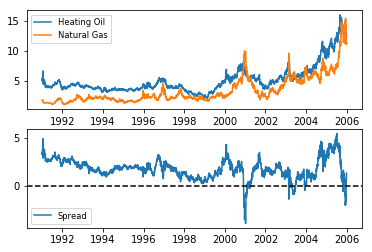

In [273]:
# Plot the prices separately
plt.subplot(2,1,1)
plt.plot(7.25*HO, label='Heating Oil')
plt.plot(NG, label='Natural Gas')
plt.legend(loc='best', fontsize='small')

# Plot the spread
plt.subplot(2,1,2)
plt.plot(7.25*HO-NG, label='Spread')
plt.legend(loc='best', fontsize='small')
plt.axhline(y=0, linestyle='--', color='k')
plt.show()

In [340]:
# A Dog on a Leash? (Part 2)
# 
# To verify that Heating Oil and Natural Gas prices are cointegrated, First apply the Dickey-Fuller 
# test separately to show they are random walks. Then apply the test to the difference, 
# which should strongly reject the random walk hypothesis. The Heating Oil and Natural Gas prices 
# are pre-loaded in DataFrames HO and NG.
# 
# Instructions
# 
# Perform the adfuller test on HO and on NG separately, and save the results (results are a list)
# The argument for adfuller must be a series, so you need to include the column 'Close'
# Print just the p-value (item [1] in the list)
# Do the same thing for the spread, again converting the units of HO, and using the column 'Close' of each DataFrame

In [274]:
# Import the adfuller module from statsmodels
from statsmodels.tsa.stattools import adfuller

# Compute the ADF for HO and NG
result_HO = adfuller(HO['Close'])
print("The p-value for the ADF test on HO is ", result_HO[1])
result_NG = adfuller(NG['Close'])
print("The p-value for the ADF test on NG is ", result_NG[1])

# Compute the ADF of the spread
result_spread = adfuller(7.25 * HO['Close'] - NG['Close'])
print("The p-value for the ADF test on the spread is ", result_spread[1])

The p-value for the ADF test on HO is  0.9567108785017863
The p-value for the ADF test on NG is  0.9008747444676726
The p-value for the ADF test on the spread is  7.019439302142108e-05


In [341]:
# Are Bitcoin and Ethereum Cointegrated?
# 
# Cointegration involves two steps: regressing one time series on the other to get the cointegration vector, 
# and then perform an ADF test on the residuals of the regression. In the last example, 
# there was no need to perform the first step since we implicitly assumed the cointegration vector was (1,−1). 
# In other words, we took the difference between the two series (after doing a units conversion). 
# Here, you will do both steps.
# 
# You will regress the value of one cryptocurrency, bitcoin (BTC), on another cryptocurrency, ethereum (ETH). 
# If we call the regression coefficient b, then the cointegration vector is simply (1,−b). 
# Then perform the ADF test on BTC −b ETH. Bitcoin and Ethereum prices are pre-loaded in DataFrames BTC and ETH.
# 
# Instructions
# 
# Import the statsmodels module fpriceor regression and the adfuller function
# Add a constant to the ETH DataFrame using sm.add_constant()
# Regress BTC on ETH using sm.OLS(y,x).fit(), where y is the dependent variable and x is the independent variable,
# and save the results in result.
# 
# The intercept is in result.params[0] and the slope in result.params[1]
# Run ADF test on BTC −b ETH

In [277]:
price_data = [236.9, 237.1, 238.3, 238.3, 239.9, 239.9, 240.9, 246.6, 244.0, 242.9, 244.4, 246.1, 249.0, 246.4, 251.0, 253.3, 255.0, 263.4, 272.9, 265.0, 265.2, 271.1, 268.8, 275.8, 278.8, 284.3, 285.0, 287.1, 295.6, 304.1, 316.1, 329.1, 314.9, 329.5, 365.2, 404.1, 410.0, 387.2, 374.1, 384.8, 373.8, 379.5, 337.1, 313.2, 336.5, 338.1, 334.7, 322.9, 332.9, 336.5, 335.5, 326.4, 322.4, 327.0, 323.7, 323.0, 321.0, 329.0, 352.6, 358.2, 357.2, 372.2, 376.9, 362.7, 360.0, 361.8, 364.0, 388.0, 387.5, 394.7, 418.9, 418.4, 415.7, 453.0, 436.9, 433.8, 444.0, 464.3, 454.0, 455.5, 463.2, 461.3, 442.2, 436.8, 433.9, 442.4, 455.7, 455.8, 419.4, 424.7, 421.9, 433.9, 428.0, 430.4, 435.7, 435.4, 431.9, 433.9, 433.3, 430.9, 459.1, 454.4, 450.4, 450.0, 449.2, 434.0, 432.8, 430.0, 357.5, 388.7, 378.5, 384.9, 375.3, 418.5, 409.4, 382.9, 387.5, 403.0, 391.4, 391.5, 394.8, 379.6, 378.7, 378.5, 368.0, 371.3, 372.9, 368.9, 388.0, 384.5, 375.4, 377.5, 371.1, 372.7, 378.4, 378.2, 382.0, 391.0, 406.6, 399.0, 407.4, 415.2, 421.2, 420.7, 437.5, 438.6, 437.5, 420.0, 423.9, 423.5, 430.9, 433.1, 433.7, 436.4, 433.1, 420.4, 418.8, 407.4, 396.1, 403.2, 412.2, 411.2, 412.8, 416.0, 419.4, 410.6, 412.5, 415.0, 415.4, 416.1, 418.4, 409.6, 410.2, 411.3, 412.0, 416.7, 417.5, 413.0, 416.4, 417.0, 425.3, 423.0, 416.4, 412.8, 416.0, 417.7, 420.0, 420.2, 419.5, 422.4, 421.5, 422.0, 419.5, 419.5, 423.4, 423.9, 427.8, 425.6, 426.3, 430.9, 433.4, 431.0, 431.0, 437.1, 443.0, 452.3, 448.4, 455.7, 464.5, 466.2, 470.6, 445.3, 451.7, 458.8, 454.0, 457.0, 446.4, 452.2, 448.7, 450.0, 462.3, 461.9, 462.8, 464.2, 452.8, 454.4, 456.5, 458.0, 458.9, 461.5, 455.7, 454.2, 455.6, 438.4, 445.6, 446.3, 442.5, 445.7, 447.0, 451.5, 455.0, 471.3, 523.3, 525.2, 532.5, 531.3, 534.8, 537.9, 571.3, 576.3, 575.2, 586.8, 579.7, 583.2, 577.5, 580.3, 609.5, 677.9, 706.0, 685.0, 698.8, 769.8, 752.3, 759.0, 768.8, 703.1, 667.7, 604.5, 631.1, 670.0, 673.7, 638.6, 657.9, 648.4, 639.4, 673.5, 678.2, 705.0, 663.5, 682.0, 669.9, 678.8, 642.0, 667.3, 657.6, 652.4, 651.0, 666.6, 655.3, 661.7, 667.5, 666.3, 680.0, 675.5, 674.0, 666.9, 667.3, 654.7, 657.5, 661.0, 657.8, 654.1, 657.3, 657.4, 657.0, 655.9, 627.0, 605.2, 537.5, 573.4, 587.5, 583.0, 591.7, 595.1, 591.5, 586.5, 594.9, 587.9, 587.7, 586.5, 575.0, 567.8, 579.0, 574.5, 574.1, 573.7, 581.9, 581.3, 585.2, 582.4, 578.5, 575.6, 579.3, 570.8, 575.4, 573.2, 575.0, 572.9, 573.0, 576.2, 600.9, 611.9, 605.7, 613.0, 615.2, 628.0, 622.1, 623.7, 607.9, 606.7, 608.6, 608.4, 605.4, 607.9, 607.9, 611.4, 608.6, 605.6, 597.0, 596.2, 603.0, 603.7, 601.7, 607.1, 605.7, 605.0, 606.0, 609.0, 615.7, 612.4, 613.0, 610.3, 613.2, 611.9, 618.0, 619.5, 617.4, 618.7, 642.1, 635.8, 635.7, 638.0, 638.2, 641.9, 639.6, 635.1, 629.8, 628.0, 630.8, 652.8, 651.0, 650.0, 654.3, 674.0, 691.2, 690.0, 714.3, 697.4, 696.9, 730.7, 744.6, 690.0, 706.3, 707.0, 717.0, 706.4, 711.2, 721.0, 712.9, 716.9, 704.5, 704.0, 708.3, 712.3, 739.8, 730.7, 748.5, 750.8, 732.0, 736.4, 746.7, 741.5, 738.0, 739.7, 735.7, 729.2, 729.8, 732.4, 742.7, 754.0, 769.3, 767.0, 768.0, 752.0, 759.8, 764.3, 767.9, 773.2, 775.9, 771.0, 778.9, 776.2, 777.7, 776.2, 781.0, 788.6, 790.7, 790.8, 799.0, 834.5, 856.0, 917.3, 891.5, 896.1, 902.1, 925.2, 982.2, 970.7, 960.8, 973.4, 993.0, 1011.5, 1020.7, 1130.3, 1007.0, 895.7, 909.0, 923.3, 902.7, 907.0, 795.8, 812.3, 831.4, 828.0, 833.3, 834.4, 906.0, 888.0, 902.9, 894.3, 925.1, 931.2, 910.7, 887.0, 896.0, 917.0, 922.6, 925.0, 916.5, 923.2, 970.0, 992.8, 1008.4, 1018.0, 1035.5, 1016.3, 1022.6, 1054.0, 1056.7, 994.2, 1002.0, 1018.7, 1010.0, 1002.8, 1013.9, 1014.5, 1038.9, 1057.3, 1062.2, 1059.9, 1089.8, 1128.3, 1128.7, 1186.9, 1186.9, 1158.0, 1184.9, 1195.8, 1195.1, 1230.0, 1269.2, 1292.9, 1274.0, 1279.0, 1285.0, 1237.4, 1150.2, 1197.3, 1109.0, 1188.1, 1235.6, 1245.5, 1247.4, 1263.0, 1175.1, 1069.6, 970.0, 1019.5, 1045.0, 1114.4, 1034.6, 1025.1, 934.9, 963.7, 973.1, 1042.1, 1045.4, 1043.3, 1042.3, 1089.0, 1092.0, 1114.0, 1152.6, 1144.0, 1133.0, 1192.3, 1194.0, 1184.5, 1211.0, 1210.0, 1224.0, 1214.2, 1177.1, 1173.7, 1178.8, 1178.0, 1189.9, 1201.9, 1214.2, 1236.2, 1250.0, 1247.0, 1252.0, 1257.3, 1281.2, 1298.4, 1349.3, 1353.3, 1365.4, 1384.6, 1436.5, 1472.0, 1533.0, 1563.4, 1551.3, 1585.4, 1609.6, 1713.0, 1720.4, 1795.0, 1837.9, 1695.6, 1792.7, 1800.0, 1747.8, 1777.5, 1813.2, 1899.2, 1976.2, 2058.9, 2057.0, 2123.3, 2272.8, 2433.0, 2355.0, 2272.7, 2100.0, 2232.8, 2279.5, 2191.6, 2303.3, 2420.0, 2479.0, 2548.1, 2521.4, 2698.0, 2871.3, 2685.6, 2799.7, 2811.4, 2931.1, 2999.0, 2655.0, 2708.8, 2433.9, 2409.9, 2486.0, 2643.0, 2512.9, 2597.0, 2725.1, 2643.3, 2679.9, 2690.8, 2575.0, 2500.0, 2411.3, 2569.1, 2553.0, 2536.5, 2457.5, 2420.2, 2513.3, 2542.4, 2607.0, 2616.5, 2604.4, 2501.3, 2560.1, 2509.0, 2333.1, 2310.2, 2386.2, 2337.5, 2217.0, 1969.1, 1910.9, 2229.5, 2308.0, 2257.9, 2849.0, 2665.9, 2825.3, 2754.3, 2762.3, 2563.4, 2525.2, 2592.4, 2758.5, 2679.0, 2622.2, 2858.4, 2732.6, 2699.9, 2787.0, 2857.3, 3243.5, 3222.2, 3398.2, 3422.4, 3342.1, 3445.0, 3657.0, 3874.0, 4060.5, 4320.6, 4159.9, 4370.0, 4280.0, 4101.7, 4157.4, 4050.0, 4002.0, 4090.0, 4143.5, 4312.0, 4360.0, 4344.4, 4343.9, 4384.7, 4599.0, 4582.0, 4743.9, 4947.9, 4642.0, 4626.0, 4498.9, 4432.5, 4616.2, 4624.2, 4350.0, 4334.4, 4251.4, 4210.7, 4164.5, 3855.6, 3250.4, 3740.0, 3726.5, 3719.9, 4100.0, 3910.1, 3867.1, 3617.5, 3619.0, 3788.5, 3670.5, 3920.0, 3885.1, 4200.0, 4189.4, 4157.0]
Date_data = ['2015-09-29 00:00:00', '2015-09-30 00:00:00', '2015-10-01 00:00:00', '2015-10-02 00:00:00', '2015-10-03 00:00:00', '2015-10-04 00:00:00', '2015-10-05 00:00:00', '2015-10-06 00:00:00', '2015-10-07 00:00:00', '2015-10-08 00:00:00', '2015-10-09 00:00:00', '2015-10-10 00:00:00', '2015-10-11 00:00:00', '2015-10-12 00:00:00', '2015-10-13 00:00:00', '2015-10-14 00:00:00', '2015-10-15 00:00:00', '2015-10-16 00:00:00', '2015-10-17 00:00:00', '2015-10-18 00:00:00', '2015-10-19 00:00:00', '2015-10-20 00:00:00', '2015-10-21 00:00:00', '2015-10-22 00:00:00', '2015-10-23 00:00:00', '2015-10-24 00:00:00', '2015-10-25 00:00:00', '2015-10-26 00:00:00', '2015-10-27 00:00:00', '2015-10-28 00:00:00', '2015-10-29 00:00:00', '2015-10-30 00:00:00', '2015-10-31 00:00:00', '2015-11-01 00:00:00', '2015-11-02 00:00:00', '2015-11-03 00:00:00', '2015-11-04 00:00:00', '2015-11-05 00:00:00', '2015-11-06 00:00:00', '2015-11-07 00:00:00', '2015-11-08 00:00:00', '2015-11-09 00:00:00', '2015-11-10 00:00:00', '2015-11-11 00:00:00', '2015-11-12 00:00:00', '2015-11-13 00:00:00', '2015-11-14 00:00:00', '2015-11-15 00:00:00', '2015-11-16 00:00:00', '2015-11-17 00:00:00', '2015-11-18 00:00:00', '2015-11-19 00:00:00', '2015-11-20 00:00:00', '2015-11-21 00:00:00', '2015-11-22 00:00:00', '2015-11-23 00:00:00', '2015-11-24 00:00:00', '2015-11-25 00:00:00', '2015-11-26 00:00:00', '2015-11-27 00:00:00', '2015-11-28 00:00:00', '2015-11-29 00:00:00', '2015-11-30 00:00:00', '2015-12-01 00:00:00', '2015-12-02 00:00:00', '2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-12-05 00:00:00', '2015-12-06 00:00:00', '2015-12-07 00:00:00', '2015-12-08 00:00:00', '2015-12-09 00:00:00', '2015-12-10 00:00:00', '2015-12-11 00:00:00', '2015-12-12 00:00:00', '2015-12-13 00:00:00', '2015-12-14 00:00:00', '2015-12-15 00:00:00', '2015-12-16 00:00:00', '2015-12-17 00:00:00', '2015-12-18 00:00:00', '2015-12-19 00:00:00', '2015-12-20 00:00:00', '2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00', '2015-12-25 00:00:00', '2015-12-26 00:00:00', '2015-12-27 00:00:00', '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00', '2015-12-31 00:00:00', '2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00', '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00', '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-09 00:00:00', '2016-01-10 00:00:00', '2016-01-11 00:00:00', '2016-01-12 00:00:00', '2016-01-13 00:00:00', '2016-01-14 00:00:00', '2016-01-15 00:00:00', '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-18 00:00:00', '2016-01-19 00:00:00', '2016-01-20 00:00:00', '2016-01-21 00:00:00', '2016-01-22 00:00:00', '2016-01-23 00:00:00', '2016-01-24 00:00:00', '2016-01-25 00:00:00', '2016-01-26 00:00:00', '2016-01-27 00:00:00', '2016-01-28 00:00:00', '2016-01-29 00:00:00', '2016-01-30 00:00:00', '2016-01-31 00:00:00', '2016-02-01 00:00:00', '2016-02-02 00:00:00', '2016-02-03 00:00:00', '2016-02-04 00:00:00', '2016-02-05 00:00:00', '2016-02-06 00:00:00', '2016-02-07 00:00:00', '2016-02-08 00:00:00', '2016-02-09 00:00:00', '2016-02-10 00:00:00', '2016-02-11 00:00:00', '2016-02-12 00:00:00', '2016-02-13 00:00:00', '2016-02-14 00:00:00', '2016-02-15 00:00:00', '2016-02-16 00:00:00', '2016-02-17 00:00:00', '2016-02-18 00:00:00', '2016-02-19 00:00:00', '2016-02-20 00:00:00', '2016-02-21 00:00:00', '2016-02-22 00:00:00', '2016-02-23 00:00:00', '2016-02-24 00:00:00', '2016-02-25 00:00:00', '2016-02-26 00:00:00', '2016-02-27 00:00:00', '2016-02-28 00:00:00', '2016-02-29 00:00:00', '2016-03-01 00:00:00', '2016-03-02 00:00:00', '2016-03-03 00:00:00', '2016-03-04 00:00:00', '2016-03-05 00:00:00', '2016-03-06 00:00:00', '2016-03-07 00:00:00', '2016-03-08 00:00:00', '2016-03-09 00:00:00', '2016-03-10 00:00:00', '2016-03-11 00:00:00', '2016-03-12 00:00:00', '2016-03-13 00:00:00', '2016-03-14 00:00:00', '2016-03-15 00:00:00', '2016-03-16 00:00:00', '2016-03-17 00:00:00', '2016-03-18 00:00:00', '2016-03-19 00:00:00', '2016-03-20 00:00:00', '2016-03-21 00:00:00', '2016-03-22 00:00:00', '2016-03-23 00:00:00', '2016-03-24 00:00:00', '2016-03-25 00:00:00', '2016-03-26 00:00:00', '2016-03-27 00:00:00', '2016-03-28 00:00:00', '2016-03-29 00:00:00', '2016-03-30 00:00:00', '2016-03-31 00:00:00', '2016-04-01 00:00:00', '2016-04-02 00:00:00', '2016-04-03 00:00:00', '2016-04-04 00:00:00', '2016-04-05 00:00:00', '2016-04-06 00:00:00', '2016-04-07 00:00:00', '2016-04-08 00:00:00', '2016-04-09 00:00:00', '2016-04-10 00:00:00', '2016-04-11 00:00:00', '2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00', '2016-04-15 00:00:00', '2016-04-16 00:00:00', '2016-04-17 00:00:00', '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00', '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-23 00:00:00', '2016-04-24 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00', '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00', '2016-04-30 00:00:00', '2016-05-01 00:00:00', '2016-05-02 00:00:00', '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00', '2016-05-06 00:00:00', '2016-05-07 00:00:00', '2016-05-08 00:00:00', '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00', '2016-05-12 00:00:00', '2016-05-13 00:00:00', '2016-05-14 00:00:00', '2016-05-15 00:00:00', '2016-05-16 00:00:00', '2016-05-17 00:00:00', '2016-05-18 00:00:00', '2016-05-19 00:00:00', '2016-05-20 00:00:00', '2016-05-21 00:00:00', '2016-05-22 00:00:00', '2016-05-23 00:00:00', '2016-05-24 00:00:00', '2016-05-25 00:00:00', '2016-05-26 00:00:00', '2016-05-27 00:00:00', '2016-05-28 00:00:00', '2016-05-29 00:00:00', '2016-05-30 00:00:00', '2016-05-31 00:00:00', '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00', '2016-06-04 00:00:00', '2016-06-05 00:00:00', '2016-06-06 00:00:00', '2016-06-07 00:00:00', '2016-06-08 00:00:00', '2016-06-09 00:00:00', '2016-06-10 00:00:00', '2016-06-11 00:00:00', '2016-06-12 00:00:00', '2016-06-13 00:00:00', '2016-06-14 00:00:00', '2016-06-15 00:00:00', '2016-06-16 00:00:00', '2016-06-17 00:00:00', '2016-06-18 00:00:00', '2016-06-19 00:00:00', '2016-06-20 00:00:00', '2016-06-21 00:00:00', '2016-06-22 00:00:00', '2016-06-23 00:00:00', '2016-06-24 00:00:00', '2016-06-25 00:00:00', '2016-06-26 00:00:00', '2016-06-27 00:00:00', '2016-06-28 00:00:00', '2016-06-29 00:00:00', '2016-06-30 00:00:00', '2016-07-01 00:00:00', '2016-07-02 00:00:00', '2016-07-03 00:00:00', '2016-07-04 00:00:00', '2016-07-05 00:00:00', '2016-07-06 00:00:00', '2016-07-07 00:00:00', '2016-07-08 00:00:00', '2016-07-09 00:00:00', '2016-07-10 00:00:00', '2016-07-11 00:00:00', '2016-07-12 00:00:00', '2016-07-13 00:00:00', '2016-07-14 00:00:00', '2016-07-15 00:00:00', '2016-07-16 00:00:00', '2016-07-17 00:00:00', '2016-07-18 00:00:00', '2016-07-19 00:00:00', '2016-07-20 00:00:00', '2016-07-21 00:00:00', '2016-07-22 00:00:00', '2016-07-23 00:00:00', '2016-07-24 00:00:00', '2016-07-25 00:00:00', '2016-07-26 00:00:00', '2016-07-27 00:00:00', '2016-07-28 00:00:00', '2016-07-29 00:00:00', '2016-07-30 00:00:00', '2016-07-31 00:00:00', '2016-08-01 00:00:00', '2016-08-02 00:00:00', '2016-08-03 00:00:00', '2016-08-04 00:00:00', '2016-08-05 00:00:00', '2016-08-06 00:00:00', '2016-08-07 00:00:00', '2016-08-08 00:00:00', '2016-08-09 00:00:00', '2016-08-10 00:00:00', '2016-08-11 00:00:00', '2016-08-12 00:00:00', '2016-08-13 00:00:00', '2016-08-14 00:00:00', '2016-08-15 00:00:00', '2016-08-16 00:00:00', '2016-08-17 00:00:00', '2016-08-18 00:00:00', '2016-08-19 00:00:00', '2016-08-20 00:00:00', '2016-08-21 00:00:00', '2016-08-22 00:00:00', '2016-08-23 00:00:00', '2016-08-24 00:00:00', '2016-08-25 00:00:00', '2016-08-26 00:00:00', '2016-08-27 00:00:00', '2016-08-28 00:00:00', '2016-08-29 00:00:00', '2016-08-30 00:00:00', '2016-08-31 00:00:00', '2016-09-01 00:00:00', '2016-09-02 00:00:00', '2016-09-03 00:00:00', '2016-09-04 00:00:00', '2016-09-05 00:00:00', '2016-09-06 00:00:00', '2016-09-07 00:00:00', '2016-09-08 00:00:00', '2016-09-09 00:00:00', '2016-09-10 00:00:00', '2016-09-11 00:00:00', '2016-09-12 00:00:00', '2016-09-13 00:00:00', '2016-09-14 00:00:00', '2016-09-15 00:00:00', '2016-09-16 00:00:00', '2016-09-17 00:00:00', '2016-09-18 00:00:00', '2016-09-19 00:00:00', '2016-09-20 00:00:00', '2016-09-21 00:00:00', '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-09-24 00:00:00', '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-27 00:00:00', '2016-09-28 00:00:00', '2016-09-29 00:00:00', '2016-09-30 00:00:00', '2016-10-01 00:00:00', '2016-10-02 00:00:00', '2016-10-03 00:00:00', '2016-10-04 00:00:00', '2016-10-05 00:00:00', '2016-10-06 00:00:00', '2016-10-07 00:00:00', '2016-10-08 00:00:00', '2016-10-09 00:00:00', '2016-10-10 00:00:00', '2016-10-11 00:00:00', '2016-10-12 00:00:00', '2016-10-13 00:00:00', '2016-10-14 00:00:00', '2016-10-15 00:00:00', '2016-10-16 00:00:00', '2016-10-17 00:00:00', '2016-10-18 00:00:00', '2016-10-19 00:00:00', '2016-10-20 00:00:00', '2016-10-21 00:00:00', '2016-10-22 00:00:00', '2016-10-23 00:00:00', '2016-10-24 00:00:00', '2016-10-25 00:00:00', '2016-10-26 00:00:00', '2016-10-27 00:00:00', '2016-10-28 00:00:00', '2016-10-29 00:00:00', '2016-10-30 00:00:00', '2016-10-31 00:00:00', '2016-11-01 00:00:00', '2016-11-02 00:00:00', '2016-11-03 00:00:00', '2016-11-04 00:00:00', '2016-11-05 00:00:00', '2016-11-06 00:00:00', '2016-11-07 00:00:00', '2016-11-08 00:00:00', '2016-11-09 00:00:00', '2016-11-10 00:00:00', '2016-11-11 00:00:00', '2016-11-12 00:00:00', '2016-11-13 00:00:00', '2016-11-14 00:00:00', '2016-11-15 00:00:00', '2016-11-16 00:00:00', '2016-11-17 00:00:00', '2016-11-18 00:00:00', '2016-11-19 00:00:00', '2016-11-20 00:00:00', '2016-11-21 00:00:00', '2016-11-22 00:00:00', '2016-11-23 00:00:00', '2016-11-24 00:00:00', '2016-11-25 00:00:00', '2016-11-26 00:00:00', '2016-11-27 00:00:00', '2016-11-28 00:00:00', '2016-11-29 00:00:00', '2016-11-30 00:00:00', '2016-12-01 00:00:00', '2016-12-02 00:00:00', '2016-12-03 00:00:00', '2016-12-04 00:00:00', '2016-12-05 00:00:00', '2016-12-06 00:00:00', '2016-12-07 00:00:00', '2016-12-08 00:00:00', '2016-12-09 00:00:00', '2016-12-10 00:00:00', '2016-12-11 00:00:00', '2016-12-12 00:00:00', '2016-12-13 00:00:00', '2016-12-14 00:00:00', '2016-12-15 00:00:00', '2016-12-16 00:00:00', '2016-12-17 00:00:00', '2016-12-18 00:00:00', '2016-12-19 00:00:00', '2016-12-20 00:00:00', '2016-12-21 00:00:00', '2016-12-22 00:00:00', '2016-12-23 00:00:00', '2016-12-24 00:00:00', '2016-12-25 00:00:00', '2016-12-26 00:00:00', '2016-12-27 00:00:00', '2016-12-28 00:00:00', '2016-12-29 00:00:00', '2016-12-30 00:00:00', '2016-12-31 00:00:00', '2017-01-01 00:00:00', '2017-01-02 00:00:00', '2017-01-03 00:00:00', '2017-01-04 00:00:00', '2017-01-05 00:00:00', '2017-01-06 00:00:00', '2017-01-07 00:00:00', '2017-01-08 00:00:00', '2017-01-09 00:00:00', '2017-01-10 00:00:00', '2017-01-11 00:00:00', '2017-01-12 00:00:00', '2017-01-13 00:00:00', '2017-01-14 00:00:00', '2017-01-15 00:00:00', '2017-01-16 00:00:00', '2017-01-17 00:00:00', '2017-01-18 00:00:00', '2017-01-19 00:00:00', '2017-01-20 00:00:00', '2017-01-21 00:00:00', '2017-01-22 00:00:00', '2017-01-23 00:00:00', '2017-01-24 00:00:00', '2017-01-25 00:00:00', '2017-01-26 00:00:00', '2017-01-27 00:00:00', '2017-01-28 00:00:00', '2017-01-29 00:00:00', '2017-01-30 00:00:00', '2017-01-31 00:00:00', '2017-02-01 00:00:00', '2017-02-02 00:00:00', '2017-02-03 00:00:00', '2017-02-04 00:00:00', '2017-02-05 00:00:00', '2017-02-06 00:00:00', '2017-02-07 00:00:00', '2017-02-08 00:00:00', '2017-02-09 00:00:00', '2017-02-10 00:00:00', '2017-02-11 00:00:00', '2017-02-12 00:00:00', '2017-02-13 00:00:00', '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00', '2017-02-17 00:00:00', '2017-02-18 00:00:00', '2017-02-19 00:00:00', '2017-02-20 00:00:00', '2017-02-21 00:00:00', '2017-02-22 00:00:00', '2017-02-23 00:00:00', '2017-02-24 00:00:00', '2017-02-25 00:00:00', '2017-02-26 00:00:00', '2017-02-27 00:00:00', '2017-02-28 00:00:00', '2017-03-01 00:00:00', '2017-03-02 00:00:00', '2017-03-03 00:00:00', '2017-03-04 00:00:00', '2017-03-05 00:00:00', '2017-03-06 00:00:00', '2017-03-07 00:00:00', '2017-03-08 00:00:00', '2017-03-09 00:00:00', '2017-03-10 00:00:00', '2017-03-11 00:00:00', '2017-03-12 00:00:00', '2017-03-13 00:00:00', '2017-03-14 00:00:00', '2017-03-15 00:00:00', '2017-03-16 00:00:00', '2017-03-17 00:00:00', '2017-03-18 00:00:00', '2017-03-19 00:00:00', '2017-03-20 00:00:00', '2017-03-21 00:00:00', '2017-03-22 00:00:00', '2017-03-23 00:00:00', '2017-03-24 00:00:00', '2017-03-25 00:00:00', '2017-03-26 00:00:00', '2017-03-27 00:00:00', '2017-03-28 00:00:00', '2017-03-29 00:00:00', '2017-03-30 00:00:00', '2017-03-31 00:00:00', '2017-04-01 00:00:00', '2017-04-02 00:00:00', '2017-04-03 00:00:00', '2017-04-04 00:00:00', '2017-04-05 00:00:00', '2017-04-06 00:00:00', '2017-04-07 00:00:00', '2017-04-08 00:00:00', '2017-04-09 00:00:00', '2017-04-10 00:00:00', '2017-04-11 00:00:00', '2017-04-12 00:00:00', '2017-04-13 00:00:00', '2017-04-14 00:00:00', '2017-04-15 00:00:00', '2017-04-16 00:00:00', '2017-04-17 00:00:00', '2017-04-18 00:00:00', '2017-04-19 00:00:00', '2017-04-20 00:00:00', '2017-04-21 00:00:00', '2017-04-22 00:00:00', '2017-04-23 00:00:00', '2017-04-24 00:00:00', '2017-04-25 00:00:00', '2017-04-26 00:00:00', '2017-04-27 00:00:00', '2017-04-28 00:00:00', '2017-04-29 00:00:00', '2017-04-30 00:00:00', '2017-05-01 00:00:00', '2017-05-02 00:00:00', '2017-05-03 00:00:00', '2017-05-04 00:00:00', '2017-05-05 00:00:00', '2017-05-06 00:00:00', '2017-05-07 00:00:00', '2017-05-08 00:00:00', '2017-05-09 00:00:00', '2017-05-10 00:00:00', '2017-05-11 00:00:00', '2017-05-12 00:00:00', '2017-05-13 00:00:00', '2017-05-14 00:00:00', '2017-05-15 00:00:00', '2017-05-16 00:00:00', '2017-05-17 00:00:00', '2017-05-18 00:00:00', '2017-05-19 00:00:00', '2017-05-20 00:00:00', '2017-05-21 00:00:00', '2017-05-22 00:00:00', '2017-05-23 00:00:00', '2017-05-24 00:00:00', '2017-05-25 00:00:00', '2017-05-26 00:00:00', '2017-05-27 00:00:00', '2017-05-28 00:00:00', '2017-05-29 00:00:00', '2017-05-30 00:00:00', '2017-05-31 00:00:00', '2017-06-01 00:00:00', '2017-06-02 00:00:00', '2017-06-03 00:00:00', '2017-06-04 00:00:00', '2017-06-05 00:00:00', '2017-06-06 00:00:00', '2017-06-07 00:00:00', '2017-06-08 00:00:00', '2017-06-09 00:00:00', '2017-06-10 00:00:00', '2017-06-11 00:00:00', '2017-06-12 00:00:00', '2017-06-13 00:00:00', '2017-06-14 00:00:00', '2017-06-15 00:00:00', '2017-06-16 00:00:00', '2017-06-17 00:00:00', '2017-06-18 00:00:00', '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00', '2017-06-22 00:00:00', '2017-06-23 00:00:00', '2017-06-24 00:00:00', '2017-06-25 00:00:00', '2017-06-26 00:00:00', '2017-06-27 00:00:00', '2017-06-28 00:00:00', '2017-06-29 00:00:00', '2017-06-30 00:00:00', '2017-07-01 00:00:00', '2017-07-02 00:00:00', '2017-07-03 00:00:00', '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00', '2017-07-07 00:00:00', '2017-07-08 00:00:00', '2017-07-09 00:00:00', '2017-07-10 00:00:00', '2017-07-11 00:00:00', '2017-07-12 00:00:00', '2017-07-13 00:00:00', '2017-07-14 00:00:00', '2017-07-15 00:00:00', '2017-07-16 00:00:00', '2017-07-17 00:00:00', '2017-07-18 00:00:00', '2017-07-19 00:00:00', '2017-07-20 00:00:00', '2017-07-21 00:00:00', '2017-07-22 00:00:00', '2017-07-23 00:00:00', '2017-07-24 00:00:00', '2017-07-25 00:00:00', '2017-07-26 00:00:00', '2017-07-27 00:00:00', '2017-07-28 00:00:00', '2017-07-29 00:00:00', '2017-07-30 00:00:00', '2017-07-31 00:00:00', '2017-08-01 00:00:00', '2017-08-02 00:00:00', '2017-08-03 00:00:00', '2017-08-04 00:00:00', '2017-08-05 00:00:00', '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00', '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00', '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00', '2017-08-15 00:00:00', '2017-08-16 00:00:00', '2017-08-17 00:00:00', '2017-08-18 00:00:00', '2017-08-19 00:00:00', '2017-08-20 00:00:00', '2017-08-21 00:00:00', '2017-08-22 00:00:00', '2017-08-23 00:00:00', '2017-08-24 00:00:00', '2017-08-25 00:00:00', '2017-08-26 00:00:00', '2017-08-27 00:00:00', '2017-08-28 00:00:00', '2017-08-29 00:00:00', '2017-08-30 00:00:00', '2017-08-31 00:00:00', '2017-09-01 00:00:00', '2017-09-02 00:00:00', '2017-09-03 00:00:00', '2017-09-04 00:00:00', '2017-09-05 00:00:00', '2017-09-06 00:00:00', '2017-09-07 00:00:00', '2017-09-08 00:00:00', '2017-09-09 00:00:00', '2017-09-10 00:00:00', '2017-09-11 00:00:00', '2017-09-12 00:00:00', '2017-09-13 00:00:00', '2017-09-14 00:00:00', '2017-09-15 00:00:00', '2017-09-16 00:00:00', '2017-09-17 00:00:00', '2017-09-18 00:00:00', '2017-09-19 00:00:00', '2017-09-20 00:00:00', '2017-09-21 00:00:00', '2017-09-22 00:00:00', '2017-09-23 00:00:00', '2017-09-24 00:00:00', '2017-09-25 00:00:00', '2017-09-26 00:00:00', '2017-09-27 00:00:00', '2017-09-28 00:00:00', '2017-09-29 00:00:00']

In [278]:
BTC = pd.DataFrame(list(zip(Date_data, price_data)), columns =['Date','Price']) 
BTC.Date = pd.to_datetime(BTC.Date)
BTC.set_index('Date',inplace=True)

In [280]:
price_data = [0.68, 0.71, 0.65, 0.66, 0.68, 0.61, 0.61, 0.65, 0.6, 0.62, 0.64, 0.64, 0.6, 0.63, 0.6, 0.5, 0.56, 0.52, 0.52, 0.5, 0.5, 0.44, 0.42, 0.61, 0.56, 0.56, 0.62, 0.71, 0.83, 0.99, 1.12, 1.14, 0.87, 0.99, 0.99, 1.06, 0.8, 0.88, 0.99, 0.93, 1.0, 1.0, 0.9, 0.75, 0.88, 0.9, 0.88, 0.92, 0.93, 1.0, 1.0, 0.94, 0.92, 0.96, 0.97, 0.92, 0.91, 0.87, 0.86, 0.88, 0.91, 0.87, 0.88, 0.87, 0.82, 0.83, 0.84, 0.87, 0.82, 0.79, 0.81, 0.81, 0.84, 0.9, 0.96, 0.92, 0.99, 1.0, 0.8, 0.94, 0.9, 0.89, 1.07, 0.91, 0.88, 0.87, 0.87, 0.88, 0.85, 0.92, 0.87, 0.86, 0.89, 0.95, 0.92, 0.95, 0.96, 0.95, 0.94, 0.95, 0.94, 0.99, 0.99, 1.0, 1.08, 1.22, 1.14, 1.16, 1.2, 1.22, 1.31, 1.47, 1.22, 1.54, 1.54, 1.52, 2.03, 2.1, 2.5, 2.3, 2.42, 2.55, 2.41, 2.44, 2.2, 2.17, 2.45, 2.53, 2.57, 2.56, 2.53, 3.0, 3.16, 3.76, 4.35, 6.38, 5.27, 5.22, 5.2, 5.22, 4.25, 3.86, 4.36, 4.45, 4.37, 4.63, 5.6, 5.7, 6.23, 5.93, 6.03, 6.31, 6.5, 6.35, 7.59, 8.7, 9.35, 9.96, 11.0, 10.98, 9.5, 9.88, 11.55, 11.11, 11.25, 13.25, 15.0, 12.5, 13.09, 12.92, 11.14, 10.75, 10.55, 10.06, 11.97, 10.96, 12.29, 11.13, 10.69, 11.0, 10.5, 11.58, 11.73, 11.88, 11.41, 11.63, 11.61, 11.58, 11.1, 10.39, 10.79, 10.08, 9.74, 9.16, 8.8, 8.72, 7.53, 8.02, 8.48, 8.22, 8.48, 9.45, 8.92, 8.77, 8.54, 8.15, 7.83, 8.31, 8.0, 7.43, 7.5, 7.77, 7.3, 7.51, 8.83, 8.76, 10.03, 9.37, 9.43, 9.79, 9.27, 9.3, 9.44, 9.32, 9.39, 9.97, 10.1, 10.48, 10.14, 9.94, 11.04, 12.26, 13.29, 14.49, 13.73, 13.95, 14.21, 13.45, 12.62, 12.53, 12.37, 11.11, 11.56, 12.28, 12.48, 13.85, 13.83, 13.78, 13.78, 13.66, 13.85, 13.96, 14.41, 14.44, 14.49, 13.97, 14.01, 15.57, 17.55, 18.7, 18.3, 20.61, 15.49, 11.36, 12.33, 11.7, 12.71, 13.21, 13.58, 14.25, 14.28, 13.82, 14.04, 12.15, 12.76, 12.4, 12.23, 12.04, 11.85, 11.34, 10.45, 10.51, 10.07, 11.3, 10.92, 10.97, 10.58, 10.54, 10.44, 11.55, 11.88, 11.59, 11.19, 11.03, 11.63, 12.54, 12.66, 14.82, 14.4, 12.63, 13.84, 12.08, 13.05, 12.87, 12.87, 12.57, 11.86, 11.04, 8.3, 10.42, 11.21, 11.05, 10.95, 10.98, 11.29, 12.22, 12.22, 11.68, 11.78, 11.56, 11.21, 11.21, 11.17, 10.77, 10.77, 10.71, 11.28, 11.14, 11.07, 11.01, 11.01, 11.35, 11.26, 11.19, 10.99, 10.95, 11.21, 11.55, 12.21, 12.08, 11.85, 11.71, 11.75, 11.7, 11.59, 11.39, 11.72, 12.05, 11.64, 11.89, 11.92, 11.97, 11.96, 12.61, 12.83, 12.39, 12.93, 14.72, 13.72, 13.11, 13.36, 12.91, 13.05, 12.89, 13.09, 13.3, 13.17, 13.24, 13.21, 13.23, 13.45, 13.32, 13.09, 12.87, 12.68, 12.24, 12.06, 11.74, 11.75, 11.77, 12.02, 11.9, 11.96, 11.93, 11.98, 12.5, 11.98, 12.05, 12.07, 12.06, 11.95, 11.93, 11.38, 11.5, 11.43, 11.08, 10.39, 11.22, 10.91, 10.75, 10.82, 10.86, 11.13, 11.11, 10.97, 10.9, 10.86, 10.64, 10.52, 10.29, 9.96, 10.13, 10.0, 10.22, 10.01, 9.95, 9.53, 9.7, 9.57, 9.56, 9.84, 9.78, 9.22, 9.39, 9.34, 8.91, 8.66, 8.18, 8.59, 8.44, 7.65, 7.9, 7.54, 6.69, 7.61, 8.35, 8.3, 8.52, 8.09, 8.2, 8.45, 8.4, 8.23, 7.76, 7.85, 7.66, 7.89, 7.61, 7.59, 7.87, 7.64, 7.16, 7.23, 7.19, 7.21, 7.15, 7.57, 8.21, 8.16, 8.05, 8.14, 8.33, 9.59, 10.88, 10.2, 10.07, 9.78, 10.27, 10.2, 10.55, 9.83, 9.81, 9.78, 9.78, 9.88, 9.59, 10.14, 10.19, 10.43, 10.6, 10.91, 10.71, 10.78, 10.51, 10.51, 10.65, 10.51, 10.54, 10.47, 10.62, 10.71, 10.71, 10.78, 10.95, 11.32, 11.22, 11.32, 11.45, 11.39, 10.94, 11.34, 11.43, 11.42, 11.39, 13.0, 12.97, 12.95, 12.72, 12.83, 12.82, 12.52, 12.77, 12.69, 13.13, 13.11, 13.57, 14.59, 15.55, 16.07, 17.55, 19.08, 19.48, 18.61, 19.22, 19.75, 18.91, 16.54, 17.71, 19.13, 21.45, 23.31, 28.45, 28.58, 35.18, 45.51, 44.48, 34.0, 43.12, 42.51, 42.67, 41.65, 43.2, 53.19, 50.62, 50.63, 49.06, 50.25, 53.07, 51.91, 49.91, 50.6, 48.55, 44.13, 44.43, 44.9, 43.23, 42.31, 44.37, 43.72, 43.74, 43.74, 46.38, 49.97, 47.32, 48.89, 48.22, 47.94, 49.88, 47.88, 49.36, 48.27, 48.41, 48.75, 49.94, 50.09, 53.28, 63.14, 72.42, 69.83, 79.83, 77.53, 77.25, 80.37, 94.55, 90.79, 94.82, 90.46, 88.39, 86.27, 87.83, 88.2, 85.15, 87.96, 88.72, 90.32, 87.8, 86.98, 95.88, 124.38, 123.06, 148.0, 160.39, 169.5, 193.03, 180.87, 163.81, 159.77, 175.53, 194.91, 228.59, 228.47, 222.03, 221.91, 224.95, 245.45, 247.98, 264.69, 255.99, 258.64, 279.39, 341.61, 343.03, 397.18, 387.99, 341.7, 343.73, 354.26, 368.99, 351.38, 358.71, 350.89, 326.73, 320.02, 326.96, 304.92, 278.4, 251.64, 287.24, 315.32, 292.98, 280.73, 262.52, 284.46, 276.37, 269.0, 265.98, 266.01, 241.19, 246.68, 237.67, 204.56, 190.61, 224.81, 204.99, 197.23, 168.42, 155.47, 190.73, 227.0, 194.14, 226.35, 217.0, 230.69, 228.34, 225.76, 203.79, 203.01, 199.62, 193.51, 179.34, 194.16, 200.82, 225.73, 217.92, 224.0, 220.72, 251.85, 264.16, 269.9, 295.95, 295.26, 300.52, 309.65, 308.35, 296.67, 299.16, 286.71, 300.45, 300.66, 292.87, 293.58, 297.79, 321.99, 314.19, 317.5, 324.56, 330.14, 332.99, 348.2, 347.54, 372.48, 384.1, 389.2, 392.87, 354.85, 353.06, 316.87, 320.08, 339.38, 335.56, 308.0, 304.99, 300.33, 298.47, 294.5, 275.71, 223.84, 260.88, 255.85, 259.66, 298.0, 282.55, 283.34, 258.11, 263.88, 286.03, 283.21, 294.41, 288.77, 309.85, 302.33, 291.99]
Date_data = ['2015-09-29 00:00:00', '2015-09-30 00:00:00', '2015-10-01 00:00:00', '2015-10-02 00:00:00', '2015-10-03 00:00:00', '2015-10-04 00:00:00', '2015-10-05 00:00:00', '2015-10-06 00:00:00', '2015-10-07 00:00:00', '2015-10-08 00:00:00', '2015-10-09 00:00:00', '2015-10-10 00:00:00', '2015-10-11 00:00:00', '2015-10-12 00:00:00', '2015-10-13 00:00:00', '2015-10-14 00:00:00', '2015-10-15 00:00:00', '2015-10-16 00:00:00', '2015-10-17 00:00:00', '2015-10-18 00:00:00', '2015-10-19 00:00:00', '2015-10-20 00:00:00', '2015-10-21 00:00:00', '2015-10-22 00:00:00', '2015-10-23 00:00:00', '2015-10-24 00:00:00', '2015-10-25 00:00:00', '2015-10-26 00:00:00', '2015-10-27 00:00:00', '2015-10-28 00:00:00', '2015-10-29 00:00:00', '2015-10-30 00:00:00', '2015-10-31 00:00:00', '2015-11-01 00:00:00', '2015-11-02 00:00:00', '2015-11-03 00:00:00', '2015-11-04 00:00:00', '2015-11-05 00:00:00', '2015-11-06 00:00:00', '2015-11-07 00:00:00', '2015-11-08 00:00:00', '2015-11-09 00:00:00', '2015-11-10 00:00:00', '2015-11-11 00:00:00', '2015-11-12 00:00:00', '2015-11-13 00:00:00', '2015-11-14 00:00:00', '2015-11-15 00:00:00', '2015-11-16 00:00:00', '2015-11-17 00:00:00', '2015-11-18 00:00:00', '2015-11-19 00:00:00', '2015-11-20 00:00:00', '2015-11-21 00:00:00', '2015-11-22 00:00:00', '2015-11-23 00:00:00', '2015-11-24 00:00:00', '2015-11-25 00:00:00', '2015-11-26 00:00:00', '2015-11-27 00:00:00', '2015-11-28 00:00:00', '2015-11-29 00:00:00', '2015-11-30 00:00:00', '2015-12-01 00:00:00', '2015-12-02 00:00:00', '2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-12-05 00:00:00', '2015-12-06 00:00:00', '2015-12-07 00:00:00', '2015-12-08 00:00:00', '2015-12-09 00:00:00', '2015-12-10 00:00:00', '2015-12-11 00:00:00', '2015-12-12 00:00:00', '2015-12-13 00:00:00', '2015-12-14 00:00:00', '2015-12-15 00:00:00', '2015-12-16 00:00:00', '2015-12-17 00:00:00', '2015-12-18 00:00:00', '2015-12-19 00:00:00', '2015-12-20 00:00:00', '2015-12-21 00:00:00', '2015-12-22 00:00:00', '2015-12-23 00:00:00', '2015-12-24 00:00:00', '2015-12-25 00:00:00', '2015-12-26 00:00:00', '2015-12-27 00:00:00', '2015-12-28 00:00:00', '2015-12-29 00:00:00', '2015-12-30 00:00:00', '2015-12-31 00:00:00', '2016-01-01 00:00:00', '2016-01-02 00:00:00', '2016-01-03 00:00:00', '2016-01-04 00:00:00', '2016-01-05 00:00:00', '2016-01-06 00:00:00', '2016-01-07 00:00:00', '2016-01-08 00:00:00', '2016-01-09 00:00:00', '2016-01-10 00:00:00', '2016-01-11 00:00:00', '2016-01-12 00:00:00', '2016-01-13 00:00:00', '2016-01-14 00:00:00', '2016-01-15 00:00:00', '2016-01-16 00:00:00', '2016-01-17 00:00:00', '2016-01-18 00:00:00', '2016-01-19 00:00:00', '2016-01-20 00:00:00', '2016-01-21 00:00:00', '2016-01-22 00:00:00', '2016-01-23 00:00:00', '2016-01-24 00:00:00', '2016-01-25 00:00:00', '2016-01-26 00:00:00', '2016-01-27 00:00:00', '2016-01-28 00:00:00', '2016-01-29 00:00:00', '2016-01-30 00:00:00', '2016-01-31 00:00:00', '2016-02-01 00:00:00', '2016-02-02 00:00:00', '2016-02-03 00:00:00', '2016-02-04 00:00:00', '2016-02-05 00:00:00', '2016-02-06 00:00:00', '2016-02-07 00:00:00', '2016-02-08 00:00:00', '2016-02-09 00:00:00', '2016-02-10 00:00:00', '2016-02-11 00:00:00', '2016-02-12 00:00:00', '2016-02-13 00:00:00', '2016-02-14 00:00:00', '2016-02-15 00:00:00', '2016-02-16 00:00:00', '2016-02-17 00:00:00', '2016-02-18 00:00:00', '2016-02-19 00:00:00', '2016-02-20 00:00:00', '2016-02-21 00:00:00', '2016-02-22 00:00:00', '2016-02-23 00:00:00', '2016-02-24 00:00:00', '2016-02-25 00:00:00', '2016-02-26 00:00:00', '2016-02-27 00:00:00', '2016-02-28 00:00:00', '2016-02-29 00:00:00', '2016-03-01 00:00:00', '2016-03-02 00:00:00', '2016-03-03 00:00:00', '2016-03-04 00:00:00', '2016-03-05 00:00:00', '2016-03-06 00:00:00', '2016-03-07 00:00:00', '2016-03-08 00:00:00', '2016-03-09 00:00:00', '2016-03-10 00:00:00', '2016-03-11 00:00:00', '2016-03-12 00:00:00', '2016-03-13 00:00:00', '2016-03-14 00:00:00', '2016-03-15 00:00:00', '2016-03-16 00:00:00', '2016-03-17 00:00:00', '2016-03-18 00:00:00', '2016-03-19 00:00:00', '2016-03-20 00:00:00', '2016-03-21 00:00:00', '2016-03-22 00:00:00', '2016-03-23 00:00:00', '2016-03-24 00:00:00', '2016-03-25 00:00:00', '2016-03-26 00:00:00', '2016-03-27 00:00:00', '2016-03-28 00:00:00', '2016-03-29 00:00:00', '2016-03-30 00:00:00', '2016-03-31 00:00:00', '2016-04-01 00:00:00', '2016-04-02 00:00:00', '2016-04-03 00:00:00', '2016-04-04 00:00:00', '2016-04-05 00:00:00', '2016-04-06 00:00:00', '2016-04-07 00:00:00', '2016-04-08 00:00:00', '2016-04-09 00:00:00', '2016-04-10 00:00:00', '2016-04-11 00:00:00', '2016-04-12 00:00:00', '2016-04-13 00:00:00', '2016-04-14 00:00:00', '2016-04-15 00:00:00', '2016-04-16 00:00:00', '2016-04-17 00:00:00', '2016-04-18 00:00:00', '2016-04-19 00:00:00', '2016-04-20 00:00:00', '2016-04-21 00:00:00', '2016-04-22 00:00:00', '2016-04-23 00:00:00', '2016-04-24 00:00:00', '2016-04-25 00:00:00', '2016-04-26 00:00:00', '2016-04-27 00:00:00', '2016-04-28 00:00:00', '2016-04-29 00:00:00', '2016-04-30 00:00:00', '2016-05-01 00:00:00', '2016-05-02 00:00:00', '2016-05-03 00:00:00', '2016-05-04 00:00:00', '2016-05-05 00:00:00', '2016-05-06 00:00:00', '2016-05-07 00:00:00', '2016-05-08 00:00:00', '2016-05-09 00:00:00', '2016-05-10 00:00:00', '2016-05-11 00:00:00', '2016-05-12 00:00:00', '2016-05-13 00:00:00', '2016-05-14 00:00:00', '2016-05-15 00:00:00', '2016-05-16 00:00:00', '2016-05-17 00:00:00', '2016-05-18 00:00:00', '2016-05-19 00:00:00', '2016-05-20 00:00:00', '2016-05-21 00:00:00', '2016-05-22 00:00:00', '2016-05-23 00:00:00', '2016-05-24 00:00:00', '2016-05-25 00:00:00', '2016-05-26 00:00:00', '2016-05-27 00:00:00', '2016-05-28 00:00:00', '2016-05-29 00:00:00', '2016-05-30 00:00:00', '2016-05-31 00:00:00', '2016-06-01 00:00:00', '2016-06-02 00:00:00', '2016-06-03 00:00:00', '2016-06-04 00:00:00', '2016-06-05 00:00:00', '2016-06-06 00:00:00', '2016-06-07 00:00:00', '2016-06-08 00:00:00', '2016-06-09 00:00:00', '2016-06-10 00:00:00', '2016-06-11 00:00:00', '2016-06-12 00:00:00', '2016-06-13 00:00:00', '2016-06-14 00:00:00', '2016-06-15 00:00:00', '2016-06-16 00:00:00', '2016-06-17 00:00:00', '2016-06-18 00:00:00', '2016-06-19 00:00:00', '2016-06-20 00:00:00', '2016-06-21 00:00:00', '2016-06-22 00:00:00', '2016-06-23 00:00:00', '2016-06-24 00:00:00', '2016-06-25 00:00:00', '2016-06-26 00:00:00', '2016-06-27 00:00:00', '2016-06-28 00:00:00', '2016-06-29 00:00:00', '2016-06-30 00:00:00', '2016-07-01 00:00:00', '2016-07-02 00:00:00', '2016-07-03 00:00:00', '2016-07-04 00:00:00', '2016-07-05 00:00:00', '2016-07-06 00:00:00', '2016-07-07 00:00:00', '2016-07-08 00:00:00', '2016-07-09 00:00:00', '2016-07-10 00:00:00', '2016-07-11 00:00:00', '2016-07-12 00:00:00', '2016-07-13 00:00:00', '2016-07-14 00:00:00', '2016-07-15 00:00:00', '2016-07-16 00:00:00', '2016-07-17 00:00:00', '2016-07-18 00:00:00', '2016-07-19 00:00:00', '2016-07-20 00:00:00', '2016-07-21 00:00:00', '2016-07-22 00:00:00', '2016-07-23 00:00:00', '2016-07-24 00:00:00', '2016-07-25 00:00:00', '2016-07-26 00:00:00', '2016-07-27 00:00:00', '2016-07-28 00:00:00', '2016-07-29 00:00:00', '2016-07-30 00:00:00', '2016-07-31 00:00:00', '2016-08-01 00:00:00', '2016-08-02 00:00:00', '2016-08-03 00:00:00', '2016-08-04 00:00:00', '2016-08-05 00:00:00', '2016-08-06 00:00:00', '2016-08-07 00:00:00', '2016-08-08 00:00:00', '2016-08-09 00:00:00', '2016-08-10 00:00:00', '2016-08-11 00:00:00', '2016-08-12 00:00:00', '2016-08-13 00:00:00', '2016-08-14 00:00:00', '2016-08-15 00:00:00', '2016-08-16 00:00:00', '2016-08-17 00:00:00', '2016-08-18 00:00:00', '2016-08-19 00:00:00', '2016-08-20 00:00:00', '2016-08-21 00:00:00', '2016-08-22 00:00:00', '2016-08-23 00:00:00', '2016-08-24 00:00:00', '2016-08-25 00:00:00', '2016-08-26 00:00:00', '2016-08-27 00:00:00', '2016-08-28 00:00:00', '2016-08-29 00:00:00', '2016-08-30 00:00:00', '2016-08-31 00:00:00', '2016-09-01 00:00:00', '2016-09-02 00:00:00', '2016-09-03 00:00:00', '2016-09-04 00:00:00', '2016-09-05 00:00:00', '2016-09-06 00:00:00', '2016-09-07 00:00:00', '2016-09-08 00:00:00', '2016-09-09 00:00:00', '2016-09-10 00:00:00', '2016-09-11 00:00:00', '2016-09-12 00:00:00', '2016-09-13 00:00:00', '2016-09-14 00:00:00', '2016-09-15 00:00:00', '2016-09-16 00:00:00', '2016-09-17 00:00:00', '2016-09-18 00:00:00', '2016-09-19 00:00:00', '2016-09-20 00:00:00', '2016-09-21 00:00:00', '2016-09-22 00:00:00', '2016-09-23 00:00:00', '2016-09-24 00:00:00', '2016-09-25 00:00:00', '2016-09-26 00:00:00', '2016-09-27 00:00:00', '2016-09-28 00:00:00', '2016-09-29 00:00:00', '2016-09-30 00:00:00', '2016-10-01 00:00:00', '2016-10-02 00:00:00', '2016-10-03 00:00:00', '2016-10-04 00:00:00', '2016-10-05 00:00:00', '2016-10-06 00:00:00', '2016-10-07 00:00:00', '2016-10-08 00:00:00', '2016-10-09 00:00:00', '2016-10-10 00:00:00', '2016-10-11 00:00:00', '2016-10-12 00:00:00', '2016-10-13 00:00:00', '2016-10-14 00:00:00', '2016-10-15 00:00:00', '2016-10-16 00:00:00', '2016-10-17 00:00:00', '2016-10-18 00:00:00', '2016-10-19 00:00:00', '2016-10-20 00:00:00', '2016-10-21 00:00:00', '2016-10-22 00:00:00', '2016-10-23 00:00:00', '2016-10-24 00:00:00', '2016-10-25 00:00:00', '2016-10-26 00:00:00', '2016-10-27 00:00:00', '2016-10-28 00:00:00', '2016-10-29 00:00:00', '2016-10-30 00:00:00', '2016-10-31 00:00:00', '2016-11-01 00:00:00', '2016-11-02 00:00:00', '2016-11-03 00:00:00', '2016-11-04 00:00:00', '2016-11-05 00:00:00', '2016-11-06 00:00:00', '2016-11-07 00:00:00', '2016-11-08 00:00:00', '2016-11-09 00:00:00', '2016-11-10 00:00:00', '2016-11-11 00:00:00', '2016-11-12 00:00:00', '2016-11-13 00:00:00', '2016-11-14 00:00:00', '2016-11-15 00:00:00', '2016-11-16 00:00:00', '2016-11-17 00:00:00', '2016-11-18 00:00:00', '2016-11-19 00:00:00', '2016-11-20 00:00:00', '2016-11-21 00:00:00', '2016-11-22 00:00:00', '2016-11-23 00:00:00', '2016-11-24 00:00:00', '2016-11-25 00:00:00', '2016-11-26 00:00:00', '2016-11-27 00:00:00', '2016-11-28 00:00:00', '2016-11-29 00:00:00', '2016-11-30 00:00:00', '2016-12-01 00:00:00', '2016-12-02 00:00:00', '2016-12-03 00:00:00', '2016-12-04 00:00:00', '2016-12-05 00:00:00', '2016-12-06 00:00:00', '2016-12-07 00:00:00', '2016-12-08 00:00:00', '2016-12-09 00:00:00', '2016-12-10 00:00:00', '2016-12-11 00:00:00', '2016-12-12 00:00:00', '2016-12-13 00:00:00', '2016-12-14 00:00:00', '2016-12-15 00:00:00', '2016-12-16 00:00:00', '2016-12-17 00:00:00', '2016-12-18 00:00:00', '2016-12-19 00:00:00', '2016-12-20 00:00:00', '2016-12-21 00:00:00', '2016-12-22 00:00:00', '2016-12-23 00:00:00', '2016-12-24 00:00:00', '2016-12-25 00:00:00', '2016-12-26 00:00:00', '2016-12-27 00:00:00', '2016-12-28 00:00:00', '2016-12-29 00:00:00', '2016-12-30 00:00:00', '2016-12-31 00:00:00', '2017-01-01 00:00:00', '2017-01-02 00:00:00', '2017-01-03 00:00:00', '2017-01-04 00:00:00', '2017-01-05 00:00:00', '2017-01-06 00:00:00', '2017-01-07 00:00:00', '2017-01-08 00:00:00', '2017-01-09 00:00:00', '2017-01-10 00:00:00', '2017-01-11 00:00:00', '2017-01-12 00:00:00', '2017-01-13 00:00:00', '2017-01-14 00:00:00', '2017-01-15 00:00:00', '2017-01-16 00:00:00', '2017-01-17 00:00:00', '2017-01-18 00:00:00', '2017-01-19 00:00:00', '2017-01-20 00:00:00', '2017-01-21 00:00:00', '2017-01-22 00:00:00', '2017-01-23 00:00:00', '2017-01-24 00:00:00', '2017-01-25 00:00:00', '2017-01-26 00:00:00', '2017-01-27 00:00:00', '2017-01-28 00:00:00', '2017-01-29 00:00:00', '2017-01-30 00:00:00', '2017-01-31 00:00:00', '2017-02-01 00:00:00', '2017-02-02 00:00:00', '2017-02-03 00:00:00', '2017-02-04 00:00:00', '2017-02-05 00:00:00', '2017-02-06 00:00:00', '2017-02-07 00:00:00', '2017-02-08 00:00:00', '2017-02-09 00:00:00', '2017-02-10 00:00:00', '2017-02-11 00:00:00', '2017-02-12 00:00:00', '2017-02-13 00:00:00', '2017-02-14 00:00:00', '2017-02-15 00:00:00', '2017-02-16 00:00:00', '2017-02-17 00:00:00', '2017-02-18 00:00:00', '2017-02-19 00:00:00', '2017-02-20 00:00:00', '2017-02-21 00:00:00', '2017-02-22 00:00:00', '2017-02-23 00:00:00', '2017-02-24 00:00:00', '2017-02-25 00:00:00', '2017-02-26 00:00:00', '2017-02-27 00:00:00', '2017-02-28 00:00:00', '2017-03-01 00:00:00', '2017-03-02 00:00:00', '2017-03-03 00:00:00', '2017-03-04 00:00:00', '2017-03-05 00:00:00', '2017-03-06 00:00:00', '2017-03-07 00:00:00', '2017-03-08 00:00:00', '2017-03-09 00:00:00', '2017-03-10 00:00:00', '2017-03-11 00:00:00', '2017-03-12 00:00:00', '2017-03-13 00:00:00', '2017-03-14 00:00:00', '2017-03-15 00:00:00', '2017-03-16 00:00:00', '2017-03-17 00:00:00', '2017-03-18 00:00:00', '2017-03-19 00:00:00', '2017-03-20 00:00:00', '2017-03-21 00:00:00', '2017-03-22 00:00:00', '2017-03-23 00:00:00', '2017-03-24 00:00:00', '2017-03-25 00:00:00', '2017-03-26 00:00:00', '2017-03-27 00:00:00', '2017-03-28 00:00:00', '2017-03-29 00:00:00', '2017-03-30 00:00:00', '2017-03-31 00:00:00', '2017-04-01 00:00:00', '2017-04-02 00:00:00', '2017-04-03 00:00:00', '2017-04-04 00:00:00', '2017-04-05 00:00:00', '2017-04-06 00:00:00', '2017-04-07 00:00:00', '2017-04-08 00:00:00', '2017-04-09 00:00:00', '2017-04-10 00:00:00', '2017-04-11 00:00:00', '2017-04-12 00:00:00', '2017-04-13 00:00:00', '2017-04-14 00:00:00', '2017-04-15 00:00:00', '2017-04-16 00:00:00', '2017-04-17 00:00:00', '2017-04-18 00:00:00', '2017-04-19 00:00:00', '2017-04-20 00:00:00', '2017-04-21 00:00:00', '2017-04-22 00:00:00', '2017-04-23 00:00:00', '2017-04-24 00:00:00', '2017-04-25 00:00:00', '2017-04-26 00:00:00', '2017-04-27 00:00:00', '2017-04-28 00:00:00', '2017-04-29 00:00:00', '2017-04-30 00:00:00', '2017-05-01 00:00:00', '2017-05-02 00:00:00', '2017-05-03 00:00:00', '2017-05-04 00:00:00', '2017-05-05 00:00:00', '2017-05-06 00:00:00', '2017-05-07 00:00:00', '2017-05-08 00:00:00', '2017-05-09 00:00:00', '2017-05-10 00:00:00', '2017-05-11 00:00:00', '2017-05-12 00:00:00', '2017-05-13 00:00:00', '2017-05-14 00:00:00', '2017-05-15 00:00:00', '2017-05-16 00:00:00', '2017-05-17 00:00:00', '2017-05-18 00:00:00', '2017-05-19 00:00:00', '2017-05-20 00:00:00', '2017-05-21 00:00:00', '2017-05-22 00:00:00', '2017-05-23 00:00:00', '2017-05-24 00:00:00', '2017-05-25 00:00:00', '2017-05-26 00:00:00', '2017-05-27 00:00:00', '2017-05-28 00:00:00', '2017-05-29 00:00:00', '2017-05-30 00:00:00', '2017-05-31 00:00:00', '2017-06-01 00:00:00', '2017-06-02 00:00:00', '2017-06-03 00:00:00', '2017-06-04 00:00:00', '2017-06-05 00:00:00', '2017-06-06 00:00:00', '2017-06-07 00:00:00', '2017-06-08 00:00:00', '2017-06-09 00:00:00', '2017-06-10 00:00:00', '2017-06-11 00:00:00', '2017-06-12 00:00:00', '2017-06-13 00:00:00', '2017-06-14 00:00:00', '2017-06-15 00:00:00', '2017-06-16 00:00:00', '2017-06-17 00:00:00', '2017-06-18 00:00:00', '2017-06-19 00:00:00', '2017-06-20 00:00:00', '2017-06-21 00:00:00', '2017-06-22 00:00:00', '2017-06-23 00:00:00', '2017-06-24 00:00:00', '2017-06-25 00:00:00', '2017-06-26 00:00:00', '2017-06-27 00:00:00', '2017-06-28 00:00:00', '2017-06-29 00:00:00', '2017-06-30 00:00:00', '2017-07-01 00:00:00', '2017-07-02 00:00:00', '2017-07-03 00:00:00', '2017-07-04 00:00:00', '2017-07-05 00:00:00', '2017-07-06 00:00:00', '2017-07-07 00:00:00', '2017-07-08 00:00:00', '2017-07-09 00:00:00', '2017-07-10 00:00:00', '2017-07-11 00:00:00', '2017-07-12 00:00:00', '2017-07-13 00:00:00', '2017-07-14 00:00:00', '2017-07-15 00:00:00', '2017-07-16 00:00:00', '2017-07-17 00:00:00', '2017-07-18 00:00:00', '2017-07-19 00:00:00', '2017-07-20 00:00:00', '2017-07-21 00:00:00', '2017-07-22 00:00:00', '2017-07-23 00:00:00', '2017-07-24 00:00:00', '2017-07-25 00:00:00', '2017-07-26 00:00:00', '2017-07-27 00:00:00', '2017-07-28 00:00:00', '2017-07-29 00:00:00', '2017-07-30 00:00:00', '2017-07-31 00:00:00', '2017-08-01 00:00:00', '2017-08-02 00:00:00', '2017-08-03 00:00:00', '2017-08-04 00:00:00', '2017-08-05 00:00:00', '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00', '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00', '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00', '2017-08-15 00:00:00', '2017-08-16 00:00:00', '2017-08-17 00:00:00', '2017-08-18 00:00:00', '2017-08-19 00:00:00', '2017-08-20 00:00:00', '2017-08-21 00:00:00', '2017-08-22 00:00:00', '2017-08-23 00:00:00', '2017-08-24 00:00:00', '2017-08-25 00:00:00', '2017-08-26 00:00:00', '2017-08-27 00:00:00', '2017-08-28 00:00:00', '2017-08-29 00:00:00', '2017-08-30 00:00:00', '2017-08-31 00:00:00', '2017-09-01 00:00:00', '2017-09-02 00:00:00', '2017-09-03 00:00:00', '2017-09-04 00:00:00', '2017-09-05 00:00:00', '2017-09-06 00:00:00', '2017-09-07 00:00:00', '2017-09-08 00:00:00', '2017-09-09 00:00:00', '2017-09-10 00:00:00', '2017-09-11 00:00:00', '2017-09-12 00:00:00', '2017-09-13 00:00:00', '2017-09-14 00:00:00', '2017-09-15 00:00:00', '2017-09-16 00:00:00', '2017-09-17 00:00:00', '2017-09-18 00:00:00', '2017-09-19 00:00:00', '2017-09-20 00:00:00', '2017-09-21 00:00:00', '2017-09-22 00:00:00', '2017-09-23 00:00:00', '2017-09-24 00:00:00', '2017-09-25 00:00:00', '2017-09-26 00:00:00', '2017-09-27 00:00:00', '2017-09-28 00:00:00', '2017-09-29 00:00:00']

In [281]:
ETH = pd.DataFrame(list(zip(Date_data, price_data)), columns =['Date','Price']) 
ETH.Date = pd.to_datetime(ETH.Date)
ETH.set_index('Date',inplace=True)

In [285]:
# Import the statsmodels module for regression and the adfuller function
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Regress BTC on ETH
ETH = sm.add_constant(ETH)
result = sm.OLS(BTC,ETH).fit()

# Compute ADF
b = result.params[1]
adf_stats = adfuller(BTC['Price'] - b*ETH['Price'])
print("The p-value for the ADF test is ", adf_stats[1])

The p-value for the ADF test is  0.023369002323472457


In [342]:
# Is Temperature a Random Walk (with Drift)?
# 
# An ARMA model is a simplistic approach to forecasting climate changes, but it illustrates many of the topics 
# covered in this class.
# 
# The DataFrame temp_NY contains the average annual temperature in Central Park, NY from 1870-2016 
# (the data was downloaded from the NOAA here). Plot the data and test whether it follows a random walk (with drift).
# 
# Instructions
# 
# Convert the index of years into a datetime object using pd.to_datetime(), and since the data is annual, 
# pass the argument format='%Y'.
# Plot the data using .plot()
# Compute the p-value the Augmented Dickey Fuller test using the adfuller function.
# Save the results of the ADF test in result, and print out the p-value in result[1].

In [343]:
url = "https://assets.datacamp.com/production/repositories/1120/datasets/850e5614f8de4b134f40b4eeca27c7d0b91aeed2/NOAA_TAVG.csv"
temp_NY = pd.read_csv(url)
#temp_NY.DATE = pd.to_datetime(temp_NY.DATE)
temp_NY.set_index('DATE',inplace=True)

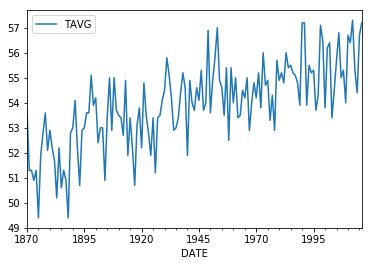

The p-value for the ADF test is  0.583293898787112


In [294]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

# Plot average temperatures
temp_NY.plot()
plt.show()

# Compute and print ADF p-value
result = adfuller(temp_NY['TAVG'])
print("The p-value for the ADF test is ", result[1])

In [344]:
# Getting "Warmed" Up: Look at Autocorrelations
#     
# Since the temperature series, temp_NY, is a random walk with drift, take first differences to make it stationary. 
# Then compute the sample ACF and PACF. This will provide some guidance on the order of the model.
# 
# Instructions
# 
# Import the modules for plotting the sample ACF and PACF
# Take first differences of the DataFrame temp_NY using the pandas method .diff()
# Create two subplots for plotting the ACF and PACF
# Plot the sample ACF of the differenced series
# Plot the sample PACF of the differenced series

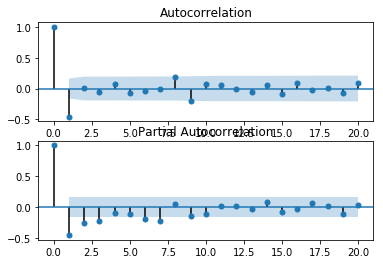

In [295]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2,1)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

In [345]:
# Which ARMA Model is Best?
# 
# Recall from Chapter 3 that the Akaike Information Criterion (AIC) can be used to compare models with 
# different numbers of parameters. It measures goodness-of-fit, but places a penalty on models with more parameters 
# to discourage overfitting. Lower AIC scores are better.
# 
# Fit the temperature data to an AR(1), AR(2), and ARMA(1,1) and see which model is the best fit, using the AIC criterion.
# The AR(2) and ARMA(1,1) models have one more parameter than the AR(1) has.
# 
# The annual change in temperature is in a DataFrame chg_temp.
# 
# Instructions
# 
# For each ARMA model, create an instance of the ARMA class, passing the data and the order=(p,q). p is 
# the autoregressive order; q is the moving average order.
# Fit the model using the method .fit().
# Print the AIC value, found in the .aic element of the results.

In [296]:
TAVG_data = [-2.5, 0.0, -0.3999999999999986, 0.3999999999999986, -1.8999999999999986, 2.5, 0.8999999999999986, 0.8000000000000043, -1.5, 0.7999999999999972, -0.6999999999999957, -0.5, -1.5, 2.0, -1.6000000000000014, 0.6999999999999957, -0.3999999999999986, -1.5, 3.3999999999999986, 0.20000000000000284, 1.1000000000000014, -1.8999999999999986, -1.5, 2.1999999999999957, 0.10000000000000142, 0.6000000000000014, 0.0, 1.5, -1.2000000000000028, 0.30000000000000426, -1.8000000000000043, 0.6000000000000014, 0.0, -2.1000000000000014, 2.5, 1.6000000000000014, -2.1000000000000014, 2.1000000000000014, -1.2999999999999972, -0.20000000000000284, -0.10000000000000142, -0.6999999999999957, 2.1999999999999957, -3.0, 1.5, -1.1999999999999957, -1.5, 2.3999999999999986, 0.6999999999999957, -1.5999999999999943, 2.5999999999999943, -1.2999999999999972, -0.7000000000000028, -0.8999999999999986, 1.5, -2.1999999999999957, 2.1999999999999957, 0.10000000000000142, 0.6000000000000014, 0.3999999999999986, 1.2999999999999972, -0.6999999999999957, -0.8999999999999986, -1.3000000000000043, 0.10000000000000142, 0.3999999999999986, 1.0, 0.8000000000000043, -0.6000000000000014, -2.700000000000003, 3.0, -0.8999999999999986, -0.29999999999999716, 0.8999999999999986, -0.5, 1.1999999999999957, -1.5999999999999943, 0.29999999999999716, 2.8999999999999986, -3.299999999999997, 1.2999999999999972, 0.8999999999999986, 1.2000000000000028, -2.1000000000000014, -0.29999999999999716, -1.1000000000000014, 1.8999999999999986, -2.8999999999999986, 2.8999999999999986, -1.3999999999999986, 1.0, -1.6000000000000014, 0.10000000000000142, 1.0, -0.29999999999999716, 0.7999999999999972, -2.1000000000000014, 1.1000000000000014, 0.7999999999999972, -0.5999999999999943, 1.0, -1.4000000000000057, 2.200000000000003, -1.2999999999999972, 0.19999999999999574, -1.6000000000000014, 1.0, -1.3999999999999986, 2.8000000000000043, -0.8000000000000043, 0.30000000000000426, -0.4000000000000057, 1.2000000000000028, -0.6000000000000014, 0.10000000000000142, -0.29999999999999716, -0.10000000000000142, -0.30000000000000426, -0.8999999999999986, 3.3000000000000043, 0.0, -3.3000000000000043, 1.6000000000000014, -0.29999999999999716, 0.09999999999999432, -1.5999999999999943, 0.5999999999999943, 2.8000000000000043, -0.6000000000000014, -2.700000000000003, 2.4000000000000057, 0.19999999999999574, -3.0, 1.1000000000000014, 1.2000000000000028, 1.0999999999999943, -1.7999999999999972, 0.29999999999999716, -1.2999999999999972, 2.700000000000003, -0.30000000000000426, 0.8999999999999986, -2.0, -0.8999999999999986, 2.3000000000000043, 0.5]
Date_data = ['1871-01-01 00:00:00', '1872-01-01 00:00:00', '1873-01-01 00:00:00', '1874-01-01 00:00:00', '1875-01-01 00:00:00', '1876-01-01 00:00:00', '1877-01-01 00:00:00', '1878-01-01 00:00:00', '1879-01-01 00:00:00', '1880-01-01 00:00:00', '1881-01-01 00:00:00', '1882-01-01 00:00:00', '1883-01-01 00:00:00', '1884-01-01 00:00:00', '1885-01-01 00:00:00', '1886-01-01 00:00:00', '1887-01-01 00:00:00', '1888-01-01 00:00:00', '1889-01-01 00:00:00', '1890-01-01 00:00:00', '1891-01-01 00:00:00', '1892-01-01 00:00:00', '1893-01-01 00:00:00', '1894-01-01 00:00:00', '1895-01-01 00:00:00', '1896-01-01 00:00:00', '1897-01-01 00:00:00', '1898-01-01 00:00:00', '1899-01-01 00:00:00', '1900-01-01 00:00:00', '1901-01-01 00:00:00', '1902-01-01 00:00:00', '1903-01-01 00:00:00', '1904-01-01 00:00:00', '1905-01-01 00:00:00', '1906-01-01 00:00:00', '1907-01-01 00:00:00', '1908-01-01 00:00:00', '1909-01-01 00:00:00', '1910-01-01 00:00:00', '1911-01-01 00:00:00', '1912-01-01 00:00:00', '1913-01-01 00:00:00', '1914-01-01 00:00:00', '1915-01-01 00:00:00', '1916-01-01 00:00:00', '1917-01-01 00:00:00', '1918-01-01 00:00:00', '1919-01-01 00:00:00', '1920-01-01 00:00:00', '1921-01-01 00:00:00', '1922-01-01 00:00:00', '1923-01-01 00:00:00', '1924-01-01 00:00:00', '1925-01-01 00:00:00', '1926-01-01 00:00:00', '1927-01-01 00:00:00', '1928-01-01 00:00:00', '1929-01-01 00:00:00', '1930-01-01 00:00:00', '1931-01-01 00:00:00', '1932-01-01 00:00:00', '1933-01-01 00:00:00', '1934-01-01 00:00:00', '1935-01-01 00:00:00', '1936-01-01 00:00:00', '1937-01-01 00:00:00', '1938-01-01 00:00:00', '1939-01-01 00:00:00', '1940-01-01 00:00:00', '1941-01-01 00:00:00', '1942-01-01 00:00:00', '1943-01-01 00:00:00', '1944-01-01 00:00:00', '1945-01-01 00:00:00', '1946-01-01 00:00:00', '1947-01-01 00:00:00', '1948-01-01 00:00:00', '1949-01-01 00:00:00', '1950-01-01 00:00:00', '1951-01-01 00:00:00', '1952-01-01 00:00:00', '1953-01-01 00:00:00', '1954-01-01 00:00:00', '1955-01-01 00:00:00', '1956-01-01 00:00:00', '1957-01-01 00:00:00', '1958-01-01 00:00:00', '1959-01-01 00:00:00', '1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00', '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00', '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00', '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00', '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00', '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00', '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00', '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00', '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00', '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00', '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00', '1993-01-01 00:00:00', '1994-01-01 00:00:00', '1995-01-01 00:00:00', '1996-01-01 00:00:00', '1997-01-01 00:00:00', '1998-01-01 00:00:00', '1999-01-01 00:00:00', '2000-01-01 00:00:00', '2001-01-01 00:00:00', '2002-01-01 00:00:00', '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2005-01-01 00:00:00', '2006-01-01 00:00:00', '2007-01-01 00:00:00', '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2010-01-01 00:00:00', '2011-01-01 00:00:00', '2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00', '2015-01-01 00:00:00', '2016-01-01 00:00:00']

In [297]:
chg_temp = pd.DataFrame(list(zip(Date_data, TAVG_data)), columns =['DATE','TAVG']) 
chg_temp.DATE = pd.to_datetime(chg_temp.DATE)
chg_temp.set_index('DATE',inplace=True)

In [301]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA 

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print("The AIC for an AR(1) is: ", res_ar1.aic)

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(2, 0))
res_ar2 = mod_ar2.fit()
print("The AIC for an AR(2) is: ", res_ar2.aic)

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(0,1))
res_arma11 = mod_arma11.fit()
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)

C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


The AIC for an AR(1) is:  510.53468983139106
The AIC for an AR(2) is:  501.9274123160227
The AIC for an ARMA(1,1) is:  469.39096901341685


In [346]:
# Don't Throw Out That Winter Coat Yet
# 
# Finally, you will forecast the temperature over the next 30 years using an ARMA(1,1) model, 
# including confidence bands around that estimate. Keep in mind that the estimate of the drift will 
# have a much bigger impact on long range forecasts than the ARMA parameters.
# 
# Earlier, you determined that the temperature data follows a random walk and you looked at first differencing the data. 
# In this exercise, you will use the ARIMA module on the temperature data (before differencing), 
# which is identical to using the ARMA module on changes in temperature, 
# followed by taking cumulative sums of these changes to get the temperature forecast.
# 
# The data is preloaded in a DataFrame called temp_NY.
# 
# Instructions
# 
# Create an instance of the ARIMA class called mod for an integrated ARMA(1,1) model
# The d in order(p,d,q) is one, since we first differenced once
# Fit mod using the .fit() method and call the results res
# Forecast the series using the plot_predict() method on res
# Choose the start date as 1872-01-01 and the end date as 2046-01-01

C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
C:\Users\PAVILION 2\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


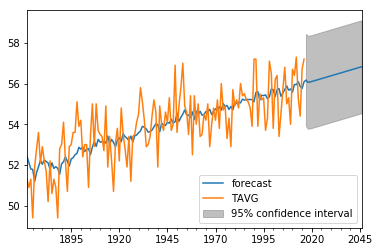

In [303]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1,1,1))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start='1872-01-01', end='2046-01-01')
plt.show()

# END OF THIS EXCELLENTE COURSE